In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

# -*- coding: utf-8 -*-

In [2]:
"""Notebook demonstrating transfer learning capability of the
the Deep Q-learning agent trained and evaluated on the chain
 environment of various sizes.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

'Notebook demonstrating transfer learning capability of the\nthe Deep Q-learning agent trained and evaluated on the chain\n environment of various sizes.\n\nNOTE: You can run this `.py`-notebook directly from VSCode.\nYou can also generate a traditional Jupyter Notebook\nusing the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n'

In [3]:
import os
import sys
import logging
import gymnasium as gym
import torch

import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import importlib
import cyberbattle._env.cyberbattle_env as cyberbattle_env
import cyberbattle._env.cyberbattle_chain as cyberbattle_chain

importlib.reload(learner)
importlib.reload(cyberbattle_env)
importlib.reload(cyberbattle_chain)

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

%matplotlib inline

In [4]:
torch.cuda.is_available()

False

In [5]:
# To run once
# import plotly.io as pio
# pio.orca.config.use_xvfb = True
# pio.orca.config.save()

In [6]:
cyberbattlechain_4 = gym.make("CyberBattleChain-v0", size=4, attacker_goal=cyberbattle_env.AttackerGoal(own_atleast_percent=1.0))
cyberbattlechain_10 = gym.make("CyberBattleChain-v0", size=10, attacker_goal=cyberbattle_env.AttackerGoal(own_atleast_percent=1.0))
cyberbattlechain_20 = gym.make("CyberBattleChain-v0", size=20, attacker_goal=cyberbattle_env.AttackerGoal(own_atleast_percent=1.0))

ep = w.EnvironmentBounds.of_identifiers(maximum_total_credentials=22, maximum_node_count=22, identifiers=cyberbattlechain_10.identifiers)

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/envs/registration.py:481: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes']
  logger.warn(
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.identifiers to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.identifiers` for environment variables or `env.get_wrapper_attr('identifiers')` that will search the reminding wrappers.
  logger.warn(


In [7]:
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 10
plots_dir = "output/images"

In [8]:
# Parameters
plots_dir = "notebooks/output/benchmark/plots"


In [9]:
os.makedirs(plots_dir, exist_ok=True)

###### DQL
Learning with: episode_count=50,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/50 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:140: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'tuple'>
  logger.warn(f"{pre} was expecting a numpy array, actual type: {type(obs)}")
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'numpy.int32'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.sample_valid_action to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sample_valid_action` for environment variables or `env.get_wrapper_attr('sample_valid_action')` that will search the reminding wrappers.
  logger.warn(
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:140: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'tuple'>
  logger.warn(f"{pre} was expecting a numpy array, actual type: {type(obs)}")
/home/wblum/minicond

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

/home/wblum/CyberBattleSim/cyberbattle/agents/baseline/agent_dql.py:408: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  state_batch = torch.tensor(states_to_consider).to(device)
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.
  logger.warn(
Episode 1|Iteration 11|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  130.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  136.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  136.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  144.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  144.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  146.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  146.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  152.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  152.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 91|reward:  152.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 152|reward:  152.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 210|reward:  152.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 254|reward:  152.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 276|reward:  252.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 276|reward:  252.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 1|Iteration 304|reward:  263.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 1|Iteration 304|reward:  263.0|last_reward_at:  304|Elapsed Time: 0:00:00||

Episode 1|Iteration 312|reward:  272.0|last_reward_at:  304|Elapsed Time: 0:00:00||

Episode 1|Iteration 312|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 1|Iteration 313|reward:  276.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 1|Iteration 313|reward:  276.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 1|Iteration 330|reward:  278.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 1|Iteration 330|reward:  278.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 1|Iteration 387|reward:  278.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 1|Iteration 447|reward:  278.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 1|Iteration 453|reward:  378.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 1|Iteration 453|reward:  378.0|last_reward_at:  453|Elapsed Time: 0:00:00||

Episode 1|Iteration 478|reward:  389.0|last_reward_at:  453|Elapsed Time: 0:00:00||

Episode 1|Iteration 478|reward:  389.0|last_reward_at:  478|Elapsed Time: 0:00:00||

Episode 1|Iteration 489|reward:  389.0|last_reward_at:  478|Elapsed Time: 0:00:01||

Episode 1|Iteration 495|reward:  389.0|last_reward_at:  478|Elapsed Time: 0:00:01||

Episode 1|Iteration 499|reward:  398.0|last_reward_at:  478|Elapsed Time: 0:00:01||

Episode 1|Iteration 499|reward:  398.0|last_reward_at:  499|Elapsed Time: 0:00:01||

Episode 1|Iteration 504|reward:  398.0|last_reward_at:  499|Elapsed Time: 0:00:01||

Episode 1|Iteration 509|reward:  398.0|last_reward_at:  499|Elapsed Time: 0:00:01||

Episode 1|Iteration 515|reward:  398.0|last_reward_at:  499|Elapsed Time: 0:00:01||

Episode 1|Iteration 521|reward:  398.0|last_reward_at:  499|Elapsed Time: 0:00:01||

Episode 1|Iteration 524|reward:  406.0|last_reward_at:  499|Elapsed Time: 0:00:01||

Episode 1|Iteration 524|reward:  406.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 1|Iteration 530|reward:  406.0|last_reward_at:  524|Elapsed Time: 0:00:01||

Episode 1|Iteration 536|reward:  406.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 1|Iteration 542|reward:  406.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 1|Iteration 548|reward:  406.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 1|Iteration 553|reward:  406.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 1|Iteration 559|reward:  406.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 1|Iteration 564|reward:  406.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 1|Iteration 570|reward:  406.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 1|Iteration 575|reward:  406.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 1|Iteration 580|reward:  506.0|last_reward_at:  524|Elapsed Time: 0:00:02||

Episode 1|Iteration 580|reward:  506.0|last_reward_at:  580|Elapsed Time: 0:00:02||

Episode 1|Iteration 586|reward:  506.0|last_reward_at:  580|Elapsed Time: 0:00:02||

Episode 1|Iteration 591|reward:  506.0|last_reward_at:  580|Elapsed Time: 0:00:03||

Episode 1|Iteration 597|reward:  506.0|last_reward_at:  580|Elapsed Time: 0:00:03||

Episode 1|Iteration 603|reward:  506.0|last_reward_at:  580|Elapsed Time: 0:00:03||

Episode 1|Iteration 606|reward:  520.0|last_reward_at:  580|Elapsed Time: 0:00:03||

Episode 1|Iteration 606|reward:  520.0|last_reward_at:  606|Elapsed Time: 0:00:03||

Episode 1|Iteration 612|reward:  520.0|last_reward_at:  606|Elapsed Time: 0:00:03||

Episode 1|Iteration 613|reward:  620.0|last_reward_at:  606|Elapsed Time: 0:00:03||

Episode 1|Iteration 613|reward:  620.0|last_reward_at:  613|Elapsed Time: 0:00:03||

Episode 1|Iteration 616|reward:  626.0|last_reward_at:  613|Elapsed Time: 0:00:03||

Episode 1|Iteration 616|reward:  626.0|last_reward_at:  616|Elapsed Time: 0:00:03||

Episode 1|Iteration 618|reward:  628.0|last_reward_at:  616|Elapsed Time: 0:00:03||

Episode 1|Iteration 618|reward:  628.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 1|Iteration 624|reward:  630.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 1|Iteration 624|reward:  630.0|last_reward_at:  624|Elapsed Time: 0:00:03||

Episode 1|Iteration 625|reward:  641.0|last_reward_at:  624|Elapsed Time: 0:00:03||

Episode 1|Iteration 625|reward:  641.0|last_reward_at:  625|Elapsed Time: 0:00:03||

Episode 1|Iteration 629|reward:  641.0|last_reward_at:  625|Elapsed Time: 0:00:04||

Episode 1|Iteration 635|reward:  641.0|last_reward_at:  625|Elapsed Time: 0:00:04||

Episode 1|Iteration 636|reward:  647.0|last_reward_at:  625|Elapsed Time: 0:00:04||

Episode 1|Iteration 636|reward:  647.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 1|Iteration 642|reward:  647.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 1|Iteration 645|reward:  647.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 1|Iteration 650|reward:  647.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 1|Iteration 652|reward:  647.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 1|Iteration 658|reward:  647.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 1|Iteration 664|reward:  647.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 1|Iteration 667|reward:  656.0|last_reward_at:  636|Elapsed Time: 0:00:04||

Episode 1|Iteration 667|reward:  656.0|last_reward_at:  667|Elapsed Time: 0:00:04||

Episode 1|Iteration 672|reward:  656.0|last_reward_at:  667|Elapsed Time: 0:00:05||

Episode 1|Iteration 677|reward:  656.0|last_reward_at:  667|Elapsed Time: 0:00:05||

Episode 1|Iteration 683|reward:  656.0|last_reward_at:  667|Elapsed Time: 0:00:05||

Episode 1|Iteration 688|reward:  656.0|last_reward_at:  667|Elapsed Time: 0:00:05||

Episode 1|Iteration 693|reward:  664.0|last_reward_at:  667|Elapsed Time: 0:00:05||

Episode 1|Iteration 693|reward:  664.0|last_reward_at:  693|Elapsed Time: 0:00:05||

Episode 1|Iteration 694|reward:  664.0|last_reward_at:  693|Elapsed Time: 0:00:05||

Episode 1|Iteration 699|reward:  664.0|last_reward_at:  693|Elapsed Time: 0:00:05||

Episode 1|Iteration 702|reward:  764.0|last_reward_at:  693|Elapsed Time: 0:00:05||

Episode 1|Iteration 702|reward:  764.0|last_reward_at:  702|Elapsed Time: 0:00:05||

Episode 1|Iteration 703|reward:  764.0|last_reward_at:  702|Elapsed Time: 0:00:05||

Episode 1|Iteration 707|reward:  764.0|last_reward_at:  702|Elapsed Time: 0:00:06||

Episode 1|Iteration 713|reward:  764.0|last_reward_at:  702|Elapsed Time: 0:00:06||

Episode 1|Iteration 717|reward:  778.0|last_reward_at:  702|Elapsed Time: 0:00:06||

Episode 1|Iteration 717|reward:  778.0|last_reward_at:  717|Elapsed Time: 0:00:06||

Episode 1|Iteration 720|reward:  878.0|last_reward_at:  717|Elapsed Time: 0:00:06||

Episode 1|Iteration 720|reward:  878.0|last_reward_at:  720|Elapsed Time: 0:00:06||

Episode 1|Iteration 724|reward:  878.0|last_reward_at:  720|Elapsed Time: 0:00:06||

Episode 1|Iteration 729|reward:  878.0|last_reward_at:  720|Elapsed Time: 0:00:06||

Episode 1|Iteration 733|reward:  878.0|last_reward_at:  720|Elapsed Time: 0:00:06||

Episode 1|Iteration 735|reward:  878.0|last_reward_at:  720|Elapsed Time: 0:00:07||

Episode 1|Iteration 740|reward:  878.0|last_reward_at:  720|Elapsed Time: 0:00:07||

Episode 1|Iteration 743|reward:  878.0|last_reward_at:  720|Elapsed Time: 0:00:07||

Episode 1|Iteration 745|reward:  880.0|last_reward_at:  720|Elapsed Time: 0:00:07||

Episode 1|Iteration 745|reward:  880.0|last_reward_at:  745|Elapsed Time: 0:00:07||

Episode 1|Iteration 746|reward:  880.0|last_reward_at:  745|Elapsed Time: 0:00:07||

Episode 1|Iteration 749|reward:  880.0|last_reward_at:  745|Elapsed Time: 0:00:07||

Episode 1|Iteration 752|reward:  882.0|last_reward_at:  745|Elapsed Time: 0:00:07||

Episode 1|Iteration 752|reward:  882.0|last_reward_at:  752|Elapsed Time: 0:00:07||

Episode 1|Iteration 753|reward:  882.0|last_reward_at:  752|Elapsed Time: 0:00:07||

Episode 1|Iteration 758|reward:  882.0|last_reward_at:  752|Elapsed Time: 0:00:07||

Episode 1|Iteration 763|reward:  882.0|last_reward_at:  752|Elapsed Time: 0:00:08||

Episode 1|Iteration 768|reward:  882.0|last_reward_at:  752|Elapsed Time: 0:00:08||

Episode 1|Iteration 771|reward:  888.0|last_reward_at:  752|Elapsed Time: 0:00:08||

Episode 1|Iteration 771|reward:  888.0|last_reward_at:  771|Elapsed Time: 0:00:08||

Episode 1|Iteration 776|reward:  888.0|last_reward_at:  771|Elapsed Time: 0:00:08||

Episode 1|Iteration 778|reward:  899.0|last_reward_at:  771|Elapsed Time: 0:00:08||

Episode 1|Iteration 778|reward:  899.0|last_reward_at:  778|Elapsed Time: 0:00:08||

Episode 1|Iteration 783|reward:  899.0|last_reward_at:  778|Elapsed Time: 0:00:08||

Episode 1|Iteration 784|reward:  905.0|last_reward_at:  778|Elapsed Time: 0:00:08||

Episode 1|Iteration 784|reward:  905.0|last_reward_at:  784|Elapsed Time: 0:00:08||

Episode 1|Iteration 789|reward:  905.0|last_reward_at:  784|Elapsed Time: 0:00:08||

Episode 1|Iteration 794|reward:  905.0|last_reward_at:  784|Elapsed Time: 0:00:09||

Episode 1|Iteration 798|reward:  905.0|last_reward_at:  784|Elapsed Time: 0:00:09||

Episode 1|Iteration 802|reward:  905.0|last_reward_at:  784|Elapsed Time: 0:00:09||

Episode 1|Iteration 806|reward:  905.0|last_reward_at:  784|Elapsed Time: 0:00:09||

Episode 1|Iteration 811|reward:  905.0|last_reward_at:  784|Elapsed Time: 0:00:09||

Episode 1|Iteration 814|reward:  913.0|last_reward_at:  784|Elapsed Time: 0:00:09||

Episode 1|Iteration 814|reward:  913.0|last_reward_at:  814|Elapsed Time: 0:00:09||

Episode 1|Iteration 818|reward:  922.0|last_reward_at:  814|Elapsed Time: 0:00:09||

Episode 1|Iteration 818|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:09||

Episode 1|Iteration 823|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:09||

Episode 1|Iteration 828|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:09||

Episode 1|Iteration 833|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:09||

Episode 1|Iteration 838|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:10||

Episode 1|Iteration 843|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:10||

Episode 1|Iteration 848|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:10||

Episode 1|Iteration 854|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:10||

Episode 1|Iteration 858|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:10||

Episode 1|Iteration 863|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:10||

Episode 1|Iteration 868|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:10||

Episode 1|Iteration 873|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:10||

Episode 1|Iteration 879|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:10||

Episode 1|Iteration 884|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:11||

Episode 1|Iteration 890|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:11||

Episode 1|Iteration 895|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:11||

Episode 1|Iteration 900|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:11||

Episode 1|Iteration 905|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:11||

Episode 1|Iteration 910|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:11||

Episode 1|Iteration 915|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:11||

Episode 1|Iteration 920|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:11||

Episode 1|Iteration 926|reward:  922.0|last_reward_at:  818|Elapsed Time: 0:00:11||

Episode 1|Iteration 930|reward:  928.0|last_reward_at:  818|Elapsed Time: 0:00:12||

Episode 1|Iteration 930|reward:  928.0|last_reward_at:  930|Elapsed Time: 0:00:12||

Episode 1|Iteration 935|reward:  928.0|last_reward_at:  930|Elapsed Time: 0:00:12||

Episode 1|Iteration 937|reward: 1028.0|last_reward_at:  930|Elapsed Time: 0:00:12||

Episode 1|Iteration 937|reward: 1028.0|last_reward_at:  937|Elapsed Time: 0:00:12||

Episode 1|Iteration 939|reward: 1042.0|last_reward_at:  937|Elapsed Time: 0:00:12||

Episode 1|Iteration 939|reward: 1042.0|last_reward_at:  939|Elapsed Time: 0:00:12||

Episode 1|Iteration 942|reward: 1142.0|last_reward_at:  939|Elapsed Time: 0:00:12||

Episode 1|Iteration 942|reward: 1142.0|last_reward_at:  942|Elapsed Time: 0:00:12||

Episode 1|Iteration 947|reward: 1142.0|last_reward_at:  942|Elapsed Time: 0:00:12||

Episode 1|Iteration 951|reward: 1142.0|last_reward_at:  942|Elapsed Time: 0:00:12||

Episode 1|Iteration 954|reward: 1156.0|last_reward_at:  942|Elapsed Time: 0:00:12||

Episode 1|Iteration 954|reward: 1156.0|last_reward_at:  954|Elapsed Time: 0:00:12||

Episode 1|Iteration 958|reward: 1156.0|last_reward_at:  954|Elapsed Time: 0:00:12||

Episode 1|Iteration 963|reward: 1156.0|last_reward_at:  954|Elapsed Time: 0:00:12||

Episode 1|Iteration 967|reward: 1156.0|last_reward_at:  954|Elapsed Time: 0:00:12||

Episode 1|Iteration 971|reward: 1156.0|last_reward_at:  954|Elapsed Time: 0:00:13||

Episode 1|Iteration 973|reward: 1256.0|last_reward_at:  954|Elapsed Time: 0:00:13||

Episode 1|Iteration 973|reward: 1256.0|last_reward_at:  973|Elapsed Time: 0:00:13||

Episode 1|Iteration 975|reward: 1270.0|last_reward_at:  973|Elapsed Time: 0:00:13||

Episode 1|Iteration 975|reward: 1270.0|last_reward_at:  975|Elapsed Time: 0:00:13||

Episode 1|Iteration 976|reward: 6270.0|last_reward_at:  975|Elapsed Time: 0:00:13||

Episode 1|Iteration 976|reward: 6270.0|last_reward_at:  976|Elapsed Time: 0:00:13||

  Episode 1 ended at t=976 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 12/197 (0.06)
    explore-remote: 14/284 (0.05)
    explore-connect: 3/314 (0.01)
    exploit-local: 6/38 (0.14)
    exploit-remote: 2/85 (0.02)
    exploit-connect: 8/13 (0.38)
  exploit deflected to exploration: 23
  ## Episode: 2/50 'DQL' ϵ=0.7583, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  120.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  120.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  120.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  120.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  120.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  134.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  134.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  234.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  234.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  245.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  245.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 45|reward:  251.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 2|Iteration 45|reward:  251.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 2|Iteration 46|reward:  260.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 2|Iteration 46|reward:  260.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 2|Iteration 47|reward:  360.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 2|Iteration 47|reward:  360.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 2|Iteration 48|reward:  374.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 2|Iteration 48|reward:  374.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 2|Iteration 50|reward:  376.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 2|Iteration 50|reward:  376.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 2|Iteration 53|reward:  476.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 2|Iteration 53|reward:  476.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 2|Iteration 57|reward:  482.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 2|Iteration 57|reward:  482.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 2|Iteration 58|reward:  496.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 2|Iteration 58|reward:  496.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 2|Iteration 59|reward:  596.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 2|Iteration 59|reward:  596.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 2|Iteration 60|reward:  610.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 2|Iteration 60|reward:  610.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 2|Iteration 66|reward:  610.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 2|Iteration 69|reward:  616.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 2|Iteration 69|reward:  616.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 2|Iteration 74|reward:  618.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 2|Iteration 74|reward:  618.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 2|Iteration 77|reward:  624.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 2|Iteration 77|reward:  624.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 2|Iteration 79|reward:  632.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 2|Iteration 79|reward:  632.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 2|Iteration 84|reward:  638.0|last_reward_at:   79|Elapsed Time: 0:00:02||

Episode 2|Iteration 84|reward:  638.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 2|Iteration 87|reward:  738.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 2|Iteration 87|reward:  738.0|last_reward_at:   87|Elapsed Time: 0:00:02||

Episode 2|Iteration 88|reward:  752.0|last_reward_at:   87|Elapsed Time: 0:00:02||

Episode 2|Iteration 88|reward:  752.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 2|Iteration 89|reward:  758.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 2|Iteration 89|reward:  758.0|last_reward_at:   89|Elapsed Time: 0:00:02||

Episode 2|Iteration 91|reward:  760.0|last_reward_at:   89|Elapsed Time: 0:00:02||

Episode 2|Iteration 91|reward:  760.0|last_reward_at:   91|Elapsed Time: 0:00:02||

Episode 2|Iteration 95|reward:  860.0|last_reward_at:   91|Elapsed Time: 0:00:02||

Episode 2|Iteration 95|reward:  860.0|last_reward_at:   95|Elapsed Time: 0:00:02||

Episode 2|Iteration 96|reward:  874.0|last_reward_at:   95|Elapsed Time: 0:00:02||

Episode 2|Iteration 96|reward:  874.0|last_reward_at:   96|Elapsed Time: 0:00:02||

Episode 2|Iteration 99|reward:  974.0|last_reward_at:   96|Elapsed Time: 0:00:02||

Episode 2|Iteration 99|reward:  974.0|last_reward_at:   99|Elapsed Time: 0:00:02||

Episode 2|Iteration 101|reward:  980.0|last_reward_at:   99|Elapsed Time: 0:00:02||

Episode 2|Iteration 101|reward:  980.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 2|Iteration 102|reward:  986.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 2|Iteration 102|reward:  986.0|last_reward_at:  102|Elapsed Time: 0:00:02||

Episode 2|Iteration 105|reward: 1000.0|last_reward_at:  102|Elapsed Time: 0:00:02||

Episode 2|Iteration 105|reward: 1000.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 2|Iteration 106|reward: 1100.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 2|Iteration 106|reward: 1100.0|last_reward_at:  106|Elapsed Time: 0:00:02||

Episode 2|Iteration 109|reward: 1114.0|last_reward_at:  106|Elapsed Time: 0:00:02||

Episode 2|Iteration 109|reward: 1114.0|last_reward_at:  109|Elapsed Time: 0:00:02||

Episode 2|Iteration 110|reward: 1122.0|last_reward_at:  109|Elapsed Time: 0:00:02||

Episode 2|Iteration 110|reward: 1122.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 2|Iteration 114|reward: 1122.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 2|Iteration 114|reward: 1222.0|last_reward_at:  110|Elapsed Time: 0:00:02||

Episode 2|Iteration 114|reward: 1222.0|last_reward_at:  114|Elapsed Time: 0:00:02||

Episode 2|Iteration 115|reward: 1236.0|last_reward_at:  114|Elapsed Time: 0:00:02||

Episode 2|Iteration 115|reward: 1236.0|last_reward_at:  115|Elapsed Time: 0:00:02||

Episode 2|Iteration 116|reward: 6236.0|last_reward_at:  115|Elapsed Time: 0:00:02||

Episode 2|Iteration 116|reward: 6236.0|last_reward_at:  116|Elapsed Time: 0:00:02||

  Episode 2 ended at t=116 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/16 (0.20)
    explore-remote: 11/20 (0.35)
    explore-connect: 0/35 (0.00)
    exploit-local: 10/4 (0.71)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 2
  ## Episode: 3/50 'DQL' ϵ=0.7432, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  132.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  132.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  138.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  138.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  146.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  146.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  246.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  246.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  257.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  257.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  266.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  266.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  268.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  268.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  368.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  368.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  382.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  382.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  482.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward:  482.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  482.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  496.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  496.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  502.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  502.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  602.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 3|Iteration 49|reward:  602.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 3|Iteration 53|reward:  616.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 3|Iteration 53|reward:  616.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 3|Iteration 55|reward:  716.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 3|Iteration 55|reward:  716.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 3|Iteration 58|reward:  730.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 3|Iteration 58|reward:  730.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 3|Iteration 59|reward:  734.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 3|Iteration 59|reward:  734.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 3|Iteration 61|reward:  834.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 3|Iteration 61|reward:  834.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 3|Iteration 64|reward:  836.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 3|Iteration 64|reward:  836.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 3|Iteration 65|reward:  850.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 3|Iteration 65|reward:  850.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 3|Iteration 67|reward:  950.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 3|Iteration 67|reward:  950.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 3|Iteration 70|reward:  964.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 3|Iteration 70|reward:  964.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 3|Iteration 72|reward: 1064.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 3|Iteration 72|reward: 1064.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 3|Iteration 73|reward: 1066.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 3|Iteration 73|reward: 1066.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 3|Iteration 74|reward: 1080.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 3|Iteration 74|reward: 1080.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 3|Iteration 78|reward: 1080.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 3|Iteration 79|reward: 1180.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 3|Iteration 79|reward: 1180.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 3|Iteration 80|reward: 1186.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 3|Iteration 80|reward: 1186.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 3|Iteration 81|reward: 1200.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 3|Iteration 81|reward: 1200.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 3|Iteration 83|reward: 6200.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 3|Iteration 83|reward: 6200.0|last_reward_at:   83|Elapsed Time: 0:00:01||

  Episode 3 ended at t=83 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/14 (0.18)
    explore-remote: 9/15 (0.38)
    explore-connect: 0/21 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 4/50 'DQL' ϵ=0.7326, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  344.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  358.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  358.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  364.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  364.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  366.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  366.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  372.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  372.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  472.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  472.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  486.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  486.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  492.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  492.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  498.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  498.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  598.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  598.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  612.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  612.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  712.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  712.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  718.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  718.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  720.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  720.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  734.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 4|Iteration 43|reward:  734.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 4|Iteration 44|reward:  834.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 4|Iteration 44|reward:  834.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 4|Iteration 45|reward:  848.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 4|Iteration 45|reward:  848.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 4|Iteration 46|reward:  948.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 4|Iteration 46|reward:  948.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 4|Iteration 47|reward:  962.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 4|Iteration 47|reward:  962.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 4|Iteration 48|reward:  968.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 4|Iteration 48|reward:  968.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 4|Iteration 52|reward: 1068.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 4|Iteration 52|reward: 1068.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 4|Iteration 54|reward: 1082.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 4|Iteration 54|reward: 1082.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 4|Iteration 55|reward: 1088.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 4|Iteration 55|reward: 1088.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 4|Iteration 59|reward: 1094.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 4|Iteration 59|reward: 1094.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 4|Iteration 60|reward: 1194.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 4|Iteration 60|reward: 1194.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 4|Iteration 62|reward: 1196.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 4|Iteration 62|reward: 1196.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 4|Iteration 65|reward: 1210.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 4|Iteration 65|reward: 1210.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 4|Iteration 66|reward: 6210.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 4|Iteration 66|reward: 6210.0|last_reward_at:   66|Elapsed Time: 0:00:01||

  Episode 4 ended at t=66 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 11/9 (0.55)
    explore-connect: 0/17 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 5/50 'DQL' ϵ=0.7243, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  120.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  120.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  140.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  140.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  240.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  254.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:  254.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  254.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  258.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  258.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  358.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  358.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  364.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  364.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  378.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  378.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  380.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  380.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  480.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  480.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  494.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  494.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  496.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 5|Iteration 35|reward:  496.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 5|Iteration 37|reward:  502.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 5|Iteration 37|reward:  502.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 5|Iteration 38|reward:  602.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 5|Iteration 38|reward:  602.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 5|Iteration 41|reward:  608.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 5|Iteration 41|reward:  608.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 5|Iteration 44|reward:  608.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 5|Iteration 48|reward:  608.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 5|Iteration 52|reward:  608.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 5|Iteration 56|reward:  608.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 5|Iteration 61|reward:  608.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 5|Iteration 62|reward:  622.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 5|Iteration 62|reward:  622.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 5|Iteration 64|reward:  624.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 5|Iteration 64|reward:  624.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 5|Iteration 66|reward:  724.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 5|Iteration 66|reward:  724.0|last_reward_at:   66|Elapsed Time: 0:00:02||

Episode 5|Iteration 68|reward:  730.0|last_reward_at:   66|Elapsed Time: 0:00:02||

Episode 5|Iteration 68|reward:  730.0|last_reward_at:   68|Elapsed Time: 0:00:02||

Episode 5|Iteration 70|reward:  730.0|last_reward_at:   68|Elapsed Time: 0:00:02||

Episode 5|Iteration 73|reward:  730.0|last_reward_at:   68|Elapsed Time: 0:00:02||

Episode 5|Iteration 74|reward:  736.0|last_reward_at:   68|Elapsed Time: 0:00:02||

Episode 5|Iteration 74|reward:  736.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 5|Iteration 76|reward:  750.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 5|Iteration 76|reward:  750.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 5|Iteration 77|reward:  850.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 5|Iteration 77|reward:  850.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 5|Iteration 80|reward:  850.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 5|Iteration 81|reward:  864.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 5|Iteration 81|reward:  864.0|last_reward_at:   81|Elapsed Time: 0:00:02||

Episode 5|Iteration 82|reward:  870.0|last_reward_at:   81|Elapsed Time: 0:00:02||

Episode 5|Iteration 82|reward:  870.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 5|Iteration 85|reward:  970.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 5|Iteration 85|reward:  970.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 5|Iteration 87|reward:  984.0|last_reward_at:   85|Elapsed Time: 0:00:03||

Episode 5|Iteration 87|reward:  984.0|last_reward_at:   87|Elapsed Time: 0:00:03||

Episode 5|Iteration 89|reward: 1084.0|last_reward_at:   87|Elapsed Time: 0:00:03||

Episode 5|Iteration 89|reward: 1084.0|last_reward_at:   89|Elapsed Time: 0:00:03||

Episode 5|Iteration 91|reward: 1086.0|last_reward_at:   89|Elapsed Time: 0:00:03||

Episode 5|Iteration 91|reward: 1086.0|last_reward_at:   91|Elapsed Time: 0:00:03||

Episode 5|Iteration 92|reward: 1100.0|last_reward_at:   91|Elapsed Time: 0:00:03||

Episode 5|Iteration 92|reward: 1100.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 5|Iteration 93|reward: 1200.0|last_reward_at:   92|Elapsed Time: 0:00:03||

Episode 5|Iteration 93|reward: 1200.0|last_reward_at:   93|Elapsed Time: 0:00:03||

Episode 5|Iteration 94|reward: 1214.0|last_reward_at:   93|Elapsed Time: 0:00:03||

Episode 5|Iteration 94|reward: 1214.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 5|Iteration 97|reward: 6214.0|last_reward_at:   94|Elapsed Time: 0:00:03||

Episode 5|Iteration 97|reward: 6214.0|last_reward_at:   97|Elapsed Time: 0:00:03||

  Episode 5 ended at t=97 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/19 (0.14)
    explore-remote: 12/22 (0.35)
    explore-connect: 0/19 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 6/50 'DQL' ϵ=0.7123, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:   16.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  130.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  130.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  136.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  136.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  136.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 6|Iteration 19|reward:  136.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 6|Iteration 20|reward:  236.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 6|Iteration 20|reward:  236.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 6|Iteration 22|reward:  250.0|last_reward_at:   20|Elapsed Time: 0:00:01||

Episode 6|Iteration 22|reward:  250.0|last_reward_at:   22|Elapsed Time: 0:00:01||

Episode 6|Iteration 23|reward:  252.0|last_reward_at:   22|Elapsed Time: 0:00:01||

Episode 6|Iteration 23|reward:  252.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 6|Iteration 24|reward:  254.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 6|Iteration 24|reward:  254.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 6|Iteration 25|reward:  258.0|last_reward_at:   24|Elapsed Time: 0:00:01||

Episode 6|Iteration 25|reward:  258.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 6|Iteration 28|reward:  264.0|last_reward_at:   25|Elapsed Time: 0:00:01||

Episode 6|Iteration 28|reward:  264.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 6|Iteration 29|reward:  364.0|last_reward_at:   28|Elapsed Time: 0:00:01||

Episode 6|Iteration 29|reward:  364.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 6|Iteration 30|reward:  378.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 6|Iteration 30|reward:  378.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 6|Iteration 32|reward:  478.0|last_reward_at:   30|Elapsed Time: 0:00:01||

Episode 6|Iteration 32|reward:  478.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 6|Iteration 35|reward:  478.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 6|Iteration 39|reward:  478.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 6|Iteration 40|reward:  484.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 6|Iteration 40|reward:  484.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 41|reward:  490.0|last_reward_at:   40|Elapsed Time: 0:00:02||

Episode 6|Iteration 41|reward:  490.0|last_reward_at:   41|Elapsed Time: 0:00:02||

Episode 6|Iteration 43|reward:  490.0|last_reward_at:   41|Elapsed Time: 0:00:02||

Episode 6|Iteration 44|reward:  504.0|last_reward_at:   41|Elapsed Time: 0:00:02||

Episode 6|Iteration 44|reward:  504.0|last_reward_at:   44|Elapsed Time: 0:00:02||

Episode 6|Iteration 47|reward:  604.0|last_reward_at:   44|Elapsed Time: 0:00:02||

Episode 6|Iteration 47|reward:  604.0|last_reward_at:   47|Elapsed Time: 0:00:02||

Episode 6|Iteration 48|reward:  618.0|last_reward_at:   47|Elapsed Time: 0:00:02||

Episode 6|Iteration 48|reward:  618.0|last_reward_at:   48|Elapsed Time: 0:00:02||

Episode 6|Iteration 51|reward:  718.0|last_reward_at:   48|Elapsed Time: 0:00:02||

Episode 6|Iteration 51|reward:  718.0|last_reward_at:   51|Elapsed Time: 0:00:02||

Episode 6|Iteration 52|reward:  732.0|last_reward_at:   51|Elapsed Time: 0:00:02||

Episode 6|Iteration 52|reward:  732.0|last_reward_at:   52|Elapsed Time: 0:00:02||

Episode 6|Iteration 53|reward:  832.0|last_reward_at:   52|Elapsed Time: 0:00:02||

Episode 6|Iteration 53|reward:  832.0|last_reward_at:   53|Elapsed Time: 0:00:02||

Episode 6|Iteration 54|reward:  846.0|last_reward_at:   53|Elapsed Time: 0:00:02||

Episode 6|Iteration 54|reward:  846.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 6|Iteration 56|reward:  852.0|last_reward_at:   54|Elapsed Time: 0:00:02||

Episode 6|Iteration 56|reward:  852.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 6|Iteration 58|reward:  952.0|last_reward_at:   56|Elapsed Time: 0:00:02||

Episode 6|Iteration 58|reward:  952.0|last_reward_at:   58|Elapsed Time: 0:00:02||

Episode 6|Iteration 59|reward:  966.0|last_reward_at:   58|Elapsed Time: 0:00:02||

Episode 6|Iteration 59|reward:  966.0|last_reward_at:   59|Elapsed Time: 0:00:02||

Episode 6|Iteration 63|reward: 1066.0|last_reward_at:   59|Elapsed Time: 0:00:02||

Episode 6|Iteration 63|reward: 1066.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 6|Iteration 64|reward: 1080.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 6|Iteration 64|reward: 1080.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 6|Iteration 69|reward: 1080.0|last_reward_at:   64|Elapsed Time: 0:00:03||

Episode 6|Iteration 70|reward: 1180.0|last_reward_at:   64|Elapsed Time: 0:00:03||

Episode 6|Iteration 70|reward: 1180.0|last_reward_at:   70|Elapsed Time: 0:00:03||

Episode 6|Iteration 71|reward: 1194.0|last_reward_at:   70|Elapsed Time: 0:00:03||

Episode 6|Iteration 71|reward: 1194.0|last_reward_at:   71|Elapsed Time: 0:00:03||

Episode 6|Iteration 72|reward: 6194.0|last_reward_at:   71|Elapsed Time: 0:00:03||

Episode 6|Iteration 72|reward: 6194.0|last_reward_at:   72|Elapsed Time: 0:00:03||

  Episode 6 ended at t=72 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/12 (0.14)
    explore-remote: 8/16 (0.33)
    explore-connect: 0/12 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 1
  ## Episode: 7/50 'DQL' ϵ=0.7035, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  136.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  138.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  138.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:  138.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  140.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  140.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  240.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  240.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  254.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  254.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:  354.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:  354.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward:  368.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward:  368.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward:  468.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward:  468.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  474.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  474.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 27|reward:  488.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 27|reward:  488.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  494.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  494.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 32|reward:  594.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 7|Iteration 32|reward:  594.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 7|Iteration 34|reward:  608.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 7|Iteration 34|reward:  608.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 7|Iteration 36|reward:  708.0|last_reward_at:   34|Elapsed Time: 0:00:01||

Episode 7|Iteration 36|reward:  708.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 7|Iteration 37|reward:  710.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 7|Iteration 37|reward:  710.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 7|Iteration 38|reward:  716.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 7|Iteration 38|reward:  716.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 7|Iteration 41|reward:  722.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 7|Iteration 41|reward:  722.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 7|Iteration 45|reward:  722.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 7|Iteration 46|reward:  728.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 7|Iteration 46|reward:  728.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 7|Iteration 47|reward:  742.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 7|Iteration 47|reward:  742.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 7|Iteration 50|reward:  842.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 7|Iteration 50|reward:  842.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 7|Iteration 51|reward:  856.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 7|Iteration 51|reward:  856.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 7|Iteration 54|reward:  956.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 7|Iteration 54|reward:  956.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 7|Iteration 55|reward:  970.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 7|Iteration 55|reward:  970.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 7|Iteration 57|reward: 1070.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 7|Iteration 57|reward: 1070.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 7|Iteration 58|reward: 1084.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 7|Iteration 58|reward: 1084.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 7|Iteration 60|reward: 1090.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 7|Iteration 60|reward: 1090.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 7|Iteration 63|reward: 1190.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 7|Iteration 63|reward: 1190.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 7|Iteration 64|reward: 1192.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 7|Iteration 64|reward: 1192.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 7|Iteration 65|reward: 1206.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 7|Iteration 65|reward: 1206.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 7|Iteration 66|reward: 6206.0|last_reward_at:   65|Elapsed Time: 0:00:02||

Episode 7|Iteration 66|reward: 6206.0|last_reward_at:   66|Elapsed Time: 0:00:02||

  Episode 7 ended at t=66 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/5 (0.44)
    explore-remote: 8/15 (0.35)
    explore-connect: 0/13 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 8/50 'DQL' ϵ=0.6956, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  250.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  350.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  350.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  352.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  366.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  366.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  372.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  372.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  472.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  472.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  486.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  486.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward:  586.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward:  586.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  592.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  592.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  606.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  606.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:  706.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:  706.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:  720.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:  720.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward:  726.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward:  726.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:  826.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:  826.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward:  840.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward:  840.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 40|reward:  940.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 8|Iteration 40|reward:  940.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 8|Iteration 41|reward:  954.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 8|Iteration 41|reward:  954.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 8|Iteration 45|reward: 1054.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 8|Iteration 45|reward: 1054.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 8|Iteration 46|reward: 1060.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 8|Iteration 46|reward: 1060.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 8|Iteration 48|reward: 1074.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 8|Iteration 48|reward: 1074.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 8|Iteration 50|reward: 1076.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 8|Iteration 50|reward: 1076.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 8|Iteration 53|reward: 1176.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 8|Iteration 53|reward: 1176.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 8|Iteration 54|reward: 1190.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 8|Iteration 54|reward: 1190.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 8|Iteration 58|reward: 1192.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 8|Iteration 58|reward: 1192.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 8|Iteration 59|reward: 6192.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 8|Iteration 59|reward: 6192.0|last_reward_at:   59|Elapsed Time: 0:00:01||

  Episode 8 ended at t=59 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 8/6 (0.57)
    explore-connect: 0/15 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 9/50 'DQL' ϵ=0.6886, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  132.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  240.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  240.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  254.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  254.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  354.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  354.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  368.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  368.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  468.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  468.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  482.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  482.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  488.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  488.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  588.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  588.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  602.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  602.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  602.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:  602.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward:  608.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward:  608.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  708.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  708.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  722.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  722.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  822.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  822.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward:  828.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 9|Iteration 41|reward:  828.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 9|Iteration 44|reward:  830.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 9|Iteration 44|reward:  830.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 9|Iteration 45|reward:  844.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 9|Iteration 45|reward:  844.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 9|Iteration 46|reward:  944.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 9|Iteration 46|reward:  944.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 9|Iteration 48|reward:  946.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 9|Iteration 48|reward:  946.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 9|Iteration 52|reward:  946.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 9|Iteration 54|reward:  948.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 9|Iteration 54|reward:  948.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 9|Iteration 55|reward:  950.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 9|Iteration 55|reward:  950.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 9|Iteration 60|reward:  950.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 9|Iteration 61|reward:  956.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 9|Iteration 61|reward:  956.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 9|Iteration 64|reward:  970.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 9|Iteration 64|reward:  970.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 9|Iteration 65|reward:  974.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 9|Iteration 65|reward:  974.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 9|Iteration 69|reward: 1074.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 9|Iteration 69|reward: 1074.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 9|Iteration 70|reward: 1080.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 9|Iteration 70|reward: 1080.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 9|Iteration 71|reward: 1082.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 9|Iteration 71|reward: 1082.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 9|Iteration 73|reward: 1088.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 9|Iteration 73|reward: 1088.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 9|Iteration 74|reward: 1102.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 9|Iteration 74|reward: 1102.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 9|Iteration 77|reward: 1102.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 9|Iteration 78|reward: 1202.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 9|Iteration 78|reward: 1202.0|last_reward_at:   78|Elapsed Time: 0:00:02||

Episode 9|Iteration 80|reward: 1216.0|last_reward_at:   78|Elapsed Time: 0:00:02||

Episode 9|Iteration 80|reward: 1216.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 9|Iteration 81|reward: 1222.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 9|Iteration 81|reward: 1222.0|last_reward_at:   81|Elapsed Time: 0:00:02||

Episode 9|Iteration 86|reward: 1222.0|last_reward_at:   81|Elapsed Time: 0:00:02||

Episode 9|Iteration 88|reward: 6222.0|last_reward_at:   81|Elapsed Time: 0:00:02||

Episode 9|Iteration 88|reward: 6222.0|last_reward_at:   88|Elapsed Time: 0:00:02||

  Episode 9 ended at t=88 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/14 (0.12)
    explore-remote: 14/11 (0.56)
    explore-connect: 0/25 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 10/50 'DQL' ϵ=0.6784, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  236.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  236.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:  238.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:  238.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:  252.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:  252.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  254.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  254.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  260.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  260.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  360.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  360.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 18|reward:  374.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 18|reward:  374.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:  474.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:  474.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:  485.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:  485.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 25|reward:  491.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 25|reward:  491.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:  500.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:  500.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:  506.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:  506.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 29|reward:  606.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 29|reward:  606.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward:  606.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 10|Iteration 35|reward:  620.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 10|Iteration 35|reward:  620.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 10|Iteration 39|reward:  622.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 10|Iteration 39|reward:  622.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 10|Iteration 41|reward:  722.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 10|Iteration 41|reward:  722.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 10|Iteration 42|reward:  736.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 10|Iteration 42|reward:  736.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 10|Iteration 43|reward:  836.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 10|Iteration 43|reward:  836.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 10|Iteration 44|reward:  838.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 10|Iteration 44|reward:  838.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 10|Iteration 48|reward:  838.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 10|Iteration 51|reward:  838.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 10|Iteration 52|reward:  852.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 10|Iteration 52|reward:  852.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 10|Iteration 56|reward:  952.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 10|Iteration 56|reward:  952.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 10|Iteration 59|reward:  966.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 10|Iteration 59|reward:  966.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 10|Iteration 62|reward:  972.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 10|Iteration 62|reward:  972.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 10|Iteration 64|reward:  978.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 10|Iteration 64|reward:  978.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 10|Iteration 68|reward:  978.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 10|Iteration 71|reward: 1078.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 10|Iteration 71|reward: 1078.0|last_reward_at:   71|Elapsed Time: 0:00:02||

Episode 10|Iteration 74|reward: 1092.0|last_reward_at:   71|Elapsed Time: 0:00:02||

Episode 10|Iteration 74|reward: 1092.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 10|Iteration 75|reward: 1192.0|last_reward_at:   74|Elapsed Time: 0:00:02||

Episode 10|Iteration 75|reward: 1192.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 10|Iteration 79|reward: 1198.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 10|Iteration 79|reward: 1198.0|last_reward_at:   79|Elapsed Time: 0:00:02||

Episode 10|Iteration 82|reward: 1204.0|last_reward_at:   79|Elapsed Time: 0:00:02||

Episode 10|Iteration 82|reward: 1204.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 10|Iteration 83|reward: 1218.0|last_reward_at:   82|Elapsed Time: 0:00:02||

Episode 10|Iteration 83|reward: 1218.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 10|Iteration 85|reward: 1220.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 10|Iteration 85|reward: 1220.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 10|Iteration 86|reward: 6220.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 10|Iteration 86|reward: 6220.0|last_reward_at:   86|Elapsed Time: 0:00:02||

  Episode 10 ended at t=86 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/17 (0.19)
    explore-remote: 9/11 (0.45)
    explore-connect: 2/21 (0.09)
    exploit-local: 11/0 (1.00)
    exploit-remote: 2/0 (1.00)
    exploit-connect: 9/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 11/50 'DQL' ϵ=0.6685, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 3|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 10|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 10|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 11|Iteration 12|reward:  232.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 11|Iteration 12|reward:  232.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 11|Iteration 13|reward:  246.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 11|Iteration 13|reward:  246.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 11|Iteration 15|reward:  250.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 11|Iteration 15|reward:  250.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 11|Iteration 18|reward:  256.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 11|Iteration 18|reward:  256.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 11|Iteration 20|reward:  356.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 11|Iteration 20|reward:  356.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 11|Iteration 21|reward:  370.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 11|Iteration 21|reward:  370.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 11|Iteration 22|reward:  470.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 11|Iteration 22|reward:  470.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 11|Iteration 27|reward:  470.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 11|Iteration 28|reward:  476.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 11|Iteration 28|reward:  476.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 11|Iteration 29|reward:  482.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 11|Iteration 29|reward:  482.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 11|Iteration 31|reward:  496.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 11|Iteration 31|reward:  496.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward:  596.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward:  596.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 33|reward:  610.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 33|reward:  610.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 11|Iteration 34|reward:  710.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 11|Iteration 34|reward:  710.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 11|Iteration 35|reward:  712.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 11|Iteration 35|reward:  712.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward:  726.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 11|Iteration 36|reward:  726.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 38|reward:  826.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 11|Iteration 38|reward:  826.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 11|Iteration 42|reward:  832.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 11|Iteration 42|reward:  832.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 11|Iteration 44|reward:  846.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 11|Iteration 44|reward:  846.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 11|Iteration 46|reward:  946.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 11|Iteration 46|reward:  946.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 11|Iteration 47|reward:  960.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 11|Iteration 47|reward:  960.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 11|Iteration 49|reward:  966.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 11|Iteration 49|reward:  966.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 11|Iteration 50|reward:  968.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 11|Iteration 50|reward:  968.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 11|Iteration 53|reward:  974.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 11|Iteration 53|reward:  974.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 11|Iteration 54|reward: 1074.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 11|Iteration 54|reward: 1074.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 11|Iteration 57|reward: 1080.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 11|Iteration 57|reward: 1080.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 11|Iteration 58|reward: 1094.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 11|Iteration 58|reward: 1094.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 11|Iteration 61|reward: 1194.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 11|Iteration 61|reward: 1194.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 11|Iteration 63|reward: 1196.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 11|Iteration 63|reward: 1196.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 11|Iteration 67|reward: 1196.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 11|Iteration 69|reward: 1210.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 11|Iteration 69|reward: 1210.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 11|Iteration 72|reward: 6210.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 11|Iteration 72|reward: 6210.0|last_reward_at:   72|Elapsed Time: 0:00:01||

  Episode 11 ended at t=72 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 10/9 (0.53)
    explore-connect: 0/19 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 12/50 'DQL' ϵ=0.6604, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 7|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 12|Iteration 8|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 12|Iteration 8|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 12|Iteration 10|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 12|Iteration 10|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 12|Iteration 13|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 12|Iteration 13|reward:  132.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 12|Iteration 15|reward:  138.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 12|Iteration 15|reward:  138.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 12|Iteration 16|reward:  238.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 12|Iteration 16|reward:  238.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 17|reward:  244.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 17|reward:  244.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 12|Iteration 18|reward:  258.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 12|Iteration 18|reward:  258.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 12|Iteration 22|reward:  358.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 12|Iteration 22|reward:  358.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 12|Iteration 23|reward:  372.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 12|Iteration 23|reward:  372.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 12|Iteration 26|reward:  472.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 12|Iteration 26|reward:  472.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 12|Iteration 28|reward:  486.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 12|Iteration 28|reward:  486.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 12|Iteration 29|reward:  586.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 12|Iteration 29|reward:  586.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 12|Iteration 30|reward:  600.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 12|Iteration 30|reward:  600.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 12|Iteration 31|reward:  608.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 12|Iteration 31|reward:  608.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 12|Iteration 32|reward:  610.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 12|Iteration 32|reward:  610.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 12|Iteration 34|reward:  710.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 12|Iteration 34|reward:  710.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 12|Iteration 35|reward:  724.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 12|Iteration 35|reward:  724.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 12|Iteration 38|reward:  726.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 12|Iteration 38|reward:  726.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 12|Iteration 39|reward:  732.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 12|Iteration 39|reward:  732.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 12|Iteration 40|reward:  832.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 12|Iteration 40|reward:  832.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 12|Iteration 41|reward:  834.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 12|Iteration 41|reward:  834.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 12|Iteration 42|reward:  840.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 12|Iteration 42|reward:  840.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 12|Iteration 45|reward:  854.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 12|Iteration 45|reward:  854.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 12|Iteration 46|reward:  954.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 12|Iteration 46|reward:  954.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 12|Iteration 47|reward:  968.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 12|Iteration 47|reward:  968.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 12|Iteration 50|reward:  974.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 12|Iteration 50|reward:  974.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 12|Iteration 51|reward: 1074.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 12|Iteration 51|reward: 1074.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 12|Iteration 53|reward: 1088.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 12|Iteration 53|reward: 1088.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 12|Iteration 54|reward: 1094.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 12|Iteration 54|reward: 1094.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 12|Iteration 55|reward: 1194.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 12|Iteration 55|reward: 1194.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 12|Iteration 56|reward: 1200.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 12|Iteration 56|reward: 1200.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 12|Iteration 57|reward: 1214.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 12|Iteration 57|reward: 1214.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 12|Iteration 59|reward: 6214.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 12|Iteration 59|reward: 6214.0|last_reward_at:   59|Elapsed Time: 0:00:01||

  Episode 12 ended at t=59 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 11/13 (0.46)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 13/50 'DQL' ϵ=0.6538, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 5|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 13|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 13|Iteration 7|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 13|Iteration 7|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 13|Iteration 11|reward:  132.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 13|Iteration 11|reward:  132.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 13|Iteration 12|reward:  140.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 13|Iteration 12|reward:  140.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 13|Iteration 14|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 13|Iteration 14|reward:  240.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 13|Iteration 16|reward:  254.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 13|Iteration 16|reward:  254.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 13|Iteration 18|reward:  260.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 13|Iteration 18|reward:  260.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 19|reward:  266.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 19|reward:  266.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 13|Iteration 22|reward:  366.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 13|Iteration 22|reward:  366.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 13|Iteration 23|reward:  368.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 13|Iteration 23|reward:  368.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 13|Iteration 26|reward:  382.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 13|Iteration 26|reward:  382.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 13|Iteration 28|reward:  482.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 13|Iteration 28|reward:  482.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 13|Iteration 30|reward:  496.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 13|Iteration 30|reward:  496.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 13|Iteration 31|reward:  596.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 13|Iteration 31|reward:  596.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 13|Iteration 32|reward:  610.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 13|Iteration 32|reward:  610.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 13|Iteration 33|reward:  616.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 13|Iteration 33|reward:  616.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 13|Iteration 34|reward:  716.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 13|Iteration 34|reward:  716.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 13|Iteration 35|reward:  730.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 13|Iteration 35|reward:  730.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 13|Iteration 37|reward:  830.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 13|Iteration 37|reward:  830.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 13|Iteration 38|reward:  844.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 13|Iteration 38|reward:  844.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 13|Iteration 39|reward:  944.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 13|Iteration 39|reward:  944.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 13|Iteration 40|reward:  958.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 13|Iteration 40|reward:  958.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 13|Iteration 43|reward: 1058.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 13|Iteration 43|reward: 1058.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 13|Iteration 45|reward: 1060.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 13|Iteration 45|reward: 1060.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 13|Iteration 46|reward: 1062.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 13|Iteration 46|reward: 1062.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 13|Iteration 50|reward: 1068.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 13|Iteration 50|reward: 1068.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 13|Iteration 51|reward: 1082.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 13|Iteration 51|reward: 1082.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 13|Iteration 52|reward: 1182.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 13|Iteration 52|reward: 1182.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 13|Iteration 53|reward: 1188.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 13|Iteration 53|reward: 1188.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 13|Iteration 58|reward: 1190.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 13|Iteration 58|reward: 1190.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 13|Iteration 60|reward: 1196.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 13|Iteration 60|reward: 1196.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 13|Iteration 62|reward: 1210.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 13|Iteration 62|reward: 1210.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 13|Iteration 63|reward: 1216.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 13|Iteration 63|reward: 1216.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 13|Iteration 64|reward: 6216.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 13|Iteration 64|reward: 6216.0|last_reward_at:   64|Elapsed Time: 0:00:01||

  Episode 13 ended at t=64 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/7 (0.36)
    explore-remote: 10/9 (0.53)
    explore-connect: 0/12 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 14/50 'DQL' ϵ=0.6468, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 7|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 7|reward:   16.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 12|reward:   20.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 12|reward:   20.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 14|Iteration 13|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 14|Iteration 13|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 14|Iteration 14|reward:  134.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 14|Iteration 14|reward:  134.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 14|Iteration 15|reward:  234.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 14|Iteration 15|reward:  234.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 14|Iteration 18|reward:  248.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 14|Iteration 18|reward:  248.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 14|Iteration 19|reward:  348.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 14|Iteration 19|reward:  348.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 14|Iteration 21|reward:  362.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 14|Iteration 21|reward:  362.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 14|Iteration 22|reward:  462.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 14|Iteration 22|reward:  462.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 14|Iteration 23|reward:  476.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 14|Iteration 23|reward:  476.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 14|Iteration 24|reward:  576.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 14|Iteration 24|reward:  576.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 14|Iteration 25|reward:  578.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 14|Iteration 25|reward:  578.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:  580.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 14|Iteration 26|reward:  580.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 31|reward:  580.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 32|reward:  586.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 14|Iteration 32|reward:  586.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 14|Iteration 33|reward:  588.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 14|Iteration 33|reward:  588.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 14|Iteration 34|reward:  594.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 14|Iteration 34|reward:  594.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 14|Iteration 35|reward:  600.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 14|Iteration 35|reward:  600.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 14|Iteration 37|reward:  602.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 14|Iteration 37|reward:  602.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 39|reward:  613.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 14|Iteration 39|reward:  613.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 14|Iteration 43|reward:  619.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 14|Iteration 43|reward:  619.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 14|Iteration 48|reward:  625.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 14|Iteration 48|reward:  625.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 14|Iteration 54|reward:  625.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 14|Iteration 57|reward:  631.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 14|Iteration 57|reward:  631.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 14|Iteration 61|reward:  637.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 14|Iteration 61|reward:  637.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 14|Iteration 65|reward:  643.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 14|Iteration 65|reward:  643.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 14|Iteration 71|reward:  643.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 14|Iteration 76|reward:  643.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 14|Iteration 81|reward:  643.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 14|Iteration 87|reward:  643.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 14|Iteration 93|reward:  643.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 14|Iteration 99|reward:  643.0|last_reward_at:   65|Elapsed Time: 0:00:02||

Episode 14|Iteration 103|reward:  651.0|last_reward_at:   65|Elapsed Time: 0:00:02||

Episode 14|Iteration 103|reward:  651.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 14|Iteration 108|reward:  657.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 14|Iteration 108|reward:  657.0|last_reward_at:  108|Elapsed Time: 0:00:02||

Episode 14|Iteration 113|reward:  657.0|last_reward_at:  108|Elapsed Time: 0:00:02||

Episode 14|Iteration 118|reward:  657.0|last_reward_at:  108|Elapsed Time: 0:00:02||

Episode 14|Iteration 121|reward:  666.0|last_reward_at:  108|Elapsed Time: 0:00:02||

Episode 14|Iteration 121|reward:  666.0|last_reward_at:  121|Elapsed Time: 0:00:02||

Episode 14|Iteration 126|reward:  666.0|last_reward_at:  121|Elapsed Time: 0:00:02||

Episode 14|Iteration 129|reward:  766.0|last_reward_at:  121|Elapsed Time: 0:00:02||

Episode 14|Iteration 129|reward:  766.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 14|Iteration 131|reward:  780.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 14|Iteration 131|reward:  780.0|last_reward_at:  131|Elapsed Time: 0:00:02||

Episode 14|Iteration 133|reward:  880.0|last_reward_at:  131|Elapsed Time: 0:00:02||

Episode 14|Iteration 133|reward:  880.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 14|Iteration 135|reward:  894.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 14|Iteration 135|reward:  894.0|last_reward_at:  135|Elapsed Time: 0:00:02||

Episode 14|Iteration 138|reward:  994.0|last_reward_at:  135|Elapsed Time: 0:00:03||

Episode 14|Iteration 138|reward:  994.0|last_reward_at:  138|Elapsed Time: 0:00:03||

Episode 14|Iteration 139|reward: 1008.0|last_reward_at:  138|Elapsed Time: 0:00:03||

Episode 14|Iteration 139|reward: 1008.0|last_reward_at:  139|Elapsed Time: 0:00:03||

Episode 14|Iteration 141|reward: 1108.0|last_reward_at:  139|Elapsed Time: 0:00:03||

Episode 14|Iteration 141|reward: 1108.0|last_reward_at:  141|Elapsed Time: 0:00:03||

Episode 14|Iteration 145|reward: 1122.0|last_reward_at:  141|Elapsed Time: 0:00:03||

Episode 14|Iteration 145|reward: 1122.0|last_reward_at:  145|Elapsed Time: 0:00:03||

Episode 14|Iteration 146|reward: 1222.0|last_reward_at:  145|Elapsed Time: 0:00:03||

Episode 14|Iteration 146|reward: 1222.0|last_reward_at:  146|Elapsed Time: 0:00:03||

Episode 14|Iteration 147|reward: 1236.0|last_reward_at:  146|Elapsed Time: 0:00:03||

Episode 14|Iteration 147|reward: 1236.0|last_reward_at:  147|Elapsed Time: 0:00:03||

Episode 14|Iteration 150|reward: 6236.0|last_reward_at:  147|Elapsed Time: 0:00:03||

Episode 14|Iteration 150|reward: 6236.0|last_reward_at:  150|Elapsed Time: 0:00:03||

  Episode 14 ended at t=150 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/28 (0.12)
    explore-remote: 9/36 (0.20)
    explore-connect: 0/26 (0.00)
    exploit-local: 12/5 (0.71)
    exploit-remote: 3/16 (0.16)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 15/50 'DQL' ϵ=0.6306, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 15|Iteration 9|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 15|Iteration 9|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 10|reward:  128.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 10|reward:  128.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 15|Iteration 11|reward:  228.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 15|Iteration 11|reward:  228.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 15|Iteration 12|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 15|Iteration 12|reward:  242.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 15|Iteration 13|reward:  342.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 15|Iteration 13|reward:  342.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 15|Iteration 16|reward:  344.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 15|Iteration 16|reward:  344.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 15|Iteration 17|reward:  350.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 15|Iteration 17|reward:  350.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 15|Iteration 19|reward:  356.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 15|Iteration 19|reward:  356.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 15|Iteration 23|reward:  370.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 15|Iteration 23|reward:  370.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 15|Iteration 24|reward:  372.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 15|Iteration 24|reward:  372.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 15|Iteration 25|reward:  472.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 15|Iteration 25|reward:  472.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 15|Iteration 27|reward:  486.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 15|Iteration 27|reward:  486.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 15|Iteration 28|reward:  586.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 15|Iteration 28|reward:  586.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 15|Iteration 29|reward:  586.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 15|Iteration 30|reward:  600.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 15|Iteration 30|reward:  600.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 15|Iteration 31|reward:  700.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 15|Iteration 31|reward:  700.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 15|Iteration 32|reward:  714.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 15|Iteration 32|reward:  714.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 15|Iteration 33|reward:  716.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 15|Iteration 33|reward:  716.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 15|Iteration 34|reward:  816.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 15|Iteration 34|reward:  816.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 15|Iteration 35|reward:  830.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 15|Iteration 35|reward:  830.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 15|Iteration 40|reward:  930.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 15|Iteration 40|reward:  930.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 15|Iteration 41|reward:  944.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 15|Iteration 41|reward:  944.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 15|Iteration 42|reward:  950.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 15|Iteration 42|reward:  950.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 15|Iteration 43|reward: 1050.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 15|Iteration 43|reward: 1050.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 15|Iteration 45|reward: 1064.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 15|Iteration 45|reward: 1064.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 15|Iteration 46|reward: 1070.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 15|Iteration 46|reward: 1070.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 15|Iteration 47|reward: 1170.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 15|Iteration 47|reward: 1170.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 15|Iteration 48|reward: 1184.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 15|Iteration 48|reward: 1184.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 15|Iteration 49|reward: 1190.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 15|Iteration 49|reward: 1190.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 15|Iteration 52|reward: 6190.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 15|Iteration 52|reward: 6190.0|last_reward_at:   52|Elapsed Time: 0:00:01||

  Episode 15 ended at t=52 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/3 (0.50)
    explore-remote: 7/6 (0.54)
    explore-connect: 0/13 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 16/50 'DQL' ϵ=0.6251, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 6|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 16|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 16|Iteration 7|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 16|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 16|Iteration 9|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 16|Iteration 9|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 16|Iteration 10|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 16|Iteration 10|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 13|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 13|reward:  248.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 16|Iteration 14|reward:  254.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 16|Iteration 14|reward:  254.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 16|Iteration 16|reward:  254.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 16|Iteration 18|reward:  260.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 16|Iteration 18|reward:  260.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 16|Iteration 21|reward:  360.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 16|Iteration 21|reward:  360.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 16|Iteration 22|reward:  374.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 16|Iteration 22|reward:  374.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 16|Iteration 25|reward:  474.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 16|Iteration 25|reward:  474.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 16|Iteration 29|reward:  480.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 16|Iteration 29|reward:  480.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 16|Iteration 33|reward:  494.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 16|Iteration 33|reward:  494.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 16|Iteration 34|reward:  594.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 16|Iteration 34|reward:  594.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 16|Iteration 37|reward:  600.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 16|Iteration 37|reward:  600.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 16|Iteration 39|reward:  602.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 16|Iteration 39|reward:  602.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 16|Iteration 44|reward:  602.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 16|Iteration 46|reward:  616.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 16|Iteration 46|reward:  616.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 16|Iteration 47|reward:  618.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 16|Iteration 47|reward:  618.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 16|Iteration 49|reward:  718.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 16|Iteration 49|reward:  718.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 16|Iteration 51|reward:  732.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 16|Iteration 51|reward:  732.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 16|Iteration 53|reward:  738.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 16|Iteration 53|reward:  738.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 16|Iteration 54|reward:  838.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 16|Iteration 54|reward:  838.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 16|Iteration 55|reward:  852.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 16|Iteration 55|reward:  852.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 16|Iteration 57|reward:  952.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 16|Iteration 57|reward:  952.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 16|Iteration 59|reward:  954.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 16|Iteration 59|reward:  954.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 16|Iteration 64|reward:  954.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 16|Iteration 67|reward:  968.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 16|Iteration 67|reward:  968.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 16|Iteration 68|reward: 1068.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 16|Iteration 68|reward: 1068.0|last_reward_at:   68|Elapsed Time: 0:00:01||

Episode 16|Iteration 69|reward: 1082.0|last_reward_at:   68|Elapsed Time: 0:00:01||

Episode 16|Iteration 69|reward: 1082.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 16|Iteration 70|reward: 1182.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 16|Iteration 70|reward: 1182.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 16|Iteration 72|reward: 1196.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 16|Iteration 72|reward: 1196.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 16|Iteration 77|reward: 6196.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 16|Iteration 77|reward: 6196.0|last_reward_at:   77|Elapsed Time: 0:00:01||

  Episode 16 ended at t=77 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/13 (0.19)
    explore-remote: 7/10 (0.41)
    explore-connect: 0/23 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 17/50 'DQL' ϵ=0.6171, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 8|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  132.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 12|reward:  140.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 12|reward:  140.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 14|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 17|Iteration 14|reward:  240.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 17|Iteration 15|reward:  251.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 17|Iteration 15|reward:  251.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 18|reward:  260.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 17|Iteration 18|reward:  260.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:  360.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 17|Iteration 19|reward:  360.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 21|reward:  374.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 17|Iteration 21|reward:  374.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 17|Iteration 22|reward:  376.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 17|Iteration 22|reward:  376.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 17|Iteration 24|reward:  476.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 17|Iteration 24|reward:  476.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 17|Iteration 25|reward:  490.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 17|Iteration 25|reward:  490.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 17|Iteration 27|reward:  494.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 17|Iteration 27|reward:  494.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 17|Iteration 29|reward:  594.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 17|Iteration 29|reward:  594.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 17|Iteration 32|reward:  596.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 17|Iteration 32|reward:  596.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 17|Iteration 34|reward:  610.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 17|Iteration 34|reward:  610.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 17|Iteration 35|reward:  710.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 17|Iteration 35|reward:  710.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 17|Iteration 37|reward:  724.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 17|Iteration 37|reward:  724.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 17|Iteration 38|reward:  730.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 17|Iteration 38|reward:  730.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 17|Iteration 41|reward:  830.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 17|Iteration 41|reward:  830.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 17|Iteration 42|reward:  844.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 17|Iteration 42|reward:  844.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 17|Iteration 43|reward:  944.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 17|Iteration 43|reward:  944.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 17|Iteration 44|reward:  958.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 17|Iteration 44|reward:  958.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 17|Iteration 48|reward:  964.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 17|Iteration 48|reward:  964.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 17|Iteration 49|reward: 1064.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 17|Iteration 49|reward: 1064.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 17|Iteration 52|reward: 1078.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 17|Iteration 52|reward: 1078.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 17|Iteration 54|reward: 1080.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 17|Iteration 54|reward: 1080.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 17|Iteration 57|reward: 1180.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 17|Iteration 57|reward: 1180.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 17|Iteration 59|reward: 1194.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 17|Iteration 59|reward: 1194.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 17|Iteration 60|reward: 1200.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 17|Iteration 60|reward: 1200.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 17|Iteration 62|reward: 6200.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 17|Iteration 62|reward: 6200.0|last_reward_at:   62|Elapsed Time: 0:00:01||

  Episode 17 ended at t=62 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/7 (0.22)
    explore-remote: 8/7 (0.53)
    explore-connect: 0/16 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 18/50 'DQL' ϵ=0.6107, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:  127.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 5|reward:  133.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 5|reward:  133.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 18|Iteration 7|reward:  135.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 18|Iteration 7|reward:  135.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 18|Iteration 12|reward:  135.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 18|Iteration 18|reward:  135.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 18|Iteration 22|reward:  135.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 18|Iteration 23|reward:  144.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 18|Iteration 23|reward:  144.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 18|Iteration 28|reward:  144.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 18|Iteration 31|reward:  152.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 18|Iteration 31|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 18|Iteration 36|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 18|Iteration 42|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 18|Iteration 47|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 18|Iteration 53|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 18|Iteration 57|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 18|Iteration 62|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 18|Iteration 67|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 18|Iteration 69|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 18|Iteration 74|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 18|Iteration 79|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 18|Iteration 84|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 18|Iteration 90|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 18|Iteration 96|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 18|Iteration 101|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 18|Iteration 107|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 18|Iteration 112|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 18|Iteration 117|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 18|Iteration 122|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 18|Iteration 126|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 18|Iteration 131|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 18|Iteration 136|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 18|Iteration 140|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 18|Iteration 144|reward:  152.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 18|Iteration 148|reward:  252.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 18|Iteration 148|reward:  252.0|last_reward_at:  148|Elapsed Time: 0:00:03||

Episode 18|Iteration 149|reward:  266.0|last_reward_at:  148|Elapsed Time: 0:00:03||

Episode 18|Iteration 149|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 18|Iteration 150|reward:  270.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 18|Iteration 150|reward:  270.0|last_reward_at:  150|Elapsed Time: 0:00:03||

Episode 18|Iteration 152|reward:  370.0|last_reward_at:  150|Elapsed Time: 0:00:03||

Episode 18|Iteration 152|reward:  370.0|last_reward_at:  152|Elapsed Time: 0:00:03||

Episode 18|Iteration 153|reward:  384.0|last_reward_at:  152|Elapsed Time: 0:00:03||

Episode 18|Iteration 153|reward:  384.0|last_reward_at:  153|Elapsed Time: 0:00:03||

Episode 18|Iteration 154|reward:  484.0|last_reward_at:  153|Elapsed Time: 0:00:03||

Episode 18|Iteration 154|reward:  484.0|last_reward_at:  154|Elapsed Time: 0:00:03||

Episode 18|Iteration 158|reward:  484.0|last_reward_at:  154|Elapsed Time: 0:00:03||

Episode 18|Iteration 161|reward:  498.0|last_reward_at:  154|Elapsed Time: 0:00:03||

Episode 18|Iteration 161|reward:  498.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 18|Iteration 162|reward:  598.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 18|Iteration 162|reward:  598.0|last_reward_at:  162|Elapsed Time: 0:00:03||

Episode 18|Iteration 163|reward:  612.0|last_reward_at:  162|Elapsed Time: 0:00:03||

Episode 18|Iteration 163|reward:  612.0|last_reward_at:  163|Elapsed Time: 0:00:03||

Episode 18|Iteration 164|reward:  712.0|last_reward_at:  163|Elapsed Time: 0:00:03||

Episode 18|Iteration 164|reward:  712.0|last_reward_at:  164|Elapsed Time: 0:00:03||

Episode 18|Iteration 166|reward:  714.0|last_reward_at:  164|Elapsed Time: 0:00:03||

Episode 18|Iteration 166|reward:  714.0|last_reward_at:  166|Elapsed Time: 0:00:03||

Episode 18|Iteration 170|reward:  728.0|last_reward_at:  166|Elapsed Time: 0:00:04||

Episode 18|Iteration 170|reward:  728.0|last_reward_at:  170|Elapsed Time: 0:00:04||

Episode 18|Iteration 171|reward:  828.0|last_reward_at:  170|Elapsed Time: 0:00:04||

Episode 18|Iteration 171|reward:  828.0|last_reward_at:  171|Elapsed Time: 0:00:04||

Episode 18|Iteration 173|reward:  830.0|last_reward_at:  171|Elapsed Time: 0:00:04||

Episode 18|Iteration 173|reward:  830.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 18|Iteration 174|reward:  844.0|last_reward_at:  173|Elapsed Time: 0:00:04||

Episode 18|Iteration 174|reward:  844.0|last_reward_at:  174|Elapsed Time: 0:00:04||

Episode 18|Iteration 175|reward:  944.0|last_reward_at:  174|Elapsed Time: 0:00:04||

Episode 18|Iteration 175|reward:  944.0|last_reward_at:  175|Elapsed Time: 0:00:04||

Episode 18|Iteration 176|reward:  958.0|last_reward_at:  175|Elapsed Time: 0:00:04||

Episode 18|Iteration 176|reward:  958.0|last_reward_at:  176|Elapsed Time: 0:00:04||

Episode 18|Iteration 179|reward: 1058.0|last_reward_at:  176|Elapsed Time: 0:00:04||

Episode 18|Iteration 179|reward: 1058.0|last_reward_at:  179|Elapsed Time: 0:00:04||

Episode 18|Iteration 180|reward: 1072.0|last_reward_at:  179|Elapsed Time: 0:00:04||

Episode 18|Iteration 180|reward: 1072.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 18|Iteration 181|reward: 1078.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 18|Iteration 181|reward: 1078.0|last_reward_at:  181|Elapsed Time: 0:00:04||

Episode 18|Iteration 183|reward: 1178.0|last_reward_at:  181|Elapsed Time: 0:00:04||

Episode 18|Iteration 183|reward: 1178.0|last_reward_at:  183|Elapsed Time: 0:00:04||

Episode 18|Iteration 185|reward: 1180.0|last_reward_at:  183|Elapsed Time: 0:00:04||

Episode 18|Iteration 185|reward: 1180.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 18|Iteration 186|reward: 1194.0|last_reward_at:  185|Elapsed Time: 0:00:04||

Episode 18|Iteration 186|reward: 1194.0|last_reward_at:  186|Elapsed Time: 0:00:04||

Episode 18|Iteration 189|reward: 6194.0|last_reward_at:  186|Elapsed Time: 0:00:04||

Episode 18|Iteration 189|reward: 6194.0|last_reward_at:  189|Elapsed Time: 0:00:04||

  Episode 18 ended at t=189 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/32 (0.09)
    explore-remote: 5/32 (0.14)
    explore-connect: 1/41 (0.02)
    exploit-local: 10/10 (0.50)
    exploit-remote: 3/41 (0.07)
    exploit-connect: 10/1 (0.91)
  exploit deflected to exploration: 0
  ## Episode: 19/50 'DQL' ϵ=0.5918, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  239.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  239.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 7|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 7|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 19|Iteration 8|reward:  250.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 19|Iteration 8|reward:  250.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 19|Iteration 12|reward:  350.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 19|Iteration 12|reward:  350.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 19|Iteration 15|reward:  364.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 19|Iteration 15|reward:  364.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 19|Iteration 16|reward:  464.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 19|Iteration 16|reward:  464.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 19|Iteration 17|reward:  478.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 19|Iteration 17|reward:  478.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 19|Iteration 18|reward:  578.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 19|Iteration 18|reward:  578.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 20|reward:  592.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 20|reward:  592.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 19|Iteration 24|reward:  692.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 19|Iteration 24|reward:  692.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 19|Iteration 25|reward:  698.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 19|Iteration 25|reward:  698.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 19|Iteration 28|reward:  712.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 19|Iteration 28|reward:  712.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 19|Iteration 30|reward:  812.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 19|Iteration 30|reward:  812.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 19|Iteration 31|reward:  826.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 19|Iteration 31|reward:  826.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 19|Iteration 32|reward:  926.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 19|Iteration 32|reward:  926.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 19|Iteration 33|reward:  940.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 19|Iteration 33|reward:  940.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 19|Iteration 34|reward:  946.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 19|Iteration 34|reward:  946.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 19|Iteration 36|reward: 1046.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 19|Iteration 36|reward: 1046.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 19|Iteration 38|reward: 1060.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 19|Iteration 38|reward: 1060.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 19|Iteration 40|reward: 1160.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 19|Iteration 40|reward: 1160.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 19|Iteration 43|reward: 1166.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 19|Iteration 43|reward: 1166.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 19|Iteration 45|reward: 1168.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 19|Iteration 45|reward: 1168.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 19|Iteration 46|reward: 1174.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 19|Iteration 46|reward: 1174.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 19|Iteration 51|reward: 1174.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 19|Iteration 53|reward: 1180.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 19|Iteration 53|reward: 1180.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 19|Iteration 54|reward: 1182.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 19|Iteration 54|reward: 1182.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 19|Iteration 55|reward: 1188.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 19|Iteration 55|reward: 1188.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 19|Iteration 57|reward: 1190.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 19|Iteration 57|reward: 1190.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 19|Iteration 58|reward: 1204.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 19|Iteration 58|reward: 1204.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 19|Iteration 59|reward: 6204.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 19|Iteration 59|reward: 6204.0|last_reward_at:   59|Elapsed Time: 0:00:01||

  Episode 19 ended at t=59 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 9/7 (0.56)
    explore-connect: 0/11 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 20/50 'DQL' ϵ=0.5860, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 9|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 10|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 10|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 20|Iteration 11|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 20|Iteration 11|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 20|Iteration 12|reward:  344.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 20|Iteration 12|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 20|Iteration 14|reward:  346.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 20|Iteration 14|reward:  346.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 20|Iteration 15|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 20|Iteration 15|reward:  352.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 20|Iteration 18|reward:  358.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 20|Iteration 18|reward:  358.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 20|Iteration 20|reward:  372.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 20|Iteration 20|reward:  372.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 20|Iteration 21|reward:  472.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 20|Iteration 21|reward:  472.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 20|Iteration 27|reward:  486.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 20|Iteration 27|reward:  486.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 20|Iteration 28|reward:  586.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 20|Iteration 28|reward:  586.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 20|Iteration 29|reward:  600.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 20|Iteration 29|reward:  600.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 20|Iteration 30|reward:  700.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 20|Iteration 30|reward:  700.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 20|Iteration 32|reward:  714.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 20|Iteration 32|reward:  714.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 20|Iteration 33|reward:  814.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 20|Iteration 33|reward:  814.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 20|Iteration 34|reward:  820.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 20|Iteration 34|reward:  820.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 20|Iteration 35|reward:  834.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 20|Iteration 35|reward:  834.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 20|Iteration 36|reward:  934.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 20|Iteration 36|reward:  934.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 20|Iteration 37|reward:  948.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 20|Iteration 37|reward:  948.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 39|reward:  954.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 39|reward:  954.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 20|Iteration 40|reward: 1054.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 20|Iteration 40|reward: 1054.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 20|Iteration 42|reward: 1056.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 20|Iteration 42|reward: 1056.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 20|Iteration 45|reward: 1070.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 20|Iteration 45|reward: 1070.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 20|Iteration 46|reward: 1170.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 20|Iteration 46|reward: 1170.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 20|Iteration 48|reward: 1184.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 20|Iteration 48|reward: 1184.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 20|Iteration 49|reward: 6184.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 20|Iteration 49|reward: 6184.0|last_reward_at:   49|Elapsed Time: 0:00:01||

  Episode 20 ended at t=49 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 6/7 (0.46)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 21/50 'DQL' ϵ=0.5813, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 21|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 21|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 21|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 21|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 21|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 21|Iteration 7|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 21|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 21|Iteration 9|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 21|Iteration 9|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 21|Iteration 10|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 21|Iteration 10|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 21|Iteration 11|reward:  348.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 21|Iteration 11|reward:  348.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 21|Iteration 13|reward:  359.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 21|Iteration 13|reward:  359.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 21|Iteration 16|reward:  361.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 21|Iteration 16|reward:  361.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 21|Iteration 19|reward:  363.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 21|Iteration 19|reward:  363.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 21|Iteration 20|reward:  369.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 21|Iteration 20|reward:  369.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 21|Iteration 23|reward:  378.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 21|Iteration 23|reward:  378.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 21|Iteration 24|reward:  386.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 21|Iteration 24|reward:  386.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 21|Iteration 25|reward:  486.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 21|Iteration 25|reward:  486.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 21|Iteration 26|reward:  500.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 21|Iteration 26|reward:  500.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 21|Iteration 28|reward:  600.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 21|Iteration 28|reward:  600.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 21|Iteration 29|reward:  614.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 21|Iteration 29|reward:  614.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 21|Iteration 30|reward:  616.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 21|Iteration 30|reward:  616.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 21|Iteration 33|reward:  716.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 21|Iteration 33|reward:  716.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 21|Iteration 37|reward:  730.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 21|Iteration 37|reward:  730.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 21|Iteration 41|reward:  830.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 21|Iteration 41|reward:  830.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 21|Iteration 42|reward:  844.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 21|Iteration 42|reward:  844.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 21|Iteration 43|reward:  944.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 21|Iteration 43|reward:  944.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 21|Iteration 44|reward:  958.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 21|Iteration 44|reward:  958.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 21|Iteration 45|reward: 1058.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 21|Iteration 45|reward: 1058.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 21|Iteration 47|reward: 1072.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 21|Iteration 47|reward: 1072.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 21|Iteration 49|reward: 1172.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 21|Iteration 49|reward: 1172.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 21|Iteration 52|reward: 1186.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 21|Iteration 52|reward: 1186.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 21|Iteration 54|reward: 6186.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 21|Iteration 54|reward: 6186.0|last_reward_at:   54|Elapsed Time: 0:00:01||

  Episode 21 ended at t=54 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 4/9 (0.31)
    explore-connect: 0/10 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 22/50 'DQL' ϵ=0.5761, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 22|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 22|Iteration 3|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 22|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 22|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 22|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 22|Iteration 7|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 22|Iteration 7|reward:  132.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 22|Iteration 8|reward:  232.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 22|Iteration 8|reward:  232.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 22|Iteration 9|reward:  246.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 22|Iteration 9|reward:  246.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 22|Iteration 10|reward:  346.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 22|Iteration 10|reward:  346.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 22|Iteration 12|reward:  348.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 22|Iteration 12|reward:  348.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 22|Iteration 13|reward:  362.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 22|Iteration 13|reward:  362.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 22|Iteration 14|reward:  462.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 22|Iteration 14|reward:  462.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 22|Iteration 15|reward:  476.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 22|Iteration 15|reward:  476.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 22|Iteration 17|reward:  482.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 22|Iteration 17|reward:  482.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 22|Iteration 19|reward:  582.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 22|Iteration 19|reward:  582.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 22|Iteration 21|reward:  596.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 22|Iteration 21|reward:  596.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 22|Iteration 22|reward:  696.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 22|Iteration 22|reward:  696.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 22|Iteration 23|reward:  710.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 22|Iteration 23|reward:  710.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 22|Iteration 25|reward:  810.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 22|Iteration 25|reward:  810.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 22|Iteration 26|reward:  824.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 22|Iteration 26|reward:  824.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 22|Iteration 27|reward:  826.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 22|Iteration 27|reward:  826.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 22|Iteration 28|reward:  828.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 22|Iteration 28|reward:  828.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 22|Iteration 29|reward:  928.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 22|Iteration 29|reward:  928.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 22|Iteration 30|reward:  930.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 22|Iteration 30|reward:  930.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 22|Iteration 31|reward:  944.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 22|Iteration 31|reward:  944.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 22|Iteration 33|reward:  946.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 22|Iteration 33|reward:  946.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 22|Iteration 35|reward: 1046.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 22|Iteration 35|reward: 1046.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 22|Iteration 36|reward: 1052.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 22|Iteration 36|reward: 1052.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 22|Iteration 38|reward: 1066.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 22|Iteration 38|reward: 1066.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 22|Iteration 39|reward: 1166.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 22|Iteration 39|reward: 1166.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 22|Iteration 40|reward: 1168.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 22|Iteration 40|reward: 1168.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 22|Iteration 42|reward: 1182.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 22|Iteration 42|reward: 1182.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 22|Iteration 44|reward: 6182.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 22|Iteration 44|reward: 6182.0|last_reward_at:   44|Elapsed Time: 0:00:01||

  Episode 22 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 8/1 (0.89)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 23/50 'DQL' ϵ=0.5719, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 23|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 23|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 23|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 23|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 23|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 23|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 23|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 23|Iteration 6|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 23|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 23|Iteration 8|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 23|Iteration 8|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 23|Iteration 11|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 23|Iteration 11|reward:  348.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 23|Iteration 12|reward:  350.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 23|Iteration 12|reward:  350.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 23|Iteration 13|reward:  364.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 23|Iteration 13|reward:  364.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 23|Iteration 15|reward:  372.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 23|Iteration 15|reward:  372.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 23|Iteration 19|reward:  472.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 23|Iteration 19|reward:  472.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 23|Iteration 20|reward:  486.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 23|Iteration 20|reward:  486.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 23|Iteration 22|reward:  586.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 23|Iteration 22|reward:  586.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 23|Iteration 23|reward:  600.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 23|Iteration 23|reward:  600.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 23|Iteration 25|reward:  700.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 23|Iteration 25|reward:  700.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 23|Iteration 26|reward:  714.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 23|Iteration 26|reward:  714.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 23|Iteration 27|reward:  814.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 23|Iteration 27|reward:  814.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 23|Iteration 28|reward:  828.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 23|Iteration 28|reward:  828.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 23|Iteration 29|reward:  928.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 23|Iteration 29|reward:  928.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 23|Iteration 32|reward:  934.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 23|Iteration 32|reward:  934.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 23|Iteration 34|reward:  948.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 23|Iteration 34|reward:  948.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 23|Iteration 35|reward: 1048.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 23|Iteration 35|reward: 1048.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 23|Iteration 36|reward: 1062.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 23|Iteration 36|reward: 1062.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 23|Iteration 38|reward: 1162.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 23|Iteration 38|reward: 1162.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 23|Iteration 39|reward: 1176.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 23|Iteration 39|reward: 1176.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 23|Iteration 40|reward: 6176.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 23|Iteration 40|reward: 6176.0|last_reward_at:   40|Elapsed Time: 0:00:00||

  Episode 23 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 4/3 (0.57)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 24/50 'DQL' ϵ=0.5682, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 24|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 24|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 24|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 24|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 24|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 24|Iteration 7|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 24|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 24|Iteration 8|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 24|Iteration 8|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 24|Iteration 9|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 24|Iteration 9|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 24|Iteration 11|reward:  250.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 24|Iteration 11|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 24|Iteration 13|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 24|Iteration 13|reward:  252.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 24|Iteration 14|reward:  352.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 24|Iteration 14|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 24|Iteration 16|reward:  366.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 24|Iteration 16|reward:  366.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 24|Iteration 18|reward:  466.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 24|Iteration 18|reward:  466.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 24|Iteration 21|reward:  480.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 24|Iteration 21|reward:  480.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 24|Iteration 27|reward:  480.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 24|Iteration 30|reward:  482.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 24|Iteration 30|reward:  482.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 24|Iteration 31|reward:  488.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 24|Iteration 31|reward:  488.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 24|Iteration 33|reward:  588.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 24|Iteration 33|reward:  588.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 24|Iteration 36|reward:  602.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 24|Iteration 36|reward:  602.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 24|Iteration 38|reward:  702.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 24|Iteration 38|reward:  702.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 24|Iteration 40|reward:  716.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 24|Iteration 40|reward:  716.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 24|Iteration 41|reward:  816.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 24|Iteration 41|reward:  816.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 24|Iteration 44|reward:  822.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 24|Iteration 44|reward:  822.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 24|Iteration 46|reward:  828.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 24|Iteration 46|reward:  828.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 24|Iteration 47|reward:  842.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 24|Iteration 47|reward:  842.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 24|Iteration 48|reward:  844.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 24|Iteration 48|reward:  844.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 24|Iteration 51|reward:  944.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 24|Iteration 51|reward:  944.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 24|Iteration 53|reward:  958.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 24|Iteration 53|reward:  958.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 24|Iteration 55|reward: 1058.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 24|Iteration 55|reward: 1058.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 24|Iteration 58|reward: 1072.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 24|Iteration 58|reward: 1072.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 24|Iteration 59|reward: 1172.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 24|Iteration 59|reward: 1172.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 24|Iteration 60|reward: 1178.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 24|Iteration 60|reward: 1178.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 24|Iteration 63|reward: 1192.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 24|Iteration 63|reward: 1192.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 24|Iteration 65|reward: 6192.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 24|Iteration 65|reward: 6192.0|last_reward_at:   65|Elapsed Time: 0:00:01||

  Episode 24 ended at t=65 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 7/10 (0.41)
    explore-connect: 1/17 (0.06)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/2 (0.83)
  exploit deflected to exploration: 0
  ## Episode: 25/50 'DQL' ϵ=0.5621, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 25|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 25|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 25|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 25|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 25|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 25|Iteration 8|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 25|Iteration 8|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 25|Iteration 9|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 25|Iteration 9|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 25|Iteration 11|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 25|Iteration 11|reward:  248.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 25|Iteration 12|reward:  348.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 25|Iteration 12|reward:  348.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 25|Iteration 13|reward:  350.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 25|Iteration 13|reward:  350.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 25|Iteration 15|reward:  364.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 25|Iteration 15|reward:  364.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 25|Iteration 16|reward:  464.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 25|Iteration 16|reward:  464.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 25|Iteration 17|reward:  478.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 25|Iteration 17|reward:  478.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 25|Iteration 18|reward:  484.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 25|Iteration 18|reward:  484.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 25|Iteration 19|reward:  490.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 25|Iteration 19|reward:  490.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 25|Iteration 24|reward:  494.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 25|Iteration 24|reward:  494.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 25|Iteration 25|reward:  594.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 25|Iteration 25|reward:  594.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 25|Iteration 26|reward:  608.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 25|Iteration 26|reward:  608.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 25|Iteration 27|reward:  708.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 25|Iteration 27|reward:  708.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 25|Iteration 30|reward:  714.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 25|Iteration 30|reward:  714.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 25|Iteration 31|reward:  728.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 25|Iteration 31|reward:  728.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 25|Iteration 32|reward:  828.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 25|Iteration 32|reward:  828.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 25|Iteration 35|reward:  830.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 25|Iteration 35|reward:  830.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 25|Iteration 38|reward:  844.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 25|Iteration 38|reward:  844.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 25|Iteration 39|reward:  944.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 25|Iteration 39|reward:  944.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 25|Iteration 42|reward:  958.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 25|Iteration 42|reward:  958.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 25|Iteration 43|reward: 1058.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 25|Iteration 43|reward: 1058.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 25|Iteration 45|reward: 1072.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 25|Iteration 45|reward: 1072.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 25|Iteration 46|reward: 1078.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 25|Iteration 46|reward: 1078.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 25|Iteration 47|reward: 1178.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 25|Iteration 47|reward: 1178.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 25|Iteration 50|reward: 1192.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 25|Iteration 50|reward: 1192.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 25|Iteration 52|reward: 6192.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 25|Iteration 52|reward: 6192.0|last_reward_at:   52|Elapsed Time: 0:00:01||

  Episode 25 ended at t=52 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 6/6 (0.50)
    explore-connect: 0/10 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 26/50 'DQL' ϵ=0.5573, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 26|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 26|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 26|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 26|Iteration 6|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 26|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 26|Iteration 7|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 26|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 26|Iteration 10|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 26|Iteration 10|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 26|Iteration 11|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 26|Iteration 11|reward:  248.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 26|Iteration 12|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 26|Iteration 12|reward:  250.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 26|Iteration 13|reward:  350.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 26|Iteration 13|reward:  350.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 26|Iteration 14|reward:  364.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 26|Iteration 14|reward:  364.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 26|Iteration 16|reward:  464.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 26|Iteration 16|reward:  464.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 26|Iteration 17|reward:  470.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 26|Iteration 17|reward:  470.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 26|Iteration 18|reward:  484.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 26|Iteration 18|reward:  484.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 26|Iteration 19|reward:  584.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 26|Iteration 19|reward:  584.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 26|Iteration 21|reward:  598.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 26|Iteration 21|reward:  598.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 26|Iteration 24|reward:  698.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 26|Iteration 24|reward:  698.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 26|Iteration 27|reward:  700.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 26|Iteration 27|reward:  700.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 26|Iteration 28|reward:  714.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 26|Iteration 28|reward:  714.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 26|Iteration 32|reward:  714.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 26|Iteration 33|reward:  720.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 26|Iteration 33|reward:  720.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 26|Iteration 34|reward:  722.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 26|Iteration 34|reward:  722.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 26|Iteration 36|reward:  728.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 26|Iteration 36|reward:  728.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 26|Iteration 37|reward:  828.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 26|Iteration 37|reward:  828.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 26|Iteration 38|reward:  830.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 26|Iteration 38|reward:  830.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 26|Iteration 40|reward:  844.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 26|Iteration 40|reward:  844.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 26|Iteration 41|reward:  846.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 26|Iteration 41|reward:  846.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 26|Iteration 42|reward:  946.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 26|Iteration 42|reward:  946.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 26|Iteration 43|reward:  960.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 26|Iteration 43|reward:  960.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 26|Iteration 44|reward: 1060.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 26|Iteration 44|reward: 1060.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 26|Iteration 47|reward: 1074.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 26|Iteration 47|reward: 1074.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 26|Iteration 49|reward: 1080.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 26|Iteration 49|reward: 1080.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 26|Iteration 50|reward: 1180.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 26|Iteration 50|reward: 1180.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 26|Iteration 51|reward: 1186.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 26|Iteration 51|reward: 1186.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 26|Iteration 52|reward: 1200.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 26|Iteration 52|reward: 1200.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 26|Iteration 55|reward: 1206.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 26|Iteration 55|reward: 1206.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 26|Iteration 56|reward: 1212.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 26|Iteration 56|reward: 1212.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 26|Iteration 57|reward: 6212.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 26|Iteration 57|reward: 6212.0|last_reward_at:   57|Elapsed Time: 0:00:01||

  Episode 26 ended at t=57 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 11/9 (0.55)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 27/50 'DQL' ϵ=0.5521, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 27|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 27|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 27|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 27|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 27|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 27|Iteration 6|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 27|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 27|Iteration 8|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 27|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 27|Iteration 10|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 27|Iteration 10|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 27|Iteration 11|reward:  342.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 27|Iteration 11|reward:  342.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 27|Iteration 12|reward:  356.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 27|Iteration 12|reward:  356.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 27|Iteration 13|reward:  362.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 27|Iteration 13|reward:  362.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 27|Iteration 14|reward:  462.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 27|Iteration 14|reward:  462.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 27|Iteration 15|reward:  476.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 27|Iteration 15|reward:  476.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 27|Iteration 17|reward:  576.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 27|Iteration 17|reward:  576.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 27|Iteration 20|reward:  590.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 27|Iteration 20|reward:  590.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 27|Iteration 21|reward:  690.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 27|Iteration 21|reward:  690.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 27|Iteration 22|reward:  704.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 27|Iteration 22|reward:  704.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 27|Iteration 23|reward:  804.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 27|Iteration 23|reward:  804.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 27|Iteration 25|reward:  818.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 27|Iteration 25|reward:  818.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 27|Iteration 27|reward:  918.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 27|Iteration 27|reward:  918.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 27|Iteration 28|reward:  920.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 27|Iteration 28|reward:  920.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 27|Iteration 29|reward:  934.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 27|Iteration 29|reward:  934.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 27|Iteration 30|reward: 1034.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 27|Iteration 30|reward: 1034.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 27|Iteration 31|reward: 1048.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 27|Iteration 31|reward: 1048.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 27|Iteration 32|reward: 1054.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 27|Iteration 32|reward: 1054.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 27|Iteration 34|reward: 1154.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 27|Iteration 34|reward: 1154.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 27|Iteration 35|reward: 1156.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 27|Iteration 35|reward: 1156.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 27|Iteration 36|reward: 1170.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 27|Iteration 36|reward: 1170.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 27|Iteration 39|reward: 6170.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 27|Iteration 39|reward: 6170.0|last_reward_at:   39|Elapsed Time: 0:00:00||

  Episode 27 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 28/50 'DQL' ϵ=0.5486, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 28|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 28|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 28|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 28|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 28|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 28|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 28|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 28|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 28|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 28|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 28|Iteration 6|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 28|Iteration 7|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 28|Iteration 7|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 28|Iteration 8|reward:  362.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 28|Iteration 8|reward:  362.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 28|Iteration 9|reward:  462.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 28|Iteration 9|reward:  462.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 28|Iteration 11|reward:  476.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 28|Iteration 11|reward:  476.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 28|Iteration 12|reward:  576.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 28|Iteration 12|reward:  576.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 28|Iteration 14|reward:  590.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 28|Iteration 14|reward:  590.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 28|Iteration 17|reward:  690.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 28|Iteration 17|reward:  690.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 28|Iteration 18|reward:  704.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 28|Iteration 18|reward:  704.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 28|Iteration 20|reward:  804.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 28|Iteration 20|reward:  804.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 28|Iteration 21|reward:  818.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 28|Iteration 21|reward:  818.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 28|Iteration 24|reward:  824.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 28|Iteration 24|reward:  824.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 28|Iteration 29|reward:  924.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 28|Iteration 29|reward:  924.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 28|Iteration 30|reward:  930.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 28|Iteration 30|reward:  930.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 28|Iteration 31|reward:  932.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 28|Iteration 31|reward:  932.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 28|Iteration 32|reward:  946.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 28|Iteration 32|reward:  946.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 28|Iteration 33|reward: 1046.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 28|Iteration 33|reward: 1046.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 28|Iteration 34|reward: 1060.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 28|Iteration 34|reward: 1060.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 28|Iteration 35|reward: 1160.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 28|Iteration 35|reward: 1160.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 28|Iteration 37|reward: 1162.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 28|Iteration 37|reward: 1162.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 28|Iteration 38|reward: 1164.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 28|Iteration 38|reward: 1164.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 28|Iteration 40|reward: 1178.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 28|Iteration 40|reward: 1178.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 28|Iteration 43|reward: 6178.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 28|Iteration 43|reward: 6178.0|last_reward_at:   43|Elapsed Time: 0:00:00||

  Episode 28 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 6/1 (0.86)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 29/50 'DQL' ϵ=0.5448, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 29|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 29|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 29|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 29|Iteration 4|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 29|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 29|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 29|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 29|Iteration 7|reward:  239.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 29|Iteration 7|reward:  239.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 29|Iteration 8|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 29|Iteration 8|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 29|Iteration 10|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 29|Iteration 10|reward:  348.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 29|Iteration 13|reward:  362.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 29|Iteration 13|reward:  362.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 29|Iteration 16|reward:  364.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 29|Iteration 16|reward:  364.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 29|Iteration 18|reward:  464.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 29|Iteration 18|reward:  464.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 29|Iteration 19|reward:  470.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 29|Iteration 19|reward:  470.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 29|Iteration 20|reward:  484.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 29|Iteration 20|reward:  484.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 29|Iteration 21|reward:  584.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 29|Iteration 21|reward:  584.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 29|Iteration 22|reward:  590.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 29|Iteration 22|reward:  590.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 29|Iteration 27|reward:  604.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 29|Iteration 27|reward:  604.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 29|Iteration 30|reward:  704.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 29|Iteration 30|reward:  704.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 29|Iteration 31|reward:  718.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 29|Iteration 31|reward:  718.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 29|Iteration 32|reward:  818.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 29|Iteration 32|reward:  818.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 29|Iteration 33|reward:  832.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 29|Iteration 33|reward:  832.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 29|Iteration 34|reward:  932.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 29|Iteration 34|reward:  932.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 29|Iteration 35|reward:  946.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 29|Iteration 35|reward:  946.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 29|Iteration 36|reward: 1046.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 29|Iteration 36|reward: 1046.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 29|Iteration 37|reward: 1060.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 29|Iteration 37|reward: 1060.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 29|Iteration 39|reward: 1160.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 29|Iteration 39|reward: 1160.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 29|Iteration 40|reward: 1174.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 29|Iteration 40|reward: 1174.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 29|Iteration 41|reward: 1176.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 29|Iteration 41|reward: 1176.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 29|Iteration 43|reward: 1182.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 29|Iteration 43|reward: 1182.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 29|Iteration 45|reward: 6182.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 29|Iteration 45|reward: 6182.0|last_reward_at:   45|Elapsed Time: 0:00:00||

  Episode 29 ended at t=45 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 5/3 (0.62)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 30/50 'DQL' ϵ=0.5408, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 30|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 30|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 30|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 30|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 30|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 30|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 30|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 30|Iteration 7|reward:  239.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 30|Iteration 7|reward:  239.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 30|Iteration 8|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 30|Iteration 8|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 30|Iteration 9|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 30|Iteration 9|reward:  348.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 30|Iteration 14|reward:  362.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 30|Iteration 14|reward:  362.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 30|Iteration 15|reward:  462.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 30|Iteration 15|reward:  462.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 30|Iteration 16|reward:  476.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 30|Iteration 16|reward:  476.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 30|Iteration 17|reward:  576.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 30|Iteration 17|reward:  576.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 30|Iteration 18|reward:  590.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 30|Iteration 18|reward:  590.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 30|Iteration 19|reward:  592.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 30|Iteration 19|reward:  592.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 30|Iteration 20|reward:  598.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 30|Iteration 20|reward:  598.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 30|Iteration 22|reward:  698.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 30|Iteration 22|reward:  698.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 30|Iteration 25|reward:  712.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 30|Iteration 25|reward:  712.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 30|Iteration 26|reward:  714.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 30|Iteration 26|reward:  714.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 30|Iteration 28|reward:  814.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 30|Iteration 28|reward:  814.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 30|Iteration 33|reward:  816.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 30|Iteration 33|reward:  816.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 30|Iteration 34|reward:  830.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 30|Iteration 34|reward:  830.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 30|Iteration 35|reward:  930.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 30|Iteration 35|reward:  930.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 30|Iteration 37|reward:  944.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 30|Iteration 37|reward:  944.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 30|Iteration 38|reward:  946.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 30|Iteration 38|reward:  946.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 30|Iteration 39|reward:  952.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 30|Iteration 39|reward:  952.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 30|Iteration 40|reward:  954.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 30|Iteration 40|reward:  954.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 30|Iteration 41|reward: 1054.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 30|Iteration 41|reward: 1054.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 30|Iteration 42|reward: 1068.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 30|Iteration 42|reward: 1068.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 30|Iteration 43|reward: 1070.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 30|Iteration 43|reward: 1070.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 30|Iteration 44|reward: 1076.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 30|Iteration 44|reward: 1076.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 30|Iteration 45|reward: 1176.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 30|Iteration 45|reward: 1176.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 30|Iteration 48|reward: 1190.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 30|Iteration 48|reward: 1190.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 30|Iteration 51|reward: 6190.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 30|Iteration 51|reward: 6190.0|last_reward_at:   51|Elapsed Time: 0:00:01||

  Episode 30 ended at t=51 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/9 (0.18)
    explore-remote: 8/3 (0.73)
    explore-connect: 0/7 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 31/50 'DQL' ϵ=0.5363, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 31|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 31|Iteration 5|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 31|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 31|Iteration 6|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 31|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 31|Iteration 8|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 31|Iteration 8|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 31|Iteration 10|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 31|Iteration 10|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 31|Iteration 11|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 31|Iteration 11|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 31|Iteration 12|reward:  344.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 31|Iteration 12|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 31|Iteration 13|reward:  358.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 31|Iteration 13|reward:  358.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 31|Iteration 15|reward:  364.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 31|Iteration 15|reward:  364.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 31|Iteration 16|reward:  464.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 31|Iteration 16|reward:  464.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 31|Iteration 17|reward:  466.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 31|Iteration 17|reward:  466.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 31|Iteration 18|reward:  480.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 31|Iteration 18|reward:  480.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 31|Iteration 19|reward:  580.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 31|Iteration 19|reward:  580.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 31|Iteration 20|reward:  594.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 31|Iteration 20|reward:  594.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 31|Iteration 23|reward:  694.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 31|Iteration 23|reward:  694.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 31|Iteration 24|reward:  708.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 31|Iteration 24|reward:  708.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 31|Iteration 28|reward:  808.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 31|Iteration 28|reward:  808.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 31|Iteration 31|reward:  822.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 31|Iteration 31|reward:  822.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 31|Iteration 32|reward:  922.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 31|Iteration 32|reward:  922.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 31|Iteration 33|reward:  936.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 31|Iteration 33|reward:  936.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 31|Iteration 34|reward: 1036.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 31|Iteration 34|reward: 1036.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 31|Iteration 35|reward: 1050.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 31|Iteration 35|reward: 1050.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 31|Iteration 37|reward: 1150.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 31|Iteration 37|reward: 1150.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 31|Iteration 38|reward: 1164.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 31|Iteration 38|reward: 1164.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 31|Iteration 39|reward: 6164.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 31|Iteration 39|reward: 6164.0|last_reward_at:   39|Elapsed Time: 0:00:00||

  Episode 31 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 3/4 (0.43)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 32/50 'DQL' ϵ=0.5329, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 32|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 32|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 32|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 32|Iteration 3|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 32|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 32|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 32|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 32|Iteration 5|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 32|Iteration 5|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 32|Iteration 6|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 32|Iteration 6|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 32|Iteration 7|reward:  246.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 32|Iteration 7|reward:  246.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 32|Iteration 8|reward:  346.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 32|Iteration 8|reward:  346.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 32|Iteration 9|reward:  360.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 32|Iteration 9|reward:  360.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 32|Iteration 10|reward:  460.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 32|Iteration 10|reward:  460.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 32|Iteration 11|reward:  474.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 32|Iteration 11|reward:  474.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 32|Iteration 12|reward:  480.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 32|Iteration 12|reward:  480.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 32|Iteration 13|reward:  580.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 32|Iteration 13|reward:  580.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 32|Iteration 16|reward:  586.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 32|Iteration 16|reward:  586.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 32|Iteration 17|reward:  600.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 32|Iteration 17|reward:  600.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 32|Iteration 18|reward:  700.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 32|Iteration 18|reward:  700.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 32|Iteration 22|reward:  714.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 32|Iteration 22|reward:  714.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 32|Iteration 24|reward:  814.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 32|Iteration 24|reward:  814.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 32|Iteration 26|reward:  828.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 32|Iteration 26|reward:  828.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 32|Iteration 27|reward:  834.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 32|Iteration 27|reward:  834.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 32|Iteration 29|reward:  934.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 32|Iteration 29|reward:  934.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 32|Iteration 30|reward:  940.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 32|Iteration 30|reward:  940.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 32|Iteration 33|reward:  954.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 32|Iteration 33|reward:  954.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 32|Iteration 34|reward: 1054.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 32|Iteration 34|reward: 1054.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 32|Iteration 37|reward: 1060.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 32|Iteration 37|reward: 1060.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 32|Iteration 39|reward: 1074.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 32|Iteration 39|reward: 1074.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 32|Iteration 41|reward: 1080.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 32|Iteration 41|reward: 1080.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 32|Iteration 42|reward: 1180.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 32|Iteration 42|reward: 1180.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 32|Iteration 43|reward: 1194.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 32|Iteration 43|reward: 1194.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 32|Iteration 44|reward: 6194.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 32|Iteration 44|reward: 6194.0|last_reward_at:   44|Elapsed Time: 0:00:00||

  Episode 32 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 6/1 (0.86)
    explore-connect: 0/9 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 33/50 'DQL' ϵ=0.5292, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 33|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 33|Iteration 4|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 33|Iteration 4|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 33|Iteration 9|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 33|Iteration 9|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 33|Iteration 10|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 33|Iteration 10|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 33|Iteration 13|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 33|Iteration 13|reward:  132.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 33|Iteration 14|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 33|Iteration 14|reward:  232.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 33|Iteration 15|reward:  246.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 33|Iteration 15|reward:  246.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 33|Iteration 16|reward:  346.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 33|Iteration 16|reward:  346.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 33|Iteration 17|reward:  360.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 33|Iteration 17|reward:  360.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 33|Iteration 18|reward:  366.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 33|Iteration 18|reward:  366.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 33|Iteration 19|reward:  466.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 33|Iteration 19|reward:  466.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 33|Iteration 20|reward:  480.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 33|Iteration 20|reward:  480.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 33|Iteration 21|reward:  482.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 33|Iteration 21|reward:  482.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 33|Iteration 22|reward:  582.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 33|Iteration 22|reward:  582.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 33|Iteration 23|reward:  588.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 33|Iteration 23|reward:  588.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 33|Iteration 24|reward:  602.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 33|Iteration 24|reward:  602.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 33|Iteration 27|reward:  702.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 33|Iteration 27|reward:  702.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 33|Iteration 28|reward:  708.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 33|Iteration 28|reward:  708.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 33|Iteration 29|reward:  714.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 33|Iteration 29|reward:  714.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 33|Iteration 31|reward:  728.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 33|Iteration 31|reward:  728.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 33|Iteration 33|reward:  734.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 33|Iteration 33|reward:  734.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 33|Iteration 35|reward:  738.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 33|Iteration 35|reward:  738.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 33|Iteration 37|reward:  838.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 33|Iteration 37|reward:  838.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 33|Iteration 40|reward:  852.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 33|Iteration 40|reward:  852.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 33|Iteration 44|reward:  952.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 33|Iteration 44|reward:  952.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 33|Iteration 46|reward:  966.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 33|Iteration 46|reward:  966.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 33|Iteration 49|reward:  972.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 33|Iteration 49|reward:  972.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 33|Iteration 50|reward: 1072.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 33|Iteration 50|reward: 1072.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 33|Iteration 51|reward: 1086.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 33|Iteration 51|reward: 1086.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 33|Iteration 52|reward: 1186.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 33|Iteration 52|reward: 1186.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 33|Iteration 54|reward: 1200.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 33|Iteration 54|reward: 1200.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 33|Iteration 56|reward: 1206.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 33|Iteration 56|reward: 1206.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 33|Iteration 57|reward: 6206.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 33|Iteration 57|reward: 6206.0|last_reward_at:   57|Elapsed Time: 0:00:01||

  Episode 33 ended at t=57 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 9/7 (0.56)
    explore-connect: 0/11 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 34/50 'DQL' ϵ=0.5243, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 34|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 34|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 34|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 34|Iteration 6|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 34|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 34|Iteration 7|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 34|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 34|Iteration 8|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 34|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 34|Iteration 11|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 34|Iteration 11|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 34|Iteration 12|reward:  344.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 34|Iteration 12|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 34|Iteration 13|reward:  346.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 34|Iteration 13|reward:  346.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 34|Iteration 14|reward:  360.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 34|Iteration 14|reward:  360.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 34|Iteration 15|reward:  460.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 34|Iteration 15|reward:  460.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 34|Iteration 16|reward:  474.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 34|Iteration 16|reward:  474.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 34|Iteration 18|reward:  574.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 34|Iteration 18|reward:  574.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 34|Iteration 19|reward:  588.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 34|Iteration 19|reward:  588.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 34|Iteration 21|reward:  688.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 34|Iteration 21|reward:  688.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 34|Iteration 22|reward:  702.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 34|Iteration 22|reward:  702.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 34|Iteration 26|reward:  802.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 34|Iteration 26|reward:  802.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 34|Iteration 27|reward:  816.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 34|Iteration 27|reward:  816.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 34|Iteration 29|reward:  822.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 34|Iteration 29|reward:  822.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 34|Iteration 31|reward:  828.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 34|Iteration 31|reward:  828.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 34|Iteration 32|reward:  928.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 34|Iteration 32|reward:  928.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 34|Iteration 33|reward:  942.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 34|Iteration 33|reward:  942.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 34|Iteration 34|reward: 1042.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 34|Iteration 34|reward: 1042.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 34|Iteration 38|reward: 1056.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 34|Iteration 38|reward: 1056.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 34|Iteration 39|reward: 1156.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 34|Iteration 39|reward: 1156.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 34|Iteration 41|reward: 1170.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 34|Iteration 41|reward: 1170.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 34|Iteration 42|reward: 6170.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 34|Iteration 42|reward: 6170.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 34 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/11 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 35/50 'DQL' ϵ=0.5207, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 35|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 35|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 35|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 35|Iteration 7|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 35|Iteration 7|reward:  125.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 35|Iteration 10|reward:  127.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 35|Iteration 10|reward:  127.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 35|Iteration 12|reward:  135.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 35|Iteration 12|reward:  135.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 35|Iteration 13|reward:  137.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 35|Iteration 13|reward:  137.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 35|Iteration 17|reward:  146.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 35|Iteration 17|reward:  146.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 35|Iteration 23|reward:  146.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 35|Iteration 29|reward:  146.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 35|Iteration 35|reward:  146.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 35|Iteration 41|reward:  146.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 35|Iteration 42|reward:  152.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 35|Iteration 42|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 35|Iteration 47|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 35|Iteration 53|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 35|Iteration 59|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 35|Iteration 65|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 35|Iteration 71|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 35|Iteration 77|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 35|Iteration 83|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 35|Iteration 89|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 35|Iteration 95|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 35|Iteration 100|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 35|Iteration 105|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||

Episode 35|Iteration 111|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||

Episode 35|Iteration 117|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||

Episode 35|Iteration 123|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||

Episode 35|Iteration 129|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||

Episode 35|Iteration 135|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||

Episode 35|Iteration 141|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||

Episode 35|Iteration 147|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||

Episode 35|Iteration 153|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:02||

Episode 35|Iteration 159|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:03||

Episode 35|Iteration 165|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:03||

Episode 35|Iteration 172|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:03||

Episode 35|Iteration 178|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:03||

Episode 35|Iteration 184|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:03||

Episode 35|Iteration 190|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:03||

Episode 35|Iteration 196|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:03||

Episode 35|Iteration 203|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:03||

Episode 35|Iteration 209|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:03||

Episode 35|Iteration 215|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:04||

Episode 35|Iteration 221|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:04||

Episode 35|Iteration 227|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:04||

Episode 35|Iteration 233|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:04||

Episode 35|Iteration 239|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:04||

Episode 35|Iteration 245|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:04||

Episode 35|Iteration 251|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:04||

Episode 35|Iteration 257|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:04||

Episode 35|Iteration 263|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:04||

Episode 35|Iteration 269|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:04||

Episode 35|Iteration 275|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:05||

Episode 35|Iteration 282|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:05||

Episode 35|Iteration 288|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:05||

Episode 35|Iteration 294|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:05||

Episode 35|Iteration 300|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:05||

Episode 35|Iteration 306|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:05||

Episode 35|Iteration 312|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:05||

Episode 35|Iteration 318|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:05||

Episode 35|Iteration 323|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:05||

Episode 35|Iteration 329|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:06||

Episode 35|Iteration 335|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:06||

Episode 35|Iteration 341|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:06||

Episode 35|Iteration 347|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:06||

Episode 35|Iteration 353|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:06||

Episode 35|Iteration 359|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:06||

Episode 35|Iteration 365|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:06||

Episode 35|Iteration 371|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:06||

Episode 35|Iteration 377|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:06||

Episode 35|Iteration 383|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:07||

Episode 35|Iteration 389|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:07||

Episode 35|Iteration 395|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:07||

Episode 35|Iteration 401|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:07||

Episode 35|Iteration 407|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:07||

Episode 35|Iteration 413|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:07||

Episode 35|Iteration 419|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:07||

Episode 35|Iteration 425|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:07||

Episode 35|Iteration 431|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:07||

Episode 35|Iteration 437|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:08||

Episode 35|Iteration 443|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:08||

Episode 35|Iteration 448|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:08||

Episode 35|Iteration 454|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:08||

Episode 35|Iteration 460|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:08||

Episode 35|Iteration 466|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:08||

Episode 35|Iteration 472|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:08||

Episode 35|Iteration 478|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:08||

Episode 35|Iteration 484|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:08||

Episode 35|Iteration 490|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:09||

Episode 35|Iteration 496|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:09||

Episode 35|Iteration 502|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:09||

Episode 35|Iteration 508|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:09||

Episode 35|Iteration 514|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:09||

Episode 35|Iteration 520|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:09||

Episode 35|Iteration 526|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:09||

Episode 35|Iteration 533|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:09||

Episode 35|Iteration 538|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:09||

Episode 35|Iteration 544|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:09||

Episode 35|Iteration 551|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:10||

Episode 35|Iteration 552|reward:  252.0|last_reward_at:   42|Elapsed Time: 0:00:10||

Episode 35|Iteration 552|reward:  252.0|last_reward_at:  552|Elapsed Time: 0:00:10||

Episode 35|Iteration 553|reward:  266.0|last_reward_at:  552|Elapsed Time: 0:00:10||

Episode 35|Iteration 553|reward:  266.0|last_reward_at:  553|Elapsed Time: 0:00:10||

Episode 35|Iteration 556|reward:  366.0|last_reward_at:  553|Elapsed Time: 0:00:10||

Episode 35|Iteration 556|reward:  366.0|last_reward_at:  556|Elapsed Time: 0:00:10||

Episode 35|Iteration 557|reward:  380.0|last_reward_at:  556|Elapsed Time: 0:00:10||

Episode 35|Iteration 557|reward:  380.0|last_reward_at:  557|Elapsed Time: 0:00:10||

Episode 35|Iteration 558|reward:  480.0|last_reward_at:  557|Elapsed Time: 0:00:10||

Episode 35|Iteration 558|reward:  480.0|last_reward_at:  558|Elapsed Time: 0:00:10||

Episode 35|Iteration 559|reward:  494.0|last_reward_at:  558|Elapsed Time: 0:00:10||

Episode 35|Iteration 559|reward:  494.0|last_reward_at:  559|Elapsed Time: 0:00:10||

Episode 35|Iteration 560|reward:  594.0|last_reward_at:  559|Elapsed Time: 0:00:10||

Episode 35|Iteration 560|reward:  594.0|last_reward_at:  560|Elapsed Time: 0:00:10||

Episode 35|Iteration 561|reward:  596.0|last_reward_at:  560|Elapsed Time: 0:00:10||

Episode 35|Iteration 561|reward:  596.0|last_reward_at:  561|Elapsed Time: 0:00:10||

Episode 35|Iteration 562|reward:  610.0|last_reward_at:  561|Elapsed Time: 0:00:10||

Episode 35|Iteration 562|reward:  610.0|last_reward_at:  562|Elapsed Time: 0:00:10||

Episode 35|Iteration 565|reward:  612.0|last_reward_at:  562|Elapsed Time: 0:00:10||

Episode 35|Iteration 565|reward:  612.0|last_reward_at:  565|Elapsed Time: 0:00:10||

Episode 35|Iteration 566|reward:  712.0|last_reward_at:  565|Elapsed Time: 0:00:10||

Episode 35|Iteration 566|reward:  712.0|last_reward_at:  566|Elapsed Time: 0:00:10||

Episode 35|Iteration 567|reward:  726.0|last_reward_at:  566|Elapsed Time: 0:00:10||

Episode 35|Iteration 567|reward:  726.0|last_reward_at:  567|Elapsed Time: 0:00:10||

Episode 35|Iteration 570|reward:  826.0|last_reward_at:  567|Elapsed Time: 0:00:10||

Episode 35|Iteration 570|reward:  826.0|last_reward_at:  570|Elapsed Time: 0:00:10||

Episode 35|Iteration 572|reward:  840.0|last_reward_at:  570|Elapsed Time: 0:00:10||

Episode 35|Iteration 572|reward:  840.0|last_reward_at:  572|Elapsed Time: 0:00:10||

Episode 35|Iteration 573|reward:  842.0|last_reward_at:  572|Elapsed Time: 0:00:10||

Episode 35|Iteration 573|reward:  842.0|last_reward_at:  573|Elapsed Time: 0:00:10||

Episode 35|Iteration 574|reward:  942.0|last_reward_at:  573|Elapsed Time: 0:00:10||

Episode 35|Iteration 574|reward:  942.0|last_reward_at:  574|Elapsed Time: 0:00:10||

Episode 35|Iteration 575|reward:  944.0|last_reward_at:  574|Elapsed Time: 0:00:10||

Episode 35|Iteration 575|reward:  944.0|last_reward_at:  575|Elapsed Time: 0:00:10||

Episode 35|Iteration 576|reward:  950.0|last_reward_at:  575|Elapsed Time: 0:00:10||

Episode 35|Iteration 576|reward:  950.0|last_reward_at:  576|Elapsed Time: 0:00:10||

Episode 35|Iteration 577|reward:  964.0|last_reward_at:  576|Elapsed Time: 0:00:10||

Episode 35|Iteration 577|reward:  964.0|last_reward_at:  577|Elapsed Time: 0:00:10||

Episode 35|Iteration 578|reward: 1064.0|last_reward_at:  577|Elapsed Time: 0:00:10||

Episode 35|Iteration 578|reward: 1064.0|last_reward_at:  578|Elapsed Time: 0:00:10||

Episode 35|Iteration 581|reward: 1078.0|last_reward_at:  578|Elapsed Time: 0:00:10||

Episode 35|Iteration 581|reward: 1078.0|last_reward_at:  581|Elapsed Time: 0:00:10||

Episode 35|Iteration 584|reward: 1178.0|last_reward_at:  581|Elapsed Time: 0:00:10||

Episode 35|Iteration 584|reward: 1178.0|last_reward_at:  584|Elapsed Time: 0:00:10||

Episode 35|Iteration 587|reward: 1192.0|last_reward_at:  584|Elapsed Time: 0:00:10||

Episode 35|Iteration 587|reward: 1192.0|last_reward_at:  587|Elapsed Time: 0:00:10||

Episode 35|Iteration 588|reward: 6192.0|last_reward_at:  587|Elapsed Time: 0:00:10||

Episode 35|Iteration 588|reward: 6192.0|last_reward_at:  588|Elapsed Time: 0:00:10||

  Episode 35 ended at t=588 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/62 (0.02)
    explore-remote: 9/112 (0.07)
    explore-connect: 1/107 (0.01)
    exploit-local: 11/1 (0.92)
    exploit-remote: 0/256 (0.00)
    exploit-connect: 10/18 (0.36)
  exploit deflected to exploration: 2
  ## Episode: 36/50 'DQL' ϵ=0.4741, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 36|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 36|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 36|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 36|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 36|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 36|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 36|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 36|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 36|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 36|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 36|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 36|Iteration 8|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 36|Iteration 8|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 36|Iteration 9|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 36|Iteration 9|reward:  348.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 36|Iteration 12|reward:  362.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 36|Iteration 12|reward:  362.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 36|Iteration 13|reward:  462.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 36|Iteration 13|reward:  462.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 36|Iteration 14|reward:  473.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 36|Iteration 14|reward:  473.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 36|Iteration 15|reward:  482.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 36|Iteration 15|reward:  482.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 36|Iteration 16|reward:  582.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 36|Iteration 16|reward:  582.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 36|Iteration 20|reward:  596.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 36|Iteration 20|reward:  596.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 36|Iteration 22|reward:  696.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 36|Iteration 22|reward:  696.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 36|Iteration 23|reward:  698.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 36|Iteration 23|reward:  698.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 36|Iteration 24|reward:  712.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 36|Iteration 24|reward:  712.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 36|Iteration 25|reward:  812.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 36|Iteration 25|reward:  812.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 36|Iteration 26|reward:  826.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 36|Iteration 26|reward:  826.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 36|Iteration 27|reward:  926.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 36|Iteration 27|reward:  926.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 36|Iteration 28|reward:  940.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 36|Iteration 28|reward:  940.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 36|Iteration 33|reward: 1040.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 36|Iteration 33|reward: 1040.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 36|Iteration 34|reward: 1054.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 36|Iteration 34|reward: 1054.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 36|Iteration 36|reward: 1154.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 36|Iteration 36|reward: 1154.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 36|Iteration 37|reward: 1168.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 36|Iteration 37|reward: 1168.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 36|Iteration 38|reward: 6168.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 36|Iteration 38|reward: 6168.0|last_reward_at:   38|Elapsed Time: 0:00:00||

  Episode 36 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/7 (0.12)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 37/50 'DQL' ϵ=0.4712, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 37|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 37|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 37|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 37|Iteration 7|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 37|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 37|Iteration 9|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 37|Iteration 9|reward:  130.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 37|Iteration 10|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 37|Iteration 10|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 37|Iteration 11|reward:  232.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 37|Iteration 11|reward:  232.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 37|Iteration 12|reward:  246.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 37|Iteration 12|reward:  246.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 37|Iteration 13|reward:  346.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 37|Iteration 13|reward:  346.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 37|Iteration 14|reward:  352.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 37|Iteration 14|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 37|Iteration 15|reward:  366.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 37|Iteration 15|reward:  366.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 37|Iteration 17|reward:  466.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 37|Iteration 17|reward:  466.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 37|Iteration 19|reward:  480.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 37|Iteration 19|reward:  480.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 37|Iteration 21|reward:  482.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 37|Iteration 21|reward:  482.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 37|Iteration 24|reward:  582.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 37|Iteration 24|reward:  582.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 37|Iteration 26|reward:  596.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 37|Iteration 26|reward:  596.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 37|Iteration 28|reward:  696.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 37|Iteration 28|reward:  696.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 37|Iteration 29|reward:  710.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 37|Iteration 29|reward:  710.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 37|Iteration 30|reward:  810.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 37|Iteration 30|reward:  810.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 37|Iteration 31|reward:  824.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 37|Iteration 31|reward:  824.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 37|Iteration 32|reward:  924.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 37|Iteration 32|reward:  924.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 37|Iteration 33|reward:  938.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 37|Iteration 33|reward:  938.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 37|Iteration 34|reward: 1038.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 37|Iteration 34|reward: 1038.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 37|Iteration 38|reward: 1044.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 37|Iteration 38|reward: 1044.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 37|Iteration 39|reward: 1055.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 37|Iteration 39|reward: 1055.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 37|Iteration 40|reward: 1061.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 37|Iteration 40|reward: 1061.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 37|Iteration 41|reward: 1067.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 37|Iteration 41|reward: 1067.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 37|Iteration 46|reward: 1073.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 37|Iteration 46|reward: 1073.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 37|Iteration 50|reward: 1073.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 37|Iteration 55|reward: 1075.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 37|Iteration 55|reward: 1075.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 37|Iteration 57|reward: 1081.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 37|Iteration 57|reward: 1081.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 37|Iteration 59|reward: 1087.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 37|Iteration 59|reward: 1087.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 37|Iteration 60|reward: 1093.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 37|Iteration 60|reward: 1093.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 37|Iteration 61|reward: 1102.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 37|Iteration 61|reward: 1102.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 37|Iteration 63|reward: 1108.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 37|Iteration 63|reward: 1108.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 37|Iteration 64|reward: 1208.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 37|Iteration 64|reward: 1208.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 37|Iteration 66|reward: 1222.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 37|Iteration 66|reward: 1222.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 37|Iteration 68|reward: 6222.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 37|Iteration 68|reward: 6222.0|last_reward_at:   68|Elapsed Time: 0:00:01||

  Episode 37 ended at t=68 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/5 (0.44)
    explore-remote: 5/7 (0.42)
    explore-connect: 0/14 (0.00)
    exploit-local: 15/6 (0.71)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 38/50 'DQL' ϵ=0.4662, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 38|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 38|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 38|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 38|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 38|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 38|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 38|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 38|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 38|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 38|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 38|Iteration 6|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 38|Iteration 8|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 38|Iteration 8|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 38|Iteration 9|reward:  354.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 38|Iteration 9|reward:  354.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 38|Iteration 12|reward:  368.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 38|Iteration 12|reward:  368.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 38|Iteration 13|reward:  468.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 38|Iteration 13|reward:  468.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 38|Iteration 15|reward:  482.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 38|Iteration 15|reward:  482.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 38|Iteration 16|reward:  484.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 38|Iteration 16|reward:  484.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 38|Iteration 17|reward:  584.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 38|Iteration 17|reward:  584.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 38|Iteration 18|reward:  598.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 38|Iteration 18|reward:  598.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 38|Iteration 20|reward:  698.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 38|Iteration 20|reward:  698.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 38|Iteration 21|reward:  700.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 38|Iteration 21|reward:  700.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 38|Iteration 22|reward:  714.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 38|Iteration 22|reward:  714.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 38|Iteration 24|reward:  814.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 38|Iteration 24|reward:  814.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 38|Iteration 25|reward:  816.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 38|Iteration 25|reward:  816.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 38|Iteration 29|reward:  830.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 38|Iteration 29|reward:  830.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 38|Iteration 30|reward:  930.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 38|Iteration 30|reward:  930.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 38|Iteration 31|reward:  944.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 38|Iteration 31|reward:  944.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 38|Iteration 34|reward:  950.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 38|Iteration 34|reward:  950.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 38|Iteration 35|reward: 1050.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 38|Iteration 35|reward: 1050.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 38|Iteration 37|reward: 1064.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 38|Iteration 37|reward: 1064.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 38|Iteration 38|reward: 1164.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 38|Iteration 38|reward: 1164.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 38|Iteration 39|reward: 1166.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 38|Iteration 39|reward: 1166.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 38|Iteration 40|reward: 1180.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 38|Iteration 40|reward: 1180.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 38|Iteration 41|reward: 6180.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 38|Iteration 41|reward: 6180.0|last_reward_at:   41|Elapsed Time: 0:00:00||

  Episode 38 ended at t=41 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 6/0 (1.00)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 39/50 'DQL' ϵ=0.4632, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 39|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 39|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 39|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 39|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 39|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 39|Iteration 7|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 39|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 39|Iteration 8|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 39|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 39|Iteration 9|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 39|Iteration 9|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 39|Iteration 10|reward:  344.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 39|Iteration 10|reward:  344.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 39|Iteration 12|reward:  358.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 39|Iteration 12|reward:  358.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 39|Iteration 14|reward:  364.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 39|Iteration 14|reward:  364.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 39|Iteration 16|reward:  464.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 39|Iteration 16|reward:  464.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 39|Iteration 18|reward:  478.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 39|Iteration 18|reward:  478.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 39|Iteration 19|reward:  578.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 39|Iteration 19|reward:  578.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 39|Iteration 21|reward:  592.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 39|Iteration 21|reward:  592.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 39|Iteration 22|reward:  692.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 39|Iteration 22|reward:  692.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 39|Iteration 23|reward:  706.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 39|Iteration 23|reward:  706.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 39|Iteration 24|reward:  806.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 39|Iteration 24|reward:  806.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 39|Iteration 26|reward:  820.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 39|Iteration 26|reward:  820.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 39|Iteration 27|reward:  826.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 39|Iteration 27|reward:  826.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 39|Iteration 28|reward:  926.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 39|Iteration 28|reward:  926.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 39|Iteration 29|reward:  940.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 39|Iteration 29|reward:  940.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 39|Iteration 30|reward: 1040.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 39|Iteration 30|reward: 1040.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 39|Iteration 32|reward: 1054.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 39|Iteration 32|reward: 1054.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 39|Iteration 33|reward: 1154.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 39|Iteration 33|reward: 1154.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 39|Iteration 35|reward: 1168.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 39|Iteration 35|reward: 1168.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 39|Iteration 36|reward: 1174.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 39|Iteration 36|reward: 1174.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 39|Iteration 38|reward: 6174.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 39|Iteration 38|reward: 6174.0|last_reward_at:   38|Elapsed Time: 0:00:00||

  Episode 39 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/9 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 40/50 'DQL' ϵ=0.4605, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 40|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 40|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 40|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 40|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 40|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 40|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 40|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 40|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 40|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 40|Iteration 7|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 40|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 40|Iteration 8|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 40|Iteration 8|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 40|Iteration 9|reward:  362.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 40|Iteration 9|reward:  362.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 40|Iteration 12|reward:  462.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 40|Iteration 12|reward:  462.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 40|Iteration 14|reward:  476.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 40|Iteration 14|reward:  476.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 40|Iteration 15|reward:  576.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 40|Iteration 15|reward:  576.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 40|Iteration 16|reward:  590.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 40|Iteration 16|reward:  590.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 40|Iteration 20|reward:  690.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 40|Iteration 20|reward:  690.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 40|Iteration 21|reward:  704.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 40|Iteration 21|reward:  704.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 40|Iteration 22|reward:  706.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 40|Iteration 22|reward:  706.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 40|Iteration 24|reward:  806.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 40|Iteration 24|reward:  806.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 40|Iteration 25|reward:  812.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 40|Iteration 25|reward:  812.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 40|Iteration 26|reward:  826.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 40|Iteration 26|reward:  826.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 40|Iteration 27|reward:  834.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 40|Iteration 27|reward:  834.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 40|Iteration 29|reward:  934.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 40|Iteration 29|reward:  934.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 40|Iteration 30|reward:  948.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 40|Iteration 30|reward:  948.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 40|Iteration 31|reward: 1048.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 40|Iteration 31|reward: 1048.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 40|Iteration 33|reward: 1062.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 40|Iteration 33|reward: 1062.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 40|Iteration 34|reward: 1162.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 40|Iteration 34|reward: 1162.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 40|Iteration 36|reward: 1176.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 40|Iteration 36|reward: 1176.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 40|Iteration 37|reward: 6176.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 40|Iteration 37|reward: 6176.0|last_reward_at:   37|Elapsed Time: 0:00:00||

  Episode 40 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 3/0 (1.00)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 41/50 'DQL' ϵ=0.4578, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 41|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 41|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 41|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 41|Iteration 6|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 41|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 41|Iteration 7|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 41|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 41|Iteration 8|reward:  136.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 41|Iteration 8|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 41|Iteration 9|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 41|Iteration 9|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 41|Iteration 10|reward:  238.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 41|Iteration 10|reward:  238.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 41|Iteration 12|reward:  252.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 41|Iteration 12|reward:  252.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 41|Iteration 13|reward:  352.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 41|Iteration 13|reward:  352.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 41|Iteration 14|reward:  366.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 41|Iteration 14|reward:  366.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 41|Iteration 17|reward:  374.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 41|Iteration 17|reward:  374.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 41|Iteration 18|reward:  474.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 41|Iteration 18|reward:  474.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 41|Iteration 20|reward:  480.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 41|Iteration 20|reward:  480.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 41|Iteration 21|reward:  494.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 41|Iteration 21|reward:  494.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 41|Iteration 22|reward:  594.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 41|Iteration 22|reward:  594.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 41|Iteration 23|reward:  608.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 41|Iteration 23|reward:  608.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 41|Iteration 27|reward:  708.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 41|Iteration 27|reward:  708.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 41|Iteration 28|reward:  722.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 41|Iteration 28|reward:  722.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 41|Iteration 30|reward:  822.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 41|Iteration 30|reward:  822.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 41|Iteration 31|reward:  836.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 41|Iteration 31|reward:  836.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 41|Iteration 33|reward:  936.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 41|Iteration 33|reward:  936.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 41|Iteration 34|reward:  950.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 41|Iteration 34|reward:  950.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 41|Iteration 36|reward: 1050.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 41|Iteration 36|reward: 1050.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 41|Iteration 39|reward: 1064.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 41|Iteration 39|reward: 1064.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 41|Iteration 41|reward: 1164.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 41|Iteration 41|reward: 1164.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 41|Iteration 42|reward: 1166.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 41|Iteration 42|reward: 1166.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 41|Iteration 44|reward: 1180.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 41|Iteration 44|reward: 1180.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 41|Iteration 45|reward: 6180.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 41|Iteration 45|reward: 6180.0|last_reward_at:   45|Elapsed Time: 0:00:00||

  Episode 41 ended at t=45 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 5/5 (0.50)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 42/50 'DQL' ϵ=0.4546, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 42|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 42|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 42|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 42|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 42|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 42|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 42|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 42|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 42|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 42|Iteration 5|reward:  234.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 42|Iteration 5|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 42|Iteration 7|reward:  236.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 42|Iteration 7|reward:  236.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 42|Iteration 8|reward:  250.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 42|Iteration 8|reward:  250.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 42|Iteration 9|reward:  350.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 42|Iteration 9|reward:  350.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 42|Iteration 10|reward:  356.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 42|Iteration 10|reward:  356.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 42|Iteration 13|reward:  367.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 42|Iteration 13|reward:  367.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 42|Iteration 15|reward:  373.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 42|Iteration 15|reward:  373.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 42|Iteration 16|reward:  379.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 42|Iteration 16|reward:  379.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 42|Iteration 18|reward:  388.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 42|Iteration 18|reward:  388.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 42|Iteration 19|reward:  488.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 42|Iteration 19|reward:  488.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 42|Iteration 20|reward:  490.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 42|Iteration 20|reward:  490.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 42|Iteration 23|reward:  504.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 42|Iteration 23|reward:  504.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 42|Iteration 24|reward:  604.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 42|Iteration 24|reward:  604.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 42|Iteration 25|reward:  618.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 42|Iteration 25|reward:  618.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 42|Iteration 26|reward:  718.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 42|Iteration 26|reward:  718.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 42|Iteration 27|reward:  732.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 42|Iteration 27|reward:  732.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 42|Iteration 28|reward:  738.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 42|Iteration 28|reward:  738.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 42|Iteration 31|reward:  742.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 42|Iteration 31|reward:  742.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 42|Iteration 33|reward:  842.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 42|Iteration 33|reward:  842.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 42|Iteration 35|reward:  856.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 42|Iteration 35|reward:  856.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 42|Iteration 38|reward:  858.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 42|Iteration 38|reward:  858.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 42|Iteration 39|reward:  860.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 42|Iteration 39|reward:  860.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 42|Iteration 41|reward:  960.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 42|Iteration 41|reward:  960.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 42|Iteration 42|reward:  974.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 42|Iteration 42|reward:  974.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 42|Iteration 43|reward:  980.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 42|Iteration 43|reward:  980.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 42|Iteration 44|reward: 1080.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 42|Iteration 44|reward: 1080.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 42|Iteration 46|reward: 1094.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 42|Iteration 46|reward: 1094.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 42|Iteration 48|reward: 1096.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 42|Iteration 48|reward: 1096.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 42|Iteration 49|reward: 1196.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 42|Iteration 49|reward: 1196.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 42|Iteration 51|reward: 1210.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 42|Iteration 51|reward: 1210.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 42|Iteration 52|reward: 6210.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 42|Iteration 52|reward: 6210.0|last_reward_at:   52|Elapsed Time: 0:00:01||

  Episode 42 ended at t=52 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 10/1 (0.91)
    explore-connect: 0/10 (0.00)
    exploit-local: 12/1 (0.92)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 43/50 'DQL' ϵ=0.4509, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 43|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 43|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 43|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 43|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 43|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 43|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 43|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 43|Iteration 9|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 43|Iteration 9|reward:  134.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 43|Iteration 12|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 43|Iteration 12|reward:  234.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 43|Iteration 13|reward:  248.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 43|Iteration 13|reward:  248.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 43|Iteration 14|reward:  348.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 43|Iteration 14|reward:  348.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 43|Iteration 15|reward:  362.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 43|Iteration 15|reward:  362.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 43|Iteration 17|reward:  462.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 43|Iteration 17|reward:  462.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 43|Iteration 18|reward:  476.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 43|Iteration 18|reward:  476.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 43|Iteration 20|reward:  576.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 43|Iteration 20|reward:  576.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 43|Iteration 21|reward:  582.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 43|Iteration 21|reward:  582.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 43|Iteration 22|reward:  596.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 43|Iteration 22|reward:  596.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 43|Iteration 23|reward:  696.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 43|Iteration 23|reward:  696.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 43|Iteration 24|reward:  710.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 43|Iteration 24|reward:  710.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 43|Iteration 25|reward:  716.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 43|Iteration 25|reward:  716.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 43|Iteration 26|reward:  816.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 43|Iteration 26|reward:  816.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 43|Iteration 27|reward:  830.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 43|Iteration 27|reward:  830.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 43|Iteration 29|reward:  832.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 43|Iteration 29|reward:  832.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 43|Iteration 30|reward:  932.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 43|Iteration 30|reward:  932.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 43|Iteration 31|reward:  946.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 43|Iteration 31|reward:  946.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 43|Iteration 32|reward:  948.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 43|Iteration 32|reward:  948.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 43|Iteration 33|reward: 1048.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 43|Iteration 33|reward: 1048.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 43|Iteration 34|reward: 1062.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 43|Iteration 34|reward: 1062.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 43|Iteration 37|reward: 1068.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 43|Iteration 37|reward: 1068.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 43|Iteration 39|reward: 1074.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 43|Iteration 39|reward: 1074.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 43|Iteration 42|reward: 1174.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 43|Iteration 42|reward: 1174.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 43|Iteration 44|reward: 1188.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 43|Iteration 44|reward: 1188.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 43|Iteration 46|reward: 6188.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 43|Iteration 46|reward: 6188.0|last_reward_at:   46|Elapsed Time: 0:00:01||

  Episode 43 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 6/2 (0.75)
    explore-connect: 0/10 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 44/50 'DQL' ϵ=0.4477, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 44|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 44|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 44|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 44|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 44|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 44|Iteration 5|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 44|Iteration 5|reward:  125.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 44|Iteration 6|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 44|Iteration 6|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 44|Iteration 9|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 44|Iteration 9|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 44|Iteration 11|reward:  245.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 44|Iteration 11|reward:  245.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 44|Iteration 15|reward:  254.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 44|Iteration 15|reward:  254.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 44|Iteration 16|reward:  354.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 44|Iteration 16|reward:  354.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 44|Iteration 18|reward:  368.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 44|Iteration 18|reward:  368.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 44|Iteration 21|reward:  374.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 44|Iteration 21|reward:  374.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 44|Iteration 22|reward:  474.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 44|Iteration 22|reward:  474.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 44|Iteration 23|reward:  488.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 44|Iteration 23|reward:  488.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 44|Iteration 24|reward:  588.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 44|Iteration 24|reward:  588.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 44|Iteration 25|reward:  602.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 44|Iteration 25|reward:  602.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 44|Iteration 26|reward:  702.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 44|Iteration 26|reward:  702.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 44|Iteration 27|reward:  716.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 44|Iteration 27|reward:  716.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 44|Iteration 28|reward:  718.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 44|Iteration 28|reward:  718.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 44|Iteration 29|reward:  724.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 44|Iteration 29|reward:  724.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 44|Iteration 32|reward:  824.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 44|Iteration 32|reward:  824.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 44|Iteration 33|reward:  838.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 44|Iteration 33|reward:  838.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 44|Iteration 34|reward:  844.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 44|Iteration 34|reward:  844.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 44|Iteration 36|reward:  944.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 44|Iteration 36|reward:  944.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 44|Iteration 37|reward:  958.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 44|Iteration 37|reward:  958.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 44|Iteration 38|reward: 1058.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 44|Iteration 38|reward: 1058.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 44|Iteration 39|reward: 1072.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 44|Iteration 39|reward: 1072.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 44|Iteration 40|reward: 1172.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 44|Iteration 40|reward: 1172.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 44|Iteration 41|reward: 1186.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 44|Iteration 41|reward: 1186.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 44|Iteration 42|reward: 6186.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 44|Iteration 42|reward: 6186.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 44 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 4/2 (0.67)
    explore-connect: 0/8 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 45/50 'DQL' ϵ=0.4448, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 45|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 45|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 45|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 45|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 45|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 45|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 45|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 45|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 45|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 45|Iteration 8|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 45|Iteration 8|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 45|Iteration 11|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 45|Iteration 11|reward:  348.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 45|Iteration 12|reward:  362.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 45|Iteration 12|reward:  362.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 45|Iteration 13|reward:  462.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 45|Iteration 13|reward:  462.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 45|Iteration 14|reward:  468.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 45|Iteration 14|reward:  468.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 45|Iteration 16|reward:  482.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 45|Iteration 16|reward:  482.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 45|Iteration 20|reward:  582.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 45|Iteration 20|reward:  582.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 45|Iteration 21|reward:  596.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 45|Iteration 21|reward:  596.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 45|Iteration 22|reward:  696.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 45|Iteration 22|reward:  696.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 45|Iteration 23|reward:  710.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 45|Iteration 23|reward:  710.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 45|Iteration 24|reward:  712.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 45|Iteration 24|reward:  712.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 45|Iteration 25|reward:  812.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 45|Iteration 25|reward:  812.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 45|Iteration 26|reward:  818.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 45|Iteration 26|reward:  818.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 45|Iteration 28|reward:  832.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 45|Iteration 28|reward:  832.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 45|Iteration 29|reward:  932.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 45|Iteration 29|reward:  932.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 45|Iteration 30|reward:  946.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 45|Iteration 30|reward:  946.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 45|Iteration 31|reward: 1046.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 45|Iteration 31|reward: 1046.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 45|Iteration 32|reward: 1052.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 45|Iteration 32|reward: 1052.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 45|Iteration 33|reward: 1066.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 45|Iteration 33|reward: 1066.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 45|Iteration 34|reward: 1166.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 45|Iteration 34|reward: 1166.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 45|Iteration 35|reward: 1180.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 45|Iteration 35|reward: 1180.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 45|Iteration 36|reward: 1186.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 45|Iteration 36|reward: 1186.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 45|Iteration 37|reward: 1192.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 45|Iteration 37|reward: 1192.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 45|Iteration 38|reward: 6192.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 45|Iteration 38|reward: 6192.0|last_reward_at:   38|Elapsed Time: 0:00:00||

  Episode 45 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 6/1 (0.86)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 46/50 'DQL' ϵ=0.4422, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 46|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 46|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 46|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 46|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 46|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 46|Iteration 7|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 46|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 46|Iteration 8|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 46|Iteration 8|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 46|Iteration 9|reward:  342.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 46|Iteration 9|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 46|Iteration 11|reward:  356.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 46|Iteration 11|reward:  356.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 46|Iteration 13|reward:  364.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 46|Iteration 13|reward:  364.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 46|Iteration 16|reward:  464.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 46|Iteration 16|reward:  464.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 46|Iteration 17|reward:  475.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 46|Iteration 17|reward:  475.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 46|Iteration 18|reward:  484.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 46|Iteration 18|reward:  484.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 46|Iteration 19|reward:  584.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 46|Iteration 19|reward:  584.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 46|Iteration 20|reward:  598.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 46|Iteration 20|reward:  598.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 46|Iteration 22|reward:  604.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 46|Iteration 22|reward:  604.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 46|Iteration 24|reward:  704.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 46|Iteration 24|reward:  704.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 46|Iteration 25|reward:  718.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 46|Iteration 25|reward:  718.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 46|Iteration 26|reward:  818.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 46|Iteration 26|reward:  818.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 46|Iteration 27|reward:  824.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 46|Iteration 27|reward:  824.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 46|Iteration 29|reward:  838.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 46|Iteration 29|reward:  838.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 46|Iteration 30|reward:  938.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 46|Iteration 30|reward:  938.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 46|Iteration 32|reward:  952.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 46|Iteration 32|reward:  952.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 46|Iteration 33|reward: 1052.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 46|Iteration 33|reward: 1052.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 46|Iteration 37|reward: 1066.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 46|Iteration 37|reward: 1066.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 46|Iteration 38|reward: 1068.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 46|Iteration 38|reward: 1068.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 46|Iteration 40|reward: 1168.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 46|Iteration 40|reward: 1168.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 46|Iteration 41|reward: 1182.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 46|Iteration 41|reward: 1182.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 46|Iteration 42|reward: 6182.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 46|Iteration 42|reward: 6182.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 46 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 3/5 (0.38)
    explore-connect: 0/2 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 47/50 'DQL' ϵ=0.4393, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 47|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 47|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 47|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 47|Iteration 8|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 47|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 47|Iteration 9|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 47|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 47|Iteration 11|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 47|Iteration 11|reward:  242.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 47|Iteration 12|reward:  342.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 47|Iteration 12|reward:  342.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 47|Iteration 13|reward:  356.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 47|Iteration 13|reward:  356.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 47|Iteration 14|reward:  456.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 47|Iteration 14|reward:  456.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 47|Iteration 15|reward:  470.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 47|Iteration 15|reward:  470.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 47|Iteration 18|reward:  476.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 47|Iteration 18|reward:  476.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 47|Iteration 19|reward:  576.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 47|Iteration 19|reward:  576.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 47|Iteration 21|reward:  590.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 47|Iteration 21|reward:  590.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 47|Iteration 23|reward:  690.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 47|Iteration 23|reward:  690.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 47|Iteration 26|reward:  696.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 47|Iteration 26|reward:  696.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 47|Iteration 27|reward:  710.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 47|Iteration 27|reward:  710.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 47|Iteration 28|reward:  810.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 47|Iteration 28|reward:  810.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 47|Iteration 29|reward:  824.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 47|Iteration 29|reward:  824.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 47|Iteration 30|reward:  924.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 47|Iteration 30|reward:  924.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 47|Iteration 31|reward:  938.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 47|Iteration 31|reward:  938.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 47|Iteration 32|reward: 1038.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 47|Iteration 32|reward: 1038.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 47|Iteration 33|reward: 1052.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 47|Iteration 33|reward: 1052.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 47|Iteration 34|reward: 1152.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 47|Iteration 34|reward: 1152.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 47|Iteration 35|reward: 1154.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 47|Iteration 35|reward: 1154.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 47|Iteration 36|reward: 1168.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 47|Iteration 36|reward: 1168.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 47|Iteration 37|reward: 6168.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 47|Iteration 37|reward: 6168.0|last_reward_at:   37|Elapsed Time: 0:00:00||

  Episode 47 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 1/5 (0.17)
    explore-connect: 0/4 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 48/50 'DQL' ϵ=0.4368, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 48|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 48|Iteration 6|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 48|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 48|Iteration 8|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 48|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 48|Iteration 9|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 48|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 48|Iteration 11|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 48|Iteration 11|reward:  234.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 48|Iteration 12|reward:  248.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 48|Iteration 12|reward:  248.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 48|Iteration 13|reward:  348.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 48|Iteration 13|reward:  348.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 48|Iteration 14|reward:  354.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 48|Iteration 14|reward:  354.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 48|Iteration 15|reward:  360.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 48|Iteration 15|reward:  360.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 48|Iteration 16|reward:  374.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 48|Iteration 16|reward:  374.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 48|Iteration 17|reward:  474.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 48|Iteration 17|reward:  474.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 48|Iteration 18|reward:  488.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 48|Iteration 18|reward:  488.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 48|Iteration 19|reward:  588.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 48|Iteration 19|reward:  588.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 48|Iteration 20|reward:  590.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 48|Iteration 20|reward:  590.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 48|Iteration 21|reward:  604.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 48|Iteration 21|reward:  604.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 48|Iteration 22|reward:  704.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 48|Iteration 22|reward:  704.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 48|Iteration 24|reward:  718.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 48|Iteration 24|reward:  718.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 48|Iteration 25|reward:  720.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 48|Iteration 25|reward:  720.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 48|Iteration 26|reward:  820.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 48|Iteration 26|reward:  820.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 48|Iteration 27|reward:  834.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 48|Iteration 27|reward:  834.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 48|Iteration 28|reward:  934.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 48|Iteration 28|reward:  934.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 48|Iteration 29|reward:  948.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 48|Iteration 29|reward:  948.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 48|Iteration 30|reward: 1048.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 48|Iteration 30|reward: 1048.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 48|Iteration 31|reward: 1062.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 48|Iteration 31|reward: 1062.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 48|Iteration 33|reward: 1162.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 48|Iteration 33|reward: 1162.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 48|Iteration 36|reward: 1176.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 48|Iteration 36|reward: 1176.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 48|Iteration 37|reward: 1182.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 48|Iteration 37|reward: 1182.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 48|Iteration 38|reward: 6182.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 48|Iteration 38|reward: 6182.0|last_reward_at:   38|Elapsed Time: 0:00:00||

  Episode 48 ended at t=38 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 4/3 (0.57)
    explore-connect: 0/5 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 49/50 'DQL' ϵ=0.4343, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 49|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 49|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 49|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 49|Iteration 6|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 49|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 49|Iteration 7|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 49|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 49|Iteration 8|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 49|Iteration 8|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 49|Iteration 11|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 49|Iteration 11|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 49|Iteration 12|reward:  344.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 49|Iteration 12|reward:  344.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 49|Iteration 14|reward:  358.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 49|Iteration 14|reward:  358.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 49|Iteration 15|reward:  458.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 49|Iteration 15|reward:  458.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 49|Iteration 16|reward:  472.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 49|Iteration 16|reward:  472.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 49|Iteration 17|reward:  572.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 49|Iteration 17|reward:  572.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 49|Iteration 18|reward:  586.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 49|Iteration 18|reward:  586.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 49|Iteration 20|reward:  686.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 49|Iteration 20|reward:  686.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 49|Iteration 21|reward:  700.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 49|Iteration 21|reward:  700.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 49|Iteration 22|reward:  800.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 49|Iteration 22|reward:  800.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 49|Iteration 23|reward:  814.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 49|Iteration 23|reward:  814.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 49|Iteration 24|reward:  820.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 49|Iteration 24|reward:  820.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 49|Iteration 25|reward:  920.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 49|Iteration 25|reward:  920.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 49|Iteration 26|reward:  934.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 49|Iteration 26|reward:  934.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 49|Iteration 27|reward: 1034.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 49|Iteration 27|reward: 1034.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 49|Iteration 28|reward: 1048.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 49|Iteration 28|reward: 1048.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 49|Iteration 29|reward: 1148.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 49|Iteration 29|reward: 1148.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 49|Iteration 30|reward: 1162.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 49|Iteration 30|reward: 1162.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 49|Iteration 31|reward: 6162.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 49|Iteration 31|reward: 6162.0|last_reward_at:   31|Elapsed Time: 0:00:00||

  Episode 49 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/6 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 50/50 'DQL' ϵ=0.4322, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 50|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 50|Iteration 3|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 50|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 50|Iteration 5|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 50|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 50|Iteration 6|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 50|Iteration 6|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 50|Iteration 7|reward:  232.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 50|Iteration 7|reward:  232.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 50|Iteration 12|reward:  246.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 50|Iteration 12|reward:  246.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 50|Iteration 13|reward:  346.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 50|Iteration 13|reward:  346.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 50|Iteration 14|reward:  348.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 50|Iteration 14|reward:  348.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 50|Iteration 15|reward:  354.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 50|Iteration 15|reward:  354.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 50|Iteration 17|reward:  368.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 50|Iteration 17|reward:  368.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 50|Iteration 18|reward:  468.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 50|Iteration 18|reward:  468.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 50|Iteration 20|reward:  482.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 50|Iteration 20|reward:  482.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 50|Iteration 22|reward:  582.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 50|Iteration 22|reward:  582.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 50|Iteration 23|reward:  596.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 50|Iteration 23|reward:  596.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 50|Iteration 24|reward:  696.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 50|Iteration 24|reward:  696.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 50|Iteration 26|reward:  710.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 50|Iteration 26|reward:  710.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 50|Iteration 27|reward:  714.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 50|Iteration 27|reward:  714.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 50|Iteration 28|reward:  720.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 50|Iteration 28|reward:  720.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 50|Iteration 31|reward:  820.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 50|Iteration 31|reward:  820.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 50|Iteration 33|reward:  834.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 50|Iteration 33|reward:  834.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 50|Iteration 34|reward:  934.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 50|Iteration 34|reward:  934.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 50|Iteration 35|reward:  940.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 50|Iteration 35|reward:  940.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 50|Iteration 36|reward:  954.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 50|Iteration 36|reward:  954.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 50|Iteration 37|reward: 1054.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 50|Iteration 37|reward: 1054.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 50|Iteration 38|reward: 1068.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 50|Iteration 38|reward: 1068.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 50|Iteration 39|reward: 1168.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 50|Iteration 39|reward: 1168.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 50|Iteration 40|reward: 1174.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 50|Iteration 40|reward: 1174.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 50|Iteration 43|reward: 1180.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 50|Iteration 43|reward: 1180.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 50|Iteration 45|reward: 1194.0|last_reward_at:   43|Elapsed Time: 0:00:01||

Episode 50|Iteration 45|reward: 1194.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 50|Iteration 48|reward: 6194.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 50|Iteration 48|reward: 6194.0|last_reward_at:   48|Elapsed Time: 0:00:01||

  Episode 50 ended at t=48 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 7/3 (0.70)
    explore-connect: 0/10 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


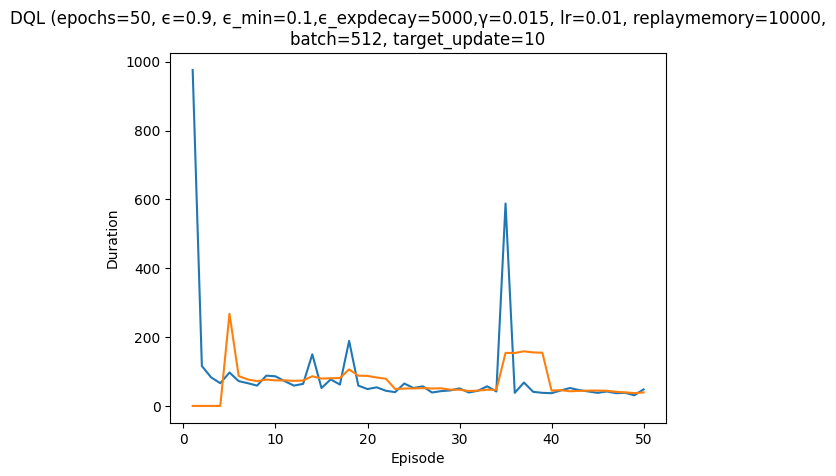

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.name to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.name` for environment variables or `env.get_wrapper_attr('name')` that will search the reminding wrappers.
  logger.warn(


In [10]:
# Run Deep Q-learning
# 0.015
best_dqn_learning_run_10 = learner.epsilon_greedy_search(
    cyberbattle_gym_env=cyberbattlechain_10,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(ep=ep, gamma=0.015, replay_memory_size=10000, target_update=10, batch_size=512, learning_rate=0.01),  # torch default is 1e-2
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    # epsilon_multdecay=0.75,  # 0.999,
    epsilon_exponential_decay=5000,  # 10000
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="DQL",
)

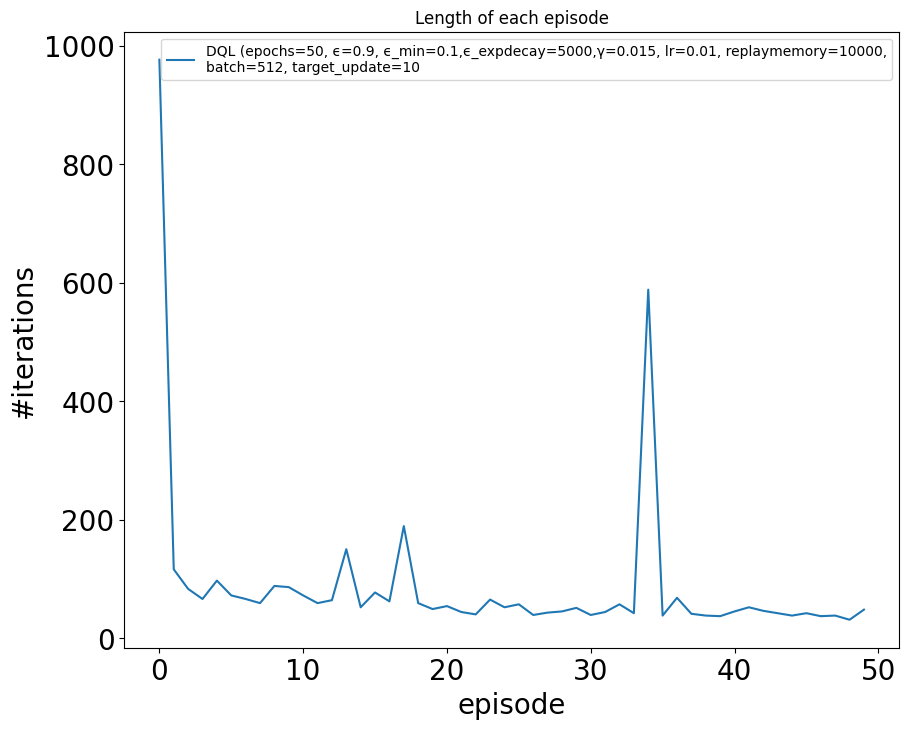

In [11]:
p.plot_episodes_length([best_dqn_learning_run_10])

In [12]:
if not os.path.exists("images"):
    os.mkdir("images")

###### Exploiting DQL
Learning with: episode_count=10,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 1 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 2 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 3 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 4 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 5 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 6 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 7 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 8 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 9 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.
  logger.warn(


status properties              local_attacks  \
id                                                              
start             owned         []  [ScanExplorerRecentFiles]   
1_LinuxNode  discovered        NaN                       None   

                         remote_attacks  
id                                       
start                                []  
1_LinuxNode  [ProbeLinux, ProbeWindows]

[3131721:0807/220728.605033:ERROR:buffer_manager.cc(488)] [.DisplayCompositor]GL ERROR :GL_INVALID_OPERATION : glBufferData: <- error from previous GL command


Episode 10|Iteration 2|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:06||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.

Episode 10|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:06||

Episode 10|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:06||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                     properties  \
id                                                  
start        owned                             []   
1_LinuxNode  owned  [MySql, Ubuntu, nginx/1.10.3]   

                                                 local_attacks  \
id                                                               
start                                [ScanExplorerRecentFiles]   
1_LinuxNode  [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   

                         remote_attacks  
id                                       
start                                []  
1_LinuxNode  [ProbeLinux, ProbeWindows]

Episode 10|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:06||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.

Episode 10|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:06||

Episode 10|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:06||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                     properties  \
id                                                         
start               owned                             []   
1_LinuxNode         owned  [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  discovered                            NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode                                               None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]

Episode 10|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:06||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.

Episode 10|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:06||

Episode 10|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:06||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]

Episode 10|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:07||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.

Episode 10|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 10|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:07||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode                                                 None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]

Episode 10|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:07||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.

Episode 10|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:07||

Episode 10|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:07||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]

Episode 10|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:07||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.

Episode 10|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:07||

Episode 10|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:07||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
4_WindowsNode                                               None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]

Episode 10|Iteration 8|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:07||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.

Episode 10|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 10|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:07||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
4_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]

Episode 10|Iteration 9|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:07||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.

Episode 10|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 10|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:07||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
4_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
5_LinuxNode                                                 None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]

Episode 10|Iteration 10|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:07||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.

Episode 10|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:07||

Episode 10|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:07||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
4_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
5_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]

Episode 10|Iteration 11|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:07||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.

Episode 10|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:07||

Episode 10|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:07||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode  discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
4_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
5_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
6_WindowsNode                                               None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]

Episode 10|Iteration 12|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:08||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.

Episode 10|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 10|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:08||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
4_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
5_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
6_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]

Episode 10|Iteration 13|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:08||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.

Episode 10|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:08||

Episode 10|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:08||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode       owned  [Windows, Win10, Win10Patched]   
7_LinuxNode    discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
4_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
5_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
6_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
7_LinuxNode                                                 None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]

Episode 10|Iteration 14|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:08||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.

Episode 10|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:08||

Episode 10|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:08||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode  owned  [Windows, Win10, Win10Patched]   
7_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
4_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
5_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
6_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
7_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]

Episode 10|Iteration 15|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:08||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.

Episode 10|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:08||

Episode 10|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:08||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode       owned  [Windows, Win10, Win10Patched]   
7_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode  discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
4_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
5_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
6_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
7_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
8_WindowsNode                                               None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]  
8_WindowsNode  [ProbeLinux, ProbeWindows]

Episode 10|Iteration 16|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:08||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.



Episode 10|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:08||

Episode 10|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:08||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode  owned  [Windows, Win10, Win10Patched]   
7_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
4_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
5_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
6_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
7_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
8_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]  
8_WindowsNode  [ProbeLinux, ProbeWindows]

Episode 10|Iteration 17|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:08||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.

Episode 10|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:09||

Episode 10|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:09||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                          
start               owned                              []   
1_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode       owned  [Windows, Win10, Win10Patched]   
3_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode       owned  [Windows, Win10, Win10Patched]   
5_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode       owned  [Windows, Win10, Win10Patched]   
7_LinuxNode         owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode       owned  [Windows, Win10, Win10Patched]   
9_LinuxNode    discovered                             NaN   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
4_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
5_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
6_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
7_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
8_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
9_LinuxNode                                                 None   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]  
8_WindowsNode  [ProbeLinux, ProbeWindows]  
9_LinuxNode    [ProbeLinux, ProbeWindows]

Episode 10|Iteration 18|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:09||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.



Episode 10|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:09||

Episode 10|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:09||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                     
start          owned                              []   
1_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode  owned  [Windows, Win10, Win10Patched]   
3_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode  owned  [Windows, Win10, Win10Patched]   
5_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode  owned  [Windows, Win10, Win10Patched]   
7_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode  owned  [Windows, Win10, Win10Patched]   
9_LinuxNode    owned   [MySql, Ubuntu, nginx/1.10.3]   

                                                   local_attacks  \
id                                                                 
start                                  [ScanExplorerRecentFiles]   
1_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
4_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
5_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
6_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
7_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
8_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
9_LinuxNode    [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   

                           remote_attacks  
id                                         
start                                  []  
1_LinuxNode    [ProbeLinux, ProbeWindows]  
2_WindowsNode  [ProbeLinux, ProbeWindows]  
3_LinuxNode    [ProbeLinux, ProbeWindows]  
4_WindowsNode  [ProbeLinux, ProbeWindows]  
5_LinuxNode    [ProbeLinux, ProbeWindows]  
6_WindowsNode  [ProbeLinux, ProbeWindows]  
7_LinuxNode    [ProbeLinux, ProbeWindows]  
8_WindowsNode  [ProbeLinux, ProbeWindows]  
9_LinuxNode    [ProbeLinux, ProbeWindows]

Episode 10|Iteration 19|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:09||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.



Episode 10|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:09||

Episode 10|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:09||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                           
start                owned                              []   
1_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode        owned  [Windows, Win10, Win10Patched]   
3_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode        owned  [Windows, Win10, Win10Patched]   
5_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode        owned  [Windows, Win10, Win10Patched]   
7_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode        owned  [Windows, Win10, Win10Patched]   
9_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
10_WindowsNode  discovered                             NaN   

                                                    local_attacks  \
id                                                                  
start                                   [ScanExplorerRecentFiles]   
1_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode   [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
4_WindowsNode   [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
5_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
6_WindowsNode   [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
7_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
8_WindowsNode   [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
9_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
10_WindowsNode                                               None   

                            remote_attacks  
id                                          
start                                   []  
1_LinuxNode     [ProbeLinux, ProbeWindows]  
2_WindowsNode   [ProbeLinux, ProbeWindows]  
3_LinuxNode     [ProbeLinux, ProbeWindows]  
4_WindowsNode   [ProbeLinux, ProbeWindows]  
5_LinuxNode     [ProbeLinux, ProbeWindows]  
6_WindowsNode   [ProbeLinux, ProbeWindows]  
7_LinuxNode     [ProbeLinux, ProbeWindows]  
8_WindowsNode   [ProbeLinux, ProbeWindows]  
9_LinuxNode     [ProbeLinux, ProbeWindows]  
10_WindowsNode  [ProbeLinux, ProbeWindows]

Episode 10|Iteration 20|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:09||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.



Episode 10|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:09||

Episode 10|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:09||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                      
start           owned                              []   
1_LinuxNode     owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode   owned  [Windows, Win10, Win10Patched]   
3_LinuxNode     owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode   owned  [Windows, Win10, Win10Patched]   
5_LinuxNode     owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode   owned  [Windows, Win10, Win10Patched]   
7_LinuxNode     owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode   owned  [Windows, Win10, Win10Patched]   
9_LinuxNode     owned   [MySql, Ubuntu, nginx/1.10.3]   
10_WindowsNode  owned  [Windows, Win10, Win10Patched]   

                                                    local_attacks  \
id                                                                  
start                                   [ScanExplorerRecentFiles]   
1_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode   [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
4_WindowsNode   [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
5_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
6_WindowsNode   [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
7_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
8_WindowsNode   [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
9_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
10_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   

                            remote_attacks  
id                                          
start                                   []  
1_LinuxNode     [ProbeLinux, ProbeWindows]  
2_WindowsNode   [ProbeLinux, ProbeWindows]  
3_LinuxNode     [ProbeLinux, ProbeWindows]  
4_WindowsNode   [ProbeLinux, ProbeWindows]  
5_LinuxNode     [ProbeLinux, ProbeWindows]  
6_WindowsNode   [ProbeLinux, ProbeWindows]  
7_LinuxNode     [ProbeLinux, ProbeWindows]  
8_WindowsNode   [ProbeLinux, ProbeWindows]  
9_LinuxNode     [ProbeLinux, ProbeWindows]  
10_WindowsNode  [ProbeLinux, ProbeWindows]

Episode 10|Iteration 21|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:09||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.



Episode 10|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:09||

Episode 10|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:09||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                      properties  \
id                                                           
start                owned                              []   
1_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode        owned  [Windows, Win10, Win10Patched]   
3_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode        owned  [Windows, Win10, Win10Patched]   
5_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode        owned  [Windows, Win10, Win10Patched]   
7_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode        owned  [Windows, Win10, Win10Patched]   
9_LinuxNode          owned   [MySql, Ubuntu, nginx/1.10.3]   
10_WindowsNode       owned  [Windows, Win10, Win10Patched]   
11_LinuxNode    discovered                             NaN   

                                                    local_attacks  \
id                                                                  
start                                   [ScanExplorerRecentFiles]   
1_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode   [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
4_WindowsNode   [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
5_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
6_WindowsNode   [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
7_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
8_WindowsNode   [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
9_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
10_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
11_LinuxNode                                                 None   

                            remote_attacks  
id                                          
start                                   []  
1_LinuxNode     [ProbeLinux, ProbeWindows]  
2_WindowsNode   [ProbeLinux, ProbeWindows]  
3_LinuxNode     [ProbeLinux, ProbeWindows]  
4_WindowsNode   [ProbeLinux, ProbeWindows]  
5_LinuxNode     [ProbeLinux, ProbeWindows]  
6_WindowsNode   [ProbeLinux, ProbeWindows]  
7_LinuxNode     [ProbeLinux, ProbeWindows]  
8_WindowsNode   [ProbeLinux, ProbeWindows]  
9_LinuxNode     [ProbeLinux, ProbeWindows]  
10_WindowsNode  [ProbeLinux, ProbeWindows]  
11_LinuxNode                            []

Episode 10|Iteration 22|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:10||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.



Episode 10|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:00:10||

Episode 10|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:00:10||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.render_as_fig to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_as_fig` for environment variables or `env.get_wrapper_attr('render_as_fig')` that will search the reminding wrappers.



status                                 properties  \
id                                                                 
start           owned                                         []   
1_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
2_WindowsNode   owned             [Windows, Win10, Win10Patched]   
3_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
4_WindowsNode   owned             [Windows, Win10, Win10Patched]   
5_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
6_WindowsNode   owned             [Windows, Win10, Win10Patched]   
7_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
8_WindowsNode   owned             [Windows, Win10, Win10Patched]   
9_LinuxNode     owned              [MySql, Ubuntu, nginx/1.10.3]   
10_WindowsNode  owned             [Windows, Win10, Win10Patched]   
11_LinuxNode    owned  [MySql, Ubuntu, nginx/1.10.3, FLAG:Linux]   

                                                    local_attacks  \
id                                                                  
start                                   [ScanExplorerRecentFiles]   
1_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
2_WindowsNode   [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
3_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
4_WindowsNode   [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
5_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
6_WindowsNode   [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
7_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
8_WindowsNode   [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
9_LinuxNode     [CrackKeepPassX, ScanBashHistory, SudoAttempt,...   
10_WindowsNode  [CrackKeepPassX, ScanBashHistory, ScanExplorer...   
11_LinuxNode                                                   []   

                            remote_attacks  
id                                          
start                                   []  
1_LinuxNode     [ProbeLinux, ProbeWindows]  
2_WindowsNode   [ProbeLinux, ProbeWindows]  
3_LinuxNode     [ProbeLinux, ProbeWindows]  
4_WindowsNode   [ProbeLinux, ProbeWindows]  
5_LinuxNode     [ProbeLinux, ProbeWindows]  
6_WindowsNode   [ProbeLinux, ProbeWindows]  
7_LinuxNode     [ProbeLinux, ProbeWindows]  
8_WindowsNode   [ProbeLinux, ProbeWindows]  
9_LinuxNode     [ProbeLinux, ProbeWindows]  
10_WindowsNode  [ProbeLinux, ProbeWindows]  
11_LinuxNode                            []

  Episode 10 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


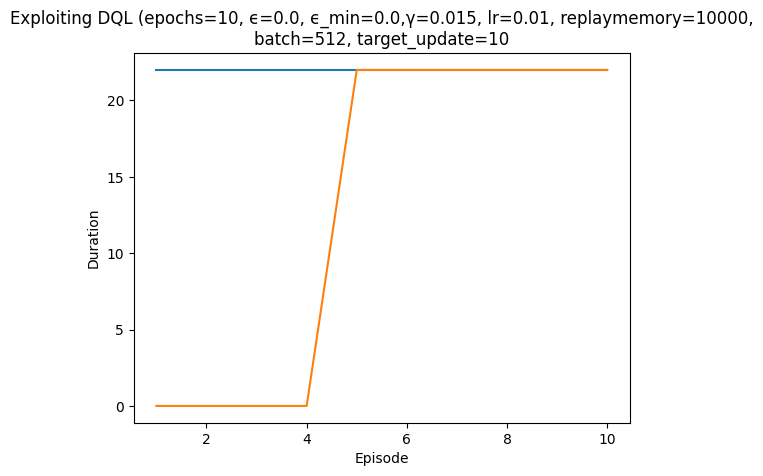

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.name to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.name` for environment variables or `env.get_wrapper_attr('name')` that will search the reminding wrappers.



In [13]:
dql_exploit_run = learner.epsilon_greedy_search(
    cyberbattlechain_10,
    ep,
    learner=best_dqn_learning_run_10["learner"],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,  # 0.35,
    render=False,
    render_last_episode_rewards_to=os.path.join(plots_dir, "dql_transfer-chain10"),
    title="Exploiting DQL",
    verbosity=Verbosity.Quiet,
)

###### Random search
Learning with: episode_count=10,iteration_count=9000,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/10 'Random search' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.sample_valid_action to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.sample_valid_action` for environment variables or `env.get_wrapper_attr('sample_valid_action')` that will search the reminding wrappers.

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:   18.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:   20.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:   20.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:  120.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:  120.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  131.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  131.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  139.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  139.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:  145.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:  145.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 54|reward:  154.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 54|reward:  154.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  154.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 135|reward:  254.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 135|reward:  254.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 1|Iteration 138|reward:  265.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 1|Iteration 138|reward:  265.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 1|Iteration 168|reward:  274.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 1|Iteration 168|reward:  274.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 1|Iteration 183|reward:  276.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 1|Iteration 183|reward:  276.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 228|reward:  276.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 233|reward:  280.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 1|Iteration 233|reward:  280.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 1|Iteration 259|reward:  380.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 1|Iteration 259|reward:  380.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 1|Iteration 268|reward:  391.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 1|Iteration 268|reward:  391.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 1|Iteration 273|reward:  397.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 1|Iteration 273|reward:  397.0|last_reward_at:  273|Elapsed Time: 0:00:00||

Episode 1|Iteration 274|reward:  406.0|last_reward_at:  273|Elapsed Time: 0:00:00||

Episode 1|Iteration 274|reward:  406.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 1|Iteration 276|reward:  414.0|last_reward_at:  274|Elapsed Time: 0:00:00||

Episode 1|Iteration 276|reward:  414.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 1|Iteration 334|reward:  414.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 1|Iteration 390|reward:  414.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 1|Iteration 444|reward:  414.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 1|Iteration 502|reward:  414.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 1|Iteration 558|reward:  414.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 1|Iteration 606|reward:  414.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 1|Iteration 653|reward:  414.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 684|reward:  414.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 736|reward:  414.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 791|reward:  414.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 853|reward:  414.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 912|reward:  414.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 973|reward:  414.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 1025|reward:  414.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 1085|reward:  414.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 1140|reward:  414.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 1156|reward:  514.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 1|Iteration 1156|reward:  514.0|last_reward_at: 1156|Elapsed Time: 0:00:01||

Episode 1|Iteration 1198|reward:  514.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 1|Iteration 1230|reward:  525.0|last_reward_at: 1156|Elapsed Time: 0:00:02||

Episode 1|Iteration 1230|reward:  525.0|last_reward_at: 1230|Elapsed Time: 0:00:02||

Episode 1|Iteration 1254|reward:  525.0|last_reward_at: 1230|Elapsed Time: 0:00:02||

Episode 1|Iteration 1264|reward:  534.0|last_reward_at: 1230|Elapsed Time: 0:00:02||

Episode 1|Iteration 1264|reward:  534.0|last_reward_at: 1264|Elapsed Time: 0:00:02||

Episode 1|Iteration 1286|reward:  536.0|last_reward_at: 1264|Elapsed Time: 0:00:02||

Episode 1|Iteration 1286|reward:  536.0|last_reward_at: 1286|Elapsed Time: 0:00:02||

Episode 1|Iteration 1293|reward:  636.0|last_reward_at: 1286|Elapsed Time: 0:00:02||

Episode 1|Iteration 1293|reward:  636.0|last_reward_at: 1293|Elapsed Time: 0:00:02||

Episode 1|Iteration 1314|reward:  647.0|last_reward_at: 1293|Elapsed Time: 0:00:02||

Episode 1|Iteration 1314|reward:  647.0|last_reward_at: 1314|Elapsed Time: 0:00:02||

Episode 1|Iteration 1320|reward:  655.0|last_reward_at: 1314|Elapsed Time: 0:00:02||

Episode 1|Iteration 1320|reward:  655.0|last_reward_at: 1320|Elapsed Time: 0:00:02||

Episode 1|Iteration 1351|reward:  655.0|last_reward_at: 1320|Elapsed Time: 0:00:02||

Episode 1|Iteration 1356|reward:  657.0|last_reward_at: 1320|Elapsed Time: 0:00:02||

Episode 1|Iteration 1356|reward:  657.0|last_reward_at: 1356|Elapsed Time: 0:00:02||

Episode 1|Iteration 1391|reward:  657.0|last_reward_at: 1356|Elapsed Time: 0:00:02||

Episode 1|Iteration 1425|reward:  657.0|last_reward_at: 1356|Elapsed Time: 0:00:02||

Episode 1|Iteration 1460|reward:  657.0|last_reward_at: 1356|Elapsed Time: 0:00:02||

Episode 1|Iteration 1473|reward:  663.0|last_reward_at: 1356|Elapsed Time: 0:00:02||

Episode 1|Iteration 1473|reward:  663.0|last_reward_at: 1473|Elapsed Time: 0:00:02||

Episode 1|Iteration 1511|reward:  663.0|last_reward_at: 1473|Elapsed Time: 0:00:02||

Episode 1|Iteration 1528|reward:  672.0|last_reward_at: 1473|Elapsed Time: 0:00:02||

Episode 1|Iteration 1528|reward:  672.0|last_reward_at: 1528|Elapsed Time: 0:00:02||

Episode 1|Iteration 1559|reward:  672.0|last_reward_at: 1528|Elapsed Time: 0:00:03||

Episode 1|Iteration 1587|reward:  772.0|last_reward_at: 1528|Elapsed Time: 0:00:03||

Episode 1|Iteration 1587|reward:  772.0|last_reward_at: 1587|Elapsed Time: 0:00:03||

Episode 1|Iteration 1595|reward:  786.0|last_reward_at: 1587|Elapsed Time: 0:00:03||

Episode 1|Iteration 1595|reward:  786.0|last_reward_at: 1595|Elapsed Time: 0:00:03||

Episode 1|Iteration 1600|reward:  790.0|last_reward_at: 1595|Elapsed Time: 0:00:03||

Episode 1|Iteration 1600|reward:  790.0|last_reward_at: 1600|Elapsed Time: 0:00:03||

Episode 1|Iteration 1629|reward:  790.0|last_reward_at: 1600|Elapsed Time: 0:00:03||

Episode 1|Iteration 1631|reward:  792.0|last_reward_at: 1600|Elapsed Time: 0:00:03||

Episode 1|Iteration 1631|reward:  792.0|last_reward_at: 1631|Elapsed Time: 0:00:03||

Episode 1|Iteration 1659|reward:  792.0|last_reward_at: 1631|Elapsed Time: 0:00:03||

Episode 1|Iteration 1691|reward:  792.0|last_reward_at: 1631|Elapsed Time: 0:00:03||

Episode 1|Iteration 1709|reward:  792.0|last_reward_at: 1631|Elapsed Time: 0:00:03||

Episode 1|Iteration 1739|reward:  792.0|last_reward_at: 1631|Elapsed Time: 0:00:03||

Episode 1|Iteration 1769|reward:  792.0|last_reward_at: 1631|Elapsed Time: 0:00:03||

Episode 1|Iteration 1799|reward:  792.0|last_reward_at: 1631|Elapsed Time: 0:00:03||

Episode 1|Iteration 1823|reward:  792.0|last_reward_at: 1631|Elapsed Time: 0:00:03||

Episode 1|Iteration 1849|reward:  792.0|last_reward_at: 1631|Elapsed Time: 0:00:04||

Episode 1|Iteration 1861|reward:  798.0|last_reward_at: 1631|Elapsed Time: 0:00:04||

Episode 1|Iteration 1861|reward:  798.0|last_reward_at: 1861|Elapsed Time: 0:00:04||

Episode 1|Iteration 1890|reward:  798.0|last_reward_at: 1861|Elapsed Time: 0:00:04||

Episode 1|Iteration 1918|reward:  798.0|last_reward_at: 1861|Elapsed Time: 0:00:04||

Episode 1|Iteration 1937|reward:  798.0|last_reward_at: 1861|Elapsed Time: 0:00:04||

Episode 1|Iteration 1966|reward:  798.0|last_reward_at: 1861|Elapsed Time: 0:00:04||

Episode 1|Iteration 1995|reward:  798.0|last_reward_at: 1861|Elapsed Time: 0:00:04||

Episode 1|Iteration 2026|reward:  798.0|last_reward_at: 1861|Elapsed Time: 0:00:04||

Episode 1|Iteration 2051|reward:  798.0|last_reward_at: 1861|Elapsed Time: 0:00:04||

Episode 1|Iteration 2079|reward:  798.0|last_reward_at: 1861|Elapsed Time: 0:00:04||

Episode 1|Iteration 2107|reward:  798.0|last_reward_at: 1861|Elapsed Time: 0:00:04||

Episode 1|Iteration 2136|reward:  798.0|last_reward_at: 1861|Elapsed Time: 0:00:05||

Episode 1|Iteration 2165|reward:  798.0|last_reward_at: 1861|Elapsed Time: 0:00:05||

Episode 1|Iteration 2194|reward:  798.0|last_reward_at: 1861|Elapsed Time: 0:00:05||

Episode 1|Iteration 2223|reward:  798.0|last_reward_at: 1861|Elapsed Time: 0:00:05||

Episode 1|Iteration 2243|reward:  898.0|last_reward_at: 1861|Elapsed Time: 0:00:05||

Episode 1|Iteration 2243|reward:  898.0|last_reward_at: 2243|Elapsed Time: 0:00:05||

Episode 1|Iteration 2255|reward:  909.0|last_reward_at: 2243|Elapsed Time: 0:00:05||

Episode 1|Iteration 2255|reward:  909.0|last_reward_at: 2255|Elapsed Time: 0:00:05||

Episode 1|Iteration 2257|reward:  915.0|last_reward_at: 2255|Elapsed Time: 0:00:05||

Episode 1|Iteration 2257|reward:  915.0|last_reward_at: 2257|Elapsed Time: 0:00:05||

Episode 1|Iteration 2267|reward:  923.0|last_reward_at: 2257|Elapsed Time: 0:00:05||

Episode 1|Iteration 2267|reward:  923.0|last_reward_at: 2267|Elapsed Time: 0:00:05||

Episode 1|Iteration 2293|reward:  932.0|last_reward_at: 2267|Elapsed Time: 0:00:05||

Episode 1|Iteration 2293|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:05||

Episode 1|Iteration 2319|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:05||

Episode 1|Iteration 2345|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:05||

Episode 1|Iteration 2371|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:05||

Episode 1|Iteration 2393|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:06||

Episode 1|Iteration 2416|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:06||

Episode 1|Iteration 2442|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:06||

Episode 1|Iteration 2467|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:06||

Episode 1|Iteration 2493|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:06||

Episode 1|Iteration 2507|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:06||

Episode 1|Iteration 2528|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:06||

Episode 1|Iteration 2550|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:06||

Episode 1|Iteration 2571|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:06||

Episode 1|Iteration 2592|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:06||

Episode 1|Iteration 2614|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:07||

Episode 1|Iteration 2634|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:07||

Episode 1|Iteration 2658|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:07||

Episode 1|Iteration 2682|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:07||

Episode 1|Iteration 2708|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:07||

Episode 1|Iteration 2734|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:07||

Episode 1|Iteration 2759|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:07||

Episode 1|Iteration 2784|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:07||

Episode 1|Iteration 2809|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:07||

Episode 1|Iteration 2835|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:07||

Episode 1|Iteration 2849|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:07||

Episode 1|Iteration 2868|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:08||

Episode 1|Iteration 2892|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:08||

Episode 1|Iteration 2916|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:08||

Episode 1|Iteration 2942|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:08||

Episode 1|Iteration 2963|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:08||

Episode 1|Iteration 2988|reward:  932.0|last_reward_at: 2293|Elapsed Time: 0:00:08||

Episode 1|Iteration 2998|reward: 1032.0|last_reward_at: 2293|Elapsed Time: 0:00:08||

Episode 1|Iteration 2998|reward: 1032.0|last_reward_at: 2998|Elapsed Time: 0:00:08||

Episode 1|Iteration 3015|reward: 1043.0|last_reward_at: 2998|Elapsed Time: 0:00:08||

Episode 1|Iteration 3015|reward: 1043.0|last_reward_at: 3015|Elapsed Time: 0:00:08||

Episode 1|Iteration 3038|reward: 1043.0|last_reward_at: 3015|Elapsed Time: 0:00:08||

Episode 1|Iteration 3050|reward: 1045.0|last_reward_at: 3015|Elapsed Time: 0:00:08||

Episode 1|Iteration 3050|reward: 1045.0|last_reward_at: 3050|Elapsed Time: 0:00:08||

Episode 1|Iteration 3072|reward: 1045.0|last_reward_at: 3050|Elapsed Time: 0:00:08||

Episode 1|Iteration 3090|reward: 1049.0|last_reward_at: 3050|Elapsed Time: 0:00:09||

Episode 1|Iteration 3090|reward: 1049.0|last_reward_at: 3090|Elapsed Time: 0:00:09||

Episode 1|Iteration 3111|reward: 1049.0|last_reward_at: 3090|Elapsed Time: 0:00:09||

Episode 1|Iteration 3132|reward: 1049.0|last_reward_at: 3090|Elapsed Time: 0:00:09||

Episode 1|Iteration 3153|reward: 1049.0|last_reward_at: 3090|Elapsed Time: 0:00:09||

Episode 1|Iteration 3175|reward: 1049.0|last_reward_at: 3090|Elapsed Time: 0:00:09||

Episode 1|Iteration 3189|reward: 1058.0|last_reward_at: 3090|Elapsed Time: 0:00:09||

Episode 1|Iteration 3189|reward: 1058.0|last_reward_at: 3189|Elapsed Time: 0:00:09||

Episode 1|Iteration 3211|reward: 1058.0|last_reward_at: 3189|Elapsed Time: 0:00:09||

Episode 1|Iteration 3234|reward: 1058.0|last_reward_at: 3189|Elapsed Time: 0:00:09||

Episode 1|Iteration 3255|reward: 1058.0|last_reward_at: 3189|Elapsed Time: 0:00:09||

Episode 1|Iteration 3275|reward: 1058.0|last_reward_at: 3189|Elapsed Time: 0:00:09||

Episode 1|Iteration 3292|reward: 1058.0|last_reward_at: 3189|Elapsed Time: 0:00:10||

Episode 1|Iteration 3304|reward: 1058.0|last_reward_at: 3189|Elapsed Time: 0:00:10||

Episode 1|Iteration 3325|reward: 1058.0|last_reward_at: 3189|Elapsed Time: 0:00:10||

Episode 1|Iteration 3345|reward: 1058.0|last_reward_at: 3189|Elapsed Time: 0:00:10||

Episode 1|Iteration 3366|reward: 1058.0|last_reward_at: 3189|Elapsed Time: 0:00:10||

Episode 1|Iteration 3388|reward: 1058.0|last_reward_at: 3189|Elapsed Time: 0:00:10||

Episode 1|Iteration 3409|reward: 1058.0|last_reward_at: 3189|Elapsed Time: 0:00:10||

Episode 1|Iteration 3423|reward: 1158.0|last_reward_at: 3189|Elapsed Time: 0:00:10||

Episode 1|Iteration 3423|reward: 1158.0|last_reward_at: 3423|Elapsed Time: 0:00:10||

Episode 1|Iteration 3443|reward: 1158.0|last_reward_at: 3423|Elapsed Time: 0:00:10||

Episode 1|Iteration 3462|reward: 1158.0|last_reward_at: 3423|Elapsed Time: 0:00:10||

Episode 1|Iteration 3476|reward: 1169.0|last_reward_at: 3423|Elapsed Time: 0:00:10||

Episode 1|Iteration 3476|reward: 1169.0|last_reward_at: 3476|Elapsed Time: 0:00:10||

Episode 1|Iteration 3495|reward: 1169.0|last_reward_at: 3476|Elapsed Time: 0:00:11||

Episode 1|Iteration 3514|reward: 1169.0|last_reward_at: 3476|Elapsed Time: 0:00:11||

Episode 1|Iteration 3532|reward: 1169.0|last_reward_at: 3476|Elapsed Time: 0:00:11||

Episode 1|Iteration 3543|reward: 1175.0|last_reward_at: 3476|Elapsed Time: 0:00:11||

Episode 1|Iteration 3543|reward: 1175.0|last_reward_at: 3543|Elapsed Time: 0:00:11||

Episode 1|Iteration 3562|reward: 1175.0|last_reward_at: 3543|Elapsed Time: 0:00:11||

Episode 1|Iteration 3581|reward: 1175.0|last_reward_at: 3543|Elapsed Time: 0:00:11||

Episode 1|Iteration 3599|reward: 1175.0|last_reward_at: 3543|Elapsed Time: 0:00:11||

Episode 1|Iteration 3618|reward: 1175.0|last_reward_at: 3543|Elapsed Time: 0:00:11||

Episode 1|Iteration 3637|reward: 1175.0|last_reward_at: 3543|Elapsed Time: 0:00:11||

Episode 1|Iteration 3656|reward: 1175.0|last_reward_at: 3543|Elapsed Time: 0:00:11||

Episode 1|Iteration 3675|reward: 1175.0|last_reward_at: 3543|Elapsed Time: 0:00:12||

Episode 1|Iteration 3692|reward: 1175.0|last_reward_at: 3543|Elapsed Time: 0:00:12||

Episode 1|Iteration 3709|reward: 1175.0|last_reward_at: 3543|Elapsed Time: 0:00:12||

Episode 1|Iteration 3712|reward: 1183.0|last_reward_at: 3543|Elapsed Time: 0:00:12||

Episode 1|Iteration 3712|reward: 1183.0|last_reward_at: 3712|Elapsed Time: 0:00:12||

Episode 1|Iteration 3731|reward: 1183.0|last_reward_at: 3712|Elapsed Time: 0:00:12||

Episode 1|Iteration 3749|reward: 1183.0|last_reward_at: 3712|Elapsed Time: 0:00:12||

Episode 1|Iteration 3760|reward: 1183.0|last_reward_at: 3712|Elapsed Time: 0:00:12||

Episode 1|Iteration 3776|reward: 1183.0|last_reward_at: 3712|Elapsed Time: 0:00:12||

Episode 1|Iteration 3794|reward: 1183.0|last_reward_at: 3712|Elapsed Time: 0:00:12||

Episode 1|Iteration 3811|reward: 1183.0|last_reward_at: 3712|Elapsed Time: 0:00:12||

Episode 1|Iteration 3829|reward: 1183.0|last_reward_at: 3712|Elapsed Time: 0:00:12||

Episode 1|Iteration 3840|reward: 1192.0|last_reward_at: 3712|Elapsed Time: 0:00:13||

Episode 1|Iteration 3840|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:13||

Episode 1|Iteration 3859|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:13||

Episode 1|Iteration 3874|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:13||

Episode 1|Iteration 3889|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:13||

Episode 1|Iteration 3907|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:13||

Episode 1|Iteration 3925|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:13||

Episode 1|Iteration 3942|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:13||

Episode 1|Iteration 3960|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:13||

Episode 1|Iteration 3978|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:13||

Episode 1|Iteration 3988|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:13||

Episode 1|Iteration 4006|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:13||

Episode 1|Iteration 4025|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:14||

Episode 1|Iteration 4044|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:14||

Episode 1|Iteration 4061|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:14||

Episode 1|Iteration 4079|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:14||

Episode 1|Iteration 4096|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:14||

Episode 1|Iteration 4113|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:14||

Episode 1|Iteration 4131|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:14||

Episode 1|Iteration 4149|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:14||

Episode 1|Iteration 4167|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:14||

Episode 1|Iteration 4185|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:15||

Episode 1|Iteration 4203|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:15||

Episode 1|Iteration 4216|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:15||

Episode 1|Iteration 4233|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:15||

Episode 1|Iteration 4251|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:15||

Episode 1|Iteration 4270|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:15||

Episode 1|Iteration 4289|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:15||

Episode 1|Iteration 4306|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:15||

Episode 1|Iteration 4324|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:15||

Episode 1|Iteration 4343|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:15||

Episode 1|Iteration 4361|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:16||

Episode 1|Iteration 4377|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:16||

Episode 1|Iteration 4393|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:16||

Episode 1|Iteration 4408|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:16||

Episode 1|Iteration 4421|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:16||

Episode 1|Iteration 4439|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:16||

Episode 1|Iteration 4457|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:16||

Episode 1|Iteration 4473|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:16||

Episode 1|Iteration 4490|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:16||

Episode 1|Iteration 4508|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:16||

Episode 1|Iteration 4525|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:17||

Episode 1|Iteration 4543|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:17||

Episode 1|Iteration 4557|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:17||

Episode 1|Iteration 4572|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:17||

Episode 1|Iteration 4589|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:17||

Episode 1|Iteration 4606|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:17||

Episode 1|Iteration 4623|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:17||

Episode 1|Iteration 4641|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:17||

Episode 1|Iteration 4659|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:17||

Episode 1|Iteration 4671|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:17||

Episode 1|Iteration 4687|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:18||

Episode 1|Iteration 4703|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:18||

Episode 1|Iteration 4721|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:18||

Episode 1|Iteration 4736|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:18||

Episode 1|Iteration 4754|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:18||

Episode 1|Iteration 4771|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:18||

Episode 1|Iteration 4785|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:18||

Episode 1|Iteration 4802|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:18||

Episode 1|Iteration 4820|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:18||

Episode 1|Iteration 4837|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:18||

Episode 1|Iteration 4855|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:19||

Episode 1|Iteration 4872|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:19||

Episode 1|Iteration 4890|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:19||

Episode 1|Iteration 4899|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:19||

Episode 1|Iteration 4916|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:19||

Episode 1|Iteration 4933|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:19||

Episode 1|Iteration 4951|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:19||

Episode 1|Iteration 4968|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:19||

Episode 1|Iteration 4987|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:19||

Episode 1|Iteration 5004|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:19||

Episode 1|Iteration 5021|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:20||

Episode 1|Iteration 5037|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:20||

Episode 1|Iteration 5053|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:20||

Episode 1|Iteration 5069|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:20||

Episode 1|Iteration 5084|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:20||

Episode 1|Iteration 5102|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:20||

Episode 1|Iteration 5120|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:20||

Episode 1|Iteration 5139|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:20||

Episode 1|Iteration 5158|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:20||

Episode 1|Iteration 5176|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:20||

Episode 1|Iteration 5195|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:21||

Episode 1|Iteration 5211|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:21||

Episode 1|Iteration 5227|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:21||

Episode 1|Iteration 5241|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:21||

Episode 1|Iteration 5259|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:21||

Episode 1|Iteration 5276|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:21||

Episode 1|Iteration 5293|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:21||

Episode 1|Iteration 5310|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:21||

Episode 1|Iteration 5328|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:21||

Episode 1|Iteration 5346|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:21||

Episode 1|Iteration 5364|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:22||

Episode 1|Iteration 5382|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:22||

Episode 1|Iteration 5400|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:22||

Episode 1|Iteration 5418|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:22||

Episode 1|Iteration 5435|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:22||

Episode 1|Iteration 5450|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:22||

Episode 1|Iteration 5469|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:22||

Episode 1|Iteration 5485|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:22||

Episode 1|Iteration 5503|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:22||

Episode 1|Iteration 5520|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:22||

Episode 1|Iteration 5534|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:23||

Episode 1|Iteration 5550|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:23||

Episode 1|Iteration 5565|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:23||

Episode 1|Iteration 5581|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:23||

Episode 1|Iteration 5595|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:23||

Episode 1|Iteration 5613|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:23||

Episode 1|Iteration 5632|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:23||

Episode 1|Iteration 5650|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:23||

Episode 1|Iteration 5668|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:23||

Episode 1|Iteration 5687|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:24||

Episode 1|Iteration 5697|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:24||

Episode 1|Iteration 5714|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:24||

Episode 1|Iteration 5731|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:24||

Episode 1|Iteration 5748|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:24||

Episode 1|Iteration 5766|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:24||

Episode 1|Iteration 5784|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:24||

Episode 1|Iteration 5802|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:24||

Episode 1|Iteration 5821|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:24||

Episode 1|Iteration 5840|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:24||

Episode 1|Iteration 5859|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:24||

Episode 1|Iteration 5877|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:25||

Episode 1|Iteration 5894|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:25||

Episode 1|Iteration 5910|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:25||

Episode 1|Iteration 5925|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:25||

Episode 1|Iteration 5942|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:25||

Episode 1|Iteration 5959|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:25||

Episode 1|Iteration 5976|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:25||

Episode 1|Iteration 5994|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:25||

Episode 1|Iteration 6012|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:25||

Episode 1|Iteration 6031|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:26||

Episode 1|Iteration 6049|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:26||

Episode 1|Iteration 6066|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:26||

Episode 1|Iteration 6082|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:26||

Episode 1|Iteration 6099|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:26||

Episode 1|Iteration 6117|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:26||

Episode 1|Iteration 6134|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:26||

Episode 1|Iteration 6152|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:26||

Episode 1|Iteration 6170|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:26||

Episode 1|Iteration 6189|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:26||

Episode 1|Iteration 6208|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:27||

Episode 1|Iteration 6226|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:27||

Episode 1|Iteration 6243|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:27||

Episode 1|Iteration 6260|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:27||

Episode 1|Iteration 6279|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:27||

Episode 1|Iteration 6297|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:27||

Episode 1|Iteration 6315|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:27||

Episode 1|Iteration 6333|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:27||

Episode 1|Iteration 6351|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:27||

Episode 1|Iteration 6369|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:27||

Episode 1|Iteration 6380|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:28||

Episode 1|Iteration 6397|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:28||

Episode 1|Iteration 6414|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:28||

Episode 1|Iteration 6431|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:28||

Episode 1|Iteration 6448|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:28||

Episode 1|Iteration 6466|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:28||

Episode 1|Iteration 6483|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:28||

Episode 1|Iteration 6494|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:28||

Episode 1|Iteration 6512|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:28||

Episode 1|Iteration 6530|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:28||

Episode 1|Iteration 6548|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:29||

Episode 1|Iteration 6565|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:29||

Episode 1|Iteration 6582|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:29||

Episode 1|Iteration 6599|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:29||

Episode 1|Iteration 6617|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:29||

Episode 1|Iteration 6636|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:29||

Episode 1|Iteration 6655|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:29||

Episode 1|Iteration 6674|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:29||

Episode 1|Iteration 6692|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:29||

Episode 1|Iteration 6710|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:29||

Episode 1|Iteration 6722|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:30||

Episode 1|Iteration 6739|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:30||

Episode 1|Iteration 6754|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:30||

Episode 1|Iteration 6772|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:30||

Episode 1|Iteration 6789|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:30||

Episode 1|Iteration 6805|reward: 1192.0|last_reward_at: 3840|Elapsed Time: 0:00:30||

Episode 1|Iteration 6817|reward: 1292.0|last_reward_at: 3840|Elapsed Time: 0:00:30||

Episode 1|Iteration 6817|reward: 1292.0|last_reward_at: 6817|Elapsed Time: 0:00:30||

Episode 1|Iteration 6834|reward: 1292.0|last_reward_at: 6817|Elapsed Time: 0:00:30||

Episode 1|Iteration 6849|reward: 1292.0|last_reward_at: 6817|Elapsed Time: 0:00:30||

Episode 1|Iteration 6862|reward: 1303.0|last_reward_at: 6817|Elapsed Time: 0:00:30||

Episode 1|Iteration 6862|reward: 1303.0|last_reward_at: 6862|Elapsed Time: 0:00:30||

Episode 1|Iteration 6878|reward: 1303.0|last_reward_at: 6862|Elapsed Time: 0:00:31||

Episode 1|Iteration 6893|reward: 1303.0|last_reward_at: 6862|Elapsed Time: 0:00:31||

Episode 1|Iteration 6908|reward: 1303.0|last_reward_at: 6862|Elapsed Time: 0:00:31||

Episode 1|Iteration 6923|reward: 1303.0|last_reward_at: 6862|Elapsed Time: 0:00:31||

Episode 1|Iteration 6940|reward: 1303.0|last_reward_at: 6862|Elapsed Time: 0:00:31||

Episode 1|Iteration 6950|reward: 1303.0|last_reward_at: 6862|Elapsed Time: 0:00:31||

Episode 1|Iteration 6966|reward: 1303.0|last_reward_at: 6862|Elapsed Time: 0:00:31||

Episode 1|Iteration 6982|reward: 1303.0|last_reward_at: 6862|Elapsed Time: 0:00:31||

Episode 1|Iteration 6998|reward: 1312.0|last_reward_at: 6862|Elapsed Time: 0:00:31||

Episode 1|Iteration 6998|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:31||

Episode 1|Iteration 7014|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:31||

Episode 1|Iteration 7030|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:32||

Episode 1|Iteration 7046|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:32||

Episode 1|Iteration 7062|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:32||

Episode 1|Iteration 7077|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:32||

Episode 1|Iteration 7092|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:32||

Episode 1|Iteration 7106|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:32||

Episode 1|Iteration 7122|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:32||

Episode 1|Iteration 7138|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:32||

Episode 1|Iteration 7154|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:32||

Episode 1|Iteration 7171|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:32||

Episode 1|Iteration 7186|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:33||

Episode 1|Iteration 7200|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:33||

Episode 1|Iteration 7216|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:33||

Episode 1|Iteration 7232|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:33||

Episode 1|Iteration 7249|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:33||

Episode 1|Iteration 7266|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:33||

Episode 1|Iteration 7283|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:33||

Episode 1|Iteration 7292|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:33||

Episode 1|Iteration 7307|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:33||

Episode 1|Iteration 7324|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:33||

Episode 1|Iteration 7341|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:34||

Episode 1|Iteration 7357|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:34||

Episode 1|Iteration 7373|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:34||

Episode 1|Iteration 7389|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:34||

Episode 1|Iteration 7406|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:34||

Episode 1|Iteration 7422|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:34||

Episode 1|Iteration 7439|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:34||

Episode 1|Iteration 7456|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:34||

Episode 1|Iteration 7473|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:34||

Episode 1|Iteration 7490|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:34||

Episode 1|Iteration 7505|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:35||

Episode 1|Iteration 7519|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:35||

Episode 1|Iteration 7533|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:35||

Episode 1|Iteration 7548|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:35||

Episode 1|Iteration 7564|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:35||

Episode 1|Iteration 7580|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:35||

Episode 1|Iteration 7597|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:35||

Episode 1|Iteration 7613|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:35||

Episode 1|Iteration 7629|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:35||

Episode 1|Iteration 7645|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:35||

Episode 1|Iteration 7661|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:36||

Episode 1|Iteration 7677|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:36||

Episode 1|Iteration 7693|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:36||

Episode 1|Iteration 7710|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:36||

Episode 1|Iteration 7728|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:36||

Episode 1|Iteration 7745|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:36||

Episode 1|Iteration 7762|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:36||

Episode 1|Iteration 7778|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:36||

Episode 1|Iteration 7794|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:36||

Episode 1|Iteration 7810|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:37||

Episode 1|Iteration 7824|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:37||

Episode 1|Iteration 7839|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:37||

Episode 1|Iteration 7854|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:37||

Episode 1|Iteration 7869|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:37||

Episode 1|Iteration 7885|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:37||

Episode 1|Iteration 7901|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:37||

Episode 1|Iteration 7917|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:37||

Episode 1|Iteration 7933|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:37||

Episode 1|Iteration 7949|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:37||

Episode 1|Iteration 7965|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:38||

Episode 1|Iteration 7975|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:38||

Episode 1|Iteration 7989|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:38||

Episode 1|Iteration 8003|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:38||

Episode 1|Iteration 8018|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:38||

Episode 1|Iteration 8034|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:38||

Episode 1|Iteration 8050|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:38||

Episode 1|Iteration 8066|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:38||

Episode 1|Iteration 8082|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:38||

Episode 1|Iteration 8098|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:38||

Episode 1|Iteration 8114|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:39||

Episode 1|Iteration 8130|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:39||

Episode 1|Iteration 8146|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:39||

Episode 1|Iteration 8163|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:39||

Episode 1|Iteration 8180|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:39||

Episode 1|Iteration 8197|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:39||

Episode 1|Iteration 8214|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:39||

Episode 1|Iteration 8232|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:39||

Episode 1|Iteration 8249|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:39||

Episode 1|Iteration 8265|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:39||

Episode 1|Iteration 8281|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:40||

Episode 1|Iteration 8297|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:40||

Episode 1|Iteration 8311|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:40||

Episode 1|Iteration 8327|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:40||

Episode 1|Iteration 8344|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:40||

Episode 1|Iteration 8361|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:40||

Episode 1|Iteration 8377|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:40||

Episode 1|Iteration 8392|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:40||

Episode 1|Iteration 8408|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:40||

Episode 1|Iteration 8424|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:41||

Episode 1|Iteration 8441|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:41||

Episode 1|Iteration 8458|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:41||

Episode 1|Iteration 8471|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:41||

Episode 1|Iteration 8487|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:41||

Episode 1|Iteration 8504|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:41||

Episode 1|Iteration 8519|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:41||

Episode 1|Iteration 8536|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:41||

Episode 1|Iteration 8553|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:41||

Episode 1|Iteration 8570|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:41||

Episode 1|Iteration 8586|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:42||

Episode 1|Iteration 8602|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:42||

Episode 1|Iteration 8618|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:42||

Episode 1|Iteration 8635|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:42||

Episode 1|Iteration 8651|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:42||

Episode 1|Iteration 8667|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:42||

Episode 1|Iteration 8682|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:42||

Episode 1|Iteration 8697|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:42||

Episode 1|Iteration 8714|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:42||

Episode 1|Iteration 8731|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:42||

Episode 1|Iteration 8747|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:43||

Episode 1|Iteration 8764|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:43||

Episode 1|Iteration 8773|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:43||

Episode 1|Iteration 8786|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:43||

Episode 1|Iteration 8803|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:43||

Episode 1|Iteration 8819|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:43||

Episode 1|Iteration 8835|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:43||

Episode 1|Iteration 8851|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:43||

Episode 1|Iteration 8867|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:43||

Episode 1|Iteration 8883|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:43||

Episode 1|Iteration 8900|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:44||

Episode 1|Iteration 8916|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:44||

Episode 1|Iteration 8930|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:44||

Episode 1|Iteration 8946|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:44||

Episode 1|Iteration 8962|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:44||

Episode 1|Iteration 8978|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:44||

Episode 1|Iteration 8994|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:44||

Episode 1|Iteration 9000|reward: 1312.0|last_reward_at: 6998|Elapsed Time: 0:00:44||

  Episode 1 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2589 (0.01)
    explore-remote: 20/3168 (0.01)
    explore-connect: 10/3192 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'Random search' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:   20.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  120.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:  120.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  134.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  134.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  142.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  142.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  148.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  148.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  154.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  154.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  154.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 219|reward:  154.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 297|reward:  254.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 297|reward:  254.0|last_reward_at:  297|Elapsed Time: 0:00:00||

Episode 2|Iteration 331|reward:  268.0|last_reward_at:  297|Elapsed Time: 0:00:00||

Episode 2|Iteration 331|reward:  268.0|last_reward_at:  331|Elapsed Time: 0:00:00||

Episode 2|Iteration 336|reward:  274.0|last_reward_at:  331|Elapsed Time: 0:00:00||

Episode 2|Iteration 336|reward:  274.0|last_reward_at:  336|Elapsed Time: 0:00:00||

Episode 2|Iteration 381|reward:  276.0|last_reward_at:  336|Elapsed Time: 0:00:00||

Episode 2|Iteration 381|reward:  276.0|last_reward_at:  381|Elapsed Time: 0:00:00||

Episode 2|Iteration 420|reward:  280.0|last_reward_at:  381|Elapsed Time: 0:00:00||

Episode 2|Iteration 420|reward:  280.0|last_reward_at:  420|Elapsed Time: 0:00:00||

Episode 2|Iteration 505|reward:  280.0|last_reward_at:  420|Elapsed Time: 0:00:00||

Episode 2|Iteration 570|reward:  280.0|last_reward_at:  420|Elapsed Time: 0:00:00||

Episode 2|Iteration 655|reward:  280.0|last_reward_at:  420|Elapsed Time: 0:00:00||

Episode 2|Iteration 735|reward:  280.0|last_reward_at:  420|Elapsed Time: 0:00:00||

Episode 2|Iteration 798|reward:  280.0|last_reward_at:  420|Elapsed Time: 0:00:00||

Episode 2|Iteration 879|reward:  380.0|last_reward_at:  420|Elapsed Time: 0:00:01||

Episode 2|Iteration 879|reward:  380.0|last_reward_at:  879|Elapsed Time: 0:00:01||

Episode 2|Iteration 914|reward:  394.0|last_reward_at:  879|Elapsed Time: 0:00:01||

Episode 2|Iteration 914|reward:  394.0|last_reward_at:  914|Elapsed Time: 0:00:01||

Episode 2|Iteration 925|reward:  400.0|last_reward_at:  914|Elapsed Time: 0:00:01||

Episode 2|Iteration 925|reward:  400.0|last_reward_at:  925|Elapsed Time: 0:00:01||

Episode 2|Iteration 930|reward:  406.0|last_reward_at:  925|Elapsed Time: 0:00:01||

Episode 2|Iteration 930|reward:  406.0|last_reward_at:  930|Elapsed Time: 0:00:01||

Episode 2|Iteration 976|reward:  414.0|last_reward_at:  930|Elapsed Time: 0:00:01||

Episode 2|Iteration 976|reward:  414.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 2|Iteration 1026|reward:  414.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 2|Iteration 1083|reward:  414.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 2|Iteration 1137|reward:  414.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 2|Iteration 1183|reward:  414.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 2|Iteration 1236|reward:  414.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 2|Iteration 1294|reward:  414.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 2|Iteration 1355|reward:  414.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 2|Iteration 1405|reward:  514.0|last_reward_at:  976|Elapsed Time: 0:00:01||

Episode 2|Iteration 1405|reward:  514.0|last_reward_at: 1405|Elapsed Time: 0:00:01||

Episode 2|Iteration 1442|reward:  528.0|last_reward_at: 1405|Elapsed Time: 0:00:02||

Episode 2|Iteration 1442|reward:  528.0|last_reward_at: 1442|Elapsed Time: 0:00:02||

Episode 2|Iteration 1466|reward:  530.0|last_reward_at: 1442|Elapsed Time: 0:00:02||

Episode 2|Iteration 1466|reward:  530.0|last_reward_at: 1466|Elapsed Time: 0:00:02||

Episode 2|Iteration 1502|reward:  534.0|last_reward_at: 1466|Elapsed Time: 0:00:02||

Episode 2|Iteration 1502|reward:  534.0|last_reward_at: 1502|Elapsed Time: 0:00:02||

Episode 2|Iteration 1549|reward:  534.0|last_reward_at: 1502|Elapsed Time: 0:00:02||

Episode 2|Iteration 1566|reward:  540.0|last_reward_at: 1502|Elapsed Time: 0:00:02||

Episode 2|Iteration 1566|reward:  540.0|last_reward_at: 1566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1595|reward:  540.0|last_reward_at: 1566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1637|reward:  540.0|last_reward_at: 1566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1675|reward:  540.0|last_reward_at: 1566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1709|reward:  540.0|last_reward_at: 1566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1754|reward:  540.0|last_reward_at: 1566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1801|reward:  540.0|last_reward_at: 1566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1850|reward:  540.0|last_reward_at: 1566|Elapsed Time: 0:00:02||

Episode 2|Iteration 1897|reward:  540.0|last_reward_at: 1566|Elapsed Time: 0:00:03||

Episode 2|Iteration 1928|reward:  540.0|last_reward_at: 1566|Elapsed Time: 0:00:03||

Episode 2|Iteration 1971|reward:  540.0|last_reward_at: 1566|Elapsed Time: 0:00:03||

Episode 2|Iteration 2005|reward:  540.0|last_reward_at: 1566|Elapsed Time: 0:00:03||

Episode 2|Iteration 2051|reward:  540.0|last_reward_at: 1566|Elapsed Time: 0:00:03||

Episode 2|Iteration 2096|reward:  540.0|last_reward_at: 1566|Elapsed Time: 0:00:03||

Episode 2|Iteration 2139|reward:  540.0|last_reward_at: 1566|Elapsed Time: 0:00:03||

Episode 2|Iteration 2165|reward:  540.0|last_reward_at: 1566|Elapsed Time: 0:00:03||

Episode 2|Iteration 2165|reward:  640.0|last_reward_at: 1566|Elapsed Time: 0:00:03||

Episode 2|Iteration 2165|reward:  640.0|last_reward_at: 2165|Elapsed Time: 0:00:03||

Episode 2|Iteration 2197|reward:  654.0|last_reward_at: 2165|Elapsed Time: 0:00:03||

Episode 2|Iteration 2197|reward:  654.0|last_reward_at: 2197|Elapsed Time: 0:00:03||

Episode 2|Iteration 2232|reward:  662.0|last_reward_at: 2197|Elapsed Time: 0:00:03||

Episode 2|Iteration 2232|reward:  662.0|last_reward_at: 2232|Elapsed Time: 0:00:03||

Episode 2|Iteration 2269|reward:  662.0|last_reward_at: 2232|Elapsed Time: 0:00:04||

Episode 2|Iteration 2282|reward:  668.0|last_reward_at: 2232|Elapsed Time: 0:00:04||

Episode 2|Iteration 2282|reward:  668.0|last_reward_at: 2282|Elapsed Time: 0:00:04||

Episode 2|Iteration 2321|reward:  668.0|last_reward_at: 2282|Elapsed Time: 0:00:04||

Episode 2|Iteration 2358|reward:  668.0|last_reward_at: 2282|Elapsed Time: 0:00:04||

Episode 2|Iteration 2368|reward:  674.0|last_reward_at: 2282|Elapsed Time: 0:00:04||

Episode 2|Iteration 2368|reward:  674.0|last_reward_at: 2368|Elapsed Time: 0:00:04||

Episode 2|Iteration 2393|reward:  674.0|last_reward_at: 2368|Elapsed Time: 0:00:04||

Episode 2|Iteration 2425|reward:  674.0|last_reward_at: 2368|Elapsed Time: 0:00:04||

Episode 2|Iteration 2460|reward:  674.0|last_reward_at: 2368|Elapsed Time: 0:00:04||

Episode 2|Iteration 2497|reward:  674.0|last_reward_at: 2368|Elapsed Time: 0:00:04||

Episode 2|Iteration 2530|reward:  674.0|last_reward_at: 2368|Elapsed Time: 0:00:04||

Episode 2|Iteration 2563|reward:  674.0|last_reward_at: 2368|Elapsed Time: 0:00:04||

Episode 2|Iteration 2600|reward:  674.0|last_reward_at: 2368|Elapsed Time: 0:00:04||

Episode 2|Iteration 2621|reward:  674.0|last_reward_at: 2368|Elapsed Time: 0:00:05||

Episode 2|Iteration 2654|reward:  674.0|last_reward_at: 2368|Elapsed Time: 0:00:05||

Episode 2|Iteration 2689|reward:  674.0|last_reward_at: 2368|Elapsed Time: 0:00:05||

Episode 2|Iteration 2721|reward:  674.0|last_reward_at: 2368|Elapsed Time: 0:00:05||

Episode 2|Iteration 2756|reward:  674.0|last_reward_at: 2368|Elapsed Time: 0:00:05||

Episode 2|Iteration 2783|reward:  674.0|last_reward_at: 2368|Elapsed Time: 0:00:05||

Episode 2|Iteration 2817|reward:  674.0|last_reward_at: 2368|Elapsed Time: 0:00:05||

Episode 2|Iteration 2849|reward:  674.0|last_reward_at: 2368|Elapsed Time: 0:00:05||

Episode 2|Iteration 2883|reward:  674.0|last_reward_at: 2368|Elapsed Time: 0:00:05||

Episode 2|Iteration 2913|reward:  774.0|last_reward_at: 2368|Elapsed Time: 0:00:05||

Episode 2|Iteration 2913|reward:  774.0|last_reward_at: 2913|Elapsed Time: 0:00:05||

Episode 2|Iteration 2914|reward:  785.0|last_reward_at: 2913|Elapsed Time: 0:00:05||

Episode 2|Iteration 2914|reward:  785.0|last_reward_at: 2914|Elapsed Time: 0:00:05||

Episode 2|Iteration 2916|reward:  787.0|last_reward_at: 2914|Elapsed Time: 0:00:05||

Episode 2|Iteration 2916|reward:  787.0|last_reward_at: 2916|Elapsed Time: 0:00:05||

Episode 2|Iteration 2931|reward:  791.0|last_reward_at: 2916|Elapsed Time: 0:00:05||

Episode 2|Iteration 2931|reward:  791.0|last_reward_at: 2931|Elapsed Time: 0:00:05||

Episode 2|Iteration 2961|reward:  791.0|last_reward_at: 2931|Elapsed Time: 0:00:06||

Episode 2|Iteration 2988|reward:  791.0|last_reward_at: 2931|Elapsed Time: 0:00:06||

Episode 2|Iteration 3015|reward:  791.0|last_reward_at: 2931|Elapsed Time: 0:00:06||

Episode 2|Iteration 3045|reward:  791.0|last_reward_at: 2931|Elapsed Time: 0:00:06||

Episode 2|Iteration 3055|reward:  800.0|last_reward_at: 2931|Elapsed Time: 0:00:06||

Episode 2|Iteration 3055|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:06||

Episode 2|Iteration 3076|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:06||

Episode 2|Iteration 3105|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:06||

Episode 2|Iteration 3136|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:06||

Episode 2|Iteration 3167|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:06||

Episode 2|Iteration 3190|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:06||

Episode 2|Iteration 3219|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:06||

Episode 2|Iteration 3249|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:07||

Episode 2|Iteration 3279|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:07||

Episode 2|Iteration 3304|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:07||

Episode 2|Iteration 3334|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:07||

Episode 2|Iteration 3365|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:07||

Episode 2|Iteration 3394|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:07||

Episode 2|Iteration 3418|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:07||

Episode 2|Iteration 3445|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:07||

Episode 2|Iteration 3475|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:07||

Episode 2|Iteration 3504|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:07||

Episode 2|Iteration 3532|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:08||

Episode 2|Iteration 3561|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:08||

Episode 2|Iteration 3591|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:08||

Episode 2|Iteration 3615|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:08||

Episode 2|Iteration 3642|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:08||

Episode 2|Iteration 3671|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:08||

Episode 2|Iteration 3699|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:08||

Episode 2|Iteration 3729|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:08||

Episode 2|Iteration 3760|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:08||

Episode 2|Iteration 3789|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:08||

Episode 2|Iteration 3818|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:09||

Episode 2|Iteration 3848|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:09||

Episode 2|Iteration 3874|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:09||

Episode 2|Iteration 3901|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:09||

Episode 2|Iteration 3931|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:09||

Episode 2|Iteration 3961|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:09||

Episode 2|Iteration 3988|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:09||

Episode 2|Iteration 4018|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:09||

Episode 2|Iteration 4047|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:09||

Episode 2|Iteration 4077|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:09||

Episode 2|Iteration 4102|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:10||

Episode 2|Iteration 4131|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:10||

Episode 2|Iteration 4161|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:10||

Episode 2|Iteration 4191|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:10||

Episode 2|Iteration 4216|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:10||

Episode 2|Iteration 4243|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:10||

Episode 2|Iteration 4272|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:10||

Episode 2|Iteration 4302|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:10||

Episode 2|Iteration 4330|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:10||

Episode 2|Iteration 4357|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:10||

Episode 2|Iteration 4386|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:11||

Episode 2|Iteration 4414|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:11||

Episode 2|Iteration 4440|reward:  800.0|last_reward_at: 3055|Elapsed Time: 0:00:11||

Episode 2|Iteration 4446|reward:  900.0|last_reward_at: 3055|Elapsed Time: 0:00:11||

Episode 2|Iteration 4446|reward:  900.0|last_reward_at: 4446|Elapsed Time: 0:00:11||

Episode 2|Iteration 4472|reward:  900.0|last_reward_at: 4446|Elapsed Time: 0:00:11||

Episode 2|Iteration 4497|reward:  900.0|last_reward_at: 4446|Elapsed Time: 0:00:11||

Episode 2|Iteration 4522|reward:  900.0|last_reward_at: 4446|Elapsed Time: 0:00:11||

Episode 2|Iteration 4546|reward:  900.0|last_reward_at: 4446|Elapsed Time: 0:00:11||

Episode 2|Iteration 4572|reward:  900.0|last_reward_at: 4446|Elapsed Time: 0:00:11||

Episode 2|Iteration 4595|reward:  911.0|last_reward_at: 4446|Elapsed Time: 0:00:11||

Episode 2|Iteration 4595|reward:  911.0|last_reward_at: 4595|Elapsed Time: 0:00:11||

Episode 2|Iteration 4601|reward:  917.0|last_reward_at: 4595|Elapsed Time: 0:00:11||

Episode 2|Iteration 4601|reward:  917.0|last_reward_at: 4601|Elapsed Time: 0:00:11||

Episode 2|Iteration 4620|reward:  926.0|last_reward_at: 4601|Elapsed Time: 0:00:11||

Episode 2|Iteration 4620|reward:  926.0|last_reward_at: 4620|Elapsed Time: 0:00:11||

Episode 2|Iteration 4639|reward:  934.0|last_reward_at: 4620|Elapsed Time: 0:00:12||

Episode 2|Iteration 4639|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:12||

Episode 2|Iteration 4663|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:12||

Episode 2|Iteration 4688|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:12||

Episode 2|Iteration 4713|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:12||

Episode 2|Iteration 4739|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:12||

Episode 2|Iteration 4763|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:12||

Episode 2|Iteration 4785|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:12||

Episode 2|Iteration 4809|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:12||

Episode 2|Iteration 4832|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:12||

Episode 2|Iteration 4856|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:12||

Episode 2|Iteration 4881|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:13||

Episode 2|Iteration 4899|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:13||

Episode 2|Iteration 4922|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:13||

Episode 2|Iteration 4944|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:13||

Episode 2|Iteration 4967|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:13||

Episode 2|Iteration 4989|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:13||

Episode 2|Iteration 5013|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:13||

Episode 2|Iteration 5037|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:13||

Episode 2|Iteration 5061|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:13||

Episode 2|Iteration 5085|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:13||

Episode 2|Iteration 5108|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:14||

Episode 2|Iteration 5127|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:14||

Episode 2|Iteration 5151|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:14||

Episode 2|Iteration 5175|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:14||

Episode 2|Iteration 5198|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:14||

Episode 2|Iteration 5219|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:14||

Episode 2|Iteration 5241|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:14||

Episode 2|Iteration 5266|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:14||

Episode 2|Iteration 5292|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:14||

Episode 2|Iteration 5317|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:14||

Episode 2|Iteration 5342|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:15||

Episode 2|Iteration 5355|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:15||

Episode 2|Iteration 5378|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:15||

Episode 2|Iteration 5402|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:15||

Episode 2|Iteration 5424|reward:  934.0|last_reward_at: 4639|Elapsed Time: 0:00:15||

Episode 2|Iteration 5431|reward: 1034.0|last_reward_at: 4639|Elapsed Time: 0:00:15||

Episode 2|Iteration 5431|reward: 1034.0|last_reward_at: 5431|Elapsed Time: 0:00:15||

Episode 2|Iteration 5452|reward: 1034.0|last_reward_at: 5431|Elapsed Time: 0:00:15||

Episode 2|Iteration 5469|reward: 1034.0|last_reward_at: 5431|Elapsed Time: 0:00:15||

Episode 2|Iteration 5491|reward: 1034.0|last_reward_at: 5431|Elapsed Time: 0:00:15||

Episode 2|Iteration 5495|reward: 1048.0|last_reward_at: 5431|Elapsed Time: 0:00:15||

Episode 2|Iteration 5495|reward: 1048.0|last_reward_at: 5495|Elapsed Time: 0:00:15||

Episode 2|Iteration 5516|reward: 1048.0|last_reward_at: 5495|Elapsed Time: 0:00:15||

Episode 2|Iteration 5521|reward: 1054.0|last_reward_at: 5495|Elapsed Time: 0:00:15||

Episode 2|Iteration 5521|reward: 1054.0|last_reward_at: 5521|Elapsed Time: 0:00:15||

Episode 2|Iteration 5529|reward: 1056.0|last_reward_at: 5521|Elapsed Time: 0:00:15||

Episode 2|Iteration 5529|reward: 1056.0|last_reward_at: 5529|Elapsed Time: 0:00:15||

Episode 2|Iteration 5533|reward: 1060.0|last_reward_at: 5529|Elapsed Time: 0:00:15||

Episode 2|Iteration 5533|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:15||

Episode 2|Iteration 5555|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:16||

Episode 2|Iteration 5577|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:16||

Episode 2|Iteration 5599|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:16||

Episode 2|Iteration 5619|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:16||

Episode 2|Iteration 5638|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:16||

Episode 2|Iteration 5656|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:16||

Episode 2|Iteration 5671|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:16||

Episode 2|Iteration 5690|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:16||

Episode 2|Iteration 5710|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:16||

Episode 2|Iteration 5729|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:16||

Episode 2|Iteration 5750|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:17||

Episode 2|Iteration 5771|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:17||

Episode 2|Iteration 5791|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:17||

Episode 2|Iteration 5811|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:17||

Episode 2|Iteration 5829|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:17||

Episode 2|Iteration 5844|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:17||

Episode 2|Iteration 5860|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:17||

Episode 2|Iteration 5879|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:17||

Episode 2|Iteration 5898|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:17||

Episode 2|Iteration 5916|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:17||

Episode 2|Iteration 5935|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:18||

Episode 2|Iteration 5954|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:18||

Episode 2|Iteration 5971|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:18||

Episode 2|Iteration 5987|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:18||

Episode 2|Iteration 6008|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:18||

Episode 2|Iteration 6029|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:18||

Episode 2|Iteration 6048|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:18||

Episode 2|Iteration 6068|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:18||

Episode 2|Iteration 6088|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:18||

Episode 2|Iteration 6108|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:18||

Episode 2|Iteration 6130|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:19||

Episode 2|Iteration 6152|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:19||

Episode 2|Iteration 6171|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:19||

Episode 2|Iteration 6187|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:19||

Episode 2|Iteration 6206|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:19||

Episode 2|Iteration 6225|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:19||

Episode 2|Iteration 6244|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:19||

Episode 2|Iteration 6264|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:19||

Episode 2|Iteration 6284|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:19||

Episode 2|Iteration 6304|reward: 1060.0|last_reward_at: 5533|Elapsed Time: 0:00:20||

Episode 2|Iteration 6315|reward: 1160.0|last_reward_at: 5533|Elapsed Time: 0:00:20||

Episode 2|Iteration 6315|reward: 1160.0|last_reward_at: 6315|Elapsed Time: 0:00:20||

Episode 2|Iteration 6332|reward: 1160.0|last_reward_at: 6315|Elapsed Time: 0:00:20||

Episode 2|Iteration 6350|reward: 1160.0|last_reward_at: 6315|Elapsed Time: 0:00:20||

Episode 2|Iteration 6368|reward: 1160.0|last_reward_at: 6315|Elapsed Time: 0:00:20||

Episode 2|Iteration 6380|reward: 1160.0|last_reward_at: 6315|Elapsed Time: 0:00:20||

Episode 2|Iteration 6392|reward: 1174.0|last_reward_at: 6315|Elapsed Time: 0:00:20||

Episode 2|Iteration 6392|reward: 1174.0|last_reward_at: 6392|Elapsed Time: 0:00:20||

Episode 2|Iteration 6408|reward: 1174.0|last_reward_at: 6392|Elapsed Time: 0:00:20||

Episode 2|Iteration 6426|reward: 1180.0|last_reward_at: 6392|Elapsed Time: 0:00:20||

Episode 2|Iteration 6426|reward: 1180.0|last_reward_at: 6426|Elapsed Time: 0:00:20||

Episode 2|Iteration 6437|reward: 1186.0|last_reward_at: 6426|Elapsed Time: 0:00:20||

Episode 2|Iteration 6437|reward: 1186.0|last_reward_at: 6437|Elapsed Time: 0:00:20||

Episode 2|Iteration 6452|reward: 1186.0|last_reward_at: 6437|Elapsed Time: 0:00:20||

Episode 2|Iteration 6470|reward: 1186.0|last_reward_at: 6437|Elapsed Time: 0:00:21||

Episode 2|Iteration 6488|reward: 1186.0|last_reward_at: 6437|Elapsed Time: 0:00:21||

Episode 2|Iteration 6507|reward: 1186.0|last_reward_at: 6437|Elapsed Time: 0:00:21||

Episode 2|Iteration 6526|reward: 1186.0|last_reward_at: 6437|Elapsed Time: 0:00:21||

Episode 2|Iteration 6536|reward: 1194.0|last_reward_at: 6437|Elapsed Time: 0:00:21||

Episode 2|Iteration 6536|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:21||

Episode 2|Iteration 6554|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:21||

Episode 2|Iteration 6571|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:21||

Episode 2|Iteration 6590|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:21||

Episode 2|Iteration 6607|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:21||

Episode 2|Iteration 6626|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:21||

Episode 2|Iteration 6644|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:21||

Episode 2|Iteration 6662|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:22||

Episode 2|Iteration 6681|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:22||

Episode 2|Iteration 6698|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:22||

Episode 2|Iteration 6716|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:22||

Episode 2|Iteration 6732|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:22||

Episode 2|Iteration 6750|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:22||

Episode 2|Iteration 6768|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:22||

Episode 2|Iteration 6786|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:22||

Episode 2|Iteration 6804|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:22||

Episode 2|Iteration 6822|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:23||

Episode 2|Iteration 6836|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:23||

Episode 2|Iteration 6853|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:23||

Episode 2|Iteration 6872|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:23||

Episode 2|Iteration 6887|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:23||

Episode 2|Iteration 6904|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:23||

Episode 2|Iteration 6921|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:23||

Episode 2|Iteration 6939|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:23||

Episode 2|Iteration 6950|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:23||

Episode 2|Iteration 6965|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:23||

Episode 2|Iteration 6983|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:23||

Episode 2|Iteration 7002|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:24||

Episode 2|Iteration 7021|reward: 1194.0|last_reward_at: 6536|Elapsed Time: 0:00:24||

Episode 2|Iteration 7031|reward: 1294.0|last_reward_at: 6536|Elapsed Time: 0:00:24||

Episode 2|Iteration 7031|reward: 1294.0|last_reward_at: 7031|Elapsed Time: 0:00:24||

Episode 2|Iteration 7047|reward: 1294.0|last_reward_at: 7031|Elapsed Time: 0:00:24||

Episode 2|Iteration 7057|reward: 1305.0|last_reward_at: 7031|Elapsed Time: 0:00:24||

Episode 2|Iteration 7057|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:24||

Episode 2|Iteration 7073|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:24||

Episode 2|Iteration 7090|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:24||

Episode 2|Iteration 7106|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:24||

Episode 2|Iteration 7123|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:24||

Episode 2|Iteration 7139|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:24||

Episode 2|Iteration 7156|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:25||

Episode 2|Iteration 7172|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:25||

Episode 2|Iteration 7188|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:25||

Episode 2|Iteration 7205|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:25||

Episode 2|Iteration 7222|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:25||

Episode 2|Iteration 7239|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:25||

Episode 2|Iteration 7257|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:25||

Episode 2|Iteration 7274|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:25||

Episode 2|Iteration 7291|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:25||

Episode 2|Iteration 7305|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:25||

Episode 2|Iteration 7322|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:26||

Episode 2|Iteration 7339|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:26||

Episode 2|Iteration 7355|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:26||

Episode 2|Iteration 7371|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:26||

Episode 2|Iteration 7386|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:26||

Episode 2|Iteration 7401|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:26||

Episode 2|Iteration 7416|reward: 1305.0|last_reward_at: 7057|Elapsed Time: 0:00:26||

Episode 2|Iteration 7426|reward: 1314.0|last_reward_at: 7057|Elapsed Time: 0:00:26||

Episode 2|Iteration 7426|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:26||

Episode 2|Iteration 7442|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:26||

Episode 2|Iteration 7458|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:26||

Episode 2|Iteration 7475|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:27||

Episode 2|Iteration 7492|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:27||

Episode 2|Iteration 7508|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:27||

Episode 2|Iteration 7519|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:27||

Episode 2|Iteration 7534|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:27||

Episode 2|Iteration 7547|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:27||

Episode 2|Iteration 7563|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:27||

Episode 2|Iteration 7577|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:27||

Episode 2|Iteration 7593|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:27||

Episode 2|Iteration 7610|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:27||

Episode 2|Iteration 7624|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:28||

Episode 2|Iteration 7633|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:28||

Episode 2|Iteration 7649|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:28||

Episode 2|Iteration 7666|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:28||

Episode 2|Iteration 7680|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:28||

Episode 2|Iteration 7696|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:28||

Episode 2|Iteration 7713|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:28||

Episode 2|Iteration 7730|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:28||

Episode 2|Iteration 7745|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:28||

Episode 2|Iteration 7761|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:28||

Episode 2|Iteration 7777|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:29||

Episode 2|Iteration 7794|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:29||

Episode 2|Iteration 7811|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:29||

Episode 2|Iteration 7828|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:29||

Episode 2|Iteration 7844|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:29||

Episode 2|Iteration 7859|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:29||

Episode 2|Iteration 7875|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:29||

Episode 2|Iteration 7891|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:29||

Episode 2|Iteration 7907|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:29||

Episode 2|Iteration 7923|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:29||

Episode 2|Iteration 7939|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:30||

Episode 2|Iteration 7955|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:30||

Episode 2|Iteration 7971|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:30||

Episode 2|Iteration 7987|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:30||

Episode 2|Iteration 8004|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:30||

Episode 2|Iteration 8020|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:30||

Episode 2|Iteration 8036|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:30||

Episode 2|Iteration 8051|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:30||

Episode 2|Iteration 8067|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:30||

Episode 2|Iteration 8083|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:31||

Episode 2|Iteration 8099|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:31||

Episode 2|Iteration 8116|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:31||

Episode 2|Iteration 8133|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:31||

Episode 2|Iteration 8149|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:31||

Episode 2|Iteration 8163|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:31||

Episode 2|Iteration 8179|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:31||

Episode 2|Iteration 8195|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:31||

Episode 2|Iteration 8211|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:31||

Episode 2|Iteration 8227|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:31||

Episode 2|Iteration 8242|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:32||

Episode 2|Iteration 8256|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:32||

Episode 2|Iteration 8272|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:32||

Episode 2|Iteration 8288|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:32||

Episode 2|Iteration 8304|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:32||

Episode 2|Iteration 8317|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:32||

Episode 2|Iteration 8333|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:32||

Episode 2|Iteration 8349|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:32||

Episode 2|Iteration 8365|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:32||

Episode 2|Iteration 8380|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:32||

Episode 2|Iteration 8395|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:33||

Episode 2|Iteration 8411|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:33||

Episode 2|Iteration 8428|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:33||

Episode 2|Iteration 8442|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:33||

Episode 2|Iteration 8458|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:33||

Episode 2|Iteration 8473|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:33||

Episode 2|Iteration 8488|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:33||

Episode 2|Iteration 8504|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:33||

Episode 2|Iteration 8520|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:33||

Episode 2|Iteration 8536|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:33||

Episode 2|Iteration 8552|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:34||

Episode 2|Iteration 8568|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:34||

Episode 2|Iteration 8583|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:34||

Episode 2|Iteration 8599|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:34||

Episode 2|Iteration 8616|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:34||

Episode 2|Iteration 8631|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:34||

Episode 2|Iteration 8647|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:34||

Episode 2|Iteration 8659|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:34||

Episode 2|Iteration 8674|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:34||

Episode 2|Iteration 8690|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:34||

Episode 2|Iteration 8706|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:35||

Episode 2|Iteration 8719|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:35||

Episode 2|Iteration 8734|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:35||

Episode 2|Iteration 8749|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:35||

Episode 2|Iteration 8765|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:35||

Episode 2|Iteration 8780|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:35||

Episode 2|Iteration 8796|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:35||

Episode 2|Iteration 8812|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:35||

Episode 2|Iteration 8828|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:35||

Episode 2|Iteration 8843|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:36||

Episode 2|Iteration 8859|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:36||

Episode 2|Iteration 8876|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:36||

Episode 2|Iteration 8887|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:36||

Episode 2|Iteration 8901|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:36||

Episode 2|Iteration 8918|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:36||

Episode 2|Iteration 8934|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:36||

Episode 2|Iteration 8951|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:36||

Episode 2|Iteration 8967|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:36||

Episode 2|Iteration 8982|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:36||

Episode 2|Iteration 8998|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:37||

Episode 2|Iteration 9000|reward: 1314.0|last_reward_at: 7426|Elapsed Time: 0:00:37||

  Episode 2 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2517 (0.01)
    explore-remote: 20/3205 (0.01)
    explore-connect: 10/3227 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Random search' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:  120.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  134.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  134.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 61|reward:  142.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 61|reward:  142.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:  148.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:  148.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 3|Iteration 80|reward:  154.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 3|Iteration 80|reward:  154.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 3|Iteration 92|reward:  254.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 3|Iteration 92|reward:  254.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 3|Iteration 149|reward:  268.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 3|Iteration 149|reward:  268.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 3|Iteration 152|reward:  272.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 3|Iteration 152|reward:  272.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 3|Iteration 162|reward:  274.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 3|Iteration 162|reward:  274.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 3|Iteration 181|reward:  280.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 3|Iteration 181|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 3|Iteration 313|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 3|Iteration 395|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 3|Iteration 456|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 3|Iteration 538|reward:  280.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 3|Iteration 605|reward:  380.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 3|Iteration 605|reward:  380.0|last_reward_at:  605|Elapsed Time: 0:00:00||

Episode 3|Iteration 664|reward:  391.0|last_reward_at:  605|Elapsed Time: 0:00:00||

Episode 3|Iteration 664|reward:  391.0|last_reward_at:  664|Elapsed Time: 0:00:00||

Episode 3|Iteration 676|reward:  397.0|last_reward_at:  664|Elapsed Time: 0:00:00||

Episode 3|Iteration 676|reward:  397.0|last_reward_at:  676|Elapsed Time: 0:00:00||

Episode 3|Iteration 680|reward:  405.0|last_reward_at:  676|Elapsed Time: 0:00:00||

Episode 3|Iteration 680|reward:  405.0|last_reward_at:  680|Elapsed Time: 0:00:00||

Episode 3|Iteration 703|reward:  414.0|last_reward_at:  680|Elapsed Time: 0:00:00||

Episode 3|Iteration 703|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:00||

Episode 3|Iteration 744|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 789|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 843|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 889|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 912|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 964|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 1017|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 1072|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 1124|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 1176|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 1220|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:01||

Episode 3|Iteration 1254|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:02||

Episode 3|Iteration 1306|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:02||

Episode 3|Iteration 1359|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:02||

Episode 3|Iteration 1411|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:02||

Episode 3|Iteration 1460|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:02||

Episode 3|Iteration 1482|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:02||

Episode 3|Iteration 1525|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:02||

Episode 3|Iteration 1576|reward:  414.0|last_reward_at:  703|Elapsed Time: 0:00:02||

Episode 3|Iteration 1599|reward:  514.0|last_reward_at:  703|Elapsed Time: 0:00:02||

Episode 3|Iteration 1599|reward:  514.0|last_reward_at: 1599|Elapsed Time: 0:00:02||

Episode 3|Iteration 1629|reward:  528.0|last_reward_at: 1599|Elapsed Time: 0:00:02||

Episode 3|Iteration 1629|reward:  528.0|last_reward_at: 1629|Elapsed Time: 0:00:02||

Episode 3|Iteration 1634|reward:  534.0|last_reward_at: 1629|Elapsed Time: 0:00:02||

Episode 3|Iteration 1634|reward:  534.0|last_reward_at: 1634|Elapsed Time: 0:00:02||

Episode 3|Iteration 1669|reward:  538.0|last_reward_at: 1634|Elapsed Time: 0:00:02||

Episode 3|Iteration 1669|reward:  538.0|last_reward_at: 1669|Elapsed Time: 0:00:02||

Episode 3|Iteration 1709|reward:  538.0|last_reward_at: 1669|Elapsed Time: 0:00:03||

Episode 3|Iteration 1741|reward:  540.0|last_reward_at: 1669|Elapsed Time: 0:00:03||

Episode 3|Iteration 1741|reward:  540.0|last_reward_at: 1741|Elapsed Time: 0:00:03||

Episode 3|Iteration 1785|reward:  540.0|last_reward_at: 1741|Elapsed Time: 0:00:03||

Episode 3|Iteration 1823|reward:  540.0|last_reward_at: 1741|Elapsed Time: 0:00:03||

Episode 3|Iteration 1871|reward:  540.0|last_reward_at: 1741|Elapsed Time: 0:00:03||

Episode 3|Iteration 1913|reward:  540.0|last_reward_at: 1741|Elapsed Time: 0:00:03||

Episode 3|Iteration 1937|reward:  540.0|last_reward_at: 1741|Elapsed Time: 0:00:03||

Episode 3|Iteration 1978|reward:  540.0|last_reward_at: 1741|Elapsed Time: 0:00:03||

Episode 3|Iteration 1979|reward:  640.0|last_reward_at: 1741|Elapsed Time: 0:00:03||

Episode 3|Iteration 1979|reward:  640.0|last_reward_at: 1979|Elapsed Time: 0:00:03||

Episode 3|Iteration 2015|reward:  640.0|last_reward_at: 1979|Elapsed Time: 0:00:03||

Episode 3|Iteration 2039|reward:  654.0|last_reward_at: 1979|Elapsed Time: 0:00:03||

Episode 3|Iteration 2039|reward:  654.0|last_reward_at: 2039|Elapsed Time: 0:00:03||

Episode 3|Iteration 2053|reward:  660.0|last_reward_at: 2039|Elapsed Time: 0:00:03||

Episode 3|Iteration 2053|reward:  660.0|last_reward_at: 2053|Elapsed Time: 0:00:03||

Episode 3|Iteration 2064|reward:  668.0|last_reward_at: 2053|Elapsed Time: 0:00:03||

Episode 3|Iteration 2064|reward:  668.0|last_reward_at: 2064|Elapsed Time: 0:00:03||

Episode 3|Iteration 2076|reward:  674.0|last_reward_at: 2064|Elapsed Time: 0:00:03||

Episode 3|Iteration 2076|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:03||

Episode 3|Iteration 2110|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:04||

Episode 3|Iteration 2139|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:04||

Episode 3|Iteration 2165|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:04||

Episode 3|Iteration 2195|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:04||

Episode 3|Iteration 2219|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:04||

Episode 3|Iteration 2252|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:04||

Episode 3|Iteration 2279|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:04||

Episode 3|Iteration 2312|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:04||

Episode 3|Iteration 2348|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:04||

Episode 3|Iteration 2386|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:04||

Episode 3|Iteration 2424|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:04||

Episode 3|Iteration 2458|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:05||

Episode 3|Iteration 2493|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:05||

Episode 3|Iteration 2526|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:05||

Episode 3|Iteration 2561|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:05||

Episode 3|Iteration 2591|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:05||

Episode 3|Iteration 2621|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:05||

Episode 3|Iteration 2657|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:05||

Episode 3|Iteration 2695|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:05||

Episode 3|Iteration 2723|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:05||

Episode 3|Iteration 2761|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:05||

Episode 3|Iteration 2799|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:06||

Episode 3|Iteration 2833|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:06||

Episode 3|Iteration 2870|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:06||

Episode 3|Iteration 2897|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:06||

Episode 3|Iteration 2933|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:06||

Episode 3|Iteration 2963|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:06||

Episode 3|Iteration 2995|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:06||

Episode 3|Iteration 3029|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:06||

Episode 3|Iteration 3067|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:06||

Episode 3|Iteration 3100|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:06||

Episode 3|Iteration 3136|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:07||

Episode 3|Iteration 3171|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:07||

Episode 3|Iteration 3190|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:07||

Episode 3|Iteration 3221|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:07||

Episode 3|Iteration 3255|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:07||

Episode 3|Iteration 3290|reward:  674.0|last_reward_at: 2076|Elapsed Time: 0:00:07||

Episode 3|Iteration 3302|reward:  774.0|last_reward_at: 2076|Elapsed Time: 0:00:07||

Episode 3|Iteration 3302|reward:  774.0|last_reward_at: 3302|Elapsed Time: 0:00:07||

Episode 3|Iteration 3333|reward:  774.0|last_reward_at: 3302|Elapsed Time: 0:00:07||

Episode 3|Iteration 3364|reward:  774.0|last_reward_at: 3302|Elapsed Time: 0:00:07||

Episode 3|Iteration 3396|reward:  774.0|last_reward_at: 3302|Elapsed Time: 0:00:07||

Episode 3|Iteration 3418|reward:  774.0|last_reward_at: 3302|Elapsed Time: 0:00:07||

Episode 3|Iteration 3447|reward:  774.0|last_reward_at: 3302|Elapsed Time: 0:00:08||

Episode 3|Iteration 3469|reward:  788.0|last_reward_at: 3302|Elapsed Time: 0:00:08||

Episode 3|Iteration 3469|reward:  788.0|last_reward_at: 3469|Elapsed Time: 0:00:08||

Episode 3|Iteration 3496|reward:  888.0|last_reward_at: 3469|Elapsed Time: 0:00:08||

Episode 3|Iteration 3496|reward:  888.0|last_reward_at: 3496|Elapsed Time: 0:00:08||

Episode 3|Iteration 3497|reward:  890.0|last_reward_at: 3496|Elapsed Time: 0:00:08||

Episode 3|Iteration 3497|reward:  890.0|last_reward_at: 3497|Elapsed Time: 0:00:08||

Episode 3|Iteration 3522|reward:  890.0|last_reward_at: 3497|Elapsed Time: 0:00:08||

Episode 3|Iteration 3536|reward:  904.0|last_reward_at: 3497|Elapsed Time: 0:00:08||

Episode 3|Iteration 3536|reward:  904.0|last_reward_at: 3536|Elapsed Time: 0:00:08||

Episode 3|Iteration 3546|reward:  906.0|last_reward_at: 3536|Elapsed Time: 0:00:08||

Episode 3|Iteration 3546|reward:  906.0|last_reward_at: 3546|Elapsed Time: 0:00:08||

Episode 3|Iteration 3570|reward:  906.0|last_reward_at: 3546|Elapsed Time: 0:00:08||

Episode 3|Iteration 3576|reward:  912.0|last_reward_at: 3546|Elapsed Time: 0:00:08||

Episode 3|Iteration 3576|reward:  912.0|last_reward_at: 3576|Elapsed Time: 0:00:08||

Episode 3|Iteration 3581|reward:  918.0|last_reward_at: 3576|Elapsed Time: 0:00:08||

Episode 3|Iteration 3581|reward:  918.0|last_reward_at: 3581|Elapsed Time: 0:00:08||

Episode 3|Iteration 3603|reward:  926.0|last_reward_at: 3581|Elapsed Time: 0:00:08||

Episode 3|Iteration 3603|reward:  926.0|last_reward_at: 3603|Elapsed Time: 0:00:08||

Episode 3|Iteration 3627|reward:  926.0|last_reward_at: 3603|Elapsed Time: 0:00:08||

Episode 3|Iteration 3646|reward:  926.0|last_reward_at: 3603|Elapsed Time: 0:00:08||

Episode 3|Iteration 3670|reward:  926.0|last_reward_at: 3603|Elapsed Time: 0:00:09||

Episode 3|Iteration 3683|reward: 1026.0|last_reward_at: 3603|Elapsed Time: 0:00:09||

Episode 3|Iteration 3683|reward: 1026.0|last_reward_at: 3683|Elapsed Time: 0:00:09||

Episode 3|Iteration 3699|reward: 1037.0|last_reward_at: 3683|Elapsed Time: 0:00:09||

Episode 3|Iteration 3699|reward: 1037.0|last_reward_at: 3699|Elapsed Time: 0:00:09||

Episode 3|Iteration 3703|reward: 1041.0|last_reward_at: 3699|Elapsed Time: 0:00:09||

Episode 3|Iteration 3703|reward: 1041.0|last_reward_at: 3703|Elapsed Time: 0:00:09||

Episode 3|Iteration 3711|reward: 1043.0|last_reward_at: 3703|Elapsed Time: 0:00:09||

Episode 3|Iteration 3711|reward: 1043.0|last_reward_at: 3711|Elapsed Time: 0:00:09||

Episode 3|Iteration 3730|reward: 1043.0|last_reward_at: 3711|Elapsed Time: 0:00:09||

Episode 3|Iteration 3749|reward: 1043.0|last_reward_at: 3711|Elapsed Time: 0:00:09||

Episode 3|Iteration 3760|reward: 1043.0|last_reward_at: 3711|Elapsed Time: 0:00:09||

Episode 3|Iteration 3776|reward: 1049.0|last_reward_at: 3711|Elapsed Time: 0:00:09||

Episode 3|Iteration 3776|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:09||

Episode 3|Iteration 3795|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:09||

Episode 3|Iteration 3812|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:09||

Episode 3|Iteration 3831|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:09||

Episode 3|Iteration 3848|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:09||

Episode 3|Iteration 3865|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:10||

Episode 3|Iteration 3883|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:10||

Episode 3|Iteration 3902|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:10||

Episode 3|Iteration 3921|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:10||

Episode 3|Iteration 3940|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:10||

Episode 3|Iteration 3960|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:10||

Episode 3|Iteration 3980|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:10||

Episode 3|Iteration 3998|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:10||

Episode 3|Iteration 4019|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:10||

Episode 3|Iteration 4040|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:10||

Episode 3|Iteration 4062|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:11||

Episode 3|Iteration 4083|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:11||

Episode 3|Iteration 4102|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:11||

Episode 3|Iteration 4117|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:11||

Episode 3|Iteration 4135|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:11||

Episode 3|Iteration 4155|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:11||

Episode 3|Iteration 4175|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:11||

Episode 3|Iteration 4194|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:11||

Episode 3|Iteration 4214|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:11||

Episode 3|Iteration 4235|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:11||

Episode 3|Iteration 4257|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:12||

Episode 3|Iteration 4279|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:12||

Episode 3|Iteration 4300|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:12||

Episode 3|Iteration 4321|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:12||

Episode 3|Iteration 4342|reward: 1049.0|last_reward_at: 3776|Elapsed Time: 0:00:12||

Episode 3|Iteration 4357|reward: 1058.0|last_reward_at: 3776|Elapsed Time: 0:00:12||

Episode 3|Iteration 4357|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:12||

Episode 3|Iteration 4379|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:12||

Episode 3|Iteration 4399|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:12||

Episode 3|Iteration 4421|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:12||

Episode 3|Iteration 4443|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:12||

Episode 3|Iteration 4463|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:13||

Episode 3|Iteration 4482|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:13||

Episode 3|Iteration 4502|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:13||

Episode 3|Iteration 4523|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:13||

Episode 3|Iteration 4541|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:13||

Episode 3|Iteration 4557|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:13||

Episode 3|Iteration 4577|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:13||

Episode 3|Iteration 4597|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:13||

Episode 3|Iteration 4615|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:13||

Episode 3|Iteration 4635|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:14||

Episode 3|Iteration 4657|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:14||

Episode 3|Iteration 4671|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:14||

Episode 3|Iteration 4690|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:14||

Episode 3|Iteration 4711|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:14||

Episode 3|Iteration 4731|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:14||

Episode 3|Iteration 4751|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:14||

Episode 3|Iteration 4771|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:14||

Episode 3|Iteration 4785|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:14||

Episode 3|Iteration 4804|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:14||

Episode 3|Iteration 4825|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:14||

Episode 3|Iteration 4844|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:15||

Episode 3|Iteration 4865|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:15||

Episode 3|Iteration 4885|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:15||

Episode 3|Iteration 4899|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:15||

Episode 3|Iteration 4919|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:15||

Episode 3|Iteration 4938|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:15||

Episode 3|Iteration 4958|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:15||

Episode 3|Iteration 4979|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:15||

Episode 3|Iteration 4998|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:15||

Episode 3|Iteration 5013|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:15||

Episode 3|Iteration 5033|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:16||

Episode 3|Iteration 5052|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:16||

Episode 3|Iteration 5072|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:16||

Episode 3|Iteration 5091|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:16||

Episode 3|Iteration 5109|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:16||

Episode 3|Iteration 5127|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:16||

Episode 3|Iteration 5146|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:16||

Episode 3|Iteration 5167|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:16||

Episode 3|Iteration 5188|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:16||

Episode 3|Iteration 5207|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:16||

Episode 3|Iteration 5228|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:17||

Episode 3|Iteration 5241|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:17||

Episode 3|Iteration 5260|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:17||

Episode 3|Iteration 5281|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:17||

Episode 3|Iteration 5303|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:17||

Episode 3|Iteration 5324|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:17||

Episode 3|Iteration 5346|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:17||

Episode 3|Iteration 5368|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:17||

Episode 3|Iteration 5390|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:17||

Episode 3|Iteration 5411|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:17||

Episode 3|Iteration 5430|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:18||

Episode 3|Iteration 5451|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:18||

Episode 3|Iteration 5469|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:18||

Episode 3|Iteration 5486|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:18||

Episode 3|Iteration 5505|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:18||

Episode 3|Iteration 5525|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:18||

Episode 3|Iteration 5545|reward: 1058.0|last_reward_at: 4357|Elapsed Time: 0:00:18||

Episode 3|Iteration 5560|reward: 1158.0|last_reward_at: 4357|Elapsed Time: 0:00:18||

Episode 3|Iteration 5560|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:18||

Episode 3|Iteration 5579|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:18||

Episode 3|Iteration 5598|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:18||

Episode 3|Iteration 5614|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:18||

Episode 3|Iteration 5631|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:19||

Episode 3|Iteration 5649|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:19||

Episode 3|Iteration 5668|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:19||

Episode 3|Iteration 5686|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:19||

Episode 3|Iteration 5697|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:19||

Episode 3|Iteration 5713|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:19||

Episode 3|Iteration 5732|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:19||

Episode 3|Iteration 5751|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:19||

Episode 3|Iteration 5767|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:19||

Episode 3|Iteration 5785|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:19||

Episode 3|Iteration 5802|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:20||

Episode 3|Iteration 5820|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:20||

Episode 3|Iteration 5835|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:20||

Episode 3|Iteration 5851|reward: 1158.0|last_reward_at: 5560|Elapsed Time: 0:00:20||

Episode 3|Iteration 5865|reward: 1169.0|last_reward_at: 5560|Elapsed Time: 0:00:20||

Episode 3|Iteration 5865|reward: 1169.0|last_reward_at: 5865|Elapsed Time: 0:00:20||

Episode 3|Iteration 5883|reward: 1169.0|last_reward_at: 5865|Elapsed Time: 0:00:20||

Episode 3|Iteration 5900|reward: 1169.0|last_reward_at: 5865|Elapsed Time: 0:00:20||

Episode 3|Iteration 5918|reward: 1169.0|last_reward_at: 5865|Elapsed Time: 0:00:20||

Episode 3|Iteration 5936|reward: 1169.0|last_reward_at: 5865|Elapsed Time: 0:00:20||

Episode 3|Iteration 5949|reward: 1177.0|last_reward_at: 5865|Elapsed Time: 0:00:20||

Episode 3|Iteration 5949|reward: 1177.0|last_reward_at: 5949|Elapsed Time: 0:00:20||

Episode 3|Iteration 5957|reward: 1183.0|last_reward_at: 5949|Elapsed Time: 0:00:21||

Episode 3|Iteration 5957|reward: 1183.0|last_reward_at: 5957|Elapsed Time: 0:00:21||

Episode 3|Iteration 5974|reward: 1183.0|last_reward_at: 5957|Elapsed Time: 0:00:21||

Episode 3|Iteration 5992|reward: 1183.0|last_reward_at: 5957|Elapsed Time: 0:00:21||

Episode 3|Iteration 6009|reward: 1183.0|last_reward_at: 5957|Elapsed Time: 0:00:21||

Episode 3|Iteration 6024|reward: 1183.0|last_reward_at: 5957|Elapsed Time: 0:00:21||

Episode 3|Iteration 6038|reward: 1183.0|last_reward_at: 5957|Elapsed Time: 0:00:21||

Episode 3|Iteration 6054|reward: 1183.0|last_reward_at: 5957|Elapsed Time: 0:00:21||

Episode 3|Iteration 6061|reward: 1192.0|last_reward_at: 5957|Elapsed Time: 0:00:21||

Episode 3|Iteration 6061|reward: 1192.0|last_reward_at: 6061|Elapsed Time: 0:00:21||

Episode 3|Iteration 6075|reward: 1192.0|last_reward_at: 6061|Elapsed Time: 0:00:21||

Episode 3|Iteration 6090|reward: 1192.0|last_reward_at: 6061|Elapsed Time: 0:00:21||

Episode 3|Iteration 6102|reward: 1292.0|last_reward_at: 6061|Elapsed Time: 0:00:21||

Episode 3|Iteration 6102|reward: 1292.0|last_reward_at: 6102|Elapsed Time: 0:00:21||

Episode 3|Iteration 6115|reward: 1292.0|last_reward_at: 6102|Elapsed Time: 0:00:22||

Episode 3|Iteration 6126|reward: 1292.0|last_reward_at: 6102|Elapsed Time: 0:00:22||

Episode 3|Iteration 6139|reward: 1292.0|last_reward_at: 6102|Elapsed Time: 0:00:22||

Episode 3|Iteration 6152|reward: 1292.0|last_reward_at: 6102|Elapsed Time: 0:00:22||

Episode 3|Iteration 6163|reward: 1292.0|last_reward_at: 6102|Elapsed Time: 0:00:22||

Episode 3|Iteration 6176|reward: 1292.0|last_reward_at: 6102|Elapsed Time: 0:00:22||

Episode 3|Iteration 6190|reward: 1292.0|last_reward_at: 6102|Elapsed Time: 0:00:22||

Episode 3|Iteration 6205|reward: 1292.0|last_reward_at: 6102|Elapsed Time: 0:00:22||

Episode 3|Iteration 6220|reward: 1292.0|last_reward_at: 6102|Elapsed Time: 0:00:22||

Episode 3|Iteration 6234|reward: 1292.0|last_reward_at: 6102|Elapsed Time: 0:00:22||

Episode 3|Iteration 6249|reward: 1292.0|last_reward_at: 6102|Elapsed Time: 0:00:23||

Episode 3|Iteration 6265|reward: 1292.0|last_reward_at: 6102|Elapsed Time: 0:00:23||

Episode 3|Iteration 6268|reward: 1303.0|last_reward_at: 6102|Elapsed Time: 0:00:23||

Episode 3|Iteration 6268|reward: 1303.0|last_reward_at: 6268|Elapsed Time: 0:00:23||

Episode 3|Iteration 6284|reward: 1303.0|last_reward_at: 6268|Elapsed Time: 0:00:23||

Episode 3|Iteration 6300|reward: 1303.0|last_reward_at: 6268|Elapsed Time: 0:00:23||

Episode 3|Iteration 6316|reward: 1303.0|last_reward_at: 6268|Elapsed Time: 0:00:23||

Episode 3|Iteration 6333|reward: 1303.0|last_reward_at: 6268|Elapsed Time: 0:00:23||

Episode 3|Iteration 6350|reward: 1303.0|last_reward_at: 6268|Elapsed Time: 0:00:23||

Episode 3|Iteration 6367|reward: 1303.0|last_reward_at: 6268|Elapsed Time: 0:00:23||

Episode 3|Iteration 6380|reward: 1303.0|last_reward_at: 6268|Elapsed Time: 0:00:23||

Episode 3|Iteration 6395|reward: 1303.0|last_reward_at: 6268|Elapsed Time: 0:00:24||

Episode 3|Iteration 6410|reward: 1303.0|last_reward_at: 6268|Elapsed Time: 0:00:24||

Episode 3|Iteration 6426|reward: 1303.0|last_reward_at: 6268|Elapsed Time: 0:00:24||

Episode 3|Iteration 6442|reward: 1303.0|last_reward_at: 6268|Elapsed Time: 0:00:24||

Episode 3|Iteration 6450|reward: 1312.0|last_reward_at: 6268|Elapsed Time: 0:00:24||

Episode 3|Iteration 6450|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:24||

Episode 3|Iteration 6467|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:24||

Episode 3|Iteration 6483|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:24||

Episode 3|Iteration 6494|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:24||

Episode 3|Iteration 6506|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:24||

Episode 3|Iteration 6520|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:24||

Episode 3|Iteration 6532|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:24||

Episode 3|Iteration 6545|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:25||

Episode 3|Iteration 6558|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:25||

Episode 3|Iteration 6573|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:25||

Episode 3|Iteration 6588|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:25||

Episode 3|Iteration 6604|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:25||

Episode 3|Iteration 6619|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:25||

Episode 3|Iteration 6634|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:25||

Episode 3|Iteration 6649|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:25||

Episode 3|Iteration 6662|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:25||

Episode 3|Iteration 6676|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:25||

Episode 3|Iteration 6688|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:26||

Episode 3|Iteration 6702|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:26||

Episode 3|Iteration 6717|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:26||

Episode 3|Iteration 6731|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:26||

Episode 3|Iteration 6745|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:26||

Episode 3|Iteration 6761|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:26||

Episode 3|Iteration 6776|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:26||

Episode 3|Iteration 6790|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:26||

Episode 3|Iteration 6804|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:26||

Episode 3|Iteration 6818|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:27||

Episode 3|Iteration 6831|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:27||

Episode 3|Iteration 6845|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:27||

Episode 3|Iteration 6858|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:27||

Episode 3|Iteration 6871|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:27||

Episode 3|Iteration 6885|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:27||

Episode 3|Iteration 6897|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:27||

Episode 3|Iteration 6911|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:27||

Episode 3|Iteration 6925|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:27||

Episode 3|Iteration 6940|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:27||

Episode 3|Iteration 6950|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:28||

Episode 3|Iteration 6963|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:28||

Episode 3|Iteration 6978|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:28||

Episode 3|Iteration 6992|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:28||

Episode 3|Iteration 7005|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:28||

Episode 3|Iteration 7020|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:28||

Episode 3|Iteration 7036|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:28||

Episode 3|Iteration 7052|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:28||

Episode 3|Iteration 7064|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:28||

Episode 3|Iteration 7078|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:28||

Episode 3|Iteration 7094|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:29||

Episode 3|Iteration 7110|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:29||

Episode 3|Iteration 7127|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:29||

Episode 3|Iteration 7143|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:29||

Episode 3|Iteration 7160|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:29||

Episode 3|Iteration 7177|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:29||

Episode 3|Iteration 7194|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:29||

Episode 3|Iteration 7212|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:29||

Episode 3|Iteration 7227|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:29||

Episode 3|Iteration 7241|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:29||

Episode 3|Iteration 7255|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:30||

Episode 3|Iteration 7268|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:30||

Episode 3|Iteration 7282|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:30||

Episode 3|Iteration 7292|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:30||

Episode 3|Iteration 7306|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:30||

Episode 3|Iteration 7321|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:30||

Episode 3|Iteration 7336|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:30||

Episode 3|Iteration 7351|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:30||

Episode 3|Iteration 7367|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:30||

Episode 3|Iteration 7383|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:30||

Episode 3|Iteration 7400|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:31||

Episode 3|Iteration 7415|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:31||

Episode 3|Iteration 7430|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:31||

Episode 3|Iteration 7445|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:31||

Episode 3|Iteration 7458|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:31||

Episode 3|Iteration 7472|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:31||

Episode 3|Iteration 7484|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:31||

Episode 3|Iteration 7497|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:31||

Episode 3|Iteration 7511|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:31||

Episode 3|Iteration 7526|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:32||

Episode 3|Iteration 7542|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:32||

Episode 3|Iteration 7557|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:32||

Episode 3|Iteration 7573|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:32||

Episode 3|Iteration 7589|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:32||

Episode 3|Iteration 7604|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:32||

Episode 3|Iteration 7617|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:32||

Episode 3|Iteration 7631|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:32||

Episode 3|Iteration 7644|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:32||

Episode 3|Iteration 7657|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:32||

Episode 3|Iteration 7671|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:33||

Episode 3|Iteration 7685|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:33||

Episode 3|Iteration 7700|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:33||

Episode 3|Iteration 7715|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:33||

Episode 3|Iteration 7731|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:33||

Episode 3|Iteration 7745|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:33||

Episode 3|Iteration 7759|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:33||

Episode 3|Iteration 7773|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:33||

Episode 3|Iteration 7785|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:33||

Episode 3|Iteration 7799|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:33||

Episode 3|Iteration 7813|reward: 1312.0|last_reward_at: 6450|Elapsed Time: 0:00:34||

Episode 3|Iteration 7829|reward: 6312.0|last_reward_at: 6450|Elapsed Time: 0:00:34||

Episode 3|Iteration 7829|reward: 6312.0|last_reward_at: 7829|Elapsed Time: 0:00:34||

  Episode 3 ended at t=7829 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2128 (0.01)
    explore-remote: 20/2822 (0.01)
    explore-connect: 11/2827 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Random search' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:   16.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:   20.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 138|reward:  120.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 138|reward:  120.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 4|Iteration 177|reward:  134.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 4|Iteration 177|reward:  134.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 4|Iteration 184|reward:  140.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 4|Iteration 184|reward:  140.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 4|Iteration 193|reward:  146.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 4|Iteration 193|reward:  146.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 4|Iteration 198|reward:  154.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 4|Iteration 198|reward:  154.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 4|Iteration 305|reward:  154.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 4|Iteration 329|reward:  254.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 4|Iteration 329|reward:  254.0|last_reward_at:  329|Elapsed Time: 0:00:00||

Episode 4|Iteration 338|reward:  265.0|last_reward_at:  329|Elapsed Time: 0:00:00||

Episode 4|Iteration 338|reward:  265.0|last_reward_at:  338|Elapsed Time: 0:00:00||

Episode 4|Iteration 352|reward:  274.0|last_reward_at:  338|Elapsed Time: 0:00:00||

Episode 4|Iteration 352|reward:  274.0|last_reward_at:  352|Elapsed Time: 0:00:00||

Episode 4|Iteration 378|reward:  278.0|last_reward_at:  352|Elapsed Time: 0:00:00||

Episode 4|Iteration 378|reward:  278.0|last_reward_at:  378|Elapsed Time: 0:00:00||

Episode 4|Iteration 410|reward:  378.0|last_reward_at:  378|Elapsed Time: 0:00:00||

Episode 4|Iteration 410|reward:  378.0|last_reward_at:  410|Elapsed Time: 0:00:00||

Episode 4|Iteration 436|reward:  389.0|last_reward_at:  410|Elapsed Time: 0:00:00||

Episode 4|Iteration 436|reward:  389.0|last_reward_at:  436|Elapsed Time: 0:00:00||

Episode 4|Iteration 442|reward:  395.0|last_reward_at:  436|Elapsed Time: 0:00:00||

Episode 4|Iteration 442|reward:  395.0|last_reward_at:  442|Elapsed Time: 0:00:00||

Episode 4|Iteration 474|reward:  404.0|last_reward_at:  442|Elapsed Time: 0:00:00||

Episode 4|Iteration 474|reward:  404.0|last_reward_at:  474|Elapsed Time: 0:00:00||

Episode 4|Iteration 487|reward:  412.0|last_reward_at:  474|Elapsed Time: 0:00:00||

Episode 4|Iteration 487|reward:  412.0|last_reward_at:  487|Elapsed Time: 0:00:00||

Episode 4|Iteration 489|reward:  414.0|last_reward_at:  487|Elapsed Time: 0:00:00||

Episode 4|Iteration 489|reward:  414.0|last_reward_at:  489|Elapsed Time: 0:00:00||

Episode 4|Iteration 537|reward:  414.0|last_reward_at:  489|Elapsed Time: 0:00:00||

Episode 4|Iteration 570|reward:  414.0|last_reward_at:  489|Elapsed Time: 0:00:00||

Episode 4|Iteration 614|reward:  414.0|last_reward_at:  489|Elapsed Time: 0:00:00||

Episode 4|Iteration 650|reward:  414.0|last_reward_at:  489|Elapsed Time: 0:00:00||

Episode 4|Iteration 684|reward:  414.0|last_reward_at:  489|Elapsed Time: 0:00:01||

Episode 4|Iteration 726|reward:  414.0|last_reward_at:  489|Elapsed Time: 0:00:01||

Episode 4|Iteration 769|reward:  414.0|last_reward_at:  489|Elapsed Time: 0:00:01||

Episode 4|Iteration 798|reward:  414.0|last_reward_at:  489|Elapsed Time: 0:00:01||

Episode 4|Iteration 805|reward:  514.0|last_reward_at:  489|Elapsed Time: 0:00:01||

Episode 4|Iteration 805|reward:  514.0|last_reward_at:  805|Elapsed Time: 0:00:01||

Episode 4|Iteration 808|reward:  525.0|last_reward_at:  805|Elapsed Time: 0:00:01||

Episode 4|Iteration 808|reward:  525.0|last_reward_at:  808|Elapsed Time: 0:00:01||

Episode 4|Iteration 813|reward:  534.0|last_reward_at:  808|Elapsed Time: 0:00:01||

Episode 4|Iteration 813|reward:  534.0|last_reward_at:  813|Elapsed Time: 0:00:01||

Episode 4|Iteration 814|reward:  536.0|last_reward_at:  813|Elapsed Time: 0:00:01||

Episode 4|Iteration 814|reward:  536.0|last_reward_at:  814|Elapsed Time: 0:00:01||

Episode 4|Iteration 839|reward:  540.0|last_reward_at:  814|Elapsed Time: 0:00:01||

Episode 4|Iteration 839|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:01||

Episode 4|Iteration 879|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:01||

Episode 4|Iteration 912|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:01||

Episode 4|Iteration 951|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:01||

Episode 4|Iteration 990|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:01||

Episode 4|Iteration 1025|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:01||

Episode 4|Iteration 1061|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:02||

Episode 4|Iteration 1098|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:02||

Episode 4|Iteration 1128|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:02||

Episode 4|Iteration 1169|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:02||

Episode 4|Iteration 1208|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:02||

Episode 4|Iteration 1251|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:02||

Episode 4|Iteration 1290|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:02||

Episode 4|Iteration 1335|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:02||

Episode 4|Iteration 1368|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:02||

Episode 4|Iteration 1415|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:02||

Episode 4|Iteration 1459|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:03||

Episode 4|Iteration 1482|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:03||

Episode 4|Iteration 1524|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:03||

Episode 4|Iteration 1565|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:03||

Episode 4|Iteration 1595|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:03||

Episode 4|Iteration 1633|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:03||

Episode 4|Iteration 1674|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:03||

Episode 4|Iteration 1707|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:03||

Episode 4|Iteration 1744|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:03||

Episode 4|Iteration 1785|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:03||

Episode 4|Iteration 1823|reward:  540.0|last_reward_at:  839|Elapsed Time: 0:00:03||

Episode 4|Iteration 1823|reward:  640.0|last_reward_at:  839|Elapsed Time: 0:00:03||

Episode 4|Iteration 1823|reward:  640.0|last_reward_at: 1823|Elapsed Time: 0:00:03||

Episode 4|Iteration 1828|reward:  654.0|last_reward_at: 1823|Elapsed Time: 0:00:03||

Episode 4|Iteration 1828|reward:  654.0|last_reward_at: 1828|Elapsed Time: 0:00:03||

Episode 4|Iteration 1851|reward:  662.0|last_reward_at: 1828|Elapsed Time: 0:00:04||

Episode 4|Iteration 1851|reward:  662.0|last_reward_at: 1851|Elapsed Time: 0:00:04||

Episode 4|Iteration 1880|reward:  668.0|last_reward_at: 1851|Elapsed Time: 0:00:04||

Episode 4|Iteration 1880|reward:  668.0|last_reward_at: 1880|Elapsed Time: 0:00:04||

Episode 4|Iteration 1916|reward:  668.0|last_reward_at: 1880|Elapsed Time: 0:00:04||

Episode 4|Iteration 1937|reward:  668.0|last_reward_at: 1880|Elapsed Time: 0:00:04||

Episode 4|Iteration 1972|reward:  668.0|last_reward_at: 1880|Elapsed Time: 0:00:04||

Episode 4|Iteration 2007|reward:  674.0|last_reward_at: 1880|Elapsed Time: 0:00:04||

Episode 4|Iteration 2007|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:04||

Episode 4|Iteration 2044|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:04||

Episode 4|Iteration 2082|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:04||

Episode 4|Iteration 2117|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:04||

Episode 4|Iteration 2154|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:04||

Episode 4|Iteration 2190|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:05||

Episode 4|Iteration 2222|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:05||

Episode 4|Iteration 2257|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:05||

Episode 4|Iteration 2279|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:05||

Episode 4|Iteration 2314|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:05||

Episode 4|Iteration 2352|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:05||

Episode 4|Iteration 2388|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:05||

Episode 4|Iteration 2425|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:05||

Episode 4|Iteration 2459|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:05||

Episode 4|Iteration 2494|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:05||

Episode 4|Iteration 2529|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:05||

Episode 4|Iteration 2558|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:06||

Episode 4|Iteration 2582|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:06||

Episode 4|Iteration 2606|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:06||

Episode 4|Iteration 2621|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:06||

Episode 4|Iteration 2647|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:06||

Episode 4|Iteration 2677|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:06||

Episode 4|Iteration 2705|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:06||

Episode 4|Iteration 2735|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:06||

Episode 4|Iteration 2770|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:06||

Episode 4|Iteration 2807|reward:  674.0|last_reward_at: 2007|Elapsed Time: 0:00:06||

Episode 4|Iteration 2834|reward:  774.0|last_reward_at: 2007|Elapsed Time: 0:00:07||

Episode 4|Iteration 2834|reward:  774.0|last_reward_at: 2834|Elapsed Time: 0:00:07||

Episode 4|Iteration 2865|reward:  774.0|last_reward_at: 2834|Elapsed Time: 0:00:07||

Episode 4|Iteration 2891|reward:  774.0|last_reward_at: 2834|Elapsed Time: 0:00:07||

Episode 4|Iteration 2917|reward:  788.0|last_reward_at: 2834|Elapsed Time: 0:00:07||

Episode 4|Iteration 2917|reward:  788.0|last_reward_at: 2917|Elapsed Time: 0:00:07||

Episode 4|Iteration 2947|reward:  788.0|last_reward_at: 2917|Elapsed Time: 0:00:07||

Episode 4|Iteration 2963|reward:  788.0|last_reward_at: 2917|Elapsed Time: 0:00:07||

Episode 4|Iteration 2969|reward:  790.0|last_reward_at: 2917|Elapsed Time: 0:00:07||

Episode 4|Iteration 2969|reward:  790.0|last_reward_at: 2969|Elapsed Time: 0:00:07||

Episode 4|Iteration 2984|reward:  796.0|last_reward_at: 2969|Elapsed Time: 0:00:07||

Episode 4|Iteration 2984|reward:  796.0|last_reward_at: 2984|Elapsed Time: 0:00:07||

Episode 4|Iteration 2992|reward:  800.0|last_reward_at: 2984|Elapsed Time: 0:00:07||

Episode 4|Iteration 2992|reward:  800.0|last_reward_at: 2992|Elapsed Time: 0:00:07||

Episode 4|Iteration 3020|reward:  800.0|last_reward_at: 2992|Elapsed Time: 0:00:07||

Episode 4|Iteration 3049|reward:  800.0|last_reward_at: 2992|Elapsed Time: 0:00:07||

Episode 4|Iteration 3076|reward:  800.0|last_reward_at: 2992|Elapsed Time: 0:00:07||

Episode 4|Iteration 3106|reward:  800.0|last_reward_at: 2992|Elapsed Time: 0:00:08||

Episode 4|Iteration 3136|reward:  800.0|last_reward_at: 2992|Elapsed Time: 0:00:08||

Episode 4|Iteration 3167|reward:  800.0|last_reward_at: 2992|Elapsed Time: 0:00:08||

Episode 4|Iteration 3190|reward:  800.0|last_reward_at: 2992|Elapsed Time: 0:00:08||

Episode 4|Iteration 3219|reward:  900.0|last_reward_at: 2992|Elapsed Time: 0:00:08||

Episode 4|Iteration 3219|reward:  900.0|last_reward_at: 3219|Elapsed Time: 0:00:08||

Episode 4|Iteration 3233|reward:  914.0|last_reward_at: 3219|Elapsed Time: 0:00:08||

Episode 4|Iteration 3233|reward:  914.0|last_reward_at: 3233|Elapsed Time: 0:00:08||

Episode 4|Iteration 3250|reward:  922.0|last_reward_at: 3233|Elapsed Time: 0:00:08||

Episode 4|Iteration 3250|reward:  922.0|last_reward_at: 3250|Elapsed Time: 0:00:08||

Episode 4|Iteration 3276|reward:  922.0|last_reward_at: 3250|Elapsed Time: 0:00:08||

Episode 4|Iteration 3297|reward:  928.0|last_reward_at: 3250|Elapsed Time: 0:00:08||

Episode 4|Iteration 3297|reward:  928.0|last_reward_at: 3297|Elapsed Time: 0:00:08||

Episode 4|Iteration 3301|reward:  934.0|last_reward_at: 3297|Elapsed Time: 0:00:08||

Episode 4|Iteration 3301|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:08||

Episode 4|Iteration 3326|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:08||

Episode 4|Iteration 3352|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:08||

Episode 4|Iteration 3377|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:09||

Episode 4|Iteration 3399|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:09||

Episode 4|Iteration 3418|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:09||

Episode 4|Iteration 3440|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:09||

Episode 4|Iteration 3466|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:09||

Episode 4|Iteration 3489|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:09||

Episode 4|Iteration 3513|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:09||

Episode 4|Iteration 3532|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:09||

Episode 4|Iteration 3555|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:09||

Episode 4|Iteration 3578|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:09||

Episode 4|Iteration 3603|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:09||

Episode 4|Iteration 3628|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:10||

Episode 4|Iteration 3646|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:10||

Episode 4|Iteration 3666|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:10||

Episode 4|Iteration 3688|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:10||

Episode 4|Iteration 3714|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:10||

Episode 4|Iteration 3739|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:10||

Episode 4|Iteration 3760|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:10||

Episode 4|Iteration 3784|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:10||

Episode 4|Iteration 3808|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:10||

Episode 4|Iteration 3833|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:10||

Episode 4|Iteration 3857|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:11||

Episode 4|Iteration 3874|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:11||

Episode 4|Iteration 3895|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:11||

Episode 4|Iteration 3919|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:11||

Episode 4|Iteration 3943|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:11||

Episode 4|Iteration 3967|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:11||

Episode 4|Iteration 3988|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:11||

Episode 4|Iteration 4012|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:11||

Episode 4|Iteration 4037|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:11||

Episode 4|Iteration 4063|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:11||

Episode 4|Iteration 4085|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:12||

Episode 4|Iteration 4102|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:12||

Episode 4|Iteration 4122|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:12||

Episode 4|Iteration 4139|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:12||

Episode 4|Iteration 4164|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:12||

Episode 4|Iteration 4189|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:12||

Episode 4|Iteration 4214|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:12||

Episode 4|Iteration 4235|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:12||

Episode 4|Iteration 4258|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:12||

Episode 4|Iteration 4284|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:12||

Episode 4|Iteration 4309|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:13||

Episode 4|Iteration 4330|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:13||

Episode 4|Iteration 4354|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:13||

Episode 4|Iteration 4378|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:13||

Episode 4|Iteration 4404|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:13||

Episode 4|Iteration 4429|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:13||

Episode 4|Iteration 4444|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:13||

Episode 4|Iteration 4467|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:13||

Episode 4|Iteration 4490|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:13||

Episode 4|Iteration 4515|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:13||

Episode 4|Iteration 4541|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:14||

Episode 4|Iteration 4557|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:14||

Episode 4|Iteration 4580|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:14||

Episode 4|Iteration 4604|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:14||

Episode 4|Iteration 4627|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:14||

Episode 4|Iteration 4653|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:14||

Episode 4|Iteration 4671|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:14||

Episode 4|Iteration 4693|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:14||

Episode 4|Iteration 4716|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:14||

Episode 4|Iteration 4740|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:14||

Episode 4|Iteration 4764|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:14||

Episode 4|Iteration 4785|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:15||

Episode 4|Iteration 4807|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:15||

Episode 4|Iteration 4831|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:15||

Episode 4|Iteration 4855|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:15||

Episode 4|Iteration 4881|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:15||

Episode 4|Iteration 4899|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:15||

Episode 4|Iteration 4923|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:15||

Episode 4|Iteration 4947|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:15||

Episode 4|Iteration 4972|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:15||

Episode 4|Iteration 4998|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:15||

Episode 4|Iteration 5013|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:16||

Episode 4|Iteration 5037|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:16||

Episode 4|Iteration 5060|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:16||

Episode 4|Iteration 5081|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:16||

Episode 4|Iteration 5099|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:16||

Episode 4|Iteration 5118|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:16||

Episode 4|Iteration 5137|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:16||

Episode 4|Iteration 5157|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:16||

Episode 4|Iteration 5177|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:16||

Episode 4|Iteration 5197|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:16||

Episode 4|Iteration 5215|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:17||

Episode 4|Iteration 5235|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:17||

Episode 4|Iteration 5255|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:17||

Episode 4|Iteration 5271|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:17||

Episode 4|Iteration 5293|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:17||

Episode 4|Iteration 5314|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:17||

Episode 4|Iteration 5334|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:17||

Episode 4|Iteration 5355|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:17||

Episode 4|Iteration 5374|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:17||

Episode 4|Iteration 5394|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:17||

Episode 4|Iteration 5415|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:18||

Episode 4|Iteration 5436|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:18||

Episode 4|Iteration 5457|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:18||

Episode 4|Iteration 5469|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:18||

Episode 4|Iteration 5489|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:18||

Episode 4|Iteration 5511|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:18||

Episode 4|Iteration 5532|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:18||

Episode 4|Iteration 5553|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:18||

Episode 4|Iteration 5575|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:18||

Episode 4|Iteration 5595|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:18||

Episode 4|Iteration 5613|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:19||

Episode 4|Iteration 5631|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:19||

Episode 4|Iteration 5649|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:19||

Episode 4|Iteration 5663|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:19||

Episode 4|Iteration 5677|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:19||

Episode 4|Iteration 5695|reward:  934.0|last_reward_at: 3301|Elapsed Time: 0:00:19||

Episode 4|Iteration 5711|reward: 1034.0|last_reward_at: 3301|Elapsed Time: 0:00:19||

Episode 4|Iteration 5711|reward: 1034.0|last_reward_at: 5711|Elapsed Time: 0:00:19||

Episode 4|Iteration 5728|reward: 1034.0|last_reward_at: 5711|Elapsed Time: 0:00:19||

Episode 4|Iteration 5730|reward: 1045.0|last_reward_at: 5711|Elapsed Time: 0:00:19||

Episode 4|Iteration 5730|reward: 1045.0|last_reward_at: 5730|Elapsed Time: 0:00:19||

Episode 4|Iteration 5747|reward: 1047.0|last_reward_at: 5730|Elapsed Time: 0:00:19||

Episode 4|Iteration 5747|reward: 1047.0|last_reward_at: 5747|Elapsed Time: 0:00:19||

Episode 4|Iteration 5763|reward: 1047.0|last_reward_at: 5747|Elapsed Time: 0:00:19||

Episode 4|Iteration 5780|reward: 1047.0|last_reward_at: 5747|Elapsed Time: 0:00:20||

Episode 4|Iteration 5795|reward: 1056.0|last_reward_at: 5747|Elapsed Time: 0:00:20||

Episode 4|Iteration 5795|reward: 1056.0|last_reward_at: 5795|Elapsed Time: 0:00:20||

Episode 4|Iteration 5800|reward: 1060.0|last_reward_at: 5795|Elapsed Time: 0:00:20||

Episode 4|Iteration 5800|reward: 1060.0|last_reward_at: 5800|Elapsed Time: 0:00:20||

Episode 4|Iteration 5811|reward: 1060.0|last_reward_at: 5800|Elapsed Time: 0:00:20||

Episode 4|Iteration 5824|reward: 1060.0|last_reward_at: 5800|Elapsed Time: 0:00:20||

Episode 4|Iteration 5843|reward: 1060.0|last_reward_at: 5800|Elapsed Time: 0:00:20||

Episode 4|Iteration 5862|reward: 1060.0|last_reward_at: 5800|Elapsed Time: 0:00:20||

Episode 4|Iteration 5880|reward: 1060.0|last_reward_at: 5800|Elapsed Time: 0:00:20||

Episode 4|Iteration 5898|reward: 1060.0|last_reward_at: 5800|Elapsed Time: 0:00:20||

Episode 4|Iteration 5906|reward: 1160.0|last_reward_at: 5800|Elapsed Time: 0:00:20||

Episode 4|Iteration 5906|reward: 1160.0|last_reward_at: 5906|Elapsed Time: 0:00:20||

Episode 4|Iteration 5922|reward: 1160.0|last_reward_at: 5906|Elapsed Time: 0:00:20||

Episode 4|Iteration 5939|reward: 1160.0|last_reward_at: 5906|Elapsed Time: 0:00:21||

Episode 4|Iteration 5944|reward: 1174.0|last_reward_at: 5906|Elapsed Time: 0:00:21||

Episode 4|Iteration 5944|reward: 1174.0|last_reward_at: 5944|Elapsed Time: 0:00:21||

Episode 4|Iteration 5959|reward: 1174.0|last_reward_at: 5944|Elapsed Time: 0:00:21||

Episode 4|Iteration 5972|reward: 1174.0|last_reward_at: 5944|Elapsed Time: 0:00:21||

Episode 4|Iteration 5984|reward: 1174.0|last_reward_at: 5944|Elapsed Time: 0:00:21||

Episode 4|Iteration 5994|reward: 1174.0|last_reward_at: 5944|Elapsed Time: 0:00:21||

Episode 4|Iteration 6009|reward: 1174.0|last_reward_at: 5944|Elapsed Time: 0:00:21||

Episode 4|Iteration 6014|reward: 1180.0|last_reward_at: 5944|Elapsed Time: 0:00:21||

Episode 4|Iteration 6014|reward: 1180.0|last_reward_at: 6014|Elapsed Time: 0:00:21||

Episode 4|Iteration 6029|reward: 1180.0|last_reward_at: 6014|Elapsed Time: 0:00:21||

Episode 4|Iteration 6038|reward: 1180.0|last_reward_at: 6014|Elapsed Time: 0:00:21||

Episode 4|Iteration 6053|reward: 1180.0|last_reward_at: 6014|Elapsed Time: 0:00:21||

Episode 4|Iteration 6069|reward: 1188.0|last_reward_at: 6014|Elapsed Time: 0:00:21||

Episode 4|Iteration 6069|reward: 1188.0|last_reward_at: 6069|Elapsed Time: 0:00:21||

Episode 4|Iteration 6085|reward: 1188.0|last_reward_at: 6069|Elapsed Time: 0:00:22||

Episode 4|Iteration 6099|reward: 1194.0|last_reward_at: 6069|Elapsed Time: 0:00:22||

Episode 4|Iteration 6099|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:22||

Episode 4|Iteration 6113|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:22||

Episode 4|Iteration 6128|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:22||

Episode 4|Iteration 6143|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:22||

Episode 4|Iteration 6152|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:22||

Episode 4|Iteration 6168|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:22||

Episode 4|Iteration 6184|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:22||

Episode 4|Iteration 6199|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:22||

Episode 4|Iteration 6216|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:22||

Episode 4|Iteration 6233|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:23||

Episode 4|Iteration 6250|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:23||

Episode 4|Iteration 6266|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:23||

Episode 4|Iteration 6279|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:23||

Episode 4|Iteration 6294|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:23||

Episode 4|Iteration 6309|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:23||

Episode 4|Iteration 6321|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:23||

Episode 4|Iteration 6333|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:23||

Episode 4|Iteration 6348|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:23||

Episode 4|Iteration 6364|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:23||

Episode 4|Iteration 6379|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:24||

Episode 4|Iteration 6394|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:24||

Episode 4|Iteration 6410|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:24||

Episode 4|Iteration 6427|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:24||

Episode 4|Iteration 6443|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:24||

Episode 4|Iteration 6459|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:24||

Episode 4|Iteration 6475|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:24||

Episode 4|Iteration 6491|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:24||

Episode 4|Iteration 6507|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:24||

Episode 4|Iteration 6524|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:25||

Episode 4|Iteration 6541|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:25||

Episode 4|Iteration 6557|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:25||

Episode 4|Iteration 6573|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:25||

Episode 4|Iteration 6590|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:25||

Episode 4|Iteration 6606|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:25||

Episode 4|Iteration 6623|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:25||

Episode 4|Iteration 6637|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:25||

Episode 4|Iteration 6650|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:25||

Episode 4|Iteration 6666|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:25||

Episode 4|Iteration 6682|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:26||

Episode 4|Iteration 6697|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:26||

Episode 4|Iteration 6713|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:26||

Episode 4|Iteration 6722|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:26||

Episode 4|Iteration 6738|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:26||

Episode 4|Iteration 6753|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:26||

Episode 4|Iteration 6768|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:26||

Episode 4|Iteration 6779|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:26||

Episode 4|Iteration 6792|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:26||

Episode 4|Iteration 6804|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:26||

Episode 4|Iteration 6818|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:27||

Episode 4|Iteration 6830|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:27||

Episode 4|Iteration 6841|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:27||

Episode 4|Iteration 6849|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:27||

Episode 4|Iteration 6863|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:27||

Episode 4|Iteration 6877|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:27||

Episode 4|Iteration 6893|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:27||

Episode 4|Iteration 6908|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:27||

Episode 4|Iteration 6921|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:27||

Episode 4|Iteration 6936|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:27||

Episode 4|Iteration 6950|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:28||

Episode 4|Iteration 6964|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:28||

Episode 4|Iteration 6978|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:28||

Episode 4|Iteration 6992|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:28||

Episode 4|Iteration 7007|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:28||

Episode 4|Iteration 7021|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:28||

Episode 4|Iteration 7037|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:28||

Episode 4|Iteration 7050|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:28||

Episode 4|Iteration 7064|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:28||

Episode 4|Iteration 7079|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:29||

Episode 4|Iteration 7094|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:29||

Episode 4|Iteration 7109|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:29||

Episode 4|Iteration 7123|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:29||

Episode 4|Iteration 7136|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:29||

Episode 4|Iteration 7152|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:29||

Episode 4|Iteration 7167|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:29||

Episode 4|Iteration 7178|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:29||

Episode 4|Iteration 7193|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:29||

Episode 4|Iteration 7209|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:29||

Episode 4|Iteration 7226|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:30||

Episode 4|Iteration 7243|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:30||

Episode 4|Iteration 7259|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:30||

Episode 4|Iteration 7273|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:30||

Episode 4|Iteration 7288|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:30||

Episode 4|Iteration 7300|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:30||

Episode 4|Iteration 7312|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:30||

Episode 4|Iteration 7326|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:30||

Episode 4|Iteration 7341|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:30||

Episode 4|Iteration 7356|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:30||

Episode 4|Iteration 7372|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:31||

Episode 4|Iteration 7388|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:31||

Episode 4|Iteration 7404|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:31||

Episode 4|Iteration 7420|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:31||

Episode 4|Iteration 7435|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:31||

Episode 4|Iteration 7448|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:31||

Episode 4|Iteration 7456|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:31||

Episode 4|Iteration 7469|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:31||

Episode 4|Iteration 7483|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:31||

Episode 4|Iteration 7499|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:31||

Episode 4|Iteration 7514|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:32||

Episode 4|Iteration 7530|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:32||

Episode 4|Iteration 7542|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:32||

Episode 4|Iteration 7557|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:32||

Episode 4|Iteration 7573|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:32||

Episode 4|Iteration 7589|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:32||

Episode 4|Iteration 7604|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:32||

Episode 4|Iteration 7619|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:32||

Episode 4|Iteration 7633|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:32||

Episode 4|Iteration 7648|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:33||

Episode 4|Iteration 7664|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:33||

Episode 4|Iteration 7680|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:33||

Episode 4|Iteration 7696|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:33||

Episode 4|Iteration 7712|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:33||

Episode 4|Iteration 7728|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:33||

Episode 4|Iteration 7744|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:33||

Episode 4|Iteration 7761|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:33||

Episode 4|Iteration 7775|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:33||

Episode 4|Iteration 7791|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:33||

Episode 4|Iteration 7808|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:34||

Episode 4|Iteration 7826|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:34||

Episode 4|Iteration 7844|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:34||

Episode 4|Iteration 7861|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:34||

Episode 4|Iteration 7876|reward: 1194.0|last_reward_at: 6099|Elapsed Time: 0:00:34||

Episode 4|Iteration 7889|reward: 1294.0|last_reward_at: 6099|Elapsed Time: 0:00:34||

Episode 4|Iteration 7889|reward: 1294.0|last_reward_at: 7889|Elapsed Time: 0:00:34||

Episode 4|Iteration 7906|reward: 1294.0|last_reward_at: 7889|Elapsed Time: 0:00:34||

Episode 4|Iteration 7914|reward: 1308.0|last_reward_at: 7889|Elapsed Time: 0:00:34||

Episode 4|Iteration 7914|reward: 1308.0|last_reward_at: 7914|Elapsed Time: 0:00:34||

Episode 4|Iteration 7928|reward: 1314.0|last_reward_at: 7914|Elapsed Time: 0:00:34||

Episode 4|Iteration 7928|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:34||

Episode 4|Iteration 7945|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:34||

Episode 4|Iteration 7961|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:34||

Episode 4|Iteration 7975|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:35||

Episode 4|Iteration 7991|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:35||

Episode 4|Iteration 8007|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:35||

Episode 4|Iteration 8022|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:35||

Episode 4|Iteration 8038|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:35||

Episode 4|Iteration 8054|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:35||

Episode 4|Iteration 8071|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:35||

Episode 4|Iteration 8087|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:35||

Episode 4|Iteration 8101|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:35||

Episode 4|Iteration 8117|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:35||

Episode 4|Iteration 8133|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:36||

Episode 4|Iteration 8148|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:36||

Episode 4|Iteration 8164|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:36||

Episode 4|Iteration 8179|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:36||

Episode 4|Iteration 8193|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:36||

Episode 4|Iteration 8203|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:36||

Episode 4|Iteration 8218|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:36||

Episode 4|Iteration 8234|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:36||

Episode 4|Iteration 8249|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:36||

Episode 4|Iteration 8263|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:36||

Episode 4|Iteration 8278|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:37||

Episode 4|Iteration 8292|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:37||

Episode 4|Iteration 8306|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:37||

Episode 4|Iteration 8317|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:37||

Episode 4|Iteration 8331|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:37||

Episode 4|Iteration 8344|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:37||

Episode 4|Iteration 8360|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:37||

Episode 4|Iteration 8377|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:37||

Episode 4|Iteration 8394|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:37||

Episode 4|Iteration 8408|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:38||

Episode 4|Iteration 8423|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:38||

Episode 4|Iteration 8439|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:38||

Episode 4|Iteration 8455|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:38||

Episode 4|Iteration 8472|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:38||

Episode 4|Iteration 8488|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:38||

Episode 4|Iteration 8504|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:38||

Episode 4|Iteration 8520|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:38||

Episode 4|Iteration 8536|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:38||

Episode 4|Iteration 8545|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:38||

Episode 4|Iteration 8560|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:38||

Episode 4|Iteration 8576|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:39||

Episode 4|Iteration 8591|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:39||

Episode 4|Iteration 8606|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:39||

Episode 4|Iteration 8622|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:39||

Episode 4|Iteration 8639|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:39||

Episode 4|Iteration 8656|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:39||

Episode 4|Iteration 8673|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:39||

Episode 4|Iteration 8690|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:39||

Episode 4|Iteration 8707|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:39||

Episode 4|Iteration 8720|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:40||

Episode 4|Iteration 8735|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:40||

Episode 4|Iteration 8751|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:40||

Episode 4|Iteration 8766|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:40||

Episode 4|Iteration 8782|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:40||

Episode 4|Iteration 8798|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:40||

Episode 4|Iteration 8814|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:40||

Episode 4|Iteration 8830|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:40||

Episode 4|Iteration 8846|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:40||

Episode 4|Iteration 8863|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:40||

Episode 4|Iteration 8879|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:41||

Episode 4|Iteration 8896|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:41||

Episode 4|Iteration 8910|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:41||

Episode 4|Iteration 8925|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:41||

Episode 4|Iteration 8940|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:41||

Episode 4|Iteration 8955|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:41||

Episode 4|Iteration 8970|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:41||

Episode 4|Iteration 8986|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:41||

Episode 4|Iteration 9000|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:41||

Episode 4|Iteration 9000|reward: 1314.0|last_reward_at: 7928|Elapsed Time: 0:00:41||

  Episode 4 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2551 (0.01)
    explore-remote: 20/3158 (0.01)
    explore-connect: 10/3240 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Random search' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  125.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  125.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  133.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  133.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  135.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  135.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  141.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  141.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  150.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  150.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  152.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 63|reward:  152.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 132|reward:  252.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 5|Iteration 132|reward:  252.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 5|Iteration 136|reward:  266.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 5|Iteration 136|reward:  266.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 5|Iteration 142|reward:  270.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 5|Iteration 142|reward:  270.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 5|Iteration 184|reward:  276.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 5|Iteration 184|reward:  276.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 5|Iteration 185|reward:  278.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 5|Iteration 185|reward:  278.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 5|Iteration 214|reward:  378.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 5|Iteration 214|reward:  378.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:  392.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:  392.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 5|Iteration 245|reward:  398.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 5|Iteration 245|reward:  398.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 5|Iteration 251|reward:  406.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 5|Iteration 251|reward:  406.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 5|Iteration 253|reward:  412.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 5|Iteration 253|reward:  412.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 5|Iteration 287|reward:  412.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 5|Iteration 314|reward:  512.0|last_reward_at:  253|Elapsed Time: 0:00:00||

Episode 5|Iteration 314|reward:  512.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 5|Iteration 327|reward:  523.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 5|Iteration 327|reward:  523.0|last_reward_at:  327|Elapsed Time: 0:00:00||

Episode 5|Iteration 370|reward:  523.0|last_reward_at:  327|Elapsed Time: 0:00:00||

Episode 5|Iteration 379|reward:  527.0|last_reward_at:  327|Elapsed Time: 0:00:00||

Episode 5|Iteration 379|reward:  527.0|last_reward_at:  379|Elapsed Time: 0:00:00||

Episode 5|Iteration 397|reward:  529.0|last_reward_at:  379|Elapsed Time: 0:00:00||

Episode 5|Iteration 397|reward:  529.0|last_reward_at:  397|Elapsed Time: 0:00:00||

Episode 5|Iteration 436|reward:  538.0|last_reward_at:  397|Elapsed Time: 0:00:00||

Episode 5|Iteration 436|reward:  538.0|last_reward_at:  436|Elapsed Time: 0:00:00||

Episode 5|Iteration 460|reward:  638.0|last_reward_at:  436|Elapsed Time: 0:00:00||

Episode 5|Iteration 460|reward:  638.0|last_reward_at:  460|Elapsed Time: 0:00:00||

Episode 5|Iteration 498|reward:  638.0|last_reward_at:  460|Elapsed Time: 0:00:01||

Episode 5|Iteration 517|reward:  649.0|last_reward_at:  460|Elapsed Time: 0:00:01||

Episode 5|Iteration 517|reward:  649.0|last_reward_at:  517|Elapsed Time: 0:00:01||

Episode 5|Iteration 551|reward:  649.0|last_reward_at:  517|Elapsed Time: 0:00:01||

Episode 5|Iteration 564|reward:  655.0|last_reward_at:  517|Elapsed Time: 0:00:01||

Episode 5|Iteration 564|reward:  655.0|last_reward_at:  564|Elapsed Time: 0:00:01||

Episode 5|Iteration 573|reward:  663.0|last_reward_at:  564|Elapsed Time: 0:00:01||

Episode 5|Iteration 573|reward:  663.0|last_reward_at:  573|Elapsed Time: 0:00:01||

Episode 5|Iteration 607|reward:  663.0|last_reward_at:  573|Elapsed Time: 0:00:01||

Episode 5|Iteration 637|reward:  663.0|last_reward_at:  573|Elapsed Time: 0:00:01||

Episode 5|Iteration 664|reward:  663.0|last_reward_at:  573|Elapsed Time: 0:00:01||

Episode 5|Iteration 684|reward:  663.0|last_reward_at:  573|Elapsed Time: 0:00:01||

Episode 5|Iteration 700|reward:  663.0|last_reward_at:  573|Elapsed Time: 0:00:01||

Episode 5|Iteration 729|reward:  663.0|last_reward_at:  573|Elapsed Time: 0:00:01||

Episode 5|Iteration 757|reward:  663.0|last_reward_at:  573|Elapsed Time: 0:00:01||

Episode 5|Iteration 790|reward:  663.0|last_reward_at:  573|Elapsed Time: 0:00:02||

Episode 5|Iteration 824|reward:  663.0|last_reward_at:  573|Elapsed Time: 0:00:02||

Episode 5|Iteration 860|reward:  663.0|last_reward_at:  573|Elapsed Time: 0:00:02||

Episode 5|Iteration 897|reward:  663.0|last_reward_at:  573|Elapsed Time: 0:00:02||

Episode 5|Iteration 926|reward:  672.0|last_reward_at:  573|Elapsed Time: 0:00:02||

Episode 5|Iteration 926|reward:  672.0|last_reward_at:  926|Elapsed Time: 0:00:02||

Episode 5|Iteration 954|reward:  672.0|last_reward_at:  926|Elapsed Time: 0:00:02||

Episode 5|Iteration 986|reward:  672.0|last_reward_at:  926|Elapsed Time: 0:00:02||

Episode 5|Iteration 1023|reward:  672.0|last_reward_at:  926|Elapsed Time: 0:00:02||

Episode 5|Iteration 1034|reward:  772.0|last_reward_at:  926|Elapsed Time: 0:00:02||

Episode 5|Iteration 1034|reward:  772.0|last_reward_at: 1034|Elapsed Time: 0:00:02||

Episode 5|Iteration 1065|reward:  772.0|last_reward_at: 1034|Elapsed Time: 0:00:02||

Episode 5|Iteration 1093|reward:  783.0|last_reward_at: 1034|Elapsed Time: 0:00:02||

Episode 5|Iteration 1093|reward:  783.0|last_reward_at: 1093|Elapsed Time: 0:00:02||

Episode 5|Iteration 1111|reward:  792.0|last_reward_at: 1093|Elapsed Time: 0:00:02||

Episode 5|Iteration 1111|reward:  792.0|last_reward_at: 1111|Elapsed Time: 0:00:02||

Episode 5|Iteration 1112|reward:  796.0|last_reward_at: 1111|Elapsed Time: 0:00:02||

Episode 5|Iteration 1112|reward:  796.0|last_reward_at: 1112|Elapsed Time: 0:00:02||

Episode 5|Iteration 1117|reward:  798.0|last_reward_at: 1112|Elapsed Time: 0:00:02||

Episode 5|Iteration 1117|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:02||

Episode 5|Iteration 1140|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:03||

Episode 5|Iteration 1172|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:03||

Episode 5|Iteration 1203|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:03||

Episode 5|Iteration 1234|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:03||

Episode 5|Iteration 1254|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:03||

Episode 5|Iteration 1284|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:03||

Episode 5|Iteration 1314|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:03||

Episode 5|Iteration 1346|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:03||

Episode 5|Iteration 1368|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:03||

Episode 5|Iteration 1397|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:03||

Episode 5|Iteration 1428|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:04||

Episode 5|Iteration 1460|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:04||

Episode 5|Iteration 1482|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:04||

Episode 5|Iteration 1513|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:04||

Episode 5|Iteration 1544|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:04||

Episode 5|Iteration 1575|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:04||

Episode 5|Iteration 1595|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:04||

Episode 5|Iteration 1625|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:04||

Episode 5|Iteration 1656|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:04||

Episode 5|Iteration 1684|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:04||

Episode 5|Iteration 1709|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:04||

Episode 5|Iteration 1738|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:05||

Episode 5|Iteration 1769|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:05||

Episode 5|Iteration 1801|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:05||

Episode 5|Iteration 1823|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:05||

Episode 5|Iteration 1851|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:05||

Episode 5|Iteration 1878|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:05||

Episode 5|Iteration 1911|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:05||

Episode 5|Iteration 1937|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:05||

Episode 5|Iteration 1964|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:05||

Episode 5|Iteration 1991|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:05||

Episode 5|Iteration 2018|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:05||

Episode 5|Iteration 2046|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:06||

Episode 5|Iteration 2071|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:06||

Episode 5|Iteration 2097|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:06||

Episode 5|Iteration 2123|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:06||

Episode 5|Iteration 2146|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:06||

Episode 5|Iteration 2165|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:06||

Episode 5|Iteration 2192|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:06||

Episode 5|Iteration 2222|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:06||

Episode 5|Iteration 2249|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:06||

Episode 5|Iteration 2276|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:06||

Episode 5|Iteration 2304|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:07||

Episode 5|Iteration 2333|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:07||

Episode 5|Iteration 2357|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:07||

Episode 5|Iteration 2385|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:07||

Episode 5|Iteration 2416|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:07||

Episode 5|Iteration 2445|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:07||

Episode 5|Iteration 2475|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:07||

Episode 5|Iteration 2503|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:07||

Episode 5|Iteration 2531|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:07||

Episode 5|Iteration 2562|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:08||

Episode 5|Iteration 2594|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:08||

Episode 5|Iteration 2621|reward:  798.0|last_reward_at: 1117|Elapsed Time: 0:00:08||

Episode 5|Iteration 2645|reward:  898.0|last_reward_at: 1117|Elapsed Time: 0:00:08||

Episode 5|Iteration 2645|reward:  898.0|last_reward_at: 2645|Elapsed Time: 0:00:08||

Episode 5|Iteration 2658|reward:  909.0|last_reward_at: 2645|Elapsed Time: 0:00:08||

Episode 5|Iteration 2658|reward:  909.0|last_reward_at: 2658|Elapsed Time: 0:00:08||

Episode 5|Iteration 2660|reward:  917.0|last_reward_at: 2658|Elapsed Time: 0:00:08||

Episode 5|Iteration 2660|reward:  917.0|last_reward_at: 2660|Elapsed Time: 0:00:08||

Episode 5|Iteration 2675|reward:  923.0|last_reward_at: 2660|Elapsed Time: 0:00:08||

Episode 5|Iteration 2675|reward:  923.0|last_reward_at: 2675|Elapsed Time: 0:00:08||

Episode 5|Iteration 2693|reward:  923.0|last_reward_at: 2675|Elapsed Time: 0:00:08||

Episode 5|Iteration 2695|reward:  932.0|last_reward_at: 2675|Elapsed Time: 0:00:08||

Episode 5|Iteration 2695|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:08||

Episode 5|Iteration 2715|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:08||

Episode 5|Iteration 2735|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:08||

Episode 5|Iteration 2759|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:08||

Episode 5|Iteration 2783|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:08||

Episode 5|Iteration 2806|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:09||

Episode 5|Iteration 2827|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:09||

Episode 5|Iteration 2845|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:09||

Episode 5|Iteration 2867|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:09||

Episode 5|Iteration 2889|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:09||

Episode 5|Iteration 2914|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:09||

Episode 5|Iteration 2940|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:09||

Episode 5|Iteration 2963|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:09||

Episode 5|Iteration 2988|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:09||

Episode 5|Iteration 3008|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:09||

Episode 5|Iteration 3031|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:10||

Episode 5|Iteration 3055|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:10||

Episode 5|Iteration 3076|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:10||

Episode 5|Iteration 3101|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:10||

Episode 5|Iteration 3123|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:10||

Episode 5|Iteration 3144|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:10||

Episode 5|Iteration 3163|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:10||

Episode 5|Iteration 3186|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:10||

Episode 5|Iteration 3211|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:10||

Episode 5|Iteration 3235|reward:  932.0|last_reward_at: 2695|Elapsed Time: 0:00:10||

Episode 5|Iteration 3246|reward: 1032.0|last_reward_at: 2695|Elapsed Time: 0:00:11||

Episode 5|Iteration 3246|reward: 1032.0|last_reward_at: 3246|Elapsed Time: 0:00:11||

Episode 5|Iteration 3269|reward: 1032.0|last_reward_at: 3246|Elapsed Time: 0:00:11||

Episode 5|Iteration 3292|reward: 1032.0|last_reward_at: 3246|Elapsed Time: 0:00:11||

Episode 5|Iteration 3304|reward: 1032.0|last_reward_at: 3246|Elapsed Time: 0:00:11||

Episode 5|Iteration 3325|reward: 1032.0|last_reward_at: 3246|Elapsed Time: 0:00:11||

Episode 5|Iteration 3346|reward: 1043.0|last_reward_at: 3246|Elapsed Time: 0:00:11||

Episode 5|Iteration 3346|reward: 1043.0|last_reward_at: 3346|Elapsed Time: 0:00:11||

Episode 5|Iteration 3356|reward: 1052.0|last_reward_at: 3346|Elapsed Time: 0:00:11||

Episode 5|Iteration 3356|reward: 1052.0|last_reward_at: 3356|Elapsed Time: 0:00:11||

Episode 5|Iteration 3376|reward: 1056.0|last_reward_at: 3356|Elapsed Time: 0:00:11||

Episode 5|Iteration 3376|reward: 1056.0|last_reward_at: 3376|Elapsed Time: 0:00:11||

Episode 5|Iteration 3383|reward: 1058.0|last_reward_at: 3376|Elapsed Time: 0:00:11||

Episode 5|Iteration 3383|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:11||

Episode 5|Iteration 3403|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:11||

Episode 5|Iteration 3418|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:11||

Episode 5|Iteration 3438|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:11||

Episode 5|Iteration 3459|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:12||

Episode 5|Iteration 3479|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:12||

Episode 5|Iteration 3499|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:12||

Episode 5|Iteration 3519|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:12||

Episode 5|Iteration 3532|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:12||

Episode 5|Iteration 3549|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:12||

Episode 5|Iteration 3567|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:12||

Episode 5|Iteration 3586|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:12||

Episode 5|Iteration 3604|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:12||

Episode 5|Iteration 3621|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:12||

Episode 5|Iteration 3642|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:13||

Episode 5|Iteration 3664|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:13||

Episode 5|Iteration 3685|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:13||

Episode 5|Iteration 3705|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:13||

Episode 5|Iteration 3724|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:13||

Episode 5|Iteration 3746|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:13||

Episode 5|Iteration 3760|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:13||

Episode 5|Iteration 3780|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:13||

Episode 5|Iteration 3801|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:13||

Episode 5|Iteration 3821|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:13||

Episode 5|Iteration 3843|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:14||

Episode 5|Iteration 3863|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:14||

Episode 5|Iteration 3874|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:14||

Episode 5|Iteration 3892|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:14||

Episode 5|Iteration 3908|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:14||

Episode 5|Iteration 3926|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:14||

Episode 5|Iteration 3946|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:14||

Episode 5|Iteration 3966|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:14||

Episode 5|Iteration 3984|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:14||

Episode 5|Iteration 4004|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:14||

Episode 5|Iteration 4024|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:15||

Episode 5|Iteration 4045|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:15||

Episode 5|Iteration 4066|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:15||

Episode 5|Iteration 4086|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:15||

Episode 5|Iteration 4102|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:15||

Episode 5|Iteration 4117|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:15||

Episode 5|Iteration 4137|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:15||

Episode 5|Iteration 4157|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:15||

Episode 5|Iteration 4179|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:15||

Episode 5|Iteration 4197|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:15||

Episode 5|Iteration 4213|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:16||

Episode 5|Iteration 4227|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:16||

Episode 5|Iteration 4241|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:16||

Episode 5|Iteration 4259|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:16||

Episode 5|Iteration 4278|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:16||

Episode 5|Iteration 4295|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:16||

Episode 5|Iteration 4312|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:16||

Episode 5|Iteration 4328|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:16||

Episode 5|Iteration 4343|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:16||

Episode 5|Iteration 4360|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:16||

Episode 5|Iteration 4378|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:17||

Episode 5|Iteration 4396|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:17||

Episode 5|Iteration 4414|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:17||

Episode 5|Iteration 4434|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:17||

Episode 5|Iteration 4444|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:17||

Episode 5|Iteration 4463|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:17||

Episode 5|Iteration 4483|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:17||

Episode 5|Iteration 4502|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:17||

Episode 5|Iteration 4523|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:17||

Episode 5|Iteration 4542|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:17||

Episode 5|Iteration 4557|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:18||

Episode 5|Iteration 4576|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:18||

Episode 5|Iteration 4596|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:18||

Episode 5|Iteration 4615|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:18||

Episode 5|Iteration 4634|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:18||

Episode 5|Iteration 4653|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:18||

Episode 5|Iteration 4671|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:18||

Episode 5|Iteration 4689|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:18||

Episode 5|Iteration 4709|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:18||

Episode 5|Iteration 4727|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:18||

Episode 5|Iteration 4746|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:19||

Episode 5|Iteration 4765|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:19||

Episode 5|Iteration 4780|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:19||

Episode 5|Iteration 4795|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:19||

Episode 5|Iteration 4808|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:19||

Episode 5|Iteration 4824|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:19||

Episode 5|Iteration 4842|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:19||

Episode 5|Iteration 4861|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:19||

Episode 5|Iteration 4877|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:19||

Episode 5|Iteration 4894|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:19||

Episode 5|Iteration 4913|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:20||

Episode 5|Iteration 4931|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:20||

Episode 5|Iteration 4949|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:20||

Episode 5|Iteration 4966|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:20||

Episode 5|Iteration 4982|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:20||

Episode 5|Iteration 4999|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:20||

Episode 5|Iteration 5013|reward: 1058.0|last_reward_at: 3383|Elapsed Time: 0:00:20||

Episode 5|Iteration 5017|reward: 1158.0|last_reward_at: 3383|Elapsed Time: 0:00:20||

Episode 5|Iteration 5017|reward: 1158.0|last_reward_at: 5017|Elapsed Time: 0:00:20||

Episode 5|Iteration 5035|reward: 1158.0|last_reward_at: 5017|Elapsed Time: 0:00:20||

Episode 5|Iteration 5052|reward: 1158.0|last_reward_at: 5017|Elapsed Time: 0:00:20||

Episode 5|Iteration 5069|reward: 1158.0|last_reward_at: 5017|Elapsed Time: 0:00:20||

Episode 5|Iteration 5085|reward: 1158.0|last_reward_at: 5017|Elapsed Time: 0:00:21||

Episode 5|Iteration 5097|reward: 1169.0|last_reward_at: 5017|Elapsed Time: 0:00:21||

Episode 5|Iteration 5097|reward: 1169.0|last_reward_at: 5097|Elapsed Time: 0:00:21||

Episode 5|Iteration 5105|reward: 1178.0|last_reward_at: 5097|Elapsed Time: 0:00:21||

Episode 5|Iteration 5105|reward: 1178.0|last_reward_at: 5105|Elapsed Time: 0:00:21||

Episode 5|Iteration 5121|reward: 1178.0|last_reward_at: 5105|Elapsed Time: 0:00:21||

Episode 5|Iteration 5138|reward: 1178.0|last_reward_at: 5105|Elapsed Time: 0:00:21||

Episode 5|Iteration 5149|reward: 1184.0|last_reward_at: 5105|Elapsed Time: 0:00:21||

Episode 5|Iteration 5149|reward: 1184.0|last_reward_at: 5149|Elapsed Time: 0:00:21||

Episode 5|Iteration 5166|reward: 1184.0|last_reward_at: 5149|Elapsed Time: 0:00:21||

Episode 5|Iteration 5183|reward: 1184.0|last_reward_at: 5149|Elapsed Time: 0:00:21||

Episode 5|Iteration 5200|reward: 1184.0|last_reward_at: 5149|Elapsed Time: 0:00:21||

Episode 5|Iteration 5217|reward: 1184.0|last_reward_at: 5149|Elapsed Time: 0:00:21||

Episode 5|Iteration 5234|reward: 1184.0|last_reward_at: 5149|Elapsed Time: 0:00:21||

Episode 5|Iteration 5251|reward: 1184.0|last_reward_at: 5149|Elapsed Time: 0:00:22||

Episode 5|Iteration 5269|reward: 1184.0|last_reward_at: 5149|Elapsed Time: 0:00:22||

Episode 5|Iteration 5282|reward: 1184.0|last_reward_at: 5149|Elapsed Time: 0:00:22||

Episode 5|Iteration 5296|reward: 1184.0|last_reward_at: 5149|Elapsed Time: 0:00:22||

Episode 5|Iteration 5307|reward: 1184.0|last_reward_at: 5149|Elapsed Time: 0:00:22||

Episode 5|Iteration 5320|reward: 1184.0|last_reward_at: 5149|Elapsed Time: 0:00:22||

Episode 5|Iteration 5334|reward: 1184.0|last_reward_at: 5149|Elapsed Time: 0:00:22||

Episode 5|Iteration 5350|reward: 1184.0|last_reward_at: 5149|Elapsed Time: 0:00:22||

Episode 5|Iteration 5355|reward: 1284.0|last_reward_at: 5149|Elapsed Time: 0:00:22||

Episode 5|Iteration 5355|reward: 1284.0|last_reward_at: 5355|Elapsed Time: 0:00:22||

Episode 5|Iteration 5372|reward: 1284.0|last_reward_at: 5355|Elapsed Time: 0:00:22||

Episode 5|Iteration 5388|reward: 1284.0|last_reward_at: 5355|Elapsed Time: 0:00:23||

Episode 5|Iteration 5402|reward: 1284.0|last_reward_at: 5355|Elapsed Time: 0:00:23||

Episode 5|Iteration 5403|reward: 1290.0|last_reward_at: 5355|Elapsed Time: 0:00:23||

Episode 5|Iteration 5403|reward: 1290.0|last_reward_at: 5403|Elapsed Time: 0:00:23||

Episode 5|Iteration 5419|reward: 1290.0|last_reward_at: 5403|Elapsed Time: 0:00:23||

Episode 5|Iteration 5436|reward: 1290.0|last_reward_at: 5403|Elapsed Time: 0:00:23||

Episode 5|Iteration 5441|reward: 1304.0|last_reward_at: 5403|Elapsed Time: 0:00:23||

Episode 5|Iteration 5441|reward: 1304.0|last_reward_at: 5441|Elapsed Time: 0:00:23||

Episode 5|Iteration 5457|reward: 1304.0|last_reward_at: 5441|Elapsed Time: 0:00:23||

Episode 5|Iteration 5468|reward: 1310.0|last_reward_at: 5441|Elapsed Time: 0:00:23||

Episode 5|Iteration 5468|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:23||

Episode 5|Iteration 5485|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:23||

Episode 5|Iteration 5501|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:23||

Episode 5|Iteration 5517|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:23||

Episode 5|Iteration 5533|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:23||

Episode 5|Iteration 5549|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:24||

Episode 5|Iteration 5564|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:24||

Episode 5|Iteration 5579|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:24||

Episode 5|Iteration 5595|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:24||

Episode 5|Iteration 5610|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:24||

Episode 5|Iteration 5623|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:24||

Episode 5|Iteration 5639|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:24||

Episode 5|Iteration 5654|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:24||

Episode 5|Iteration 5669|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:24||

Episode 5|Iteration 5685|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:25||

Episode 5|Iteration 5697|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:25||

Episode 5|Iteration 5713|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:25||

Episode 5|Iteration 5730|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:25||

Episode 5|Iteration 5746|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:25||

Episode 5|Iteration 5759|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:25||

Episode 5|Iteration 5775|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:25||

Episode 5|Iteration 5792|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:25||

Episode 5|Iteration 5809|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:25||

Episode 5|Iteration 5826|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:25||

Episode 5|Iteration 5840|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:26||

Episode 5|Iteration 5857|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:26||

Episode 5|Iteration 5873|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:26||

Episode 5|Iteration 5889|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:26||

Episode 5|Iteration 5904|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:26||

Episode 5|Iteration 5919|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:26||

Episode 5|Iteration 5936|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:26||

Episode 5|Iteration 5953|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:26||

Episode 5|Iteration 5970|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:26||

Episode 5|Iteration 5987|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:26||

Episode 5|Iteration 6004|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:27||

Episode 5|Iteration 6021|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:27||

Episode 5|Iteration 6035|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:27||

Episode 5|Iteration 6051|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:27||

Episode 5|Iteration 6067|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:27||

Episode 5|Iteration 6084|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:27||

Episode 5|Iteration 6102|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:27||

Episode 5|Iteration 6119|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:27||

Episode 5|Iteration 6136|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:27||

Episode 5|Iteration 6152|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:27||

Episode 5|Iteration 6168|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:28||

Episode 5|Iteration 6185|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:28||

Episode 5|Iteration 6202|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:28||

Episode 5|Iteration 6218|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:28||

Episode 5|Iteration 6233|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:28||

Episode 5|Iteration 6250|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:28||

Episode 5|Iteration 6266|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:28||

Episode 5|Iteration 6281|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:28||

Episode 5|Iteration 6298|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:28||

Episode 5|Iteration 6315|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:28||

Episode 5|Iteration 6332|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:29||

Episode 5|Iteration 6347|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:29||

Episode 5|Iteration 6362|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:29||

Episode 5|Iteration 6378|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:29||

Episode 5|Iteration 6394|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:29||

Episode 5|Iteration 6410|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:29||

Episode 5|Iteration 6425|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:29||

Episode 5|Iteration 6440|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:29||

Episode 5|Iteration 6455|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:29||

Episode 5|Iteration 6471|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:30||

Episode 5|Iteration 6488|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:30||

Episode 5|Iteration 6502|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:30||

Episode 5|Iteration 6517|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:30||

Episode 5|Iteration 6532|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:30||

Episode 5|Iteration 6545|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:30||

Episode 5|Iteration 6561|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:30||

Episode 5|Iteration 6577|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:30||

Episode 5|Iteration 6592|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:30||

Episode 5|Iteration 6608|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:30||

Episode 5|Iteration 6623|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:31||

Episode 5|Iteration 6638|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:31||

Episode 5|Iteration 6653|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:31||

Episode 5|Iteration 6668|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:31||

Episode 5|Iteration 6682|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:31||

Episode 5|Iteration 6698|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:31||

Episode 5|Iteration 6714|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:31||

Episode 5|Iteration 6731|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:31||

Episode 5|Iteration 6746|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:31||

Episode 5|Iteration 6762|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:31||

Episode 5|Iteration 6779|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:32||

Episode 5|Iteration 6796|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:32||

Episode 5|Iteration 6812|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:32||

Episode 5|Iteration 6827|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:32||

Episode 5|Iteration 6836|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:32||

Episode 5|Iteration 6850|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:32||

Episode 5|Iteration 6865|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:32||

Episode 5|Iteration 6881|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:32||

Episode 5|Iteration 6897|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:32||

Episode 5|Iteration 6913|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:32||

Episode 5|Iteration 6927|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:33||

Episode 5|Iteration 6942|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:33||

Episode 5|Iteration 6958|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:33||

Episode 5|Iteration 6974|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:33||

Episode 5|Iteration 6989|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:33||

Episode 5|Iteration 7006|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:33||

Episode 5|Iteration 7022|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:33||

Episode 5|Iteration 7036|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:33||

Episode 5|Iteration 7052|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:33||

Episode 5|Iteration 7064|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:33||

Episode 5|Iteration 7079|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:34||

Episode 5|Iteration 7096|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:34||

Episode 5|Iteration 7112|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:34||

Episode 5|Iteration 7128|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:34||

Episode 5|Iteration 7144|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:34||

Episode 5|Iteration 7161|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:34||

Episode 5|Iteration 7177|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:34||

Episode 5|Iteration 7192|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:34||

Episode 5|Iteration 7208|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:34||

Episode 5|Iteration 7225|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:35||

Episode 5|Iteration 7241|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:35||

Episode 5|Iteration 7257|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:35||

Episode 5|Iteration 7274|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:35||

Episode 5|Iteration 7290|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:35||

Episode 5|Iteration 7303|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:35||

Episode 5|Iteration 7317|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:35||

Episode 5|Iteration 7333|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:35||

Episode 5|Iteration 7348|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:35||

Episode 5|Iteration 7364|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:35||

Episode 5|Iteration 7381|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:36||

Episode 5|Iteration 7398|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:36||

Episode 5|Iteration 7414|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:36||

Episode 5|Iteration 7430|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:36||

Episode 5|Iteration 7445|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:36||

Episode 5|Iteration 7461|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:36||

Episode 5|Iteration 7476|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:36||

Episode 5|Iteration 7490|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:36||

Episode 5|Iteration 7506|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:36||

Episode 5|Iteration 7519|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:36||

Episode 5|Iteration 7531|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:37||

Episode 5|Iteration 7547|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:37||

Episode 5|Iteration 7563|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:37||

Episode 5|Iteration 7579|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:37||

Episode 5|Iteration 7595|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:37||

Episode 5|Iteration 7612|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:37||

Episode 5|Iteration 7626|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:37||

Episode 5|Iteration 7642|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:37||

Episode 5|Iteration 7658|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:37||

Episode 5|Iteration 7672|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:38||

Episode 5|Iteration 7688|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:38||

Episode 5|Iteration 7704|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:38||

Episode 5|Iteration 7719|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:38||

Episode 5|Iteration 7734|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:38||

Episode 5|Iteration 7747|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:38||

Episode 5|Iteration 7762|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:38||

Episode 5|Iteration 7778|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:38||

Episode 5|Iteration 7794|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:38||

Episode 5|Iteration 7810|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:38||

Episode 5|Iteration 7826|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:39||

Episode 5|Iteration 7841|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:39||

Episode 5|Iteration 7856|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:39||

Episode 5|Iteration 7871|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:39||

Episode 5|Iteration 7886|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:39||

Episode 5|Iteration 7901|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:39||

Episode 5|Iteration 7917|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:39||

Episode 5|Iteration 7932|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:39||

Episode 5|Iteration 7948|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:39||

Episode 5|Iteration 7962|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:39||

Episode 5|Iteration 7975|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:40||

Episode 5|Iteration 7988|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:40||

Episode 5|Iteration 8001|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:40||

Episode 5|Iteration 8016|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:40||

Episode 5|Iteration 8028|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:40||

Episode 5|Iteration 8043|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:40||

Episode 5|Iteration 8059|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:40||

Episode 5|Iteration 8075|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:40||

Episode 5|Iteration 8089|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:40||

Episode 5|Iteration 8104|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:40||

Episode 5|Iteration 8120|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:41||

Episode 5|Iteration 8136|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:41||

Episode 5|Iteration 8151|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:41||

Episode 5|Iteration 8166|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:41||

Episode 5|Iteration 8182|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:41||

Episode 5|Iteration 8199|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:41||

Episode 5|Iteration 8214|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:41||

Episode 5|Iteration 8229|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:41||

Episode 5|Iteration 8245|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:41||

Episode 5|Iteration 8261|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:42||

Episode 5|Iteration 8276|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:42||

Episode 5|Iteration 8292|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:42||

Episode 5|Iteration 8308|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:42||

Episode 5|Iteration 8317|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:42||

Episode 5|Iteration 8329|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:42||

Episode 5|Iteration 8344|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:42||

Episode 5|Iteration 8357|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:42||

Episode 5|Iteration 8372|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:42||

Episode 5|Iteration 8388|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:42||

Episode 5|Iteration 8404|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:43||

Episode 5|Iteration 8419|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:43||

Episode 5|Iteration 8431|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:43||

Episode 5|Iteration 8445|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:43||

Episode 5|Iteration 8459|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:43||

Episode 5|Iteration 8469|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:43||

Episode 5|Iteration 8484|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:43||

Episode 5|Iteration 8500|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:43||

Episode 5|Iteration 8516|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:43||

Episode 5|Iteration 8529|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:43||

Episode 5|Iteration 8545|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:44||

Episode 5|Iteration 8558|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:44||

Episode 5|Iteration 8572|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:44||

Episode 5|Iteration 8585|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:44||

Episode 5|Iteration 8598|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:44||

Episode 5|Iteration 8613|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:44||

Episode 5|Iteration 8627|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:44||

Episode 5|Iteration 8642|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:44||

Episode 5|Iteration 8658|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:44||

Episode 5|Iteration 8674|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:44||

Episode 5|Iteration 8690|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:45||

Episode 5|Iteration 8703|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:45||

Episode 5|Iteration 8717|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:45||

Episode 5|Iteration 8732|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:45||

Episode 5|Iteration 8745|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:45||

Episode 5|Iteration 8760|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:45||

Episode 5|Iteration 8773|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:45||

Episode 5|Iteration 8788|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:45||

Episode 5|Iteration 8804|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:45||

Episode 5|Iteration 8818|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:45||

Episode 5|Iteration 8834|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:46||

Episode 5|Iteration 8851|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:46||

Episode 5|Iteration 8867|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:46||

Episode 5|Iteration 8882|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:46||

Episode 5|Iteration 8896|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:46||

Episode 5|Iteration 8911|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:46||

Episode 5|Iteration 8927|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:46||

Episode 5|Iteration 8943|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:46||

Episode 5|Iteration 8957|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:46||

Episode 5|Iteration 8972|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:47||

Episode 5|Iteration 8987|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:47||

Episode 5|Iteration 9000|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:47||

Episode 5|Iteration 9000|reward: 1310.0|last_reward_at: 5468|Elapsed Time: 0:00:47||

  Episode 5 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2545 (0.01)
    explore-remote: 20/3139 (0.01)
    explore-connect: 10/3265 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'Random search' ϵ=1.0000, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:   14.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:   18.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:   18.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:   20.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:   20.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 63|reward:  120.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 63|reward:  120.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 6|Iteration 77|reward:  134.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 6|Iteration 77|reward:  134.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 6|Iteration 81|reward:  142.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 6|Iteration 81|reward:  142.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 6|Iteration 97|reward:  242.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 6|Iteration 97|reward:  242.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 6|Iteration 98|reward:  248.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 6|Iteration 98|reward:  248.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 6|Iteration 112|reward:  262.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 6|Iteration 112|reward:  262.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 6|Iteration 121|reward:  264.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 6|Iteration 121|reward:  264.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 6|Iteration 124|reward:  268.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 6|Iteration 124|reward:  268.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 6|Iteration 170|reward:  274.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 6|Iteration 170|reward:  274.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 6|Iteration 180|reward:  280.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 6|Iteration 180|reward:  280.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 6|Iteration 228|reward:  280.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 6|Iteration 310|reward:  280.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 6|Iteration 395|reward:  280.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 6|Iteration 456|reward:  280.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 6|Iteration 504|reward:  380.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 6|Iteration 504|reward:  380.0|last_reward_at:  504|Elapsed Time: 0:00:00||

Episode 6|Iteration 531|reward:  394.0|last_reward_at:  504|Elapsed Time: 0:00:00||

Episode 6|Iteration 531|reward:  394.0|last_reward_at:  531|Elapsed Time: 0:00:00||

Episode 6|Iteration 540|reward:  402.0|last_reward_at:  531|Elapsed Time: 0:00:00||

Episode 6|Iteration 540|reward:  402.0|last_reward_at:  540|Elapsed Time: 0:00:00||

Episode 6|Iteration 547|reward:  408.0|last_reward_at:  540|Elapsed Time: 0:00:00||

Episode 6|Iteration 547|reward:  408.0|last_reward_at:  547|Elapsed Time: 0:00:00||

Episode 6|Iteration 572|reward:  508.0|last_reward_at:  547|Elapsed Time: 0:00:00||

Episode 6|Iteration 572|reward:  508.0|last_reward_at:  572|Elapsed Time: 0:00:00||

Episode 6|Iteration 575|reward:  519.0|last_reward_at:  572|Elapsed Time: 0:00:00||

Episode 6|Iteration 575|reward:  519.0|last_reward_at:  575|Elapsed Time: 0:00:00||

Episode 6|Iteration 582|reward:  521.0|last_reward_at:  575|Elapsed Time: 0:00:00||

Episode 6|Iteration 582|reward:  521.0|last_reward_at:  582|Elapsed Time: 0:00:00||

Episode 6|Iteration 589|reward:  525.0|last_reward_at:  582|Elapsed Time: 0:00:00||

Episode 6|Iteration 589|reward:  525.0|last_reward_at:  589|Elapsed Time: 0:00:00||

Episode 6|Iteration 614|reward:  534.0|last_reward_at:  589|Elapsed Time: 0:00:00||

Episode 6|Iteration 614|reward:  534.0|last_reward_at:  614|Elapsed Time: 0:00:00||

Episode 6|Iteration 657|reward:  534.0|last_reward_at:  614|Elapsed Time: 0:00:00||

Episode 6|Iteration 684|reward:  534.0|last_reward_at:  614|Elapsed Time: 0:00:01||

Episode 6|Iteration 729|reward:  534.0|last_reward_at:  614|Elapsed Time: 0:00:01||

Episode 6|Iteration 766|reward:  540.0|last_reward_at:  614|Elapsed Time: 0:00:01||

Episode 6|Iteration 766|reward:  540.0|last_reward_at:  766|Elapsed Time: 0:00:01||

Episode 6|Iteration 780|reward:  640.0|last_reward_at:  766|Elapsed Time: 0:00:01||

Episode 6|Iteration 780|reward:  640.0|last_reward_at:  780|Elapsed Time: 0:00:01||

Episode 6|Iteration 816|reward:  654.0|last_reward_at:  780|Elapsed Time: 0:00:01||

Episode 6|Iteration 816|reward:  654.0|last_reward_at:  816|Elapsed Time: 0:00:01||

Episode 6|Iteration 828|reward:  660.0|last_reward_at:  816|Elapsed Time: 0:00:01||

Episode 6|Iteration 828|reward:  660.0|last_reward_at:  828|Elapsed Time: 0:00:01||

Episode 6|Iteration 837|reward:  668.0|last_reward_at:  828|Elapsed Time: 0:00:01||

Episode 6|Iteration 837|reward:  668.0|last_reward_at:  837|Elapsed Time: 0:00:01||

Episode 6|Iteration 876|reward:  668.0|last_reward_at:  837|Elapsed Time: 0:00:01||

Episode 6|Iteration 909|reward:  674.0|last_reward_at:  837|Elapsed Time: 0:00:01||

Episode 6|Iteration 909|reward:  674.0|last_reward_at:  909|Elapsed Time: 0:00:01||

Episode 6|Iteration 915|reward:  774.0|last_reward_at:  909|Elapsed Time: 0:00:01||

Episode 6|Iteration 915|reward:  774.0|last_reward_at:  915|Elapsed Time: 0:00:01||

Episode 6|Iteration 948|reward:  774.0|last_reward_at:  915|Elapsed Time: 0:00:01||

Episode 6|Iteration 981|reward:  785.0|last_reward_at:  915|Elapsed Time: 0:00:01||

Episode 6|Iteration 981|reward:  785.0|last_reward_at:  981|Elapsed Time: 0:00:01||

Episode 6|Iteration 998|reward:  789.0|last_reward_at:  981|Elapsed Time: 0:00:01||

Episode 6|Iteration 998|reward:  789.0|last_reward_at:  998|Elapsed Time: 0:00:01||

Episode 6|Iteration 1012|reward:  791.0|last_reward_at:  998|Elapsed Time: 0:00:01||

Episode 6|Iteration 1012|reward:  791.0|last_reward_at: 1012|Elapsed Time: 0:00:01||

Episode 6|Iteration 1026|reward:  791.0|last_reward_at: 1012|Elapsed Time: 0:00:01||

Episode 6|Iteration 1051|reward:  800.0|last_reward_at: 1012|Elapsed Time: 0:00:02||

Episode 6|Iteration 1051|reward:  800.0|last_reward_at: 1051|Elapsed Time: 0:00:02||

Episode 6|Iteration 1077|reward:  800.0|last_reward_at: 1051|Elapsed Time: 0:00:02||

Episode 6|Iteration 1104|reward:  800.0|last_reward_at: 1051|Elapsed Time: 0:00:02||

Episode 6|Iteration 1136|reward:  800.0|last_reward_at: 1051|Elapsed Time: 0:00:02||

Episode 6|Iteration 1169|reward:  800.0|last_reward_at: 1051|Elapsed Time: 0:00:02||

Episode 6|Iteration 1200|reward:  800.0|last_reward_at: 1051|Elapsed Time: 0:00:02||

Episode 6|Iteration 1227|reward:  800.0|last_reward_at: 1051|Elapsed Time: 0:00:02||

Episode 6|Iteration 1254|reward:  800.0|last_reward_at: 1051|Elapsed Time: 0:00:02||

Episode 6|Iteration 1257|reward:  900.0|last_reward_at: 1051|Elapsed Time: 0:00:02||

Episode 6|Iteration 1257|reward:  900.0|last_reward_at: 1257|Elapsed Time: 0:00:02||

Episode 6|Iteration 1282|reward:  900.0|last_reward_at: 1257|Elapsed Time: 0:00:02||

Episode 6|Iteration 1300|reward:  900.0|last_reward_at: 1257|Elapsed Time: 0:00:02||

Episode 6|Iteration 1314|reward:  900.0|last_reward_at: 1257|Elapsed Time: 0:00:03||

Episode 6|Iteration 1331|reward:  900.0|last_reward_at: 1257|Elapsed Time: 0:00:03||

Episode 6|Iteration 1347|reward:  900.0|last_reward_at: 1257|Elapsed Time: 0:00:03||

Episode 6|Iteration 1355|reward:  914.0|last_reward_at: 1257|Elapsed Time: 0:00:03||

Episode 6|Iteration 1355|reward:  914.0|last_reward_at: 1355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1368|reward:  914.0|last_reward_at: 1355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1385|reward:  914.0|last_reward_at: 1355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1404|reward:  914.0|last_reward_at: 1355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1412|reward:  922.0|last_reward_at: 1355|Elapsed Time: 0:00:03||

Episode 6|Iteration 1412|reward:  922.0|last_reward_at: 1412|Elapsed Time: 0:00:03||

Episode 6|Iteration 1430|reward:  922.0|last_reward_at: 1412|Elapsed Time: 0:00:03||

Episode 6|Iteration 1448|reward:  928.0|last_reward_at: 1412|Elapsed Time: 0:00:03||

Episode 6|Iteration 1448|reward:  928.0|last_reward_at: 1448|Elapsed Time: 0:00:03||

Episode 6|Iteration 1468|reward:  928.0|last_reward_at: 1448|Elapsed Time: 0:00:03||

Episode 6|Iteration 1482|reward:  928.0|last_reward_at: 1448|Elapsed Time: 0:00:04||

Episode 6|Iteration 1501|reward:  928.0|last_reward_at: 1448|Elapsed Time: 0:00:04||

Episode 6|Iteration 1510|reward:  934.0|last_reward_at: 1448|Elapsed Time: 0:00:04||

Episode 6|Iteration 1510|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:04||

Episode 6|Iteration 1525|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:04||

Episode 6|Iteration 1544|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:04||

Episode 6|Iteration 1567|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:04||

Episode 6|Iteration 1592|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:04||

Episode 6|Iteration 1616|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:04||

Episode 6|Iteration 1638|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:04||

Episode 6|Iteration 1662|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:04||

Episode 6|Iteration 1684|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:04||

Episode 6|Iteration 1707|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:05||

Episode 6|Iteration 1731|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:05||

Episode 6|Iteration 1755|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:05||

Episode 6|Iteration 1780|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:05||

Episode 6|Iteration 1805|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:05||

Episode 6|Iteration 1823|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:05||

Episode 6|Iteration 1848|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:05||

Episode 6|Iteration 1874|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:05||

Episode 6|Iteration 1900|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:05||

Episode 6|Iteration 1924|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:05||

Episode 6|Iteration 1937|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:06||

Episode 6|Iteration 1961|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:06||

Episode 6|Iteration 1983|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:06||

Episode 6|Iteration 2007|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:06||

Episode 6|Iteration 2030|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:06||

Episode 6|Iteration 2051|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:06||

Episode 6|Iteration 2072|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:06||

Episode 6|Iteration 2096|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:06||

Episode 6|Iteration 2121|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:06||

Episode 6|Iteration 2142|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:06||

Episode 6|Iteration 2162|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:07||

Episode 6|Iteration 2184|reward:  934.0|last_reward_at: 1510|Elapsed Time: 0:00:07||

Episode 6|Iteration 2201|reward: 1034.0|last_reward_at: 1510|Elapsed Time: 0:00:07||

Episode 6|Iteration 2201|reward: 1034.0|last_reward_at: 2201|Elapsed Time: 0:00:07||

Episode 6|Iteration 2222|reward: 1034.0|last_reward_at: 2201|Elapsed Time: 0:00:07||

Episode 6|Iteration 2243|reward: 1034.0|last_reward_at: 2201|Elapsed Time: 0:00:07||

Episode 6|Iteration 2265|reward: 1034.0|last_reward_at: 2201|Elapsed Time: 0:00:07||

Episode 6|Iteration 2268|reward: 1048.0|last_reward_at: 2201|Elapsed Time: 0:00:07||

Episode 6|Iteration 2268|reward: 1048.0|last_reward_at: 2268|Elapsed Time: 0:00:07||

Episode 6|Iteration 2275|reward: 1050.0|last_reward_at: 2268|Elapsed Time: 0:00:07||

Episode 6|Iteration 2275|reward: 1050.0|last_reward_at: 2275|Elapsed Time: 0:00:07||

Episode 6|Iteration 2294|reward: 1050.0|last_reward_at: 2275|Elapsed Time: 0:00:07||

Episode 6|Iteration 2312|reward: 1050.0|last_reward_at: 2275|Elapsed Time: 0:00:07||

Episode 6|Iteration 2313|reward: 1054.0|last_reward_at: 2275|Elapsed Time: 0:00:07||

Episode 6|Iteration 2313|reward: 1054.0|last_reward_at: 2313|Elapsed Time: 0:00:07||

Episode 6|Iteration 2332|reward: 1054.0|last_reward_at: 2313|Elapsed Time: 0:00:07||

Episode 6|Iteration 2348|reward: 1060.0|last_reward_at: 2313|Elapsed Time: 0:00:07||

Episode 6|Iteration 2348|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:07||

Episode 6|Iteration 2366|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:08||

Episode 6|Iteration 2384|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:08||

Episode 6|Iteration 2393|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:08||

Episode 6|Iteration 2410|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:08||

Episode 6|Iteration 2427|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:08||

Episode 6|Iteration 2447|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:08||

Episode 6|Iteration 2468|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:08||

Episode 6|Iteration 2489|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:08||

Episode 6|Iteration 2507|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:08||

Episode 6|Iteration 2527|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:08||

Episode 6|Iteration 2548|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:09||

Episode 6|Iteration 2565|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:09||

Episode 6|Iteration 2585|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:09||

Episode 6|Iteration 2606|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:09||

Episode 6|Iteration 2621|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:09||

Episode 6|Iteration 2641|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:09||

Episode 6|Iteration 2660|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:09||

Episode 6|Iteration 2681|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:09||

Episode 6|Iteration 2702|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:09||

Episode 6|Iteration 2721|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:09||

Episode 6|Iteration 2735|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:10||

Episode 6|Iteration 2755|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:10||

Episode 6|Iteration 2775|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:10||

Episode 6|Iteration 2797|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:10||

Episode 6|Iteration 2817|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:10||

Episode 6|Iteration 2836|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:10||

Episode 6|Iteration 2849|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:10||

Episode 6|Iteration 2866|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:10||

Episode 6|Iteration 2885|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:10||

Episode 6|Iteration 2904|reward: 1060.0|last_reward_at: 2348|Elapsed Time: 0:00:10||

Episode 6|Iteration 2913|reward: 1160.0|last_reward_at: 2348|Elapsed Time: 0:00:10||

Episode 6|Iteration 2913|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:10||

Episode 6|Iteration 2928|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:11||

Episode 6|Iteration 2943|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:11||

Episode 6|Iteration 2957|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:11||

Episode 6|Iteration 2974|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:11||

Episode 6|Iteration 2990|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:11||

Episode 6|Iteration 3008|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:11||

Episode 6|Iteration 3025|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:11||

Episode 6|Iteration 3041|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:11||

Episode 6|Iteration 3057|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:11||

Episode 6|Iteration 3071|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:11||

Episode 6|Iteration 3087|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:12||

Episode 6|Iteration 3105|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:12||

Episode 6|Iteration 3124|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:12||

Episode 6|Iteration 3142|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:12||

Episode 6|Iteration 3159|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:12||

Episode 6|Iteration 3177|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:12||

Episode 6|Iteration 3190|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:12||

Episode 6|Iteration 3207|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:12||

Episode 6|Iteration 3224|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:12||

Episode 6|Iteration 3239|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:12||

Episode 6|Iteration 3255|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:13||

Episode 6|Iteration 3271|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:13||

Episode 6|Iteration 3286|reward: 1160.0|last_reward_at: 2913|Elapsed Time: 0:00:13||

Episode 6|Iteration 3291|reward: 1174.0|last_reward_at: 2913|Elapsed Time: 0:00:13||

Episode 6|Iteration 3291|reward: 1174.0|last_reward_at: 3291|Elapsed Time: 0:00:13||

Episode 6|Iteration 3304|reward: 1174.0|last_reward_at: 3291|Elapsed Time: 0:00:13||

Episode 6|Iteration 3305|reward: 1180.0|last_reward_at: 3291|Elapsed Time: 0:00:13||

Episode 6|Iteration 3305|reward: 1180.0|last_reward_at: 3305|Elapsed Time: 0:00:13||

Episode 6|Iteration 3313|reward: 1186.0|last_reward_at: 3305|Elapsed Time: 0:00:13||

Episode 6|Iteration 3313|reward: 1186.0|last_reward_at: 3313|Elapsed Time: 0:00:13||

Episode 6|Iteration 3329|reward: 1186.0|last_reward_at: 3313|Elapsed Time: 0:00:13||

Episode 6|Iteration 3344|reward: 1186.0|last_reward_at: 3313|Elapsed Time: 0:00:13||

Episode 6|Iteration 3360|reward: 1186.0|last_reward_at: 3313|Elapsed Time: 0:00:13||

Episode 6|Iteration 3375|reward: 1186.0|last_reward_at: 3313|Elapsed Time: 0:00:13||

Episode 6|Iteration 3392|reward: 1186.0|last_reward_at: 3313|Elapsed Time: 0:00:13||

Episode 6|Iteration 3408|reward: 1186.0|last_reward_at: 3313|Elapsed Time: 0:00:14||

Episode 6|Iteration 3418|reward: 1186.0|last_reward_at: 3313|Elapsed Time: 0:00:14||

Episode 6|Iteration 3430|reward: 1186.0|last_reward_at: 3313|Elapsed Time: 0:00:14||

Episode 6|Iteration 3446|reward: 1186.0|last_reward_at: 3313|Elapsed Time: 0:00:14||

Episode 6|Iteration 3461|reward: 1186.0|last_reward_at: 3313|Elapsed Time: 0:00:14||

Episode 6|Iteration 3477|reward: 1186.0|last_reward_at: 3313|Elapsed Time: 0:00:14||

Episode 6|Iteration 3495|reward: 1186.0|last_reward_at: 3313|Elapsed Time: 0:00:14||

Episode 6|Iteration 3507|reward: 1286.0|last_reward_at: 3313|Elapsed Time: 0:00:14||

Episode 6|Iteration 3507|reward: 1286.0|last_reward_at: 3507|Elapsed Time: 0:00:14||

Episode 6|Iteration 3525|reward: 1286.0|last_reward_at: 3507|Elapsed Time: 0:00:14||

Episode 6|Iteration 3543|reward: 1286.0|last_reward_at: 3507|Elapsed Time: 0:00:14||

Episode 6|Iteration 3550|reward: 1292.0|last_reward_at: 3507|Elapsed Time: 0:00:14||

Episode 6|Iteration 3550|reward: 1292.0|last_reward_at: 3550|Elapsed Time: 0:00:14||

Episode 6|Iteration 3566|reward: 1292.0|last_reward_at: 3550|Elapsed Time: 0:00:15||

Episode 6|Iteration 3582|reward: 1292.0|last_reward_at: 3550|Elapsed Time: 0:00:15||

Episode 6|Iteration 3599|reward: 1292.0|last_reward_at: 3550|Elapsed Time: 0:00:15||

Episode 6|Iteration 3614|reward: 1292.0|last_reward_at: 3550|Elapsed Time: 0:00:15||

Episode 6|Iteration 3631|reward: 1292.0|last_reward_at: 3550|Elapsed Time: 0:00:15||

Episode 6|Iteration 3646|reward: 1292.0|last_reward_at: 3550|Elapsed Time: 0:00:15||

Episode 6|Iteration 3660|reward: 1292.0|last_reward_at: 3550|Elapsed Time: 0:00:15||

Episode 6|Iteration 3675|reward: 1303.0|last_reward_at: 3550|Elapsed Time: 0:00:15||

Episode 6|Iteration 3675|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:15||

Episode 6|Iteration 3690|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:15||

Episode 6|Iteration 3705|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:16||

Episode 6|Iteration 3721|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:16||

Episode 6|Iteration 3734|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:16||

Episode 6|Iteration 3749|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:16||

Episode 6|Iteration 3760|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:16||

Episode 6|Iteration 3776|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:16||

Episode 6|Iteration 3792|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:16||

Episode 6|Iteration 3808|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:16||

Episode 6|Iteration 3824|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:16||

Episode 6|Iteration 3840|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:16||

Episode 6|Iteration 3855|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:16||

Episode 6|Iteration 3870|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:17||

Episode 6|Iteration 3885|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:17||

Episode 6|Iteration 3898|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:17||

Episode 6|Iteration 3914|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:17||

Episode 6|Iteration 3928|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:17||

Episode 6|Iteration 3944|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:17||

Episode 6|Iteration 3960|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:17||

Episode 6|Iteration 3975|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:17||

Episode 6|Iteration 3988|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:17||

Episode 6|Iteration 4003|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:18||

Episode 6|Iteration 4020|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:18||

Episode 6|Iteration 4037|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:18||

Episode 6|Iteration 4051|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:18||

Episode 6|Iteration 4068|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:18||

Episode 6|Iteration 4086|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:18||

Episode 6|Iteration 4102|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:18||

Episode 6|Iteration 4118|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:18||

Episode 6|Iteration 4135|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:18||

Episode 6|Iteration 4151|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:18||

Episode 6|Iteration 4167|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:19||

Episode 6|Iteration 4184|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:19||

Episode 6|Iteration 4200|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:19||

Episode 6|Iteration 4216|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:19||

Episode 6|Iteration 4232|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:19||

Episode 6|Iteration 4247|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:19||

Episode 6|Iteration 4263|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:19||

Episode 6|Iteration 4279|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:19||

Episode 6|Iteration 4295|reward: 1303.0|last_reward_at: 3675|Elapsed Time: 0:00:19||

Episode 6|Iteration 4301|reward: 1312.0|last_reward_at: 3675|Elapsed Time: 0:00:19||

Episode 6|Iteration 4301|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:19||

Episode 6|Iteration 4317|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:19||

Episode 6|Iteration 4330|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:20||

Episode 6|Iteration 4342|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:20||

Episode 6|Iteration 4358|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:20||

Episode 6|Iteration 4376|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:20||

Episode 6|Iteration 4393|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:20||

Episode 6|Iteration 4409|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:20||

Episode 6|Iteration 4425|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:20||

Episode 6|Iteration 4442|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:20||

Episode 6|Iteration 4458|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:20||

Episode 6|Iteration 4474|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:21||

Episode 6|Iteration 4491|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:21||

Episode 6|Iteration 4507|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:21||

Episode 6|Iteration 4522|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:21||

Episode 6|Iteration 4538|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:21||

Episode 6|Iteration 4553|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:21||

Episode 6|Iteration 4567|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:21||

Episode 6|Iteration 4581|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:21||

Episode 6|Iteration 4595|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:21||

Episode 6|Iteration 4609|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:21||

Episode 6|Iteration 4623|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:22||

Episode 6|Iteration 4638|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:22||

Episode 6|Iteration 4652|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:22||

Episode 6|Iteration 4668|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:22||

Episode 6|Iteration 4684|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:22||

Episode 6|Iteration 4700|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:22||

Episode 6|Iteration 4713|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:22||

Episode 6|Iteration 4729|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:22||

Episode 6|Iteration 4744|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:22||

Episode 6|Iteration 4760|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:22||

Episode 6|Iteration 4776|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:23||

Episode 6|Iteration 4793|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:23||

Episode 6|Iteration 4807|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:23||

Episode 6|Iteration 4820|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:23||

Episode 6|Iteration 4835|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:23||

Episode 6|Iteration 4850|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:23||

Episode 6|Iteration 4865|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:23||

Episode 6|Iteration 4881|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:23||

Episode 6|Iteration 4896|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:23||

Episode 6|Iteration 4911|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:24||

Episode 6|Iteration 4926|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:24||

Episode 6|Iteration 4941|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:24||

Episode 6|Iteration 4957|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:24||

Episode 6|Iteration 4972|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:24||

Episode 6|Iteration 4987|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:24||

Episode 6|Iteration 5002|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:24||

Episode 6|Iteration 5013|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:24||

Episode 6|Iteration 5028|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:24||

Episode 6|Iteration 5044|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:24||

Episode 6|Iteration 5060|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:25||

Episode 6|Iteration 5075|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:25||

Episode 6|Iteration 5090|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:25||

Episode 6|Iteration 5106|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:25||

Episode 6|Iteration 5122|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:25||

Episode 6|Iteration 5138|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:25||

Episode 6|Iteration 5154|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:25||

Episode 6|Iteration 5170|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:25||

Episode 6|Iteration 5185|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:25||

Episode 6|Iteration 5200|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:25||

Episode 6|Iteration 5216|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:26||

Episode 6|Iteration 5232|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:26||

Episode 6|Iteration 5241|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:26||

Episode 6|Iteration 5256|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:26||

Episode 6|Iteration 5271|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:26||

Episode 6|Iteration 5287|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:26||

Episode 6|Iteration 5303|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:26||

Episode 6|Iteration 5319|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:26||

Episode 6|Iteration 5334|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:26||

Episode 6|Iteration 5350|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:26||

Episode 6|Iteration 5366|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:27||

Episode 6|Iteration 5382|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:27||

Episode 6|Iteration 5398|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:27||

Episode 6|Iteration 5414|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:27||

Episode 6|Iteration 5429|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:27||

Episode 6|Iteration 5442|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:27||

Episode 6|Iteration 5458|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:27||

Episode 6|Iteration 5469|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:27||

Episode 6|Iteration 5484|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:27||

Episode 6|Iteration 5500|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:27||

Episode 6|Iteration 5516|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:28||

Episode 6|Iteration 5530|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:28||

Episode 6|Iteration 5545|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:28||

Episode 6|Iteration 5557|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:28||

Episode 6|Iteration 5572|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:28||

Episode 6|Iteration 5583|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:28||

Episode 6|Iteration 5598|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:28||

Episode 6|Iteration 5614|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:28||

Episode 6|Iteration 5627|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:28||

Episode 6|Iteration 5642|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:28||

Episode 6|Iteration 5659|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:29||

Episode 6|Iteration 5675|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:29||

Episode 6|Iteration 5690|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:29||

Episode 6|Iteration 5706|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:29||

Episode 6|Iteration 5722|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:29||

Episode 6|Iteration 5738|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:29||

Episode 6|Iteration 5753|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:29||

Episode 6|Iteration 5768|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:29||

Episode 6|Iteration 5784|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:29||

Episode 6|Iteration 5800|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:29||

Episode 6|Iteration 5811|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:30||

Episode 6|Iteration 5826|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:30||

Episode 6|Iteration 5838|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:30||

Episode 6|Iteration 5851|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:30||

Episode 6|Iteration 5864|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:30||

Episode 6|Iteration 5878|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:30||

Episode 6|Iteration 5893|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:30||

Episode 6|Iteration 5909|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:30||

Episode 6|Iteration 5925|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:30||

Episode 6|Iteration 5939|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:30||

Episode 6|Iteration 5954|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:31||

Episode 6|Iteration 5970|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:31||

Episode 6|Iteration 5985|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:31||

Episode 6|Iteration 6001|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:31||

Episode 6|Iteration 6017|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:31||

Episode 6|Iteration 6029|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:31||

Episode 6|Iteration 6038|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:31||

Episode 6|Iteration 6051|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:31||

Episode 6|Iteration 6066|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:31||

Episode 6|Iteration 6081|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:31||

Episode 6|Iteration 6094|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:32||

Episode 6|Iteration 6110|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:32||

Episode 6|Iteration 6126|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:32||

Episode 6|Iteration 6142|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:32||

Episode 6|Iteration 6152|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:32||

Episode 6|Iteration 6167|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:32||

Episode 6|Iteration 6183|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:32||

Episode 6|Iteration 6198|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:32||

Episode 6|Iteration 6214|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:32||

Episode 6|Iteration 6227|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:32||

Episode 6|Iteration 6242|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:33||

Episode 6|Iteration 6259|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:33||

Episode 6|Iteration 6275|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:33||

Episode 6|Iteration 6288|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:33||

Episode 6|Iteration 6303|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:33||

Episode 6|Iteration 6319|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:33||

Episode 6|Iteration 6335|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:33||

Episode 6|Iteration 6351|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:33||

Episode 6|Iteration 6366|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:33||

Episode 6|Iteration 6380|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:33||

Episode 6|Iteration 6394|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:34||

Episode 6|Iteration 6410|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:34||

Episode 6|Iteration 6426|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:34||

Episode 6|Iteration 6441|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:34||

Episode 6|Iteration 6456|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:34||

Episode 6|Iteration 6471|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:34||

Episode 6|Iteration 6486|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:34||

Episode 6|Iteration 6502|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:34||

Episode 6|Iteration 6517|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:34||

Episode 6|Iteration 6533|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:35||

Episode 6|Iteration 6547|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:35||

Episode 6|Iteration 6560|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:35||

Episode 6|Iteration 6574|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:35||

Episode 6|Iteration 6587|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:35||

Episode 6|Iteration 6601|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:35||

Episode 6|Iteration 6613|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:35||

Episode 6|Iteration 6626|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:35||

Episode 6|Iteration 6640|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:35||

Episode 6|Iteration 6655|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:35||

Episode 6|Iteration 6670|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:36||

Episode 6|Iteration 6683|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:36||

Episode 6|Iteration 6697|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:36||

Episode 6|Iteration 6713|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:36||

Episode 6|Iteration 6722|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:36||

Episode 6|Iteration 6736|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:36||

Episode 6|Iteration 6751|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:36||

Episode 6|Iteration 6767|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:36||

Episode 6|Iteration 6782|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:36||

Episode 6|Iteration 6798|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:36||

Episode 6|Iteration 6813|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:37||

Episode 6|Iteration 6827|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:37||

Episode 6|Iteration 6836|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:37||

Episode 6|Iteration 6849|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:37||

Episode 6|Iteration 6860|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:37||

Episode 6|Iteration 6874|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:37||

Episode 6|Iteration 6889|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:37||

Episode 6|Iteration 6904|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:37||

Episode 6|Iteration 6920|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:37||

Episode 6|Iteration 6936|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:37||

Episode 6|Iteration 6950|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:38||

Episode 6|Iteration 6964|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:38||

Episode 6|Iteration 6977|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:38||

Episode 6|Iteration 6988|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:38||

Episode 6|Iteration 6998|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:38||

Episode 6|Iteration 7009|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:38||

Episode 6|Iteration 7023|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:38||

Episode 6|Iteration 7038|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:38||

Episode 6|Iteration 7054|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:38||

Episode 6|Iteration 7064|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:38||

Episode 6|Iteration 7078|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:39||

Episode 6|Iteration 7093|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:39||

Episode 6|Iteration 7107|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:39||

Episode 6|Iteration 7123|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:39||

Episode 6|Iteration 7138|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:39||

Episode 6|Iteration 7154|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:39||

Episode 6|Iteration 7170|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:39||

Episode 6|Iteration 7178|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:39||

Episode 6|Iteration 7192|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:39||

Episode 6|Iteration 7207|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:39||

Episode 6|Iteration 7223|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:40||

Episode 6|Iteration 7239|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:40||

Episode 6|Iteration 7255|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:40||

Episode 6|Iteration 7271|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:40||

Episode 6|Iteration 7285|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:40||

Episode 6|Iteration 7300|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:40||

Episode 6|Iteration 7315|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:40||

Episode 6|Iteration 7331|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:40||

Episode 6|Iteration 7347|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:40||

Episode 6|Iteration 7363|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:40||

Episode 6|Iteration 7378|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:41||

Episode 6|Iteration 7394|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:41||

Episode 6|Iteration 7406|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:41||

Episode 6|Iteration 7420|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:41||

Episode 6|Iteration 7435|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:41||

Episode 6|Iteration 7449|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:41||

Episode 6|Iteration 7463|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:41||

Episode 6|Iteration 7478|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:41||

Episode 6|Iteration 7493|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:41||

Episode 6|Iteration 7508|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:41||

Episode 6|Iteration 7519|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:42||

Episode 6|Iteration 7534|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:42||

Episode 6|Iteration 7550|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:42||

Episode 6|Iteration 7566|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:42||

Episode 6|Iteration 7579|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:42||

Episode 6|Iteration 7594|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:42||

Episode 6|Iteration 7609|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:42||

Episode 6|Iteration 7624|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:42||

Episode 6|Iteration 7633|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:42||

Episode 6|Iteration 7647|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:42||

Episode 6|Iteration 7663|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:43||

Episode 6|Iteration 7679|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:43||

Episode 6|Iteration 7694|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:43||

Episode 6|Iteration 7710|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:43||

Episode 6|Iteration 7725|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:43||

Episode 6|Iteration 7740|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:43||

Episode 6|Iteration 7755|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:43||

Episode 6|Iteration 7771|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:43||

Episode 6|Iteration 7787|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:43||

Episode 6|Iteration 7803|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:43||

Episode 6|Iteration 7819|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:44||

Episode 6|Iteration 7835|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:44||

Episode 6|Iteration 7849|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:44||

Episode 6|Iteration 7861|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:44||

Episode 6|Iteration 7876|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:44||

Episode 6|Iteration 7892|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:44||

Episode 6|Iteration 7908|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:44||

Episode 6|Iteration 7925|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:44||

Episode 6|Iteration 7941|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:44||

Episode 6|Iteration 7957|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:44||

Episode 6|Iteration 7973|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:45||

Episode 6|Iteration 7989|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:45||

Episode 6|Iteration 8005|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:45||

Episode 6|Iteration 8022|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:45||

Episode 6|Iteration 8039|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:45||

Episode 6|Iteration 8053|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:45||

Episode 6|Iteration 8068|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:45||

Episode 6|Iteration 8084|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:45||

Episode 6|Iteration 8100|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:45||

Episode 6|Iteration 8117|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:45||

Episode 6|Iteration 8134|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:46||

Episode 6|Iteration 8150|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:46||

Episode 6|Iteration 8167|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:46||

Episode 6|Iteration 8184|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:46||

Episode 6|Iteration 8201|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:46||

Episode 6|Iteration 8216|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:46||

Episode 6|Iteration 8231|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:46||

Episode 6|Iteration 8243|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:46||

Episode 6|Iteration 8260|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:46||

Episode 6|Iteration 8276|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:47||

Episode 6|Iteration 8291|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:47||

Episode 6|Iteration 8306|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:47||

Episode 6|Iteration 8317|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:47||

Episode 6|Iteration 8332|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:47||

Episode 6|Iteration 8344|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:47||

Episode 6|Iteration 8359|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:47||

Episode 6|Iteration 8374|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:47||

Episode 6|Iteration 8389|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:47||

Episode 6|Iteration 8404|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:47||

Episode 6|Iteration 8420|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:47||

Episode 6|Iteration 8431|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:48||

Episode 6|Iteration 8446|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:48||

Episode 6|Iteration 8461|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:48||

Episode 6|Iteration 8474|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:48||

Episode 6|Iteration 8489|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:48||

Episode 6|Iteration 8505|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:48||

Episode 6|Iteration 8521|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:48||

Episode 6|Iteration 8536|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:48||

Episode 6|Iteration 8545|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:48||

Episode 6|Iteration 8559|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:48||

Episode 6|Iteration 8575|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:49||

Episode 6|Iteration 8590|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:49||

Episode 6|Iteration 8606|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:49||

Episode 6|Iteration 8621|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:49||

Episode 6|Iteration 8637|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:49||

Episode 6|Iteration 8653|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:49||

Episode 6|Iteration 8669|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:49||

Episode 6|Iteration 8684|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:49||

Episode 6|Iteration 8700|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:49||

Episode 6|Iteration 8715|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:49||

Episode 6|Iteration 8731|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:50||

Episode 6|Iteration 8746|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:50||

Episode 6|Iteration 8761|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:50||

Episode 6|Iteration 8773|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:50||

Episode 6|Iteration 8789|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:50||

Episode 6|Iteration 8806|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:50||

Episode 6|Iteration 8823|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:50||

Episode 6|Iteration 8836|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:50||

Episode 6|Iteration 8850|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:50||

Episode 6|Iteration 8866|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:50||

Episode 6|Iteration 8883|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:51||

Episode 6|Iteration 8900|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:51||

Episode 6|Iteration 8916|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:51||

Episode 6|Iteration 8931|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:51||

Episode 6|Iteration 8947|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:51||

Episode 6|Iteration 8963|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:51||

Episode 6|Iteration 8979|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:51||

Episode 6|Iteration 8994|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:51||

Episode 6|Iteration 9000|reward: 1312.0|last_reward_at: 4301|Elapsed Time: 0:00:51||

  Episode 6 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2578 (0.01)
    explore-remote: 20/3167 (0.01)
    explore-connect: 10/3204 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Random search' ϵ=1.0000, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward:   14.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:   18.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:   18.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 28|reward:   20.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 28|reward:   20.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 7|Iteration 114|reward:   20.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 7|Iteration 155|reward:  120.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 7|Iteration 155|reward:  120.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 7|Iteration 170|reward:  134.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 7|Iteration 170|reward:  134.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 7|Iteration 178|reward:  140.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 7|Iteration 178|reward:  140.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 7|Iteration 183|reward:  148.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 7|Iteration 183|reward:  148.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 7|Iteration 198|reward:  154.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 7|Iteration 198|reward:  154.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 7|Iteration 221|reward:  254.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 7|Iteration 221|reward:  254.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 7|Iteration 259|reward:  265.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 7|Iteration 259|reward:  265.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 7|Iteration 263|reward:  267.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 7|Iteration 263|reward:  267.0|last_reward_at:  263|Elapsed Time: 0:00:00||

Episode 7|Iteration 268|reward:  276.0|last_reward_at:  263|Elapsed Time: 0:00:00||

Episode 7|Iteration 268|reward:  276.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 7|Iteration 276|reward:  376.0|last_reward_at:  268|Elapsed Time: 0:00:00||

Episode 7|Iteration 276|reward:  376.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 7|Iteration 297|reward:  378.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 7|Iteration 297|reward:  378.0|last_reward_at:  297|Elapsed Time: 0:00:00||

Episode 7|Iteration 314|reward:  392.0|last_reward_at:  297|Elapsed Time: 0:00:00||

Episode 7|Iteration 314|reward:  392.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 7|Iteration 315|reward:  398.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 7|Iteration 315|reward:  398.0|last_reward_at:  315|Elapsed Time: 0:00:00||

Episode 7|Iteration 334|reward:  404.0|last_reward_at:  315|Elapsed Time: 0:00:00||

Episode 7|Iteration 334|reward:  404.0|last_reward_at:  334|Elapsed Time: 0:00:00||

Episode 7|Iteration 368|reward:  412.0|last_reward_at:  334|Elapsed Time: 0:00:00||

Episode 7|Iteration 368|reward:  412.0|last_reward_at:  368|Elapsed Time: 0:00:00||

Episode 7|Iteration 380|reward:  512.0|last_reward_at:  368|Elapsed Time: 0:00:00||

Episode 7|Iteration 380|reward:  512.0|last_reward_at:  380|Elapsed Time: 0:00:00||

Episode 7|Iteration 394|reward:  523.0|last_reward_at:  380|Elapsed Time: 0:00:00||

Episode 7|Iteration 394|reward:  523.0|last_reward_at:  394|Elapsed Time: 0:00:00||

Episode 7|Iteration 406|reward:  525.0|last_reward_at:  394|Elapsed Time: 0:00:00||

Episode 7|Iteration 406|reward:  525.0|last_reward_at:  406|Elapsed Time: 0:00:00||

Episode 7|Iteration 434|reward:  529.0|last_reward_at:  406|Elapsed Time: 0:00:00||

Episode 7|Iteration 434|reward:  529.0|last_reward_at:  434|Elapsed Time: 0:00:00||

Episode 7|Iteration 477|reward:  529.0|last_reward_at:  434|Elapsed Time: 0:00:00||

Episode 7|Iteration 516|reward:  529.0|last_reward_at:  434|Elapsed Time: 0:00:00||

Episode 7|Iteration 550|reward:  529.0|last_reward_at:  434|Elapsed Time: 0:00:00||

Episode 7|Iteration 570|reward:  529.0|last_reward_at:  434|Elapsed Time: 0:00:00||

Episode 7|Iteration 575|reward:  538.0|last_reward_at:  434|Elapsed Time: 0:00:00||

Episode 7|Iteration 575|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:00||

Episode 7|Iteration 599|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:01||

Episode 7|Iteration 636|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:01||

Episode 7|Iteration 675|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:01||

Episode 7|Iteration 711|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:01||

Episode 7|Iteration 746|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:01||

Episode 7|Iteration 782|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:01||

Episode 7|Iteration 823|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:01||

Episode 7|Iteration 864|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:01||

Episode 7|Iteration 907|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:01||

Episode 7|Iteration 949|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:02||

Episode 7|Iteration 992|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:02||

Episode 7|Iteration 1026|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:02||

Episode 7|Iteration 1069|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:02||

Episode 7|Iteration 1109|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:02||

Episode 7|Iteration 1140|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:02||

Episode 7|Iteration 1183|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:02||

Episode 7|Iteration 1226|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:02||

Episode 7|Iteration 1254|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:02||

Episode 7|Iteration 1293|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:02||

Episode 7|Iteration 1332|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:02||

Episode 7|Iteration 1368|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:03||

Episode 7|Iteration 1410|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:03||

Episode 7|Iteration 1450|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:03||

Episode 7|Iteration 1482|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:03||

Episode 7|Iteration 1518|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:03||

Episode 7|Iteration 1560|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:03||

Episode 7|Iteration 1595|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:03||

Episode 7|Iteration 1638|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:03||

Episode 7|Iteration 1680|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:03||

Episode 7|Iteration 1709|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:03||

Episode 7|Iteration 1752|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:03||

Episode 7|Iteration 1795|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:04||

Episode 7|Iteration 1823|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:04||

Episode 7|Iteration 1862|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:04||

Episode 7|Iteration 1899|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:04||

Episode 7|Iteration 1937|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:04||

Episode 7|Iteration 1970|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:04||

Episode 7|Iteration 2011|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:04||

Episode 7|Iteration 2047|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:04||

Episode 7|Iteration 2077|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:04||

Episode 7|Iteration 2118|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:04||

Episode 7|Iteration 2162|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:05||

Episode 7|Iteration 2203|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:05||

Episode 7|Iteration 2247|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:05||

Episode 7|Iteration 2279|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:05||

Episode 7|Iteration 2319|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:05||

Episode 7|Iteration 2364|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:05||

Episode 7|Iteration 2393|reward:  538.0|last_reward_at:  575|Elapsed Time: 0:00:05||

Episode 7|Iteration 2405|reward:  638.0|last_reward_at:  575|Elapsed Time: 0:00:05||

Episode 7|Iteration 2405|reward:  638.0|last_reward_at: 2405|Elapsed Time: 0:00:05||

Episode 7|Iteration 2407|reward:  649.0|last_reward_at: 2405|Elapsed Time: 0:00:05||

Episode 7|Iteration 2407|reward:  649.0|last_reward_at: 2407|Elapsed Time: 0:00:05||

Episode 7|Iteration 2410|reward:  658.0|last_reward_at: 2407|Elapsed Time: 0:00:05||

Episode 7|Iteration 2410|reward:  658.0|last_reward_at: 2410|Elapsed Time: 0:00:05||

Episode 7|Iteration 2415|reward:  666.0|last_reward_at: 2410|Elapsed Time: 0:00:05||

Episode 7|Iteration 2415|reward:  666.0|last_reward_at: 2415|Elapsed Time: 0:00:05||

Episode 7|Iteration 2451|reward:  666.0|last_reward_at: 2415|Elapsed Time: 0:00:05||

Episode 7|Iteration 2461|reward:  672.0|last_reward_at: 2415|Elapsed Time: 0:00:05||

Episode 7|Iteration 2461|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:05||

Episode 7|Iteration 2496|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:05||

Episode 7|Iteration 2531|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:05||

Episode 7|Iteration 2565|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:06||

Episode 7|Iteration 2598|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:06||

Episode 7|Iteration 2621|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:06||

Episode 7|Iteration 2646|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:06||

Episode 7|Iteration 2678|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:06||

Episode 7|Iteration 2705|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:06||

Episode 7|Iteration 2733|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:06||

Episode 7|Iteration 2764|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:06||

Episode 7|Iteration 2799|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:06||

Episode 7|Iteration 2832|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:06||

Episode 7|Iteration 2849|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:06||

Episode 7|Iteration 2882|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:07||

Episode 7|Iteration 2915|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:07||

Episode 7|Iteration 2948|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:07||

Episode 7|Iteration 2980|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:07||

Episode 7|Iteration 3015|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:07||

Episode 7|Iteration 3051|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:07||

Episode 7|Iteration 3076|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:07||

Episode 7|Iteration 3106|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:07||

Episode 7|Iteration 3141|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:07||

Episode 7|Iteration 3176|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:07||

Episode 7|Iteration 3213|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:08||

Episode 7|Iteration 3250|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:08||

Episode 7|Iteration 3287|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:08||

Episode 7|Iteration 3304|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:08||

Episode 7|Iteration 3336|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:08||

Episode 7|Iteration 3368|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:08||

Episode 7|Iteration 3391|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:08||

Episode 7|Iteration 3418|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:08||

Episode 7|Iteration 3450|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:08||

Episode 7|Iteration 3483|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:08||

Episode 7|Iteration 3515|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:09||

Episode 7|Iteration 3532|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:09||

Episode 7|Iteration 3560|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:09||

Episode 7|Iteration 3587|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:09||

Episode 7|Iteration 3620|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:09||

Episode 7|Iteration 3646|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:09||

Episode 7|Iteration 3679|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:09||

Episode 7|Iteration 3707|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:09||

Episode 7|Iteration 3731|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:09||

Episode 7|Iteration 3756|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:09||

Episode 7|Iteration 3781|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:09||

Episode 7|Iteration 3814|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:10||

Episode 7|Iteration 3845|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:10||

Episode 7|Iteration 3873|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:10||

Episode 7|Iteration 3905|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:10||

Episode 7|Iteration 3937|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:10||

Episode 7|Iteration 3968|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:10||

Episode 7|Iteration 3988|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:10||

Episode 7|Iteration 4019|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:10||

Episode 7|Iteration 4049|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:10||

Episode 7|Iteration 4074|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:10||

Episode 7|Iteration 4102|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:11||

Episode 7|Iteration 4137|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:11||

Episode 7|Iteration 4171|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:11||

Episode 7|Iteration 4201|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:11||

Episode 7|Iteration 4236|reward:  672.0|last_reward_at: 2461|Elapsed Time: 0:00:11||

Episode 7|Iteration 4256|reward:  772.0|last_reward_at: 2461|Elapsed Time: 0:00:11||

Episode 7|Iteration 4256|reward:  772.0|last_reward_at: 4256|Elapsed Time: 0:00:11||

Episode 7|Iteration 4258|reward:  786.0|last_reward_at: 4256|Elapsed Time: 0:00:11||

Episode 7|Iteration 4258|reward:  786.0|last_reward_at: 4258|Elapsed Time: 0:00:11||

Episode 7|Iteration 4286|reward:  786.0|last_reward_at: 4258|Elapsed Time: 0:00:11||

Episode 7|Iteration 4295|reward:  788.0|last_reward_at: 4258|Elapsed Time: 0:00:11||

Episode 7|Iteration 4295|reward:  788.0|last_reward_at: 4295|Elapsed Time: 0:00:11||

Episode 7|Iteration 4324|reward:  788.0|last_reward_at: 4295|Elapsed Time: 0:00:11||

Episode 7|Iteration 4329|reward:  792.0|last_reward_at: 4295|Elapsed Time: 0:00:11||

Episode 7|Iteration 4329|reward:  792.0|last_reward_at: 4329|Elapsed Time: 0:00:11||

Episode 7|Iteration 4357|reward:  792.0|last_reward_at: 4329|Elapsed Time: 0:00:11||

Episode 7|Iteration 4386|reward:  792.0|last_reward_at: 4329|Elapsed Time: 0:00:11||

Episode 7|Iteration 4411|reward:  798.0|last_reward_at: 4329|Elapsed Time: 0:00:12||

Episode 7|Iteration 4411|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:12||

Episode 7|Iteration 4440|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:12||

Episode 7|Iteration 4469|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:12||

Episode 7|Iteration 4496|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:12||

Episode 7|Iteration 4525|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:12||

Episode 7|Iteration 4555|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:12||

Episode 7|Iteration 4583|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:12||

Episode 7|Iteration 4613|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:12||

Episode 7|Iteration 4641|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:12||

Episode 7|Iteration 4668|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:12||

Episode 7|Iteration 4695|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:13||

Episode 7|Iteration 4721|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:13||

Episode 7|Iteration 4748|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:13||

Episode 7|Iteration 4774|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:13||

Episode 7|Iteration 4803|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:13||

Episode 7|Iteration 4833|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:13||

Episode 7|Iteration 4863|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:13||

Episode 7|Iteration 4891|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:13||

Episode 7|Iteration 4920|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:13||

Episode 7|Iteration 4949|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:14||

Episode 7|Iteration 4980|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:14||

Episode 7|Iteration 5008|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:14||

Episode 7|Iteration 5038|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:14||

Episode 7|Iteration 5067|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:14||

Episode 7|Iteration 5096|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:14||

Episode 7|Iteration 5126|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:14||

Episode 7|Iteration 5155|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:14||

Episode 7|Iteration 5184|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:14||

Episode 7|Iteration 5212|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:14||

Episode 7|Iteration 5238|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:15||

Episode 7|Iteration 5265|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:15||

Episode 7|Iteration 5294|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:15||

Episode 7|Iteration 5321|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:15||

Episode 7|Iteration 5350|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:15||

Episode 7|Iteration 5379|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:15||

Episode 7|Iteration 5408|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:15||

Episode 7|Iteration 5436|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:15||

Episode 7|Iteration 5463|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:15||

Episode 7|Iteration 5491|reward:  798.0|last_reward_at: 4411|Elapsed Time: 0:00:15||

Episode 7|Iteration 5510|reward:  898.0|last_reward_at: 4411|Elapsed Time: 0:00:16||

Episode 7|Iteration 5510|reward:  898.0|last_reward_at: 5510|Elapsed Time: 0:00:16||

Episode 7|Iteration 5534|reward:  898.0|last_reward_at: 5510|Elapsed Time: 0:00:16||

Episode 7|Iteration 5559|reward:  898.0|last_reward_at: 5510|Elapsed Time: 0:00:16||

Episode 7|Iteration 5573|reward:  912.0|last_reward_at: 5510|Elapsed Time: 0:00:16||

Episode 7|Iteration 5573|reward:  912.0|last_reward_at: 5573|Elapsed Time: 0:00:16||

Episode 7|Iteration 5592|reward:  918.0|last_reward_at: 5573|Elapsed Time: 0:00:16||

Episode 7|Iteration 5592|reward:  918.0|last_reward_at: 5592|Elapsed Time: 0:00:16||

Episode 7|Iteration 5616|reward:  918.0|last_reward_at: 5592|Elapsed Time: 0:00:16||

Episode 7|Iteration 5626|reward:  926.0|last_reward_at: 5592|Elapsed Time: 0:00:16||

Episode 7|Iteration 5626|reward:  926.0|last_reward_at: 5626|Elapsed Time: 0:00:16||

Episode 7|Iteration 5630|reward:  932.0|last_reward_at: 5626|Elapsed Time: 0:00:16||

Episode 7|Iteration 5630|reward:  932.0|last_reward_at: 5630|Elapsed Time: 0:00:16||

Episode 7|Iteration 5652|reward:  932.0|last_reward_at: 5630|Elapsed Time: 0:00:16||

Episode 7|Iteration 5672|reward:  932.0|last_reward_at: 5630|Elapsed Time: 0:00:16||

Episode 7|Iteration 5692|reward:  932.0|last_reward_at: 5630|Elapsed Time: 0:00:16||

Episode 7|Iteration 5714|reward:  932.0|last_reward_at: 5630|Elapsed Time: 0:00:16||

Episode 7|Iteration 5735|reward:  932.0|last_reward_at: 5630|Elapsed Time: 0:00:17||

Episode 7|Iteration 5756|reward:  932.0|last_reward_at: 5630|Elapsed Time: 0:00:17||

Episode 7|Iteration 5778|reward:  932.0|last_reward_at: 5630|Elapsed Time: 0:00:17||

Episode 7|Iteration 5797|reward:  932.0|last_reward_at: 5630|Elapsed Time: 0:00:17||

Episode 7|Iteration 5811|reward:  932.0|last_reward_at: 5630|Elapsed Time: 0:00:17||

Episode 7|Iteration 5833|reward:  932.0|last_reward_at: 5630|Elapsed Time: 0:00:17||

Episode 7|Iteration 5854|reward:  932.0|last_reward_at: 5630|Elapsed Time: 0:00:17||

Episode 7|Iteration 5879|reward:  932.0|last_reward_at: 5630|Elapsed Time: 0:00:17||

Episode 7|Iteration 5904|reward:  932.0|last_reward_at: 5630|Elapsed Time: 0:00:17||

Episode 7|Iteration 5925|reward:  932.0|last_reward_at: 5630|Elapsed Time: 0:00:17||

Episode 7|Iteration 5948|reward:  932.0|last_reward_at: 5630|Elapsed Time: 0:00:18||

Episode 7|Iteration 5972|reward:  932.0|last_reward_at: 5630|Elapsed Time: 0:00:18||

Episode 7|Iteration 5987|reward: 1032.0|last_reward_at: 5630|Elapsed Time: 0:00:18||

Episode 7|Iteration 5987|reward: 1032.0|last_reward_at: 5987|Elapsed Time: 0:00:18||

Episode 7|Iteration 6009|reward: 1032.0|last_reward_at: 5987|Elapsed Time: 0:00:18||

Episode 7|Iteration 6031|reward: 1032.0|last_reward_at: 5987|Elapsed Time: 0:00:18||

Episode 7|Iteration 6054|reward: 1032.0|last_reward_at: 5987|Elapsed Time: 0:00:18||

Episode 7|Iteration 6076|reward: 1032.0|last_reward_at: 5987|Elapsed Time: 0:00:18||

Episode 7|Iteration 6099|reward: 1032.0|last_reward_at: 5987|Elapsed Time: 0:00:18||

Episode 7|Iteration 6122|reward: 1032.0|last_reward_at: 5987|Elapsed Time: 0:00:18||

Episode 7|Iteration 6145|reward: 1032.0|last_reward_at: 5987|Elapsed Time: 0:00:18||

Episode 7|Iteration 6168|reward: 1032.0|last_reward_at: 5987|Elapsed Time: 0:00:19||

Episode 7|Iteration 6188|reward: 1043.0|last_reward_at: 5987|Elapsed Time: 0:00:19||

Episode 7|Iteration 6188|reward: 1043.0|last_reward_at: 6188|Elapsed Time: 0:00:19||

Episode 7|Iteration 6201|reward: 1045.0|last_reward_at: 6188|Elapsed Time: 0:00:19||

Episode 7|Iteration 6201|reward: 1045.0|last_reward_at: 6201|Elapsed Time: 0:00:19||

Episode 7|Iteration 6221|reward: 1045.0|last_reward_at: 6201|Elapsed Time: 0:00:19||

Episode 7|Iteration 6223|reward: 1049.0|last_reward_at: 6201|Elapsed Time: 0:00:19||

Episode 7|Iteration 6223|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:19||

Episode 7|Iteration 6240|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:19||

Episode 7|Iteration 6259|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:19||

Episode 7|Iteration 6280|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:19||

Episode 7|Iteration 6301|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:19||

Episode 7|Iteration 6321|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:19||

Episode 7|Iteration 6340|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:19||

Episode 7|Iteration 6360|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:20||

Episode 7|Iteration 6380|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:20||

Episode 7|Iteration 6401|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:20||

Episode 7|Iteration 6422|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:20||

Episode 7|Iteration 6443|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:20||

Episode 7|Iteration 6464|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:20||

Episode 7|Iteration 6485|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:20||

Episode 7|Iteration 6494|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:20||

Episode 7|Iteration 6509|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:20||

Episode 7|Iteration 6525|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:20||

Episode 7|Iteration 6541|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:21||

Episode 7|Iteration 6559|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:21||

Episode 7|Iteration 6577|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:21||

Episode 7|Iteration 6592|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:21||

Episode 7|Iteration 6606|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:21||

Episode 7|Iteration 6622|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:21||

Episode 7|Iteration 6636|reward: 1049.0|last_reward_at: 6223|Elapsed Time: 0:00:21||

Episode 7|Iteration 6637|reward: 1058.0|last_reward_at: 6223|Elapsed Time: 0:00:21||

Episode 7|Iteration 6637|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:21||

Episode 7|Iteration 6654|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:21||

Episode 7|Iteration 6669|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:21||

Episode 7|Iteration 6682|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:21||

Episode 7|Iteration 6698|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:22||

Episode 7|Iteration 6716|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:22||

Episode 7|Iteration 6733|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:22||

Episode 7|Iteration 6750|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:22||

Episode 7|Iteration 6767|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:22||

Episode 7|Iteration 6784|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:22||

Episode 7|Iteration 6802|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:22||

Episode 7|Iteration 6818|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:22||

Episode 7|Iteration 6835|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:22||

Episode 7|Iteration 6852|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:23||

Episode 7|Iteration 6869|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:23||

Episode 7|Iteration 6887|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:23||

Episode 7|Iteration 6905|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:23||

Episode 7|Iteration 6922|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:23||

Episode 7|Iteration 6942|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:23||

Episode 7|Iteration 6962|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:23||

Episode 7|Iteration 6983|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:23||

Episode 7|Iteration 7001|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:23||

Episode 7|Iteration 7019|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:23||

Episode 7|Iteration 7035|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:24||

Episode 7|Iteration 7052|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:24||

Episode 7|Iteration 7064|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:24||

Episode 7|Iteration 7082|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:24||

Episode 7|Iteration 7101|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:24||

Episode 7|Iteration 7120|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:24||

Episode 7|Iteration 7141|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:24||

Episode 7|Iteration 7161|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:24||

Episode 7|Iteration 7178|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:24||

Episode 7|Iteration 7198|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:24||

Episode 7|Iteration 7218|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:25||

Episode 7|Iteration 7238|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:25||

Episode 7|Iteration 7257|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:25||

Episode 7|Iteration 7278|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:25||

Episode 7|Iteration 7292|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:25||

Episode 7|Iteration 7312|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:25||

Episode 7|Iteration 7332|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:25||

Episode 7|Iteration 7351|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:25||

Episode 7|Iteration 7370|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:25||

Episode 7|Iteration 7389|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:25||

Episode 7|Iteration 7406|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:25||

Episode 7|Iteration 7424|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:26||

Episode 7|Iteration 7444|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:26||

Episode 7|Iteration 7464|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:26||

Episode 7|Iteration 7483|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:26||

Episode 7|Iteration 7502|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:26||

Episode 7|Iteration 7519|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:26||

Episode 7|Iteration 7537|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:26||

Episode 7|Iteration 7558|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:26||

Episode 7|Iteration 7578|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:26||

Episode 7|Iteration 7598|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:27||

Episode 7|Iteration 7619|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:27||

Episode 7|Iteration 7633|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:27||

Episode 7|Iteration 7653|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:27||

Episode 7|Iteration 7673|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:27||

Episode 7|Iteration 7694|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:27||

Episode 7|Iteration 7715|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:27||

Episode 7|Iteration 7735|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:27||

Episode 7|Iteration 7747|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:27||

Episode 7|Iteration 7766|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:27||

Episode 7|Iteration 7785|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:27||

Episode 7|Iteration 7803|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:28||

Episode 7|Iteration 7824|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:28||

Episode 7|Iteration 7844|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:28||

Episode 7|Iteration 7861|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:28||

Episode 7|Iteration 7881|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:28||

Episode 7|Iteration 7902|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:28||

Episode 7|Iteration 7923|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:28||

Episode 7|Iteration 7941|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:28||

Episode 7|Iteration 7958|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:28||

Episode 7|Iteration 7973|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:28||

Episode 7|Iteration 7989|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:29||

Episode 7|Iteration 8007|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:29||

Episode 7|Iteration 8027|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:29||

Episode 7|Iteration 8044|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:29||

Episode 7|Iteration 8063|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:29||

Episode 7|Iteration 8082|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:29||

Episode 7|Iteration 8099|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:29||

Episode 7|Iteration 8117|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:29||

Episode 7|Iteration 8137|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:29||

Episode 7|Iteration 8157|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:29||

Episode 7|Iteration 8176|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:30||

Episode 7|Iteration 8192|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:30||

Episode 7|Iteration 8203|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:30||

Episode 7|Iteration 8219|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:30||

Episode 7|Iteration 8238|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:30||

Episode 7|Iteration 8257|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:30||

Episode 7|Iteration 8274|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:30||

Episode 7|Iteration 8291|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:30||

Episode 7|Iteration 8311|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:30||

Episode 7|Iteration 8332|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:30||

Episode 7|Iteration 8351|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:31||

Episode 7|Iteration 8369|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:31||

Episode 7|Iteration 8389|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:31||

Episode 7|Iteration 8408|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:31||

Episode 7|Iteration 8429|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:31||

Episode 7|Iteration 8446|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:31||

Episode 7|Iteration 8465|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:31||

Episode 7|Iteration 8484|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:31||

Episode 7|Iteration 8504|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:31||

Episode 7|Iteration 8524|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:31||

Episode 7|Iteration 8544|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:32||

Episode 7|Iteration 8562|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:32||

Episode 7|Iteration 8582|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:32||

Episode 7|Iteration 8601|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:32||

Episode 7|Iteration 8620|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:32||

Episode 7|Iteration 8639|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:32||

Episode 7|Iteration 8656|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:32||

Episode 7|Iteration 8677|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:32||

Episode 7|Iteration 8697|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:32||

Episode 7|Iteration 8716|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:33||

Episode 7|Iteration 8736|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:33||

Episode 7|Iteration 8756|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:33||

Episode 7|Iteration 8773|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:33||

Episode 7|Iteration 8791|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:33||

Episode 7|Iteration 8808|reward: 1058.0|last_reward_at: 6637|Elapsed Time: 0:00:33||

Episode 7|Iteration 8824|reward: 1158.0|last_reward_at: 6637|Elapsed Time: 0:00:33||

Episode 7|Iteration 8824|reward: 1158.0|last_reward_at: 8824|Elapsed Time: 0:00:33||

Episode 7|Iteration 8834|reward: 1158.0|last_reward_at: 8824|Elapsed Time: 0:00:33||

Episode 7|Iteration 8845|reward: 1172.0|last_reward_at: 8824|Elapsed Time: 0:00:33||

Episode 7|Iteration 8845|reward: 1172.0|last_reward_at: 8845|Elapsed Time: 0:00:33||

Episode 7|Iteration 8860|reward: 1172.0|last_reward_at: 8845|Elapsed Time: 0:00:33||

Episode 7|Iteration 8877|reward: 1172.0|last_reward_at: 8845|Elapsed Time: 0:00:34||

Episode 7|Iteration 8887|reward: 1172.0|last_reward_at: 8845|Elapsed Time: 0:00:34||

Episode 7|Iteration 8887|reward: 1178.0|last_reward_at: 8845|Elapsed Time: 0:00:34||

Episode 7|Iteration 8887|reward: 1178.0|last_reward_at: 8887|Elapsed Time: 0:00:34||

Episode 7|Iteration 8904|reward: 1178.0|last_reward_at: 8887|Elapsed Time: 0:00:34||

Episode 7|Iteration 8911|reward: 1186.0|last_reward_at: 8887|Elapsed Time: 0:00:34||

Episode 7|Iteration 8911|reward: 1186.0|last_reward_at: 8911|Elapsed Time: 0:00:34||

Episode 7|Iteration 8928|reward: 1186.0|last_reward_at: 8911|Elapsed Time: 0:00:34||

Episode 7|Iteration 8945|reward: 1186.0|last_reward_at: 8911|Elapsed Time: 0:00:34||

Episode 7|Iteration 8962|reward: 1186.0|last_reward_at: 8911|Elapsed Time: 0:00:34||

Episode 7|Iteration 8979|reward: 1186.0|last_reward_at: 8911|Elapsed Time: 0:00:34||

Episode 7|Iteration 8996|reward: 1186.0|last_reward_at: 8911|Elapsed Time: 0:00:34||

Episode 7|Iteration 9000|reward: 1186.0|last_reward_at: 8911|Elapsed Time: 0:00:34||

  Episode 7 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 18/2526 (0.01)
    explore-remote: 20/3250 (0.01)
    explore-connect: 9/3177 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Random search' ϵ=1.0000, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  118.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  129.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  129.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  135.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  135.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:  143.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:  143.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  145.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  145.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  154.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  154.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 114|reward:  154.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 217|reward:  154.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 241|reward:  254.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 241|reward:  254.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 8|Iteration 271|reward:  265.0|last_reward_at:  241|Elapsed Time: 0:00:00||

Episode 8|Iteration 271|reward:  265.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 8|Iteration 275|reward:  269.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 8|Iteration 275|reward:  269.0|last_reward_at:  275|Elapsed Time: 0:00:00||

Episode 8|Iteration 298|reward:  278.0|last_reward_at:  275|Elapsed Time: 0:00:00||

Episode 8|Iteration 298|reward:  278.0|last_reward_at:  298|Elapsed Time: 0:00:00||

Episode 8|Iteration 314|reward:  280.0|last_reward_at:  298|Elapsed Time: 0:00:00||

Episode 8|Iteration 314|reward:  280.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 8|Iteration 400|reward:  280.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 8|Iteration 456|reward:  280.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 8|Iteration 538|reward:  280.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 8|Iteration 624|reward:  280.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 8|Iteration 684|reward:  280.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 8|Iteration 763|reward:  280.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 8|Iteration 846|reward:  280.0|last_reward_at:  314|Elapsed Time: 0:00:00||

Episode 8|Iteration 912|reward:  280.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 8|Iteration 973|reward:  280.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 8|Iteration 1026|reward:  280.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 8|Iteration 1097|reward:  280.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 8|Iteration 1103|reward:  380.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 8|Iteration 1103|reward:  380.0|last_reward_at: 1103|Elapsed Time: 0:00:01||

Episode 8|Iteration 1140|reward:  380.0|last_reward_at: 1103|Elapsed Time: 0:00:01||

Episode 8|Iteration 1154|reward:  391.0|last_reward_at: 1103|Elapsed Time: 0:00:01||

Episode 8|Iteration 1154|reward:  391.0|last_reward_at: 1154|Elapsed Time: 0:00:01||

Episode 8|Iteration 1165|reward:  397.0|last_reward_at: 1154|Elapsed Time: 0:00:01||

Episode 8|Iteration 1165|reward:  397.0|last_reward_at: 1165|Elapsed Time: 0:00:01||

Episode 8|Iteration 1184|reward:  405.0|last_reward_at: 1165|Elapsed Time: 0:00:01||

Episode 8|Iteration 1184|reward:  405.0|last_reward_at: 1184|Elapsed Time: 0:00:01||

Episode 8|Iteration 1206|reward:  414.0|last_reward_at: 1184|Elapsed Time: 0:00:01||

Episode 8|Iteration 1206|reward:  414.0|last_reward_at: 1206|Elapsed Time: 0:00:01||

Episode 8|Iteration 1245|reward:  414.0|last_reward_at: 1206|Elapsed Time: 0:00:01||

Episode 8|Iteration 1279|reward:  414.0|last_reward_at: 1206|Elapsed Time: 0:00:01||

Episode 8|Iteration 1322|reward:  414.0|last_reward_at: 1206|Elapsed Time: 0:00:01||

Episode 8|Iteration 1361|reward:  414.0|last_reward_at: 1206|Elapsed Time: 0:00:02||

Episode 8|Iteration 1377|reward:  514.0|last_reward_at: 1206|Elapsed Time: 0:00:02||

Episode 8|Iteration 1377|reward:  514.0|last_reward_at: 1377|Elapsed Time: 0:00:02||

Episode 8|Iteration 1380|reward:  525.0|last_reward_at: 1377|Elapsed Time: 0:00:02||

Episode 8|Iteration 1380|reward:  525.0|last_reward_at: 1380|Elapsed Time: 0:00:02||

Episode 8|Iteration 1399|reward:  529.0|last_reward_at: 1380|Elapsed Time: 0:00:02||

Episode 8|Iteration 1399|reward:  529.0|last_reward_at: 1399|Elapsed Time: 0:00:02||

Episode 8|Iteration 1419|reward:  531.0|last_reward_at: 1399|Elapsed Time: 0:00:02||

Episode 8|Iteration 1419|reward:  531.0|last_reward_at: 1419|Elapsed Time: 0:00:02||

Episode 8|Iteration 1442|reward:  540.0|last_reward_at: 1419|Elapsed Time: 0:00:02||

Episode 8|Iteration 1442|reward:  540.0|last_reward_at: 1442|Elapsed Time: 0:00:02||

Episode 8|Iteration 1481|reward:  540.0|last_reward_at: 1442|Elapsed Time: 0:00:02||

Episode 8|Iteration 1523|reward:  540.0|last_reward_at: 1442|Elapsed Time: 0:00:02||

Episode 8|Iteration 1561|reward:  540.0|last_reward_at: 1442|Elapsed Time: 0:00:02||

Episode 8|Iteration 1595|reward:  540.0|last_reward_at: 1442|Elapsed Time: 0:00:02||

Episode 8|Iteration 1630|reward:  540.0|last_reward_at: 1442|Elapsed Time: 0:00:02||

Episode 8|Iteration 1672|reward:  540.0|last_reward_at: 1442|Elapsed Time: 0:00:02||

Episode 8|Iteration 1709|reward:  540.0|last_reward_at: 1442|Elapsed Time: 0:00:02||

Episode 8|Iteration 1743|reward:  540.0|last_reward_at: 1442|Elapsed Time: 0:00:03||

Episode 8|Iteration 1778|reward:  540.0|last_reward_at: 1442|Elapsed Time: 0:00:03||

Episode 8|Iteration 1815|reward:  540.0|last_reward_at: 1442|Elapsed Time: 0:00:03||

Episode 8|Iteration 1820|reward:  640.0|last_reward_at: 1442|Elapsed Time: 0:00:03||

Episode 8|Iteration 1820|reward:  640.0|last_reward_at: 1820|Elapsed Time: 0:00:03||

Episode 8|Iteration 1842|reward:  651.0|last_reward_at: 1820|Elapsed Time: 0:00:03||

Episode 8|Iteration 1842|reward:  651.0|last_reward_at: 1842|Elapsed Time: 0:00:03||

Episode 8|Iteration 1854|reward:  659.0|last_reward_at: 1842|Elapsed Time: 0:00:03||

Episode 8|Iteration 1854|reward:  659.0|last_reward_at: 1854|Elapsed Time: 0:00:03||

Episode 8|Iteration 1860|reward:  668.0|last_reward_at: 1854|Elapsed Time: 0:00:03||

Episode 8|Iteration 1860|reward:  668.0|last_reward_at: 1860|Elapsed Time: 0:00:03||

Episode 8|Iteration 1896|reward:  668.0|last_reward_at: 1860|Elapsed Time: 0:00:03||

Episode 8|Iteration 1932|reward:  668.0|last_reward_at: 1860|Elapsed Time: 0:00:03||

Episode 8|Iteration 1933|reward:  674.0|last_reward_at: 1860|Elapsed Time: 0:00:03||

Episode 8|Iteration 1933|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:03||

Episode 8|Iteration 1964|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:03||

Episode 8|Iteration 1992|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:03||

Episode 8|Iteration 2024|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:03||

Episode 8|Iteration 2051|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:03||

Episode 8|Iteration 2085|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:04||

Episode 8|Iteration 2120|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:04||

Episode 8|Iteration 2157|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:04||

Episode 8|Iteration 2195|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:04||

Episode 8|Iteration 2232|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:04||

Episode 8|Iteration 2266|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:04||

Episode 8|Iteration 2303|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:04||

Episode 8|Iteration 2341|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:04||

Episode 8|Iteration 2378|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:04||

Episode 8|Iteration 2413|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:05||

Episode 8|Iteration 2447|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:05||

Episode 8|Iteration 2476|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:05||

Episode 8|Iteration 2506|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:05||

Episode 8|Iteration 2539|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:05||

Episode 8|Iteration 2576|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:05||

Episode 8|Iteration 2610|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:05||

Episode 8|Iteration 2645|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:05||

Episode 8|Iteration 2682|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:05||

Episode 8|Iteration 2717|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:05||

Episode 8|Iteration 2735|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:05||

Episode 8|Iteration 2768|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:06||

Episode 8|Iteration 2804|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:06||

Episode 8|Iteration 2839|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:06||

Episode 8|Iteration 2874|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:06||

Episode 8|Iteration 2911|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:06||

Episode 8|Iteration 2945|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:06||

Episode 8|Iteration 2963|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:06||

Episode 8|Iteration 2997|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:06||

Episode 8|Iteration 3024|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:06||

Episode 8|Iteration 3055|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:06||

Episode 8|Iteration 3076|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:07||

Episode 8|Iteration 3109|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:07||

Episode 8|Iteration 3144|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:07||

Episode 8|Iteration 3181|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:07||

Episode 8|Iteration 3216|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:07||

Episode 8|Iteration 3253|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:07||

Episode 8|Iteration 3287|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:07||

Episode 8|Iteration 3322|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:07||

Episode 8|Iteration 3355|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:07||

Episode 8|Iteration 3390|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:07||

Episode 8|Iteration 3418|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:07||

Episode 8|Iteration 3453|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:08||

Episode 8|Iteration 3489|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:08||

Episode 8|Iteration 3524|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:08||

Episode 8|Iteration 3552|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:08||

Episode 8|Iteration 3584|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:08||

Episode 8|Iteration 3619|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:08||

Episode 8|Iteration 3646|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:08||

Episode 8|Iteration 3679|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:08||

Episode 8|Iteration 3712|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:08||

Episode 8|Iteration 3745|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:08||

Episode 8|Iteration 3779|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:09||

Episode 8|Iteration 3816|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:09||

Episode 8|Iteration 3854|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:09||

Episode 8|Iteration 3874|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:09||

Episode 8|Iteration 3908|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:09||

Episode 8|Iteration 3942|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:09||

Episode 8|Iteration 3968|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:09||

Episode 8|Iteration 3988|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:09||

Episode 8|Iteration 4018|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:09||

Episode 8|Iteration 4050|reward:  674.0|last_reward_at: 1933|Elapsed Time: 0:00:09||

Episode 8|Iteration 4071|reward:  774.0|last_reward_at: 1933|Elapsed Time: 0:00:10||

Episode 8|Iteration 4071|reward:  774.0|last_reward_at: 4071|Elapsed Time: 0:00:10||

Episode 8|Iteration 4084|reward:  788.0|last_reward_at: 4071|Elapsed Time: 0:00:10||

Episode 8|Iteration 4084|reward:  788.0|last_reward_at: 4084|Elapsed Time: 0:00:10||

Episode 8|Iteration 4094|reward:  790.0|last_reward_at: 4084|Elapsed Time: 0:00:10||

Episode 8|Iteration 4094|reward:  790.0|last_reward_at: 4094|Elapsed Time: 0:00:10||

Episode 8|Iteration 4122|reward:  790.0|last_reward_at: 4094|Elapsed Time: 0:00:10||

Episode 8|Iteration 4149|reward:  796.0|last_reward_at: 4094|Elapsed Time: 0:00:10||

Episode 8|Iteration 4149|reward:  796.0|last_reward_at: 4149|Elapsed Time: 0:00:10||

Episode 8|Iteration 4155|reward:  800.0|last_reward_at: 4149|Elapsed Time: 0:00:10||

Episode 8|Iteration 4155|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:10||

Episode 8|Iteration 4185|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:10||

Episode 8|Iteration 4208|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:10||

Episode 8|Iteration 4233|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:10||

Episode 8|Iteration 4263|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:10||

Episode 8|Iteration 4293|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:10||

Episode 8|Iteration 4320|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:10||

Episode 8|Iteration 4349|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:11||

Episode 8|Iteration 4379|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:11||

Episode 8|Iteration 4410|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:11||

Episode 8|Iteration 4441|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:11||

Episode 8|Iteration 4470|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:11||

Episode 8|Iteration 4499|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:11||

Episode 8|Iteration 4526|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:11||

Episode 8|Iteration 4556|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:11||

Episode 8|Iteration 4583|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:11||

Episode 8|Iteration 4611|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:11||

Episode 8|Iteration 4641|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:12||

Episode 8|Iteration 4671|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:12||

Episode 8|Iteration 4700|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:12||

Episode 8|Iteration 4725|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:12||

Episode 8|Iteration 4750|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:12||

Episode 8|Iteration 4775|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:12||

Episode 8|Iteration 4785|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:12||

Episode 8|Iteration 4807|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:12||

Episode 8|Iteration 4829|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:12||

Episode 8|Iteration 4859|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:12||

Episode 8|Iteration 4888|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:13||

Episode 8|Iteration 4916|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:13||

Episode 8|Iteration 4943|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:13||

Episode 8|Iteration 4972|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:13||

Episode 8|Iteration 4998|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:13||

Episode 8|Iteration 5013|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:13||

Episode 8|Iteration 5039|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:13||

Episode 8|Iteration 5067|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:13||

Episode 8|Iteration 5094|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:13||

Episode 8|Iteration 5120|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:13||

Episode 8|Iteration 5148|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:13||

Episode 8|Iteration 5173|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:14||

Episode 8|Iteration 5200|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:14||

Episode 8|Iteration 5229|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:14||

Episode 8|Iteration 5257|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:14||

Episode 8|Iteration 5288|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:14||

Episode 8|Iteration 5317|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:14||

Episode 8|Iteration 5347|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:14||

Episode 8|Iteration 5375|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:14||

Episode 8|Iteration 5402|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:14||

Episode 8|Iteration 5432|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:15||

Episode 8|Iteration 5460|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:15||

Episode 8|Iteration 5488|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:15||

Episode 8|Iteration 5512|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:15||

Episode 8|Iteration 5537|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:15||

Episode 8|Iteration 5565|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:15||

Episode 8|Iteration 5583|reward:  800.0|last_reward_at: 4155|Elapsed Time: 0:00:15||

Episode 8|Iteration 5586|reward:  900.0|last_reward_at: 4155|Elapsed Time: 0:00:15||

Episode 8|Iteration 5586|reward:  900.0|last_reward_at: 5586|Elapsed Time: 0:00:15||

Episode 8|Iteration 5605|reward:  914.0|last_reward_at: 5586|Elapsed Time: 0:00:15||

Episode 8|Iteration 5605|reward:  914.0|last_reward_at: 5605|Elapsed Time: 0:00:15||

Episode 8|Iteration 5606|reward:  922.0|last_reward_at: 5605|Elapsed Time: 0:00:15||

Episode 8|Iteration 5606|reward:  922.0|last_reward_at: 5606|Elapsed Time: 0:00:15||

Episode 8|Iteration 5612|reward:  928.0|last_reward_at: 5606|Elapsed Time: 0:00:15||

Episode 8|Iteration 5612|reward:  928.0|last_reward_at: 5612|Elapsed Time: 0:00:15||

Episode 8|Iteration 5634|reward:  928.0|last_reward_at: 5612|Elapsed Time: 0:00:15||

Episode 8|Iteration 5638|reward:  934.0|last_reward_at: 5612|Elapsed Time: 0:00:15||

Episode 8|Iteration 5638|reward:  934.0|last_reward_at: 5638|Elapsed Time: 0:00:15||

Episode 8|Iteration 5657|reward:  934.0|last_reward_at: 5638|Elapsed Time: 0:00:15||

Episode 8|Iteration 5675|reward:  934.0|last_reward_at: 5638|Elapsed Time: 0:00:16||

Episode 8|Iteration 5689|reward:  934.0|last_reward_at: 5638|Elapsed Time: 0:00:16||

Episode 8|Iteration 5697|reward:  934.0|last_reward_at: 5638|Elapsed Time: 0:00:16||

Episode 8|Iteration 5712|reward:  934.0|last_reward_at: 5638|Elapsed Time: 0:00:16||

Episode 8|Iteration 5732|reward:  934.0|last_reward_at: 5638|Elapsed Time: 0:00:16||

Episode 8|Iteration 5751|reward:  934.0|last_reward_at: 5638|Elapsed Time: 0:00:16||

Episode 8|Iteration 5768|reward:  934.0|last_reward_at: 5638|Elapsed Time: 0:00:16||

Episode 8|Iteration 5787|reward:  934.0|last_reward_at: 5638|Elapsed Time: 0:00:16||

Episode 8|Iteration 5792|reward: 1034.0|last_reward_at: 5638|Elapsed Time: 0:00:16||

Episode 8|Iteration 5792|reward: 1034.0|last_reward_at: 5792|Elapsed Time: 0:00:16||

Episode 8|Iteration 5808|reward: 1034.0|last_reward_at: 5792|Elapsed Time: 0:00:16||

Episode 8|Iteration 5825|reward: 1034.0|last_reward_at: 5792|Elapsed Time: 0:00:16||

Episode 8|Iteration 5844|reward: 1048.0|last_reward_at: 5792|Elapsed Time: 0:00:17||

Episode 8|Iteration 5844|reward: 1048.0|last_reward_at: 5844|Elapsed Time: 0:00:17||

Episode 8|Iteration 5864|reward: 1048.0|last_reward_at: 5844|Elapsed Time: 0:00:17||

Episode 8|Iteration 5875|reward: 1050.0|last_reward_at: 5844|Elapsed Time: 0:00:17||

Episode 8|Iteration 5875|reward: 1050.0|last_reward_at: 5875|Elapsed Time: 0:00:17||

Episode 8|Iteration 5883|reward: 1054.0|last_reward_at: 5875|Elapsed Time: 0:00:17||

Episode 8|Iteration 5883|reward: 1054.0|last_reward_at: 5883|Elapsed Time: 0:00:17||

Episode 8|Iteration 5904|reward: 1054.0|last_reward_at: 5883|Elapsed Time: 0:00:17||

Episode 8|Iteration 5925|reward: 1054.0|last_reward_at: 5883|Elapsed Time: 0:00:17||

Episode 8|Iteration 5945|reward: 1054.0|last_reward_at: 5883|Elapsed Time: 0:00:17||

Episode 8|Iteration 5965|reward: 1054.0|last_reward_at: 5883|Elapsed Time: 0:00:17||

Episode 8|Iteration 5986|reward: 1054.0|last_reward_at: 5883|Elapsed Time: 0:00:17||

Episode 8|Iteration 6005|reward: 1054.0|last_reward_at: 5883|Elapsed Time: 0:00:17||

Episode 8|Iteration 6015|reward: 1060.0|last_reward_at: 5883|Elapsed Time: 0:00:17||

Episode 8|Iteration 6015|reward: 1060.0|last_reward_at: 6015|Elapsed Time: 0:00:17||

Episode 8|Iteration 6037|reward: 1060.0|last_reward_at: 6015|Elapsed Time: 0:00:18||

Episode 8|Iteration 6058|reward: 1060.0|last_reward_at: 6015|Elapsed Time: 0:00:18||

Episode 8|Iteration 6077|reward: 1060.0|last_reward_at: 6015|Elapsed Time: 0:00:18||

Episode 8|Iteration 6099|reward: 1060.0|last_reward_at: 6015|Elapsed Time: 0:00:18||

Episode 8|Iteration 6120|reward: 1060.0|last_reward_at: 6015|Elapsed Time: 0:00:18||

Episode 8|Iteration 6141|reward: 1060.0|last_reward_at: 6015|Elapsed Time: 0:00:18||

Episode 8|Iteration 6152|reward: 1060.0|last_reward_at: 6015|Elapsed Time: 0:00:18||

Episode 8|Iteration 6171|reward: 1060.0|last_reward_at: 6015|Elapsed Time: 0:00:18||

Episode 8|Iteration 6190|reward: 1060.0|last_reward_at: 6015|Elapsed Time: 0:00:18||

Episode 8|Iteration 6210|reward: 1060.0|last_reward_at: 6015|Elapsed Time: 0:00:18||

Episode 8|Iteration 6231|reward: 1060.0|last_reward_at: 6015|Elapsed Time: 0:00:19||

Episode 8|Iteration 6249|reward: 1060.0|last_reward_at: 6015|Elapsed Time: 0:00:19||

Episode 8|Iteration 6266|reward: 1060.0|last_reward_at: 6015|Elapsed Time: 0:00:19||

Episode 8|Iteration 6275|reward: 1160.0|last_reward_at: 6015|Elapsed Time: 0:00:19||

Episode 8|Iteration 6275|reward: 1160.0|last_reward_at: 6275|Elapsed Time: 0:00:19||

Episode 8|Iteration 6293|reward: 1160.0|last_reward_at: 6275|Elapsed Time: 0:00:19||

Episode 8|Iteration 6311|reward: 1160.0|last_reward_at: 6275|Elapsed Time: 0:00:19||

Episode 8|Iteration 6329|reward: 1160.0|last_reward_at: 6275|Elapsed Time: 0:00:19||

Episode 8|Iteration 6330|reward: 1174.0|last_reward_at: 6275|Elapsed Time: 0:00:19||

Episode 8|Iteration 6330|reward: 1174.0|last_reward_at: 6330|Elapsed Time: 0:00:19||

Episode 8|Iteration 6332|reward: 1182.0|last_reward_at: 6330|Elapsed Time: 0:00:19||

Episode 8|Iteration 6332|reward: 1182.0|last_reward_at: 6332|Elapsed Time: 0:00:19||

Episode 8|Iteration 6351|reward: 1182.0|last_reward_at: 6332|Elapsed Time: 0:00:19||

Episode 8|Iteration 6369|reward: 1182.0|last_reward_at: 6332|Elapsed Time: 0:00:19||

Episode 8|Iteration 6380|reward: 1182.0|last_reward_at: 6332|Elapsed Time: 0:00:19||

Episode 8|Iteration 6390|reward: 1188.0|last_reward_at: 6332|Elapsed Time: 0:00:19||

Episode 8|Iteration 6390|reward: 1188.0|last_reward_at: 6390|Elapsed Time: 0:00:19||

Episode 8|Iteration 6397|reward: 1194.0|last_reward_at: 6390|Elapsed Time: 0:00:19||

Episode 8|Iteration 6397|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:19||

Episode 8|Iteration 6415|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:20||

Episode 8|Iteration 6434|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:20||

Episode 8|Iteration 6450|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:20||

Episode 8|Iteration 6469|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:20||

Episode 8|Iteration 6487|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:20||

Episode 8|Iteration 6505|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:20||

Episode 8|Iteration 6523|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:20||

Episode 8|Iteration 6542|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:20||

Episode 8|Iteration 6561|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:20||

Episode 8|Iteration 6578|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:21||

Episode 8|Iteration 6596|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:21||

Episode 8|Iteration 6608|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:21||

Episode 8|Iteration 6625|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:21||

Episode 8|Iteration 6643|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:21||

Episode 8|Iteration 6660|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:21||

Episode 8|Iteration 6672|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:21||

Episode 8|Iteration 6687|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:21||

Episode 8|Iteration 6704|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:21||

Episode 8|Iteration 6722|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:21||

Episode 8|Iteration 6738|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:21||

Episode 8|Iteration 6755|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:22||

Episode 8|Iteration 6772|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:22||

Episode 8|Iteration 6790|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:22||

Episode 8|Iteration 6809|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:22||

Episode 8|Iteration 6827|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:22||

Episode 8|Iteration 6844|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:22||

Episode 8|Iteration 6862|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:22||

Episode 8|Iteration 6879|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:22||

Episode 8|Iteration 6895|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:22||

Episode 8|Iteration 6912|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:23||

Episode 8|Iteration 6929|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:23||

Episode 8|Iteration 6945|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:23||

Episode 8|Iteration 6962|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:23||

Episode 8|Iteration 6979|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:23||

Episode 8|Iteration 6995|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:23||

Episode 8|Iteration 7010|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:23||

Episode 8|Iteration 7025|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:23||

Episode 8|Iteration 7040|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:23||

Episode 8|Iteration 7054|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:23||

Episode 8|Iteration 7064|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:24||

Episode 8|Iteration 7075|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:24||

Episode 8|Iteration 7089|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:24||

Episode 8|Iteration 7104|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:24||

Episode 8|Iteration 7119|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:24||

Episode 8|Iteration 7134|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:24||

Episode 8|Iteration 7149|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:24||

Episode 8|Iteration 7165|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:24||

Episode 8|Iteration 7178|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:24||

Episode 8|Iteration 7193|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:24||

Episode 8|Iteration 7209|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:24||

Episode 8|Iteration 7225|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:25||

Episode 8|Iteration 7241|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:25||

Episode 8|Iteration 7256|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:25||

Episode 8|Iteration 7270|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:25||

Episode 8|Iteration 7286|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:25||

Episode 8|Iteration 7297|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:25||

Episode 8|Iteration 7310|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:25||

Episode 8|Iteration 7322|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:25||

Episode 8|Iteration 7337|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:25||

Episode 8|Iteration 7352|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:26||

Episode 8|Iteration 7367|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:26||

Episode 8|Iteration 7382|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:26||

Episode 8|Iteration 7398|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:26||

Episode 8|Iteration 7414|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:26||

Episode 8|Iteration 7426|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:26||

Episode 8|Iteration 7441|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:26||

Episode 8|Iteration 7459|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:26||

Episode 8|Iteration 7476|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:26||

Episode 8|Iteration 7493|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:26||

Episode 8|Iteration 7510|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:27||

Episode 8|Iteration 7519|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:27||

Episode 8|Iteration 7534|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:27||

Episode 8|Iteration 7552|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:27||

Episode 8|Iteration 7570|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:27||

Episode 8|Iteration 7588|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:27||

Episode 8|Iteration 7605|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:27||

Episode 8|Iteration 7623|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:27||

Episode 8|Iteration 7633|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:27||

Episode 8|Iteration 7649|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:27||

Episode 8|Iteration 7667|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:28||

Episode 8|Iteration 7684|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:28||

Episode 8|Iteration 7702|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:28||

Episode 8|Iteration 7718|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:28||

Episode 8|Iteration 7734|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:28||

Episode 8|Iteration 7747|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:28||

Episode 8|Iteration 7761|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:28||

Episode 8|Iteration 7778|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:28||

Episode 8|Iteration 7795|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:28||

Episode 8|Iteration 7813|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:28||

Episode 8|Iteration 7831|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:29||

Episode 8|Iteration 7849|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:29||

Episode 8|Iteration 7861|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:29||

Episode 8|Iteration 7878|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:29||

Episode 8|Iteration 7896|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:29||

Episode 8|Iteration 7912|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:29||

Episode 8|Iteration 7928|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:29||

Episode 8|Iteration 7946|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:29||

Episode 8|Iteration 7963|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:29||

Episode 8|Iteration 7975|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:29||

Episode 8|Iteration 7991|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:29||

Episode 8|Iteration 8009|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:30||

Episode 8|Iteration 8027|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:30||

Episode 8|Iteration 8045|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:30||

Episode 8|Iteration 8062|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:30||

Episode 8|Iteration 8079|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:30||

Episode 8|Iteration 8089|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:30||

Episode 8|Iteration 8104|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:30||

Episode 8|Iteration 8122|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:30||

Episode 8|Iteration 8139|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:30||

Episode 8|Iteration 8155|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:30||

Episode 8|Iteration 8171|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:31||

Episode 8|Iteration 8188|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:31||

Episode 8|Iteration 8203|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:31||

Episode 8|Iteration 8218|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:31||

Episode 8|Iteration 8235|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:31||

Episode 8|Iteration 8247|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:31||

Episode 8|Iteration 8264|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:31||

Episode 8|Iteration 8282|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:31||

Episode 8|Iteration 8297|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:31||

Episode 8|Iteration 8312|reward: 1194.0|last_reward_at: 6397|Elapsed Time: 0:00:32||

Episode 8|Iteration 8319|reward: 1294.0|last_reward_at: 6397|Elapsed Time: 0:00:32||

Episode 8|Iteration 8319|reward: 1294.0|last_reward_at: 8319|Elapsed Time: 0:00:32||

Episode 8|Iteration 8333|reward: 1305.0|last_reward_at: 8319|Elapsed Time: 0:00:32||

Episode 8|Iteration 8333|reward: 1305.0|last_reward_at: 8333|Elapsed Time: 0:00:32||

Episode 8|Iteration 8348|reward: 1305.0|last_reward_at: 8333|Elapsed Time: 0:00:32||

Episode 8|Iteration 8363|reward: 1305.0|last_reward_at: 8333|Elapsed Time: 0:00:32||

Episode 8|Iteration 8378|reward: 1305.0|last_reward_at: 8333|Elapsed Time: 0:00:32||

Episode 8|Iteration 8393|reward: 1305.0|last_reward_at: 8333|Elapsed Time: 0:00:32||

Episode 8|Iteration 8407|reward: 1305.0|last_reward_at: 8333|Elapsed Time: 0:00:32||

Episode 8|Iteration 8421|reward: 1305.0|last_reward_at: 8333|Elapsed Time: 0:00:32||

Episode 8|Iteration 8431|reward: 1305.0|last_reward_at: 8333|Elapsed Time: 0:00:32||

Episode 8|Iteration 8445|reward: 1305.0|last_reward_at: 8333|Elapsed Time: 0:00:32||

Episode 8|Iteration 8460|reward: 1305.0|last_reward_at: 8333|Elapsed Time: 0:00:33||

Episode 8|Iteration 8475|reward: 1305.0|last_reward_at: 8333|Elapsed Time: 0:00:33||

Episode 8|Iteration 8491|reward: 1305.0|last_reward_at: 8333|Elapsed Time: 0:00:33||

Episode 8|Iteration 8506|reward: 1305.0|last_reward_at: 8333|Elapsed Time: 0:00:33||

Episode 8|Iteration 8521|reward: 1305.0|last_reward_at: 8333|Elapsed Time: 0:00:33||

Episode 8|Iteration 8538|reward: 1305.0|last_reward_at: 8333|Elapsed Time: 0:00:33||

Episode 8|Iteration 8553|reward: 1305.0|last_reward_at: 8333|Elapsed Time: 0:00:33||

Episode 8|Iteration 8569|reward: 1305.0|last_reward_at: 8333|Elapsed Time: 0:00:33||

Episode 8|Iteration 8580|reward: 1314.0|last_reward_at: 8333|Elapsed Time: 0:00:33||

Episode 8|Iteration 8580|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:33||

Episode 8|Iteration 8596|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:33||

Episode 8|Iteration 8607|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:34||

Episode 8|Iteration 8620|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:34||

Episode 8|Iteration 8631|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:34||

Episode 8|Iteration 8646|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:34||

Episode 8|Iteration 8659|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:34||

Episode 8|Iteration 8673|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:34||

Episode 8|Iteration 8687|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:34||

Episode 8|Iteration 8702|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:34||

Episode 8|Iteration 8713|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:34||

Episode 8|Iteration 8723|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:34||

Episode 8|Iteration 8738|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:35||

Episode 8|Iteration 8755|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:35||

Episode 8|Iteration 8772|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:35||

Episode 8|Iteration 8789|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:35||

Episode 8|Iteration 8805|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:35||

Episode 8|Iteration 8819|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:35||

Episode 8|Iteration 8831|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:35||

Episode 8|Iteration 8845|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:35||

Episode 8|Iteration 8859|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:35||

Episode 8|Iteration 8875|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:35||

Episode 8|Iteration 8887|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:36||

Episode 8|Iteration 8902|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:36||

Episode 8|Iteration 8918|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:36||

Episode 8|Iteration 8932|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:36||

Episode 8|Iteration 8947|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:36||

Episode 8|Iteration 8960|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:36||

Episode 8|Iteration 8971|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:36||

Episode 8|Iteration 8986|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:36||

Episode 8|Iteration 9000|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:36||

Episode 8|Iteration 9000|reward: 1314.0|last_reward_at: 8580|Elapsed Time: 0:00:36||

  Episode 8 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2522 (0.01)
    explore-remote: 20/3266 (0.01)
    explore-connect: 10/3161 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Random search' ϵ=1.0000, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:   20.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  120.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  131.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  131.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  139.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  139.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  148.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  148.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 46|reward:  154.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 46|reward:  154.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 9|Iteration 114|reward:  154.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 9|Iteration 129|reward:  254.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 9|Iteration 129|reward:  254.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 9|Iteration 130|reward:  265.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 9|Iteration 130|reward:  265.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 9|Iteration 135|reward:  269.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 9|Iteration 135|reward:  269.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 9|Iteration 136|reward:  271.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 9|Iteration 136|reward:  271.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 9|Iteration 151|reward:  280.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 9|Iteration 151|reward:  280.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 9|Iteration 228|reward:  280.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 9|Iteration 277|reward:  380.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 9|Iteration 277|reward:  380.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 9|Iteration 287|reward:  391.0|last_reward_at:  277|Elapsed Time: 0:00:00||

Episode 9|Iteration 287|reward:  391.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 9|Iteration 288|reward:  399.0|last_reward_at:  287|Elapsed Time: 0:00:00||

Episode 9|Iteration 288|reward:  399.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 9|Iteration 289|reward:  408.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 9|Iteration 289|reward:  408.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 9|Iteration 342|reward:  408.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 9|Iteration 346|reward:  414.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 9|Iteration 346|reward:  414.0|last_reward_at:  346|Elapsed Time: 0:00:00||

Episode 9|Iteration 404|reward:  414.0|last_reward_at:  346|Elapsed Time: 0:00:00||

Episode 9|Iteration 406|reward:  514.0|last_reward_at:  346|Elapsed Time: 0:00:00||

Episode 9|Iteration 406|reward:  514.0|last_reward_at:  406|Elapsed Time: 0:00:00||

Episode 9|Iteration 453|reward:  514.0|last_reward_at:  406|Elapsed Time: 0:00:00||

Episode 9|Iteration 459|reward:  528.0|last_reward_at:  406|Elapsed Time: 0:00:00||

Episode 9|Iteration 459|reward:  528.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 9|Iteration 460|reward:  532.0|last_reward_at:  459|Elapsed Time: 0:00:00||

Episode 9|Iteration 460|reward:  532.0|last_reward_at:  460|Elapsed Time: 0:00:00||

Episode 9|Iteration 466|reward:  534.0|last_reward_at:  460|Elapsed Time: 0:00:00||

Episode 9|Iteration 466|reward:  534.0|last_reward_at:  466|Elapsed Time: 0:00:00||

Episode 9|Iteration 507|reward:  540.0|last_reward_at:  466|Elapsed Time: 0:00:00||

Episode 9|Iteration 507|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:00||

Episode 9|Iteration 555|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:00||

Episode 9|Iteration 602|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:01||

Episode 9|Iteration 649|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:01||

Episode 9|Iteration 684|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:01||

Episode 9|Iteration 727|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:01||

Episode 9|Iteration 769|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:01||

Episode 9|Iteration 798|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:01||

Episode 9|Iteration 841|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:01||

Episode 9|Iteration 884|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:01||

Episode 9|Iteration 912|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:01||

Episode 9|Iteration 953|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:01||

Episode 9|Iteration 999|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:01||

Episode 9|Iteration 1026|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:01||

Episode 9|Iteration 1074|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 9|Iteration 1122|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 9|Iteration 1170|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 9|Iteration 1218|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 9|Iteration 1254|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 9|Iteration 1293|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 9|Iteration 1334|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 9|Iteration 1368|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 9|Iteration 1409|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 9|Iteration 1457|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 9|Iteration 1482|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 9|Iteration 1525|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 9|Iteration 1572|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 9|Iteration 1595|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 9|Iteration 1636|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 9|Iteration 1682|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 9|Iteration 1709|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 9|Iteration 1755|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 9|Iteration 1798|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 9|Iteration 1823|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 9|Iteration 1867|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 9|Iteration 1912|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 9|Iteration 1937|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:04||

Episode 9|Iteration 1983|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:04||

Episode 9|Iteration 2027|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:04||

Episode 9|Iteration 2051|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:04||

Episode 9|Iteration 2097|reward:  540.0|last_reward_at:  507|Elapsed Time: 0:00:04||

Episode 9|Iteration 2135|reward:  640.0|last_reward_at:  507|Elapsed Time: 0:00:04||

Episode 9|Iteration 2135|reward:  640.0|last_reward_at: 2135|Elapsed Time: 0:00:04||

Episode 9|Iteration 2165|reward:  640.0|last_reward_at: 2135|Elapsed Time: 0:00:04||

Episode 9|Iteration 2202|reward:  640.0|last_reward_at: 2135|Elapsed Time: 0:00:04||

Episode 9|Iteration 2225|reward:  640.0|last_reward_at: 2135|Elapsed Time: 0:00:04||

Episode 9|Iteration 2264|reward:  640.0|last_reward_at: 2135|Elapsed Time: 0:00:04||

Episode 9|Iteration 2302|reward:  640.0|last_reward_at: 2135|Elapsed Time: 0:00:04||

Episode 9|Iteration 2339|reward:  640.0|last_reward_at: 2135|Elapsed Time: 0:00:05||

Episode 9|Iteration 2368|reward:  651.0|last_reward_at: 2135|Elapsed Time: 0:00:05||

Episode 9|Iteration 2368|reward:  651.0|last_reward_at: 2368|Elapsed Time: 0:00:05||

Episode 9|Iteration 2378|reward:  657.0|last_reward_at: 2368|Elapsed Time: 0:00:05||

Episode 9|Iteration 2378|reward:  657.0|last_reward_at: 2378|Elapsed Time: 0:00:05||

Episode 9|Iteration 2399|reward:  665.0|last_reward_at: 2378|Elapsed Time: 0:00:05||

Episode 9|Iteration 2399|reward:  665.0|last_reward_at: 2399|Elapsed Time: 0:00:05||

Episode 9|Iteration 2437|reward:  665.0|last_reward_at: 2399|Elapsed Time: 0:00:05||

Episode 9|Iteration 2475|reward:  665.0|last_reward_at: 2399|Elapsed Time: 0:00:05||

Episode 9|Iteration 2507|reward:  665.0|last_reward_at: 2399|Elapsed Time: 0:00:05||

Episode 9|Iteration 2543|reward:  665.0|last_reward_at: 2399|Elapsed Time: 0:00:05||

Episode 9|Iteration 2579|reward:  665.0|last_reward_at: 2399|Elapsed Time: 0:00:05||

Episode 9|Iteration 2617|reward:  665.0|last_reward_at: 2399|Elapsed Time: 0:00:05||

Episode 9|Iteration 2653|reward:  665.0|last_reward_at: 2399|Elapsed Time: 0:00:05||

Episode 9|Iteration 2690|reward:  665.0|last_reward_at: 2399|Elapsed Time: 0:00:06||

Episode 9|Iteration 2721|reward:  665.0|last_reward_at: 2399|Elapsed Time: 0:00:06||

Episode 9|Iteration 2753|reward:  665.0|last_reward_at: 2399|Elapsed Time: 0:00:06||

Episode 9|Iteration 2787|reward:  665.0|last_reward_at: 2399|Elapsed Time: 0:00:06||

Episode 9|Iteration 2824|reward:  665.0|last_reward_at: 2399|Elapsed Time: 0:00:06||

Episode 9|Iteration 2849|reward:  665.0|last_reward_at: 2399|Elapsed Time: 0:00:06||

Episode 9|Iteration 2876|reward:  674.0|last_reward_at: 2399|Elapsed Time: 0:00:06||

Episode 9|Iteration 2876|reward:  674.0|last_reward_at: 2876|Elapsed Time: 0:00:06||

Episode 9|Iteration 2913|reward:  674.0|last_reward_at: 2876|Elapsed Time: 0:00:06||

Episode 9|Iteration 2949|reward:  674.0|last_reward_at: 2876|Elapsed Time: 0:00:06||

Episode 9|Iteration 2987|reward:  674.0|last_reward_at: 2876|Elapsed Time: 0:00:06||

Episode 9|Iteration 3025|reward:  674.0|last_reward_at: 2876|Elapsed Time: 0:00:06||

Episode 9|Iteration 3062|reward:  674.0|last_reward_at: 2876|Elapsed Time: 0:00:07||

Episode 9|Iteration 3099|reward:  674.0|last_reward_at: 2876|Elapsed Time: 0:00:07||

Episode 9|Iteration 3135|reward:  674.0|last_reward_at: 2876|Elapsed Time: 0:00:07||

Episode 9|Iteration 3173|reward:  674.0|last_reward_at: 2876|Elapsed Time: 0:00:07||

Episode 9|Iteration 3210|reward:  674.0|last_reward_at: 2876|Elapsed Time: 0:00:07||

Episode 9|Iteration 3247|reward:  674.0|last_reward_at: 2876|Elapsed Time: 0:00:07||

Episode 9|Iteration 3282|reward:  674.0|last_reward_at: 2876|Elapsed Time: 0:00:07||

Episode 9|Iteration 3304|reward:  674.0|last_reward_at: 2876|Elapsed Time: 0:00:07||

Episode 9|Iteration 3306|reward:  774.0|last_reward_at: 2876|Elapsed Time: 0:00:07||

Episode 9|Iteration 3306|reward:  774.0|last_reward_at: 3306|Elapsed Time: 0:00:07||

Episode 9|Iteration 3321|reward:  788.0|last_reward_at: 3306|Elapsed Time: 0:00:07||

Episode 9|Iteration 3321|reward:  788.0|last_reward_at: 3321|Elapsed Time: 0:00:07||

Episode 9|Iteration 3339|reward:  790.0|last_reward_at: 3321|Elapsed Time: 0:00:07||

Episode 9|Iteration 3339|reward:  790.0|last_reward_at: 3339|Elapsed Time: 0:00:07||

Episode 9|Iteration 3359|reward:  794.0|last_reward_at: 3339|Elapsed Time: 0:00:07||

Episode 9|Iteration 3359|reward:  794.0|last_reward_at: 3359|Elapsed Time: 0:00:07||

Episode 9|Iteration 3384|reward:  794.0|last_reward_at: 3359|Elapsed Time: 0:00:08||

Episode 9|Iteration 3412|reward:  794.0|last_reward_at: 3359|Elapsed Time: 0:00:08||

Episode 9|Iteration 3441|reward:  794.0|last_reward_at: 3359|Elapsed Time: 0:00:08||

Episode 9|Iteration 3471|reward:  794.0|last_reward_at: 3359|Elapsed Time: 0:00:08||

Episode 9|Iteration 3500|reward:  794.0|last_reward_at: 3359|Elapsed Time: 0:00:08||

Episode 9|Iteration 3529|reward:  794.0|last_reward_at: 3359|Elapsed Time: 0:00:08||

Episode 9|Iteration 3555|reward:  794.0|last_reward_at: 3359|Elapsed Time: 0:00:08||

Episode 9|Iteration 3582|reward:  794.0|last_reward_at: 3359|Elapsed Time: 0:00:08||

Episode 9|Iteration 3608|reward:  794.0|last_reward_at: 3359|Elapsed Time: 0:00:08||

Episode 9|Iteration 3631|reward:  794.0|last_reward_at: 3359|Elapsed Time: 0:00:08||

Episode 9|Iteration 3646|reward:  794.0|last_reward_at: 3359|Elapsed Time: 0:00:09||

Episode 9|Iteration 3664|reward:  794.0|last_reward_at: 3359|Elapsed Time: 0:00:09||

Episode 9|Iteration 3683|reward:  794.0|last_reward_at: 3359|Elapsed Time: 0:00:09||

Episode 9|Iteration 3693|reward:  800.0|last_reward_at: 3359|Elapsed Time: 0:00:09||

Episode 9|Iteration 3693|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:09||

Episode 9|Iteration 3717|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:09||

Episode 9|Iteration 3744|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:09||

Episode 9|Iteration 3760|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:09||

Episode 9|Iteration 3787|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:09||

Episode 9|Iteration 3806|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:09||

Episode 9|Iteration 3834|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:09||

Episode 9|Iteration 3858|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:09||

Episode 9|Iteration 3874|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:10||

Episode 9|Iteration 3901|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:10||

Episode 9|Iteration 3929|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:10||

Episode 9|Iteration 3957|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:10||

Episode 9|Iteration 3987|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:10||

Episode 9|Iteration 4015|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:10||

Episode 9|Iteration 4043|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:10||

Episode 9|Iteration 4069|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:10||

Episode 9|Iteration 4098|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:10||

Episode 9|Iteration 4129|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:10||

Episode 9|Iteration 4158|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:11||

Episode 9|Iteration 4187|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:11||

Episode 9|Iteration 4216|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:11||

Episode 9|Iteration 4245|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:11||

Episode 9|Iteration 4275|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:11||

Episode 9|Iteration 4306|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:11||

Episode 9|Iteration 4330|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:11||

Episode 9|Iteration 4356|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:11||

Episode 9|Iteration 4385|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:11||

Episode 9|Iteration 4415|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:11||

Episode 9|Iteration 4444|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:12||

Episode 9|Iteration 4472|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:12||

Episode 9|Iteration 4502|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:12||

Episode 9|Iteration 4531|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:12||

Episode 9|Iteration 4557|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:12||

Episode 9|Iteration 4586|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:12||

Episode 9|Iteration 4617|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:12||

Episode 9|Iteration 4646|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:12||

Episode 9|Iteration 4671|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:12||

Episode 9|Iteration 4701|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:12||

Episode 9|Iteration 4731|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:13||

Episode 9|Iteration 4759|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:13||

Episode 9|Iteration 4785|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:13||

Episode 9|Iteration 4813|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:13||

Episode 9|Iteration 4844|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:13||

Episode 9|Iteration 4874|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:13||

Episode 9|Iteration 4899|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:13||

Episode 9|Iteration 4927|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:13||

Episode 9|Iteration 4956|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:13||

Episode 9|Iteration 4986|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:13||

Episode 9|Iteration 5013|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:13||

Episode 9|Iteration 5041|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:14||

Episode 9|Iteration 5070|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:14||

Episode 9|Iteration 5099|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:14||

Episode 9|Iteration 5127|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:14||

Episode 9|Iteration 5154|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:14||

Episode 9|Iteration 5183|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:14||

Episode 9|Iteration 5209|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:14||

Episode 9|Iteration 5229|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:14||

Episode 9|Iteration 5255|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:14||

Episode 9|Iteration 5285|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:14||

Episode 9|Iteration 5316|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:15||

Episode 9|Iteration 5346|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:15||

Episode 9|Iteration 5375|reward:  800.0|last_reward_at: 3693|Elapsed Time: 0:00:15||

Episode 9|Iteration 5382|reward:  900.0|last_reward_at: 3693|Elapsed Time: 0:00:15||

Episode 9|Iteration 5382|reward:  900.0|last_reward_at: 5382|Elapsed Time: 0:00:15||

Episode 9|Iteration 5406|reward:  900.0|last_reward_at: 5382|Elapsed Time: 0:00:15||

Episode 9|Iteration 5418|reward:  914.0|last_reward_at: 5382|Elapsed Time: 0:00:15||

Episode 9|Iteration 5418|reward:  914.0|last_reward_at: 5418|Elapsed Time: 0:00:15||

Episode 9|Iteration 5441|reward:  914.0|last_reward_at: 5418|Elapsed Time: 0:00:15||

Episode 9|Iteration 5461|reward:  922.0|last_reward_at: 5418|Elapsed Time: 0:00:15||

Episode 9|Iteration 5461|reward:  922.0|last_reward_at: 5461|Elapsed Time: 0:00:15||

Episode 9|Iteration 5483|reward:  928.0|last_reward_at: 5461|Elapsed Time: 0:00:15||

Episode 9|Iteration 5483|reward:  928.0|last_reward_at: 5483|Elapsed Time: 0:00:15||

Episode 9|Iteration 5491|reward:  934.0|last_reward_at: 5483|Elapsed Time: 0:00:15||

Episode 9|Iteration 5491|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:15||

Episode 9|Iteration 5514|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:15||

Episode 9|Iteration 5538|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:16||

Episode 9|Iteration 5563|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:16||

Episode 9|Iteration 5583|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:16||

Episode 9|Iteration 5605|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:16||

Episode 9|Iteration 5629|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:16||

Episode 9|Iteration 5654|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:16||

Episode 9|Iteration 5678|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:16||

Episode 9|Iteration 5697|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:16||

Episode 9|Iteration 5720|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:16||

Episode 9|Iteration 5745|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:16||

Episode 9|Iteration 5768|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:16||

Episode 9|Iteration 5793|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:17||

Episode 9|Iteration 5811|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:17||

Episode 9|Iteration 5833|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:17||

Episode 9|Iteration 5857|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:17||

Episode 9|Iteration 5881|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:17||

Episode 9|Iteration 5905|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:17||

Episode 9|Iteration 5925|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:17||

Episode 9|Iteration 5948|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:17||

Episode 9|Iteration 5972|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:17||

Episode 9|Iteration 5996|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:17||

Episode 9|Iteration 6020|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:18||

Episode 9|Iteration 6038|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:18||

Episode 9|Iteration 6061|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:18||

Episode 9|Iteration 6082|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:18||

Episode 9|Iteration 6106|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:18||

Episode 9|Iteration 6131|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:18||

Episode 9|Iteration 6152|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:18||

Episode 9|Iteration 6174|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:18||

Episode 9|Iteration 6197|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:18||

Episode 9|Iteration 6220|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:18||

Episode 9|Iteration 6245|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:19||

Episode 9|Iteration 6266|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:19||

Episode 9|Iteration 6288|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:19||

Episode 9|Iteration 6311|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:19||

Episode 9|Iteration 6333|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:19||

Episode 9|Iteration 6352|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:19||

Episode 9|Iteration 6369|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:19||

Episode 9|Iteration 6380|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:19||

Episode 9|Iteration 6394|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:19||

Episode 9|Iteration 6410|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:19||

Episode 9|Iteration 6429|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:20||

Episode 9|Iteration 6450|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:20||

Episode 9|Iteration 6473|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:20||

Episode 9|Iteration 6494|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:20||

Episode 9|Iteration 6516|reward:  934.0|last_reward_at: 5491|Elapsed Time: 0:00:20||

Episode 9|Iteration 6531|reward: 1034.0|last_reward_at: 5491|Elapsed Time: 0:00:20||

Episode 9|Iteration 6531|reward: 1034.0|last_reward_at: 6531|Elapsed Time: 0:00:20||

Episode 9|Iteration 6553|reward: 1034.0|last_reward_at: 6531|Elapsed Time: 0:00:20||

Episode 9|Iteration 6575|reward: 1034.0|last_reward_at: 6531|Elapsed Time: 0:00:20||

Episode 9|Iteration 6598|reward: 1034.0|last_reward_at: 6531|Elapsed Time: 0:00:20||

Episode 9|Iteration 6611|reward: 1048.0|last_reward_at: 6531|Elapsed Time: 0:00:20||

Episode 9|Iteration 6611|reward: 1048.0|last_reward_at: 6611|Elapsed Time: 0:00:20||

Episode 9|Iteration 6631|reward: 1048.0|last_reward_at: 6611|Elapsed Time: 0:00:20||

Episode 9|Iteration 6652|reward: 1048.0|last_reward_at: 6611|Elapsed Time: 0:00:21||

Episode 9|Iteration 6670|reward: 1048.0|last_reward_at: 6611|Elapsed Time: 0:00:21||

Episode 9|Iteration 6674|reward: 1052.0|last_reward_at: 6611|Elapsed Time: 0:00:21||

Episode 9|Iteration 6674|reward: 1052.0|last_reward_at: 6674|Elapsed Time: 0:00:21||

Episode 9|Iteration 6693|reward: 1052.0|last_reward_at: 6674|Elapsed Time: 0:00:21||

Episode 9|Iteration 6712|reward: 1052.0|last_reward_at: 6674|Elapsed Time: 0:00:21||

Episode 9|Iteration 6720|reward: 1058.0|last_reward_at: 6674|Elapsed Time: 0:00:21||

Episode 9|Iteration 6720|reward: 1058.0|last_reward_at: 6720|Elapsed Time: 0:00:21||

Episode 9|Iteration 6740|reward: 1058.0|last_reward_at: 6720|Elapsed Time: 0:00:21||

Episode 9|Iteration 6761|reward: 1058.0|last_reward_at: 6720|Elapsed Time: 0:00:21||

Episode 9|Iteration 6782|reward: 1058.0|last_reward_at: 6720|Elapsed Time: 0:00:21||

Episode 9|Iteration 6803|reward: 1058.0|last_reward_at: 6720|Elapsed Time: 0:00:21||

Episode 9|Iteration 6822|reward: 1058.0|last_reward_at: 6720|Elapsed Time: 0:00:21||

Episode 9|Iteration 6836|reward: 1058.0|last_reward_at: 6720|Elapsed Time: 0:00:22||

Episode 9|Iteration 6842|reward: 1158.0|last_reward_at: 6720|Elapsed Time: 0:00:22||

Episode 9|Iteration 6842|reward: 1158.0|last_reward_at: 6842|Elapsed Time: 0:00:22||

Episode 9|Iteration 6847|reward: 1160.0|last_reward_at: 6842|Elapsed Time: 0:00:22||

Episode 9|Iteration 6847|reward: 1160.0|last_reward_at: 6847|Elapsed Time: 0:00:22||

Episode 9|Iteration 6865|reward: 1160.0|last_reward_at: 6847|Elapsed Time: 0:00:22||

Episode 9|Iteration 6884|reward: 1160.0|last_reward_at: 6847|Elapsed Time: 0:00:22||

Episode 9|Iteration 6903|reward: 1160.0|last_reward_at: 6847|Elapsed Time: 0:00:22||

Episode 9|Iteration 6922|reward: 1160.0|last_reward_at: 6847|Elapsed Time: 0:00:22||

Episode 9|Iteration 6941|reward: 1160.0|last_reward_at: 6847|Elapsed Time: 0:00:22||

Episode 9|Iteration 6960|reward: 1160.0|last_reward_at: 6847|Elapsed Time: 0:00:22||

Episode 9|Iteration 6961|reward: 1174.0|last_reward_at: 6847|Elapsed Time: 0:00:22||

Episode 9|Iteration 6961|reward: 1174.0|last_reward_at: 6961|Elapsed Time: 0:00:22||

Episode 9|Iteration 6979|reward: 1174.0|last_reward_at: 6961|Elapsed Time: 0:00:22||

Episode 9|Iteration 6989|reward: 1180.0|last_reward_at: 6961|Elapsed Time: 0:00:22||

Episode 9|Iteration 6989|reward: 1180.0|last_reward_at: 6989|Elapsed Time: 0:00:22||

Episode 9|Iteration 7007|reward: 1180.0|last_reward_at: 6989|Elapsed Time: 0:00:22||

Episode 9|Iteration 7013|reward: 1188.0|last_reward_at: 6989|Elapsed Time: 0:00:23||

Episode 9|Iteration 7013|reward: 1188.0|last_reward_at: 7013|Elapsed Time: 0:00:23||

Episode 9|Iteration 7031|reward: 1188.0|last_reward_at: 7013|Elapsed Time: 0:00:23||

Episode 9|Iteration 7049|reward: 1188.0|last_reward_at: 7013|Elapsed Time: 0:00:23||

Episode 9|Iteration 7064|reward: 1188.0|last_reward_at: 7013|Elapsed Time: 0:00:23||

Episode 9|Iteration 7082|reward: 1188.0|last_reward_at: 7013|Elapsed Time: 0:00:23||

Episode 9|Iteration 7100|reward: 1188.0|last_reward_at: 7013|Elapsed Time: 0:00:23||

Episode 9|Iteration 7118|reward: 1188.0|last_reward_at: 7013|Elapsed Time: 0:00:23||

Episode 9|Iteration 7136|reward: 1188.0|last_reward_at: 7013|Elapsed Time: 0:00:23||

Episode 9|Iteration 7153|reward: 1188.0|last_reward_at: 7013|Elapsed Time: 0:00:23||

Episode 9|Iteration 7170|reward: 1188.0|last_reward_at: 7013|Elapsed Time: 0:00:23||

Episode 9|Iteration 7188|reward: 1188.0|last_reward_at: 7013|Elapsed Time: 0:00:24||

Episode 9|Iteration 7206|reward: 1188.0|last_reward_at: 7013|Elapsed Time: 0:00:24||

Episode 9|Iteration 7223|reward: 1188.0|last_reward_at: 7013|Elapsed Time: 0:00:24||

Episode 9|Iteration 7240|reward: 1188.0|last_reward_at: 7013|Elapsed Time: 0:00:24||

Episode 9|Iteration 7243|reward: 1194.0|last_reward_at: 7013|Elapsed Time: 0:00:24||

Episode 9|Iteration 7243|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:24||

Episode 9|Iteration 7260|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:24||

Episode 9|Iteration 7277|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:24||

Episode 9|Iteration 7292|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:24||

Episode 9|Iteration 7306|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:24||

Episode 9|Iteration 7320|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:24||

Episode 9|Iteration 7337|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:24||

Episode 9|Iteration 7355|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:25||

Episode 9|Iteration 7373|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:25||

Episode 9|Iteration 7391|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:25||

Episode 9|Iteration 7406|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:25||

Episode 9|Iteration 7424|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:25||

Episode 9|Iteration 7442|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:25||

Episode 9|Iteration 7461|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:25||

Episode 9|Iteration 7478|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:25||

Episode 9|Iteration 7496|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:25||

Episode 9|Iteration 7513|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:25||

Episode 9|Iteration 7531|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:26||

Episode 9|Iteration 7549|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:26||

Episode 9|Iteration 7567|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:26||

Episode 9|Iteration 7585|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:26||

Episode 9|Iteration 7603|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:26||

Episode 9|Iteration 7619|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:26||

Episode 9|Iteration 7633|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:26||

Episode 9|Iteration 7648|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:26||

Episode 9|Iteration 7665|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:26||

Episode 9|Iteration 7682|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:26||

Episode 9|Iteration 7699|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:27||

Episode 9|Iteration 7717|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:27||

Episode 9|Iteration 7735|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:27||

Episode 9|Iteration 7747|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:27||

Episode 9|Iteration 7763|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:27||

Episode 9|Iteration 7780|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:27||

Episode 9|Iteration 7796|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:27||

Episode 9|Iteration 7814|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:27||

Episode 9|Iteration 7833|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:27||

Episode 9|Iteration 7851|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:27||

Episode 9|Iteration 7861|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:28||

Episode 9|Iteration 7878|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:28||

Episode 9|Iteration 7896|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:28||

Episode 9|Iteration 7915|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:28||

Episode 9|Iteration 7933|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:28||

Episode 9|Iteration 7951|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:28||

Episode 9|Iteration 7966|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:28||

Episode 9|Iteration 7975|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:28||

Episode 9|Iteration 7991|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:28||

Episode 9|Iteration 8009|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:28||

Episode 9|Iteration 8027|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:29||

Episode 9|Iteration 8045|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:29||

Episode 9|Iteration 8061|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:29||

Episode 9|Iteration 8079|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:29||

Episode 9|Iteration 8089|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:29||

Episode 9|Iteration 8105|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:29||

Episode 9|Iteration 8122|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:29||

Episode 9|Iteration 8138|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:29||

Episode 9|Iteration 8153|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:29||

Episode 9|Iteration 8169|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:29||

Episode 9|Iteration 8187|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:30||

Episode 9|Iteration 8203|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:30||

Episode 9|Iteration 8219|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:30||

Episode 9|Iteration 8235|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:30||

Episode 9|Iteration 8252|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:30||

Episode 9|Iteration 8269|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:30||

Episode 9|Iteration 8285|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:30||

Episode 9|Iteration 8303|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:30||

Episode 9|Iteration 8317|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:30||

Episode 9|Iteration 8329|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:30||

Episode 9|Iteration 8345|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:31||

Episode 9|Iteration 8361|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:31||

Episode 9|Iteration 8378|reward: 1194.0|last_reward_at: 7243|Elapsed Time: 0:00:31||

Episode 9|Iteration 8381|reward: 1294.0|last_reward_at: 7243|Elapsed Time: 0:00:31||

Episode 9|Iteration 8381|reward: 1294.0|last_reward_at: 8381|Elapsed Time: 0:00:31||

Episode 9|Iteration 8397|reward: 1294.0|last_reward_at: 8381|Elapsed Time: 0:00:31||

Episode 9|Iteration 8413|reward: 1294.0|last_reward_at: 8381|Elapsed Time: 0:00:31||

Episode 9|Iteration 8428|reward: 1294.0|last_reward_at: 8381|Elapsed Time: 0:00:31||

Episode 9|Iteration 8444|reward: 1294.0|last_reward_at: 8381|Elapsed Time: 0:00:31||

Episode 9|Iteration 8460|reward: 1294.0|last_reward_at: 8381|Elapsed Time: 0:00:31||

Episode 9|Iteration 8477|reward: 1294.0|last_reward_at: 8381|Elapsed Time: 0:00:31||

Episode 9|Iteration 8492|reward: 1308.0|last_reward_at: 8381|Elapsed Time: 0:00:31||

Episode 9|Iteration 8492|reward: 1308.0|last_reward_at: 8492|Elapsed Time: 0:00:31||

Episode 9|Iteration 8507|reward: 1308.0|last_reward_at: 8492|Elapsed Time: 0:00:32||

Episode 9|Iteration 8522|reward: 1308.0|last_reward_at: 8492|Elapsed Time: 0:00:32||

Episode 9|Iteration 8538|reward: 1308.0|last_reward_at: 8492|Elapsed Time: 0:00:32||

Episode 9|Iteration 8555|reward: 1308.0|last_reward_at: 8492|Elapsed Time: 0:00:32||

Episode 9|Iteration 8572|reward: 1308.0|last_reward_at: 8492|Elapsed Time: 0:00:32||

Episode 9|Iteration 8589|reward: 1308.0|last_reward_at: 8492|Elapsed Time: 0:00:32||

Episode 9|Iteration 8606|reward: 1308.0|last_reward_at: 8492|Elapsed Time: 0:00:32||

Episode 9|Iteration 8616|reward: 1314.0|last_reward_at: 8492|Elapsed Time: 0:00:32||

Episode 9|Iteration 8616|reward: 1314.0|last_reward_at: 8616|Elapsed Time: 0:00:32||

Episode 9|Iteration 8629|reward: 1314.0|last_reward_at: 8616|Elapsed Time: 0:00:32||

Episode 9|Iteration 8643|reward: 1314.0|last_reward_at: 8616|Elapsed Time: 0:00:32||

Episode 9|Iteration 8657|reward: 1314.0|last_reward_at: 8616|Elapsed Time: 0:00:33||

Episode 9|Iteration 8673|reward: 1314.0|last_reward_at: 8616|Elapsed Time: 0:00:33||

Episode 9|Iteration 8687|reward: 1314.0|last_reward_at: 8616|Elapsed Time: 0:00:33||

Episode 9|Iteration 8701|reward: 1314.0|last_reward_at: 8616|Elapsed Time: 0:00:33||

Episode 9|Iteration 8717|reward: 1314.0|last_reward_at: 8616|Elapsed Time: 0:00:33||

Episode 9|Iteration 8731|reward: 1314.0|last_reward_at: 8616|Elapsed Time: 0:00:33||

Episode 9|Iteration 8744|reward: 1314.0|last_reward_at: 8616|Elapsed Time: 0:00:33||

Episode 9|Iteration 8758|reward: 1314.0|last_reward_at: 8616|Elapsed Time: 0:00:33||

Episode 9|Iteration 8773|reward: 1314.0|last_reward_at: 8616|Elapsed Time: 0:00:33||

Episode 9|Iteration 8776|reward: 6314.0|last_reward_at: 8616|Elapsed Time: 0:00:33||

Episode 9|Iteration 8776|reward: 6314.0|last_reward_at: 8776|Elapsed Time: 0:00:33||

  Episode 9 ended at t=8776 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2446 (0.01)
    explore-remote: 20/3117 (0.01)
    explore-connect: 11/3161 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Random search' ϵ=1.0000, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward:   20.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 10|Iteration 99|reward:  120.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 10|Iteration 99|reward:  120.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 10|Iteration 108|reward:  131.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 10|Iteration 108|reward:  131.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 10|Iteration 117|reward:  137.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 10|Iteration 117|reward:  137.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 10|Iteration 125|reward:  146.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 10|Iteration 125|reward:  146.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 10|Iteration 128|reward:  246.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 10|Iteration 128|reward:  246.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 10|Iteration 133|reward:  260.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 10|Iteration 133|reward:  260.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 10|Iteration 137|reward:  266.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 10|Iteration 137|reward:  266.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 10|Iteration 138|reward:  270.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 10|Iteration 138|reward:  270.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 10|Iteration 153|reward:  272.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 10|Iteration 153|reward:  272.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 10|Iteration 171|reward:  278.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 10|Iteration 171|reward:  278.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 10|Iteration 228|reward:  278.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 10|Iteration 303|reward:  278.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 10|Iteration 384|reward:  278.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 10|Iteration 433|reward:  378.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 10|Iteration 433|reward:  378.0|last_reward_at:  433|Elapsed Time: 0:00:00||

Episode 10|Iteration 441|reward:  389.0|last_reward_at:  433|Elapsed Time: 0:00:00||

Episode 10|Iteration 441|reward:  389.0|last_reward_at:  441|Elapsed Time: 0:00:00||

Episode 10|Iteration 481|reward:  395.0|last_reward_at:  441|Elapsed Time: 0:00:00||

Episode 10|Iteration 481|reward:  395.0|last_reward_at:  481|Elapsed Time: 0:00:00||

Episode 10|Iteration 502|reward:  403.0|last_reward_at:  481|Elapsed Time: 0:00:00||

Episode 10|Iteration 502|reward:  403.0|last_reward_at:  502|Elapsed Time: 0:00:00||

Episode 10|Iteration 559|reward:  403.0|last_reward_at:  502|Elapsed Time: 0:00:00||

Episode 10|Iteration 574|reward:  412.0|last_reward_at:  502|Elapsed Time: 0:00:00||

Episode 10|Iteration 574|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:00||

Episode 10|Iteration 607|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:00||

Episode 10|Iteration 650|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:01||

Episode 10|Iteration 684|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:01||

Episode 10|Iteration 731|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:01||

Episode 10|Iteration 787|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:01||

Episode 10|Iteration 842|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:01||

Episode 10|Iteration 895|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:01||

Episode 10|Iteration 948|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:01||

Episode 10|Iteration 1005|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:01||

Episode 10|Iteration 1057|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:01||

Episode 10|Iteration 1108|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:01||

Episode 10|Iteration 1140|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:01||

Episode 10|Iteration 1190|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:02||

Episode 10|Iteration 1233|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:02||

Episode 10|Iteration 1254|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:02||

Episode 10|Iteration 1293|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:02||

Episode 10|Iteration 1322|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:02||

Episode 10|Iteration 1364|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:02||

Episode 10|Iteration 1401|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:02||

Episode 10|Iteration 1431|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:02||

Episode 10|Iteration 1471|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:02||

Episode 10|Iteration 1515|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:02||

Episode 10|Iteration 1550|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:02||

Episode 10|Iteration 1592|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:03||

Episode 10|Iteration 1631|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:03||

Episode 10|Iteration 1679|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:03||

Episode 10|Iteration 1709|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:03||

Episode 10|Iteration 1763|reward:  412.0|last_reward_at:  574|Elapsed Time: 0:00:03||

Episode 10|Iteration 1814|reward:  512.0|last_reward_at:  574|Elapsed Time: 0:00:03||

Episode 10|Iteration 1814|reward:  512.0|last_reward_at: 1814|Elapsed Time: 0:00:03||

Episode 10|Iteration 1817|reward:  523.0|last_reward_at: 1814|Elapsed Time: 0:00:03||

Episode 10|Iteration 1817|reward:  523.0|last_reward_at: 1817|Elapsed Time: 0:00:03||

Episode 10|Iteration 1828|reward:  525.0|last_reward_at: 1817|Elapsed Time: 0:00:03||

Episode 10|Iteration 1828|reward:  525.0|last_reward_at: 1828|Elapsed Time: 0:00:03||

Episode 10|Iteration 1846|reward:  529.0|last_reward_at: 1828|Elapsed Time: 0:00:03||

Episode 10|Iteration 1846|reward:  529.0|last_reward_at: 1846|Elapsed Time: 0:00:03||

Episode 10|Iteration 1891|reward:  529.0|last_reward_at: 1846|Elapsed Time: 0:00:03||

Episode 10|Iteration 1932|reward:  529.0|last_reward_at: 1846|Elapsed Time: 0:00:03||

Episode 10|Iteration 1975|reward:  529.0|last_reward_at: 1846|Elapsed Time: 0:00:03||

Episode 10|Iteration 1981|reward:  538.0|last_reward_at: 1846|Elapsed Time: 0:00:03||

Episode 10|Iteration 1981|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:03||

Episode 10|Iteration 2023|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:04||

Episode 10|Iteration 2051|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:04||

Episode 10|Iteration 2092|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:04||

Episode 10|Iteration 2136|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:04||

Episode 10|Iteration 2165|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:04||

Episode 10|Iteration 2209|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:04||

Episode 10|Iteration 2250|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:04||

Episode 10|Iteration 2279|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:04||

Episode 10|Iteration 2319|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:04||

Episode 10|Iteration 2363|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:04||

Episode 10|Iteration 2393|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:04||

Episode 10|Iteration 2432|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:05||

Episode 10|Iteration 2476|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:05||

Episode 10|Iteration 2507|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:05||

Episode 10|Iteration 2546|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:05||

Episode 10|Iteration 2585|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:05||

Episode 10|Iteration 2621|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:05||

Episode 10|Iteration 2664|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:05||

Episode 10|Iteration 2706|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:05||

Episode 10|Iteration 2735|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:05||

Episode 10|Iteration 2767|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:05||

Episode 10|Iteration 2805|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:06||

Episode 10|Iteration 2844|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:06||

Episode 10|Iteration 2883|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:06||

Episode 10|Iteration 2920|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:06||

Episode 10|Iteration 2958|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:06||

Episode 10|Iteration 2999|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:06||

Episode 10|Iteration 3042|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:06||

Episode 10|Iteration 3076|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:06||

Episode 10|Iteration 3112|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:06||

Episode 10|Iteration 3155|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:06||

Episode 10|Iteration 3190|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:07||

Episode 10|Iteration 3234|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:07||

Episode 10|Iteration 3277|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:07||

Episode 10|Iteration 3304|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:07||

Episode 10|Iteration 3347|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:07||

Episode 10|Iteration 3382|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:07||

Episode 10|Iteration 3418|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:07||

Episode 10|Iteration 3460|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:07||

Episode 10|Iteration 3503|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:07||

Episode 10|Iteration 3532|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:07||

Episode 10|Iteration 3575|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:07||

Episode 10|Iteration 3614|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:08||

Episode 10|Iteration 3646|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:08||

Episode 10|Iteration 3685|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:08||

Episode 10|Iteration 3728|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:08||

Episode 10|Iteration 3760|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:08||

Episode 10|Iteration 3801|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:08||

Episode 10|Iteration 3843|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:08||

Episode 10|Iteration 3874|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:08||

Episode 10|Iteration 3914|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:08||

Episode 10|Iteration 3957|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:08||

Episode 10|Iteration 3988|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:08||

Episode 10|Iteration 4032|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:09||

Episode 10|Iteration 4071|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:09||

Episode 10|Iteration 4102|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:09||

Episode 10|Iteration 4140|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:09||

Episode 10|Iteration 4185|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:09||

Episode 10|Iteration 4216|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:09||

Episode 10|Iteration 4257|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:09||

Episode 10|Iteration 4299|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:09||

Episode 10|Iteration 4330|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:09||

Episode 10|Iteration 4368|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:09||

Episode 10|Iteration 4410|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:10||

Episode 10|Iteration 4444|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:10||

Episode 10|Iteration 4480|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:10||

Episode 10|Iteration 4516|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:10||

Episode 10|Iteration 4557|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:10||

Episode 10|Iteration 4598|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:10||

Episode 10|Iteration 4635|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:10||

Episode 10|Iteration 4671|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:10||

Episode 10|Iteration 4703|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:10||

Episode 10|Iteration 4732|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:10||

Episode 10|Iteration 4755|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:10||

Episode 10|Iteration 4785|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:11||

Episode 10|Iteration 4813|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:11||

Episode 10|Iteration 4834|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:11||

Episode 10|Iteration 4861|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:11||

Episode 10|Iteration 4890|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:11||

Episode 10|Iteration 4925|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:11||

Episode 10|Iteration 4962|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:11||

Episode 10|Iteration 4997|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:11||

Episode 10|Iteration 5037|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:11||

Episode 10|Iteration 5078|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:11||

Episode 10|Iteration 5118|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:12||

Episode 10|Iteration 5154|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:12||

Episode 10|Iteration 5188|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:12||

Episode 10|Iteration 5227|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:12||

Episode 10|Iteration 5266|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:12||

Episode 10|Iteration 5306|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:12||

Episode 10|Iteration 5344|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:12||

Episode 10|Iteration 5382|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:12||

Episode 10|Iteration 5420|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:12||

Episode 10|Iteration 5460|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:13||

Episode 10|Iteration 5497|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:13||

Episode 10|Iteration 5537|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:13||

Episode 10|Iteration 5579|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:13||

Episode 10|Iteration 5620|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:13||

Episode 10|Iteration 5662|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:13||

Episode 10|Iteration 5697|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:13||

Episode 10|Iteration 5735|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:13||

Episode 10|Iteration 5773|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:13||

Episode 10|Iteration 5811|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:13||

Episode 10|Iteration 5852|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:13||

Episode 10|Iteration 5891|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:14||

Episode 10|Iteration 5925|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:14||

Episode 10|Iteration 5964|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:14||

Episode 10|Iteration 6002|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:14||

Episode 10|Iteration 6038|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:14||

Episode 10|Iteration 6073|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:14||

Episode 10|Iteration 6111|reward:  538.0|last_reward_at: 1981|Elapsed Time: 0:00:14||

Episode 10|Iteration 6113|reward:  638.0|last_reward_at: 1981|Elapsed Time: 0:00:14||

Episode 10|Iteration 6113|reward:  638.0|last_reward_at: 6113|Elapsed Time: 0:00:14||

Episode 10|Iteration 6144|reward:  638.0|last_reward_at: 6113|Elapsed Time: 0:00:14||

Episode 10|Iteration 6175|reward:  638.0|last_reward_at: 6113|Elapsed Time: 0:00:14||

Episode 10|Iteration 6208|reward:  649.0|last_reward_at: 6113|Elapsed Time: 0:00:14||

Episode 10|Iteration 6208|reward:  649.0|last_reward_at: 6208|Elapsed Time: 0:00:14||

Episode 10|Iteration 6222|reward:  658.0|last_reward_at: 6208|Elapsed Time: 0:00:15||

Episode 10|Iteration 6222|reward:  658.0|last_reward_at: 6222|Elapsed Time: 0:00:15||

Episode 10|Iteration 6228|reward:  664.0|last_reward_at: 6222|Elapsed Time: 0:00:15||

Episode 10|Iteration 6228|reward:  664.0|last_reward_at: 6228|Elapsed Time: 0:00:15||

Episode 10|Iteration 6256|reward:  672.0|last_reward_at: 6228|Elapsed Time: 0:00:15||

Episode 10|Iteration 6256|reward:  672.0|last_reward_at: 6256|Elapsed Time: 0:00:15||

Episode 10|Iteration 6280|reward:  672.0|last_reward_at: 6256|Elapsed Time: 0:00:15||

Episode 10|Iteration 6312|reward:  672.0|last_reward_at: 6256|Elapsed Time: 0:00:15||

Episode 10|Iteration 6345|reward:  672.0|last_reward_at: 6256|Elapsed Time: 0:00:15||

Episode 10|Iteration 6379|reward:  672.0|last_reward_at: 6256|Elapsed Time: 0:00:15||

Episode 10|Iteration 6401|reward:  672.0|last_reward_at: 6256|Elapsed Time: 0:00:15||

Episode 10|Iteration 6431|reward:  672.0|last_reward_at: 6256|Elapsed Time: 0:00:15||

Episode 10|Iteration 6460|reward:  672.0|last_reward_at: 6256|Elapsed Time: 0:00:15||

Episode 10|Iteration 6482|reward:  672.0|last_reward_at: 6256|Elapsed Time: 0:00:15||

Episode 10|Iteration 6513|reward:  672.0|last_reward_at: 6256|Elapsed Time: 0:00:16||

Episode 10|Iteration 6543|reward:  672.0|last_reward_at: 6256|Elapsed Time: 0:00:16||

Episode 10|Iteration 6573|reward:  672.0|last_reward_at: 6256|Elapsed Time: 0:00:16||

Episode 10|Iteration 6599|reward:  672.0|last_reward_at: 6256|Elapsed Time: 0:00:16||

Episode 10|Iteration 6632|reward:  672.0|last_reward_at: 6256|Elapsed Time: 0:00:16||

Episode 10|Iteration 6655|reward:  772.0|last_reward_at: 6256|Elapsed Time: 0:00:16||

Episode 10|Iteration 6655|reward:  772.0|last_reward_at: 6655|Elapsed Time: 0:00:16||

Episode 10|Iteration 6683|reward:  772.0|last_reward_at: 6655|Elapsed Time: 0:00:16||

Episode 10|Iteration 6713|reward:  772.0|last_reward_at: 6655|Elapsed Time: 0:00:16||

Episode 10|Iteration 6740|reward:  783.0|last_reward_at: 6655|Elapsed Time: 0:00:16||

Episode 10|Iteration 6740|reward:  783.0|last_reward_at: 6740|Elapsed Time: 0:00:16||

Episode 10|Iteration 6744|reward:  787.0|last_reward_at: 6740|Elapsed Time: 0:00:16||

Episode 10|Iteration 6744|reward:  787.0|last_reward_at: 6744|Elapsed Time: 0:00:16||

Episode 10|Iteration 6772|reward:  787.0|last_reward_at: 6744|Elapsed Time: 0:00:17||

Episode 10|Iteration 6790|reward:  796.0|last_reward_at: 6744|Elapsed Time: 0:00:17||

Episode 10|Iteration 6790|reward:  796.0|last_reward_at: 6790|Elapsed Time: 0:00:17||

Episode 10|Iteration 6817|reward:  796.0|last_reward_at: 6790|Elapsed Time: 0:00:17||

Episode 10|Iteration 6820|reward:  798.0|last_reward_at: 6790|Elapsed Time: 0:00:17||

Episode 10|Iteration 6820|reward:  798.0|last_reward_at: 6820|Elapsed Time: 0:00:17||

Episode 10|Iteration 6836|reward:  798.0|last_reward_at: 6820|Elapsed Time: 0:00:17||

Episode 10|Iteration 6863|reward:  798.0|last_reward_at: 6820|Elapsed Time: 0:00:17||

Episode 10|Iteration 6887|reward:  798.0|last_reward_at: 6820|Elapsed Time: 0:00:17||

Episode 10|Iteration 6916|reward:  798.0|last_reward_at: 6820|Elapsed Time: 0:00:17||

Episode 10|Iteration 6945|reward:  798.0|last_reward_at: 6820|Elapsed Time: 0:00:17||

Episode 10|Iteration 6974|reward:  798.0|last_reward_at: 6820|Elapsed Time: 0:00:17||

Episode 10|Iteration 7002|reward:  798.0|last_reward_at: 6820|Elapsed Time: 0:00:17||

Episode 10|Iteration 7031|reward:  798.0|last_reward_at: 6820|Elapsed Time: 0:00:17||

Episode 10|Iteration 7060|reward:  798.0|last_reward_at: 6820|Elapsed Time: 0:00:18||

Episode 10|Iteration 7088|reward:  798.0|last_reward_at: 6820|Elapsed Time: 0:00:18||

Episode 10|Iteration 7114|reward:  798.0|last_reward_at: 6820|Elapsed Time: 0:00:18||

Episode 10|Iteration 7139|reward:  898.0|last_reward_at: 6820|Elapsed Time: 0:00:18||

Episode 10|Iteration 7139|reward:  898.0|last_reward_at: 7139|Elapsed Time: 0:00:18||

Episode 10|Iteration 7149|reward:  909.0|last_reward_at: 7139|Elapsed Time: 0:00:18||

Episode 10|Iteration 7149|reward:  909.0|last_reward_at: 7149|Elapsed Time: 0:00:18||

Episode 10|Iteration 7164|reward:  915.0|last_reward_at: 7149|Elapsed Time: 0:00:18||

Episode 10|Iteration 7164|reward:  915.0|last_reward_at: 7164|Elapsed Time: 0:00:18||

Episode 10|Iteration 7178|reward:  915.0|last_reward_at: 7164|Elapsed Time: 0:00:18||

Episode 10|Iteration 7202|reward:  915.0|last_reward_at: 7164|Elapsed Time: 0:00:18||

Episode 10|Iteration 7226|reward:  915.0|last_reward_at: 7164|Elapsed Time: 0:00:18||

Episode 10|Iteration 7247|reward:  915.0|last_reward_at: 7164|Elapsed Time: 0:00:18||

Episode 10|Iteration 7271|reward:  915.0|last_reward_at: 7164|Elapsed Time: 0:00:18||

Episode 10|Iteration 7292|reward:  915.0|last_reward_at: 7164|Elapsed Time: 0:00:19||

Episode 10|Iteration 7305|reward:  923.0|last_reward_at: 7164|Elapsed Time: 0:00:19||

Episode 10|Iteration 7305|reward:  923.0|last_reward_at: 7305|Elapsed Time: 0:00:19||

Episode 10|Iteration 7328|reward:  923.0|last_reward_at: 7305|Elapsed Time: 0:00:19||

Episode 10|Iteration 7351|reward:  923.0|last_reward_at: 7305|Elapsed Time: 0:00:19||

Episode 10|Iteration 7375|reward:  923.0|last_reward_at: 7305|Elapsed Time: 0:00:19||

Episode 10|Iteration 7399|reward:  923.0|last_reward_at: 7305|Elapsed Time: 0:00:19||

Episode 10|Iteration 7421|reward:  923.0|last_reward_at: 7305|Elapsed Time: 0:00:19||

Episode 10|Iteration 7432|reward:  923.0|last_reward_at: 7305|Elapsed Time: 0:00:19||

Episode 10|Iteration 7448|reward:  923.0|last_reward_at: 7305|Elapsed Time: 0:00:19||

Episode 10|Iteration 7466|reward:  923.0|last_reward_at: 7305|Elapsed Time: 0:00:19||

Episode 10|Iteration 7483|reward:  923.0|last_reward_at: 7305|Elapsed Time: 0:00:20||

Episode 10|Iteration 7497|reward:  932.0|last_reward_at: 7305|Elapsed Time: 0:00:20||

Episode 10|Iteration 7497|reward:  932.0|last_reward_at: 7497|Elapsed Time: 0:00:20||

Episode 10|Iteration 7517|reward:  932.0|last_reward_at: 7497|Elapsed Time: 0:00:20||

Episode 10|Iteration 7537|reward:  932.0|last_reward_at: 7497|Elapsed Time: 0:00:20||

Episode 10|Iteration 7553|reward:  932.0|last_reward_at: 7497|Elapsed Time: 0:00:20||

Episode 10|Iteration 7570|reward:  932.0|last_reward_at: 7497|Elapsed Time: 0:00:20||

Episode 10|Iteration 7589|reward:  932.0|last_reward_at: 7497|Elapsed Time: 0:00:20||

Episode 10|Iteration 7608|reward:  932.0|last_reward_at: 7497|Elapsed Time: 0:00:20||

Episode 10|Iteration 7624|reward:  932.0|last_reward_at: 7497|Elapsed Time: 0:00:20||

Episode 10|Iteration 7642|reward:  932.0|last_reward_at: 7497|Elapsed Time: 0:00:20||

Episode 10|Iteration 7649|reward: 1032.0|last_reward_at: 7497|Elapsed Time: 0:00:21||

Episode 10|Iteration 7649|reward: 1032.0|last_reward_at: 7649|Elapsed Time: 0:00:21||

Episode 10|Iteration 7667|reward: 1032.0|last_reward_at: 7649|Elapsed Time: 0:00:21||

Episode 10|Iteration 7683|reward: 1043.0|last_reward_at: 7649|Elapsed Time: 0:00:21||

Episode 10|Iteration 7683|reward: 1043.0|last_reward_at: 7683|Elapsed Time: 0:00:21||

Episode 10|Iteration 7689|reward: 1045.0|last_reward_at: 7683|Elapsed Time: 0:00:21||

Episode 10|Iteration 7689|reward: 1045.0|last_reward_at: 7689|Elapsed Time: 0:00:21||

Episode 10|Iteration 7708|reward: 1045.0|last_reward_at: 7689|Elapsed Time: 0:00:21||

Episode 10|Iteration 7709|reward: 1054.0|last_reward_at: 7689|Elapsed Time: 0:00:21||

Episode 10|Iteration 7709|reward: 1054.0|last_reward_at: 7709|Elapsed Time: 0:00:21||

Episode 10|Iteration 7718|reward: 1058.0|last_reward_at: 7709|Elapsed Time: 0:00:21||

Episode 10|Iteration 7718|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:21||

Episode 10|Iteration 7739|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:21||

Episode 10|Iteration 7757|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:21||

Episode 10|Iteration 7777|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:21||

Episode 10|Iteration 7796|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:21||

Episode 10|Iteration 7816|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:21||

Episode 10|Iteration 7836|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:22||

Episode 10|Iteration 7856|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:22||

Episode 10|Iteration 7875|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:22||

Episode 10|Iteration 7894|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:22||

Episode 10|Iteration 7913|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:22||

Episode 10|Iteration 7933|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:22||

Episode 10|Iteration 7951|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:22||

Episode 10|Iteration 7970|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:22||

Episode 10|Iteration 7989|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:22||

Episode 10|Iteration 8009|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:22||

Episode 10|Iteration 8030|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:23||

Episode 10|Iteration 8049|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:23||

Episode 10|Iteration 8070|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:23||

Episode 10|Iteration 8089|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:23||

Episode 10|Iteration 8106|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:23||

Episode 10|Iteration 8122|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:23||

Episode 10|Iteration 8138|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:23||

Episode 10|Iteration 8152|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:23||

Episode 10|Iteration 8168|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:23||

Episode 10|Iteration 8186|reward: 1058.0|last_reward_at: 7718|Elapsed Time: 0:00:23||

Episode 10|Iteration 8192|reward: 1158.0|last_reward_at: 7718|Elapsed Time: 0:00:24||

Episode 10|Iteration 8192|reward: 1158.0|last_reward_at: 8192|Elapsed Time: 0:00:24||

Episode 10|Iteration 8203|reward: 1158.0|last_reward_at: 8192|Elapsed Time: 0:00:24||

Episode 10|Iteration 8211|reward: 1172.0|last_reward_at: 8192|Elapsed Time: 0:00:24||

Episode 10|Iteration 8211|reward: 1172.0|last_reward_at: 8211|Elapsed Time: 0:00:24||

Episode 10|Iteration 8228|reward: 1172.0|last_reward_at: 8211|Elapsed Time: 0:00:24||

Episode 10|Iteration 8244|reward: 1172.0|last_reward_at: 8211|Elapsed Time: 0:00:24||

Episode 10|Iteration 8252|reward: 1180.0|last_reward_at: 8211|Elapsed Time: 0:00:24||

Episode 10|Iteration 8252|reward: 1180.0|last_reward_at: 8252|Elapsed Time: 0:00:24||

Episode 10|Iteration 8266|reward: 1180.0|last_reward_at: 8252|Elapsed Time: 0:00:24||

Episode 10|Iteration 8280|reward: 1180.0|last_reward_at: 8252|Elapsed Time: 0:00:24||

Episode 10|Iteration 8292|reward: 1180.0|last_reward_at: 8252|Elapsed Time: 0:00:24||

Episode 10|Iteration 8299|reward: 1186.0|last_reward_at: 8252|Elapsed Time: 0:00:24||

Episode 10|Iteration 8299|reward: 1186.0|last_reward_at: 8299|Elapsed Time: 0:00:24||

Episode 10|Iteration 8313|reward: 1186.0|last_reward_at: 8299|Elapsed Time: 0:00:24||

Episode 10|Iteration 8329|reward: 1186.0|last_reward_at: 8299|Elapsed Time: 0:00:24||

Episode 10|Iteration 8346|reward: 1186.0|last_reward_at: 8299|Elapsed Time: 0:00:25||

Episode 10|Iteration 8362|reward: 1186.0|last_reward_at: 8299|Elapsed Time: 0:00:25||

Episode 10|Iteration 8379|reward: 1186.0|last_reward_at: 8299|Elapsed Time: 0:00:25||

Episode 10|Iteration 8396|reward: 1186.0|last_reward_at: 8299|Elapsed Time: 0:00:25||

Episode 10|Iteration 8413|reward: 1186.0|last_reward_at: 8299|Elapsed Time: 0:00:25||

Episode 10|Iteration 8430|reward: 1186.0|last_reward_at: 8299|Elapsed Time: 0:00:25||

Episode 10|Iteration 8447|reward: 1186.0|last_reward_at: 8299|Elapsed Time: 0:00:25||

Episode 10|Iteration 8464|reward: 1186.0|last_reward_at: 8299|Elapsed Time: 0:00:25||

Episode 10|Iteration 8478|reward: 1186.0|last_reward_at: 8299|Elapsed Time: 0:00:25||

Episode 10|Iteration 8491|reward: 1186.0|last_reward_at: 8299|Elapsed Time: 0:00:25||

Episode 10|Iteration 8507|reward: 1186.0|last_reward_at: 8299|Elapsed Time: 0:00:26||

Episode 10|Iteration 8523|reward: 1186.0|last_reward_at: 8299|Elapsed Time: 0:00:26||

Episode 10|Iteration 8529|reward: 1286.0|last_reward_at: 8299|Elapsed Time: 0:00:26||

Episode 10|Iteration 8529|reward: 1286.0|last_reward_at: 8529|Elapsed Time: 0:00:26||

Episode 10|Iteration 8545|reward: 1286.0|last_reward_at: 8529|Elapsed Time: 0:00:26||

Episode 10|Iteration 8560|reward: 1286.0|last_reward_at: 8529|Elapsed Time: 0:00:26||

Episode 10|Iteration 8575|reward: 1286.0|last_reward_at: 8529|Elapsed Time: 0:00:26||

Episode 10|Iteration 8591|reward: 1286.0|last_reward_at: 8529|Elapsed Time: 0:00:26||

Episode 10|Iteration 8592|reward: 1300.0|last_reward_at: 8529|Elapsed Time: 0:00:26||

Episode 10|Iteration 8592|reward: 1300.0|last_reward_at: 8592|Elapsed Time: 0:00:26||

Episode 10|Iteration 8607|reward: 1300.0|last_reward_at: 8592|Elapsed Time: 0:00:26||

Episode 10|Iteration 8622|reward: 1300.0|last_reward_at: 8592|Elapsed Time: 0:00:26||

Episode 10|Iteration 8634|reward: 1306.0|last_reward_at: 8592|Elapsed Time: 0:00:26||

Episode 10|Iteration 8634|reward: 1306.0|last_reward_at: 8634|Elapsed Time: 0:00:26||

Episode 10|Iteration 8651|reward: 1306.0|last_reward_at: 8634|Elapsed Time: 0:00:27||

Episode 10|Iteration 8668|reward: 1306.0|last_reward_at: 8634|Elapsed Time: 0:00:27||

Episode 10|Iteration 8684|reward: 1306.0|last_reward_at: 8634|Elapsed Time: 0:00:27||

Episode 10|Iteration 8700|reward: 1306.0|last_reward_at: 8634|Elapsed Time: 0:00:27||

Episode 10|Iteration 8715|reward: 1306.0|last_reward_at: 8634|Elapsed Time: 0:00:27||

Episode 10|Iteration 8732|reward: 1306.0|last_reward_at: 8634|Elapsed Time: 0:00:27||

Episode 10|Iteration 8748|reward: 1306.0|last_reward_at: 8634|Elapsed Time: 0:00:27||

Episode 10|Iteration 8764|reward: 1306.0|last_reward_at: 8634|Elapsed Time: 0:00:27||

Episode 10|Iteration 8773|reward: 1306.0|last_reward_at: 8634|Elapsed Time: 0:00:27||

Episode 10|Iteration 8783|reward: 1312.0|last_reward_at: 8634|Elapsed Time: 0:00:27||

Episode 10|Iteration 8783|reward: 1312.0|last_reward_at: 8783|Elapsed Time: 0:00:27||

Episode 10|Iteration 8800|reward: 1312.0|last_reward_at: 8783|Elapsed Time: 0:00:27||

Episode 10|Iteration 8817|reward: 1312.0|last_reward_at: 8783|Elapsed Time: 0:00:28||

Episode 10|Iteration 8833|reward: 1312.0|last_reward_at: 8783|Elapsed Time: 0:00:28||

Episode 10|Iteration 8849|reward: 1312.0|last_reward_at: 8783|Elapsed Time: 0:00:28||

Episode 10|Iteration 8866|reward: 1312.0|last_reward_at: 8783|Elapsed Time: 0:00:28||

Episode 10|Iteration 8883|reward: 1312.0|last_reward_at: 8783|Elapsed Time: 0:00:28||

Episode 10|Iteration 8899|reward: 1312.0|last_reward_at: 8783|Elapsed Time: 0:00:28||

Episode 10|Iteration 8916|reward: 1312.0|last_reward_at: 8783|Elapsed Time: 0:00:28||

Episode 10|Iteration 8931|reward: 1312.0|last_reward_at: 8783|Elapsed Time: 0:00:28||

Episode 10|Iteration 8947|reward: 1312.0|last_reward_at: 8783|Elapsed Time: 0:00:28||

Episode 10|Iteration 8963|reward: 1312.0|last_reward_at: 8783|Elapsed Time: 0:00:29||

Episode 10|Iteration 8979|reward: 1312.0|last_reward_at: 8783|Elapsed Time: 0:00:29||

Episode 10|Iteration 8994|reward: 1312.0|last_reward_at: 8783|Elapsed Time: 0:00:29||

Episode 10|Iteration 9000|reward: 1312.0|last_reward_at: 8783|Elapsed Time: 0:00:29||

  Episode 10 stopped at t=9000 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/2406 (0.01)
    explore-remote: 20/3225 (0.01)
    explore-connect: 10/3318 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


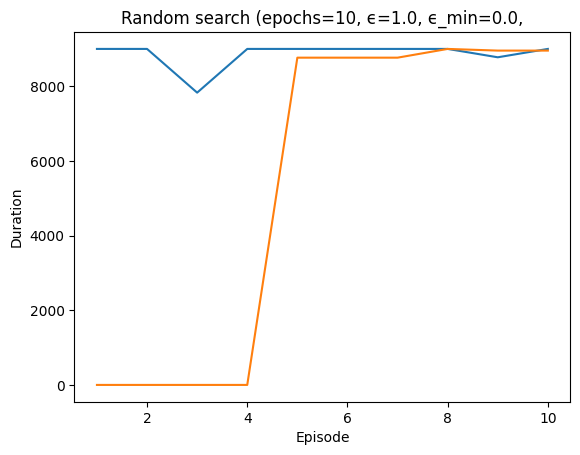

In [14]:
random_run = learner.epsilon_greedy_search(
    cyberbattlechain_10,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    title="Random search",
)

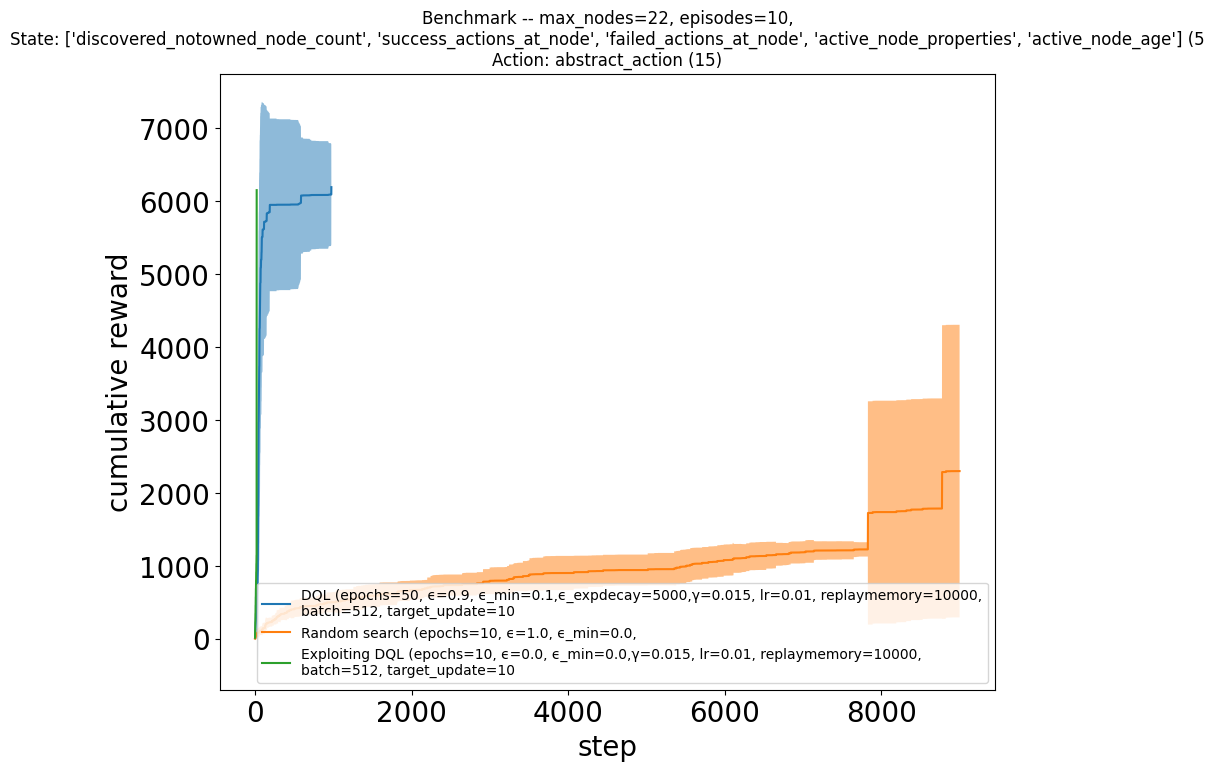

In [15]:
# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=[best_dqn_learning_run_10, random_run, dql_exploit_run],
    title=f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n"
    f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
    f"({len(themodel.state_space.feature_selection)}\n"
    f"Action: abstract_action ({themodel.action_space.flat_size()})",
)

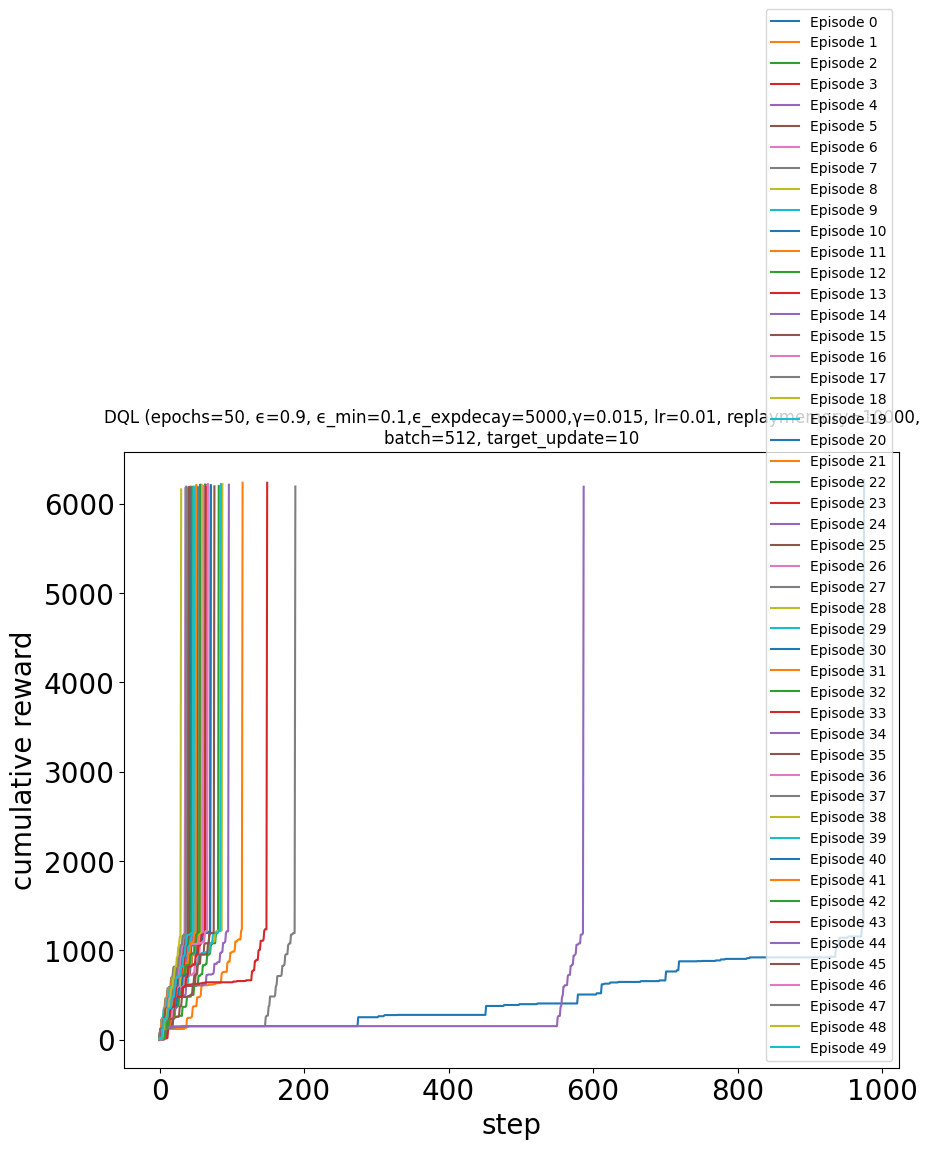

In [16]:
# plot cumulative rewards for all episodes
p.plot_all_episodes(best_dqn_learning_run_10)


##################################################

###### DQL
Learning with: episode_count=50,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5
  ## Episode: 1/50 'DQL' ϵ=0.9000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning:

WARN: The obs returned by the `reset()` method is not within the observation space.

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:140: UserWarning:

WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'tuple'>

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning:

WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'numpy.int32'>

Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning:

WARN: The obs returned by the `step()` method is not within the observation space.

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:140: UserWarning:

WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'tuple'>

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning:

WARN: The obs returned by the `step()` method should be an int or np.int64, actual type: <class 'numpy.int32'>

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:   18.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning:

WARN: env.is_action_valid to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_action_valid` for environment variables or `env.get_wrapper_attr('is_action_valid')` that will search the reminding wrappers.

Episode 1|Iteration 20|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:  118.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  120.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  120.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 61|reward:  131.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 61|reward:  131.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 1|Iteration 62|reward:  137.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 1|Iteration 62|reward:  137.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 1|Iteration 79|reward:  145.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 1|Iteration 79|reward:  145.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 1|Iteration 82|reward:  154.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 1|Iteration 82|reward:  154.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:  154.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 180|reward:  154.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 184|reward:  254.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 184|reward:  254.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 1|Iteration 204|reward:  268.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 1|Iteration 204|reward:  268.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 1|Iteration 217|reward:  270.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 1|Iteration 217|reward:  270.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 1|Iteration 234|reward:  274.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 1|Iteration 234|reward:  274.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:  280.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:  280.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 1|Iteration 255|reward:  280.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 1|Iteration 263|reward:  280.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 1|Iteration 270|reward:  280.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 1|Iteration 278|reward:  280.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 1|Iteration 286|reward:  280.0|last_reward_at:  247|Elapsed Time: 0:00:00||

Episode 1|Iteration 292|reward:  380.0|last_reward_at:  247|Elapsed Time: 0:00:01||

Episode 1|Iteration 292|reward:  380.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 1|Iteration 297|reward:  380.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 1|Iteration 298|reward:  391.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 1|Iteration 298|reward:  391.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 1|Iteration 302|reward:  391.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 1|Iteration 305|reward:  397.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 1|Iteration 305|reward:  397.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 1|Iteration 313|reward:  397.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 1|Iteration 319|reward:  405.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 1|Iteration 319|reward:  405.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 1|Iteration 321|reward:  414.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 1|Iteration 321|reward:  414.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 1|Iteration 330|reward:  414.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 1|Iteration 339|reward:  414.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 1|Iteration 347|reward:  414.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 1|Iteration 354|reward:  514.0|last_reward_at:  321|Elapsed Time: 0:00:02||

Episode 1|Iteration 354|reward:  514.0|last_reward_at:  354|Elapsed Time: 0:00:02||

Episode 1|Iteration 360|reward:  528.0|last_reward_at:  354|Elapsed Time: 0:00:02||

Episode 1|Iteration 360|reward:  528.0|last_reward_at:  360|Elapsed Time: 0:00:02||

Episode 1|Iteration 365|reward: 5528.0|last_reward_at:  360|Elapsed Time: 0:00:02||

Episode 1|Iteration 365|reward: 5528.0|last_reward_at:  365|Elapsed Time: 0:00:02||

  Episode 1 ended at t=365 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/66 (0.07)
    explore-remote: 7/109 (0.06)
    explore-connect: 3/118 (0.02)
    exploit-local: 3/42 (0.07)
    exploit-remote: 1/4 (0.20)
    exploit-connect: 2/5 (0.29)
  exploit deflected to exploration: 3
  ## Episode: 2/50 'DQL' ϵ=0.8438, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  116.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  118.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  118.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  132.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward:  132.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  138.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  138.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:  138.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  146.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  146.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  146.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 59|reward:  146.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  146.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 73|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 73|reward:  152.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 2|Iteration 82|reward:  152.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 2|Iteration 84|reward:  252.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 2|Iteration 84|reward:  252.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 2|Iteration 92|reward:  266.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 2|Iteration 92|reward:  266.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 2|Iteration 101|reward:  272.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 2|Iteration 101|reward:  272.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 2|Iteration 105|reward:  274.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 2|Iteration 105|reward:  274.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 2|Iteration 114|reward:  274.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 2|Iteration 122|reward:  274.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 2|Iteration 131|reward:  274.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 2|Iteration 132|reward:  374.0|last_reward_at:  105|Elapsed Time: 0:00:01||

Episode 2|Iteration 132|reward:  374.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 2|Iteration 135|reward:  388.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 2|Iteration 135|reward:  388.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 2|Iteration 143|reward:  388.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 2|Iteration 144|reward:  488.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 2|Iteration 144|reward:  488.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 2|Iteration 145|reward:  494.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 2|Iteration 145|reward:  494.0|last_reward_at:  145|Elapsed Time: 0:00:01||

Episode 2|Iteration 150|reward:  496.0|last_reward_at:  145|Elapsed Time: 0:00:02||

Episode 2|Iteration 150|reward:  496.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 2|Iteration 156|reward:  502.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 2|Iteration 156|reward:  502.0|last_reward_at:  156|Elapsed Time: 0:00:02||

Episode 2|Iteration 158|reward:  516.0|last_reward_at:  156|Elapsed Time: 0:00:02||

Episode 2|Iteration 158|reward:  516.0|last_reward_at:  158|Elapsed Time: 0:00:02||

Episode 2|Iteration 162|reward:  522.0|last_reward_at:  158|Elapsed Time: 0:00:02||

Episode 2|Iteration 162|reward:  522.0|last_reward_at:  162|Elapsed Time: 0:00:02||

Episode 2|Iteration 165|reward:  528.0|last_reward_at:  162|Elapsed Time: 0:00:02||

Episode 2|Iteration 165|reward:  528.0|last_reward_at:  165|Elapsed Time: 0:00:02||

Episode 2|Iteration 173|reward:  528.0|last_reward_at:  165|Elapsed Time: 0:00:02||

Episode 2|Iteration 181|reward:  528.0|last_reward_at:  165|Elapsed Time: 0:00:02||

Episode 2|Iteration 189|reward: 5528.0|last_reward_at:  165|Elapsed Time: 0:00:02||

Episode 2|Iteration 189|reward: 5528.0|last_reward_at:  189|Elapsed Time: 0:00:02||

  Episode 2 ended at t=189 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/29 (0.12)
    explore-remote: 8/58 (0.12)
    explore-connect: 2/61 (0.03)
    exploit-local: 5/7 (0.42)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/12 (0.20)
  exploit deflected to exploration: 5
  ## Episode: 3/50 'DQL' ϵ=0.8162, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  116.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  130.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  130.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  138.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  138.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  144.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  144.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  146.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  146.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  152.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  252.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:  252.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:  266.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:  266.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  272.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:  272.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  372.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  372.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  374.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  374.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  385.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  385.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  394.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  394.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  400.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  400.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:  408.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:  408.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:  410.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 3|Iteration 72|reward:  410.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 3|Iteration 77|reward:  510.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 3|Iteration 77|reward:  510.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 3|Iteration 81|reward:  521.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 3|Iteration 81|reward:  521.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 3|Iteration 82|reward:  530.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 3|Iteration 82|reward:  530.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 3|Iteration 90|reward:  530.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 3|Iteration 95|reward: 5530.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 3|Iteration 95|reward: 5530.0|last_reward_at:   95|Elapsed Time: 0:00:01||

  Episode 3 ended at t=95 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/19 (0.24)
    explore-remote: 7/23 (0.23)
    explore-connect: 1/25 (0.04)
    exploit-local: 3/3 (0.50)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 4/3 (0.57)
  exploit deflected to exploration: 1
  ## Episode: 4/50 'DQL' ϵ=0.8028, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   20.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  120.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  131.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  131.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  140.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:  140.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  240.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:  240.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  254.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward:  254.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  258.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  258.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  358.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 48|reward:  358.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 49|reward:  372.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 4|Iteration 49|reward:  372.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward:  374.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward:  374.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:  474.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:  474.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:  480.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:  480.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 58|reward:  494.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 58|reward:  494.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 4|Iteration 60|reward:  500.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 4|Iteration 60|reward:  500.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward: 5500.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 4|Iteration 64|reward: 5500.0|last_reward_at:   64|Elapsed Time: 0:00:00||

  Episode 4 ended at t=64 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/10 (0.17)
    explore-remote: 5/12 (0.29)
    explore-connect: 1/20 (0.05)
    exploit-local: 5/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/5 (0.44)
  exploit deflected to exploration: 0
  ## Episode: 5/50 'DQL' ϵ=0.7938, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  125.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  131.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  131.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  133.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  133.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  135.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  135.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  144.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  144.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  244.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  244.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  258.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  258.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  358.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  358.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  369.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  369.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  378.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  378.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  380.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  380.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  388.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:  388.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  488.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  488.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 48|reward:  499.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 48|reward:  499.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  499.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 5|Iteration 57|reward:  499.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 5|Iteration 57|reward:  508.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 5|Iteration 57|reward:  508.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 5|Iteration 58|reward: 5508.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 5|Iteration 58|reward: 5508.0|last_reward_at:   58|Elapsed Time: 0:00:00||

  Episode 5 ended at t=58 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/10 (0.00)
    explore-remote: 5/10 (0.33)
    explore-connect: 0/18 (0.00)
    exploit-local: 8/1 (0.89)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 5
  ## Episode: 6/50 'DQL' ϵ=0.7858, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  118.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  129.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  129.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward:  138.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward:  138.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:  146.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:  146.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward:  146.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 41|reward:  246.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 41|reward:  246.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 6|Iteration 45|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 6|Iteration 45|reward:  252.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 6|Iteration 54|reward:  266.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 6|Iteration 54|reward:  266.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 6|Iteration 57|reward:  272.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 6|Iteration 57|reward:  272.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 6|Iteration 59|reward:  274.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 6|Iteration 59|reward:  274.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 6|Iteration 60|reward:  374.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 6|Iteration 60|reward:  374.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 6|Iteration 62|reward:  388.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 6|Iteration 62|reward:  388.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 6|Iteration 64|reward:  488.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 6|Iteration 64|reward:  488.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 6|Iteration 66|reward:  494.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 6|Iteration 66|reward:  494.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 6|Iteration 70|reward:  496.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 6|Iteration 70|reward:  496.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 6|Iteration 74|reward:  498.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 6|Iteration 74|reward:  498.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 6|Iteration 76|reward:  512.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 6|Iteration 76|reward:  512.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 6|Iteration 83|reward:  512.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 6|Iteration 91|reward:  512.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 6|Iteration 92|reward:  518.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 6|Iteration 92|reward:  518.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 6|Iteration 100|reward:  518.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 6|Iteration 104|reward:  524.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 6|Iteration 104|reward:  524.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 6|Iteration 112|reward:  524.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 6|Iteration 120|reward: 5524.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 6|Iteration 120|reward: 5524.0|last_reward_at:  120|Elapsed Time: 0:00:01||

  Episode 6 ended at t=120 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/23 (0.15)
    explore-remote: 7/28 (0.20)
    explore-connect: 1/38 (0.03)
    exploit-local: 5/2 (0.71)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/8 (0.33)
  exploit deflected to exploration: 0
  ## Episode: 7/50 'DQL' ϵ=0.7696, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  125.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  125.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  131.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  131.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  140.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  140.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:  148.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:  148.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:  150.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:  150.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  152.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 41|reward:  152.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:  252.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:  252.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 7|Iteration 47|reward:  266.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 7|Iteration 47|reward:  266.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  272.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  272.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 51|reward:  372.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 51|reward:  372.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 7|Iteration 56|reward:  386.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 7|Iteration 56|reward:  386.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 7|Iteration 61|reward:  486.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 7|Iteration 61|reward:  486.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 7|Iteration 63|reward:  497.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 7|Iteration 63|reward:  497.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 7|Iteration 66|reward:  506.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 7|Iteration 66|reward:  506.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 7|Iteration 68|reward:  512.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 7|Iteration 68|reward:  512.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 7|Iteration 72|reward:  514.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 7|Iteration 72|reward:  514.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 7|Iteration 75|reward:  520.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 7|Iteration 75|reward:  520.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 7|Iteration 83|reward:  520.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 7|Iteration 86|reward: 5520.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 7|Iteration 86|reward: 5520.0|last_reward_at:   86|Elapsed Time: 0:00:01||

  Episode 7 ended at t=86 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/15 (0.17)
    explore-remote: 6/21 (0.22)
    explore-connect: 1/20 (0.05)
    exploit-local: 6/7 (0.46)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/3 (0.57)
  exploit deflected to exploration: 1
  ## Episode: 8/50 'DQL' ϵ=0.7581, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  242.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  248.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  348.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  348.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  350.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  350.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:  356.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:  356.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  358.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward:  358.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  372.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  372.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:  378.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:  378.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:  384.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:  384.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:  386.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:  386.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:  386.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 40|reward:  486.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 40|reward:  486.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 41|reward:  500.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 41|reward:  500.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 8|Iteration 50|reward:  500.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 8|Iteration 57|reward: 5500.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 8|Iteration 57|reward: 5500.0|last_reward_at:   57|Elapsed Time: 0:00:00||

  Episode 8 ended at t=57 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/16 (0.16)
    explore-remote: 6/13 (0.32)
    explore-connect: 0/11 (0.00)
    exploit-local: 3/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 9/50 'DQL' ϵ=0.7507, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  114.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  128.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  128.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  228.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  228.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  234.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  234.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:  248.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:  248.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  250.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  250.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  350.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  350.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward:  352.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward:  352.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward:  358.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward:  358.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  372.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  372.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  374.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:  374.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward:  380.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward:  380.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 9|Iteration 45|reward:  480.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 9|Iteration 45|reward:  480.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 9|Iteration 52|reward:  494.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 9|Iteration 52|reward:  494.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 9|Iteration 55|reward:  500.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 9|Iteration 55|reward:  500.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 9|Iteration 59|reward:  506.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 9|Iteration 59|reward:  506.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 9|Iteration 65|reward:  506.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 9|Iteration 70|reward:  512.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 9|Iteration 70|reward:  512.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 9|Iteration 74|reward: 5512.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 9|Iteration 74|reward: 5512.0|last_reward_at:   74|Elapsed Time: 0:00:01||

  Episode 9 ended at t=74 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/10 (0.23)
    explore-remote: 6/22 (0.21)
    explore-connect: 0/20 (0.00)
    exploit-local: 5/3 (0.62)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 10/50 'DQL' ϵ=0.7411, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:   16.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  130.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  130.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  230.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  230.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  244.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  244.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 20|reward:  250.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 20|reward:  250.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:  256.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:  256.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:  256.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward:  356.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward:  356.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward:  370.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward:  370.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 45|reward:  470.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 45|reward:  470.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 10|Iteration 48|reward:  472.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 10|Iteration 48|reward:  472.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 10|Iteration 49|reward:  478.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 10|Iteration 49|reward:  478.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 53|reward:  484.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 53|reward:  484.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 10|Iteration 54|reward:  498.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 10|Iteration 54|reward:  498.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 10|Iteration 62|reward:  504.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 10|Iteration 62|reward:  504.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 10|Iteration 69|reward:  504.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 10|Iteration 73|reward: 5504.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 10|Iteration 73|reward: 5504.0|last_reward_at:   73|Elapsed Time: 0:00:01||

  Episode 10 ended at t=73 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/19 (0.10)
    explore-remote: 5/18 (0.22)
    explore-connect: 0/17 (0.00)
    exploit-local: 5/2 (0.71)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 11/50 'DQL' ϵ=0.7318, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 9|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 9|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 11|Iteration 10|reward:  132.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 11|Iteration 10|reward:  132.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 11|Iteration 15|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 11|Iteration 15|reward:  134.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 11|Iteration 16|reward:  234.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 11|Iteration 16|reward:  234.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 11|Iteration 17|reward:  245.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 11|Iteration 17|reward:  245.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 11|Iteration 24|reward:  254.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 11|Iteration 24|reward:  254.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 11|Iteration 27|reward:  260.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 11|Iteration 27|reward:  260.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 11|Iteration 29|reward:  264.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 11|Iteration 29|reward:  264.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 11|Iteration 31|reward:  364.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 11|Iteration 31|reward:  364.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward:  378.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward:  378.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 33|reward:  384.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 33|reward:  384.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 11|Iteration 34|reward:  484.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 11|Iteration 34|reward:  484.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 11|Iteration 35|reward:  498.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 11|Iteration 35|reward:  498.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 11|Iteration 38|reward:  504.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 11|Iteration 38|reward:  504.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 11|Iteration 39|reward: 5504.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 11|Iteration 39|reward: 5504.0|last_reward_at:   39|Elapsed Time: 0:00:00||

  Episode 11 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/6 (0.33)
    explore-remote: 4/7 (0.36)
    explore-connect: 0/8 (0.00)
    exploit-local: 5/1 (0.83)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 2
  ## Episode: 12/50 'DQL' ϵ=0.7269, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 12|Iteration 6|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 12|Iteration 6|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 12|Iteration 13|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 12|Iteration 13|reward:  116.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 12|Iteration 14|reward:  130.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 12|Iteration 14|reward:  130.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 12|Iteration 16|reward:  230.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 12|Iteration 16|reward:  230.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 18|reward:  244.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 18|reward:  244.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 12|Iteration 19|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 12|Iteration 19|reward:  246.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 12|Iteration 21|reward:  252.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 12|Iteration 21|reward:  252.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 12|Iteration 22|reward:  258.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 12|Iteration 22|reward:  258.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 12|Iteration 24|reward:  358.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 12|Iteration 24|reward:  358.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 12|Iteration 25|reward:  372.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 12|Iteration 25|reward:  372.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 12|Iteration 29|reward:  380.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 12|Iteration 29|reward:  380.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 12|Iteration 32|reward:  480.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 12|Iteration 32|reward:  480.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 12|Iteration 33|reward:  494.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 12|Iteration 33|reward:  494.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 12|Iteration 37|reward:  500.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 12|Iteration 37|reward:  500.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 12|Iteration 39|reward:  506.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 12|Iteration 39|reward:  506.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 12|Iteration 42|reward: 5506.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 12|Iteration 42|reward: 5506.0|last_reward_at:   42|Elapsed Time: 0:00:00||

  Episode 12 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/8 (0.33)
    explore-remote: 4/11 (0.27)
    explore-connect: 0/6 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 13/50 'DQL' ϵ=0.7217, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 13|Iteration 7|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 13|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 13|Iteration 9|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 13|Iteration 9|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 13|Iteration 10|reward:  130.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 13|Iteration 10|reward:  130.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 13|Iteration 11|reward:  136.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 13|Iteration 11|reward:  136.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 13|Iteration 12|reward:  236.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 13|Iteration 12|reward:  236.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 13|Iteration 18|reward:  247.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 13|Iteration 18|reward:  247.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 19|reward:  256.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 13|Iteration 19|reward:  256.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 13|Iteration 21|reward:  356.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 13|Iteration 21|reward:  356.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 13|Iteration 23|reward:  370.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 13|Iteration 23|reward:  370.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 13|Iteration 24|reward:  470.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 13|Iteration 24|reward:  470.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 13|Iteration 25|reward:  484.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 13|Iteration 25|reward:  484.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 13|Iteration 27|reward:  490.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 13|Iteration 27|reward:  490.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 13|Iteration 28|reward:  492.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 13|Iteration 28|reward:  492.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 13|Iteration 29|reward:  498.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 13|Iteration 29|reward:  498.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 13|Iteration 30|reward: 5498.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 13|Iteration 30|reward: 5498.0|last_reward_at:   30|Elapsed Time: 0:00:00||

  Episode 13 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/3 (0.62)
    explore-remote: 2/5 (0.29)
    explore-connect: 0/6 (0.00)
    exploit-local: 4/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 14/50 'DQL' ϵ=0.7180, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 14|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 14|Iteration 8|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 14|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 14|Iteration 9|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 14|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 14|Iteration 11|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 14|Iteration 11|reward:  236.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 14|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 14|reward:  250.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 14|Iteration 16|reward:  256.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 14|Iteration 16|reward:  256.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 14|Iteration 20|reward:  258.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 14|Iteration 20|reward:  258.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 14|Iteration 22|reward:  358.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 14|Iteration 22|reward:  358.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 14|Iteration 24|reward:  372.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 14|Iteration 24|reward:  372.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 14|Iteration 25|reward:  472.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 14|Iteration 25|reward:  472.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 14|Iteration 28|reward:  486.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 14|Iteration 28|reward:  486.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 14|Iteration 29|reward:  492.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 14|Iteration 29|reward:  492.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 14|Iteration 30|reward: 5492.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 14|Iteration 30|reward: 5492.0|last_reward_at:   30|Elapsed Time: 0:00:00||

  Episode 14 ended at t=30 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 3/6 (0.33)
    explore-connect: 0/6 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 15/50 'DQL' ϵ=0.7143, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 15|Iteration 7|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 15|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 15|Iteration 8|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 15|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 15|Iteration 9|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 15|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 11|reward:  239.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 11|reward:  239.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 15|Iteration 12|reward:  241.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 15|Iteration 12|reward:  241.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 15|Iteration 13|reward:  250.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 15|Iteration 13|reward:  250.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 15|Iteration 14|reward:  256.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 15|Iteration 14|reward:  256.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 15|Iteration 15|reward:  356.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 15|Iteration 15|reward:  356.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 15|Iteration 16|reward:  362.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 15|Iteration 16|reward:  362.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 15|Iteration 19|reward:  368.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 15|Iteration 19|reward:  368.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 15|Iteration 25|reward:  370.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 15|Iteration 25|reward:  370.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 15|Iteration 32|reward:  384.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 15|Iteration 32|reward:  384.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 15|Iteration 34|reward:  386.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 15|Iteration 34|reward:  386.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 15|Iteration 38|reward:  486.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 15|Iteration 38|reward:  486.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 15|Iteration 40|reward:  497.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 15|Iteration 40|reward:  497.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 15|Iteration 47|reward:  499.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 15|Iteration 47|reward:  499.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 15|Iteration 51|reward:  508.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 15|Iteration 51|reward:  508.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 15|Iteration 59|reward:  508.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 15|Iteration 67|reward:  508.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 15|Iteration 75|reward:  508.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 15|Iteration 80|reward: 5508.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 15|Iteration 80|reward: 5508.0|last_reward_at:   80|Elapsed Time: 0:00:01||

  Episode 15 ended at t=80 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 6/25 (0.19)
    explore-connect: 1/24 (0.04)
    exploit-local: 6/6 (0.50)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/1 (0.80)
  exploit deflected to exploration: 1
  ## Episode: 16/50 'DQL' ϵ=0.7045, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 9|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 9|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 16|Iteration 10|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 16|Iteration 10|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 12|reward:  130.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 16|Iteration 12|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 16|Iteration 14|reward:  230.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 16|Iteration 14|reward:  230.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 16|Iteration 15|reward:  236.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 16|Iteration 15|reward:  236.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 16|Iteration 17|reward:  242.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 16|Iteration 17|reward:  242.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 16|Iteration 19|reward:  248.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 16|Iteration 19|reward:  248.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 16|Iteration 21|reward:  259.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 16|Iteration 21|reward:  259.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 16|Iteration 22|reward:  263.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 16|Iteration 22|reward:  263.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 16|Iteration 25|reward:  272.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 16|Iteration 25|reward:  272.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 16|Iteration 33|reward:  272.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 16|Iteration 37|reward:  274.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 16|Iteration 37|reward:  274.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 16|Iteration 45|reward:  274.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 16|Iteration 53|reward:  274.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 16|Iteration 60|reward:  276.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 16|Iteration 60|reward:  276.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 16|Iteration 68|reward:  276.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 16|Iteration 70|reward:  376.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 16|Iteration 70|reward:  376.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 16|Iteration 72|reward:  390.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 16|Iteration 72|reward:  390.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 16|Iteration 73|reward:  398.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 16|Iteration 73|reward:  398.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 16|Iteration 74|reward:  498.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 16|Iteration 74|reward:  498.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 16|Iteration 77|reward:  504.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 16|Iteration 77|reward:  504.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 16|Iteration 82|reward:  518.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 16|Iteration 82|reward:  518.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 16|Iteration 88|reward: 5518.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 16|Iteration 88|reward: 5518.0|last_reward_at:   88|Elapsed Time: 0:00:01||

  Episode 16 ended at t=88 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/7 (0.42)
    explore-remote: 5/32 (0.14)
    explore-connect: 2/19 (0.10)
    exploit-local: 3/1 (0.75)
    exploit-remote: 2/4 (0.33)
    exploit-connect: 3/5 (0.38)
  exploit deflected to exploration: 2
  ## Episode: 17/50 'DQL' ϵ=0.6940, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 7|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 17|Iteration 9|reward:  136.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 17|Iteration 9|reward:  136.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  138.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 17|Iteration 10|reward:  138.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 13|reward:  144.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 17|Iteration 13|reward:  144.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 17|Iteration 18|reward:  146.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 17|Iteration 18|reward:  146.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 17|Iteration 27|reward:  146.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 17|Iteration 32|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 17|Iteration 32|reward:  246.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 17|Iteration 41|reward:  246.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 17|Iteration 48|reward:  246.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 17|Iteration 49|reward:  252.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 17|Iteration 49|reward:  252.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 17|Iteration 57|reward:  252.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 17|Iteration 65|reward:  252.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 17|Iteration 70|reward:  266.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 17|Iteration 70|reward:  266.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 17|Iteration 77|reward:  366.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 17|Iteration 77|reward:  366.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 17|Iteration 79|reward:  380.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 17|Iteration 79|reward:  380.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 17|Iteration 82|reward:  388.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 17|Iteration 82|reward:  388.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 17|Iteration 86|reward:  488.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 17|Iteration 86|reward:  488.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 17|Iteration 87|reward:  499.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 17|Iteration 87|reward:  499.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 17|Iteration 88|reward:  505.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 17|Iteration 88|reward:  505.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 17|Iteration 90|reward:  507.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 17|Iteration 90|reward:  507.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 17|Iteration 92|reward:  516.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 17|Iteration 92|reward:  516.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 17|Iteration 99|reward: 5516.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 17|Iteration 99|reward: 5516.0|last_reward_at:   99|Elapsed Time: 0:00:01||

  Episode 17 ended at t=99 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/16 (0.11)
    explore-remote: 7/28 (0.20)
    explore-connect: 1/26 (0.04)
    exploit-local: 5/0 (1.00)
    exploit-remote: 0/6 (0.00)
    exploit-connect: 4/4 (0.50)
  exploit deflected to exploration: 3
  ## Episode: 18/50 'DQL' ϵ=0.6823, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 6|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 7|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 18|Iteration 8|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 18|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 18|Iteration 10|reward:  239.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 18|Iteration 10|reward:  239.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 11|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 18|Iteration 11|reward:  248.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 18|Iteration 13|reward:  348.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 18|Iteration 13|reward:  348.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 18|Iteration 16|reward:  362.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 18|Iteration 16|reward:  362.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 18|Iteration 18|reward:  364.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 18|Iteration 18|reward:  364.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 18|Iteration 22|reward:  372.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 18|Iteration 22|reward:  372.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 18|Iteration 23|reward:  374.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 18|Iteration 23|reward:  374.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 18|Iteration 27|reward:  380.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 18|Iteration 27|reward:  380.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 18|Iteration 31|reward:  382.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 18|Iteration 31|reward:  382.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 18|Iteration 39|reward:  382.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 18|Iteration 42|reward:  482.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 18|Iteration 42|reward:  482.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 18|Iteration 46|reward:  496.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 18|Iteration 46|reward:  496.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 18|Iteration 50|reward:  498.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 18|Iteration 50|reward:  498.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 18|Iteration 55|reward:  504.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 18|Iteration 55|reward:  504.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 18|Iteration 56|reward: 5504.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 18|Iteration 56|reward: 5504.0|last_reward_at:   56|Elapsed Time: 0:00:00||

  Episode 18 ended at t=56 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 5/12 (0.29)
    explore-connect: 0/22 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/2 (0.71)
  exploit deflected to exploration: 0
  ## Episode: 19/50 'DQL' ϵ=0.6758, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 19|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 19|Iteration 8|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 19|Iteration 8|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 19|Iteration 11|reward:  252.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 19|Iteration 11|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 19|Iteration 12|reward:  352.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 19|Iteration 12|reward:  352.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 19|Iteration 14|reward:  366.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 19|Iteration 14|reward:  366.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 15|reward:  372.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 19|Iteration 15|reward:  372.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 19|Iteration 24|reward:  372.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 19|Iteration 27|reward:  472.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 19|Iteration 27|reward:  472.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 19|Iteration 29|reward:  486.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 19|Iteration 29|reward:  486.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 19|Iteration 30|reward:  492.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 19|Iteration 30|reward:  492.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 19|Iteration 31|reward:  498.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 19|Iteration 31|reward:  498.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 19|Iteration 32|reward:  504.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 19|Iteration 32|reward:  504.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 19|Iteration 33|reward: 5504.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 19|Iteration 33|reward: 5504.0|last_reward_at:   33|Elapsed Time: 0:00:00||

  Episode 19 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 3/4 (0.43)
    explore-connect: 0/5 (0.00)
    exploit-local: 6/1 (0.86)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/4 (0.56)
  exploit deflected to exploration: 0
  ## Episode: 20/50 'DQL' ϵ=0.6720, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 5|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 20|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 8|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 20|Iteration 8|reward:  130.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 20|Iteration 12|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 20|Iteration 12|reward:  230.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 20|Iteration 13|reward:  232.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 20|Iteration 13|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 20|Iteration 15|reward:  243.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 20|Iteration 15|reward:  243.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:  252.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:  252.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 18|reward:  254.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 18|reward:  254.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 20|Iteration 23|reward:  354.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 20|Iteration 23|reward:  354.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 32|reward:  354.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 33|reward:  368.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 20|Iteration 33|reward:  368.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 20|Iteration 37|reward:  468.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 20|Iteration 37|reward:  468.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 40|reward:  482.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 20|Iteration 40|reward:  482.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 20|Iteration 43|reward: 5482.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 20|Iteration 43|reward: 5482.0|last_reward_at:   43|Elapsed Time: 0:00:00||

  Episode 20 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 3/7 (0.30)
    explore-connect: 2/12 (0.14)
    exploit-local: 6/2 (0.75)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 21/50 'DQL' ϵ=0.6671, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 21|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 21|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 21|Iteration 8|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 21|Iteration 8|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 21|Iteration 9|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 21|Iteration 9|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 21|Iteration 10|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 21|Iteration 10|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 21|Iteration 11|reward:  129.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 21|Iteration 11|reward:  129.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 21|Iteration 18|reward:  135.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 21|Iteration 18|reward:  135.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 21|Iteration 20|reward:  143.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 21|Iteration 20|reward:  143.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 21|Iteration 25|reward:  143.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 21|Iteration 27|reward:  152.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 21|Iteration 27|reward:  152.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 21|Iteration 30|reward:  252.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 21|Iteration 30|reward:  252.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 21|Iteration 32|reward:  263.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 21|Iteration 32|reward:  263.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 21|Iteration 33|reward:  272.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 21|Iteration 33|reward:  272.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 21|Iteration 34|reward:  372.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 21|Iteration 34|reward:  372.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 21|Iteration 35|reward:  383.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 21|Iteration 35|reward:  383.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 21|Iteration 36|reward:  391.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 21|Iteration 36|reward:  391.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 21|Iteration 39|reward:  400.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 21|Iteration 39|reward:  400.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 21|Iteration 40|reward:  500.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 21|Iteration 40|reward:  500.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 21|Iteration 41|reward:  514.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 21|Iteration 41|reward:  514.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 21|Iteration 43|reward:  520.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 21|Iteration 43|reward:  520.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 21|Iteration 44|reward: 5520.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 21|Iteration 44|reward: 5520.0|last_reward_at:   44|Elapsed Time: 0:00:00||

  Episode 21 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/3 (0.50)
    explore-remote: 5/10 (0.33)
    explore-connect: 0/10 (0.00)
    exploit-local: 6/2 (0.75)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 7
  ## Episode: 22/50 'DQL' ϵ=0.6622, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 22|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 22|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 22|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 22|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 22|Iteration 4|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 22|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 22|Iteration 8|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 22|Iteration 8|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 22|Iteration 12|reward:  136.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 22|Iteration 12|reward:  136.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 22|Iteration 14|reward:  236.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 22|Iteration 14|reward:  236.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 22|Iteration 17|reward:  250.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 22|Iteration 17|reward:  250.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 22|Iteration 19|reward:  256.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 22|Iteration 19|reward:  256.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 22|Iteration 20|reward:  356.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 22|Iteration 20|reward:  356.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 22|Iteration 22|reward:  367.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 22|Iteration 22|reward:  367.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 22|Iteration 27|reward:  369.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 22|Iteration 27|reward:  369.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 22|Iteration 30|reward:  378.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 22|Iteration 30|reward:  378.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 22|Iteration 31|reward:  478.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 22|Iteration 31|reward:  478.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 22|Iteration 32|reward:  492.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 22|Iteration 32|reward:  492.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 22|Iteration 38|reward:  498.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 22|Iteration 38|reward:  498.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 22|Iteration 42|reward:  504.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 22|Iteration 42|reward:  504.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 22|Iteration 43|reward: 5504.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 22|Iteration 43|reward: 5504.0|last_reward_at:   43|Elapsed Time: 0:00:00||

  Episode 22 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 3/6 (0.33)
    explore-connect: 0/10 (0.00)
    exploit-local: 8/4 (0.67)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 23/50 'DQL' ϵ=0.6574, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 23|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 8|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 23|Iteration 8|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 23|Iteration 9|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 23|Iteration 9|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 23|Iteration 10|reward:  125.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 23|Iteration 10|reward:  125.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 23|Iteration 14|reward:  134.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 23|Iteration 14|reward:  134.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 23|Iteration 20|reward:  234.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 23|Iteration 20|reward:  234.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 23|Iteration 22|reward:  245.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 23|Iteration 22|reward:  245.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 23|Iteration 23|reward:  254.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 23|Iteration 23|reward:  254.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 23|Iteration 24|reward:  354.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 23|Iteration 24|reward:  354.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 23|Iteration 26|reward:  360.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 23|Iteration 26|reward:  360.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 23|Iteration 29|reward:  371.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 23|Iteration 29|reward:  371.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 23|Iteration 34|reward:  380.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 23|Iteration 34|reward:  380.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 23|Iteration 35|reward:  480.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 23|Iteration 35|reward:  480.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 23|Iteration 36|reward:  491.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 23|Iteration 36|reward:  491.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 23|Iteration 37|reward:  500.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 23|Iteration 37|reward:  500.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 23|Iteration 38|reward:  502.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 23|Iteration 38|reward:  502.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 23|Iteration 41|reward:  504.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 23|Iteration 41|reward:  504.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 23|Iteration 46|reward: 5504.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 23|Iteration 46|reward: 5504.0|last_reward_at:   46|Elapsed Time: 0:00:00||

  Episode 23 ended at t=46 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/6 (0.33)
    explore-remote: 3/10 (0.23)
    explore-connect: 0/12 (0.00)
    exploit-local: 6/1 (0.86)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 2
  ## Episode: 24/50 'DQL' ϵ=0.6523, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 24|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 24|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 24|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 24|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 24|Iteration 4|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 24|Iteration 4|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 24|Iteration 6|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 24|Iteration 6|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 24|Iteration 8|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 24|Iteration 8|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 24|Iteration 9|reward:  140.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 24|Iteration 9|reward:  140.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 24|Iteration 11|reward:  240.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 24|Iteration 11|reward:  240.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 24|Iteration 14|reward:  254.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 24|Iteration 14|reward:  254.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 24|Iteration 17|reward:  258.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 24|Iteration 17|reward:  258.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 24|Iteration 20|reward:  358.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 24|Iteration 20|reward:  358.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 24|Iteration 23|reward:  369.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 24|Iteration 23|reward:  369.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 24|Iteration 27|reward:  377.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 24|Iteration 27|reward:  377.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 24|Iteration 31|reward:  377.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 24|Iteration 35|reward:  386.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 24|Iteration 35|reward:  386.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 24|Iteration 36|reward:  388.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 24|Iteration 36|reward:  388.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 24|Iteration 43|reward:  388.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 24|Iteration 47|reward:  388.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 24|Iteration 53|reward:  388.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 24|Iteration 57|reward:  388.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 24|Iteration 65|reward:  388.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 24|Iteration 73|reward:  388.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 24|Iteration 81|reward:  388.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 24|Iteration 89|reward:  388.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 24|Iteration 93|reward:  394.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 24|Iteration 93|reward:  394.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 24|Iteration 97|reward:  400.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 24|Iteration 97|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 24|Iteration 101|reward:  406.0|last_reward_at:   97|Elapsed Time: 0:00:01||

Episode 24|Iteration 101|reward:  406.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 24|Iteration 107|reward:  406.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 24|Iteration 113|reward:  406.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 24|Iteration 118|reward:  506.0|last_reward_at:  101|Elapsed Time: 0:00:01||

Episode 24|Iteration 118|reward:  506.0|last_reward_at:  118|Elapsed Time: 0:00:01||

Episode 24|Iteration 119|reward:  517.0|last_reward_at:  118|Elapsed Time: 0:00:02||

Episode 24|Iteration 119|reward:  517.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 24|Iteration 120|reward:  526.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 24|Iteration 120|reward:  526.0|last_reward_at:  120|Elapsed Time: 0:00:02||

Episode 24|Iteration 128|reward:  526.0|last_reward_at:  120|Elapsed Time: 0:00:02||

Episode 24|Iteration 131|reward: 5526.0|last_reward_at:  120|Elapsed Time: 0:00:02||

Episode 24|Iteration 131|reward: 5526.0|last_reward_at:  131|Elapsed Time: 0:00:02||

  Episode 24 ended at t=131 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/19 (0.10)
    explore-remote: 8/28 (0.22)
    explore-connect: 0/28 (0.00)
    exploit-local: 6/33 (0.15)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/2 (0.71)
  exploit deflected to exploration: 0
  ## Episode: 25/50 'DQL' ϵ=0.6380, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 25|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 25|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 25|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 25|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 25|Iteration 4|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 25|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 25|Iteration 7|reward:  133.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 25|Iteration 7|reward:  133.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 25|Iteration 8|reward:  139.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 25|Iteration 8|reward:  139.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 25|Iteration 13|reward:  148.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 25|Iteration 13|reward:  148.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 25|Iteration 15|reward:  248.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 25|Iteration 15|reward:  248.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 25|Iteration 19|reward:  259.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 25|Iteration 19|reward:  259.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 25|Iteration 21|reward:  268.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 25|Iteration 21|reward:  268.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 25|Iteration 25|reward:  368.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 25|Iteration 25|reward:  368.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 25|Iteration 26|reward:  379.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 25|Iteration 26|reward:  379.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 25|Iteration 29|reward:  381.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 25|Iteration 29|reward:  381.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 25|Iteration 31|reward:  389.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 25|Iteration 31|reward:  389.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 25|Iteration 38|reward:  389.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 25|Iteration 43|reward:  398.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 25|Iteration 43|reward:  398.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 25|Iteration 44|reward:  498.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 25|Iteration 44|reward:  498.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 25|Iteration 45|reward:  509.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 25|Iteration 45|reward:  509.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 25|Iteration 49|reward:  518.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 25|Iteration 49|reward:  518.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 25|Iteration 50|reward: 5518.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 25|Iteration 50|reward: 5518.0|last_reward_at:   50|Elapsed Time: 0:00:00||

  Episode 25 ended at t=50 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/3 (0.40)
    explore-remote: 2/11 (0.15)
    explore-connect: 0/14 (0.00)
    exploit-local: 7/2 (0.78)
    exploit-remote: 2/2 (0.50)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 2
  ## Episode: 26/50 'DQL' ϵ=0.6326, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 26|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 26|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 26|Iteration 4|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 26|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 26|Iteration 5|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 26|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 26|Iteration 7|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 26|Iteration 7|reward:  132.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 26|Iteration 9|reward:  232.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 26|Iteration 9|reward:  232.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 26|Iteration 11|reward:  246.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 26|Iteration 11|reward:  246.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 26|Iteration 15|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 26|Iteration 15|reward:  252.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 26|Iteration 16|reward:  258.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 26|Iteration 16|reward:  258.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 26|Iteration 17|reward:  358.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 26|Iteration 17|reward:  358.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 26|Iteration 18|reward:  372.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 26|Iteration 18|reward:  372.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 26|Iteration 19|reward:  472.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 26|Iteration 19|reward:  472.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 26|Iteration 20|reward:  486.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 26|Iteration 20|reward:  486.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 26|Iteration 21|reward:  492.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 26|Iteration 21|reward:  492.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 26|Iteration 22|reward: 5492.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 26|Iteration 22|reward: 5492.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 26 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 2/2 (0.50)
    explore-connect: 0/6 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 27/50 'DQL' ϵ=0.6303, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 27|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 27|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 27|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 27|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 27|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 27|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 27|Iteration 5|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 27|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 27|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 27|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 27|Iteration 7|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 27|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 27|Iteration 8|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 27|Iteration 8|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 27|Iteration 10|reward:  250.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 27|Iteration 10|reward:  250.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 27|Iteration 11|reward:  350.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 27|Iteration 11|reward:  350.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 27|Iteration 12|reward:  356.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 27|Iteration 12|reward:  356.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 27|Iteration 13|reward:  370.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 27|Iteration 13|reward:  370.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 27|Iteration 14|reward:  470.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 27|Iteration 14|reward:  470.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 27|Iteration 16|reward:  481.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 27|Iteration 16|reward:  481.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 27|Iteration 18|reward:  483.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 27|Iteration 18|reward:  483.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 27|Iteration 19|reward:  489.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 27|Iteration 19|reward:  489.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 27|Iteration 20|reward:  495.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 27|Iteration 20|reward:  495.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 27|Iteration 21|reward:  504.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 27|Iteration 21|reward:  504.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 27|Iteration 22|reward: 5504.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 27|Iteration 22|reward: 5504.0|last_reward_at:   22|Elapsed Time: 0:00:00||

  Episode 27 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 5/2 (0.71)
    explore-connect: 0/3 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 28/50 'DQL' ϵ=0.6280, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 28|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 28|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 28|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 28|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 28|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 28|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 28|Iteration 6|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 28|Iteration 6|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 28|Iteration 9|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 28|Iteration 9|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 28|Iteration 10|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 28|Iteration 10|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 28|Iteration 11|reward:  254.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 28|Iteration 11|reward:  254.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 28|Iteration 13|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 28|Iteration 13|reward:  354.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 28|Iteration 15|reward:  368.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 28|Iteration 15|reward:  368.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 28|Iteration 16|reward:  468.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 28|Iteration 16|reward:  468.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 28|Iteration 17|reward:  474.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 28|Iteration 17|reward:  474.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 28|Iteration 18|reward:  485.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 28|Iteration 18|reward:  485.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 28|Iteration 19|reward:  494.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 28|Iteration 19|reward:  494.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 28|Iteration 20|reward: 5494.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 28|Iteration 20|reward: 5494.0|last_reward_at:   20|Elapsed Time: 0:00:00||

  Episode 28 ended at t=20 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/4 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 29/50 'DQL' ϵ=0.6258, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 29|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 29|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 29|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 29|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 29|Iteration 4|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 29|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 29|Iteration 5|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 29|Iteration 5|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 29|Iteration 6|reward:  234.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 29|Iteration 6|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 29|Iteration 9|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 29|Iteration 9|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 29|Iteration 11|reward:  254.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 29|Iteration 11|reward:  254.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 29|Iteration 14|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 29|Iteration 14|reward:  354.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 29|Iteration 16|reward:  368.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 29|Iteration 16|reward:  368.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 29|Iteration 17|reward:  468.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 29|Iteration 17|reward:  468.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 29|Iteration 20|reward:  470.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 29|Iteration 20|reward:  470.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 29|Iteration 23|reward:  484.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 29|Iteration 23|reward:  484.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 29|Iteration 26|reward:  490.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 29|Iteration 26|reward:  490.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 29|Iteration 27|reward:  496.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 29|Iteration 27|reward:  496.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 29|Iteration 28|reward: 5496.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 29|Iteration 28|reward: 5496.0|last_reward_at:   28|Elapsed Time: 0:00:00||

  Episode 29 ended at t=28 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/8 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 30/50 'DQL' ϵ=0.6229, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 30|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 30|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 30|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 30|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 30|Iteration 4|reward:   20.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 30|Iteration 4|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 30|Iteration 6|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 30|Iteration 6|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 30|Iteration 7|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 30|Iteration 7|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 30|Iteration 8|reward:  140.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 30|Iteration 8|reward:  140.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 30|Iteration 9|reward:  240.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 30|Iteration 9|reward:  240.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 30|Iteration 11|reward:  251.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 30|Iteration 11|reward:  251.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 30|Iteration 13|reward:  260.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 30|Iteration 13|reward:  260.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 30|Iteration 17|reward:  360.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 30|Iteration 17|reward:  360.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 30|Iteration 21|reward:  374.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 30|Iteration 21|reward:  374.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 30|Iteration 23|reward:  474.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 30|Iteration 23|reward:  474.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 30|Iteration 24|reward:  476.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 30|Iteration 24|reward:  476.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 30|Iteration 27|reward:  482.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 30|Iteration 27|reward:  482.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 30|Iteration 29|reward:  493.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 30|Iteration 29|reward:  493.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 30|Iteration 34|reward:  493.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 30|Iteration 40|reward:  493.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 30|Iteration 45|reward:  499.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 30|Iteration 45|reward:  499.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 30|Iteration 46|reward:  505.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 30|Iteration 46|reward:  505.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 30|Iteration 53|reward:  505.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 30|Iteration 59|reward:  505.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 30|Iteration 63|reward:  505.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 30|Iteration 68|reward:  507.0|last_reward_at:   46|Elapsed Time: 0:00:01||

Episode 30|Iteration 68|reward:  507.0|last_reward_at:   68|Elapsed Time: 0:00:01||

Episode 30|Iteration 73|reward:  507.0|last_reward_at:   68|Elapsed Time: 0:00:01||

Episode 30|Iteration 77|reward:  516.0|last_reward_at:   68|Elapsed Time: 0:00:01||

Episode 30|Iteration 77|reward:  516.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 30|Iteration 84|reward: 5516.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 30|Iteration 84|reward: 5516.0|last_reward_at:   84|Elapsed Time: 0:00:01||

  Episode 30 ended at t=84 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/10 (0.23)
    explore-remote: 6/15 (0.29)
    explore-connect: 0/19 (0.00)
    exploit-local: 5/4 (0.56)
    exploit-remote: 1/15 (0.06)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 0
  ## Episode: 31/50 'DQL' ϵ=0.6142, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 31|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 31|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 31|Iteration 5|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 31|Iteration 5|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 31|Iteration 6|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 31|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 31|Iteration 7|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 31|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 31|Iteration 10|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 31|Iteration 10|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 31|Iteration 11|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 31|Iteration 11|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 31|Iteration 12|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 31|Iteration 12|reward:  250.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 31|Iteration 13|reward:  350.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 31|Iteration 13|reward:  350.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 31|Iteration 14|reward:  356.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 31|Iteration 14|reward:  356.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 31|Iteration 16|reward:  358.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 31|Iteration 16|reward:  358.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 31|Iteration 18|reward:  360.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 31|Iteration 18|reward:  360.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 31|Iteration 19|reward:  374.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 31|Iteration 19|reward:  374.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 31|Iteration 22|reward:  474.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 31|Iteration 22|reward:  474.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 31|Iteration 23|reward:  485.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 31|Iteration 23|reward:  485.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 31|Iteration 26|reward:  494.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 31|Iteration 26|reward:  494.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 31|Iteration 29|reward:  500.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 31|Iteration 29|reward:  500.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 31|Iteration 36|reward: 5500.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 31|Iteration 36|reward: 5500.0|last_reward_at:   36|Elapsed Time: 0:00:00||

  Episode 31 ended at t=36 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 4/7 (0.36)
    explore-connect: 0/6 (0.00)
    exploit-local: 6/1 (0.86)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 32/50 'DQL' ϵ=0.6105, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 32|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 32|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 32|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 32|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 32|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 32|Iteration 4|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 32|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 32|Iteration 7|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 32|Iteration 7|reward:  127.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 32|Iteration 8|reward:  135.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 32|Iteration 8|reward:  135.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 32|Iteration 9|reward:  144.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 32|Iteration 9|reward:  144.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 32|Iteration 11|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 32|Iteration 11|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 32|Iteration 12|reward:  258.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 32|Iteration 12|reward:  258.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 32|Iteration 13|reward:  264.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 32|Iteration 13|reward:  264.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 32|Iteration 14|reward:  364.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 32|Iteration 14|reward:  364.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 32|Iteration 15|reward:  370.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 32|Iteration 15|reward:  370.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 32|Iteration 17|reward:  384.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 32|Iteration 17|reward:  384.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 32|Iteration 20|reward:  484.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 32|Iteration 20|reward:  484.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 32|Iteration 22|reward:  490.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 32|Iteration 22|reward:  490.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 32|Iteration 26|reward:  504.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 32|Iteration 26|reward:  504.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 32|Iteration 27|reward: 5504.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 32|Iteration 27|reward: 5504.0|last_reward_at:   27|Elapsed Time: 0:00:00||

  Episode 32 ended at t=27 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/6 (0.25)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/2 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/1 (0.83)
  exploit deflected to exploration: 0
  ## Episode: 33/50 'DQL' ϵ=0.6078, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 33|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 33|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 33|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 33|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 33|Iteration 5|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 33|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 33|Iteration 7|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 33|Iteration 7|reward:  132.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 33|Iteration 8|reward:  140.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 33|Iteration 8|reward:  140.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 33|Iteration 11|reward:  240.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 33|Iteration 11|reward:  240.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 33|Iteration 12|reward:  254.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 33|Iteration 12|reward:  254.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 33|Iteration 14|reward:  260.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 33|Iteration 14|reward:  260.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 33|Iteration 19|reward:  360.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 33|Iteration 19|reward:  360.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 33|Iteration 20|reward:  374.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 33|Iteration 20|reward:  374.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 33|Iteration 23|reward:  474.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 33|Iteration 23|reward:  474.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 33|Iteration 24|reward:  488.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 33|Iteration 24|reward:  488.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 33|Iteration 25|reward:  494.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 33|Iteration 25|reward:  494.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 33|Iteration 26|reward: 5494.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 33|Iteration 26|reward: 5494.0|last_reward_at:   26|Elapsed Time: 0:00:00||

  Episode 33 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 2/2 (0.50)
    explore-connect: 0/3 (0.00)
    exploit-local: 6/1 (0.86)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 34/50 'DQL' ϵ=0.6051, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 34|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 34|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 34|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 34|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 34|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 34|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 34|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 34|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 34|Iteration 5|reward:  140.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 34|Iteration 5|reward:  140.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 34|Iteration 8|reward:  148.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 34|Iteration 8|reward:  148.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 34|Iteration 9|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 34|Iteration 9|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 34|Iteration 17|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 34|Iteration 25|reward:  250.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 34|Iteration 25|reward:  250.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 34|Iteration 29|reward:  252.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 34|Iteration 29|reward:  252.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 34|Iteration 38|reward:  252.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 34|Iteration 47|reward:  252.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 34|Iteration 48|reward:  266.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 34|Iteration 48|reward:  266.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 34|Iteration 56|reward:  272.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 34|Iteration 56|reward:  272.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 34|Iteration 59|reward:  274.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 34|Iteration 59|reward:  274.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 34|Iteration 67|reward:  274.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 34|Iteration 76|reward:  278.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 34|Iteration 76|reward:  278.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 34|Iteration 84|reward:  278.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 34|Iteration 92|reward:  278.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 34|Iteration 100|reward:  278.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 34|Iteration 108|reward:  278.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 34|Iteration 114|reward:  278.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 34|Iteration 120|reward:  378.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 34|Iteration 120|reward:  378.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 34|Iteration 122|reward:  392.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 34|Iteration 122|reward:  392.0|last_reward_at:  122|Elapsed Time: 0:00:01||

Episode 34|Iteration 131|reward:  492.0|last_reward_at:  122|Elapsed Time: 0:00:01||

Episode 34|Iteration 131|reward:  492.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 34|Iteration 132|reward:  503.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 34|Iteration 132|reward:  503.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 34|Iteration 135|reward:  512.0|last_reward_at:  132|Elapsed Time: 0:00:01||

Episode 34|Iteration 135|reward:  512.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 34|Iteration 139|reward:  518.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 34|Iteration 139|reward:  518.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 34|Iteration 140|reward: 5518.0|last_reward_at:  139|Elapsed Time: 0:00:01||

Episode 34|Iteration 140|reward: 5518.0|last_reward_at:  140|Elapsed Time: 0:00:01||

  Episode 34 ended at t=140 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/22 (0.15)
    explore-remote: 4/26 (0.13)
    explore-connect: 0/33 (0.00)
    exploit-local: 4/8 (0.33)
    exploit-remote: 3/31 (0.09)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 35/50 'DQL' ϵ=0.5912, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 35|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 35|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 35|Iteration 7|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 35|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 35|Iteration 8|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 35|Iteration 8|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 35|Iteration 9|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 35|Iteration 9|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 35|Iteration 10|reward:  234.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 35|Iteration 10|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 35|Iteration 13|reward:  240.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 35|Iteration 13|reward:  240.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 35|Iteration 14|reward:  254.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 35|Iteration 14|reward:  254.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 35|Iteration 15|reward:  354.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 35|Iteration 15|reward:  354.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 35|Iteration 16|reward:  368.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 35|Iteration 16|reward:  368.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 35|Iteration 17|reward:  374.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 35|Iteration 17|reward:  374.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 35|Iteration 19|reward:  474.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 35|Iteration 19|reward:  474.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 35|Iteration 23|reward:  488.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 35|Iteration 23|reward:  488.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 35|Iteration 25|reward: 5488.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 35|Iteration 25|reward: 5488.0|last_reward_at:   25|Elapsed Time: 0:00:00||

  Episode 35 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/2 (0.50)
    explore-remote: 3/8 (0.27)
    explore-connect: 0/2 (0.00)
    exploit-local: 3/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 36/50 'DQL' ϵ=0.5887, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 36|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 36|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 36|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 36|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 36|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 36|Iteration 7|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 36|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 36|Iteration 8|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 36|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 36|Iteration 9|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 36|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 36|Iteration 10|reward:  241.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 36|Iteration 10|reward:  241.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 36|Iteration 11|reward:  250.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 36|Iteration 11|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 36|Iteration 12|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 36|Iteration 12|reward:  252.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 36|Iteration 14|reward:  352.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 36|Iteration 14|reward:  352.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 36|Iteration 15|reward:  366.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 36|Iteration 15|reward:  366.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 36|Iteration 17|reward:  466.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 36|Iteration 17|reward:  466.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 36|Iteration 20|reward:  477.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 36|Iteration 20|reward:  477.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 36|Iteration 21|reward:  479.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 36|Iteration 21|reward:  479.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 36|Iteration 22|reward:  488.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 36|Iteration 22|reward:  488.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 36|Iteration 23|reward: 5488.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 36|Iteration 23|reward: 5488.0|last_reward_at:   23|Elapsed Time: 0:00:00||

  Episode 36 ended at t=23 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 3/3 (0.50)
    explore-connect: 0/4 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 37/50 'DQL' ϵ=0.5865, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 37|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 37|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 37|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 37|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 37|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 37|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 37|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 37|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 37|Iteration 9|reward:  239.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 37|Iteration 9|reward:  239.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 37|Iteration 10|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 37|Iteration 10|reward:  248.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 37|Iteration 11|reward:  250.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 37|Iteration 11|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 37|Iteration 12|reward:  252.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 37|Iteration 12|reward:  252.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 37|Iteration 13|reward:  258.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 37|Iteration 13|reward:  258.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 37|Iteration 16|reward:  358.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 37|Iteration 16|reward:  358.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 37|Iteration 18|reward:  372.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 37|Iteration 18|reward:  372.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 37|Iteration 19|reward:  472.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 37|Iteration 19|reward:  472.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 37|Iteration 20|reward:  483.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 37|Iteration 20|reward:  483.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 37|Iteration 22|reward:  492.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 37|Iteration 22|reward:  492.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 37|Iteration 23|reward:  498.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 37|Iteration 23|reward:  498.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 37|Iteration 26|reward: 5498.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 37|Iteration 26|reward: 5498.0|last_reward_at:   26|Elapsed Time: 0:00:00||

  Episode 37 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/1 (0.67)
    explore-remote: 3/6 (0.33)
    explore-connect: 0/3 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 38/50 'DQL' ϵ=0.5840, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 38|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 38|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 38|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 38|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 38|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 38|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 38|Iteration 4|reward:  132.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 38|Iteration 4|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 38|Iteration 5|reward:  232.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 38|Iteration 5|reward:  232.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 38|Iteration 6|reward:  243.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 38|Iteration 6|reward:  243.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 38|Iteration 7|reward:  252.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 38|Iteration 7|reward:  252.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 38|Iteration 10|reward:  352.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 38|Iteration 10|reward:  352.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 38|Iteration 17|reward:  366.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 38|Iteration 17|reward:  366.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 38|Iteration 18|reward:  466.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 38|Iteration 18|reward:  466.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 38|Iteration 21|reward:  472.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 38|Iteration 21|reward:  472.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 38|Iteration 22|reward:  483.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 38|Iteration 22|reward:  483.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 38|Iteration 23|reward:  492.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 38|Iteration 23|reward:  492.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 38|Iteration 25|reward: 5492.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 38|Iteration 25|reward: 5492.0|last_reward_at:   25|Elapsed Time: 0:00:00||

  Episode 38 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 2/1 (0.67)
    explore-connect: 0/5 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 39/50 'DQL' ϵ=0.5816, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 39|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 39|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 39|Iteration 7|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 39|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 39|Iteration 9|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 39|Iteration 9|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 39|Iteration 10|reward:  130.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 39|Iteration 10|reward:  130.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 39|Iteration 12|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 39|Iteration 12|reward:  230.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 39|Iteration 14|reward:  241.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 39|Iteration 14|reward:  241.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 39|Iteration 16|reward:  247.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 39|Iteration 16|reward:  247.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 39|Iteration 18|reward:  256.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 39|Iteration 18|reward:  256.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 39|Iteration 19|reward:  356.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 39|Iteration 19|reward:  356.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 39|Iteration 20|reward:  358.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 39|Iteration 20|reward:  358.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 39|Iteration 22|reward:  360.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 39|Iteration 22|reward:  360.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 39|Iteration 23|reward:  374.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 39|Iteration 23|reward:  374.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 39|Iteration 24|reward:  474.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 39|Iteration 24|reward:  474.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 39|Iteration 25|reward:  480.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 39|Iteration 25|reward:  480.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 39|Iteration 26|reward:  486.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 39|Iteration 26|reward:  486.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 39|Iteration 28|reward:  500.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 39|Iteration 28|reward:  500.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 39|Iteration 29|reward:  506.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 39|Iteration 29|reward:  506.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 39|Iteration 31|reward: 5506.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 39|Iteration 31|reward: 5506.0|last_reward_at:   31|Elapsed Time: 0:00:00||

  Episode 39 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/4 (0.33)
    explore-remote: 5/5 (0.50)
    explore-connect: 0/4 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 40/50 'DQL' ϵ=0.5786, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 40|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 40|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 40|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 40|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 40|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 40|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 40|Iteration 5|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 40|Iteration 5|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 40|Iteration 7|reward:  230.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 40|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 40|Iteration 8|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 40|Iteration 8|reward:  244.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 40|Iteration 9|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 40|Iteration 9|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 40|Iteration 10|reward:  250.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 40|Iteration 10|reward:  250.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 40|Iteration 12|reward:  256.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 40|Iteration 12|reward:  256.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 40|Iteration 13|reward:  262.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 40|Iteration 13|reward:  262.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 40|Iteration 19|reward:  362.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 40|Iteration 19|reward:  362.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 40|Iteration 20|reward:  376.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 40|Iteration 20|reward:  376.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 40|Iteration 24|reward:  382.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 40|Iteration 24|reward:  382.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 40|Iteration 25|reward:  482.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 40|Iteration 25|reward:  482.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 40|Iteration 28|reward:  496.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 40|Iteration 28|reward:  496.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 40|Iteration 29|reward:  502.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 40|Iteration 29|reward:  502.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 40|Iteration 33|reward: 5502.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 40|Iteration 33|reward: 5502.0|last_reward_at:   33|Elapsed Time: 0:00:00||

  Episode 40 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 7/7 (0.50)
    explore-connect: 0/3 (0.00)
    exploit-local: 5/1 (0.83)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/3 (0.62)
  exploit deflected to exploration: 0
  ## Episode: 41/50 'DQL' ϵ=0.5754, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 41|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 41|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 41|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 41|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 41|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 41|Iteration 5|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 41|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 41|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 41|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 41|Iteration 7|reward:  230.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 41|Iteration 7|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 41|Iteration 9|reward:  244.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 41|Iteration 9|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 41|Iteration 10|reward:  246.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 41|Iteration 10|reward:  246.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 41|Iteration 12|reward:  346.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 41|Iteration 12|reward:  346.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 41|Iteration 13|reward:  348.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 41|Iteration 13|reward:  348.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 41|Iteration 17|reward:  362.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 41|Iteration 17|reward:  362.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 41|Iteration 18|reward:  462.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 41|Iteration 18|reward:  462.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 41|Iteration 19|reward:  473.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 41|Iteration 19|reward:  473.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 41|Iteration 20|reward:  482.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 41|Iteration 20|reward:  482.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 41|Iteration 21|reward: 5482.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 41|Iteration 21|reward: 5482.0|last_reward_at:   21|Elapsed Time: 0:00:00||

  Episode 41 ended at t=21 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 3/2 (0.60)
    explore-connect: 0/4 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 42/50 'DQL' ϵ=0.5734, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 42|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 42|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 42|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 42|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 42|Iteration 8|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 42|Iteration 8|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 42|Iteration 10|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 42|Iteration 10|reward:  128.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 42|Iteration 11|reward:  130.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 42|Iteration 11|reward:  130.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 42|Iteration 14|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 42|Iteration 14|reward:  230.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 42|Iteration 18|reward:  232.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 42|Iteration 18|reward:  232.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 42|Iteration 22|reward:  246.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 42|Iteration 22|reward:  246.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 42|Iteration 24|reward:  346.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 42|Iteration 24|reward:  346.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 42|Iteration 25|reward:  360.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 42|Iteration 25|reward:  360.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 42|Iteration 26|reward:  460.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 42|Iteration 26|reward:  460.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 42|Iteration 29|reward:  466.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 42|Iteration 29|reward:  466.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 42|Iteration 31|reward:  468.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 42|Iteration 31|reward:  468.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 42|Iteration 34|reward:  482.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 42|Iteration 34|reward:  482.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 42|Iteration 35|reward:  488.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 42|Iteration 35|reward:  488.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 42|Iteration 37|reward: 5488.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 42|Iteration 37|reward: 5488.0|last_reward_at:   37|Elapsed Time: 0:00:00||

  Episode 42 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 4/7 (0.36)
    explore-connect: 0/10 (0.00)
    exploit-local: 6/3 (0.67)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 43/50 'DQL' ϵ=0.5699, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 43|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 43|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 43|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 43|Iteration 2|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 43|Iteration 2|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 43|Iteration 3|reward:  118.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 43|Iteration 3|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 43|Iteration 5|reward:  132.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 43|Iteration 5|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 43|Iteration 6|reward:  138.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 43|Iteration 6|reward:  138.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 43|Iteration 8|reward:  146.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 43|Iteration 8|reward:  146.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 43|Iteration 10|reward:  246.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 43|Iteration 10|reward:  246.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 43|Iteration 11|reward:  257.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 43|Iteration 11|reward:  257.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 43|Iteration 14|reward:  263.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 43|Iteration 14|reward:  263.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 43|Iteration 16|reward:  272.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 43|Iteration 16|reward:  272.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 43|Iteration 19|reward:  372.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 43|Iteration 19|reward:  372.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 43|Iteration 22|reward:  386.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 43|Iteration 22|reward:  386.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 43|Iteration 25|reward:  486.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 43|Iteration 25|reward:  486.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 43|Iteration 27|reward:  497.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 43|Iteration 27|reward:  497.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 43|Iteration 34|reward:  497.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 43|Iteration 35|reward:  506.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 43|Iteration 35|reward:  506.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 43|Iteration 37|reward:  508.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 43|Iteration 37|reward:  508.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 43|Iteration 40|reward: 5508.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 43|Iteration 40|reward: 5508.0|last_reward_at:   40|Elapsed Time: 0:00:00||

  Episode 43 ended at t=40 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 4/6 (0.40)
    explore-connect: 0/9 (0.00)
    exploit-local: 7/1 (0.88)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 44/50 'DQL' ϵ=0.5662, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 44|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 44|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 44|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 44|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 44|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 44|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 44|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 44|Iteration 6|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 44|Iteration 6|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 44|Iteration 7|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 44|Iteration 7|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 44|Iteration 9|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 44|Iteration 9|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 44|Iteration 10|reward:  254.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 44|Iteration 10|reward:  254.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 44|Iteration 11|reward:  354.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 44|Iteration 11|reward:  354.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 44|Iteration 12|reward:  356.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 44|Iteration 12|reward:  356.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 44|Iteration 15|reward:  358.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 44|Iteration 15|reward:  358.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 44|Iteration 16|reward:  372.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 44|Iteration 16|reward:  372.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 44|Iteration 17|reward:  472.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 44|Iteration 17|reward:  472.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 44|Iteration 19|reward:  478.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 44|Iteration 19|reward:  478.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 44|Iteration 22|reward:  489.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 44|Iteration 22|reward:  489.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 44|Iteration 23|reward:  498.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 44|Iteration 23|reward:  498.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 44|Iteration 24|reward:  504.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 44|Iteration 24|reward:  504.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 44|Iteration 25|reward: 5504.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 44|Iteration 25|reward: 5504.0|last_reward_at:   25|Elapsed Time: 0:00:00||

  Episode 44 ended at t=25 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 4/3 (0.57)
    explore-connect: 0/3 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 45/50 'DQL' ϵ=0.5639, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 45|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 45|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 45|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 45|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 45|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 45|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 45|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 45|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 45|Iteration 7|reward:  239.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 45|Iteration 7|reward:  239.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 45|Iteration 9|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 45|Iteration 9|reward:  248.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 45|Iteration 14|reward:  348.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 45|Iteration 14|reward:  348.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 45|Iteration 16|reward:  362.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 45|Iteration 16|reward:  362.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 45|Iteration 17|reward:  462.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 45|Iteration 17|reward:  462.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 45|Iteration 18|reward:  473.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 45|Iteration 18|reward:  473.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 45|Iteration 19|reward:  482.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 45|Iteration 19|reward:  482.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 45|Iteration 20|reward:  488.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 45|Iteration 20|reward:  488.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 45|Iteration 23|reward:  494.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 45|Iteration 23|reward:  494.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 45|Iteration 25|reward:  500.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 45|Iteration 25|reward:  500.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 45|Iteration 26|reward: 5500.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 45|Iteration 26|reward: 5500.0|last_reward_at:   26|Elapsed Time: 0:00:00||

  Episode 45 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 2/3 (0.40)
    explore-connect: 0/2 (0.00)
    exploit-local: 7/2 (0.78)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 46/50 'DQL' ϵ=0.5615, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 46|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 46|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 46|Iteration 6|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 46|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 46|Iteration 7|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 46|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 46|Iteration 10|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 46|Iteration 10|reward:  228.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 46|Iteration 11|reward:  239.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 46|Iteration 11|reward:  239.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 46|Iteration 14|reward:  241.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 46|Iteration 14|reward:  241.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 46|Iteration 18|reward:  247.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 46|Iteration 18|reward:  247.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 46|Iteration 23|reward:  247.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 46|Iteration 27|reward:  247.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 46|Iteration 32|reward:  251.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 46|Iteration 32|reward:  251.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 46|Iteration 34|reward:  260.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 46|Iteration 34|reward:  260.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 46|Iteration 37|reward:  262.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 46|Iteration 37|reward:  262.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 46|Iteration 44|reward:  262.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 46|Iteration 45|reward:  264.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 46|Iteration 45|reward:  264.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 46|Iteration 52|reward:  364.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 46|Iteration 52|reward:  364.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 46|Iteration 54|reward:  378.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 46|Iteration 54|reward:  378.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 46|Iteration 55|reward:  478.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 46|Iteration 55|reward:  478.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 46|Iteration 57|reward:  489.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 46|Iteration 57|reward:  489.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 46|Iteration 60|reward:  498.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 46|Iteration 60|reward:  498.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 46|Iteration 61|reward: 5498.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 46|Iteration 61|reward: 5498.0|last_reward_at:   61|Elapsed Time: 0:00:01||

  Episode 46 ended at t=61 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 3/12 (0.20)
    explore-connect: 0/11 (0.00)
    exploit-local: 6/5 (0.55)
    exploit-remote: 2/11 (0.15)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 47/50 'DQL' ϵ=0.5559, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 47|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 47|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 47|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 47|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 47|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 47|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 47|Iteration 6|reward:  134.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 47|Iteration 6|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 47|Iteration 7|reward:  234.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 47|Iteration 7|reward:  234.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 47|Iteration 8|reward:  245.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 47|Iteration 8|reward:  245.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 47|Iteration 9|reward:  247.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 47|Iteration 9|reward:  247.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 47|Iteration 11|reward:  256.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 47|Iteration 11|reward:  256.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 47|Iteration 12|reward:  356.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 47|Iteration 12|reward:  356.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 47|Iteration 14|reward:  358.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 47|Iteration 14|reward:  358.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 47|Iteration 16|reward:  372.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 47|Iteration 16|reward:  372.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 47|Iteration 17|reward:  472.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 47|Iteration 17|reward:  472.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 47|Iteration 18|reward:  478.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 47|Iteration 18|reward:  478.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 47|Iteration 20|reward:  484.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 47|Iteration 20|reward:  484.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 47|Iteration 22|reward:  498.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 47|Iteration 22|reward:  498.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 47|Iteration 26|reward: 5498.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 47|Iteration 26|reward: 5498.0|last_reward_at:   26|Elapsed Time: 0:00:00||

  Episode 47 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/5 (0.17)
    explore-remote: 4/2 (0.67)
    explore-connect: 0/3 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 48/50 'DQL' ϵ=0.5535, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 48|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 48|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 48|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 48|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 48|Iteration 5|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 48|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 48|Iteration 6|reward:  136.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 48|Iteration 6|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 48|Iteration 9|reward:  142.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 48|Iteration 9|reward:  142.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 48|Iteration 10|reward:  144.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 48|Iteration 10|reward:  144.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 48|Iteration 11|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 48|Iteration 11|reward:  244.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 48|Iteration 12|reward:  258.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 48|Iteration 12|reward:  258.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 48|Iteration 13|reward:  264.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 48|Iteration 13|reward:  264.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 48|Iteration 16|reward:  266.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 48|Iteration 16|reward:  266.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 48|Iteration 17|reward:  268.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 48|Iteration 17|reward:  268.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 48|Iteration 19|reward:  368.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 48|Iteration 19|reward:  368.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 48|Iteration 21|reward:  382.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 48|Iteration 21|reward:  382.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 48|Iteration 23|reward:  384.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 48|Iteration 23|reward:  384.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 48|Iteration 29|reward:  390.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 48|Iteration 29|reward:  390.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 48|Iteration 32|reward:  490.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 48|Iteration 32|reward:  490.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 48|Iteration 33|reward:  504.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 48|Iteration 33|reward:  504.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 48|Iteration 35|reward:  510.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 48|Iteration 35|reward:  510.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 48|Iteration 37|reward: 5510.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 48|Iteration 37|reward: 5510.0|last_reward_at:   37|Elapsed Time: 0:00:00||

  Episode 48 ended at t=37 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/5 (0.29)
    explore-remote: 5/6 (0.45)
    explore-connect: 0/7 (0.00)
    exploit-local: 7/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 49/50 'DQL' ϵ=0.5502, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 49|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 49|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 49|Iteration 7|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 49|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 49|Iteration 9|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 49|Iteration 9|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 49|Iteration 10|reward:  130.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 49|Iteration 10|reward:  130.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 49|Iteration 11|reward:  230.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 49|Iteration 11|reward:  230.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 49|Iteration 12|reward:  236.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 49|Iteration 12|reward:  236.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 49|Iteration 13|reward:  250.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 49|Iteration 13|reward:  250.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 49|Iteration 14|reward:  256.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 49|Iteration 14|reward:  256.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 49|Iteration 16|reward:  356.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 49|Iteration 16|reward:  356.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 49|Iteration 17|reward:  358.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 49|Iteration 17|reward:  358.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 49|Iteration 18|reward:  372.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 49|Iteration 18|reward:  372.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 49|Iteration 20|reward:  472.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 49|Iteration 20|reward:  472.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 49|Iteration 21|reward:  483.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 49|Iteration 21|reward:  483.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 49|Iteration 23|reward:  492.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 49|Iteration 23|reward:  492.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 49|Iteration 24|reward: 5492.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 49|Iteration 24|reward: 5492.0|last_reward_at:   24|Elapsed Time: 0:00:00||

  Episode 49 ended at t=24 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 3/4 (0.43)
    explore-connect: 0/2 (0.00)
    exploit-local: 6/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 50/50 'DQL' ϵ=0.5480, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 50|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 50|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 50|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 50|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 50|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 50|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 50|Iteration 7|reward:  130.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 50|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 50|Iteration 9|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 50|Iteration 9|reward:  230.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 50|Iteration 11|reward:  236.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 50|Iteration 11|reward:  236.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 50|Iteration 16|reward:  250.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 50|Iteration 16|reward:  250.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 50|Iteration 17|reward:  252.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 50|Iteration 17|reward:  252.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 50|Iteration 18|reward:  254.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 50|Iteration 18|reward:  254.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 50|Iteration 21|reward:  354.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 50|Iteration 21|reward:  354.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 50|Iteration 23|reward:  368.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 50|Iteration 23|reward:  368.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 50|Iteration 27|reward:  468.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 50|Iteration 27|reward:  468.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 50|Iteration 35|reward:  468.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 50|Iteration 37|reward:  482.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 50|Iteration 37|reward:  482.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 50|Iteration 39|reward: 5482.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 50|Iteration 39|reward: 5482.0|last_reward_at:   39|Elapsed Time: 0:00:00||

  Episode 50 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 3/8 (0.27)
    explore-connect: 0/13 (0.00)
    exploit-local: 5/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


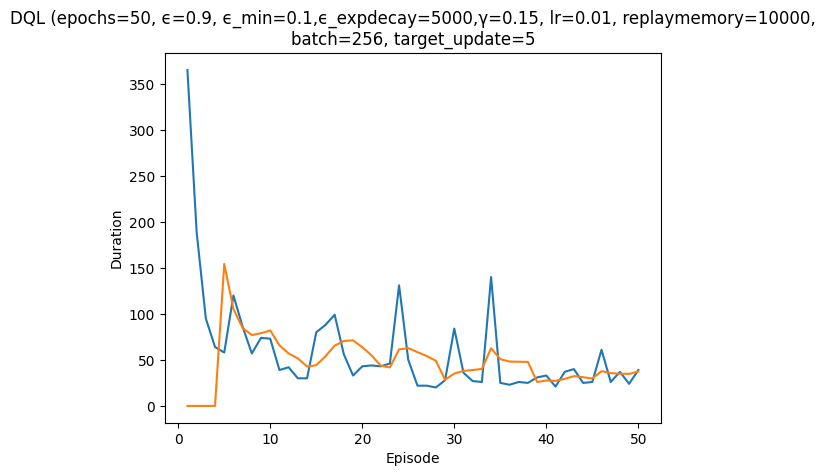

In [17]:
best_dqn_4 = learner.epsilon_greedy_search(
    cyberbattle_gym_env=cyberbattlechain_4,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(ep=ep, gamma=0.15, replay_memory_size=10000, target_update=5, batch_size=256, learning_rate=0.01),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="DQL",
)

###### One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10
Learning with: episode_count=10,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward: 1254.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward: 1254.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward: 1268.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward: 1268.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward: 1368.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward: 1368.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward: 1374.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward: 1374.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward: 1388.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward: 1388.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward: 1488.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward: 1488.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward: 1502.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward: 1502.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward: 1602.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward: 1602.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward: 1616.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward: 1616.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 31|reward: 1716.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 31|reward: 1716.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward: 1730.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward: 1730.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward: 1830.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward: 1830.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward: 1844.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward: 1844.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 35|reward: 1944.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 35|reward: 1944.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward: 1958.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward: 1958.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward: 2058.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 1|Iteration 37|reward: 2058.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 1|Iteration 38|reward: 2072.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 1|Iteration 38|reward: 2072.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 1|Iteration 39|reward: 2172.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 1|Iteration 39|reward: 2172.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 1|Iteration 40|reward: 2186.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 1|Iteration 40|reward: 2186.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 1|Iteration 41|reward: 2286.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 1|Iteration 41|reward: 2286.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 1|Iteration 42|reward: 2300.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 1|Iteration 42|reward: 2300.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 1|Iteration 43|reward: 7300.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 1|Iteration 43|reward: 7300.0|last_reward_at:   43|Elapsed Time: 0:00:01||

  Episode 1 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward: 1254.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward: 1254.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward: 1268.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward: 1268.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward: 1368.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward: 1368.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward: 1382.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward: 1382.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward: 1482.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward: 1482.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward: 1496.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward: 1496.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward: 1596.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward: 1596.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward: 1610.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward: 1610.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward: 1710.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward: 1710.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward: 1724.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward: 1724.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward: 1824.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward: 1824.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward: 1838.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward: 1838.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward: 1938.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 34|reward: 1938.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward: 1952.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward: 1952.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward: 2052.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward: 2052.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward: 2066.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward: 2066.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward: 2166.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward: 2166.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 2|Iteration 40|reward: 2180.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 2|Iteration 41|reward: 2280.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 2|Iteration 41|reward: 2280.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 2|Iteration 42|reward: 2294.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 2|Iteration 42|reward: 2294.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 2|Iteration 43|reward: 7294.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 2|Iteration 43|reward: 7294.0|last_reward_at:   43|Elapsed Time: 0:00:01||

  Episode 2 ended at t=43 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/1 (0.95)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward: 1254.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward: 1254.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward: 1268.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward: 1268.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward: 1368.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward: 1368.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward: 1382.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward: 1382.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward: 1482.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward: 1482.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward: 1496.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward: 1496.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward: 1596.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward: 1596.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward: 1610.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward: 1610.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward: 1710.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward: 1710.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward: 1724.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward: 1724.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward: 1824.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward: 1824.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward: 1838.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward: 1838.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward: 1938.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward: 1938.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward: 1952.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward: 1952.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward: 2052.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward: 2052.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward: 2066.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward: 2066.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward: 2166.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward: 2166.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 39|reward: 2180.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 3|Iteration 39|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 3|Iteration 40|reward: 2280.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 3|Iteration 40|reward: 2280.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 3|Iteration 41|reward: 2294.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 3|Iteration 41|reward: 2294.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 3|Iteration 42|reward: 7294.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 3|Iteration 42|reward: 7294.0|last_reward_at:   42|Elapsed Time: 0:00:01||

  Episode 3 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward: 1254.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward: 1254.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward: 1268.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward: 1268.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward: 1368.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward: 1368.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward: 1382.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward: 1382.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward: 1482.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward: 1482.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward: 1496.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward: 1496.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward: 1596.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward: 1596.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward: 1610.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward: 1610.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward: 1710.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward: 1710.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward: 1724.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward: 1724.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward: 1824.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward: 1824.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward: 1838.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward: 1838.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward: 1938.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward: 1938.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward: 1952.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward: 1952.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward: 2052.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward: 2052.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward: 2066.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward: 2066.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward: 2166.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward: 2166.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 39|reward: 2180.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 4|Iteration 39|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 4|Iteration 40|reward: 2280.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 4|Iteration 40|reward: 2280.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 4|Iteration 41|reward: 2294.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 4|Iteration 41|reward: 2294.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 4|Iteration 42|reward: 7294.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 4|Iteration 42|reward: 7294.0|last_reward_at:   42|Elapsed Time: 0:00:01||

  Episode 4 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward: 1254.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward: 1254.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward: 1268.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward: 1268.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward: 1368.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward: 1368.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward: 1382.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward: 1382.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward: 1482.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward: 1482.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward: 1496.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward: 1496.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward: 1596.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward: 1596.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward: 1610.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward: 1610.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward: 1710.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward: 1710.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward: 1724.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward: 1724.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward: 1824.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward: 1824.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward: 1838.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward: 1838.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward: 1938.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward: 1938.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward: 1952.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward: 1952.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward: 2052.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward: 2052.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward: 2066.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward: 2066.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward: 2166.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward: 2166.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward: 2180.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 5|Iteration 39|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 5|Iteration 40|reward: 2280.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 5|Iteration 40|reward: 2280.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 5|Iteration 41|reward: 2294.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 5|Iteration 41|reward: 2294.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 5|Iteration 42|reward: 7294.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 5|Iteration 42|reward: 7294.0|last_reward_at:   42|Elapsed Time: 0:00:01||

  Episode 5 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward: 1254.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward: 1254.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward: 1268.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward: 1268.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward: 1368.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward: 1368.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward: 1382.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward: 1382.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward: 1482.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward: 1482.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 27|reward: 1496.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 27|reward: 1496.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward: 1596.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward: 1596.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward: 1610.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward: 1610.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward: 1710.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward: 1710.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward: 1724.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward: 1724.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward: 1824.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward: 1824.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 33|reward: 1838.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 33|reward: 1838.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward: 1938.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward: 1938.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward: 1952.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward: 1952.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward: 2052.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward: 2052.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward: 2066.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward: 2066.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 38|reward: 2166.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 38|reward: 2166.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 6|Iteration 39|reward: 2180.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 6|Iteration 39|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 6|Iteration 40|reward: 2280.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 6|Iteration 40|reward: 2280.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 41|reward: 2294.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 6|Iteration 41|reward: 2294.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 6|Iteration 42|reward: 7294.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 6|Iteration 42|reward: 7294.0|last_reward_at:   42|Elapsed Time: 0:00:01||

  Episode 6 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward: 1254.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward: 1254.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 23|reward: 1268.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 23|reward: 1268.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward: 1368.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward: 1368.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward: 1382.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward: 1382.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward: 1482.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward: 1482.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 27|reward: 1496.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 27|reward: 1496.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 7|Iteration 28|reward: 1596.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 7|Iteration 28|reward: 1596.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward: 1610.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward: 1610.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 30|reward: 1710.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 30|reward: 1710.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward: 1724.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward: 1724.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 32|reward: 1824.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 32|reward: 1824.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward: 1838.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward: 1838.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 34|reward: 1938.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 34|reward: 1938.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward: 1952.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward: 1952.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward: 2052.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward: 2052.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward: 2066.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward: 2066.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward: 2166.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 7|Iteration 38|reward: 2166.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 7|Iteration 39|reward: 2180.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 7|Iteration 39|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 7|Iteration 40|reward: 2280.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 7|Iteration 40|reward: 2280.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 7|Iteration 41|reward: 2294.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 7|Iteration 41|reward: 2294.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 7|Iteration 42|reward: 7294.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 7|Iteration 42|reward: 7294.0|last_reward_at:   42|Elapsed Time: 0:00:01||

  Episode 7 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward: 1254.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward: 1254.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward: 1268.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward: 1268.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward: 1368.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward: 1368.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward: 1382.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 25|reward: 1382.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward: 1482.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward: 1482.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward: 1496.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward: 1496.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward: 1596.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward: 1596.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward: 1610.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward: 1610.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward: 1710.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward: 1710.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward: 1724.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward: 1724.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward: 1824.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward: 1824.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward: 1838.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward: 1838.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward: 1938.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward: 1938.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward: 1952.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward: 1952.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward: 2052.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward: 2052.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward: 2066.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward: 2066.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward: 2166.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward: 2166.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward: 2180.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 40|reward: 2280.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 40|reward: 2280.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 8|Iteration 41|reward: 2294.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 8|Iteration 41|reward: 2294.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 8|Iteration 42|reward: 7294.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 8|Iteration 42|reward: 7294.0|last_reward_at:   42|Elapsed Time: 0:00:01||

  Episode 8 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward: 1254.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward: 1254.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward: 1268.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward: 1268.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward: 1368.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward: 1368.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward: 1382.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward: 1382.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward: 1482.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward: 1482.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward: 1496.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward: 1496.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward: 1596.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward: 1596.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward: 1610.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward: 1610.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward: 1710.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward: 1710.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward: 1724.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward: 1724.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 32|reward: 1824.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 32|reward: 1824.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward: 1838.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward: 1838.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward: 1938.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward: 1938.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 35|reward: 1952.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 35|reward: 1952.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward: 2052.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward: 2052.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward: 2066.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward: 2066.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward: 2166.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 9|Iteration 38|reward: 2166.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 9|Iteration 39|reward: 2180.0|last_reward_at:   38|Elapsed Time: 0:00:01||

Episode 9|Iteration 39|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 9|Iteration 40|reward: 2280.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 9|Iteration 40|reward: 2280.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 9|Iteration 41|reward: 2294.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 9|Iteration 41|reward: 2294.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 9|Iteration 42|reward: 7294.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 9|Iteration 42|reward: 7294.0|last_reward_at:   42|Elapsed Time: 0:00:01||

  Episode 9 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-10' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 22|reward: 1254.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 22|reward: 1254.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward: 1268.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward: 1268.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward: 1368.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward: 1368.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 25|reward: 1382.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 25|reward: 1382.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward: 1482.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward: 1482.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward: 1496.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward: 1496.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward: 1596.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward: 1596.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 10|Iteration 29|reward: 1610.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 10|Iteration 29|reward: 1610.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward: 1710.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward: 1710.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward: 1724.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward: 1724.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 32|reward: 1824.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 32|reward: 1824.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward: 1838.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward: 1838.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward: 1938.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 34|reward: 1938.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 10|Iteration 35|reward: 1952.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 10|Iteration 35|reward: 1952.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward: 2052.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward: 2052.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 37|reward: 2066.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 37|reward: 2066.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward: 2166.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward: 2166.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward: 2180.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward: 2180.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 40|reward: 2280.0|last_reward_at:   39|Elapsed Time: 0:00:01||

Episode 10|Iteration 40|reward: 2280.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 10|Iteration 41|reward: 2294.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 10|Iteration 41|reward: 2294.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 10|Iteration 42|reward: 7294.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 10|Iteration 42|reward: 7294.0|last_reward_at:   42|Elapsed Time: 0:00:01||

  Episode 10 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


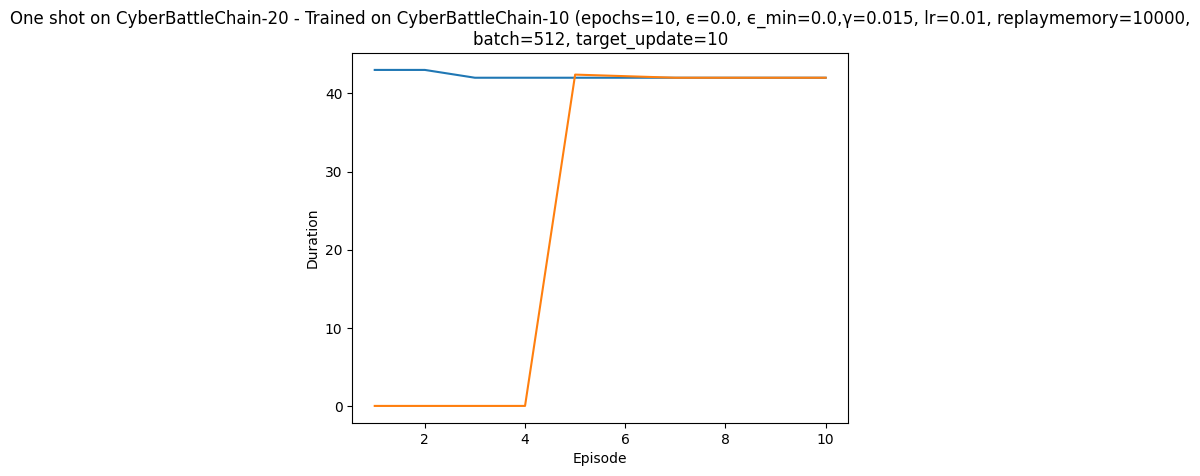

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  230.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  230.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  236.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  236.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  238.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  238.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  252.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  252.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  256.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  256.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:  356.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:  356.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  362.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  362.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  364.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward:  364.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  370.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  370.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 72|reward:  376.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 72|reward:  376.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 1|Iteration 97|reward:  387.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 1|Iteration 97|reward:  387.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 1|Iteration 101|reward:  395.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 1|Iteration 101|reward:  395.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  401.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  401.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 115|reward:  410.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 115|reward:  410.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 1|Iteration 116|reward:  510.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 1|Iteration 116|reward:  510.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 1|Iteration 153|reward:  521.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 1|Iteration 153|reward:  521.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 159|reward:  530.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 159|reward:  530.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 1|Iteration 164|reward:  630.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 1|Iteration 164|reward:  630.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 1|Iteration 168|reward:  644.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 1|Iteration 168|reward:  644.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 1|Iteration 176|reward:  650.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 1|Iteration 176|reward:  650.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 1|Iteration 179|reward:  750.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 1|Iteration 179|reward:  750.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 1|Iteration 180|reward:  752.0|last_reward_at:  179|Elapsed Time: 0:00:00||

Episode 1|Iteration 180|reward:  752.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 1|Iteration 191|reward:  763.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 1|Iteration 191|reward:  763.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 1|Iteration 192|reward:  769.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 1|Iteration 192|reward:  769.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 1|Iteration 200|reward:  773.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 1|Iteration 200|reward:  773.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 1|Iteration 212|reward:  775.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 1|Iteration 212|reward:  775.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 1|Iteration 225|reward:  781.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 1|Iteration 225|reward:  781.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 1|Iteration 251|reward:  781.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 1|Iteration 252|reward:  790.0|last_reward_at:  225|Elapsed Time: 0:00:00||

Episode 1|Iteration 252|reward:  790.0|last_reward_at:  252|Elapsed Time: 0:00:00||

Episode 1|Iteration 265|reward:  890.0|last_reward_at:  252|Elapsed Time: 0:00:00||

Episode 1|Iteration 265|reward:  890.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 1|Iteration 287|reward:  890.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 1|Iteration 298|reward:  892.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 1|Iteration 298|reward:  892.0|last_reward_at:  298|Elapsed Time: 0:00:00||

Episode 1|Iteration 322|reward:  892.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 1|Iteration 342|reward:  892.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 1|Iteration 364|reward:  892.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 1|Iteration 383|reward:  892.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 1|Iteration 398|reward:  903.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 1|Iteration 398|reward:  903.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 1|Iteration 416|reward:  903.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 1|Iteration 431|reward:  909.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 1|Iteration 431|reward:  909.0|last_reward_at:  431|Elapsed Time: 0:00:01||

Episode 1|Iteration 446|reward:  909.0|last_reward_at:  431|Elapsed Time: 0:00:01||

Episode 1|Iteration 456|reward:  909.0|last_reward_at:  431|Elapsed Time: 0:00:01||

Episode 1|Iteration 474|reward:  909.0|last_reward_at:  431|Elapsed Time: 0:00:01||

Episode 1|Iteration 488|reward:  917.0|last_reward_at:  431|Elapsed Time: 0:00:01||

Episode 1|Iteration 488|reward:  917.0|last_reward_at:  488|Elapsed Time: 0:00:01||

Episode 1|Iteration 506|reward:  917.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 1|Iteration 524|reward:  917.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 1|Iteration 538|reward:  917.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 1|Iteration 556|reward:  917.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 1|Iteration 570|reward:  917.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 1|Iteration 579|reward:  926.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 1|Iteration 579|reward:  926.0|last_reward_at:  579|Elapsed Time: 0:00:02||

Episode 1|Iteration 581|reward: 1026.0|last_reward_at:  579|Elapsed Time: 0:00:02||

Episode 1|Iteration 581|reward: 1026.0|last_reward_at:  581|Elapsed Time: 0:00:02||

Episode 1|Iteration 582|reward: 1037.0|last_reward_at:  581|Elapsed Time: 0:00:02||

Episode 1|Iteration 582|reward: 1037.0|last_reward_at:  582|Elapsed Time: 0:00:02||

Episode 1|Iteration 585|reward: 1039.0|last_reward_at:  582|Elapsed Time: 0:00:02||

Episode 1|Iteration 585|reward: 1039.0|last_reward_at:  585|Elapsed Time: 0:00:02||

Episode 1|Iteration 601|reward: 1043.0|last_reward_at:  585|Elapsed Time: 0:00:02||

Episode 1|Iteration 601|reward: 1043.0|last_reward_at:  601|Elapsed Time: 0:00:02||

Episode 1|Iteration 620|reward: 1043.0|last_reward_at:  601|Elapsed Time: 0:00:02||

Episode 1|Iteration 622|reward: 1052.0|last_reward_at:  601|Elapsed Time: 0:00:02||

Episode 1|Iteration 622|reward: 1052.0|last_reward_at:  622|Elapsed Time: 0:00:02||

Episode 1|Iteration 635|reward: 1152.0|last_reward_at:  622|Elapsed Time: 0:00:02||

Episode 1|Iteration 635|reward: 1152.0|last_reward_at:  635|Elapsed Time: 0:00:02||

Episode 1|Iteration 650|reward: 1152.0|last_reward_at:  635|Elapsed Time: 0:00:02||

Episode 1|Iteration 664|reward: 1152.0|last_reward_at:  635|Elapsed Time: 0:00:03||

Episode 1|Iteration 680|reward: 1152.0|last_reward_at:  635|Elapsed Time: 0:00:03||

Episode 1|Iteration 696|reward: 1152.0|last_reward_at:  635|Elapsed Time: 0:00:03||

Episode 1|Iteration 711|reward: 1152.0|last_reward_at:  635|Elapsed Time: 0:00:03||

Episode 1|Iteration 714|reward: 1163.0|last_reward_at:  635|Elapsed Time: 0:00:03||

Episode 1|Iteration 714|reward: 1163.0|last_reward_at:  714|Elapsed Time: 0:00:03||

Episode 1|Iteration 720|reward: 1169.0|last_reward_at:  714|Elapsed Time: 0:00:03||

Episode 1|Iteration 720|reward: 1169.0|last_reward_at:  720|Elapsed Time: 0:00:03||

Episode 1|Iteration 727|reward: 1177.0|last_reward_at:  720|Elapsed Time: 0:00:03||

Episode 1|Iteration 727|reward: 1177.0|last_reward_at:  727|Elapsed Time: 0:00:03||

Episode 1|Iteration 745|reward: 1177.0|last_reward_at:  727|Elapsed Time: 0:00:03||

Episode 1|Iteration 750|reward: 1186.0|last_reward_at:  727|Elapsed Time: 0:00:03||

Episode 1|Iteration 750|reward: 1186.0|last_reward_at:  750|Elapsed Time: 0:00:03||

Episode 1|Iteration 756|reward: 1286.0|last_reward_at:  750|Elapsed Time: 0:00:03||

Episode 1|Iteration 756|reward: 1286.0|last_reward_at:  756|Elapsed Time: 0:00:03||

Episode 1|Iteration 762|reward: 1300.0|last_reward_at:  756|Elapsed Time: 0:00:03||

Episode 1|Iteration 762|reward: 1300.0|last_reward_at:  762|Elapsed Time: 0:00:03||

Episode 1|Iteration 764|reward: 1306.0|last_reward_at:  762|Elapsed Time: 0:00:03||

Episode 1|Iteration 764|reward: 1306.0|last_reward_at:  764|Elapsed Time: 0:00:03||

Episode 1|Iteration 768|reward: 1308.0|last_reward_at:  764|Elapsed Time: 0:00:03||

Episode 1|Iteration 768|reward: 1308.0|last_reward_at:  768|Elapsed Time: 0:00:03||

Episode 1|Iteration 775|reward: 1408.0|last_reward_at:  768|Elapsed Time: 0:00:03||

Episode 1|Iteration 775|reward: 1408.0|last_reward_at:  775|Elapsed Time: 0:00:03||

Episode 1|Iteration 785|reward: 1408.0|last_reward_at:  775|Elapsed Time: 0:00:03||

Episode 1|Iteration 797|reward: 1408.0|last_reward_at:  775|Elapsed Time: 0:00:04||

Episode 1|Iteration 811|reward: 1408.0|last_reward_at:  775|Elapsed Time: 0:00:04||

Episode 1|Iteration 826|reward: 1408.0|last_reward_at:  775|Elapsed Time: 0:00:04||

Episode 1|Iteration 834|reward: 1410.0|last_reward_at:  775|Elapsed Time: 0:00:04||

Episode 1|Iteration 834|reward: 1410.0|last_reward_at:  834|Elapsed Time: 0:00:04||

Episode 1|Iteration 846|reward: 1410.0|last_reward_at:  834|Elapsed Time: 0:00:04||

Episode 1|Iteration 860|reward: 1410.0|last_reward_at:  834|Elapsed Time: 0:00:04||

Episode 1|Iteration 873|reward: 1410.0|last_reward_at:  834|Elapsed Time: 0:00:04||

Episode 1|Iteration 887|reward: 1410.0|last_reward_at:  834|Elapsed Time: 0:00:04||

Episode 1|Iteration 895|reward: 1421.0|last_reward_at:  834|Elapsed Time: 0:00:04||

Episode 1|Iteration 895|reward: 1421.0|last_reward_at:  895|Elapsed Time: 0:00:04||

Episode 1|Iteration 909|reward: 1429.0|last_reward_at:  895|Elapsed Time: 0:00:04||

Episode 1|Iteration 909|reward: 1429.0|last_reward_at:  909|Elapsed Time: 0:00:04||

Episode 1|Iteration 921|reward: 1429.0|last_reward_at:  909|Elapsed Time: 0:00:04||

Episode 1|Iteration 923|reward: 1435.0|last_reward_at:  909|Elapsed Time: 0:00:05||

Episode 1|Iteration 923|reward: 1435.0|last_reward_at:  923|Elapsed Time: 0:00:05||

Episode 1|Iteration 937|reward: 1435.0|last_reward_at:  923|Elapsed Time: 0:00:05||

Episode 1|Iteration 949|reward: 1435.0|last_reward_at:  923|Elapsed Time: 0:00:05||

Episode 1|Iteration 956|reward: 1444.0|last_reward_at:  923|Elapsed Time: 0:00:05||

Episode 1|Iteration 956|reward: 1444.0|last_reward_at:  956|Elapsed Time: 0:00:05||

Episode 1|Iteration 960|reward: 1544.0|last_reward_at:  956|Elapsed Time: 0:00:05||

Episode 1|Iteration 960|reward: 1544.0|last_reward_at:  960|Elapsed Time: 0:00:05||

Episode 1|Iteration 971|reward: 1544.0|last_reward_at:  960|Elapsed Time: 0:00:05||

Episode 1|Iteration 980|reward: 1544.0|last_reward_at:  960|Elapsed Time: 0:00:05||

Episode 1|Iteration 990|reward: 1555.0|last_reward_at:  960|Elapsed Time: 0:00:05||

Episode 1|Iteration 990|reward: 1555.0|last_reward_at:  990|Elapsed Time: 0:00:05||

Episode 1|Iteration 1002|reward: 1555.0|last_reward_at:  990|Elapsed Time: 0:00:05||

Episode 1|Iteration 1004|reward: 1557.0|last_reward_at:  990|Elapsed Time: 0:00:05||

Episode 1|Iteration 1004|reward: 1557.0|last_reward_at: 1004|Elapsed Time: 0:00:05||

Episode 1|Iteration 1017|reward: 1557.0|last_reward_at: 1004|Elapsed Time: 0:00:05||

Episode 1|Iteration 1026|reward: 1557.0|last_reward_at: 1004|Elapsed Time: 0:00:05||

Episode 1|Iteration 1027|reward: 1561.0|last_reward_at: 1004|Elapsed Time: 0:00:05||

Episode 1|Iteration 1027|reward: 1561.0|last_reward_at: 1027|Elapsed Time: 0:00:05||

Episode 1|Iteration 1038|reward: 1561.0|last_reward_at: 1027|Elapsed Time: 0:00:06||

Episode 1|Iteration 1049|reward: 1561.0|last_reward_at: 1027|Elapsed Time: 0:00:06||

Episode 1|Iteration 1061|reward: 1561.0|last_reward_at: 1027|Elapsed Time: 0:00:06||

Episode 1|Iteration 1071|reward: 1561.0|last_reward_at: 1027|Elapsed Time: 0:00:06||

Episode 1|Iteration 1082|reward: 1561.0|last_reward_at: 1027|Elapsed Time: 0:00:06||

Episode 1|Iteration 1094|reward: 1561.0|last_reward_at: 1027|Elapsed Time: 0:00:06||

Episode 1|Iteration 1096|reward: 1570.0|last_reward_at: 1027|Elapsed Time: 0:00:06||

Episode 1|Iteration 1096|reward: 1570.0|last_reward_at: 1096|Elapsed Time: 0:00:06||

Episode 1|Iteration 1102|reward: 1670.0|last_reward_at: 1096|Elapsed Time: 0:00:06||

Episode 1|Iteration 1102|reward: 1670.0|last_reward_at: 1102|Elapsed Time: 0:00:06||

Episode 1|Iteration 1104|reward: 1681.0|last_reward_at: 1102|Elapsed Time: 0:00:06||

Episode 1|Iteration 1104|reward: 1681.0|last_reward_at: 1104|Elapsed Time: 0:00:06||

Episode 1|Iteration 1105|reward: 1687.0|last_reward_at: 1104|Elapsed Time: 0:00:06||

Episode 1|Iteration 1105|reward: 1687.0|last_reward_at: 1105|Elapsed Time: 0:00:06||

Episode 1|Iteration 1117|reward: 1687.0|last_reward_at: 1105|Elapsed Time: 0:00:06||

Episode 1|Iteration 1130|reward: 1687.0|last_reward_at: 1105|Elapsed Time: 0:00:06||

Episode 1|Iteration 1140|reward: 1687.0|last_reward_at: 1105|Elapsed Time: 0:00:06||

Episode 1|Iteration 1151|reward: 1687.0|last_reward_at: 1105|Elapsed Time: 0:00:07||

Episode 1|Iteration 1162|reward: 1687.0|last_reward_at: 1105|Elapsed Time: 0:00:07||

Episode 1|Iteration 1174|reward: 1687.0|last_reward_at: 1105|Elapsed Time: 0:00:07||

Episode 1|Iteration 1185|reward: 1687.0|last_reward_at: 1105|Elapsed Time: 0:00:07||

Episode 1|Iteration 1197|reward: 1687.0|last_reward_at: 1105|Elapsed Time: 0:00:07||

Episode 1|Iteration 1208|reward: 1687.0|last_reward_at: 1105|Elapsed Time: 0:00:07||

Episode 1|Iteration 1220|reward: 1687.0|last_reward_at: 1105|Elapsed Time: 0:00:07||

Episode 1|Iteration 1232|reward: 1687.0|last_reward_at: 1105|Elapsed Time: 0:00:07||

Episode 1|Iteration 1243|reward: 1695.0|last_reward_at: 1105|Elapsed Time: 0:00:07||

Episode 1|Iteration 1243|reward: 1695.0|last_reward_at: 1243|Elapsed Time: 0:00:07||

Episode 1|Iteration 1254|reward: 1695.0|last_reward_at: 1243|Elapsed Time: 0:00:08||

Episode 1|Iteration 1257|reward: 1704.0|last_reward_at: 1243|Elapsed Time: 0:00:08||

Episode 1|Iteration 1257|reward: 1704.0|last_reward_at: 1257|Elapsed Time: 0:00:08||

Episode 1|Iteration 1262|reward: 1804.0|last_reward_at: 1257|Elapsed Time: 0:00:08||

Episode 1|Iteration 1262|reward: 1804.0|last_reward_at: 1262|Elapsed Time: 0:00:08||

Episode 1|Iteration 1274|reward: 1804.0|last_reward_at: 1262|Elapsed Time: 0:00:08||

Episode 1|Iteration 1286|reward: 1804.0|last_reward_at: 1262|Elapsed Time: 0:00:08||

Episode 1|Iteration 1296|reward: 1804.0|last_reward_at: 1262|Elapsed Time: 0:00:08||

Episode 1|Iteration 1307|reward: 1804.0|last_reward_at: 1262|Elapsed Time: 0:00:08||

Episode 1|Iteration 1317|reward: 1815.0|last_reward_at: 1262|Elapsed Time: 0:00:08||

Episode 1|Iteration 1317|reward: 1815.0|last_reward_at: 1317|Elapsed Time: 0:00:08||

Episode 1|Iteration 1324|reward: 1819.0|last_reward_at: 1317|Elapsed Time: 0:00:08||

Episode 1|Iteration 1324|reward: 1819.0|last_reward_at: 1324|Elapsed Time: 0:00:08||

Episode 1|Iteration 1335|reward: 1819.0|last_reward_at: 1324|Elapsed Time: 0:00:08||

Episode 1|Iteration 1346|reward: 1819.0|last_reward_at: 1324|Elapsed Time: 0:00:08||

Episode 1|Iteration 1357|reward: 1819.0|last_reward_at: 1324|Elapsed Time: 0:00:09||

Episode 1|Iteration 1367|reward: 1819.0|last_reward_at: 1324|Elapsed Time: 0:00:09||

Episode 1|Iteration 1377|reward: 1819.0|last_reward_at: 1324|Elapsed Time: 0:00:09||

Episode 1|Iteration 1388|reward: 1819.0|last_reward_at: 1324|Elapsed Time: 0:00:09||

Episode 1|Iteration 1399|reward: 1819.0|last_reward_at: 1324|Elapsed Time: 0:00:09||

Episode 1|Iteration 1409|reward: 1819.0|last_reward_at: 1324|Elapsed Time: 0:00:09||

Episode 1|Iteration 1420|reward: 1819.0|last_reward_at: 1324|Elapsed Time: 0:00:09||

Episode 1|Iteration 1431|reward: 1819.0|last_reward_at: 1324|Elapsed Time: 0:00:09||

Episode 1|Iteration 1441|reward: 1819.0|last_reward_at: 1324|Elapsed Time: 0:00:09||

Episode 1|Iteration 1452|reward: 1819.0|last_reward_at: 1324|Elapsed Time: 0:00:10||

Episode 1|Iteration 1463|reward: 1819.0|last_reward_at: 1324|Elapsed Time: 0:00:10||

Episode 1|Iteration 1464|reward: 1821.0|last_reward_at: 1324|Elapsed Time: 0:00:10||

Episode 1|Iteration 1464|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:10||

Episode 1|Iteration 1473|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:10||

Episode 1|Iteration 1482|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:10||

Episode 1|Iteration 1491|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:10||

Episode 1|Iteration 1501|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:10||

Episode 1|Iteration 1512|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:10||

Episode 1|Iteration 1522|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:10||

Episode 1|Iteration 1533|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:10||

Episode 1|Iteration 1544|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:10||

Episode 1|Iteration 1555|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:11||

Episode 1|Iteration 1566|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:11||

Episode 1|Iteration 1577|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:11||

Episode 1|Iteration 1587|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:11||

Episode 1|Iteration 1595|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:11||

Episode 1|Iteration 1605|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:11||

Episode 1|Iteration 1616|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:11||

Episode 1|Iteration 1626|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:11||

Episode 1|Iteration 1637|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:11||

Episode 1|Iteration 1647|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:11||

Episode 1|Iteration 1657|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:12||

Episode 1|Iteration 1668|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:12||

Episode 1|Iteration 1676|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:12||

Episode 1|Iteration 1685|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:12||

Episode 1|Iteration 1695|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:12||

Episode 1|Iteration 1705|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:12||

Episode 1|Iteration 1713|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:12||

Episode 1|Iteration 1724|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:12||

Episode 1|Iteration 1734|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:12||

Episode 1|Iteration 1746|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:13||

Episode 1|Iteration 1757|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:13||

Episode 1|Iteration 1767|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:13||

Episode 1|Iteration 1777|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:13||

Episode 1|Iteration 1788|reward: 1821.0|last_reward_at: 1464|Elapsed Time: 0:00:13||

Episode 1|Iteration 1798|reward: 1830.0|last_reward_at: 1464|Elapsed Time: 0:00:13||

Episode 1|Iteration 1798|reward: 1830.0|last_reward_at: 1798|Elapsed Time: 0:00:13||

Episode 1|Iteration 1800|reward: 1930.0|last_reward_at: 1798|Elapsed Time: 0:00:13||

Episode 1|Iteration 1800|reward: 1930.0|last_reward_at: 1800|Elapsed Time: 0:00:13||

Episode 1|Iteration 1810|reward: 1941.0|last_reward_at: 1800|Elapsed Time: 0:00:13||

Episode 1|Iteration 1810|reward: 1941.0|last_reward_at: 1810|Elapsed Time: 0:00:13||

Episode 1|Iteration 1812|reward: 1947.0|last_reward_at: 1810|Elapsed Time: 0:00:13||

Episode 1|Iteration 1812|reward: 1947.0|last_reward_at: 1812|Elapsed Time: 0:00:13||

Episode 1|Iteration 1822|reward: 1947.0|last_reward_at: 1812|Elapsed Time: 0:00:13||

Episode 1|Iteration 1831|reward: 1947.0|last_reward_at: 1812|Elapsed Time: 0:00:13||

Episode 1|Iteration 1840|reward: 1947.0|last_reward_at: 1812|Elapsed Time: 0:00:13||

Episode 1|Iteration 1850|reward: 1947.0|last_reward_at: 1812|Elapsed Time: 0:00:14||

Episode 1|Iteration 1859|reward: 1947.0|last_reward_at: 1812|Elapsed Time: 0:00:14||

Episode 1|Iteration 1869|reward: 1947.0|last_reward_at: 1812|Elapsed Time: 0:00:14||

Episode 1|Iteration 1879|reward: 1947.0|last_reward_at: 1812|Elapsed Time: 0:00:14||

Episode 1|Iteration 1882|reward: 1955.0|last_reward_at: 1812|Elapsed Time: 0:00:14||

Episode 1|Iteration 1882|reward: 1955.0|last_reward_at: 1882|Elapsed Time: 0:00:14||

Episode 1|Iteration 1888|reward: 1964.0|last_reward_at: 1882|Elapsed Time: 0:00:14||

Episode 1|Iteration 1888|reward: 1964.0|last_reward_at: 1888|Elapsed Time: 0:00:14||

Episode 1|Iteration 1891|reward: 2064.0|last_reward_at: 1888|Elapsed Time: 0:00:14||

Episode 1|Iteration 1891|reward: 2064.0|last_reward_at: 1891|Elapsed Time: 0:00:14||

Episode 1|Iteration 1901|reward: 2064.0|last_reward_at: 1891|Elapsed Time: 0:00:14||

Episode 1|Iteration 1911|reward: 2064.0|last_reward_at: 1891|Elapsed Time: 0:00:14||

Episode 1|Iteration 1921|reward: 2064.0|last_reward_at: 1891|Elapsed Time: 0:00:14||

Episode 1|Iteration 1931|reward: 2064.0|last_reward_at: 1891|Elapsed Time: 0:00:14||

Episode 1|Iteration 1937|reward: 2064.0|last_reward_at: 1891|Elapsed Time: 0:00:15||

Episode 1|Iteration 1945|reward: 2064.0|last_reward_at: 1891|Elapsed Time: 0:00:15||

Episode 1|Iteration 1954|reward: 2064.0|last_reward_at: 1891|Elapsed Time: 0:00:15||

Episode 1|Iteration 1963|reward: 2064.0|last_reward_at: 1891|Elapsed Time: 0:00:15||

Episode 1|Iteration 1972|reward: 2064.0|last_reward_at: 1891|Elapsed Time: 0:00:15||

Episode 1|Iteration 1980|reward: 2064.0|last_reward_at: 1891|Elapsed Time: 0:00:15||

Episode 1|Iteration 1989|reward: 2064.0|last_reward_at: 1891|Elapsed Time: 0:00:15||

Episode 1|Iteration 1998|reward: 2064.0|last_reward_at: 1891|Elapsed Time: 0:00:15||

Episode 1|Iteration 2008|reward: 2064.0|last_reward_at: 1891|Elapsed Time: 0:00:15||

Episode 1|Iteration 2010|reward: 2078.0|last_reward_at: 1891|Elapsed Time: 0:00:15||

Episode 1|Iteration 2010|reward: 2078.0|last_reward_at: 2010|Elapsed Time: 0:00:15||

Episode 1|Iteration 2017|reward: 2178.0|last_reward_at: 2010|Elapsed Time: 0:00:15||

Episode 1|Iteration 2017|reward: 2178.0|last_reward_at: 2017|Elapsed Time: 0:00:15||

Episode 1|Iteration 2025|reward: 2178.0|last_reward_at: 2017|Elapsed Time: 0:00:16||

Episode 1|Iteration 2033|reward: 2178.0|last_reward_at: 2017|Elapsed Time: 0:00:16||

Episode 1|Iteration 2041|reward: 2180.0|last_reward_at: 2017|Elapsed Time: 0:00:16||

Episode 1|Iteration 2041|reward: 2180.0|last_reward_at: 2041|Elapsed Time: 0:00:16||

Episode 1|Iteration 2049|reward: 2180.0|last_reward_at: 2041|Elapsed Time: 0:00:16||

Episode 1|Iteration 2059|reward: 2180.0|last_reward_at: 2041|Elapsed Time: 0:00:16||

Episode 1|Iteration 2068|reward: 2180.0|last_reward_at: 2041|Elapsed Time: 0:00:16||

Episode 1|Iteration 2073|reward: 2186.0|last_reward_at: 2041|Elapsed Time: 0:00:16||

Episode 1|Iteration 2073|reward: 2186.0|last_reward_at: 2073|Elapsed Time: 0:00:16||

Episode 1|Iteration 2082|reward: 2186.0|last_reward_at: 2073|Elapsed Time: 0:00:16||

Episode 1|Iteration 2090|reward: 2186.0|last_reward_at: 2073|Elapsed Time: 0:00:16||

Episode 1|Iteration 2100|reward: 2186.0|last_reward_at: 2073|Elapsed Time: 0:00:17||

Episode 1|Iteration 2109|reward: 2186.0|last_reward_at: 2073|Elapsed Time: 0:00:17||

Episode 1|Iteration 2110|reward: 2188.0|last_reward_at: 2073|Elapsed Time: 0:00:17||

Episode 1|Iteration 2110|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:17||

Episode 1|Iteration 2118|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:17||

Episode 1|Iteration 2126|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:17||

Episode 1|Iteration 2135|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:17||

Episode 1|Iteration 2144|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:17||

Episode 1|Iteration 2153|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:17||

Episode 1|Iteration 2162|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:17||

Episode 1|Iteration 2171|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:17||

Episode 1|Iteration 2180|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:17||

Episode 1|Iteration 2187|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:18||

Episode 1|Iteration 2195|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:18||

Episode 1|Iteration 2203|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:18||

Episode 1|Iteration 2211|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:18||

Episode 1|Iteration 2216|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:18||

Episode 1|Iteration 2224|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:18||

Episode 1|Iteration 2233|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:18||

Episode 1|Iteration 2240|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:18||

Episode 1|Iteration 2247|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:18||

Episode 1|Iteration 2256|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:19||

Episode 1|Iteration 2264|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:19||

Episode 1|Iteration 2273|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:19||

Episode 1|Iteration 2279|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:19||

Episode 1|Iteration 2286|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:19||

Episode 1|Iteration 2295|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:19||

Episode 1|Iteration 2304|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:19||

Episode 1|Iteration 2312|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:19||

Episode 1|Iteration 2321|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:19||

Episode 1|Iteration 2329|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:19||

Episode 1|Iteration 2337|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:20||

Episode 1|Iteration 2344|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:20||

Episode 1|Iteration 2353|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:20||

Episode 1|Iteration 2360|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:20||

Episode 1|Iteration 2368|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:20||

Episode 1|Iteration 2375|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:20||

Episode 1|Iteration 2383|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:20||

Episode 1|Iteration 2391|reward: 2188.0|last_reward_at: 2110|Elapsed Time: 0:00:20||

Episode 1|Iteration 2393|reward: 2199.0|last_reward_at: 2110|Elapsed Time: 0:00:20||

Episode 1|Iteration 2393|reward: 2199.0|last_reward_at: 2393|Elapsed Time: 0:00:20||

Episode 1|Iteration 2396|reward: 2207.0|last_reward_at: 2393|Elapsed Time: 0:00:20||

Episode 1|Iteration 2396|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:20||

Episode 1|Iteration 2404|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:20||

Episode 1|Iteration 2412|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:21||

Episode 1|Iteration 2420|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:21||

Episode 1|Iteration 2429|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:21||

Episode 1|Iteration 2437|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:21||

Episode 1|Iteration 2446|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:21||

Episode 1|Iteration 2455|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:21||

Episode 1|Iteration 2464|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:21||

Episode 1|Iteration 2473|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:21||

Episode 1|Iteration 2481|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:21||

Episode 1|Iteration 2490|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:22||

Episode 1|Iteration 2498|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:22||

Episode 1|Iteration 2507|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:22||

Episode 1|Iteration 2514|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:22||

Episode 1|Iteration 2523|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:22||

Episode 1|Iteration 2531|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:22||

Episode 1|Iteration 2538|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:22||

Episode 1|Iteration 2547|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:22||

Episode 1|Iteration 2556|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:22||

Episode 1|Iteration 2564|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:23||

Episode 1|Iteration 2572|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:23||

Episode 1|Iteration 2580|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:23||

Episode 1|Iteration 2588|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:23||

Episode 1|Iteration 2597|reward: 2207.0|last_reward_at: 2396|Elapsed Time: 0:00:23||

Episode 1|Iteration 2598|reward: 2213.0|last_reward_at: 2396|Elapsed Time: 0:00:23||

Episode 1|Iteration 2598|reward: 2213.0|last_reward_at: 2598|Elapsed Time: 0:00:23||

Episode 1|Iteration 2607|reward: 2213.0|last_reward_at: 2598|Elapsed Time: 0:00:23||

Episode 1|Iteration 2616|reward: 2213.0|last_reward_at: 2598|Elapsed Time: 0:00:23||

Episode 1|Iteration 2621|reward: 2213.0|last_reward_at: 2598|Elapsed Time: 0:00:23||

Episode 1|Iteration 2629|reward: 2213.0|last_reward_at: 2598|Elapsed Time: 0:00:23||

Episode 1|Iteration 2637|reward: 2213.0|last_reward_at: 2598|Elapsed Time: 0:00:23||

Episode 1|Iteration 2645|reward: 2213.0|last_reward_at: 2598|Elapsed Time: 0:00:24||

Episode 1|Iteration 2653|reward: 2213.0|last_reward_at: 2598|Elapsed Time: 0:00:24||

Episode 1|Iteration 2661|reward: 2213.0|last_reward_at: 2598|Elapsed Time: 0:00:24||

Episode 1|Iteration 2669|reward: 2213.0|last_reward_at: 2598|Elapsed Time: 0:00:24||

Episode 1|Iteration 2677|reward: 2213.0|last_reward_at: 2598|Elapsed Time: 0:00:24||

Episode 1|Iteration 2686|reward: 2213.0|last_reward_at: 2598|Elapsed Time: 0:00:24||

Episode 1|Iteration 2693|reward: 2222.0|last_reward_at: 2598|Elapsed Time: 0:00:24||

Episode 1|Iteration 2693|reward: 2222.0|last_reward_at: 2693|Elapsed Time: 0:00:24||

Episode 1|Iteration 2696|reward: 2322.0|last_reward_at: 2693|Elapsed Time: 0:00:24||

Episode 1|Iteration 2696|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:24||

Episode 1|Iteration 2702|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:24||

Episode 1|Iteration 2710|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:24||

Episode 1|Iteration 2718|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:24||

Episode 1|Iteration 2725|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:25||

Episode 1|Iteration 2731|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:25||

Episode 1|Iteration 2735|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:25||

Episode 1|Iteration 2740|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:25||

Episode 1|Iteration 2746|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:25||

Episode 1|Iteration 2754|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:25||

Episode 1|Iteration 2762|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:25||

Episode 1|Iteration 2770|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:26||

Episode 1|Iteration 2778|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:26||

Episode 1|Iteration 2785|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:26||

Episode 1|Iteration 2792|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:26||

Episode 1|Iteration 2800|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:26||

Episode 1|Iteration 2806|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:26||

Episode 1|Iteration 2813|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:26||

Episode 1|Iteration 2820|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:26||

Episode 1|Iteration 2827|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:26||

Episode 1|Iteration 2835|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:27||

Episode 1|Iteration 2842|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:27||

Episode 1|Iteration 2849|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:27||

Episode 1|Iteration 2855|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:27||

Episode 1|Iteration 2862|reward: 2322.0|last_reward_at: 2696|Elapsed Time: 0:00:27||

Episode 1|Iteration 2864|reward: 2333.0|last_reward_at: 2696|Elapsed Time: 0:00:27||

Episode 1|Iteration 2864|reward: 2333.0|last_reward_at: 2864|Elapsed Time: 0:00:27||

Episode 1|Iteration 2871|reward: 2333.0|last_reward_at: 2864|Elapsed Time: 0:00:27||

Episode 1|Iteration 2879|reward: 2333.0|last_reward_at: 2864|Elapsed Time: 0:00:27||

Episode 1|Iteration 2887|reward: 2337.0|last_reward_at: 2864|Elapsed Time: 0:00:27||

Episode 1|Iteration 2887|reward: 2337.0|last_reward_at: 2887|Elapsed Time: 0:00:27||

Episode 1|Iteration 2894|reward: 2337.0|last_reward_at: 2887|Elapsed Time: 0:00:27||

Episode 1|Iteration 2902|reward: 2337.0|last_reward_at: 2887|Elapsed Time: 0:00:28||

Episode 1|Iteration 2910|reward: 2337.0|last_reward_at: 2887|Elapsed Time: 0:00:28||

Episode 1|Iteration 2916|reward: 2346.0|last_reward_at: 2887|Elapsed Time: 0:00:28||

Episode 1|Iteration 2916|reward: 2346.0|last_reward_at: 2916|Elapsed Time: 0:00:28||

Episode 1|Iteration 2919|reward: 2446.0|last_reward_at: 2916|Elapsed Time: 0:00:28||

Episode 1|Iteration 2919|reward: 2446.0|last_reward_at: 2919|Elapsed Time: 0:00:28||

Episode 1|Iteration 2926|reward: 2446.0|last_reward_at: 2919|Elapsed Time: 0:00:28||

Episode 1|Iteration 2933|reward: 2446.0|last_reward_at: 2919|Elapsed Time: 0:00:28||

Episode 1|Iteration 2941|reward: 2446.0|last_reward_at: 2919|Elapsed Time: 0:00:28||

Episode 1|Iteration 2944|reward: 2460.0|last_reward_at: 2919|Elapsed Time: 0:00:28||

Episode 1|Iteration 2944|reward: 2460.0|last_reward_at: 2944|Elapsed Time: 0:00:28||

Episode 1|Iteration 2947|reward: 2560.0|last_reward_at: 2944|Elapsed Time: 0:00:28||

Episode 1|Iteration 2947|reward: 2560.0|last_reward_at: 2947|Elapsed Time: 0:00:28||

Episode 1|Iteration 2953|reward: 2562.0|last_reward_at: 2947|Elapsed Time: 0:00:28||

Episode 1|Iteration 2953|reward: 2562.0|last_reward_at: 2953|Elapsed Time: 0:00:28||

Episode 1|Iteration 2959|reward: 2562.0|last_reward_at: 2953|Elapsed Time: 0:00:28||

Episode 1|Iteration 2966|reward: 2562.0|last_reward_at: 2953|Elapsed Time: 0:00:28||

Episode 1|Iteration 2973|reward: 2562.0|last_reward_at: 2953|Elapsed Time: 0:00:29||

Episode 1|Iteration 2980|reward: 2562.0|last_reward_at: 2953|Elapsed Time: 0:00:29||

Episode 1|Iteration 2987|reward: 2562.0|last_reward_at: 2953|Elapsed Time: 0:00:29||

Episode 1|Iteration 2994|reward: 2562.0|last_reward_at: 2953|Elapsed Time: 0:00:29||

Episode 1|Iteration 3000|reward: 2562.0|last_reward_at: 2953|Elapsed Time: 0:00:29||

Episode 1|Iteration 3005|reward: 2562.0|last_reward_at: 2953|Elapsed Time: 0:00:29||

Episode 1|Iteration 3011|reward: 2562.0|last_reward_at: 2953|Elapsed Time: 0:00:29||

Episode 1|Iteration 3018|reward: 2562.0|last_reward_at: 2953|Elapsed Time: 0:00:29||

Episode 1|Iteration 3025|reward: 2562.0|last_reward_at: 2953|Elapsed Time: 0:00:29||

Episode 1|Iteration 3032|reward: 2576.0|last_reward_at: 2953|Elapsed Time: 0:00:30||

Episode 1|Iteration 3032|reward: 2576.0|last_reward_at: 3032|Elapsed Time: 0:00:30||

Episode 1|Iteration 3034|reward: 7576.0|last_reward_at: 3032|Elapsed Time: 0:00:30||

Episode 1|Iteration 3034|reward: 7576.0|last_reward_at: 3034|Elapsed Time: 0:00:30||

  Episode 1 ended at t=3034 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 39/1337 (0.03)
    explore-remote: 38/1599 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 611
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.6907, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  129.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  129.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  135.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  135.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  143.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  143.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  152.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 27|reward:  152.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  252.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  252.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  263.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  263.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  265.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  265.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  274.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  274.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 53|reward:  278.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 53|reward:  278.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  378.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  378.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  389.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  389.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 2|Iteration 62|reward:  397.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 2|Iteration 62|reward:  397.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 2|Iteration 63|reward:  403.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 2|Iteration 63|reward:  403.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:  412.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:  412.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 93|reward:  512.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 93|reward:  512.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:  512.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 2|Iteration 127|reward:  526.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 2|Iteration 127|reward:  526.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 2|Iteration 134|reward:  626.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 2|Iteration 134|reward:  626.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 2|Iteration 135|reward:  628.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 2|Iteration 135|reward:  628.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 2|Iteration 156|reward:  642.0|last_reward_at:  135|Elapsed Time: 0:00:00||

Episode 2|Iteration 156|reward:  642.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 2|Iteration 157|reward:  648.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 2|Iteration 157|reward:  648.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 2|Iteration 158|reward:  748.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 2|Iteration 158|reward:  748.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 2|Iteration 163|reward:  754.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 2|Iteration 163|reward:  754.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 2|Iteration 165|reward:  760.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 2|Iteration 165|reward:  760.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 2|Iteration 173|reward:  766.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 2|Iteration 173|reward:  766.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 2|Iteration 174|reward:  780.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 2|Iteration 174|reward:  780.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 2|Iteration 175|reward:  880.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 2|Iteration 175|reward:  880.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 2|Iteration 177|reward:  882.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 2|Iteration 177|reward:  882.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 2|Iteration 183|reward:  884.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 2|Iteration 183|reward:  884.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 2|Iteration 190|reward:  890.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 2|Iteration 190|reward:  890.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 2|Iteration 194|reward:  892.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 2|Iteration 194|reward:  892.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 2|Iteration 214|reward:  892.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  892.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 2|Iteration 248|reward:  892.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 2|Iteration 270|reward:  892.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 2|Iteration 271|reward:  903.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 2|Iteration 271|reward:  903.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 2|Iteration 275|reward:  912.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 2|Iteration 275|reward:  912.0|last_reward_at:  275|Elapsed Time: 0:00:01||

Episode 2|Iteration 277|reward: 1012.0|last_reward_at:  275|Elapsed Time: 0:00:01||

Episode 2|Iteration 277|reward: 1012.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 2|Iteration 278|reward: 1018.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 2|Iteration 278|reward: 1018.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 2|Iteration 291|reward: 1029.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 2|Iteration 291|reward: 1029.0|last_reward_at:  291|Elapsed Time: 0:00:01||

Episode 2|Iteration 295|reward: 1035.0|last_reward_at:  291|Elapsed Time: 0:00:01||

Episode 2|Iteration 295|reward: 1035.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 2|Iteration 311|reward: 1035.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 2|Iteration 326|reward: 1035.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 2|Iteration 333|reward: 1037.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 2|Iteration 333|reward: 1037.0|last_reward_at:  333|Elapsed Time: 0:00:01||

Episode 2|Iteration 342|reward: 1037.0|last_reward_at:  333|Elapsed Time: 0:00:01||

Episode 2|Iteration 357|reward: 1037.0|last_reward_at:  333|Elapsed Time: 0:00:01||

Episode 2|Iteration 365|reward: 1046.0|last_reward_at:  333|Elapsed Time: 0:00:01||

Episode 2|Iteration 365|reward: 1046.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 2|Iteration 369|reward: 1146.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 2|Iteration 369|reward: 1146.0|last_reward_at:  369|Elapsed Time: 0:00:01||

Episode 2|Iteration 382|reward: 1160.0|last_reward_at:  369|Elapsed Time: 0:00:01||

Episode 2|Iteration 382|reward: 1160.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 2|Iteration 383|reward: 1260.0|last_reward_at:  382|Elapsed Time: 0:00:01||

Episode 2|Iteration 383|reward: 1260.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 2|Iteration 385|reward: 1266.0|last_reward_at:  383|Elapsed Time: 0:00:01||

Episode 2|Iteration 385|reward: 1266.0|last_reward_at:  385|Elapsed Time: 0:00:01||

Episode 2|Iteration 400|reward: 1266.0|last_reward_at:  385|Elapsed Time: 0:00:01||

Episode 2|Iteration 411|reward: 1277.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 2|Iteration 411|reward: 1277.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 2|Iteration 416|reward: 1286.0|last_reward_at:  411|Elapsed Time: 0:00:02||

Episode 2|Iteration 416|reward: 1286.0|last_reward_at:  416|Elapsed Time: 0:00:02||

Episode 2|Iteration 420|reward: 1386.0|last_reward_at:  416|Elapsed Time: 0:00:02||

Episode 2|Iteration 420|reward: 1386.0|last_reward_at:  420|Elapsed Time: 0:00:02||

Episode 2|Iteration 422|reward: 1392.0|last_reward_at:  420|Elapsed Time: 0:00:02||

Episode 2|Iteration 422|reward: 1392.0|last_reward_at:  422|Elapsed Time: 0:00:02||

Episode 2|Iteration 427|reward: 1403.0|last_reward_at:  422|Elapsed Time: 0:00:02||

Episode 2|Iteration 427|reward: 1403.0|last_reward_at:  427|Elapsed Time: 0:00:02||

Episode 2|Iteration 433|reward: 1411.0|last_reward_at:  427|Elapsed Time: 0:00:02||

Episode 2|Iteration 433|reward: 1411.0|last_reward_at:  433|Elapsed Time: 0:00:02||

Episode 2|Iteration 445|reward: 1413.0|last_reward_at:  433|Elapsed Time: 0:00:02||

Episode 2|Iteration 445|reward: 1413.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 2|Iteration 456|reward: 1413.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 2|Iteration 459|reward: 1419.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 2|Iteration 459|reward: 1419.0|last_reward_at:  459|Elapsed Time: 0:00:02||

Episode 2|Iteration 471|reward: 1419.0|last_reward_at:  459|Elapsed Time: 0:00:02||

Episode 2|Iteration 486|reward: 1419.0|last_reward_at:  459|Elapsed Time: 0:00:02||

Episode 2|Iteration 500|reward: 1421.0|last_reward_at:  459|Elapsed Time: 0:00:02||

Episode 2|Iteration 500|reward: 1421.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 2|Iteration 514|reward: 1421.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 2|Iteration 525|reward: 1421.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 2|Iteration 537|reward: 1421.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 2|Iteration 550|reward: 1421.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 2|Iteration 552|reward: 1423.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 2|Iteration 552|reward: 1423.0|last_reward_at:  552|Elapsed Time: 0:00:03||

Episode 2|Iteration 566|reward: 1423.0|last_reward_at:  552|Elapsed Time: 0:00:03||

Episode 2|Iteration 578|reward: 1423.0|last_reward_at:  552|Elapsed Time: 0:00:03||

Episode 2|Iteration 590|reward: 1423.0|last_reward_at:  552|Elapsed Time: 0:00:03||

Episode 2|Iteration 603|reward: 1423.0|last_reward_at:  552|Elapsed Time: 0:00:03||

Episode 2|Iteration 615|reward: 1423.0|last_reward_at:  552|Elapsed Time: 0:00:03||

Episode 2|Iteration 626|reward: 1423.0|last_reward_at:  552|Elapsed Time: 0:00:03||

Episode 2|Iteration 638|reward: 1429.0|last_reward_at:  552|Elapsed Time: 0:00:03||

Episode 2|Iteration 638|reward: 1429.0|last_reward_at:  638|Elapsed Time: 0:00:03||

Episode 2|Iteration 651|reward: 1429.0|last_reward_at:  638|Elapsed Time: 0:00:04||

Episode 2|Iteration 663|reward: 1429.0|last_reward_at:  638|Elapsed Time: 0:00:04||

Episode 2|Iteration 672|reward: 1438.0|last_reward_at:  638|Elapsed Time: 0:00:04||

Episode 2|Iteration 672|reward: 1438.0|last_reward_at:  672|Elapsed Time: 0:00:04||

Episode 2|Iteration 673|reward: 1538.0|last_reward_at:  672|Elapsed Time: 0:00:04||

Episode 2|Iteration 673|reward: 1538.0|last_reward_at:  673|Elapsed Time: 0:00:04||

Episode 2|Iteration 684|reward: 1538.0|last_reward_at:  673|Elapsed Time: 0:00:04||

Episode 2|Iteration 684|reward: 1549.0|last_reward_at:  673|Elapsed Time: 0:00:04||

Episode 2|Iteration 684|reward: 1549.0|last_reward_at:  684|Elapsed Time: 0:00:04||

Episode 2|Iteration 696|reward: 1549.0|last_reward_at:  684|Elapsed Time: 0:00:04||

Episode 2|Iteration 708|reward: 1549.0|last_reward_at:  684|Elapsed Time: 0:00:04||

Episode 2|Iteration 714|reward: 1558.0|last_reward_at:  684|Elapsed Time: 0:00:04||

Episode 2|Iteration 714|reward: 1558.0|last_reward_at:  714|Elapsed Time: 0:00:04||

Episode 2|Iteration 717|reward: 1658.0|last_reward_at:  714|Elapsed Time: 0:00:04||

Episode 2|Iteration 717|reward: 1658.0|last_reward_at:  717|Elapsed Time: 0:00:04||

Episode 2|Iteration 728|reward: 1658.0|last_reward_at:  717|Elapsed Time: 0:00:04||

Episode 2|Iteration 734|reward: 1660.0|last_reward_at:  717|Elapsed Time: 0:00:04||

Episode 2|Iteration 734|reward: 1660.0|last_reward_at:  734|Elapsed Time: 0:00:04||

Episode 2|Iteration 746|reward: 1660.0|last_reward_at:  734|Elapsed Time: 0:00:04||

Episode 2|Iteration 750|reward: 1662.0|last_reward_at:  734|Elapsed Time: 0:00:04||

Episode 2|Iteration 750|reward: 1662.0|last_reward_at:  750|Elapsed Time: 0:00:04||

Episode 2|Iteration 760|reward: 1662.0|last_reward_at:  750|Elapsed Time: 0:00:05||

Episode 2|Iteration 771|reward: 1662.0|last_reward_at:  750|Elapsed Time: 0:00:05||

Episode 2|Iteration 783|reward: 1662.0|last_reward_at:  750|Elapsed Time: 0:00:05||

Episode 2|Iteration 793|reward: 1662.0|last_reward_at:  750|Elapsed Time: 0:00:05||

Episode 2|Iteration 803|reward: 1662.0|last_reward_at:  750|Elapsed Time: 0:00:05||

Episode 2|Iteration 815|reward: 1662.0|last_reward_at:  750|Elapsed Time: 0:00:05||

Episode 2|Iteration 816|reward: 1673.0|last_reward_at:  750|Elapsed Time: 0:00:05||

Episode 2|Iteration 816|reward: 1673.0|last_reward_at:  816|Elapsed Time: 0:00:05||

Episode 2|Iteration 827|reward: 1673.0|last_reward_at:  816|Elapsed Time: 0:00:05||

Episode 2|Iteration 839|reward: 1673.0|last_reward_at:  816|Elapsed Time: 0:00:05||

Episode 2|Iteration 850|reward: 1673.0|last_reward_at:  816|Elapsed Time: 0:00:05||

Episode 2|Iteration 862|reward: 1673.0|last_reward_at:  816|Elapsed Time: 0:00:06||

Episode 2|Iteration 872|reward: 1673.0|last_reward_at:  816|Elapsed Time: 0:00:06||

Episode 2|Iteration 882|reward: 1673.0|last_reward_at:  816|Elapsed Time: 0:00:06||

Episode 2|Iteration 892|reward: 1681.0|last_reward_at:  816|Elapsed Time: 0:00:06||

Episode 2|Iteration 892|reward: 1681.0|last_reward_at:  892|Elapsed Time: 0:00:06||

Episode 2|Iteration 903|reward: 1681.0|last_reward_at:  892|Elapsed Time: 0:00:06||

Episode 2|Iteration 907|reward: 1687.0|last_reward_at:  892|Elapsed Time: 0:00:06||

Episode 2|Iteration 907|reward: 1687.0|last_reward_at:  907|Elapsed Time: 0:00:06||

Episode 2|Iteration 919|reward: 1687.0|last_reward_at:  907|Elapsed Time: 0:00:06||

Episode 2|Iteration 921|reward: 1696.0|last_reward_at:  907|Elapsed Time: 0:00:06||

Episode 2|Iteration 921|reward: 1696.0|last_reward_at:  921|Elapsed Time: 0:00:06||

Episode 2|Iteration 923|reward: 1796.0|last_reward_at:  921|Elapsed Time: 0:00:06||

Episode 2|Iteration 923|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 2|Iteration 934|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 2|Iteration 945|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 2|Iteration 956|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 2|Iteration 967|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:07||

Episode 2|Iteration 977|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:07||

Episode 2|Iteration 989|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:07||

Episode 2|Iteration 1000|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:07||

Episode 2|Iteration 1012|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:07||

Episode 2|Iteration 1022|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:07||

Episode 2|Iteration 1033|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:07||

Episode 2|Iteration 1043|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:07||

Episode 2|Iteration 1051|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:07||

Episode 2|Iteration 1058|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:07||

Episode 2|Iteration 1068|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:08||

Episode 2|Iteration 1079|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:08||

Episode 2|Iteration 1090|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:08||

Episode 2|Iteration 1100|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:08||

Episode 2|Iteration 1110|reward: 1796.0|last_reward_at:  923|Elapsed Time: 0:00:08||

Episode 2|Iteration 1114|reward: 1807.0|last_reward_at:  923|Elapsed Time: 0:00:08||

Episode 2|Iteration 1114|reward: 1807.0|last_reward_at: 1114|Elapsed Time: 0:00:08||

Episode 2|Iteration 1121|reward: 1807.0|last_reward_at: 1114|Elapsed Time: 0:00:08||

Episode 2|Iteration 1131|reward: 1807.0|last_reward_at: 1114|Elapsed Time: 0:00:08||

Episode 2|Iteration 1140|reward: 1807.0|last_reward_at: 1114|Elapsed Time: 0:00:08||

Episode 2|Iteration 1149|reward: 1807.0|last_reward_at: 1114|Elapsed Time: 0:00:08||

Episode 2|Iteration 1155|reward: 1809.0|last_reward_at: 1114|Elapsed Time: 0:00:08||

Episode 2|Iteration 1155|reward: 1809.0|last_reward_at: 1155|Elapsed Time: 0:00:08||

Episode 2|Iteration 1166|reward: 1809.0|last_reward_at: 1155|Elapsed Time: 0:00:09||

Episode 2|Iteration 1174|reward: 1809.0|last_reward_at: 1155|Elapsed Time: 0:00:09||

Episode 2|Iteration 1184|reward: 1809.0|last_reward_at: 1155|Elapsed Time: 0:00:09||

Episode 2|Iteration 1194|reward: 1809.0|last_reward_at: 1155|Elapsed Time: 0:00:09||

Episode 2|Iteration 1205|reward: 1809.0|last_reward_at: 1155|Elapsed Time: 0:00:09||

Episode 2|Iteration 1216|reward: 1809.0|last_reward_at: 1155|Elapsed Time: 0:00:09||

Episode 2|Iteration 1226|reward: 1809.0|last_reward_at: 1155|Elapsed Time: 0:00:09||

Episode 2|Iteration 1236|reward: 1809.0|last_reward_at: 1155|Elapsed Time: 0:00:09||

Episode 2|Iteration 1246|reward: 1809.0|last_reward_at: 1155|Elapsed Time: 0:00:09||

Episode 2|Iteration 1254|reward: 1809.0|last_reward_at: 1155|Elapsed Time: 0:00:10||

Episode 2|Iteration 1260|reward: 1809.0|last_reward_at: 1155|Elapsed Time: 0:00:10||

Episode 2|Iteration 1268|reward: 1809.0|last_reward_at: 1155|Elapsed Time: 0:00:10||

Episode 2|Iteration 1276|reward: 1809.0|last_reward_at: 1155|Elapsed Time: 0:00:10||

Episode 2|Iteration 1279|reward: 1813.0|last_reward_at: 1155|Elapsed Time: 0:00:10||

Episode 2|Iteration 1279|reward: 1813.0|last_reward_at: 1279|Elapsed Time: 0:00:10||

Episode 2|Iteration 1288|reward: 1813.0|last_reward_at: 1279|Elapsed Time: 0:00:10||

Episode 2|Iteration 1297|reward: 1813.0|last_reward_at: 1279|Elapsed Time: 0:00:10||

Episode 2|Iteration 1307|reward: 1813.0|last_reward_at: 1279|Elapsed Time: 0:00:10||

Episode 2|Iteration 1316|reward: 1813.0|last_reward_at: 1279|Elapsed Time: 0:00:10||

Episode 2|Iteration 1327|reward: 1813.0|last_reward_at: 1279|Elapsed Time: 0:00:10||

Episode 2|Iteration 1338|reward: 1813.0|last_reward_at: 1279|Elapsed Time: 0:00:11||

Episode 2|Iteration 1348|reward: 1813.0|last_reward_at: 1279|Elapsed Time: 0:00:11||

Episode 2|Iteration 1351|reward: 1822.0|last_reward_at: 1279|Elapsed Time: 0:00:11||

Episode 2|Iteration 1351|reward: 1822.0|last_reward_at: 1351|Elapsed Time: 0:00:11||

Episode 2|Iteration 1355|reward: 1922.0|last_reward_at: 1351|Elapsed Time: 0:00:11||

Episode 2|Iteration 1355|reward: 1922.0|last_reward_at: 1355|Elapsed Time: 0:00:11||

Episode 2|Iteration 1362|reward: 1922.0|last_reward_at: 1355|Elapsed Time: 0:00:11||

Episode 2|Iteration 1368|reward: 1922.0|last_reward_at: 1355|Elapsed Time: 0:00:11||

Episode 2|Iteration 1375|reward: 1922.0|last_reward_at: 1355|Elapsed Time: 0:00:11||

Episode 2|Iteration 1384|reward: 1922.0|last_reward_at: 1355|Elapsed Time: 0:00:11||

Episode 2|Iteration 1393|reward: 1922.0|last_reward_at: 1355|Elapsed Time: 0:00:11||

Episode 2|Iteration 1400|reward: 1933.0|last_reward_at: 1355|Elapsed Time: 0:00:11||

Episode 2|Iteration 1400|reward: 1933.0|last_reward_at: 1400|Elapsed Time: 0:00:11||

Episode 2|Iteration 1409|reward: 1933.0|last_reward_at: 1400|Elapsed Time: 0:00:11||

Episode 2|Iteration 1418|reward: 1933.0|last_reward_at: 1400|Elapsed Time: 0:00:11||

Episode 2|Iteration 1427|reward: 1933.0|last_reward_at: 1400|Elapsed Time: 0:00:12||

Episode 2|Iteration 1436|reward: 1933.0|last_reward_at: 1400|Elapsed Time: 0:00:12||

Episode 2|Iteration 1445|reward: 1939.0|last_reward_at: 1400|Elapsed Time: 0:00:12||

Episode 2|Iteration 1445|reward: 1939.0|last_reward_at: 1445|Elapsed Time: 0:00:12||

Episode 2|Iteration 1455|reward: 1939.0|last_reward_at: 1445|Elapsed Time: 0:00:12||

Episode 2|Iteration 1464|reward: 1939.0|last_reward_at: 1445|Elapsed Time: 0:00:12||

Episode 2|Iteration 1469|reward: 1948.0|last_reward_at: 1445|Elapsed Time: 0:00:12||

Episode 2|Iteration 1469|reward: 1948.0|last_reward_at: 1469|Elapsed Time: 0:00:12||

Episode 2|Iteration 1470|reward: 2048.0|last_reward_at: 1469|Elapsed Time: 0:00:12||

Episode 2|Iteration 1470|reward: 2048.0|last_reward_at: 1470|Elapsed Time: 0:00:12||

Episode 2|Iteration 1479|reward: 2048.0|last_reward_at: 1470|Elapsed Time: 0:00:12||

Episode 2|Iteration 1488|reward: 2048.0|last_reward_at: 1470|Elapsed Time: 0:00:12||

Episode 2|Iteration 1498|reward: 2048.0|last_reward_at: 1470|Elapsed Time: 0:00:12||

Episode 2|Iteration 1500|reward: 2054.0|last_reward_at: 1470|Elapsed Time: 0:00:12||

Episode 2|Iteration 1500|reward: 2054.0|last_reward_at: 1500|Elapsed Time: 0:00:12||

Episode 2|Iteration 1510|reward: 2054.0|last_reward_at: 1500|Elapsed Time: 0:00:12||

Episode 2|Iteration 1518|reward: 2054.0|last_reward_at: 1500|Elapsed Time: 0:00:13||

Episode 2|Iteration 1526|reward: 2054.0|last_reward_at: 1500|Elapsed Time: 0:00:13||

Episode 2|Iteration 1535|reward: 2068.0|last_reward_at: 1500|Elapsed Time: 0:00:13||

Episode 2|Iteration 1535|reward: 2068.0|last_reward_at: 1535|Elapsed Time: 0:00:13||

Episode 2|Iteration 1536|reward: 2168.0|last_reward_at: 1535|Elapsed Time: 0:00:13||

Episode 2|Iteration 1536|reward: 2168.0|last_reward_at: 1536|Elapsed Time: 0:00:13||

Episode 2|Iteration 1542|reward: 2168.0|last_reward_at: 1536|Elapsed Time: 0:00:13||

Episode 2|Iteration 1543|reward: 2174.0|last_reward_at: 1536|Elapsed Time: 0:00:13||

Episode 2|Iteration 1543|reward: 2174.0|last_reward_at: 1543|Elapsed Time: 0:00:13||

Episode 2|Iteration 1552|reward: 2174.0|last_reward_at: 1543|Elapsed Time: 0:00:13||

Episode 2|Iteration 1561|reward: 2174.0|last_reward_at: 1543|Elapsed Time: 0:00:13||

Episode 2|Iteration 1570|reward: 2174.0|last_reward_at: 1543|Elapsed Time: 0:00:13||

Episode 2|Iteration 1578|reward: 2174.0|last_reward_at: 1543|Elapsed Time: 0:00:13||

Episode 2|Iteration 1584|reward: 2176.0|last_reward_at: 1543|Elapsed Time: 0:00:13||

Episode 2|Iteration 1584|reward: 2176.0|last_reward_at: 1584|Elapsed Time: 0:00:13||

Episode 2|Iteration 1592|reward: 2176.0|last_reward_at: 1584|Elapsed Time: 0:00:14||

Episode 2|Iteration 1601|reward: 2176.0|last_reward_at: 1584|Elapsed Time: 0:00:14||

Episode 2|Iteration 1610|reward: 2176.0|last_reward_at: 1584|Elapsed Time: 0:00:14||

Episode 2|Iteration 1618|reward: 2176.0|last_reward_at: 1584|Elapsed Time: 0:00:14||

Episode 2|Iteration 1626|reward: 2176.0|last_reward_at: 1584|Elapsed Time: 0:00:14||

Episode 2|Iteration 1634|reward: 2176.0|last_reward_at: 1584|Elapsed Time: 0:00:14||

Episode 2|Iteration 1641|reward: 2176.0|last_reward_at: 1584|Elapsed Time: 0:00:14||

Episode 2|Iteration 1648|reward: 2176.0|last_reward_at: 1584|Elapsed Time: 0:00:14||

Episode 2|Iteration 1655|reward: 2176.0|last_reward_at: 1584|Elapsed Time: 0:00:14||

Episode 2|Iteration 1658|reward: 2190.0|last_reward_at: 1584|Elapsed Time: 0:00:14||

Episode 2|Iteration 1658|reward: 2190.0|last_reward_at: 1658|Elapsed Time: 0:00:14||

Episode 2|Iteration 1660|reward: 2192.0|last_reward_at: 1658|Elapsed Time: 0:00:14||

Episode 2|Iteration 1660|reward: 2192.0|last_reward_at: 1660|Elapsed Time: 0:00:14||

Episode 2|Iteration 1663|reward: 2292.0|last_reward_at: 1660|Elapsed Time: 0:00:15||

Episode 2|Iteration 1663|reward: 2292.0|last_reward_at: 1663|Elapsed Time: 0:00:15||

Episode 2|Iteration 1664|reward: 2298.0|last_reward_at: 1663|Elapsed Time: 0:00:15||

Episode 2|Iteration 1664|reward: 2298.0|last_reward_at: 1664|Elapsed Time: 0:00:15||

Episode 2|Iteration 1672|reward: 2298.0|last_reward_at: 1664|Elapsed Time: 0:00:15||

Episode 2|Iteration 1680|reward: 2298.0|last_reward_at: 1664|Elapsed Time: 0:00:15||

Episode 2|Iteration 1687|reward: 2298.0|last_reward_at: 1664|Elapsed Time: 0:00:15||

Episode 2|Iteration 1693|reward: 2298.0|last_reward_at: 1664|Elapsed Time: 0:00:15||

Episode 2|Iteration 1701|reward: 2298.0|last_reward_at: 1664|Elapsed Time: 0:00:15||

Episode 2|Iteration 1702|reward: 2304.0|last_reward_at: 1664|Elapsed Time: 0:00:15||

Episode 2|Iteration 1702|reward: 2304.0|last_reward_at: 1702|Elapsed Time: 0:00:15||

Episode 2|Iteration 1709|reward: 2304.0|last_reward_at: 1702|Elapsed Time: 0:00:15||

Episode 2|Iteration 1716|reward: 2304.0|last_reward_at: 1702|Elapsed Time: 0:00:15||

Episode 2|Iteration 1724|reward: 2304.0|last_reward_at: 1702|Elapsed Time: 0:00:15||

Episode 2|Iteration 1731|reward: 2304.0|last_reward_at: 1702|Elapsed Time: 0:00:16||

Episode 2|Iteration 1739|reward: 2304.0|last_reward_at: 1702|Elapsed Time: 0:00:16||

Episode 2|Iteration 1747|reward: 2304.0|last_reward_at: 1702|Elapsed Time: 0:00:16||

Episode 2|Iteration 1755|reward: 2304.0|last_reward_at: 1702|Elapsed Time: 0:00:16||

Episode 2|Iteration 1763|reward: 2304.0|last_reward_at: 1702|Elapsed Time: 0:00:16||

Episode 2|Iteration 1771|reward: 2304.0|last_reward_at: 1702|Elapsed Time: 0:00:16||

Episode 2|Iteration 1779|reward: 2304.0|last_reward_at: 1702|Elapsed Time: 0:00:16||

Episode 2|Iteration 1787|reward: 2304.0|last_reward_at: 1702|Elapsed Time: 0:00:16||

Episode 2|Iteration 1795|reward: 2304.0|last_reward_at: 1702|Elapsed Time: 0:00:16||

Episode 2|Iteration 1798|reward: 2310.0|last_reward_at: 1702|Elapsed Time: 0:00:16||

Episode 2|Iteration 1798|reward: 2310.0|last_reward_at: 1798|Elapsed Time: 0:00:16||

Episode 2|Iteration 1806|reward: 2310.0|last_reward_at: 1798|Elapsed Time: 0:00:17||

Episode 2|Iteration 1814|reward: 2310.0|last_reward_at: 1798|Elapsed Time: 0:00:17||

Episode 2|Iteration 1822|reward: 2310.0|last_reward_at: 1798|Elapsed Time: 0:00:17||

Episode 2|Iteration 1830|reward: 2310.0|last_reward_at: 1798|Elapsed Time: 0:00:17||

Episode 2|Iteration 1838|reward: 2310.0|last_reward_at: 1798|Elapsed Time: 0:00:17||

Episode 2|Iteration 1844|reward: 2310.0|last_reward_at: 1798|Elapsed Time: 0:00:17||

Episode 2|Iteration 1852|reward: 2310.0|last_reward_at: 1798|Elapsed Time: 0:00:17||

Episode 2|Iteration 1860|reward: 2310.0|last_reward_at: 1798|Elapsed Time: 0:00:17||

Episode 2|Iteration 1868|reward: 2310.0|last_reward_at: 1798|Elapsed Time: 0:00:17||

Episode 2|Iteration 1876|reward: 2310.0|last_reward_at: 1798|Elapsed Time: 0:00:17||

Episode 2|Iteration 1878|reward: 2324.0|last_reward_at: 1798|Elapsed Time: 0:00:18||

Episode 2|Iteration 1878|reward: 2324.0|last_reward_at: 1878|Elapsed Time: 0:00:18||

Episode 2|Iteration 1879|reward: 2424.0|last_reward_at: 1878|Elapsed Time: 0:00:18||

Episode 2|Iteration 1879|reward: 2424.0|last_reward_at: 1879|Elapsed Time: 0:00:18||

Episode 2|Iteration 1886|reward: 2424.0|last_reward_at: 1879|Elapsed Time: 0:00:18||

Episode 2|Iteration 1893|reward: 2424.0|last_reward_at: 1879|Elapsed Time: 0:00:18||

Episode 2|Iteration 1901|reward: 2424.0|last_reward_at: 1879|Elapsed Time: 0:00:18||

Episode 2|Iteration 1909|reward: 2424.0|last_reward_at: 1879|Elapsed Time: 0:00:18||

Episode 2|Iteration 1917|reward: 2426.0|last_reward_at: 1879|Elapsed Time: 0:00:18||

Episode 2|Iteration 1917|reward: 2426.0|last_reward_at: 1917|Elapsed Time: 0:00:18||

Episode 2|Iteration 1924|reward: 2426.0|last_reward_at: 1917|Elapsed Time: 0:00:18||

Episode 2|Iteration 1932|reward: 2426.0|last_reward_at: 1917|Elapsed Time: 0:00:18||

Episode 2|Iteration 1937|reward: 2426.0|last_reward_at: 1917|Elapsed Time: 0:00:18||

Episode 2|Iteration 1942|reward: 2428.0|last_reward_at: 1917|Elapsed Time: 0:00:18||

Episode 2|Iteration 1942|reward: 2428.0|last_reward_at: 1942|Elapsed Time: 0:00:18||

Episode 2|Iteration 1950|reward: 2428.0|last_reward_at: 1942|Elapsed Time: 0:00:19||

Episode 2|Iteration 1957|reward: 2428.0|last_reward_at: 1942|Elapsed Time: 0:00:19||

Episode 2|Iteration 1964|reward: 2428.0|last_reward_at: 1942|Elapsed Time: 0:00:19||

Episode 2|Iteration 1972|reward: 2428.0|last_reward_at: 1942|Elapsed Time: 0:00:19||

Episode 2|Iteration 1980|reward: 2428.0|last_reward_at: 1942|Elapsed Time: 0:00:19||

Episode 2|Iteration 1982|reward: 2442.0|last_reward_at: 1942|Elapsed Time: 0:00:19||

Episode 2|Iteration 1982|reward: 2442.0|last_reward_at: 1982|Elapsed Time: 0:00:19||

Episode 2|Iteration 1983|reward: 2542.0|last_reward_at: 1982|Elapsed Time: 0:00:19||

Episode 2|Iteration 1983|reward: 2542.0|last_reward_at: 1983|Elapsed Time: 0:00:19||

Episode 2|Iteration 1988|reward: 2542.0|last_reward_at: 1983|Elapsed Time: 0:00:19||

Episode 2|Iteration 1995|reward: 2542.0|last_reward_at: 1983|Elapsed Time: 0:00:19||

Episode 2|Iteration 2002|reward: 2542.0|last_reward_at: 1983|Elapsed Time: 0:00:19||

Episode 2|Iteration 2006|reward: 2548.0|last_reward_at: 1983|Elapsed Time: 0:00:19||

Episode 2|Iteration 2006|reward: 2548.0|last_reward_at: 2006|Elapsed Time: 0:00:19||

Episode 2|Iteration 2013|reward: 2548.0|last_reward_at: 2006|Elapsed Time: 0:00:20||

Episode 2|Iteration 2020|reward: 2548.0|last_reward_at: 2006|Elapsed Time: 0:00:20||

Episode 2|Iteration 2027|reward: 2548.0|last_reward_at: 2006|Elapsed Time: 0:00:20||

Episode 2|Iteration 2033|reward: 2548.0|last_reward_at: 2006|Elapsed Time: 0:00:20||

Episode 2|Iteration 2040|reward: 2548.0|last_reward_at: 2006|Elapsed Time: 0:00:20||

Episode 2|Iteration 2042|reward: 2559.0|last_reward_at: 2006|Elapsed Time: 0:00:20||

Episode 2|Iteration 2042|reward: 2559.0|last_reward_at: 2042|Elapsed Time: 0:00:20||

Episode 2|Iteration 2048|reward: 2559.0|last_reward_at: 2042|Elapsed Time: 0:00:20||

Episode 2|Iteration 2052|reward: 2565.0|last_reward_at: 2042|Elapsed Time: 0:00:20||

Episode 2|Iteration 2052|reward: 2565.0|last_reward_at: 2052|Elapsed Time: 0:00:20||

Episode 2|Iteration 2058|reward: 2565.0|last_reward_at: 2052|Elapsed Time: 0:00:20||

Episode 2|Iteration 2065|reward: 2565.0|last_reward_at: 2052|Elapsed Time: 0:00:20||

Episode 2|Iteration 2072|reward: 2565.0|last_reward_at: 2052|Elapsed Time: 0:00:20||

Episode 2|Iteration 2079|reward: 2565.0|last_reward_at: 2052|Elapsed Time: 0:00:21||

Episode 2|Iteration 2086|reward: 2565.0|last_reward_at: 2052|Elapsed Time: 0:00:21||

Episode 2|Iteration 2093|reward: 2565.0|last_reward_at: 2052|Elapsed Time: 0:00:21||

Episode 2|Iteration 2100|reward: 2565.0|last_reward_at: 2052|Elapsed Time: 0:00:21||

Episode 2|Iteration 2107|reward: 2565.0|last_reward_at: 2052|Elapsed Time: 0:00:21||

Episode 2|Iteration 2113|reward: 2565.0|last_reward_at: 2052|Elapsed Time: 0:00:21||

Episode 2|Iteration 2119|reward: 2571.0|last_reward_at: 2052|Elapsed Time: 0:00:21||

Episode 2|Iteration 2119|reward: 2571.0|last_reward_at: 2119|Elapsed Time: 0:00:21||

Episode 2|Iteration 2126|reward: 2571.0|last_reward_at: 2119|Elapsed Time: 0:00:21||

Episode 2|Iteration 2133|reward: 2571.0|last_reward_at: 2119|Elapsed Time: 0:00:21||

Episode 2|Iteration 2140|reward: 2571.0|last_reward_at: 2119|Elapsed Time: 0:00:22||

Episode 2|Iteration 2147|reward: 2571.0|last_reward_at: 2119|Elapsed Time: 0:00:22||

Episode 2|Iteration 2153|reward: 2571.0|last_reward_at: 2119|Elapsed Time: 0:00:22||

Episode 2|Iteration 2159|reward: 2571.0|last_reward_at: 2119|Elapsed Time: 0:00:22||

Episode 2|Iteration 2165|reward: 2571.0|last_reward_at: 2119|Elapsed Time: 0:00:22||

Episode 2|Iteration 2170|reward: 2571.0|last_reward_at: 2119|Elapsed Time: 0:00:22||

Episode 2|Iteration 2176|reward: 2571.0|last_reward_at: 2119|Elapsed Time: 0:00:22||

Episode 2|Iteration 2180|reward: 2577.0|last_reward_at: 2119|Elapsed Time: 0:00:22||

Episode 2|Iteration 2180|reward: 2577.0|last_reward_at: 2180|Elapsed Time: 0:00:22||

Episode 2|Iteration 2186|reward: 2577.0|last_reward_at: 2180|Elapsed Time: 0:00:22||

Episode 2|Iteration 2193|reward: 2577.0|last_reward_at: 2180|Elapsed Time: 0:00:22||

Episode 2|Iteration 2195|reward: 2586.0|last_reward_at: 2180|Elapsed Time: 0:00:23||

Episode 2|Iteration 2195|reward: 2586.0|last_reward_at: 2195|Elapsed Time: 0:00:23||

Episode 2|Iteration 2201|reward: 2586.0|last_reward_at: 2195|Elapsed Time: 0:00:23||

Episode 2|Iteration 2202|reward: 7586.0|last_reward_at: 2195|Elapsed Time: 0:00:23||

Episode 2|Iteration 2202|reward: 7586.0|last_reward_at: 2202|Elapsed Time: 0:00:23||

  Episode 2 ended at t=2202 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 41/953 (0.04)
    explore-remote: 40/1147 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 770
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.5740, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  129.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  129.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  137.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  137.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  143.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  143.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  152.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  152.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:  252.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:  252.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  263.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  263.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  272.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  272.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  372.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  372.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward:  383.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward:  383.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  385.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  385.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 73|reward:  393.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 73|reward:  393.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 3|Iteration 90|reward:  399.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 3|Iteration 90|reward:  399.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  399.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 3|Iteration 116|reward:  408.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 3|Iteration 116|reward:  408.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 3|Iteration 117|reward:  508.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 3|Iteration 117|reward:  508.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 3|Iteration 137|reward:  519.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 3|Iteration 137|reward:  519.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 3|Iteration 146|reward:  523.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 3|Iteration 146|reward:  523.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 3|Iteration 163|reward:  525.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 3|Iteration 163|reward:  525.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 3|Iteration 174|reward:  527.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 3|Iteration 174|reward:  527.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 3|Iteration 203|reward:  527.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 3|Iteration 214|reward:  536.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 3|Iteration 214|reward:  536.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 3|Iteration 215|reward:  636.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 3|Iteration 215|reward:  636.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  636.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 3|Iteration 248|reward:  636.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 3|Iteration 275|reward:  636.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 3|Iteration 281|reward:  647.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 3|Iteration 281|reward:  647.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 3|Iteration 286|reward:  653.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 3|Iteration 286|reward:  653.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 3|Iteration 312|reward:  653.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 3|Iteration 315|reward:  661.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 3|Iteration 315|reward:  661.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 3|Iteration 334|reward:  670.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 3|Iteration 334|reward:  670.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 3|Iteration 335|reward:  770.0|last_reward_at:  334|Elapsed Time: 0:00:01||

Episode 3|Iteration 335|reward:  770.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 3|Iteration 358|reward:  770.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 3|Iteration 382|reward:  770.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 3|Iteration 388|reward:  784.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 3|Iteration 388|reward:  784.0|last_reward_at:  388|Elapsed Time: 0:00:01||

Episode 3|Iteration 391|reward:  790.0|last_reward_at:  388|Elapsed Time: 0:00:01||

Episode 3|Iteration 391|reward:  790.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 3|Iteration 393|reward:  890.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 3|Iteration 393|reward:  890.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 3|Iteration 400|reward:  904.0|last_reward_at:  393|Elapsed Time: 0:00:01||

Episode 3|Iteration 400|reward:  904.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 3|Iteration 401|reward: 1004.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 3|Iteration 401|reward: 1004.0|last_reward_at:  401|Elapsed Time: 0:00:01||

Episode 3|Iteration 418|reward: 1015.0|last_reward_at:  401|Elapsed Time: 0:00:01||

Episode 3|Iteration 418|reward: 1015.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 3|Iteration 419|reward: 1024.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 3|Iteration 419|reward: 1024.0|last_reward_at:  419|Elapsed Time: 0:00:01||

Episode 3|Iteration 420|reward: 1124.0|last_reward_at:  419|Elapsed Time: 0:00:01||

Episode 3|Iteration 420|reward: 1124.0|last_reward_at:  420|Elapsed Time: 0:00:01||

Episode 3|Iteration 421|reward: 1130.0|last_reward_at:  420|Elapsed Time: 0:00:01||

Episode 3|Iteration 421|reward: 1130.0|last_reward_at:  421|Elapsed Time: 0:00:01||

Episode 3|Iteration 424|reward: 1144.0|last_reward_at:  421|Elapsed Time: 0:00:01||

Episode 3|Iteration 424|reward: 1144.0|last_reward_at:  424|Elapsed Time: 0:00:01||

Episode 3|Iteration 425|reward: 1146.0|last_reward_at:  424|Elapsed Time: 0:00:01||

Episode 3|Iteration 425|reward: 1146.0|last_reward_at:  425|Elapsed Time: 0:00:01||

Episode 3|Iteration 428|reward: 1148.0|last_reward_at:  425|Elapsed Time: 0:00:01||

Episode 3|Iteration 428|reward: 1148.0|last_reward_at:  428|Elapsed Time: 0:00:01||

Episode 3|Iteration 429|reward: 1248.0|last_reward_at:  428|Elapsed Time: 0:00:01||

Episode 3|Iteration 429|reward: 1248.0|last_reward_at:  429|Elapsed Time: 0:00:01||

Episode 3|Iteration 432|reward: 1254.0|last_reward_at:  429|Elapsed Time: 0:00:01||

Episode 3|Iteration 432|reward: 1254.0|last_reward_at:  432|Elapsed Time: 0:00:01||

Episode 3|Iteration 437|reward: 1256.0|last_reward_at:  432|Elapsed Time: 0:00:01||

Episode 3|Iteration 437|reward: 1256.0|last_reward_at:  437|Elapsed Time: 0:00:01||

Episode 3|Iteration 448|reward: 1262.0|last_reward_at:  437|Elapsed Time: 0:00:01||

Episode 3|Iteration 448|reward: 1262.0|last_reward_at:  448|Elapsed Time: 0:00:01||

Episode 3|Iteration 449|reward: 1264.0|last_reward_at:  448|Elapsed Time: 0:00:01||

Episode 3|Iteration 449|reward: 1264.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 3|Iteration 450|reward: 1270.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 3|Iteration 450|reward: 1270.0|last_reward_at:  450|Elapsed Time: 0:00:01||

Episode 3|Iteration 464|reward: 1270.0|last_reward_at:  450|Elapsed Time: 0:00:02||

Episode 3|Iteration 466|reward: 1276.0|last_reward_at:  450|Elapsed Time: 0:00:02||

Episode 3|Iteration 466|reward: 1276.0|last_reward_at:  466|Elapsed Time: 0:00:02||

Episode 3|Iteration 479|reward: 1276.0|last_reward_at:  466|Elapsed Time: 0:00:02||

Episode 3|Iteration 493|reward: 1276.0|last_reward_at:  466|Elapsed Time: 0:00:02||

Episode 3|Iteration 504|reward: 1276.0|last_reward_at:  466|Elapsed Time: 0:00:02||

Episode 3|Iteration 517|reward: 1276.0|last_reward_at:  466|Elapsed Time: 0:00:02||

Episode 3|Iteration 531|reward: 1276.0|last_reward_at:  466|Elapsed Time: 0:00:02||

Episode 3|Iteration 542|reward: 1276.0|last_reward_at:  466|Elapsed Time: 0:00:02||

Episode 3|Iteration 556|reward: 1282.0|last_reward_at:  466|Elapsed Time: 0:00:02||

Episode 3|Iteration 556|reward: 1282.0|last_reward_at:  556|Elapsed Time: 0:00:02||

Episode 3|Iteration 567|reward: 1296.0|last_reward_at:  556|Elapsed Time: 0:00:02||

Episode 3|Iteration 567|reward: 1296.0|last_reward_at:  567|Elapsed Time: 0:00:02||

Episode 3|Iteration 568|reward: 1396.0|last_reward_at:  567|Elapsed Time: 0:00:02||

Episode 3|Iteration 568|reward: 1396.0|last_reward_at:  568|Elapsed Time: 0:00:02||

Episode 3|Iteration 582|reward: 1396.0|last_reward_at:  568|Elapsed Time: 0:00:03||

Episode 3|Iteration 594|reward: 1396.0|last_reward_at:  568|Elapsed Time: 0:00:03||

Episode 3|Iteration 607|reward: 1396.0|last_reward_at:  568|Elapsed Time: 0:00:03||

Episode 3|Iteration 620|reward: 1396.0|last_reward_at:  568|Elapsed Time: 0:00:03||

Episode 3|Iteration 626|reward: 1398.0|last_reward_at:  568|Elapsed Time: 0:00:03||

Episode 3|Iteration 626|reward: 1398.0|last_reward_at:  626|Elapsed Time: 0:00:03||

Episode 3|Iteration 630|reward: 1400.0|last_reward_at:  626|Elapsed Time: 0:00:03||

Episode 3|Iteration 630|reward: 1400.0|last_reward_at:  630|Elapsed Time: 0:00:03||

Episode 3|Iteration 643|reward: 1400.0|last_reward_at:  630|Elapsed Time: 0:00:03||

Episode 3|Iteration 652|reward: 1414.0|last_reward_at:  630|Elapsed Time: 0:00:03||

Episode 3|Iteration 652|reward: 1414.0|last_reward_at:  652|Elapsed Time: 0:00:03||

Episode 3|Iteration 653|reward: 1514.0|last_reward_at:  652|Elapsed Time: 0:00:03||

Episode 3|Iteration 653|reward: 1514.0|last_reward_at:  653|Elapsed Time: 0:00:03||

Episode 3|Iteration 657|reward: 1525.0|last_reward_at:  653|Elapsed Time: 0:00:03||

Episode 3|Iteration 657|reward: 1525.0|last_reward_at:  657|Elapsed Time: 0:00:03||

Episode 3|Iteration 661|reward: 1531.0|last_reward_at:  657|Elapsed Time: 0:00:03||

Episode 3|Iteration 661|reward: 1531.0|last_reward_at:  661|Elapsed Time: 0:00:03||

Episode 3|Iteration 673|reward: 1531.0|last_reward_at:  661|Elapsed Time: 0:00:03||

Episode 3|Iteration 684|reward: 1531.0|last_reward_at:  661|Elapsed Time: 0:00:03||

Episode 3|Iteration 688|reward: 1533.0|last_reward_at:  661|Elapsed Time: 0:00:03||

Episode 3|Iteration 688|reward: 1533.0|last_reward_at:  688|Elapsed Time: 0:00:03||

Episode 3|Iteration 700|reward: 1533.0|last_reward_at:  688|Elapsed Time: 0:00:04||

Episode 3|Iteration 711|reward: 1533.0|last_reward_at:  688|Elapsed Time: 0:00:04||

Episode 3|Iteration 714|reward: 1537.0|last_reward_at:  688|Elapsed Time: 0:00:04||

Episode 3|Iteration 714|reward: 1537.0|last_reward_at:  714|Elapsed Time: 0:00:04||

Episode 3|Iteration 716|reward: 1543.0|last_reward_at:  714|Elapsed Time: 0:00:04||

Episode 3|Iteration 716|reward: 1543.0|last_reward_at:  716|Elapsed Time: 0:00:04||

Episode 3|Iteration 727|reward: 1543.0|last_reward_at:  716|Elapsed Time: 0:00:04||

Episode 3|Iteration 739|reward: 1543.0|last_reward_at:  716|Elapsed Time: 0:00:04||

Episode 3|Iteration 751|reward: 1543.0|last_reward_at:  716|Elapsed Time: 0:00:04||

Episode 3|Iteration 762|reward: 1543.0|last_reward_at:  716|Elapsed Time: 0:00:04||

Episode 3|Iteration 764|reward: 1549.0|last_reward_at:  716|Elapsed Time: 0:00:04||

Episode 3|Iteration 764|reward: 1549.0|last_reward_at:  764|Elapsed Time: 0:00:04||

Episode 3|Iteration 774|reward: 1558.0|last_reward_at:  764|Elapsed Time: 0:00:04||

Episode 3|Iteration 774|reward: 1558.0|last_reward_at:  774|Elapsed Time: 0:00:04||

Episode 3|Iteration 776|reward: 1658.0|last_reward_at:  774|Elapsed Time: 0:00:04||

Episode 3|Iteration 776|reward: 1658.0|last_reward_at:  776|Elapsed Time: 0:00:04||

Episode 3|Iteration 785|reward: 1664.0|last_reward_at:  776|Elapsed Time: 0:00:04||

Episode 3|Iteration 785|reward: 1664.0|last_reward_at:  785|Elapsed Time: 0:00:04||

Episode 3|Iteration 795|reward: 1664.0|last_reward_at:  785|Elapsed Time: 0:00:04||

Episode 3|Iteration 806|reward: 1664.0|last_reward_at:  785|Elapsed Time: 0:00:05||

Episode 3|Iteration 818|reward: 1664.0|last_reward_at:  785|Elapsed Time: 0:00:05||

Episode 3|Iteration 830|reward: 1664.0|last_reward_at:  785|Elapsed Time: 0:00:05||

Episode 3|Iteration 842|reward: 1664.0|last_reward_at:  785|Elapsed Time: 0:00:05||

Episode 3|Iteration 853|reward: 1664.0|last_reward_at:  785|Elapsed Time: 0:00:05||

Episode 3|Iteration 863|reward: 1664.0|last_reward_at:  785|Elapsed Time: 0:00:05||

Episode 3|Iteration 873|reward: 1664.0|last_reward_at:  785|Elapsed Time: 0:00:05||

Episode 3|Iteration 883|reward: 1664.0|last_reward_at:  785|Elapsed Time: 0:00:05||

Episode 3|Iteration 892|reward: 1664.0|last_reward_at:  785|Elapsed Time: 0:00:05||

Episode 3|Iteration 899|reward: 1664.0|last_reward_at:  785|Elapsed Time: 0:00:05||

Episode 3|Iteration 904|reward: 1678.0|last_reward_at:  785|Elapsed Time: 0:00:06||

Episode 3|Iteration 904|reward: 1678.0|last_reward_at:  904|Elapsed Time: 0:00:06||

Episode 3|Iteration 906|reward: 1778.0|last_reward_at:  904|Elapsed Time: 0:00:06||

Episode 3|Iteration 906|reward: 1778.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 3|Iteration 912|reward: 1778.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 3|Iteration 921|reward: 1778.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 3|Iteration 931|reward: 1778.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 3|Iteration 940|reward: 1778.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 3|Iteration 950|reward: 1778.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 3|Iteration 959|reward: 1778.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 3|Iteration 969|reward: 1778.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 3|Iteration 977|reward: 1778.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 3|Iteration 985|reward: 1778.0|last_reward_at:  906|Elapsed Time: 0:00:06||

Episode 3|Iteration 990|reward: 1784.0|last_reward_at:  906|Elapsed Time: 0:00:07||

Episode 3|Iteration 990|reward: 1784.0|last_reward_at:  990|Elapsed Time: 0:00:07||

Episode 3|Iteration 995|reward: 1790.0|last_reward_at:  990|Elapsed Time: 0:00:07||

Episode 3|Iteration 995|reward: 1790.0|last_reward_at:  995|Elapsed Time: 0:00:07||

Episode 3|Iteration 1003|reward: 1790.0|last_reward_at:  995|Elapsed Time: 0:00:07||

Episode 3|Iteration 1013|reward: 1790.0|last_reward_at:  995|Elapsed Time: 0:00:07||

Episode 3|Iteration 1022|reward: 1790.0|last_reward_at:  995|Elapsed Time: 0:00:07||

Episode 3|Iteration 1026|reward: 1801.0|last_reward_at:  995|Elapsed Time: 0:00:07||

Episode 3|Iteration 1026|reward: 1801.0|last_reward_at: 1026|Elapsed Time: 0:00:07||

Episode 3|Iteration 1034|reward: 1801.0|last_reward_at: 1026|Elapsed Time: 0:00:07||

Episode 3|Iteration 1038|reward: 1805.0|last_reward_at: 1026|Elapsed Time: 0:00:07||

Episode 3|Iteration 1038|reward: 1805.0|last_reward_at: 1038|Elapsed Time: 0:00:07||

Episode 3|Iteration 1045|reward: 1811.0|last_reward_at: 1038|Elapsed Time: 0:00:07||

Episode 3|Iteration 1045|reward: 1811.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 3|Iteration 1055|reward: 1811.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 3|Iteration 1065|reward: 1811.0|last_reward_at: 1045|Elapsed Time: 0:00:07||

Episode 3|Iteration 1075|reward: 1811.0|last_reward_at: 1045|Elapsed Time: 0:00:08||

Episode 3|Iteration 1085|reward: 1811.0|last_reward_at: 1045|Elapsed Time: 0:00:08||

Episode 3|Iteration 1094|reward: 1811.0|last_reward_at: 1045|Elapsed Time: 0:00:08||

Episode 3|Iteration 1104|reward: 1811.0|last_reward_at: 1045|Elapsed Time: 0:00:08||

Episode 3|Iteration 1114|reward: 1811.0|last_reward_at: 1045|Elapsed Time: 0:00:08||

Episode 3|Iteration 1123|reward: 1811.0|last_reward_at: 1045|Elapsed Time: 0:00:08||

Episode 3|Iteration 1133|reward: 1811.0|last_reward_at: 1045|Elapsed Time: 0:00:08||

Episode 3|Iteration 1140|reward: 1811.0|last_reward_at: 1045|Elapsed Time: 0:00:08||

Episode 3|Iteration 1143|reward: 1820.0|last_reward_at: 1045|Elapsed Time: 0:00:08||

Episode 3|Iteration 1143|reward: 1820.0|last_reward_at: 1143|Elapsed Time: 0:00:08||

Episode 3|Iteration 1148|reward: 1920.0|last_reward_at: 1143|Elapsed Time: 0:00:08||

Episode 3|Iteration 1148|reward: 1920.0|last_reward_at: 1148|Elapsed Time: 0:00:08||

Episode 3|Iteration 1157|reward: 1920.0|last_reward_at: 1148|Elapsed Time: 0:00:08||

Episode 3|Iteration 1167|reward: 1920.0|last_reward_at: 1148|Elapsed Time: 0:00:09||

Episode 3|Iteration 1176|reward: 1920.0|last_reward_at: 1148|Elapsed Time: 0:00:09||

Episode 3|Iteration 1179|reward: 1922.0|last_reward_at: 1148|Elapsed Time: 0:00:09||

Episode 3|Iteration 1179|reward: 1922.0|last_reward_at: 1179|Elapsed Time: 0:00:09||

Episode 3|Iteration 1188|reward: 1922.0|last_reward_at: 1179|Elapsed Time: 0:00:09||

Episode 3|Iteration 1198|reward: 1922.0|last_reward_at: 1179|Elapsed Time: 0:00:09||

Episode 3|Iteration 1208|reward: 1922.0|last_reward_at: 1179|Elapsed Time: 0:00:09||

Episode 3|Iteration 1218|reward: 1922.0|last_reward_at: 1179|Elapsed Time: 0:00:09||

Episode 3|Iteration 1219|reward: 1936.0|last_reward_at: 1179|Elapsed Time: 0:00:09||

Episode 3|Iteration 1219|reward: 1936.0|last_reward_at: 1219|Elapsed Time: 0:00:09||

Episode 3|Iteration 1220|reward: 2036.0|last_reward_at: 1219|Elapsed Time: 0:00:09||

Episode 3|Iteration 1220|reward: 2036.0|last_reward_at: 1220|Elapsed Time: 0:00:09||

Episode 3|Iteration 1228|reward: 2036.0|last_reward_at: 1220|Elapsed Time: 0:00:09||

Episode 3|Iteration 1237|reward: 2036.0|last_reward_at: 1220|Elapsed Time: 0:00:09||

Episode 3|Iteration 1240|reward: 2050.0|last_reward_at: 1220|Elapsed Time: 0:00:09||

Episode 3|Iteration 1240|reward: 2050.0|last_reward_at: 1240|Elapsed Time: 0:00:09||

Episode 3|Iteration 1241|reward: 2150.0|last_reward_at: 1240|Elapsed Time: 0:00:09||

Episode 3|Iteration 1241|reward: 2150.0|last_reward_at: 1241|Elapsed Time: 0:00:09||

Episode 3|Iteration 1249|reward: 2150.0|last_reward_at: 1241|Elapsed Time: 0:00:10||

Episode 3|Iteration 1257|reward: 2150.0|last_reward_at: 1241|Elapsed Time: 0:00:10||

Episode 3|Iteration 1258|reward: 2164.0|last_reward_at: 1241|Elapsed Time: 0:00:10||

Episode 3|Iteration 1258|reward: 2164.0|last_reward_at: 1258|Elapsed Time: 0:00:10||

Episode 3|Iteration 1259|reward: 2264.0|last_reward_at: 1258|Elapsed Time: 0:00:10||

Episode 3|Iteration 1259|reward: 2264.0|last_reward_at: 1259|Elapsed Time: 0:00:10||

Episode 3|Iteration 1261|reward: 2270.0|last_reward_at: 1259|Elapsed Time: 0:00:10||

Episode 3|Iteration 1261|reward: 2270.0|last_reward_at: 1261|Elapsed Time: 0:00:10||

Episode 3|Iteration 1269|reward: 2270.0|last_reward_at: 1261|Elapsed Time: 0:00:10||

Episode 3|Iteration 1272|reward: 2276.0|last_reward_at: 1261|Elapsed Time: 0:00:10||

Episode 3|Iteration 1272|reward: 2276.0|last_reward_at: 1272|Elapsed Time: 0:00:10||

Episode 3|Iteration 1274|reward: 2282.0|last_reward_at: 1272|Elapsed Time: 0:00:10||

Episode 3|Iteration 1274|reward: 2282.0|last_reward_at: 1274|Elapsed Time: 0:00:10||

Episode 3|Iteration 1281|reward: 2282.0|last_reward_at: 1274|Elapsed Time: 0:00:10||

Episode 3|Iteration 1283|reward: 2288.0|last_reward_at: 1274|Elapsed Time: 0:00:10||

Episode 3|Iteration 1283|reward: 2288.0|last_reward_at: 1283|Elapsed Time: 0:00:10||

Episode 3|Iteration 1290|reward: 2288.0|last_reward_at: 1283|Elapsed Time: 0:00:10||

Episode 3|Iteration 1291|reward: 2302.0|last_reward_at: 1283|Elapsed Time: 0:00:10||

Episode 3|Iteration 1291|reward: 2302.0|last_reward_at: 1291|Elapsed Time: 0:00:10||

Episode 3|Iteration 1292|reward: 2402.0|last_reward_at: 1291|Elapsed Time: 0:00:10||

Episode 3|Iteration 1292|reward: 2402.0|last_reward_at: 1292|Elapsed Time: 0:00:10||

Episode 3|Iteration 1300|reward: 2402.0|last_reward_at: 1292|Elapsed Time: 0:00:10||

Episode 3|Iteration 1306|reward: 2402.0|last_reward_at: 1292|Elapsed Time: 0:00:10||

Episode 3|Iteration 1312|reward: 2402.0|last_reward_at: 1292|Elapsed Time: 0:00:10||

Episode 3|Iteration 1317|reward: 2402.0|last_reward_at: 1292|Elapsed Time: 0:00:11||

Episode 3|Iteration 1324|reward: 2402.0|last_reward_at: 1292|Elapsed Time: 0:00:11||

Episode 3|Iteration 1327|reward: 2408.0|last_reward_at: 1292|Elapsed Time: 0:00:11||

Episode 3|Iteration 1327|reward: 2408.0|last_reward_at: 1327|Elapsed Time: 0:00:11||

Episode 3|Iteration 1332|reward: 2414.0|last_reward_at: 1327|Elapsed Time: 0:00:11||

Episode 3|Iteration 1332|reward: 2414.0|last_reward_at: 1332|Elapsed Time: 0:00:11||

Episode 3|Iteration 1338|reward: 2416.0|last_reward_at: 1332|Elapsed Time: 0:00:11||

Episode 3|Iteration 1338|reward: 2416.0|last_reward_at: 1338|Elapsed Time: 0:00:11||

Episode 3|Iteration 1346|reward: 2416.0|last_reward_at: 1338|Elapsed Time: 0:00:11||

Episode 3|Iteration 1354|reward: 2418.0|last_reward_at: 1338|Elapsed Time: 0:00:11||

Episode 3|Iteration 1354|reward: 2418.0|last_reward_at: 1354|Elapsed Time: 0:00:11||

Episode 3|Iteration 1361|reward: 2420.0|last_reward_at: 1354|Elapsed Time: 0:00:11||

Episode 3|Iteration 1361|reward: 2420.0|last_reward_at: 1361|Elapsed Time: 0:00:11||

Episode 3|Iteration 1366|reward: 2426.0|last_reward_at: 1361|Elapsed Time: 0:00:11||

Episode 3|Iteration 1366|reward: 2426.0|last_reward_at: 1366|Elapsed Time: 0:00:11||

Episode 3|Iteration 1374|reward: 2426.0|last_reward_at: 1366|Elapsed Time: 0:00:11||

Episode 3|Iteration 1381|reward: 2426.0|last_reward_at: 1366|Elapsed Time: 0:00:11||

Episode 3|Iteration 1389|reward: 2426.0|last_reward_at: 1366|Elapsed Time: 0:00:12||

Episode 3|Iteration 1396|reward: 2426.0|last_reward_at: 1366|Elapsed Time: 0:00:12||

Episode 3|Iteration 1403|reward: 2426.0|last_reward_at: 1366|Elapsed Time: 0:00:12||

Episode 3|Iteration 1409|reward: 2426.0|last_reward_at: 1366|Elapsed Time: 0:00:12||

Episode 3|Iteration 1413|reward: 2428.0|last_reward_at: 1366|Elapsed Time: 0:00:12||

Episode 3|Iteration 1413|reward: 2428.0|last_reward_at: 1413|Elapsed Time: 0:00:12||

Episode 3|Iteration 1421|reward: 2428.0|last_reward_at: 1413|Elapsed Time: 0:00:12||

Episode 3|Iteration 1428|reward: 2428.0|last_reward_at: 1413|Elapsed Time: 0:00:12||

Episode 3|Iteration 1435|reward: 2428.0|last_reward_at: 1413|Elapsed Time: 0:00:12||

Episode 3|Iteration 1442|reward: 2428.0|last_reward_at: 1413|Elapsed Time: 0:00:12||

Episode 3|Iteration 1450|reward: 2428.0|last_reward_at: 1413|Elapsed Time: 0:00:13||

Episode 3|Iteration 1455|reward: 2428.0|last_reward_at: 1413|Elapsed Time: 0:00:13||

Episode 3|Iteration 1462|reward: 2428.0|last_reward_at: 1413|Elapsed Time: 0:00:13||

Episode 3|Iteration 1468|reward: 2428.0|last_reward_at: 1413|Elapsed Time: 0:00:13||

Episode 3|Iteration 1476|reward: 2428.0|last_reward_at: 1413|Elapsed Time: 0:00:13||

Episode 3|Iteration 1482|reward: 2428.0|last_reward_at: 1413|Elapsed Time: 0:00:13||

Episode 3|Iteration 1487|reward: 2428.0|last_reward_at: 1413|Elapsed Time: 0:00:13||

Episode 3|Iteration 1491|reward: 2439.0|last_reward_at: 1413|Elapsed Time: 0:00:13||

Episode 3|Iteration 1491|reward: 2439.0|last_reward_at: 1491|Elapsed Time: 0:00:13||

Episode 3|Iteration 1497|reward: 2439.0|last_reward_at: 1491|Elapsed Time: 0:00:13||

Episode 3|Iteration 1503|reward: 2439.0|last_reward_at: 1491|Elapsed Time: 0:00:13||

Episode 3|Iteration 1504|reward: 2445.0|last_reward_at: 1491|Elapsed Time: 0:00:13||

Episode 3|Iteration 1504|reward: 2445.0|last_reward_at: 1504|Elapsed Time: 0:00:13||

Episode 3|Iteration 1510|reward: 2451.0|last_reward_at: 1504|Elapsed Time: 0:00:14||

Episode 3|Iteration 1510|reward: 2451.0|last_reward_at: 1510|Elapsed Time: 0:00:14||

Episode 3|Iteration 1517|reward: 2451.0|last_reward_at: 1510|Elapsed Time: 0:00:14||

Episode 3|Iteration 1523|reward: 2451.0|last_reward_at: 1510|Elapsed Time: 0:00:14||

Episode 3|Iteration 1530|reward: 2451.0|last_reward_at: 1510|Elapsed Time: 0:00:14||

Episode 3|Iteration 1536|reward: 2451.0|last_reward_at: 1510|Elapsed Time: 0:00:14||

Episode 3|Iteration 1543|reward: 2451.0|last_reward_at: 1510|Elapsed Time: 0:00:14||

Episode 3|Iteration 1545|reward: 2459.0|last_reward_at: 1510|Elapsed Time: 0:00:14||

Episode 3|Iteration 1545|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:14||

Episode 3|Iteration 1552|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:14||

Episode 3|Iteration 1559|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:14||

Episode 3|Iteration 1566|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:14||

Episode 3|Iteration 1573|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:15||

Episode 3|Iteration 1578|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:15||

Episode 3|Iteration 1583|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:15||

Episode 3|Iteration 1589|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:15||

Episode 3|Iteration 1595|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:15||

Episode 3|Iteration 1600|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:15||

Episode 3|Iteration 1606|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:15||

Episode 3|Iteration 1613|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:15||

Episode 3|Iteration 1619|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:15||

Episode 3|Iteration 1627|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:15||

Episode 3|Iteration 1634|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:16||

Episode 3|Iteration 1639|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:16||

Episode 3|Iteration 1645|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:16||

Episode 3|Iteration 1652|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:16||

Episode 3|Iteration 1659|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:16||

Episode 3|Iteration 1666|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:16||

Episode 3|Iteration 1674|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:16||

Episode 3|Iteration 1681|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:16||

Episode 3|Iteration 1687|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:16||

Episode 3|Iteration 1694|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:17||

Episode 3|Iteration 1700|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:17||

Episode 3|Iteration 1707|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:17||

Episode 3|Iteration 1713|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:17||

Episode 3|Iteration 1719|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:17||

Episode 3|Iteration 1726|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:17||

Episode 3|Iteration 1733|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:17||

Episode 3|Iteration 1740|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:17||

Episode 3|Iteration 1747|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:17||

Episode 3|Iteration 1754|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:18||

Episode 3|Iteration 1761|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:18||

Episode 3|Iteration 1768|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:18||

Episode 3|Iteration 1775|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:18||

Episode 3|Iteration 1782|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:18||

Episode 3|Iteration 1789|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:18||

Episode 3|Iteration 1795|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:18||

Episode 3|Iteration 1802|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:18||

Episode 3|Iteration 1808|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:18||

Episode 3|Iteration 1815|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:19||

Episode 3|Iteration 1821|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:19||

Episode 3|Iteration 1828|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:19||

Episode 3|Iteration 1833|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:19||

Episode 3|Iteration 1838|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:19||

Episode 3|Iteration 1842|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:19||

Episode 3|Iteration 1848|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:20||

Episode 3|Iteration 1855|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:20||

Episode 3|Iteration 1862|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:20||

Episode 3|Iteration 1869|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:20||

Episode 3|Iteration 1877|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:20||

Episode 3|Iteration 1883|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:20||

Episode 3|Iteration 1888|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:20||

Episode 3|Iteration 1894|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:20||

Episode 3|Iteration 1900|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:20||

Episode 3|Iteration 1906|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:20||

Episode 3|Iteration 1913|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:21||

Episode 3|Iteration 1919|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:21||

Episode 3|Iteration 1926|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:21||

Episode 3|Iteration 1933|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:21||

Episode 3|Iteration 1937|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:21||

Episode 3|Iteration 1943|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:21||

Episode 3|Iteration 1950|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:21||

Episode 3|Iteration 1957|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:21||

Episode 3|Iteration 1964|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:21||

Episode 3|Iteration 1972|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:22||

Episode 3|Iteration 1980|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:22||

Episode 3|Iteration 1986|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:22||

Episode 3|Iteration 1993|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:22||

Episode 3|Iteration 2000|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:22||

Episode 3|Iteration 2007|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:22||

Episode 3|Iteration 2014|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:22||

Episode 3|Iteration 2021|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:22||

Episode 3|Iteration 2028|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:22||

Episode 3|Iteration 2035|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:22||

Episode 3|Iteration 2041|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:23||

Episode 3|Iteration 2048|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:23||

Episode 3|Iteration 2055|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:23||

Episode 3|Iteration 2062|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:23||

Episode 3|Iteration 2066|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:23||

Episode 3|Iteration 2071|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:23||

Episode 3|Iteration 2076|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:23||

Episode 3|Iteration 2082|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:23||

Episode 3|Iteration 2088|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:23||

Episode 3|Iteration 2094|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:24||

Episode 3|Iteration 2100|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:24||

Episode 3|Iteration 2106|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:24||

Episode 3|Iteration 2113|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:24||

Episode 3|Iteration 2118|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:24||

Episode 3|Iteration 2124|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:24||

Episode 3|Iteration 2129|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:24||

Episode 3|Iteration 2134|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:24||

Episode 3|Iteration 2139|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:24||

Episode 3|Iteration 2145|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:25||

Episode 3|Iteration 2151|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:25||

Episode 3|Iteration 2157|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:25||

Episode 3|Iteration 2162|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:25||

Episode 3|Iteration 2169|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:25||

Episode 3|Iteration 2175|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:25||

Episode 3|Iteration 2181|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:25||

Episode 3|Iteration 2187|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:25||

Episode 3|Iteration 2194|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:25||

Episode 3|Iteration 2200|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:26||

Episode 3|Iteration 2207|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:26||

Episode 3|Iteration 2213|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:26||

Episode 3|Iteration 2219|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:26||

Episode 3|Iteration 2224|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:26||

Episode 3|Iteration 2231|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:26||

Episode 3|Iteration 2238|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:26||

Episode 3|Iteration 2245|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:26||

Episode 3|Iteration 2250|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:26||

Episode 3|Iteration 2255|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:27||

Episode 3|Iteration 2261|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:27||

Episode 3|Iteration 2266|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:27||

Episode 3|Iteration 2271|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:27||

Episode 3|Iteration 2276|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:27||

Episode 3|Iteration 2283|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:27||

Episode 3|Iteration 2289|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:27||

Episode 3|Iteration 2296|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:27||

Episode 3|Iteration 2303|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:27||

Episode 3|Iteration 2310|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:28||

Episode 3|Iteration 2317|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:28||

Episode 3|Iteration 2323|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:28||

Episode 3|Iteration 2329|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:28||

Episode 3|Iteration 2336|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:28||

Episode 3|Iteration 2343|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:28||

Episode 3|Iteration 2350|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:28||

Episode 3|Iteration 2357|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:28||

Episode 3|Iteration 2365|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:28||

Episode 3|Iteration 2372|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:29||

Episode 3|Iteration 2379|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:29||

Episode 3|Iteration 2385|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:29||

Episode 3|Iteration 2391|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:29||

Episode 3|Iteration 2397|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:29||

Episode 3|Iteration 2403|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:29||

Episode 3|Iteration 2410|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:29||

Episode 3|Iteration 2415|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:29||

Episode 3|Iteration 2421|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:29||

Episode 3|Iteration 2427|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:29||

Episode 3|Iteration 2434|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:30||

Episode 3|Iteration 2440|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:30||

Episode 3|Iteration 2447|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:30||

Episode 3|Iteration 2454|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:30||

Episode 3|Iteration 2460|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:30||

Episode 3|Iteration 2466|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:30||

Episode 3|Iteration 2473|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:30||

Episode 3|Iteration 2480|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:30||

Episode 3|Iteration 2486|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:30||

Episode 3|Iteration 2493|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:31||

Episode 3|Iteration 2498|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:31||

Episode 3|Iteration 2503|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:31||

Episode 3|Iteration 2507|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:31||

Episode 3|Iteration 2513|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:31||

Episode 3|Iteration 2520|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:31||

Episode 3|Iteration 2527|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:31||

Episode 3|Iteration 2533|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:31||

Episode 3|Iteration 2539|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:31||

Episode 3|Iteration 2546|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:31||

Episode 3|Iteration 2553|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:32||

Episode 3|Iteration 2560|reward: 2459.0|last_reward_at: 1545|Elapsed Time: 0:00:32||

Episode 3|Iteration 2566|reward: 2468.0|last_reward_at: 1545|Elapsed Time: 0:00:32||

Episode 3|Iteration 2566|reward: 2468.0|last_reward_at: 2566|Elapsed Time: 0:00:32||

Episode 3|Iteration 2568|reward: 2568.0|last_reward_at: 2566|Elapsed Time: 0:00:32||

Episode 3|Iteration 2568|reward: 2568.0|last_reward_at: 2568|Elapsed Time: 0:00:32||

Episode 3|Iteration 2575|reward: 2568.0|last_reward_at: 2568|Elapsed Time: 0:00:32||

Episode 3|Iteration 2581|reward: 2568.0|last_reward_at: 2568|Elapsed Time: 0:00:32||

Episode 3|Iteration 2588|reward: 2568.0|last_reward_at: 2568|Elapsed Time: 0:00:32||

Episode 3|Iteration 2594|reward: 2568.0|last_reward_at: 2568|Elapsed Time: 0:00:32||

Episode 3|Iteration 2601|reward: 2568.0|last_reward_at: 2568|Elapsed Time: 0:00:32||

Episode 3|Iteration 2607|reward: 2568.0|last_reward_at: 2568|Elapsed Time: 0:00:32||

Episode 3|Iteration 2614|reward: 2568.0|last_reward_at: 2568|Elapsed Time: 0:00:33||

Episode 3|Iteration 2620|reward: 2568.0|last_reward_at: 2568|Elapsed Time: 0:00:33||

Episode 3|Iteration 2627|reward: 2568.0|last_reward_at: 2568|Elapsed Time: 0:00:33||

Episode 3|Iteration 2634|reward: 2568.0|last_reward_at: 2568|Elapsed Time: 0:00:33||

Episode 3|Iteration 2641|reward: 2568.0|last_reward_at: 2568|Elapsed Time: 0:00:33||

Episode 3|Iteration 2648|reward: 2568.0|last_reward_at: 2568|Elapsed Time: 0:00:33||

Episode 3|Iteration 2655|reward: 2568.0|last_reward_at: 2568|Elapsed Time: 0:00:33||

Episode 3|Iteration 2662|reward: 2568.0|last_reward_at: 2568|Elapsed Time: 0:00:33||

Episode 3|Iteration 2667|reward: 2579.0|last_reward_at: 2568|Elapsed Time: 0:00:33||

Episode 3|Iteration 2667|reward: 2579.0|last_reward_at: 2667|Elapsed Time: 0:00:33||

Episode 3|Iteration 2674|reward: 2579.0|last_reward_at: 2667|Elapsed Time: 0:00:34||

Episode 3|Iteration 2681|reward: 2579.0|last_reward_at: 2667|Elapsed Time: 0:00:34||

Episode 3|Iteration 2688|reward: 2579.0|last_reward_at: 2667|Elapsed Time: 0:00:34||

Episode 3|Iteration 2695|reward: 2579.0|last_reward_at: 2667|Elapsed Time: 0:00:34||

Episode 3|Iteration 2702|reward: 2579.0|last_reward_at: 2667|Elapsed Time: 0:00:34||

Episode 3|Iteration 2709|reward: 2579.0|last_reward_at: 2667|Elapsed Time: 0:00:34||

Episode 3|Iteration 2716|reward: 2579.0|last_reward_at: 2667|Elapsed Time: 0:00:34||

Episode 3|Iteration 2722|reward: 2579.0|last_reward_at: 2667|Elapsed Time: 0:00:34||

Episode 3|Iteration 2725|reward: 2588.0|last_reward_at: 2667|Elapsed Time: 0:00:34||

Episode 3|Iteration 2725|reward: 2588.0|last_reward_at: 2725|Elapsed Time: 0:00:34||

Episode 3|Iteration 2726|reward: 7588.0|last_reward_at: 2725|Elapsed Time: 0:00:34||

Episode 3|Iteration 2726|reward: 7588.0|last_reward_at: 2726|Elapsed Time: 0:00:34||

  Episode 3 ended at t=2726 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 41/1164 (0.03)
    explore-remote: 40/1460 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1276
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.4609, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  129.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  129.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  135.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  135.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  143.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 24|reward:  143.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  152.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:  152.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  252.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  252.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 52|reward:  266.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 4|Iteration 52|reward:  266.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward:  366.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward:  366.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 56|reward:  368.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 56|reward:  368.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 4|Iteration 58|reward:  374.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 4|Iteration 58|reward:  374.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  376.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  376.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:  376.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 100|reward:  390.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 100|reward:  390.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 4|Iteration 101|reward:  396.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 4|Iteration 101|reward:  396.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 4|Iteration 102|reward:  496.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 4|Iteration 102|reward:  496.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 4|Iteration 110|reward:  507.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 4|Iteration 110|reward:  507.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 111|reward:  511.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 4|Iteration 111|reward:  511.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 4|Iteration 113|reward:  517.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 4|Iteration 113|reward:  517.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 4|Iteration 119|reward:  526.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 4|Iteration 119|reward:  526.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 4|Iteration 122|reward:  626.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 4|Iteration 122|reward:  626.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 4|Iteration 125|reward:  632.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 4|Iteration 125|reward:  632.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 4|Iteration 145|reward:  646.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 4|Iteration 145|reward:  646.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 4|Iteration 146|reward:  746.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 4|Iteration 146|reward:  746.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 4|Iteration 151|reward:  752.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 4|Iteration 151|reward:  752.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 4|Iteration 152|reward:  758.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 4|Iteration 152|reward:  758.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 4|Iteration 165|reward:  764.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 4|Iteration 165|reward:  764.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 4|Iteration 186|reward:  764.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 4|Iteration 205|reward:  766.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 4|Iteration 205|reward:  766.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 4|Iteration 223|reward:  766.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 4|Iteration 242|reward:  766.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 4|Iteration 263|reward:  766.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 4|Iteration 266|reward:  780.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 4|Iteration 266|reward:  780.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 4|Iteration 268|reward:  880.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 4|Iteration 268|reward:  880.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 4|Iteration 276|reward:  882.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 4|Iteration 276|reward:  882.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 4|Iteration 295|reward:  896.0|last_reward_at:  276|Elapsed Time: 0:00:01||

Episode 4|Iteration 295|reward:  896.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 4|Iteration 297|reward:  996.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 4|Iteration 297|reward:  996.0|last_reward_at:  297|Elapsed Time: 0:00:01||

Episode 4|Iteration 299|reward:  998.0|last_reward_at:  297|Elapsed Time: 0:00:01||

Episode 4|Iteration 299|reward:  998.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 4|Iteration 309|reward: 1012.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 4|Iteration 309|reward: 1012.0|last_reward_at:  309|Elapsed Time: 0:00:01||

Episode 4|Iteration 310|reward: 1112.0|last_reward_at:  309|Elapsed Time: 0:00:01||

Episode 4|Iteration 310|reward: 1112.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 4|Iteration 311|reward: 1114.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 4|Iteration 311|reward: 1114.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 4|Iteration 312|reward: 1120.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 4|Iteration 312|reward: 1120.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 4|Iteration 317|reward: 1126.0|last_reward_at:  312|Elapsed Time: 0:00:01||

Episode 4|Iteration 317|reward: 1126.0|last_reward_at:  317|Elapsed Time: 0:00:01||

Episode 4|Iteration 330|reward: 1128.0|last_reward_at:  317|Elapsed Time: 0:00:01||

Episode 4|Iteration 330|reward: 1128.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 4|Iteration 332|reward: 1134.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 4|Iteration 332|reward: 1134.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 4|Iteration 339|reward: 1148.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 4|Iteration 339|reward: 1148.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 4|Iteration 340|reward: 1248.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 4|Iteration 340|reward: 1248.0|last_reward_at:  340|Elapsed Time: 0:00:01||

Episode 4|Iteration 341|reward: 1254.0|last_reward_at:  340|Elapsed Time: 0:00:01||

Episode 4|Iteration 341|reward: 1254.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 4|Iteration 356|reward: 1260.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 4|Iteration 356|reward: 1260.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 4|Iteration 371|reward: 1260.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 4|Iteration 384|reward: 1266.0|last_reward_at:  356|Elapsed Time: 0:00:02||

Episode 4|Iteration 384|reward: 1266.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 4|Iteration 386|reward: 1272.0|last_reward_at:  384|Elapsed Time: 0:00:02||

Episode 4|Iteration 386|reward: 1272.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 4|Iteration 395|reward: 1286.0|last_reward_at:  386|Elapsed Time: 0:00:02||

Episode 4|Iteration 395|reward: 1286.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 4|Iteration 396|reward: 1386.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 4|Iteration 396|reward: 1386.0|last_reward_at:  396|Elapsed Time: 0:00:02||

Episode 4|Iteration 401|reward: 1388.0|last_reward_at:  396|Elapsed Time: 0:00:02||

Episode 4|Iteration 401|reward: 1388.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 4|Iteration 413|reward: 1394.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 4|Iteration 413|reward: 1394.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 4|Iteration 420|reward: 1405.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 4|Iteration 420|reward: 1405.0|last_reward_at:  420|Elapsed Time: 0:00:02||

Episode 4|Iteration 432|reward: 1405.0|last_reward_at:  420|Elapsed Time: 0:00:02||

Episode 4|Iteration 443|reward: 1413.0|last_reward_at:  420|Elapsed Time: 0:00:02||

Episode 4|Iteration 443|reward: 1413.0|last_reward_at:  443|Elapsed Time: 0:00:02||

Episode 4|Iteration 445|reward: 1419.0|last_reward_at:  443|Elapsed Time: 0:00:02||

Episode 4|Iteration 445|reward: 1419.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 4|Iteration 452|reward: 1428.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 4|Iteration 452|reward: 1428.0|last_reward_at:  452|Elapsed Time: 0:00:02||

Episode 4|Iteration 456|reward: 1528.0|last_reward_at:  452|Elapsed Time: 0:00:02||

Episode 4|Iteration 456|reward: 1528.0|last_reward_at:  456|Elapsed Time: 0:00:02||

Episode 4|Iteration 464|reward: 1539.0|last_reward_at:  456|Elapsed Time: 0:00:02||

Episode 4|Iteration 464|reward: 1539.0|last_reward_at:  464|Elapsed Time: 0:00:02||

Episode 4|Iteration 475|reward: 1539.0|last_reward_at:  464|Elapsed Time: 0:00:02||

Episode 4|Iteration 478|reward: 1548.0|last_reward_at:  464|Elapsed Time: 0:00:02||

Episode 4|Iteration 478|reward: 1548.0|last_reward_at:  478|Elapsed Time: 0:00:02||

Episode 4|Iteration 480|reward: 1648.0|last_reward_at:  478|Elapsed Time: 0:00:02||

Episode 4|Iteration 480|reward: 1648.0|last_reward_at:  480|Elapsed Time: 0:00:02||

Episode 4|Iteration 492|reward: 1648.0|last_reward_at:  480|Elapsed Time: 0:00:03||

Episode 4|Iteration 503|reward: 1648.0|last_reward_at:  480|Elapsed Time: 0:00:03||

Episode 4|Iteration 505|reward: 1662.0|last_reward_at:  480|Elapsed Time: 0:00:03||

Episode 4|Iteration 505|reward: 1662.0|last_reward_at:  505|Elapsed Time: 0:00:03||

Episode 4|Iteration 507|reward: 1668.0|last_reward_at:  505|Elapsed Time: 0:00:03||

Episode 4|Iteration 507|reward: 1668.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 4|Iteration 509|reward: 1768.0|last_reward_at:  507|Elapsed Time: 0:00:03||

Episode 4|Iteration 509|reward: 1768.0|last_reward_at:  509|Elapsed Time: 0:00:03||

Episode 4|Iteration 520|reward: 1768.0|last_reward_at:  509|Elapsed Time: 0:00:03||

Episode 4|Iteration 521|reward: 1770.0|last_reward_at:  509|Elapsed Time: 0:00:03||

Episode 4|Iteration 521|reward: 1770.0|last_reward_at:  521|Elapsed Time: 0:00:03||

Episode 4|Iteration 532|reward: 1770.0|last_reward_at:  521|Elapsed Time: 0:00:03||

Episode 4|Iteration 534|reward: 1784.0|last_reward_at:  521|Elapsed Time: 0:00:03||

Episode 4|Iteration 534|reward: 1784.0|last_reward_at:  534|Elapsed Time: 0:00:03||

Episode 4|Iteration 535|reward: 1884.0|last_reward_at:  534|Elapsed Time: 0:00:03||

Episode 4|Iteration 535|reward: 1884.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 4|Iteration 539|reward: 1886.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 4|Iteration 539|reward: 1886.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 4|Iteration 543|reward: 1888.0|last_reward_at:  539|Elapsed Time: 0:00:03||

Episode 4|Iteration 543|reward: 1888.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 553|reward: 1888.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 559|reward: 1890.0|last_reward_at:  543|Elapsed Time: 0:00:03||

Episode 4|Iteration 559|reward: 1890.0|last_reward_at:  559|Elapsed Time: 0:00:03||

Episode 4|Iteration 565|reward: 1892.0|last_reward_at:  559|Elapsed Time: 0:00:03||

Episode 4|Iteration 565|reward: 1892.0|last_reward_at:  565|Elapsed Time: 0:00:03||

Episode 4|Iteration 575|reward: 1892.0|last_reward_at:  565|Elapsed Time: 0:00:03||

Episode 4|Iteration 584|reward: 1903.0|last_reward_at:  565|Elapsed Time: 0:00:03||

Episode 4|Iteration 584|reward: 1903.0|last_reward_at:  584|Elapsed Time: 0:00:03||

Episode 4|Iteration 592|reward: 1909.0|last_reward_at:  584|Elapsed Time: 0:00:04||

Episode 4|Iteration 592|reward: 1909.0|last_reward_at:  592|Elapsed Time: 0:00:04||

Episode 4|Iteration 602|reward: 1909.0|last_reward_at:  592|Elapsed Time: 0:00:04||

Episode 4|Iteration 609|reward: 1917.0|last_reward_at:  592|Elapsed Time: 0:00:04||

Episode 4|Iteration 609|reward: 1917.0|last_reward_at:  609|Elapsed Time: 0:00:04||

Episode 4|Iteration 619|reward: 1917.0|last_reward_at:  609|Elapsed Time: 0:00:04||

Episode 4|Iteration 629|reward: 1917.0|last_reward_at:  609|Elapsed Time: 0:00:04||

Episode 4|Iteration 638|reward: 1917.0|last_reward_at:  609|Elapsed Time: 0:00:04||

Episode 4|Iteration 641|reward: 1923.0|last_reward_at:  609|Elapsed Time: 0:00:04||

Episode 4|Iteration 641|reward: 1923.0|last_reward_at:  641|Elapsed Time: 0:00:04||

Episode 4|Iteration 642|reward: 1929.0|last_reward_at:  641|Elapsed Time: 0:00:04||

Episode 4|Iteration 642|reward: 1929.0|last_reward_at:  642|Elapsed Time: 0:00:04||

Episode 4|Iteration 648|reward: 1938.0|last_reward_at:  642|Elapsed Time: 0:00:04||

Episode 4|Iteration 648|reward: 1938.0|last_reward_at:  648|Elapsed Time: 0:00:04||

Episode 4|Iteration 652|reward: 2038.0|last_reward_at:  648|Elapsed Time: 0:00:04||

Episode 4|Iteration 652|reward: 2038.0|last_reward_at:  652|Elapsed Time: 0:00:04||

Episode 4|Iteration 658|reward: 2049.0|last_reward_at:  652|Elapsed Time: 0:00:04||

Episode 4|Iteration 658|reward: 2049.0|last_reward_at:  658|Elapsed Time: 0:00:04||

Episode 4|Iteration 665|reward: 2058.0|last_reward_at:  658|Elapsed Time: 0:00:04||

Episode 4|Iteration 665|reward: 2058.0|last_reward_at:  665|Elapsed Time: 0:00:04||

Episode 4|Iteration 666|reward: 2158.0|last_reward_at:  665|Elapsed Time: 0:00:04||

Episode 4|Iteration 666|reward: 2158.0|last_reward_at:  666|Elapsed Time: 0:00:04||

Episode 4|Iteration 674|reward: 2164.0|last_reward_at:  666|Elapsed Time: 0:00:04||

Episode 4|Iteration 674|reward: 2164.0|last_reward_at:  674|Elapsed Time: 0:00:04||

Episode 4|Iteration 682|reward: 2164.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 4|Iteration 691|reward: 2164.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 4|Iteration 698|reward: 2164.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 4|Iteration 707|reward: 2164.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 4|Iteration 716|reward: 2164.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 4|Iteration 724|reward: 2166.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 4|Iteration 724|reward: 2166.0|last_reward_at:  724|Elapsed Time: 0:00:05||

Episode 4|Iteration 733|reward: 2166.0|last_reward_at:  724|Elapsed Time: 0:00:05||

Episode 4|Iteration 741|reward: 2168.0|last_reward_at:  724|Elapsed Time: 0:00:05||

Episode 4|Iteration 741|reward: 2168.0|last_reward_at:  741|Elapsed Time: 0:00:05||

Episode 4|Iteration 750|reward: 2168.0|last_reward_at:  741|Elapsed Time: 0:00:05||

Episode 4|Iteration 758|reward: 2168.0|last_reward_at:  741|Elapsed Time: 0:00:06||

Episode 4|Iteration 766|reward: 2168.0|last_reward_at:  741|Elapsed Time: 0:00:06||

Episode 4|Iteration 775|reward: 2168.0|last_reward_at:  741|Elapsed Time: 0:00:06||

Episode 4|Iteration 784|reward: 2168.0|last_reward_at:  741|Elapsed Time: 0:00:06||

Episode 4|Iteration 792|reward: 2168.0|last_reward_at:  741|Elapsed Time: 0:00:06||

Episode 4|Iteration 798|reward: 2168.0|last_reward_at:  741|Elapsed Time: 0:00:06||

Episode 4|Iteration 806|reward: 2168.0|last_reward_at:  741|Elapsed Time: 0:00:06||

Episode 4|Iteration 815|reward: 2168.0|last_reward_at:  741|Elapsed Time: 0:00:06||

Episode 4|Iteration 820|reward: 2174.0|last_reward_at:  741|Elapsed Time: 0:00:06||

Episode 4|Iteration 820|reward: 2174.0|last_reward_at:  820|Elapsed Time: 0:00:06||

Episode 4|Iteration 829|reward: 2174.0|last_reward_at:  820|Elapsed Time: 0:00:06||

Episode 4|Iteration 837|reward: 2174.0|last_reward_at:  820|Elapsed Time: 0:00:07||

Episode 4|Iteration 846|reward: 2174.0|last_reward_at:  820|Elapsed Time: 0:00:07||

Episode 4|Iteration 855|reward: 2174.0|last_reward_at:  820|Elapsed Time: 0:00:07||

Episode 4|Iteration 863|reward: 2174.0|last_reward_at:  820|Elapsed Time: 0:00:07||

Episode 4|Iteration 872|reward: 2174.0|last_reward_at:  820|Elapsed Time: 0:00:07||

Episode 4|Iteration 880|reward: 2174.0|last_reward_at:  820|Elapsed Time: 0:00:07||

Episode 4|Iteration 889|reward: 2174.0|last_reward_at:  820|Elapsed Time: 0:00:07||

Episode 4|Iteration 898|reward: 2174.0|last_reward_at:  820|Elapsed Time: 0:00:07||

Episode 4|Iteration 899|reward: 2188.0|last_reward_at:  820|Elapsed Time: 0:00:07||

Episode 4|Iteration 899|reward: 2188.0|last_reward_at:  899|Elapsed Time: 0:00:07||

Episode 4|Iteration 900|reward: 2288.0|last_reward_at:  899|Elapsed Time: 0:00:07||

Episode 4|Iteration 900|reward: 2288.0|last_reward_at:  900|Elapsed Time: 0:00:07||

Episode 4|Iteration 908|reward: 2288.0|last_reward_at:  900|Elapsed Time: 0:00:07||

Episode 4|Iteration 916|reward: 2288.0|last_reward_at:  900|Elapsed Time: 0:00:08||

Episode 4|Iteration 924|reward: 2288.0|last_reward_at:  900|Elapsed Time: 0:00:08||

Episode 4|Iteration 932|reward: 2288.0|last_reward_at:  900|Elapsed Time: 0:00:08||

Episode 4|Iteration 940|reward: 2288.0|last_reward_at:  900|Elapsed Time: 0:00:08||

Episode 4|Iteration 948|reward: 2288.0|last_reward_at:  900|Elapsed Time: 0:00:08||

Episode 4|Iteration 956|reward: 2294.0|last_reward_at:  900|Elapsed Time: 0:00:08||

Episode 4|Iteration 956|reward: 2294.0|last_reward_at:  956|Elapsed Time: 0:00:08||

Episode 4|Iteration 964|reward: 2294.0|last_reward_at:  956|Elapsed Time: 0:00:08||

Episode 4|Iteration 972|reward: 2294.0|last_reward_at:  956|Elapsed Time: 0:00:08||

Episode 4|Iteration 980|reward: 2294.0|last_reward_at:  956|Elapsed Time: 0:00:08||

Episode 4|Iteration 988|reward: 2294.0|last_reward_at:  956|Elapsed Time: 0:00:08||

Episode 4|Iteration 991|reward: 2308.0|last_reward_at:  956|Elapsed Time: 0:00:09||

Episode 4|Iteration 991|reward: 2308.0|last_reward_at:  991|Elapsed Time: 0:00:09||

Episode 4|Iteration 994|reward: 2408.0|last_reward_at:  991|Elapsed Time: 0:00:09||

Episode 4|Iteration 994|reward: 2408.0|last_reward_at:  994|Elapsed Time: 0:00:09||

Episode 4|Iteration 998|reward: 2410.0|last_reward_at:  994|Elapsed Time: 0:00:09||

Episode 4|Iteration 998|reward: 2410.0|last_reward_at:  998|Elapsed Time: 0:00:09||

Episode 4|Iteration 1006|reward: 2410.0|last_reward_at:  998|Elapsed Time: 0:00:09||

Episode 4|Iteration 1009|reward: 2421.0|last_reward_at:  998|Elapsed Time: 0:00:09||

Episode 4|Iteration 1009|reward: 2421.0|last_reward_at: 1009|Elapsed Time: 0:00:09||

Episode 4|Iteration 1015|reward: 2427.0|last_reward_at: 1009|Elapsed Time: 0:00:09||

Episode 4|Iteration 1015|reward: 2427.0|last_reward_at: 1015|Elapsed Time: 0:00:09||

Episode 4|Iteration 1018|reward: 2435.0|last_reward_at: 1015|Elapsed Time: 0:00:09||

Episode 4|Iteration 1018|reward: 2435.0|last_reward_at: 1018|Elapsed Time: 0:00:09||

Episode 4|Iteration 1020|reward: 2444.0|last_reward_at: 1018|Elapsed Time: 0:00:09||

Episode 4|Iteration 1020|reward: 2444.0|last_reward_at: 1020|Elapsed Time: 0:00:09||

Episode 4|Iteration 1021|reward: 2544.0|last_reward_at: 1020|Elapsed Time: 0:00:09||

Episode 4|Iteration 1021|reward: 2544.0|last_reward_at: 1021|Elapsed Time: 0:00:09||

Episode 4|Iteration 1026|reward: 2544.0|last_reward_at: 1021|Elapsed Time: 0:00:09||

Episode 4|Iteration 1031|reward: 2550.0|last_reward_at: 1021|Elapsed Time: 0:00:09||

Episode 4|Iteration 1031|reward: 2550.0|last_reward_at: 1031|Elapsed Time: 0:00:09||

Episode 4|Iteration 1037|reward: 2556.0|last_reward_at: 1031|Elapsed Time: 0:00:09||

Episode 4|Iteration 1037|reward: 2556.0|last_reward_at: 1037|Elapsed Time: 0:00:09||

Episode 4|Iteration 1044|reward: 2556.0|last_reward_at: 1037|Elapsed Time: 0:00:09||

Episode 4|Iteration 1051|reward: 2556.0|last_reward_at: 1037|Elapsed Time: 0:00:09||

Episode 4|Iteration 1058|reward: 2556.0|last_reward_at: 1037|Elapsed Time: 0:00:10||

Episode 4|Iteration 1066|reward: 2556.0|last_reward_at: 1037|Elapsed Time: 0:00:10||

Episode 4|Iteration 1073|reward: 2556.0|last_reward_at: 1037|Elapsed Time: 0:00:10||

Episode 4|Iteration 1080|reward: 2556.0|last_reward_at: 1037|Elapsed Time: 0:00:10||

Episode 4|Iteration 1088|reward: 2556.0|last_reward_at: 1037|Elapsed Time: 0:00:10||

Episode 4|Iteration 1089|reward: 2570.0|last_reward_at: 1037|Elapsed Time: 0:00:10||

Episode 4|Iteration 1089|reward: 2570.0|last_reward_at: 1089|Elapsed Time: 0:00:10||

Episode 4|Iteration 1090|reward: 7570.0|last_reward_at: 1089|Elapsed Time: 0:00:10||

Episode 4|Iteration 1090|reward: 7570.0|last_reward_at: 1090|Elapsed Time: 0:00:10||

  Episode 4 ended at t=1090 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 39/458 (0.08)
    explore-remote: 39/533 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 585
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.4236, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  129.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 16|reward:  129.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  138.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  138.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  238.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  238.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  244.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  244.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  250.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  250.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  264.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 43|reward:  264.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:  364.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:  364.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 48|reward:  366.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 48|reward:  366.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 5|Iteration 49|reward:  377.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 5|Iteration 49|reward:  377.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  379.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  379.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 61|reward:  385.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 61|reward:  385.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 5|Iteration 67|reward:  391.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 5|Iteration 67|reward:  391.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 5|Iteration 96|reward:  391.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:  391.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 5|Iteration 142|reward:  400.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 5|Iteration 142|reward:  400.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 5|Iteration 145|reward:  500.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 5|Iteration 145|reward:  500.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 5|Iteration 148|reward:  506.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 5|Iteration 148|reward:  506.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 5|Iteration 174|reward:  520.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 5|Iteration 174|reward:  520.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 5|Iteration 175|reward:  620.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 5|Iteration 175|reward:  620.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 5|Iteration 193|reward:  626.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 5|Iteration 193|reward:  626.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 5|Iteration 194|reward:  628.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 5|Iteration 194|reward:  628.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 5|Iteration 197|reward:  630.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 5|Iteration 197|reward:  630.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 5|Iteration 223|reward:  630.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 5|Iteration 245|reward:  641.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 5|Iteration 245|reward:  641.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 5|Iteration 258|reward:  649.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 5|Iteration 258|reward:  649.0|last_reward_at:  258|Elapsed Time: 0:00:00||

Episode 5|Iteration 262|reward:  655.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 5|Iteration 262|reward:  655.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 5|Iteration 285|reward:  655.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 5|Iteration 311|reward:  655.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 5|Iteration 332|reward:  655.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 5|Iteration 357|reward:  655.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 5|Iteration 379|reward:  655.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 5|Iteration 403|reward:  655.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 5|Iteration 425|reward:  655.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 5|Iteration 448|reward:  664.0|last_reward_at:  262|Elapsed Time: 0:00:01||

Episode 5|Iteration 448|reward:  664.0|last_reward_at:  448|Elapsed Time: 0:00:01||

Episode 5|Iteration 449|reward:  764.0|last_reward_at:  448|Elapsed Time: 0:00:01||

Episode 5|Iteration 449|reward:  764.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 5|Iteration 465|reward:  764.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 5|Iteration 484|reward:  764.0|last_reward_at:  449|Elapsed Time: 0:00:02||

Episode 5|Iteration 487|reward:  778.0|last_reward_at:  449|Elapsed Time: 0:00:02||

Episode 5|Iteration 487|reward:  778.0|last_reward_at:  487|Elapsed Time: 0:00:02||

Episode 5|Iteration 488|reward:  878.0|last_reward_at:  487|Elapsed Time: 0:00:02||

Episode 5|Iteration 488|reward:  878.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 5|Iteration 491|reward:  880.0|last_reward_at:  488|Elapsed Time: 0:00:02||

Episode 5|Iteration 491|reward:  880.0|last_reward_at:  491|Elapsed Time: 0:00:02||

Episode 5|Iteration 493|reward:  886.0|last_reward_at:  491|Elapsed Time: 0:00:02||

Episode 5|Iteration 493|reward:  886.0|last_reward_at:  493|Elapsed Time: 0:00:02||

Episode 5|Iteration 512|reward:  886.0|last_reward_at:  493|Elapsed Time: 0:00:02||

Episode 5|Iteration 523|reward:  888.0|last_reward_at:  493|Elapsed Time: 0:00:02||

Episode 5|Iteration 523|reward:  888.0|last_reward_at:  523|Elapsed Time: 0:00:02||

Episode 5|Iteration 540|reward:  888.0|last_reward_at:  523|Elapsed Time: 0:00:02||

Episode 5|Iteration 559|reward:  888.0|last_reward_at:  523|Elapsed Time: 0:00:02||

Episode 5|Iteration 570|reward:  888.0|last_reward_at:  523|Elapsed Time: 0:00:02||

Episode 5|Iteration 582|reward:  899.0|last_reward_at:  523|Elapsed Time: 0:00:02||

Episode 5|Iteration 582|reward:  899.0|last_reward_at:  582|Elapsed Time: 0:00:02||

Episode 5|Iteration 604|reward:  899.0|last_reward_at:  582|Elapsed Time: 0:00:02||

Episode 5|Iteration 609|reward:  907.0|last_reward_at:  582|Elapsed Time: 0:00:02||

Episode 5|Iteration 609|reward:  907.0|last_reward_at:  609|Elapsed Time: 0:00:02||

Episode 5|Iteration 624|reward:  913.0|last_reward_at:  609|Elapsed Time: 0:00:02||

Episode 5|Iteration 624|reward:  913.0|last_reward_at:  624|Elapsed Time: 0:00:02||

Episode 5|Iteration 645|reward:  913.0|last_reward_at:  624|Elapsed Time: 0:00:02||

Episode 5|Iteration 661|reward:  913.0|last_reward_at:  624|Elapsed Time: 0:00:03||

Episode 5|Iteration 676|reward:  913.0|last_reward_at:  624|Elapsed Time: 0:00:03||

Episode 5|Iteration 694|reward:  913.0|last_reward_at:  624|Elapsed Time: 0:00:03||

Episode 5|Iteration 706|reward:  922.0|last_reward_at:  624|Elapsed Time: 0:00:03||

Episode 5|Iteration 706|reward:  922.0|last_reward_at:  706|Elapsed Time: 0:00:03||

Episode 5|Iteration 711|reward: 1022.0|last_reward_at:  706|Elapsed Time: 0:00:03||

Episode 5|Iteration 711|reward: 1022.0|last_reward_at:  711|Elapsed Time: 0:00:03||

Episode 5|Iteration 716|reward: 1036.0|last_reward_at:  711|Elapsed Time: 0:00:03||

Episode 5|Iteration 716|reward: 1036.0|last_reward_at:  716|Elapsed Time: 0:00:03||

Episode 5|Iteration 717|reward: 1136.0|last_reward_at:  716|Elapsed Time: 0:00:03||

Episode 5|Iteration 717|reward: 1136.0|last_reward_at:  717|Elapsed Time: 0:00:03||

Episode 5|Iteration 719|reward: 1147.0|last_reward_at:  717|Elapsed Time: 0:00:03||

Episode 5|Iteration 719|reward: 1147.0|last_reward_at:  719|Elapsed Time: 0:00:03||

Episode 5|Iteration 733|reward: 1147.0|last_reward_at:  719|Elapsed Time: 0:00:03||

Episode 5|Iteration 747|reward: 1147.0|last_reward_at:  719|Elapsed Time: 0:00:03||

Episode 5|Iteration 757|reward: 1156.0|last_reward_at:  719|Elapsed Time: 0:00:03||

Episode 5|Iteration 757|reward: 1156.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 5|Iteration 758|reward: 1256.0|last_reward_at:  757|Elapsed Time: 0:00:03||

Episode 5|Iteration 758|reward: 1256.0|last_reward_at:  758|Elapsed Time: 0:00:03||

Episode 5|Iteration 771|reward: 1258.0|last_reward_at:  758|Elapsed Time: 0:00:03||

Episode 5|Iteration 771|reward: 1258.0|last_reward_at:  771|Elapsed Time: 0:00:03||

Episode 5|Iteration 780|reward: 1269.0|last_reward_at:  771|Elapsed Time: 0:00:03||

Episode 5|Iteration 780|reward: 1269.0|last_reward_at:  780|Elapsed Time: 0:00:03||

Episode 5|Iteration 789|reward: 1271.0|last_reward_at:  780|Elapsed Time: 0:00:03||

Episode 5|Iteration 789|reward: 1271.0|last_reward_at:  789|Elapsed Time: 0:00:03||

Episode 5|Iteration 791|reward: 1277.0|last_reward_at:  789|Elapsed Time: 0:00:03||

Episode 5|Iteration 791|reward: 1277.0|last_reward_at:  791|Elapsed Time: 0:00:03||

Episode 5|Iteration 793|reward: 1279.0|last_reward_at:  791|Elapsed Time: 0:00:03||

Episode 5|Iteration 793|reward: 1279.0|last_reward_at:  793|Elapsed Time: 0:00:03||

Episode 5|Iteration 797|reward: 1283.0|last_reward_at:  793|Elapsed Time: 0:00:03||

Episode 5|Iteration 797|reward: 1283.0|last_reward_at:  797|Elapsed Time: 0:00:03||

Episode 5|Iteration 812|reward: 1283.0|last_reward_at:  797|Elapsed Time: 0:00:04||

Episode 5|Iteration 826|reward: 1283.0|last_reward_at:  797|Elapsed Time: 0:00:04||

Episode 5|Iteration 840|reward: 1283.0|last_reward_at:  797|Elapsed Time: 0:00:04||

Episode 5|Iteration 853|reward: 1283.0|last_reward_at:  797|Elapsed Time: 0:00:04||

Episode 5|Iteration 867|reward: 1283.0|last_reward_at:  797|Elapsed Time: 0:00:04||

Episode 5|Iteration 883|reward: 1283.0|last_reward_at:  797|Elapsed Time: 0:00:04||

Episode 5|Iteration 887|reward: 1292.0|last_reward_at:  797|Elapsed Time: 0:00:04||

Episode 5|Iteration 887|reward: 1292.0|last_reward_at:  887|Elapsed Time: 0:00:04||

Episode 5|Iteration 888|reward: 1392.0|last_reward_at:  887|Elapsed Time: 0:00:04||

Episode 5|Iteration 888|reward: 1392.0|last_reward_at:  888|Elapsed Time: 0:00:04||

Episode 5|Iteration 891|reward: 1406.0|last_reward_at:  888|Elapsed Time: 0:00:04||

Episode 5|Iteration 891|reward: 1406.0|last_reward_at:  891|Elapsed Time: 0:00:04||

Episode 5|Iteration 894|reward: 1412.0|last_reward_at:  891|Elapsed Time: 0:00:04||

Episode 5|Iteration 894|reward: 1412.0|last_reward_at:  894|Elapsed Time: 0:00:04||

Episode 5|Iteration 895|reward: 1512.0|last_reward_at:  894|Elapsed Time: 0:00:04||

Episode 5|Iteration 895|reward: 1512.0|last_reward_at:  895|Elapsed Time: 0:00:04||

Episode 5|Iteration 907|reward: 1518.0|last_reward_at:  895|Elapsed Time: 0:00:04||

Episode 5|Iteration 907|reward: 1518.0|last_reward_at:  907|Elapsed Time: 0:00:04||

Episode 5|Iteration 919|reward: 1518.0|last_reward_at:  907|Elapsed Time: 0:00:04||

Episode 5|Iteration 922|reward: 1524.0|last_reward_at:  907|Elapsed Time: 0:00:04||

Episode 5|Iteration 922|reward: 1524.0|last_reward_at:  922|Elapsed Time: 0:00:04||

Episode 5|Iteration 924|reward: 1535.0|last_reward_at:  922|Elapsed Time: 0:00:04||

Episode 5|Iteration 924|reward: 1535.0|last_reward_at:  924|Elapsed Time: 0:00:04||

Episode 5|Iteration 936|reward: 1535.0|last_reward_at:  924|Elapsed Time: 0:00:05||

Episode 5|Iteration 945|reward: 1535.0|last_reward_at:  924|Elapsed Time: 0:00:05||

Episode 5|Iteration 952|reward: 1539.0|last_reward_at:  924|Elapsed Time: 0:00:05||

Episode 5|Iteration 952|reward: 1539.0|last_reward_at:  952|Elapsed Time: 0:00:05||

Episode 5|Iteration 962|reward: 1545.0|last_reward_at:  952|Elapsed Time: 0:00:05||

Episode 5|Iteration 962|reward: 1545.0|last_reward_at:  962|Elapsed Time: 0:00:05||

Episode 5|Iteration 967|reward: 1551.0|last_reward_at:  962|Elapsed Time: 0:00:05||

Episode 5|Iteration 967|reward: 1551.0|last_reward_at:  967|Elapsed Time: 0:00:05||

Episode 5|Iteration 979|reward: 1551.0|last_reward_at:  967|Elapsed Time: 0:00:05||

Episode 5|Iteration 983|reward: 1553.0|last_reward_at:  967|Elapsed Time: 0:00:05||

Episode 5|Iteration 983|reward: 1553.0|last_reward_at:  983|Elapsed Time: 0:00:05||

Episode 5|Iteration 990|reward: 1562.0|last_reward_at:  983|Elapsed Time: 0:00:05||

Episode 5|Iteration 990|reward: 1562.0|last_reward_at:  990|Elapsed Time: 0:00:05||

Episode 5|Iteration 991|reward: 1662.0|last_reward_at:  990|Elapsed Time: 0:00:05||

Episode 5|Iteration 991|reward: 1662.0|last_reward_at:  991|Elapsed Time: 0:00:05||

Episode 5|Iteration 1002|reward: 1662.0|last_reward_at:  991|Elapsed Time: 0:00:05||

Episode 5|Iteration 1011|reward: 1676.0|last_reward_at:  991|Elapsed Time: 0:00:05||

Episode 5|Iteration 1011|reward: 1676.0|last_reward_at: 1011|Elapsed Time: 0:00:05||

Episode 5|Iteration 1012|reward: 1776.0|last_reward_at: 1011|Elapsed Time: 0:00:05||

Episode 5|Iteration 1012|reward: 1776.0|last_reward_at: 1012|Elapsed Time: 0:00:05||

Episode 5|Iteration 1022|reward: 1776.0|last_reward_at: 1012|Elapsed Time: 0:00:05||

Episode 5|Iteration 1032|reward: 1776.0|last_reward_at: 1012|Elapsed Time: 0:00:06||

Episode 5|Iteration 1043|reward: 1776.0|last_reward_at: 1012|Elapsed Time: 0:00:06||

Episode 5|Iteration 1051|reward: 1782.0|last_reward_at: 1012|Elapsed Time: 0:00:06||

Episode 5|Iteration 1051|reward: 1782.0|last_reward_at: 1051|Elapsed Time: 0:00:06||

Episode 5|Iteration 1052|reward: 1793.0|last_reward_at: 1051|Elapsed Time: 0:00:06||

Episode 5|Iteration 1052|reward: 1793.0|last_reward_at: 1052|Elapsed Time: 0:00:06||

Episode 5|Iteration 1061|reward: 1793.0|last_reward_at: 1052|Elapsed Time: 0:00:06||

Episode 5|Iteration 1071|reward: 1793.0|last_reward_at: 1052|Elapsed Time: 0:00:06||

Episode 5|Iteration 1077|reward: 1797.0|last_reward_at: 1052|Elapsed Time: 0:00:06||

Episode 5|Iteration 1077|reward: 1797.0|last_reward_at: 1077|Elapsed Time: 0:00:06||

Episode 5|Iteration 1086|reward: 1797.0|last_reward_at: 1077|Elapsed Time: 0:00:06||

Episode 5|Iteration 1096|reward: 1797.0|last_reward_at: 1077|Elapsed Time: 0:00:06||

Episode 5|Iteration 1107|reward: 1797.0|last_reward_at: 1077|Elapsed Time: 0:00:06||

Episode 5|Iteration 1117|reward: 1797.0|last_reward_at: 1077|Elapsed Time: 0:00:06||

Episode 5|Iteration 1127|reward: 1799.0|last_reward_at: 1077|Elapsed Time: 0:00:07||

Episode 5|Iteration 1127|reward: 1799.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 5|Iteration 1137|reward: 1799.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 5|Iteration 1145|reward: 1799.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 5|Iteration 1155|reward: 1799.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 5|Iteration 1164|reward: 1799.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 5|Iteration 1174|reward: 1799.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 5|Iteration 1184|reward: 1799.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 5|Iteration 1195|reward: 1799.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 5|Iteration 1204|reward: 1805.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 5|Iteration 1204|reward: 1805.0|last_reward_at: 1204|Elapsed Time: 0:00:07||

Episode 5|Iteration 1213|reward: 1805.0|last_reward_at: 1204|Elapsed Time: 0:00:07||

Episode 5|Iteration 1223|reward: 1805.0|last_reward_at: 1204|Elapsed Time: 0:00:08||

Episode 5|Iteration 1232|reward: 1805.0|last_reward_at: 1204|Elapsed Time: 0:00:08||

Episode 5|Iteration 1242|reward: 1805.0|last_reward_at: 1204|Elapsed Time: 0:00:08||

Episode 5|Iteration 1247|reward: 1814.0|last_reward_at: 1204|Elapsed Time: 0:00:08||

Episode 5|Iteration 1247|reward: 1814.0|last_reward_at: 1247|Elapsed Time: 0:00:08||

Episode 5|Iteration 1248|reward: 1914.0|last_reward_at: 1247|Elapsed Time: 0:00:08||

Episode 5|Iteration 1248|reward: 1914.0|last_reward_at: 1248|Elapsed Time: 0:00:08||

Episode 5|Iteration 1254|reward: 1914.0|last_reward_at: 1248|Elapsed Time: 0:00:08||

Episode 5|Iteration 1262|reward: 1914.0|last_reward_at: 1248|Elapsed Time: 0:00:08||

Episode 5|Iteration 1271|reward: 1914.0|last_reward_at: 1248|Elapsed Time: 0:00:08||

Episode 5|Iteration 1281|reward: 1914.0|last_reward_at: 1248|Elapsed Time: 0:00:08||

Episode 5|Iteration 1291|reward: 1914.0|last_reward_at: 1248|Elapsed Time: 0:00:08||

Episode 5|Iteration 1301|reward: 1914.0|last_reward_at: 1248|Elapsed Time: 0:00:08||

Episode 5|Iteration 1303|reward: 1925.0|last_reward_at: 1248|Elapsed Time: 0:00:08||

Episode 5|Iteration 1303|reward: 1925.0|last_reward_at: 1303|Elapsed Time: 0:00:08||

Episode 5|Iteration 1309|reward: 1934.0|last_reward_at: 1303|Elapsed Time: 0:00:09||

Episode 5|Iteration 1309|reward: 1934.0|last_reward_at: 1309|Elapsed Time: 0:00:09||

Episode 5|Iteration 1310|reward: 2034.0|last_reward_at: 1309|Elapsed Time: 0:00:09||

Episode 5|Iteration 1310|reward: 2034.0|last_reward_at: 1310|Elapsed Time: 0:00:09||

Episode 5|Iteration 1311|reward: 2040.0|last_reward_at: 1310|Elapsed Time: 0:00:09||

Episode 5|Iteration 1311|reward: 2040.0|last_reward_at: 1311|Elapsed Time: 0:00:09||

Episode 5|Iteration 1320|reward: 2040.0|last_reward_at: 1311|Elapsed Time: 0:00:09||

Episode 5|Iteration 1325|reward: 2046.0|last_reward_at: 1311|Elapsed Time: 0:00:09||

Episode 5|Iteration 1325|reward: 2046.0|last_reward_at: 1325|Elapsed Time: 0:00:09||

Episode 5|Iteration 1327|reward: 2052.0|last_reward_at: 1325|Elapsed Time: 0:00:09||

Episode 5|Iteration 1327|reward: 2052.0|last_reward_at: 1327|Elapsed Time: 0:00:09||

Episode 5|Iteration 1334|reward: 2052.0|last_reward_at: 1327|Elapsed Time: 0:00:09||

Episode 5|Iteration 1341|reward: 2052.0|last_reward_at: 1327|Elapsed Time: 0:00:09||

Episode 5|Iteration 1349|reward: 2052.0|last_reward_at: 1327|Elapsed Time: 0:00:09||

Episode 5|Iteration 1358|reward: 2052.0|last_reward_at: 1327|Elapsed Time: 0:00:09||

Episode 5|Iteration 1367|reward: 2052.0|last_reward_at: 1327|Elapsed Time: 0:00:09||

Episode 5|Iteration 1376|reward: 2052.0|last_reward_at: 1327|Elapsed Time: 0:00:09||

Episode 5|Iteration 1385|reward: 2052.0|last_reward_at: 1327|Elapsed Time: 0:00:10||

Episode 5|Iteration 1394|reward: 2052.0|last_reward_at: 1327|Elapsed Time: 0:00:10||

Episode 5|Iteration 1403|reward: 2052.0|last_reward_at: 1327|Elapsed Time: 0:00:10||

Episode 5|Iteration 1412|reward: 2052.0|last_reward_at: 1327|Elapsed Time: 0:00:10||

Episode 5|Iteration 1415|reward: 2066.0|last_reward_at: 1327|Elapsed Time: 0:00:10||

Episode 5|Iteration 1415|reward: 2066.0|last_reward_at: 1415|Elapsed Time: 0:00:10||

Episode 5|Iteration 1418|reward: 2166.0|last_reward_at: 1415|Elapsed Time: 0:00:10||

Episode 5|Iteration 1418|reward: 2166.0|last_reward_at: 1418|Elapsed Time: 0:00:10||

Episode 5|Iteration 1427|reward: 2166.0|last_reward_at: 1418|Elapsed Time: 0:00:10||

Episode 5|Iteration 1433|reward: 2168.0|last_reward_at: 1418|Elapsed Time: 0:00:10||

Episode 5|Iteration 1433|reward: 2168.0|last_reward_at: 1433|Elapsed Time: 0:00:10||

Episode 5|Iteration 1441|reward: 2168.0|last_reward_at: 1433|Elapsed Time: 0:00:10||

Episode 5|Iteration 1442|reward: 2170.0|last_reward_at: 1433|Elapsed Time: 0:00:10||

Episode 5|Iteration 1442|reward: 2170.0|last_reward_at: 1442|Elapsed Time: 0:00:10||

Episode 5|Iteration 1451|reward: 2170.0|last_reward_at: 1442|Elapsed Time: 0:00:10||

Episode 5|Iteration 1460|reward: 2170.0|last_reward_at: 1442|Elapsed Time: 0:00:10||

Episode 5|Iteration 1469|reward: 2170.0|last_reward_at: 1442|Elapsed Time: 0:00:11||

Episode 5|Iteration 1476|reward: 2170.0|last_reward_at: 1442|Elapsed Time: 0:00:11||

Episode 5|Iteration 1482|reward: 2170.0|last_reward_at: 1442|Elapsed Time: 0:00:11||

Episode 5|Iteration 1490|reward: 2170.0|last_reward_at: 1442|Elapsed Time: 0:00:11||

Episode 5|Iteration 1497|reward: 2170.0|last_reward_at: 1442|Elapsed Time: 0:00:11||

Episode 5|Iteration 1505|reward: 2170.0|last_reward_at: 1442|Elapsed Time: 0:00:11||

Episode 5|Iteration 1513|reward: 2170.0|last_reward_at: 1442|Elapsed Time: 0:00:11||

Episode 5|Iteration 1521|reward: 2170.0|last_reward_at: 1442|Elapsed Time: 0:00:11||

Episode 5|Iteration 1530|reward: 2170.0|last_reward_at: 1442|Elapsed Time: 0:00:11||

Episode 5|Iteration 1539|reward: 2170.0|last_reward_at: 1442|Elapsed Time: 0:00:11||

Episode 5|Iteration 1548|reward: 2170.0|last_reward_at: 1442|Elapsed Time: 0:00:12||

Episode 5|Iteration 1549|reward: 2181.0|last_reward_at: 1442|Elapsed Time: 0:00:12||

Episode 5|Iteration 1549|reward: 2181.0|last_reward_at: 1549|Elapsed Time: 0:00:12||

Episode 5|Iteration 1557|reward: 2181.0|last_reward_at: 1549|Elapsed Time: 0:00:12||

Episode 5|Iteration 1558|reward: 2189.0|last_reward_at: 1549|Elapsed Time: 0:00:12||

Episode 5|Iteration 1558|reward: 2189.0|last_reward_at: 1558|Elapsed Time: 0:00:12||

Episode 5|Iteration 1565|reward: 2189.0|last_reward_at: 1558|Elapsed Time: 0:00:12||

Episode 5|Iteration 1573|reward: 2189.0|last_reward_at: 1558|Elapsed Time: 0:00:12||

Episode 5|Iteration 1582|reward: 2189.0|last_reward_at: 1558|Elapsed Time: 0:00:12||

Episode 5|Iteration 1583|reward: 2195.0|last_reward_at: 1558|Elapsed Time: 0:00:12||

Episode 5|Iteration 1583|reward: 2195.0|last_reward_at: 1583|Elapsed Time: 0:00:12||

Episode 5|Iteration 1591|reward: 2195.0|last_reward_at: 1583|Elapsed Time: 0:00:12||

Episode 5|Iteration 1599|reward: 2195.0|last_reward_at: 1583|Elapsed Time: 0:00:12||

Episode 5|Iteration 1607|reward: 2195.0|last_reward_at: 1583|Elapsed Time: 0:00:12||

Episode 5|Iteration 1615|reward: 2195.0|last_reward_at: 1583|Elapsed Time: 0:00:12||

Episode 5|Iteration 1624|reward: 2195.0|last_reward_at: 1583|Elapsed Time: 0:00:13||

Episode 5|Iteration 1626|reward: 2204.0|last_reward_at: 1583|Elapsed Time: 0:00:13||

Episode 5|Iteration 1626|reward: 2204.0|last_reward_at: 1626|Elapsed Time: 0:00:13||

Episode 5|Iteration 1627|reward: 2304.0|last_reward_at: 1626|Elapsed Time: 0:00:13||

Episode 5|Iteration 1627|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:13||

Episode 5|Iteration 1635|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:13||

Episode 5|Iteration 1643|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:13||

Episode 5|Iteration 1651|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:13||

Episode 5|Iteration 1657|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:13||

Episode 5|Iteration 1665|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:13||

Episode 5|Iteration 1673|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:13||

Episode 5|Iteration 1681|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:13||

Episode 5|Iteration 1689|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:13||

Episode 5|Iteration 1697|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:14||

Episode 5|Iteration 1705|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:14||

Episode 5|Iteration 1713|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:14||

Episode 5|Iteration 1721|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:14||

Episode 5|Iteration 1729|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:14||

Episode 5|Iteration 1737|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:14||

Episode 5|Iteration 1745|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:14||

Episode 5|Iteration 1753|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:14||

Episode 5|Iteration 1761|reward: 2304.0|last_reward_at: 1627|Elapsed Time: 0:00:14||

Episode 5|Iteration 1762|reward: 2318.0|last_reward_at: 1627|Elapsed Time: 0:00:14||

Episode 5|Iteration 1762|reward: 2318.0|last_reward_at: 1762|Elapsed Time: 0:00:14||

Episode 5|Iteration 1763|reward: 2418.0|last_reward_at: 1762|Elapsed Time: 0:00:14||

Episode 5|Iteration 1763|reward: 2418.0|last_reward_at: 1763|Elapsed Time: 0:00:14||

Episode 5|Iteration 1766|reward: 2429.0|last_reward_at: 1763|Elapsed Time: 0:00:14||

Episode 5|Iteration 1766|reward: 2429.0|last_reward_at: 1766|Elapsed Time: 0:00:14||

Episode 5|Iteration 1773|reward: 2429.0|last_reward_at: 1766|Elapsed Time: 0:00:15||

Episode 5|Iteration 1776|reward: 2438.0|last_reward_at: 1766|Elapsed Time: 0:00:15||

Episode 5|Iteration 1776|reward: 2438.0|last_reward_at: 1776|Elapsed Time: 0:00:15||

Episode 5|Iteration 1777|reward: 2538.0|last_reward_at: 1776|Elapsed Time: 0:00:15||

Episode 5|Iteration 1777|reward: 2538.0|last_reward_at: 1777|Elapsed Time: 0:00:15||

Episode 5|Iteration 1784|reward: 2538.0|last_reward_at: 1777|Elapsed Time: 0:00:15||

Episode 5|Iteration 1791|reward: 2538.0|last_reward_at: 1777|Elapsed Time: 0:00:15||

Episode 5|Iteration 1798|reward: 2538.0|last_reward_at: 1777|Elapsed Time: 0:00:15||

Episode 5|Iteration 1804|reward: 2538.0|last_reward_at: 1777|Elapsed Time: 0:00:15||

Episode 5|Iteration 1807|reward: 2540.0|last_reward_at: 1777|Elapsed Time: 0:00:15||

Episode 5|Iteration 1807|reward: 2540.0|last_reward_at: 1807|Elapsed Time: 0:00:15||

Episode 5|Iteration 1808|reward: 2546.0|last_reward_at: 1807|Elapsed Time: 0:00:15||

Episode 5|Iteration 1808|reward: 2546.0|last_reward_at: 1808|Elapsed Time: 0:00:15||

Episode 5|Iteration 1816|reward: 2546.0|last_reward_at: 1808|Elapsed Time: 0:00:15||

Episode 5|Iteration 1821|reward: 2548.0|last_reward_at: 1808|Elapsed Time: 0:00:15||

Episode 5|Iteration 1821|reward: 2548.0|last_reward_at: 1821|Elapsed Time: 0:00:15||

Episode 5|Iteration 1828|reward: 2548.0|last_reward_at: 1821|Elapsed Time: 0:00:15||

Episode 5|Iteration 1835|reward: 2548.0|last_reward_at: 1821|Elapsed Time: 0:00:16||

Episode 5|Iteration 1842|reward: 2548.0|last_reward_at: 1821|Elapsed Time: 0:00:16||

Episode 5|Iteration 1849|reward: 2548.0|last_reward_at: 1821|Elapsed Time: 0:00:16||

Episode 5|Iteration 1856|reward: 2548.0|last_reward_at: 1821|Elapsed Time: 0:00:16||

Episode 5|Iteration 1863|reward: 2548.0|last_reward_at: 1821|Elapsed Time: 0:00:16||

Episode 5|Iteration 1870|reward: 2548.0|last_reward_at: 1821|Elapsed Time: 0:00:16||

Episode 5|Iteration 1877|reward: 2548.0|last_reward_at: 1821|Elapsed Time: 0:00:16||

Episode 5|Iteration 1884|reward: 2548.0|last_reward_at: 1821|Elapsed Time: 0:00:16||

Episode 5|Iteration 1890|reward: 2548.0|last_reward_at: 1821|Elapsed Time: 0:00:16||

Episode 5|Iteration 1896|reward: 2548.0|last_reward_at: 1821|Elapsed Time: 0:00:17||

Episode 5|Iteration 1903|reward: 2548.0|last_reward_at: 1821|Elapsed Time: 0:00:17||

Episode 5|Iteration 1907|reward: 2554.0|last_reward_at: 1821|Elapsed Time: 0:00:17||

Episode 5|Iteration 1907|reward: 2554.0|last_reward_at: 1907|Elapsed Time: 0:00:17||

Episode 5|Iteration 1914|reward: 2554.0|last_reward_at: 1907|Elapsed Time: 0:00:17||

Episode 5|Iteration 1921|reward: 2554.0|last_reward_at: 1907|Elapsed Time: 0:00:17||

Episode 5|Iteration 1927|reward: 2560.0|last_reward_at: 1907|Elapsed Time: 0:00:17||

Episode 5|Iteration 1927|reward: 2560.0|last_reward_at: 1927|Elapsed Time: 0:00:17||

Episode 5|Iteration 1933|reward: 2560.0|last_reward_at: 1927|Elapsed Time: 0:00:17||

Episode 5|Iteration 1940|reward: 2560.0|last_reward_at: 1927|Elapsed Time: 0:00:17||

Episode 5|Iteration 1946|reward: 2560.0|last_reward_at: 1927|Elapsed Time: 0:00:17||

Episode 5|Iteration 1953|reward: 2560.0|last_reward_at: 1927|Elapsed Time: 0:00:18||

Episode 5|Iteration 1960|reward: 2566.0|last_reward_at: 1927|Elapsed Time: 0:00:18||

Episode 5|Iteration 1960|reward: 2566.0|last_reward_at: 1960|Elapsed Time: 0:00:18||

Episode 5|Iteration 1967|reward: 2566.0|last_reward_at: 1960|Elapsed Time: 0:00:18||

Episode 5|Iteration 1974|reward: 2566.0|last_reward_at: 1960|Elapsed Time: 0:00:18||

Episode 5|Iteration 1981|reward: 2566.0|last_reward_at: 1960|Elapsed Time: 0:00:18||

Episode 5|Iteration 1988|reward: 2566.0|last_reward_at: 1960|Elapsed Time: 0:00:18||

Episode 5|Iteration 1995|reward: 2566.0|last_reward_at: 1960|Elapsed Time: 0:00:18||

Episode 5|Iteration 2002|reward: 2566.0|last_reward_at: 1960|Elapsed Time: 0:00:18||

Episode 5|Iteration 2009|reward: 2566.0|last_reward_at: 1960|Elapsed Time: 0:00:18||

Episode 5|Iteration 2014|reward: 2580.0|last_reward_at: 1960|Elapsed Time: 0:00:19||

Episode 5|Iteration 2014|reward: 2580.0|last_reward_at: 2014|Elapsed Time: 0:00:19||

Episode 5|Iteration 2016|reward: 7580.0|last_reward_at: 2014|Elapsed Time: 0:00:19||

Episode 5|Iteration 2016|reward: 7580.0|last_reward_at: 2016|Elapsed Time: 0:00:19||

  Episode 5 ended at t=2016 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 40/866 (0.04)
    explore-remote: 40/1049 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1204
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.3645, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  132.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  132.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward:  232.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward:  232.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward:  246.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward:  246.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward:  252.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward:  252.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:  352.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:  352.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 33|reward:  366.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 33|reward:  366.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward:  466.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward:  466.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward:  468.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward:  468.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward:  474.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward:  474.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 46|reward:  476.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 46|reward:  476.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 6|Iteration 57|reward:  482.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 6|Iteration 57|reward:  482.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 6|Iteration 63|reward:  496.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 6|Iteration 63|reward:  496.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 6|Iteration 65|reward:  596.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 6|Iteration 65|reward:  596.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 6|Iteration 73|reward:  607.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 6|Iteration 73|reward:  607.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 6|Iteration 79|reward:  609.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 6|Iteration 79|reward:  609.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 6|Iteration 83|reward:  615.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 6|Iteration 83|reward:  615.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 6|Iteration 84|reward:  623.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 6|Iteration 84|reward:  623.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 6|Iteration 89|reward:  629.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 6|Iteration 89|reward:  629.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 6|Iteration 93|reward:  631.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 6|Iteration 93|reward:  631.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 6|Iteration 95|reward:  640.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 6|Iteration 95|reward:  640.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 6|Iteration 96|reward:  740.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 6|Iteration 96|reward:  740.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 6|Iteration 102|reward:  746.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 6|Iteration 102|reward:  746.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 6|Iteration 103|reward:  752.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 6|Iteration 103|reward:  752.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:  752.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 6|Iteration 129|reward:  752.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 6|Iteration 130|reward:  758.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 6|Iteration 130|reward:  758.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 6|Iteration 136|reward:  764.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 6|Iteration 136|reward:  764.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 6|Iteration 155|reward:  775.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 6|Iteration 155|reward:  775.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 6|Iteration 156|reward:  779.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 6|Iteration 156|reward:  779.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 6|Iteration 175|reward:  779.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 6|Iteration 188|reward:  781.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 6|Iteration 188|reward:  781.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 6|Iteration 208|reward:  781.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 6|Iteration 225|reward:  781.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 6|Iteration 227|reward:  790.0|last_reward_at:  188|Elapsed Time: 0:00:01||

Episode 6|Iteration 227|reward:  790.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 6|Iteration 230|reward:  890.0|last_reward_at:  227|Elapsed Time: 0:00:01||

Episode 6|Iteration 230|reward:  890.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 6|Iteration 233|reward:  904.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 6|Iteration 233|reward:  904.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 6|Iteration 234|reward: 1004.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 6|Iteration 234|reward: 1004.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 6|Iteration 236|reward: 1010.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 6|Iteration 236|reward: 1010.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 6|Iteration 253|reward: 1016.0|last_reward_at:  236|Elapsed Time: 0:00:01||

Episode 6|Iteration 253|reward: 1016.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 6|Iteration 258|reward: 1030.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 6|Iteration 258|reward: 1030.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 6|Iteration 259|reward: 1130.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 6|Iteration 259|reward: 1130.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 6|Iteration 265|reward: 1132.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 6|Iteration 265|reward: 1132.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 6|Iteration 279|reward: 1132.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 6|Iteration 294|reward: 1132.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 6|Iteration 299|reward: 1143.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 6|Iteration 299|reward: 1143.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 6|Iteration 302|reward: 1149.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 6|Iteration 302|reward: 1149.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 6|Iteration 318|reward: 1149.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 6|Iteration 329|reward: 1157.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 6|Iteration 329|reward: 1157.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 6|Iteration 342|reward: 1157.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 6|Iteration 343|reward: 1159.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 6|Iteration 343|reward: 1159.0|last_reward_at:  343|Elapsed Time: 0:00:01||

Episode 6|Iteration 357|reward: 1159.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 6|Iteration 371|reward: 1159.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 6|Iteration 386|reward: 1159.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 6|Iteration 400|reward: 1159.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 6|Iteration 413|reward: 1159.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 6|Iteration 427|reward: 1159.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 6|Iteration 443|reward: 1159.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 6|Iteration 456|reward: 1159.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 6|Iteration 457|reward: 1165.0|last_reward_at:  343|Elapsed Time: 0:00:02||

Episode 6|Iteration 457|reward: 1165.0|last_reward_at:  457|Elapsed Time: 0:00:02||

Episode 6|Iteration 471|reward: 1165.0|last_reward_at:  457|Elapsed Time: 0:00:02||

Episode 6|Iteration 486|reward: 1165.0|last_reward_at:  457|Elapsed Time: 0:00:03||

Episode 6|Iteration 500|reward: 1174.0|last_reward_at:  457|Elapsed Time: 0:00:03||

Episode 6|Iteration 500|reward: 1174.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 6|Iteration 501|reward: 1274.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 6|Iteration 501|reward: 1274.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 6|Iteration 514|reward: 1274.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 6|Iteration 523|reward: 1280.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 6|Iteration 523|reward: 1280.0|last_reward_at:  523|Elapsed Time: 0:00:03||

Episode 6|Iteration 537|reward: 1280.0|last_reward_at:  523|Elapsed Time: 0:00:03||

Episode 6|Iteration 550|reward: 1280.0|last_reward_at:  523|Elapsed Time: 0:00:03||

Episode 6|Iteration 565|reward: 1280.0|last_reward_at:  523|Elapsed Time: 0:00:03||

Episode 6|Iteration 579|reward: 1280.0|last_reward_at:  523|Elapsed Time: 0:00:03||

Episode 6|Iteration 587|reward: 1294.0|last_reward_at:  523|Elapsed Time: 0:00:03||

Episode 6|Iteration 587|reward: 1294.0|last_reward_at:  587|Elapsed Time: 0:00:03||

Episode 6|Iteration 588|reward: 1394.0|last_reward_at:  587|Elapsed Time: 0:00:03||

Episode 6|Iteration 588|reward: 1394.0|last_reward_at:  588|Elapsed Time: 0:00:03||

Episode 6|Iteration 595|reward: 1408.0|last_reward_at:  588|Elapsed Time: 0:00:03||

Episode 6|Iteration 595|reward: 1408.0|last_reward_at:  595|Elapsed Time: 0:00:03||

Episode 6|Iteration 596|reward: 1508.0|last_reward_at:  595|Elapsed Time: 0:00:03||

Episode 6|Iteration 596|reward: 1508.0|last_reward_at:  596|Elapsed Time: 0:00:03||

Episode 6|Iteration 601|reward: 1510.0|last_reward_at:  596|Elapsed Time: 0:00:03||

Episode 6|Iteration 601|reward: 1510.0|last_reward_at:  601|Elapsed Time: 0:00:03||

Episode 6|Iteration 613|reward: 1510.0|last_reward_at:  601|Elapsed Time: 0:00:04||

Episode 6|Iteration 615|reward: 1516.0|last_reward_at:  601|Elapsed Time: 0:00:04||

Episode 6|Iteration 615|reward: 1516.0|last_reward_at:  615|Elapsed Time: 0:00:04||

Episode 6|Iteration 625|reward: 1527.0|last_reward_at:  615|Elapsed Time: 0:00:04||

Episode 6|Iteration 625|reward: 1527.0|last_reward_at:  625|Elapsed Time: 0:00:04||

Episode 6|Iteration 629|reward: 1533.0|last_reward_at:  625|Elapsed Time: 0:00:04||

Episode 6|Iteration 629|reward: 1533.0|last_reward_at:  629|Elapsed Time: 0:00:04||

Episode 6|Iteration 633|reward: 1535.0|last_reward_at:  629|Elapsed Time: 0:00:04||

Episode 6|Iteration 633|reward: 1535.0|last_reward_at:  633|Elapsed Time: 0:00:04||

Episode 6|Iteration 645|reward: 1535.0|last_reward_at:  633|Elapsed Time: 0:00:04||

Episode 6|Iteration 657|reward: 1535.0|last_reward_at:  633|Elapsed Time: 0:00:04||

Episode 6|Iteration 665|reward: 1541.0|last_reward_at:  633|Elapsed Time: 0:00:04||

Episode 6|Iteration 665|reward: 1541.0|last_reward_at:  665|Elapsed Time: 0:00:04||

Episode 6|Iteration 676|reward: 1545.0|last_reward_at:  665|Elapsed Time: 0:00:04||

Episode 6|Iteration 676|reward: 1545.0|last_reward_at:  676|Elapsed Time: 0:00:04||

Episode 6|Iteration 684|reward: 1545.0|last_reward_at:  676|Elapsed Time: 0:00:04||

Episode 6|Iteration 694|reward: 1545.0|last_reward_at:  676|Elapsed Time: 0:00:04||

Episode 6|Iteration 698|reward: 1551.0|last_reward_at:  676|Elapsed Time: 0:00:04||

Episode 6|Iteration 698|reward: 1551.0|last_reward_at:  698|Elapsed Time: 0:00:04||

Episode 6|Iteration 709|reward: 1551.0|last_reward_at:  698|Elapsed Time: 0:00:04||

Episode 6|Iteration 710|reward: 1560.0|last_reward_at:  698|Elapsed Time: 0:00:04||

Episode 6|Iteration 710|reward: 1560.0|last_reward_at:  710|Elapsed Time: 0:00:04||

Episode 6|Iteration 712|reward: 1660.0|last_reward_at:  710|Elapsed Time: 0:00:04||

Episode 6|Iteration 712|reward: 1660.0|last_reward_at:  712|Elapsed Time: 0:00:04||

Episode 6|Iteration 723|reward: 1660.0|last_reward_at:  712|Elapsed Time: 0:00:05||

Episode 6|Iteration 734|reward: 1660.0|last_reward_at:  712|Elapsed Time: 0:00:05||

Episode 6|Iteration 744|reward: 1660.0|last_reward_at:  712|Elapsed Time: 0:00:05||

Episode 6|Iteration 755|reward: 1660.0|last_reward_at:  712|Elapsed Time: 0:00:05||

Episode 6|Iteration 765|reward: 1660.0|last_reward_at:  712|Elapsed Time: 0:00:05||

Episode 6|Iteration 776|reward: 1660.0|last_reward_at:  712|Elapsed Time: 0:00:05||

Episode 6|Iteration 787|reward: 1660.0|last_reward_at:  712|Elapsed Time: 0:00:05||

Episode 6|Iteration 797|reward: 1660.0|last_reward_at:  712|Elapsed Time: 0:00:05||

Episode 6|Iteration 807|reward: 1660.0|last_reward_at:  712|Elapsed Time: 0:00:05||

Episode 6|Iteration 818|reward: 1660.0|last_reward_at:  712|Elapsed Time: 0:00:05||

Episode 6|Iteration 821|reward: 1662.0|last_reward_at:  712|Elapsed Time: 0:00:06||

Episode 6|Iteration 821|reward: 1662.0|last_reward_at:  821|Elapsed Time: 0:00:06||

Episode 6|Iteration 832|reward: 1662.0|last_reward_at:  821|Elapsed Time: 0:00:06||

Episode 6|Iteration 843|reward: 1673.0|last_reward_at:  821|Elapsed Time: 0:00:06||

Episode 6|Iteration 843|reward: 1673.0|last_reward_at:  843|Elapsed Time: 0:00:06||

Episode 6|Iteration 854|reward: 1673.0|last_reward_at:  843|Elapsed Time: 0:00:06||

Episode 6|Iteration 860|reward: 1681.0|last_reward_at:  843|Elapsed Time: 0:00:06||

Episode 6|Iteration 860|reward: 1681.0|last_reward_at:  860|Elapsed Time: 0:00:06||

Episode 6|Iteration 870|reward: 1681.0|last_reward_at:  860|Elapsed Time: 0:00:06||

Episode 6|Iteration 875|reward: 1687.0|last_reward_at:  860|Elapsed Time: 0:00:06||

Episode 6|Iteration 875|reward: 1687.0|last_reward_at:  875|Elapsed Time: 0:00:06||

Episode 6|Iteration 886|reward: 1687.0|last_reward_at:  875|Elapsed Time: 0:00:06||

Episode 6|Iteration 897|reward: 1687.0|last_reward_at:  875|Elapsed Time: 0:00:06||

Episode 6|Iteration 902|reward: 1696.0|last_reward_at:  875|Elapsed Time: 0:00:06||

Episode 6|Iteration 902|reward: 1696.0|last_reward_at:  902|Elapsed Time: 0:00:06||

Episode 6|Iteration 903|reward: 1796.0|last_reward_at:  902|Elapsed Time: 0:00:06||

Episode 6|Iteration 903|reward: 1796.0|last_reward_at:  903|Elapsed Time: 0:00:06||

Episode 6|Iteration 912|reward: 1796.0|last_reward_at:  903|Elapsed Time: 0:00:06||

Episode 6|Iteration 921|reward: 1796.0|last_reward_at:  903|Elapsed Time: 0:00:07||

Episode 6|Iteration 931|reward: 1796.0|last_reward_at:  903|Elapsed Time: 0:00:07||

Episode 6|Iteration 941|reward: 1796.0|last_reward_at:  903|Elapsed Time: 0:00:07||

Episode 6|Iteration 951|reward: 1796.0|last_reward_at:  903|Elapsed Time: 0:00:07||

Episode 6|Iteration 960|reward: 1796.0|last_reward_at:  903|Elapsed Time: 0:00:07||

Episode 6|Iteration 965|reward: 1807.0|last_reward_at:  903|Elapsed Time: 0:00:07||

Episode 6|Iteration 965|reward: 1807.0|last_reward_at:  965|Elapsed Time: 0:00:07||

Episode 6|Iteration 974|reward: 1807.0|last_reward_at:  965|Elapsed Time: 0:00:07||

Episode 6|Iteration 984|reward: 1807.0|last_reward_at:  965|Elapsed Time: 0:00:07||

Episode 6|Iteration 994|reward: 1807.0|last_reward_at:  965|Elapsed Time: 0:00:07||

Episode 6|Iteration 1004|reward: 1807.0|last_reward_at:  965|Elapsed Time: 0:00:07||

Episode 6|Iteration 1014|reward: 1807.0|last_reward_at:  965|Elapsed Time: 0:00:08||

Episode 6|Iteration 1024|reward: 1807.0|last_reward_at:  965|Elapsed Time: 0:00:08||

Episode 6|Iteration 1034|reward: 1807.0|last_reward_at:  965|Elapsed Time: 0:00:08||

Episode 6|Iteration 1037|reward: 1809.0|last_reward_at:  965|Elapsed Time: 0:00:08||

Episode 6|Iteration 1037|reward: 1809.0|last_reward_at: 1037|Elapsed Time: 0:00:08||

Episode 6|Iteration 1047|reward: 1809.0|last_reward_at: 1037|Elapsed Time: 0:00:08||

Episode 6|Iteration 1057|reward: 1809.0|last_reward_at: 1037|Elapsed Time: 0:00:08||

Episode 6|Iteration 1067|reward: 1809.0|last_reward_at: 1037|Elapsed Time: 0:00:08||

Episode 6|Iteration 1076|reward: 1809.0|last_reward_at: 1037|Elapsed Time: 0:00:08||

Episode 6|Iteration 1078|reward: 1818.0|last_reward_at: 1037|Elapsed Time: 0:00:08||

Episode 6|Iteration 1078|reward: 1818.0|last_reward_at: 1078|Elapsed Time: 0:00:08||

Episode 6|Iteration 1079|reward: 1918.0|last_reward_at: 1078|Elapsed Time: 0:00:08||

Episode 6|Iteration 1079|reward: 1918.0|last_reward_at: 1079|Elapsed Time: 0:00:08||

Episode 6|Iteration 1082|reward: 1929.0|last_reward_at: 1079|Elapsed Time: 0:00:08||

Episode 6|Iteration 1082|reward: 1929.0|last_reward_at: 1082|Elapsed Time: 0:00:08||

Episode 6|Iteration 1091|reward: 1929.0|last_reward_at: 1082|Elapsed Time: 0:00:08||

Episode 6|Iteration 1098|reward: 1929.0|last_reward_at: 1082|Elapsed Time: 0:00:08||

Episode 6|Iteration 1104|reward: 1935.0|last_reward_at: 1082|Elapsed Time: 0:00:09||

Episode 6|Iteration 1104|reward: 1935.0|last_reward_at: 1104|Elapsed Time: 0:00:09||

Episode 6|Iteration 1113|reward: 1935.0|last_reward_at: 1104|Elapsed Time: 0:00:09||

Episode 6|Iteration 1119|reward: 1943.0|last_reward_at: 1104|Elapsed Time: 0:00:09||

Episode 6|Iteration 1119|reward: 1943.0|last_reward_at: 1119|Elapsed Time: 0:00:09||

Episode 6|Iteration 1122|reward: 1952.0|last_reward_at: 1119|Elapsed Time: 0:00:09||

Episode 6|Iteration 1122|reward: 1952.0|last_reward_at: 1122|Elapsed Time: 0:00:09||

Episode 6|Iteration 1123|reward: 2052.0|last_reward_at: 1122|Elapsed Time: 0:00:09||

Episode 6|Iteration 1123|reward: 2052.0|last_reward_at: 1123|Elapsed Time: 0:00:09||

Episode 6|Iteration 1132|reward: 2052.0|last_reward_at: 1123|Elapsed Time: 0:00:09||

Episode 6|Iteration 1140|reward: 2052.0|last_reward_at: 1123|Elapsed Time: 0:00:09||

Episode 6|Iteration 1147|reward: 2052.0|last_reward_at: 1123|Elapsed Time: 0:00:09||

Episode 6|Iteration 1156|reward: 2052.0|last_reward_at: 1123|Elapsed Time: 0:00:09||

Episode 6|Iteration 1165|reward: 2052.0|last_reward_at: 1123|Elapsed Time: 0:00:09||

Episode 6|Iteration 1173|reward: 2052.0|last_reward_at: 1123|Elapsed Time: 0:00:09||

Episode 6|Iteration 1182|reward: 2052.0|last_reward_at: 1123|Elapsed Time: 0:00:10||

Episode 6|Iteration 1184|reward: 2063.0|last_reward_at: 1123|Elapsed Time: 0:00:10||

Episode 6|Iteration 1184|reward: 2063.0|last_reward_at: 1184|Elapsed Time: 0:00:10||

Episode 6|Iteration 1192|reward: 2063.0|last_reward_at: 1184|Elapsed Time: 0:00:10||

Episode 6|Iteration 1201|reward: 2063.0|last_reward_at: 1184|Elapsed Time: 0:00:10||

Episode 6|Iteration 1204|reward: 2072.0|last_reward_at: 1184|Elapsed Time: 0:00:10||

Episode 6|Iteration 1204|reward: 2072.0|last_reward_at: 1204|Elapsed Time: 0:00:10||

Episode 6|Iteration 1205|reward: 2172.0|last_reward_at: 1204|Elapsed Time: 0:00:10||

Episode 6|Iteration 1205|reward: 2172.0|last_reward_at: 1205|Elapsed Time: 0:00:10||

Episode 6|Iteration 1213|reward: 2172.0|last_reward_at: 1205|Elapsed Time: 0:00:10||

Episode 6|Iteration 1218|reward: 2174.0|last_reward_at: 1205|Elapsed Time: 0:00:10||

Episode 6|Iteration 1218|reward: 2174.0|last_reward_at: 1218|Elapsed Time: 0:00:10||

Episode 6|Iteration 1225|reward: 2188.0|last_reward_at: 1218|Elapsed Time: 0:00:10||

Episode 6|Iteration 1225|reward: 2188.0|last_reward_at: 1225|Elapsed Time: 0:00:10||

Episode 6|Iteration 1226|reward: 2288.0|last_reward_at: 1225|Elapsed Time: 0:00:10||

Episode 6|Iteration 1226|reward: 2288.0|last_reward_at: 1226|Elapsed Time: 0:00:10||

Episode 6|Iteration 1234|reward: 2288.0|last_reward_at: 1226|Elapsed Time: 0:00:10||

Episode 6|Iteration 1242|reward: 2288.0|last_reward_at: 1226|Elapsed Time: 0:00:10||

Episode 6|Iteration 1243|reward: 2294.0|last_reward_at: 1226|Elapsed Time: 0:00:10||

Episode 6|Iteration 1243|reward: 2294.0|last_reward_at: 1243|Elapsed Time: 0:00:10||

Episode 6|Iteration 1246|reward: 2296.0|last_reward_at: 1243|Elapsed Time: 0:00:10||

Episode 6|Iteration 1246|reward: 2296.0|last_reward_at: 1246|Elapsed Time: 0:00:10||

Episode 6|Iteration 1254|reward: 2296.0|last_reward_at: 1246|Elapsed Time: 0:00:10||

Episode 6|Iteration 1254|reward: 2310.0|last_reward_at: 1246|Elapsed Time: 0:00:10||

Episode 6|Iteration 1254|reward: 2310.0|last_reward_at: 1254|Elapsed Time: 0:00:10||

Episode 6|Iteration 1255|reward: 2410.0|last_reward_at: 1254|Elapsed Time: 0:00:10||

Episode 6|Iteration 1255|reward: 2410.0|last_reward_at: 1255|Elapsed Time: 0:00:10||

Episode 6|Iteration 1261|reward: 2410.0|last_reward_at: 1255|Elapsed Time: 0:00:11||

Episode 6|Iteration 1268|reward: 2410.0|last_reward_at: 1255|Elapsed Time: 0:00:11||

Episode 6|Iteration 1271|reward: 2416.0|last_reward_at: 1255|Elapsed Time: 0:00:11||

Episode 6|Iteration 1271|reward: 2416.0|last_reward_at: 1271|Elapsed Time: 0:00:11||

Episode 6|Iteration 1279|reward: 2416.0|last_reward_at: 1271|Elapsed Time: 0:00:11||

Episode 6|Iteration 1285|reward: 2416.0|last_reward_at: 1271|Elapsed Time: 0:00:11||

Episode 6|Iteration 1293|reward: 2416.0|last_reward_at: 1271|Elapsed Time: 0:00:11||

Episode 6|Iteration 1300|reward: 2416.0|last_reward_at: 1271|Elapsed Time: 0:00:11||

Episode 6|Iteration 1305|reward: 2418.0|last_reward_at: 1271|Elapsed Time: 0:00:11||

Episode 6|Iteration 1305|reward: 2418.0|last_reward_at: 1305|Elapsed Time: 0:00:11||

Episode 6|Iteration 1312|reward: 2418.0|last_reward_at: 1305|Elapsed Time: 0:00:11||

Episode 6|Iteration 1315|reward: 2420.0|last_reward_at: 1305|Elapsed Time: 0:00:11||

Episode 6|Iteration 1315|reward: 2420.0|last_reward_at: 1315|Elapsed Time: 0:00:11||

Episode 6|Iteration 1322|reward: 2420.0|last_reward_at: 1315|Elapsed Time: 0:00:12||

Episode 6|Iteration 1327|reward: 2420.0|last_reward_at: 1315|Elapsed Time: 0:00:12||

Episode 6|Iteration 1333|reward: 2420.0|last_reward_at: 1315|Elapsed Time: 0:00:12||

Episode 6|Iteration 1335|reward: 2431.0|last_reward_at: 1315|Elapsed Time: 0:00:12||

Episode 6|Iteration 1335|reward: 2431.0|last_reward_at: 1335|Elapsed Time: 0:00:12||

Episode 6|Iteration 1342|reward: 2431.0|last_reward_at: 1335|Elapsed Time: 0:00:12||

Episode 6|Iteration 1349|reward: 2431.0|last_reward_at: 1335|Elapsed Time: 0:00:12||

Episode 6|Iteration 1355|reward: 2431.0|last_reward_at: 1335|Elapsed Time: 0:00:12||

Episode 6|Iteration 1362|reward: 2431.0|last_reward_at: 1335|Elapsed Time: 0:00:12||

Episode 6|Iteration 1368|reward: 2431.0|last_reward_at: 1335|Elapsed Time: 0:00:12||

Episode 6|Iteration 1374|reward: 2431.0|last_reward_at: 1335|Elapsed Time: 0:00:12||

Episode 6|Iteration 1382|reward: 2437.0|last_reward_at: 1335|Elapsed Time: 0:00:12||

Episode 6|Iteration 1382|reward: 2437.0|last_reward_at: 1382|Elapsed Time: 0:00:12||

Episode 6|Iteration 1388|reward: 2437.0|last_reward_at: 1382|Elapsed Time: 0:00:13||

Episode 6|Iteration 1395|reward: 2437.0|last_reward_at: 1382|Elapsed Time: 0:00:13||

Episode 6|Iteration 1402|reward: 2437.0|last_reward_at: 1382|Elapsed Time: 0:00:13||

Episode 6|Iteration 1409|reward: 2437.0|last_reward_at: 1382|Elapsed Time: 0:00:13||

Episode 6|Iteration 1413|reward: 2445.0|last_reward_at: 1382|Elapsed Time: 0:00:13||

Episode 6|Iteration 1413|reward: 2445.0|last_reward_at: 1413|Elapsed Time: 0:00:13||

Episode 6|Iteration 1420|reward: 2445.0|last_reward_at: 1413|Elapsed Time: 0:00:13||

Episode 6|Iteration 1427|reward: 2445.0|last_reward_at: 1413|Elapsed Time: 0:00:13||

Episode 6|Iteration 1434|reward: 2445.0|last_reward_at: 1413|Elapsed Time: 0:00:13||

Episode 6|Iteration 1438|reward: 2447.0|last_reward_at: 1413|Elapsed Time: 0:00:13||

Episode 6|Iteration 1438|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:13||

Episode 6|Iteration 1446|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:13||

Episode 6|Iteration 1453|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:14||

Episode 6|Iteration 1460|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:14||

Episode 6|Iteration 1467|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:14||

Episode 6|Iteration 1474|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:14||

Episode 6|Iteration 1481|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:14||

Episode 6|Iteration 1489|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:14||

Episode 6|Iteration 1497|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:14||

Episode 6|Iteration 1505|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:14||

Episode 6|Iteration 1512|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:14||

Episode 6|Iteration 1519|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:15||

Episode 6|Iteration 1526|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:15||

Episode 6|Iteration 1533|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:15||

Episode 6|Iteration 1539|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:15||

Episode 6|Iteration 1545|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:15||

Episode 6|Iteration 1551|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:15||

Episode 6|Iteration 1558|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:15||

Episode 6|Iteration 1565|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:15||

Episode 6|Iteration 1572|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:15||

Episode 6|Iteration 1579|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:15||

Episode 6|Iteration 1586|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:16||

Episode 6|Iteration 1593|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:16||

Episode 6|Iteration 1600|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:16||

Episode 6|Iteration 1608|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:16||

Episode 6|Iteration 1615|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:16||

Episode 6|Iteration 1622|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:16||

Episode 6|Iteration 1629|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:16||

Episode 6|Iteration 1636|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:16||

Episode 6|Iteration 1643|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:16||

Episode 6|Iteration 1651|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:17||

Episode 6|Iteration 1659|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:17||

Episode 6|Iteration 1664|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:17||

Episode 6|Iteration 1671|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:17||

Episode 6|Iteration 1678|reward: 2447.0|last_reward_at: 1438|Elapsed Time: 0:00:17||

Episode 6|Iteration 1680|reward: 2456.0|last_reward_at: 1438|Elapsed Time: 0:00:17||

Episode 6|Iteration 1680|reward: 2456.0|last_reward_at: 1680|Elapsed Time: 0:00:17||

Episode 6|Iteration 1682|reward: 2556.0|last_reward_at: 1680|Elapsed Time: 0:00:17||

Episode 6|Iteration 1682|reward: 2556.0|last_reward_at: 1682|Elapsed Time: 0:00:17||

Episode 6|Iteration 1685|reward: 2570.0|last_reward_at: 1682|Elapsed Time: 0:00:17||

Episode 6|Iteration 1685|reward: 2570.0|last_reward_at: 1685|Elapsed Time: 0:00:17||

Episode 6|Iteration 1689|reward: 7570.0|last_reward_at: 1685|Elapsed Time: 0:00:17||

Episode 6|Iteration 1689|reward: 7570.0|last_reward_at: 1689|Elapsed Time: 0:00:17||

  Episode 6 ended at t=1689 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 38/727 (0.05)
    explore-remote: 40/863 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1096
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.3234, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  129.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  129.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:  137.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:  137.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  146.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  146.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward:  246.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward:  246.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  252.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  252.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 43|reward:  266.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 43|reward:  266.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 7|Iteration 45|reward:  366.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 7|Iteration 45|reward:  366.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:  377.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:  377.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  379.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:  379.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 50|reward:  381.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 50|reward:  381.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 7|Iteration 52|reward:  389.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 7|Iteration 52|reward:  389.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 7|Iteration 65|reward:  395.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 7|Iteration 65|reward:  395.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 7|Iteration 77|reward:  404.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 7|Iteration 77|reward:  404.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 7|Iteration 78|reward:  504.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 7|Iteration 78|reward:  504.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 7|Iteration 81|reward:  510.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 7|Iteration 81|reward:  510.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 7|Iteration 85|reward:  524.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 7|Iteration 85|reward:  524.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 7|Iteration 88|reward:  624.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 7|Iteration 88|reward:  624.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 7|Iteration 95|reward:  626.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 7|Iteration 95|reward:  626.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 7|Iteration 112|reward:  628.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 7|Iteration 112|reward:  628.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 7|Iteration 113|reward:  634.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 7|Iteration 113|reward:  634.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 7|Iteration 129|reward:  634.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 7|Iteration 147|reward:  645.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 7|Iteration 147|reward:  645.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 7|Iteration 149|reward:  651.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 7|Iteration 149|reward:  651.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 7|Iteration 173|reward:  651.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 7|Iteration 181|reward:  660.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 7|Iteration 181|reward:  660.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 7|Iteration 184|reward:  760.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 7|Iteration 184|reward:  760.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 7|Iteration 185|reward:  774.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 7|Iteration 185|reward:  774.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 7|Iteration 187|reward:  874.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 7|Iteration 187|reward:  874.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 7|Iteration 196|reward:  880.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 7|Iteration 196|reward:  880.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 7|Iteration 197|reward:  882.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 7|Iteration 197|reward:  882.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 7|Iteration 198|reward:  884.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 7|Iteration 198|reward:  884.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 7|Iteration 215|reward:  884.0|last_reward_at:  198|Elapsed Time: 0:00:01||

Episode 7|Iteration 226|reward:  890.0|last_reward_at:  198|Elapsed Time: 0:00:01||

Episode 7|Iteration 226|reward:  890.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 7|Iteration 243|reward:  890.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 7|Iteration 260|reward:  890.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 7|Iteration 270|reward:  901.0|last_reward_at:  226|Elapsed Time: 0:00:01||

Episode 7|Iteration 270|reward:  901.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 7|Iteration 281|reward:  909.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 7|Iteration 281|reward:  909.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 7|Iteration 287|reward:  915.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 7|Iteration 287|reward:  915.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 7|Iteration 304|reward:  915.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 7|Iteration 319|reward:  915.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 7|Iteration 332|reward:  924.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 7|Iteration 332|reward:  924.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 7|Iteration 333|reward: 1024.0|last_reward_at:  332|Elapsed Time: 0:00:01||

Episode 7|Iteration 333|reward: 1024.0|last_reward_at:  333|Elapsed Time: 0:00:01||

Episode 7|Iteration 350|reward: 1024.0|last_reward_at:  333|Elapsed Time: 0:00:01||

Episode 7|Iteration 366|reward: 1024.0|last_reward_at:  333|Elapsed Time: 0:00:01||

Episode 7|Iteration 384|reward: 1024.0|last_reward_at:  333|Elapsed Time: 0:00:02||

Episode 7|Iteration 400|reward: 1024.0|last_reward_at:  333|Elapsed Time: 0:00:02||

Episode 7|Iteration 412|reward: 1035.0|last_reward_at:  333|Elapsed Time: 0:00:02||

Episode 7|Iteration 412|reward: 1035.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 7|Iteration 426|reward: 1035.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 7|Iteration 439|reward: 1035.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 7|Iteration 454|reward: 1035.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 7|Iteration 461|reward: 1039.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 7|Iteration 461|reward: 1039.0|last_reward_at:  461|Elapsed Time: 0:00:02||

Episode 7|Iteration 476|reward: 1039.0|last_reward_at:  461|Elapsed Time: 0:00:02||

Episode 7|Iteration 491|reward: 1039.0|last_reward_at:  461|Elapsed Time: 0:00:02||

Episode 7|Iteration 501|reward: 1041.0|last_reward_at:  461|Elapsed Time: 0:00:02||

Episode 7|Iteration 501|reward: 1041.0|last_reward_at:  501|Elapsed Time: 0:00:02||

Episode 7|Iteration 516|reward: 1041.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 7|Iteration 530|reward: 1041.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 7|Iteration 547|reward: 1041.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 7|Iteration 563|reward: 1041.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 7|Iteration 580|reward: 1041.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 7|Iteration 597|reward: 1041.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 7|Iteration 608|reward: 1050.0|last_reward_at:  501|Elapsed Time: 0:00:03||

Episode 7|Iteration 608|reward: 1050.0|last_reward_at:  608|Elapsed Time: 0:00:03||

Episode 7|Iteration 609|reward: 1150.0|last_reward_at:  608|Elapsed Time: 0:00:03||

Episode 7|Iteration 609|reward: 1150.0|last_reward_at:  609|Elapsed Time: 0:00:03||

Episode 7|Iteration 622|reward: 1150.0|last_reward_at:  609|Elapsed Time: 0:00:03||

Episode 7|Iteration 635|reward: 1164.0|last_reward_at:  609|Elapsed Time: 0:00:03||

Episode 7|Iteration 635|reward: 1164.0|last_reward_at:  635|Elapsed Time: 0:00:03||

Episode 7|Iteration 636|reward: 1264.0|last_reward_at:  635|Elapsed Time: 0:00:03||

Episode 7|Iteration 636|reward: 1264.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 7|Iteration 637|reward: 1270.0|last_reward_at:  636|Elapsed Time: 0:00:03||

Episode 7|Iteration 637|reward: 1270.0|last_reward_at:  637|Elapsed Time: 0:00:03||

Episode 7|Iteration 647|reward: 1281.0|last_reward_at:  637|Elapsed Time: 0:00:03||

Episode 7|Iteration 647|reward: 1281.0|last_reward_at:  647|Elapsed Time: 0:00:03||

Episode 7|Iteration 652|reward: 1283.0|last_reward_at:  647|Elapsed Time: 0:00:03||

Episode 7|Iteration 652|reward: 1283.0|last_reward_at:  652|Elapsed Time: 0:00:03||

Episode 7|Iteration 666|reward: 1283.0|last_reward_at:  652|Elapsed Time: 0:00:04||

Episode 7|Iteration 670|reward: 1287.0|last_reward_at:  652|Elapsed Time: 0:00:04||

Episode 7|Iteration 670|reward: 1287.0|last_reward_at:  670|Elapsed Time: 0:00:04||

Episode 7|Iteration 682|reward: 1287.0|last_reward_at:  670|Elapsed Time: 0:00:04||

Episode 7|Iteration 694|reward: 1293.0|last_reward_at:  670|Elapsed Time: 0:00:04||

Episode 7|Iteration 694|reward: 1293.0|last_reward_at:  694|Elapsed Time: 0:00:04||

Episode 7|Iteration 708|reward: 1293.0|last_reward_at:  694|Elapsed Time: 0:00:04||

Episode 7|Iteration 720|reward: 1293.0|last_reward_at:  694|Elapsed Time: 0:00:04||

Episode 7|Iteration 726|reward: 1299.0|last_reward_at:  694|Elapsed Time: 0:00:04||

Episode 7|Iteration 726|reward: 1299.0|last_reward_at:  726|Elapsed Time: 0:00:04||

Episode 7|Iteration 740|reward: 1299.0|last_reward_at:  726|Elapsed Time: 0:00:04||

Episode 7|Iteration 741|reward: 1308.0|last_reward_at:  726|Elapsed Time: 0:00:04||

Episode 7|Iteration 741|reward: 1308.0|last_reward_at:  741|Elapsed Time: 0:00:04||

Episode 7|Iteration 742|reward: 1408.0|last_reward_at:  741|Elapsed Time: 0:00:04||

Episode 7|Iteration 742|reward: 1408.0|last_reward_at:  742|Elapsed Time: 0:00:04||

Episode 7|Iteration 749|reward: 1422.0|last_reward_at:  742|Elapsed Time: 0:00:04||

Episode 7|Iteration 749|reward: 1422.0|last_reward_at:  749|Elapsed Time: 0:00:04||

Episode 7|Iteration 750|reward: 1522.0|last_reward_at:  749|Elapsed Time: 0:00:04||

Episode 7|Iteration 750|reward: 1522.0|last_reward_at:  750|Elapsed Time: 0:00:04||

Episode 7|Iteration 757|reward: 1528.0|last_reward_at:  750|Elapsed Time: 0:00:04||

Episode 7|Iteration 757|reward: 1528.0|last_reward_at:  757|Elapsed Time: 0:00:04||

Episode 7|Iteration 763|reward: 1534.0|last_reward_at:  757|Elapsed Time: 0:00:04||

Episode 7|Iteration 763|reward: 1534.0|last_reward_at:  763|Elapsed Time: 0:00:04||

Episode 7|Iteration 773|reward: 1540.0|last_reward_at:  763|Elapsed Time: 0:00:05||

Episode 7|Iteration 773|reward: 1540.0|last_reward_at:  773|Elapsed Time: 0:00:05||

Episode 7|Iteration 784|reward: 1540.0|last_reward_at:  773|Elapsed Time: 0:00:05||

Episode 7|Iteration 794|reward: 1540.0|last_reward_at:  773|Elapsed Time: 0:00:05||

Episode 7|Iteration 805|reward: 1540.0|last_reward_at:  773|Elapsed Time: 0:00:05||

Episode 7|Iteration 817|reward: 1540.0|last_reward_at:  773|Elapsed Time: 0:00:05||

Episode 7|Iteration 818|reward: 1551.0|last_reward_at:  773|Elapsed Time: 0:00:05||

Episode 7|Iteration 818|reward: 1551.0|last_reward_at:  818|Elapsed Time: 0:00:05||

Episode 7|Iteration 826|reward: 1555.0|last_reward_at:  818|Elapsed Time: 0:00:05||

Episode 7|Iteration 826|reward: 1555.0|last_reward_at:  826|Elapsed Time: 0:00:05||

Episode 7|Iteration 837|reward: 1555.0|last_reward_at:  826|Elapsed Time: 0:00:05||

Episode 7|Iteration 847|reward: 1555.0|last_reward_at:  826|Elapsed Time: 0:00:05||

Episode 7|Iteration 858|reward: 1555.0|last_reward_at:  826|Elapsed Time: 0:00:05||

Episode 7|Iteration 867|reward: 1557.0|last_reward_at:  826|Elapsed Time: 0:00:05||

Episode 7|Iteration 867|reward: 1557.0|last_reward_at:  867|Elapsed Time: 0:00:05||

Episode 7|Iteration 878|reward: 1557.0|last_reward_at:  867|Elapsed Time: 0:00:06||

Episode 7|Iteration 888|reward: 1557.0|last_reward_at:  867|Elapsed Time: 0:00:06||

Episode 7|Iteration 900|reward: 1557.0|last_reward_at:  867|Elapsed Time: 0:00:06||

Episode 7|Iteration 909|reward: 1566.0|last_reward_at:  867|Elapsed Time: 0:00:06||

Episode 7|Iteration 909|reward: 1566.0|last_reward_at:  909|Elapsed Time: 0:00:06||

Episode 7|Iteration 910|reward: 1666.0|last_reward_at:  909|Elapsed Time: 0:00:06||

Episode 7|Iteration 910|reward: 1666.0|last_reward_at:  910|Elapsed Time: 0:00:06||

Episode 7|Iteration 911|reward: 1680.0|last_reward_at:  910|Elapsed Time: 0:00:06||

Episode 7|Iteration 911|reward: 1680.0|last_reward_at:  911|Elapsed Time: 0:00:06||

Episode 7|Iteration 912|reward: 1780.0|last_reward_at:  911|Elapsed Time: 0:00:06||

Episode 7|Iteration 912|reward: 1780.0|last_reward_at:  912|Elapsed Time: 0:00:06||

Episode 7|Iteration 922|reward: 1780.0|last_reward_at:  912|Elapsed Time: 0:00:06||

Episode 7|Iteration 928|reward: 1786.0|last_reward_at:  912|Elapsed Time: 0:00:06||

Episode 7|Iteration 928|reward: 1786.0|last_reward_at:  928|Elapsed Time: 0:00:06||

Episode 7|Iteration 938|reward: 1786.0|last_reward_at:  928|Elapsed Time: 0:00:06||

Episode 7|Iteration 948|reward: 1786.0|last_reward_at:  928|Elapsed Time: 0:00:06||

Episode 7|Iteration 958|reward: 1786.0|last_reward_at:  928|Elapsed Time: 0:00:06||

Episode 7|Iteration 968|reward: 1786.0|last_reward_at:  928|Elapsed Time: 0:00:06||

Episode 7|Iteration 971|reward: 1792.0|last_reward_at:  928|Elapsed Time: 0:00:06||

Episode 7|Iteration 971|reward: 1792.0|last_reward_at:  971|Elapsed Time: 0:00:06||

Episode 7|Iteration 982|reward: 1792.0|last_reward_at:  971|Elapsed Time: 0:00:07||

Episode 7|Iteration 987|reward: 1798.0|last_reward_at:  971|Elapsed Time: 0:00:07||

Episode 7|Iteration 987|reward: 1798.0|last_reward_at:  987|Elapsed Time: 0:00:07||

Episode 7|Iteration 997|reward: 1798.0|last_reward_at:  987|Elapsed Time: 0:00:07||

Episode 7|Iteration 1008|reward: 1798.0|last_reward_at:  987|Elapsed Time: 0:00:07||

Episode 7|Iteration 1018|reward: 1798.0|last_reward_at:  987|Elapsed Time: 0:00:07||

Episode 7|Iteration 1026|reward: 1798.0|last_reward_at:  987|Elapsed Time: 0:00:07||

Episode 7|Iteration 1034|reward: 1798.0|last_reward_at:  987|Elapsed Time: 0:00:07||

Episode 7|Iteration 1040|reward: 1809.0|last_reward_at:  987|Elapsed Time: 0:00:07||

Episode 7|Iteration 1040|reward: 1809.0|last_reward_at: 1040|Elapsed Time: 0:00:07||

Episode 7|Iteration 1044|reward: 1813.0|last_reward_at: 1040|Elapsed Time: 0:00:07||

Episode 7|Iteration 1044|reward: 1813.0|last_reward_at: 1044|Elapsed Time: 0:00:07||

Episode 7|Iteration 1053|reward: 1813.0|last_reward_at: 1044|Elapsed Time: 0:00:07||

Episode 7|Iteration 1061|reward: 1813.0|last_reward_at: 1044|Elapsed Time: 0:00:07||

Episode 7|Iteration 1071|reward: 1813.0|last_reward_at: 1044|Elapsed Time: 0:00:08||

Episode 7|Iteration 1081|reward: 1813.0|last_reward_at: 1044|Elapsed Time: 0:00:08||

Episode 7|Iteration 1085|reward: 1815.0|last_reward_at: 1044|Elapsed Time: 0:00:08||

Episode 7|Iteration 1085|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:08||

Episode 7|Iteration 1095|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:08||

Episode 7|Iteration 1104|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:08||

Episode 7|Iteration 1115|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:08||

Episode 7|Iteration 1125|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:08||

Episode 7|Iteration 1135|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:08||

Episode 7|Iteration 1144|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:08||

Episode 7|Iteration 1155|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:08||

Episode 7|Iteration 1165|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:09||

Episode 7|Iteration 1175|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:09||

Episode 7|Iteration 1185|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:09||

Episode 7|Iteration 1194|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:09||

Episode 7|Iteration 1204|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:09||

Episode 7|Iteration 1214|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:09||

Episode 7|Iteration 1224|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:09||

Episode 7|Iteration 1233|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:09||

Episode 7|Iteration 1243|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:09||

Episode 7|Iteration 1251|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:09||

Episode 7|Iteration 1261|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:10||

Episode 7|Iteration 1270|reward: 1815.0|last_reward_at: 1085|Elapsed Time: 0:00:10||

Episode 7|Iteration 1271|reward: 1824.0|last_reward_at: 1085|Elapsed Time: 0:00:10||

Episode 7|Iteration 1271|reward: 1824.0|last_reward_at: 1271|Elapsed Time: 0:00:10||

Episode 7|Iteration 1272|reward: 1924.0|last_reward_at: 1271|Elapsed Time: 0:00:10||

Episode 7|Iteration 1272|reward: 1924.0|last_reward_at: 1272|Elapsed Time: 0:00:10||

Episode 7|Iteration 1281|reward: 1924.0|last_reward_at: 1272|Elapsed Time: 0:00:10||

Episode 7|Iteration 1290|reward: 1924.0|last_reward_at: 1272|Elapsed Time: 0:00:10||

Episode 7|Iteration 1298|reward: 1924.0|last_reward_at: 1272|Elapsed Time: 0:00:10||

Episode 7|Iteration 1308|reward: 1924.0|last_reward_at: 1272|Elapsed Time: 0:00:10||

Episode 7|Iteration 1317|reward: 1924.0|last_reward_at: 1272|Elapsed Time: 0:00:10||

Episode 7|Iteration 1323|reward: 1938.0|last_reward_at: 1272|Elapsed Time: 0:00:10||

Episode 7|Iteration 1323|reward: 1938.0|last_reward_at: 1323|Elapsed Time: 0:00:10||

Episode 7|Iteration 1324|reward: 2038.0|last_reward_at: 1323|Elapsed Time: 0:00:10||

Episode 7|Iteration 1324|reward: 2038.0|last_reward_at: 1324|Elapsed Time: 0:00:10||

Episode 7|Iteration 1333|reward: 2038.0|last_reward_at: 1324|Elapsed Time: 0:00:10||

Episode 7|Iteration 1337|reward: 2049.0|last_reward_at: 1324|Elapsed Time: 0:00:10||

Episode 7|Iteration 1337|reward: 2049.0|last_reward_at: 1337|Elapsed Time: 0:00:10||

Episode 7|Iteration 1341|reward: 2055.0|last_reward_at: 1337|Elapsed Time: 0:00:11||

Episode 7|Iteration 1341|reward: 2055.0|last_reward_at: 1341|Elapsed Time: 0:00:11||

Episode 7|Iteration 1344|reward: 2057.0|last_reward_at: 1341|Elapsed Time: 0:00:11||

Episode 7|Iteration 1344|reward: 2057.0|last_reward_at: 1344|Elapsed Time: 0:00:11||

Episode 7|Iteration 1353|reward: 2057.0|last_reward_at: 1344|Elapsed Time: 0:00:11||

Episode 7|Iteration 1362|reward: 2057.0|last_reward_at: 1344|Elapsed Time: 0:00:11||

Episode 7|Iteration 1368|reward: 2057.0|last_reward_at: 1344|Elapsed Time: 0:00:11||

Episode 7|Iteration 1375|reward: 2057.0|last_reward_at: 1344|Elapsed Time: 0:00:11||

Episode 7|Iteration 1383|reward: 2057.0|last_reward_at: 1344|Elapsed Time: 0:00:11||

Episode 7|Iteration 1392|reward: 2057.0|last_reward_at: 1344|Elapsed Time: 0:00:11||

Episode 7|Iteration 1400|reward: 2057.0|last_reward_at: 1344|Elapsed Time: 0:00:11||

Episode 7|Iteration 1409|reward: 2057.0|last_reward_at: 1344|Elapsed Time: 0:00:11||

Episode 7|Iteration 1418|reward: 2057.0|last_reward_at: 1344|Elapsed Time: 0:00:12||

Episode 7|Iteration 1425|reward: 2057.0|last_reward_at: 1344|Elapsed Time: 0:00:12||

Episode 7|Iteration 1433|reward: 2057.0|last_reward_at: 1344|Elapsed Time: 0:00:12||

Episode 7|Iteration 1442|reward: 2057.0|last_reward_at: 1344|Elapsed Time: 0:00:12||

Episode 7|Iteration 1451|reward: 2057.0|last_reward_at: 1344|Elapsed Time: 0:00:12||

Episode 7|Iteration 1455|reward: 2063.0|last_reward_at: 1344|Elapsed Time: 0:00:12||

Episode 7|Iteration 1455|reward: 2063.0|last_reward_at: 1455|Elapsed Time: 0:00:12||

Episode 7|Iteration 1463|reward: 2063.0|last_reward_at: 1455|Elapsed Time: 0:00:12||

Episode 7|Iteration 1472|reward: 2063.0|last_reward_at: 1455|Elapsed Time: 0:00:12||

Episode 7|Iteration 1480|reward: 2063.0|last_reward_at: 1455|Elapsed Time: 0:00:12||

Episode 7|Iteration 1489|reward: 2063.0|last_reward_at: 1455|Elapsed Time: 0:00:12||

Episode 7|Iteration 1497|reward: 2063.0|last_reward_at: 1455|Elapsed Time: 0:00:13||

Episode 7|Iteration 1504|reward: 2072.0|last_reward_at: 1455|Elapsed Time: 0:00:13||

Episode 7|Iteration 1504|reward: 2072.0|last_reward_at: 1504|Elapsed Time: 0:00:13||

Episode 7|Iteration 1506|reward: 2172.0|last_reward_at: 1504|Elapsed Time: 0:00:13||

Episode 7|Iteration 1506|reward: 2172.0|last_reward_at: 1506|Elapsed Time: 0:00:13||

Episode 7|Iteration 1514|reward: 2172.0|last_reward_at: 1506|Elapsed Time: 0:00:13||

Episode 7|Iteration 1519|reward: 2186.0|last_reward_at: 1506|Elapsed Time: 0:00:13||

Episode 7|Iteration 1519|reward: 2186.0|last_reward_at: 1519|Elapsed Time: 0:00:13||

Episode 7|Iteration 1520|reward: 2286.0|last_reward_at: 1519|Elapsed Time: 0:00:13||

Episode 7|Iteration 1520|reward: 2286.0|last_reward_at: 1520|Elapsed Time: 0:00:13||

Episode 7|Iteration 1523|reward: 2292.0|last_reward_at: 1520|Elapsed Time: 0:00:13||

Episode 7|Iteration 1523|reward: 2292.0|last_reward_at: 1523|Elapsed Time: 0:00:13||

Episode 7|Iteration 1531|reward: 2292.0|last_reward_at: 1523|Elapsed Time: 0:00:13||

Episode 7|Iteration 1539|reward: 2292.0|last_reward_at: 1523|Elapsed Time: 0:00:13||

Episode 7|Iteration 1547|reward: 2292.0|last_reward_at: 1523|Elapsed Time: 0:00:13||

Episode 7|Iteration 1555|reward: 2292.0|last_reward_at: 1523|Elapsed Time: 0:00:13||

Episode 7|Iteration 1563|reward: 2292.0|last_reward_at: 1523|Elapsed Time: 0:00:13||

Episode 7|Iteration 1571|reward: 2292.0|last_reward_at: 1523|Elapsed Time: 0:00:13||

Episode 7|Iteration 1580|reward: 2292.0|last_reward_at: 1523|Elapsed Time: 0:00:14||

Episode 7|Iteration 1587|reward: 2292.0|last_reward_at: 1523|Elapsed Time: 0:00:14||

Episode 7|Iteration 1595|reward: 2292.0|last_reward_at: 1523|Elapsed Time: 0:00:14||

Episode 7|Iteration 1602|reward: 2292.0|last_reward_at: 1523|Elapsed Time: 0:00:14||

Episode 7|Iteration 1610|reward: 2292.0|last_reward_at: 1523|Elapsed Time: 0:00:14||

Episode 7|Iteration 1618|reward: 2292.0|last_reward_at: 1523|Elapsed Time: 0:00:14||

Episode 7|Iteration 1625|reward: 2292.0|last_reward_at: 1523|Elapsed Time: 0:00:14||

Episode 7|Iteration 1629|reward: 2298.0|last_reward_at: 1523|Elapsed Time: 0:00:14||

Episode 7|Iteration 1629|reward: 2298.0|last_reward_at: 1629|Elapsed Time: 0:00:14||

Episode 7|Iteration 1637|reward: 2298.0|last_reward_at: 1629|Elapsed Time: 0:00:14||

Episode 7|Iteration 1639|reward: 2309.0|last_reward_at: 1629|Elapsed Time: 0:00:14||

Episode 7|Iteration 1639|reward: 2309.0|last_reward_at: 1639|Elapsed Time: 0:00:14||

Episode 7|Iteration 1642|reward: 2311.0|last_reward_at: 1639|Elapsed Time: 0:00:14||

Episode 7|Iteration 1642|reward: 2311.0|last_reward_at: 1642|Elapsed Time: 0:00:14||

Episode 7|Iteration 1650|reward: 2311.0|last_reward_at: 1642|Elapsed Time: 0:00:15||

Episode 7|Iteration 1656|reward: 2317.0|last_reward_at: 1642|Elapsed Time: 0:00:15||

Episode 7|Iteration 1656|reward: 2317.0|last_reward_at: 1656|Elapsed Time: 0:00:15||

Episode 7|Iteration 1664|reward: 2317.0|last_reward_at: 1656|Elapsed Time: 0:00:15||

Episode 7|Iteration 1672|reward: 2317.0|last_reward_at: 1656|Elapsed Time: 0:00:15||

Episode 7|Iteration 1675|reward: 2319.0|last_reward_at: 1656|Elapsed Time: 0:00:15||

Episode 7|Iteration 1675|reward: 2319.0|last_reward_at: 1675|Elapsed Time: 0:00:15||

Episode 7|Iteration 1683|reward: 2319.0|last_reward_at: 1675|Elapsed Time: 0:00:15||

Episode 7|Iteration 1691|reward: 2319.0|last_reward_at: 1675|Elapsed Time: 0:00:15||

Episode 7|Iteration 1700|reward: 2319.0|last_reward_at: 1675|Elapsed Time: 0:00:15||

Episode 7|Iteration 1707|reward: 2319.0|last_reward_at: 1675|Elapsed Time: 0:00:15||

Episode 7|Iteration 1715|reward: 2319.0|last_reward_at: 1675|Elapsed Time: 0:00:15||

Episode 7|Iteration 1723|reward: 2319.0|last_reward_at: 1675|Elapsed Time: 0:00:16||

Episode 7|Iteration 1731|reward: 2319.0|last_reward_at: 1675|Elapsed Time: 0:00:16||

Episode 7|Iteration 1737|reward: 2319.0|last_reward_at: 1675|Elapsed Time: 0:00:16||

Episode 7|Iteration 1745|reward: 2319.0|last_reward_at: 1675|Elapsed Time: 0:00:16||

Episode 7|Iteration 1752|reward: 2319.0|last_reward_at: 1675|Elapsed Time: 0:00:16||

Episode 7|Iteration 1760|reward: 2319.0|last_reward_at: 1675|Elapsed Time: 0:00:16||

Episode 7|Iteration 1768|reward: 2319.0|last_reward_at: 1675|Elapsed Time: 0:00:16||

Episode 7|Iteration 1775|reward: 2319.0|last_reward_at: 1675|Elapsed Time: 0:00:16||

Episode 7|Iteration 1782|reward: 2319.0|last_reward_at: 1675|Elapsed Time: 0:00:16||

Episode 7|Iteration 1790|reward: 2319.0|last_reward_at: 1675|Elapsed Time: 0:00:17||

Episode 7|Iteration 1798|reward: 2319.0|last_reward_at: 1675|Elapsed Time: 0:00:17||

Episode 7|Iteration 1801|reward: 2328.0|last_reward_at: 1675|Elapsed Time: 0:00:17||

Episode 7|Iteration 1801|reward: 2328.0|last_reward_at: 1801|Elapsed Time: 0:00:17||

Episode 7|Iteration 1802|reward: 2428.0|last_reward_at: 1801|Elapsed Time: 0:00:17||

Episode 7|Iteration 1802|reward: 2428.0|last_reward_at: 1802|Elapsed Time: 0:00:17||

Episode 7|Iteration 1809|reward: 2428.0|last_reward_at: 1802|Elapsed Time: 0:00:17||

Episode 7|Iteration 1816|reward: 2428.0|last_reward_at: 1802|Elapsed Time: 0:00:17||

Episode 7|Iteration 1823|reward: 2428.0|last_reward_at: 1802|Elapsed Time: 0:00:17||

Episode 7|Iteration 1829|reward: 2428.0|last_reward_at: 1802|Elapsed Time: 0:00:17||

Episode 7|Iteration 1836|reward: 2428.0|last_reward_at: 1802|Elapsed Time: 0:00:17||

Episode 7|Iteration 1843|reward: 2428.0|last_reward_at: 1802|Elapsed Time: 0:00:17||

Episode 7|Iteration 1851|reward: 2428.0|last_reward_at: 1802|Elapsed Time: 0:00:17||

Episode 7|Iteration 1852|reward: 2430.0|last_reward_at: 1802|Elapsed Time: 0:00:17||

Episode 7|Iteration 1852|reward: 2430.0|last_reward_at: 1852|Elapsed Time: 0:00:17||

Episode 7|Iteration 1859|reward: 2430.0|last_reward_at: 1852|Elapsed Time: 0:00:18||

Episode 7|Iteration 1866|reward: 2444.0|last_reward_at: 1852|Elapsed Time: 0:00:18||

Episode 7|Iteration 1866|reward: 2444.0|last_reward_at: 1866|Elapsed Time: 0:00:18||

Episode 7|Iteration 1869|reward: 2544.0|last_reward_at: 1866|Elapsed Time: 0:00:18||

Episode 7|Iteration 1869|reward: 2544.0|last_reward_at: 1869|Elapsed Time: 0:00:18||

Episode 7|Iteration 1875|reward: 2544.0|last_reward_at: 1869|Elapsed Time: 0:00:18||

Episode 7|Iteration 1880|reward: 2550.0|last_reward_at: 1869|Elapsed Time: 0:00:18||

Episode 7|Iteration 1880|reward: 2550.0|last_reward_at: 1880|Elapsed Time: 0:00:18||

Episode 7|Iteration 1883|reward: 2561.0|last_reward_at: 1880|Elapsed Time: 0:00:18||

Episode 7|Iteration 1883|reward: 2561.0|last_reward_at: 1883|Elapsed Time: 0:00:18||

Episode 7|Iteration 1887|reward: 2567.0|last_reward_at: 1883|Elapsed Time: 0:00:18||

Episode 7|Iteration 1887|reward: 2567.0|last_reward_at: 1887|Elapsed Time: 0:00:18||

Episode 7|Iteration 1894|reward: 2567.0|last_reward_at: 1887|Elapsed Time: 0:00:18||

Episode 7|Iteration 1899|reward: 2573.0|last_reward_at: 1887|Elapsed Time: 0:00:18||

Episode 7|Iteration 1899|reward: 2573.0|last_reward_at: 1899|Elapsed Time: 0:00:18||

Episode 7|Iteration 1906|reward: 2573.0|last_reward_at: 1899|Elapsed Time: 0:00:18||

Episode 7|Iteration 1913|reward: 2573.0|last_reward_at: 1899|Elapsed Time: 0:00:18||

Episode 7|Iteration 1920|reward: 2573.0|last_reward_at: 1899|Elapsed Time: 0:00:19||

Episode 7|Iteration 1926|reward: 2573.0|last_reward_at: 1899|Elapsed Time: 0:00:19||

Episode 7|Iteration 1933|reward: 2573.0|last_reward_at: 1899|Elapsed Time: 0:00:19||

Episode 7|Iteration 1940|reward: 2573.0|last_reward_at: 1899|Elapsed Time: 0:00:19||

Episode 7|Iteration 1947|reward: 2579.0|last_reward_at: 1899|Elapsed Time: 0:00:19||

Episode 7|Iteration 1947|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:19||

Episode 7|Iteration 1954|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:19||

Episode 7|Iteration 1961|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:19||

Episode 7|Iteration 1967|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:19||

Episode 7|Iteration 1974|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:19||

Episode 7|Iteration 1981|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:20||

Episode 7|Iteration 1988|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:20||

Episode 7|Iteration 1994|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:20||

Episode 7|Iteration 2001|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:20||

Episode 7|Iteration 2008|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:20||

Episode 7|Iteration 2015|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:20||

Episode 7|Iteration 2021|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:20||

Episode 7|Iteration 2027|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:20||

Episode 7|Iteration 2034|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:20||

Episode 7|Iteration 2041|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:20||

Episode 7|Iteration 2048|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:21||

Episode 7|Iteration 2055|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:21||

Episode 7|Iteration 2062|reward: 2579.0|last_reward_at: 1947|Elapsed Time: 0:00:21||

Episode 7|Iteration 2066|reward: 2588.0|last_reward_at: 1947|Elapsed Time: 0:00:21||

Episode 7|Iteration 2066|reward: 2588.0|last_reward_at: 2066|Elapsed Time: 0:00:21||

Episode 7|Iteration 2068|reward: 7588.0|last_reward_at: 2066|Elapsed Time: 0:00:21||

Episode 7|Iteration 2068|reward: 7588.0|last_reward_at: 2068|Elapsed Time: 0:00:21||

  Episode 7 ended at t=2068 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 41/863 (0.05)
    explore-remote: 40/1103 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1405
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.2817, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  129.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  129.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:  137.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:  137.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward:  143.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward:  143.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 51|reward:  152.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 51|reward:  152.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 8|Iteration 53|reward:  252.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 8|Iteration 53|reward:  252.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 8|Iteration 57|reward:  266.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 8|Iteration 57|reward:  266.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 8|Iteration 58|reward:  366.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 8|Iteration 58|reward:  366.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 65|reward:  372.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 8|Iteration 65|reward:  372.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 8|Iteration 79|reward:  386.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 8|Iteration 79|reward:  386.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 8|Iteration 80|reward:  486.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 8|Iteration 80|reward:  486.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 8|Iteration 82|reward:  492.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 8|Iteration 82|reward:  492.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 8|Iteration 94|reward:  498.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 8|Iteration 94|reward:  498.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 8|Iteration 101|reward:  500.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 8|Iteration 101|reward:  500.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 8|Iteration 107|reward:  502.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 8|Iteration 107|reward:  502.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 8|Iteration 117|reward:  508.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 8|Iteration 117|reward:  508.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 8|Iteration 140|reward:  522.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 8|Iteration 140|reward:  522.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 8|Iteration 141|reward:  622.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 8|Iteration 141|reward:  622.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 8|Iteration 143|reward:  624.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 8|Iteration 143|reward:  624.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 8|Iteration 144|reward:  638.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 8|Iteration 144|reward:  638.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 8|Iteration 145|reward:  738.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 8|Iteration 145|reward:  738.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 8|Iteration 153|reward:  740.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 8|Iteration 153|reward:  740.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 8|Iteration 159|reward:  746.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 8|Iteration 159|reward:  746.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 8|Iteration 165|reward:  752.0|last_reward_at:  159|Elapsed Time: 0:00:00||

Episode 8|Iteration 165|reward:  752.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 8|Iteration 185|reward:  752.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 8|Iteration 188|reward:  758.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 8|Iteration 188|reward:  758.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 8|Iteration 203|reward:  764.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 8|Iteration 203|reward:  764.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 8|Iteration 216|reward:  778.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 8|Iteration 216|reward:  778.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 8|Iteration 219|reward:  878.0|last_reward_at:  216|Elapsed Time: 0:00:01||

Episode 8|Iteration 219|reward:  878.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 8|Iteration 222|reward:  884.0|last_reward_at:  219|Elapsed Time: 0:00:01||

Episode 8|Iteration 222|reward:  884.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 8|Iteration 232|reward:  898.0|last_reward_at:  222|Elapsed Time: 0:00:01||

Episode 8|Iteration 232|reward:  898.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 8|Iteration 233|reward:  998.0|last_reward_at:  232|Elapsed Time: 0:00:01||

Episode 8|Iteration 233|reward:  998.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 8|Iteration 243|reward: 1000.0|last_reward_at:  233|Elapsed Time: 0:00:01||

Episode 8|Iteration 243|reward: 1000.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 8|Iteration 244|reward: 1006.0|last_reward_at:  243|Elapsed Time: 0:00:01||

Episode 8|Iteration 244|reward: 1006.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 8|Iteration 249|reward: 1008.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 8|Iteration 249|reward: 1008.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 8|Iteration 257|reward: 1014.0|last_reward_at:  249|Elapsed Time: 0:00:01||

Episode 8|Iteration 257|reward: 1014.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 8|Iteration 272|reward: 1014.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 8|Iteration 287|reward: 1014.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 8|Iteration 302|reward: 1014.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 8|Iteration 318|reward: 1014.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 8|Iteration 334|reward: 1014.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 8|Iteration 350|reward: 1014.0|last_reward_at:  257|Elapsed Time: 0:00:01||

Episode 8|Iteration 367|reward: 1014.0|last_reward_at:  257|Elapsed Time: 0:00:02||

Episode 8|Iteration 382|reward: 1014.0|last_reward_at:  257|Elapsed Time: 0:00:02||

Episode 8|Iteration 397|reward: 1014.0|last_reward_at:  257|Elapsed Time: 0:00:02||

Episode 8|Iteration 398|reward: 1028.0|last_reward_at:  257|Elapsed Time: 0:00:02||

Episode 8|Iteration 398|reward: 1028.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 8|Iteration 399|reward: 1128.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 8|Iteration 399|reward: 1128.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 8|Iteration 401|reward: 1134.0|last_reward_at:  399|Elapsed Time: 0:00:02||

Episode 8|Iteration 401|reward: 1134.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 8|Iteration 405|reward: 1148.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 8|Iteration 405|reward: 1148.0|last_reward_at:  405|Elapsed Time: 0:00:02||

Episode 8|Iteration 406|reward: 1248.0|last_reward_at:  405|Elapsed Time: 0:00:02||

Episode 8|Iteration 406|reward: 1248.0|last_reward_at:  406|Elapsed Time: 0:00:02||

Episode 8|Iteration 412|reward: 1250.0|last_reward_at:  406|Elapsed Time: 0:00:02||

Episode 8|Iteration 412|reward: 1250.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 8|Iteration 414|reward: 1256.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 8|Iteration 414|reward: 1256.0|last_reward_at:  414|Elapsed Time: 0:00:02||

Episode 8|Iteration 428|reward: 1256.0|last_reward_at:  414|Elapsed Time: 0:00:02||

Episode 8|Iteration 435|reward: 1262.0|last_reward_at:  414|Elapsed Time: 0:00:02||

Episode 8|Iteration 435|reward: 1262.0|last_reward_at:  435|Elapsed Time: 0:00:02||

Episode 8|Iteration 443|reward: 1264.0|last_reward_at:  435|Elapsed Time: 0:00:02||

Episode 8|Iteration 443|reward: 1264.0|last_reward_at:  443|Elapsed Time: 0:00:02||

Episode 8|Iteration 445|reward: 1270.0|last_reward_at:  443|Elapsed Time: 0:00:02||

Episode 8|Iteration 445|reward: 1270.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 8|Iteration 456|reward: 1270.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 8|Iteration 468|reward: 1270.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 8|Iteration 481|reward: 1270.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 8|Iteration 494|reward: 1270.0|last_reward_at:  445|Elapsed Time: 0:00:02||

Episode 8|Iteration 508|reward: 1270.0|last_reward_at:  445|Elapsed Time: 0:00:03||

Episode 8|Iteration 521|reward: 1270.0|last_reward_at:  445|Elapsed Time: 0:00:03||

Episode 8|Iteration 524|reward: 1281.0|last_reward_at:  445|Elapsed Time: 0:00:03||

Episode 8|Iteration 524|reward: 1281.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 8|Iteration 525|reward: 1290.0|last_reward_at:  524|Elapsed Time: 0:00:03||

Episode 8|Iteration 525|reward: 1290.0|last_reward_at:  525|Elapsed Time: 0:00:03||

Episode 8|Iteration 526|reward: 1390.0|last_reward_at:  525|Elapsed Time: 0:00:03||

Episode 8|Iteration 526|reward: 1390.0|last_reward_at:  526|Elapsed Time: 0:00:03||

Episode 8|Iteration 532|reward: 1392.0|last_reward_at:  526|Elapsed Time: 0:00:03||

Episode 8|Iteration 532|reward: 1392.0|last_reward_at:  532|Elapsed Time: 0:00:03||

Episode 8|Iteration 540|reward: 1398.0|last_reward_at:  532|Elapsed Time: 0:00:03||

Episode 8|Iteration 540|reward: 1398.0|last_reward_at:  540|Elapsed Time: 0:00:03||

Episode 8|Iteration 552|reward: 1398.0|last_reward_at:  540|Elapsed Time: 0:00:03||

Episode 8|Iteration 564|reward: 1398.0|last_reward_at:  540|Elapsed Time: 0:00:03||

Episode 8|Iteration 577|reward: 1398.0|last_reward_at:  540|Elapsed Time: 0:00:03||

Episode 8|Iteration 581|reward: 1412.0|last_reward_at:  540|Elapsed Time: 0:00:03||

Episode 8|Iteration 581|reward: 1412.0|last_reward_at:  581|Elapsed Time: 0:00:03||

Episode 8|Iteration 582|reward: 1512.0|last_reward_at:  581|Elapsed Time: 0:00:03||

Episode 8|Iteration 582|reward: 1512.0|last_reward_at:  582|Elapsed Time: 0:00:03||

Episode 8|Iteration 591|reward: 1518.0|last_reward_at:  582|Elapsed Time: 0:00:03||

Episode 8|Iteration 591|reward: 1518.0|last_reward_at:  591|Elapsed Time: 0:00:03||

Episode 8|Iteration 602|reward: 1518.0|last_reward_at:  591|Elapsed Time: 0:00:03||

Episode 8|Iteration 614|reward: 1518.0|last_reward_at:  591|Elapsed Time: 0:00:04||

Episode 8|Iteration 619|reward: 1532.0|last_reward_at:  591|Elapsed Time: 0:00:04||

Episode 8|Iteration 619|reward: 1532.0|last_reward_at:  619|Elapsed Time: 0:00:04||

Episode 8|Iteration 620|reward: 1632.0|last_reward_at:  619|Elapsed Time: 0:00:04||

Episode 8|Iteration 620|reward: 1632.0|last_reward_at:  620|Elapsed Time: 0:00:04||

Episode 8|Iteration 630|reward: 1632.0|last_reward_at:  620|Elapsed Time: 0:00:04||

Episode 8|Iteration 632|reward: 1643.0|last_reward_at:  620|Elapsed Time: 0:00:04||

Episode 8|Iteration 632|reward: 1643.0|last_reward_at:  632|Elapsed Time: 0:00:04||

Episode 8|Iteration 642|reward: 1643.0|last_reward_at:  632|Elapsed Time: 0:00:04||

Episode 8|Iteration 648|reward: 1645.0|last_reward_at:  632|Elapsed Time: 0:00:04||

Episode 8|Iteration 648|reward: 1645.0|last_reward_at:  648|Elapsed Time: 0:00:04||

Episode 8|Iteration 657|reward: 1647.0|last_reward_at:  648|Elapsed Time: 0:00:04||

Episode 8|Iteration 657|reward: 1647.0|last_reward_at:  657|Elapsed Time: 0:00:04||

Episode 8|Iteration 660|reward: 1649.0|last_reward_at:  657|Elapsed Time: 0:00:04||

Episode 8|Iteration 660|reward: 1649.0|last_reward_at:  660|Elapsed Time: 0:00:04||

Episode 8|Iteration 670|reward: 1649.0|last_reward_at:  660|Elapsed Time: 0:00:04||

Episode 8|Iteration 675|reward: 1657.0|last_reward_at:  660|Elapsed Time: 0:00:04||

Episode 8|Iteration 675|reward: 1657.0|last_reward_at:  675|Elapsed Time: 0:00:04||

Episode 8|Iteration 684|reward: 1657.0|last_reward_at:  675|Elapsed Time: 0:00:04||

Episode 8|Iteration 693|reward: 1663.0|last_reward_at:  675|Elapsed Time: 0:00:04||

Episode 8|Iteration 693|reward: 1663.0|last_reward_at:  693|Elapsed Time: 0:00:04||

Episode 8|Iteration 704|reward: 1663.0|last_reward_at:  693|Elapsed Time: 0:00:04||

Episode 8|Iteration 707|reward: 1669.0|last_reward_at:  693|Elapsed Time: 0:00:04||

Episode 8|Iteration 707|reward: 1669.0|last_reward_at:  707|Elapsed Time: 0:00:04||

Episode 8|Iteration 717|reward: 1669.0|last_reward_at:  707|Elapsed Time: 0:00:05||

Episode 8|Iteration 725|reward: 1675.0|last_reward_at:  707|Elapsed Time: 0:00:05||

Episode 8|Iteration 725|reward: 1675.0|last_reward_at:  725|Elapsed Time: 0:00:05||

Episode 8|Iteration 734|reward: 1675.0|last_reward_at:  725|Elapsed Time: 0:00:05||

Episode 8|Iteration 744|reward: 1675.0|last_reward_at:  725|Elapsed Time: 0:00:05||

Episode 8|Iteration 754|reward: 1675.0|last_reward_at:  725|Elapsed Time: 0:00:05||

Episode 8|Iteration 757|reward: 1681.0|last_reward_at:  725|Elapsed Time: 0:00:05||

Episode 8|Iteration 757|reward: 1681.0|last_reward_at:  757|Elapsed Time: 0:00:05||

Episode 8|Iteration 765|reward: 1690.0|last_reward_at:  757|Elapsed Time: 0:00:05||

Episode 8|Iteration 765|reward: 1690.0|last_reward_at:  765|Elapsed Time: 0:00:05||

Episode 8|Iteration 767|reward: 1790.0|last_reward_at:  765|Elapsed Time: 0:00:05||

Episode 8|Iteration 767|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:05||

Episode 8|Iteration 778|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:05||

Episode 8|Iteration 789|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:05||

Episode 8|Iteration 798|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:05||

Episode 8|Iteration 807|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:06||

Episode 8|Iteration 817|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:06||

Episode 8|Iteration 827|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:06||

Episode 8|Iteration 837|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:06||

Episode 8|Iteration 847|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:06||

Episode 8|Iteration 857|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:06||

Episode 8|Iteration 868|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:06||

Episode 8|Iteration 878|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:06||

Episode 8|Iteration 888|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:06||

Episode 8|Iteration 899|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:06||

Episode 8|Iteration 910|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:07||

Episode 8|Iteration 921|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:07||

Episode 8|Iteration 930|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:07||

Episode 8|Iteration 940|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:07||

Episode 8|Iteration 950|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:07||

Episode 8|Iteration 960|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:07||

Episode 8|Iteration 970|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:07||

Episode 8|Iteration 980|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:07||

Episode 8|Iteration 990|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:07||

Episode 8|Iteration 1000|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:08||

Episode 8|Iteration 1010|reward: 1790.0|last_reward_at:  767|Elapsed Time: 0:00:08||

Episode 8|Iteration 1013|reward: 1804.0|last_reward_at:  767|Elapsed Time: 0:00:08||

Episode 8|Iteration 1013|reward: 1804.0|last_reward_at: 1013|Elapsed Time: 0:00:08||

Episode 8|Iteration 1014|reward: 1904.0|last_reward_at: 1013|Elapsed Time: 0:00:08||

Episode 8|Iteration 1014|reward: 1904.0|last_reward_at: 1014|Elapsed Time: 0:00:08||

Episode 8|Iteration 1021|reward: 1910.0|last_reward_at: 1014|Elapsed Time: 0:00:08||

Episode 8|Iteration 1021|reward: 1910.0|last_reward_at: 1021|Elapsed Time: 0:00:08||

Episode 8|Iteration 1030|reward: 1910.0|last_reward_at: 1021|Elapsed Time: 0:00:08||

Episode 8|Iteration 1032|reward: 1912.0|last_reward_at: 1021|Elapsed Time: 0:00:08||

Episode 8|Iteration 1032|reward: 1912.0|last_reward_at: 1032|Elapsed Time: 0:00:08||

Episode 8|Iteration 1036|reward: 1926.0|last_reward_at: 1032|Elapsed Time: 0:00:08||

Episode 8|Iteration 1036|reward: 1926.0|last_reward_at: 1036|Elapsed Time: 0:00:08||

Episode 8|Iteration 1037|reward: 2026.0|last_reward_at: 1036|Elapsed Time: 0:00:08||

Episode 8|Iteration 1037|reward: 2026.0|last_reward_at: 1037|Elapsed Time: 0:00:08||

Episode 8|Iteration 1046|reward: 2026.0|last_reward_at: 1037|Elapsed Time: 0:00:08||

Episode 8|Iteration 1052|reward: 2032.0|last_reward_at: 1037|Elapsed Time: 0:00:08||

Episode 8|Iteration 1052|reward: 2032.0|last_reward_at: 1052|Elapsed Time: 0:00:08||

Episode 8|Iteration 1061|reward: 2032.0|last_reward_at: 1052|Elapsed Time: 0:00:08||

Episode 8|Iteration 1071|reward: 2032.0|last_reward_at: 1052|Elapsed Time: 0:00:08||

Episode 8|Iteration 1080|reward: 2032.0|last_reward_at: 1052|Elapsed Time: 0:00:08||

Episode 8|Iteration 1089|reward: 2032.0|last_reward_at: 1052|Elapsed Time: 0:00:09||

Episode 8|Iteration 1098|reward: 2032.0|last_reward_at: 1052|Elapsed Time: 0:00:09||

Episode 8|Iteration 1103|reward: 2034.0|last_reward_at: 1052|Elapsed Time: 0:00:09||

Episode 8|Iteration 1103|reward: 2034.0|last_reward_at: 1103|Elapsed Time: 0:00:09||

Episode 8|Iteration 1112|reward: 2034.0|last_reward_at: 1103|Elapsed Time: 0:00:09||

Episode 8|Iteration 1120|reward: 2034.0|last_reward_at: 1103|Elapsed Time: 0:00:09||

Episode 8|Iteration 1128|reward: 2034.0|last_reward_at: 1103|Elapsed Time: 0:00:09||

Episode 8|Iteration 1134|reward: 2040.0|last_reward_at: 1103|Elapsed Time: 0:00:09||

Episode 8|Iteration 1134|reward: 2040.0|last_reward_at: 1134|Elapsed Time: 0:00:09||

Episode 8|Iteration 1140|reward: 2040.0|last_reward_at: 1134|Elapsed Time: 0:00:09||

Episode 8|Iteration 1147|reward: 2040.0|last_reward_at: 1134|Elapsed Time: 0:00:09||

Episode 8|Iteration 1151|reward: 2054.0|last_reward_at: 1134|Elapsed Time: 0:00:09||

Episode 8|Iteration 1151|reward: 2054.0|last_reward_at: 1151|Elapsed Time: 0:00:09||

Episode 8|Iteration 1153|reward: 2154.0|last_reward_at: 1151|Elapsed Time: 0:00:09||

Episode 8|Iteration 1153|reward: 2154.0|last_reward_at: 1153|Elapsed Time: 0:00:09||

Episode 8|Iteration 1161|reward: 2154.0|last_reward_at: 1153|Elapsed Time: 0:00:09||

Episode 8|Iteration 1169|reward: 2154.0|last_reward_at: 1153|Elapsed Time: 0:00:10||

Episode 8|Iteration 1177|reward: 2154.0|last_reward_at: 1153|Elapsed Time: 0:00:10||

Episode 8|Iteration 1185|reward: 2154.0|last_reward_at: 1153|Elapsed Time: 0:00:10||

Episode 8|Iteration 1191|reward: 2156.0|last_reward_at: 1153|Elapsed Time: 0:00:10||

Episode 8|Iteration 1191|reward: 2156.0|last_reward_at: 1191|Elapsed Time: 0:00:10||

Episode 8|Iteration 1199|reward: 2156.0|last_reward_at: 1191|Elapsed Time: 0:00:10||

Episode 8|Iteration 1200|reward: 2170.0|last_reward_at: 1191|Elapsed Time: 0:00:10||

Episode 8|Iteration 1200|reward: 2170.0|last_reward_at: 1200|Elapsed Time: 0:00:10||

Episode 8|Iteration 1202|reward: 2270.0|last_reward_at: 1200|Elapsed Time: 0:00:10||

Episode 8|Iteration 1202|reward: 2270.0|last_reward_at: 1202|Elapsed Time: 0:00:10||

Episode 8|Iteration 1209|reward: 2270.0|last_reward_at: 1202|Elapsed Time: 0:00:10||

Episode 8|Iteration 1217|reward: 2270.0|last_reward_at: 1202|Elapsed Time: 0:00:10||

Episode 8|Iteration 1221|reward: 2276.0|last_reward_at: 1202|Elapsed Time: 0:00:10||

Episode 8|Iteration 1221|reward: 2276.0|last_reward_at: 1221|Elapsed Time: 0:00:10||

Episode 8|Iteration 1229|reward: 2276.0|last_reward_at: 1221|Elapsed Time: 0:00:10||

Episode 8|Iteration 1237|reward: 2276.0|last_reward_at: 1221|Elapsed Time: 0:00:10||

Episode 8|Iteration 1246|reward: 2276.0|last_reward_at: 1221|Elapsed Time: 0:00:11||

Episode 8|Iteration 1250|reward: 2287.0|last_reward_at: 1221|Elapsed Time: 0:00:11||

Episode 8|Iteration 1250|reward: 2287.0|last_reward_at: 1250|Elapsed Time: 0:00:11||

Episode 8|Iteration 1251|reward: 2293.0|last_reward_at: 1250|Elapsed Time: 0:00:11||

Episode 8|Iteration 1251|reward: 2293.0|last_reward_at: 1251|Elapsed Time: 0:00:11||

Episode 8|Iteration 1259|reward: 2293.0|last_reward_at: 1251|Elapsed Time: 0:00:11||

Episode 8|Iteration 1266|reward: 2299.0|last_reward_at: 1251|Elapsed Time: 0:00:11||

Episode 8|Iteration 1266|reward: 2299.0|last_reward_at: 1266|Elapsed Time: 0:00:11||

Episode 8|Iteration 1271|reward: 2301.0|last_reward_at: 1266|Elapsed Time: 0:00:11||

Episode 8|Iteration 1271|reward: 2301.0|last_reward_at: 1271|Elapsed Time: 0:00:11||

Episode 8|Iteration 1278|reward: 2303.0|last_reward_at: 1271|Elapsed Time: 0:00:11||

Episode 8|Iteration 1278|reward: 2303.0|last_reward_at: 1278|Elapsed Time: 0:00:11||

Episode 8|Iteration 1282|reward: 2307.0|last_reward_at: 1278|Elapsed Time: 0:00:11||

Episode 8|Iteration 1282|reward: 2307.0|last_reward_at: 1282|Elapsed Time: 0:00:11||

Episode 8|Iteration 1289|reward: 2307.0|last_reward_at: 1282|Elapsed Time: 0:00:11||

Episode 8|Iteration 1297|reward: 2307.0|last_reward_at: 1282|Elapsed Time: 0:00:11||

Episode 8|Iteration 1304|reward: 2307.0|last_reward_at: 1282|Elapsed Time: 0:00:11||

Episode 8|Iteration 1312|reward: 2307.0|last_reward_at: 1282|Elapsed Time: 0:00:12||

Episode 8|Iteration 1314|reward: 2313.0|last_reward_at: 1282|Elapsed Time: 0:00:12||

Episode 8|Iteration 1314|reward: 2313.0|last_reward_at: 1314|Elapsed Time: 0:00:12||

Episode 8|Iteration 1321|reward: 2313.0|last_reward_at: 1314|Elapsed Time: 0:00:12||

Episode 8|Iteration 1328|reward: 2313.0|last_reward_at: 1314|Elapsed Time: 0:00:12||

Episode 8|Iteration 1335|reward: 2313.0|last_reward_at: 1314|Elapsed Time: 0:00:12||

Episode 8|Iteration 1337|reward: 2319.0|last_reward_at: 1314|Elapsed Time: 0:00:12||

Episode 8|Iteration 1337|reward: 2319.0|last_reward_at: 1337|Elapsed Time: 0:00:12||

Episode 8|Iteration 1344|reward: 2319.0|last_reward_at: 1337|Elapsed Time: 0:00:12||

Episode 8|Iteration 1351|reward: 2319.0|last_reward_at: 1337|Elapsed Time: 0:00:12||

Episode 8|Iteration 1358|reward: 2319.0|last_reward_at: 1337|Elapsed Time: 0:00:12||

Episode 8|Iteration 1363|reward: 2319.0|last_reward_at: 1337|Elapsed Time: 0:00:12||

Episode 8|Iteration 1368|reward: 2319.0|last_reward_at: 1337|Elapsed Time: 0:00:12||

Episode 8|Iteration 1373|reward: 2319.0|last_reward_at: 1337|Elapsed Time: 0:00:13||

Episode 8|Iteration 1380|reward: 2319.0|last_reward_at: 1337|Elapsed Time: 0:00:13||

Episode 8|Iteration 1387|reward: 2319.0|last_reward_at: 1337|Elapsed Time: 0:00:13||

Episode 8|Iteration 1393|reward: 2328.0|last_reward_at: 1337|Elapsed Time: 0:00:13||

Episode 8|Iteration 1393|reward: 2328.0|last_reward_at: 1393|Elapsed Time: 0:00:13||

Episode 8|Iteration 1394|reward: 2428.0|last_reward_at: 1393|Elapsed Time: 0:00:13||

Episode 8|Iteration 1394|reward: 2428.0|last_reward_at: 1394|Elapsed Time: 0:00:13||

Episode 8|Iteration 1398|reward: 2442.0|last_reward_at: 1394|Elapsed Time: 0:00:13||

Episode 8|Iteration 1398|reward: 2442.0|last_reward_at: 1398|Elapsed Time: 0:00:13||

Episode 8|Iteration 1399|reward: 2542.0|last_reward_at: 1398|Elapsed Time: 0:00:13||

Episode 8|Iteration 1399|reward: 2542.0|last_reward_at: 1399|Elapsed Time: 0:00:13||

Episode 8|Iteration 1405|reward: 2542.0|last_reward_at: 1399|Elapsed Time: 0:00:13||

Episode 8|Iteration 1411|reward: 2542.0|last_reward_at: 1399|Elapsed Time: 0:00:13||

Episode 8|Iteration 1417|reward: 2548.0|last_reward_at: 1399|Elapsed Time: 0:00:13||

Episode 8|Iteration 1417|reward: 2548.0|last_reward_at: 1417|Elapsed Time: 0:00:13||

Episode 8|Iteration 1423|reward: 2548.0|last_reward_at: 1417|Elapsed Time: 0:00:13||

Episode 8|Iteration 1428|reward: 2554.0|last_reward_at: 1417|Elapsed Time: 0:00:13||

Episode 8|Iteration 1428|reward: 2554.0|last_reward_at: 1428|Elapsed Time: 0:00:13||

Episode 8|Iteration 1434|reward: 2554.0|last_reward_at: 1428|Elapsed Time: 0:00:14||

Episode 8|Iteration 1440|reward: 2554.0|last_reward_at: 1428|Elapsed Time: 0:00:14||

Episode 8|Iteration 1447|reward: 2554.0|last_reward_at: 1428|Elapsed Time: 0:00:14||

Episode 8|Iteration 1453|reward: 2554.0|last_reward_at: 1428|Elapsed Time: 0:00:14||

Episode 8|Iteration 1459|reward: 2554.0|last_reward_at: 1428|Elapsed Time: 0:00:14||

Episode 8|Iteration 1463|reward: 2568.0|last_reward_at: 1428|Elapsed Time: 0:00:14||

Episode 8|Iteration 1463|reward: 2568.0|last_reward_at: 1463|Elapsed Time: 0:00:14||

Episode 8|Iteration 1466|reward: 7568.0|last_reward_at: 1463|Elapsed Time: 0:00:14||

Episode 8|Iteration 1466|reward: 7568.0|last_reward_at: 1466|Elapsed Time: 0:00:14||

  Episode 8 ended at t=1466 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 39/591 (0.06)
    explore-remote: 40/775 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1063
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.2569, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  127.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  127.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  135.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  135.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  141.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  141.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  143.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 67|reward:  143.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 73|reward:  152.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 73|reward:  152.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 9|Iteration 74|reward:  252.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 9|Iteration 74|reward:  252.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 9|Iteration 75|reward:  266.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 9|Iteration 75|reward:  266.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:  366.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:  366.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 9|Iteration 77|reward:  368.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 9|Iteration 77|reward:  368.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 9|Iteration 79|reward:  379.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 9|Iteration 79|reward:  379.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 9|Iteration 83|reward:  385.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 9|Iteration 83|reward:  385.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 9|Iteration 84|reward:  387.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 9|Iteration 84|reward:  387.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 9|Iteration 103|reward:  395.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 9|Iteration 103|reward:  395.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 9|Iteration 127|reward:  395.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 9|Iteration 141|reward:  404.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 9|Iteration 141|reward:  404.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 9|Iteration 142|reward:  504.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 9|Iteration 142|reward:  504.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 9|Iteration 146|reward:  515.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 9|Iteration 146|reward:  515.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 9|Iteration 156|reward:  521.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 9|Iteration 156|reward:  521.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 9|Iteration 169|reward:  523.0|last_reward_at:  156|Elapsed Time: 0:00:00||

Episode 9|Iteration 169|reward:  523.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 9|Iteration 172|reward:  532.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 9|Iteration 172|reward:  532.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 9|Iteration 173|reward:  632.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 9|Iteration 173|reward:  632.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 9|Iteration 187|reward:  634.0|last_reward_at:  173|Elapsed Time: 0:00:00||

Episode 9|Iteration 187|reward:  634.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 9|Iteration 207|reward:  634.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 9|Iteration 221|reward:  645.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 9|Iteration 221|reward:  645.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 9|Iteration 230|reward:  651.0|last_reward_at:  221|Elapsed Time: 0:00:01||

Episode 9|Iteration 230|reward:  651.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 9|Iteration 240|reward:  659.0|last_reward_at:  230|Elapsed Time: 0:00:01||

Episode 9|Iteration 240|reward:  659.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 9|Iteration 260|reward:  659.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 9|Iteration 270|reward:  668.0|last_reward_at:  240|Elapsed Time: 0:00:01||

Episode 9|Iteration 270|reward:  668.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 9|Iteration 274|reward:  768.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 9|Iteration 274|reward:  768.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 9|Iteration 294|reward:  768.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 9|Iteration 311|reward:  768.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 9|Iteration 327|reward:  782.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 9|Iteration 327|reward:  782.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 9|Iteration 328|reward:  882.0|last_reward_at:  327|Elapsed Time: 0:00:01||

Episode 9|Iteration 328|reward:  882.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 9|Iteration 342|reward:  882.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 9|Iteration 345|reward:  893.0|last_reward_at:  328|Elapsed Time: 0:00:01||

Episode 9|Iteration 345|reward:  893.0|last_reward_at:  345|Elapsed Time: 0:00:01||

Episode 9|Iteration 349|reward:  901.0|last_reward_at:  345|Elapsed Time: 0:00:01||

Episode 9|Iteration 349|reward:  901.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 9|Iteration 352|reward:  910.0|last_reward_at:  349|Elapsed Time: 0:00:01||

Episode 9|Iteration 352|reward:  910.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 9|Iteration 355|reward: 1010.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 9|Iteration 355|reward: 1010.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 9|Iteration 360|reward: 1024.0|last_reward_at:  355|Elapsed Time: 0:00:01||

Episode 9|Iteration 360|reward: 1024.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 9|Iteration 361|reward: 1124.0|last_reward_at:  360|Elapsed Time: 0:00:01||

Episode 9|Iteration 361|reward: 1124.0|last_reward_at:  361|Elapsed Time: 0:00:01||

Episode 9|Iteration 375|reward: 1126.0|last_reward_at:  361|Elapsed Time: 0:00:01||

Episode 9|Iteration 375|reward: 1126.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 9|Iteration 377|reward: 1132.0|last_reward_at:  375|Elapsed Time: 0:00:01||

Episode 9|Iteration 377|reward: 1132.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 9|Iteration 383|reward: 1134.0|last_reward_at:  377|Elapsed Time: 0:00:02||

Episode 9|Iteration 383|reward: 1134.0|last_reward_at:  383|Elapsed Time: 0:00:02||

Episode 9|Iteration 395|reward: 1136.0|last_reward_at:  383|Elapsed Time: 0:00:02||

Episode 9|Iteration 395|reward: 1136.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 9|Iteration 401|reward: 1138.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 9|Iteration 401|reward: 1138.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 9|Iteration 414|reward: 1138.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 9|Iteration 422|reward: 1152.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 9|Iteration 422|reward: 1152.0|last_reward_at:  422|Elapsed Time: 0:00:02||

Episode 9|Iteration 423|reward: 1252.0|last_reward_at:  422|Elapsed Time: 0:00:02||

Episode 9|Iteration 423|reward: 1252.0|last_reward_at:  423|Elapsed Time: 0:00:02||

Episode 9|Iteration 437|reward: 1252.0|last_reward_at:  423|Elapsed Time: 0:00:02||

Episode 9|Iteration 449|reward: 1258.0|last_reward_at:  423|Elapsed Time: 0:00:02||

Episode 9|Iteration 449|reward: 1258.0|last_reward_at:  449|Elapsed Time: 0:00:02||

Episode 9|Iteration 454|reward: 1264.0|last_reward_at:  449|Elapsed Time: 0:00:02||

Episode 9|Iteration 454|reward: 1264.0|last_reward_at:  454|Elapsed Time: 0:00:02||

Episode 9|Iteration 463|reward: 1270.0|last_reward_at:  454|Elapsed Time: 0:00:02||

Episode 9|Iteration 463|reward: 1270.0|last_reward_at:  463|Elapsed Time: 0:00:02||

Episode 9|Iteration 476|reward: 1270.0|last_reward_at:  463|Elapsed Time: 0:00:02||

Episode 9|Iteration 489|reward: 1270.0|last_reward_at:  463|Elapsed Time: 0:00:02||

Episode 9|Iteration 497|reward: 1276.0|last_reward_at:  463|Elapsed Time: 0:00:02||

Episode 9|Iteration 497|reward: 1276.0|last_reward_at:  497|Elapsed Time: 0:00:02||

Episode 9|Iteration 498|reward: 1290.0|last_reward_at:  497|Elapsed Time: 0:00:02||

Episode 9|Iteration 498|reward: 1290.0|last_reward_at:  498|Elapsed Time: 0:00:02||

Episode 9|Iteration 499|reward: 1390.0|last_reward_at:  498|Elapsed Time: 0:00:02||

Episode 9|Iteration 499|reward: 1390.0|last_reward_at:  499|Elapsed Time: 0:00:02||

Episode 9|Iteration 505|reward: 1392.0|last_reward_at:  499|Elapsed Time: 0:00:03||

Episode 9|Iteration 505|reward: 1392.0|last_reward_at:  505|Elapsed Time: 0:00:03||

Episode 9|Iteration 517|reward: 1392.0|last_reward_at:  505|Elapsed Time: 0:00:03||

Episode 9|Iteration 522|reward: 1406.0|last_reward_at:  505|Elapsed Time: 0:00:03||

Episode 9|Iteration 522|reward: 1406.0|last_reward_at:  522|Elapsed Time: 0:00:03||

Episode 9|Iteration 523|reward: 1506.0|last_reward_at:  522|Elapsed Time: 0:00:03||

Episode 9|Iteration 523|reward: 1506.0|last_reward_at:  523|Elapsed Time: 0:00:03||

Episode 9|Iteration 534|reward: 1506.0|last_reward_at:  523|Elapsed Time: 0:00:03||

Episode 9|Iteration 545|reward: 1506.0|last_reward_at:  523|Elapsed Time: 0:00:03||

Episode 9|Iteration 547|reward: 1512.0|last_reward_at:  523|Elapsed Time: 0:00:03||

Episode 9|Iteration 547|reward: 1512.0|last_reward_at:  547|Elapsed Time: 0:00:03||

Episode 9|Iteration 550|reward: 1514.0|last_reward_at:  547|Elapsed Time: 0:00:03||

Episode 9|Iteration 550|reward: 1514.0|last_reward_at:  550|Elapsed Time: 0:00:03||

Episode 9|Iteration 562|reward: 1514.0|last_reward_at:  550|Elapsed Time: 0:00:03||

Episode 9|Iteration 570|reward: 1514.0|last_reward_at:  550|Elapsed Time: 0:00:03||

Episode 9|Iteration 578|reward: 1525.0|last_reward_at:  550|Elapsed Time: 0:00:03||

Episode 9|Iteration 578|reward: 1525.0|last_reward_at:  578|Elapsed Time: 0:00:03||

Episode 9|Iteration 586|reward: 1529.0|last_reward_at:  578|Elapsed Time: 0:00:03||

Episode 9|Iteration 586|reward: 1529.0|last_reward_at:  586|Elapsed Time: 0:00:03||

Episode 9|Iteration 591|reward: 1535.0|last_reward_at:  586|Elapsed Time: 0:00:03||

Episode 9|Iteration 591|reward: 1535.0|last_reward_at:  591|Elapsed Time: 0:00:03||

Episode 9|Iteration 601|reward: 1535.0|last_reward_at:  591|Elapsed Time: 0:00:03||

Episode 9|Iteration 610|reward: 1535.0|last_reward_at:  591|Elapsed Time: 0:00:04||

Episode 9|Iteration 611|reward: 1541.0|last_reward_at:  591|Elapsed Time: 0:00:04||

Episode 9|Iteration 611|reward: 1541.0|last_reward_at:  611|Elapsed Time: 0:00:04||

Episode 9|Iteration 620|reward: 1541.0|last_reward_at:  611|Elapsed Time: 0:00:04||

Episode 9|Iteration 629|reward: 1541.0|last_reward_at:  611|Elapsed Time: 0:00:04||

Episode 9|Iteration 633|reward: 1547.0|last_reward_at:  611|Elapsed Time: 0:00:04||

Episode 9|Iteration 633|reward: 1547.0|last_reward_at:  633|Elapsed Time: 0:00:04||

Episode 9|Iteration 644|reward: 1547.0|last_reward_at:  633|Elapsed Time: 0:00:04||

Episode 9|Iteration 645|reward: 1549.0|last_reward_at:  633|Elapsed Time: 0:00:04||

Episode 9|Iteration 645|reward: 1549.0|last_reward_at:  645|Elapsed Time: 0:00:04||

Episode 9|Iteration 654|reward: 1549.0|last_reward_at:  645|Elapsed Time: 0:00:04||

Episode 9|Iteration 663|reward: 1549.0|last_reward_at:  645|Elapsed Time: 0:00:04||

Episode 9|Iteration 671|reward: 1549.0|last_reward_at:  645|Elapsed Time: 0:00:04||

Episode 9|Iteration 680|reward: 1549.0|last_reward_at:  645|Elapsed Time: 0:00:04||

Episode 9|Iteration 688|reward: 1549.0|last_reward_at:  645|Elapsed Time: 0:00:04||

Episode 9|Iteration 696|reward: 1549.0|last_reward_at:  645|Elapsed Time: 0:00:05||

Episode 9|Iteration 702|reward: 1549.0|last_reward_at:  645|Elapsed Time: 0:00:05||

Episode 9|Iteration 711|reward: 1549.0|last_reward_at:  645|Elapsed Time: 0:00:05||

Episode 9|Iteration 722|reward: 1549.0|last_reward_at:  645|Elapsed Time: 0:00:05||

Episode 9|Iteration 733|reward: 1549.0|last_reward_at:  645|Elapsed Time: 0:00:05||

Episode 9|Iteration 734|reward: 1555.0|last_reward_at:  645|Elapsed Time: 0:00:05||

Episode 9|Iteration 734|reward: 1555.0|last_reward_at:  734|Elapsed Time: 0:00:05||

Episode 9|Iteration 745|reward: 1555.0|last_reward_at:  734|Elapsed Time: 0:00:05||

Episode 9|Iteration 755|reward: 1555.0|last_reward_at:  734|Elapsed Time: 0:00:05||

Episode 9|Iteration 766|reward: 1555.0|last_reward_at:  734|Elapsed Time: 0:00:05||

Episode 9|Iteration 776|reward: 1555.0|last_reward_at:  734|Elapsed Time: 0:00:05||

Episode 9|Iteration 786|reward: 1555.0|last_reward_at:  734|Elapsed Time: 0:00:06||

Episode 9|Iteration 796|reward: 1555.0|last_reward_at:  734|Elapsed Time: 0:00:06||

Episode 9|Iteration 807|reward: 1555.0|last_reward_at:  734|Elapsed Time: 0:00:06||

Episode 9|Iteration 816|reward: 1564.0|last_reward_at:  734|Elapsed Time: 0:00:06||

Episode 9|Iteration 816|reward: 1564.0|last_reward_at:  816|Elapsed Time: 0:00:06||

Episode 9|Iteration 817|reward: 1664.0|last_reward_at:  816|Elapsed Time: 0:00:06||

Episode 9|Iteration 817|reward: 1664.0|last_reward_at:  817|Elapsed Time: 0:00:06||

Episode 9|Iteration 828|reward: 1664.0|last_reward_at:  817|Elapsed Time: 0:00:06||

Episode 9|Iteration 839|reward: 1664.0|last_reward_at:  817|Elapsed Time: 0:00:06||

Episode 9|Iteration 849|reward: 1664.0|last_reward_at:  817|Elapsed Time: 0:00:06||

Episode 9|Iteration 859|reward: 1664.0|last_reward_at:  817|Elapsed Time: 0:00:06||

Episode 9|Iteration 869|reward: 1664.0|last_reward_at:  817|Elapsed Time: 0:00:06||

Episode 9|Iteration 879|reward: 1664.0|last_reward_at:  817|Elapsed Time: 0:00:07||

Episode 9|Iteration 887|reward: 1664.0|last_reward_at:  817|Elapsed Time: 0:00:07||

Episode 9|Iteration 897|reward: 1664.0|last_reward_at:  817|Elapsed Time: 0:00:07||

Episode 9|Iteration 907|reward: 1664.0|last_reward_at:  817|Elapsed Time: 0:00:07||

Episode 9|Iteration 917|reward: 1664.0|last_reward_at:  817|Elapsed Time: 0:00:07||

Episode 9|Iteration 926|reward: 1664.0|last_reward_at:  817|Elapsed Time: 0:00:07||

Episode 9|Iteration 937|reward: 1664.0|last_reward_at:  817|Elapsed Time: 0:00:07||

Episode 9|Iteration 947|reward: 1664.0|last_reward_at:  817|Elapsed Time: 0:00:07||

Episode 9|Iteration 957|reward: 1664.0|last_reward_at:  817|Elapsed Time: 0:00:07||

Episode 9|Iteration 967|reward: 1664.0|last_reward_at:  817|Elapsed Time: 0:00:07||

Episode 9|Iteration 971|reward: 1675.0|last_reward_at:  817|Elapsed Time: 0:00:08||

Episode 9|Iteration 971|reward: 1675.0|last_reward_at:  971|Elapsed Time: 0:00:08||

Episode 9|Iteration 975|reward: 1681.0|last_reward_at:  971|Elapsed Time: 0:00:08||

Episode 9|Iteration 975|reward: 1681.0|last_reward_at:  975|Elapsed Time: 0:00:08||

Episode 9|Iteration 985|reward: 1681.0|last_reward_at:  975|Elapsed Time: 0:00:08||

Episode 9|Iteration 993|reward: 1689.0|last_reward_at:  975|Elapsed Time: 0:00:08||

Episode 9|Iteration 993|reward: 1689.0|last_reward_at:  993|Elapsed Time: 0:00:08||

Episode 9|Iteration 1004|reward: 1689.0|last_reward_at:  993|Elapsed Time: 0:00:08||

Episode 9|Iteration 1015|reward: 1689.0|last_reward_at:  993|Elapsed Time: 0:00:08||

Episode 9|Iteration 1024|reward: 1689.0|last_reward_at:  993|Elapsed Time: 0:00:08||

Episode 9|Iteration 1035|reward: 1689.0|last_reward_at:  993|Elapsed Time: 0:00:08||

Episode 9|Iteration 1044|reward: 1689.0|last_reward_at:  993|Elapsed Time: 0:00:08||

Episode 9|Iteration 1054|reward: 1689.0|last_reward_at:  993|Elapsed Time: 0:00:08||

Episode 9|Iteration 1061|reward: 1698.0|last_reward_at:  993|Elapsed Time: 0:00:08||

Episode 9|Iteration 1061|reward: 1698.0|last_reward_at: 1061|Elapsed Time: 0:00:08||

Episode 9|Iteration 1062|reward: 1798.0|last_reward_at: 1061|Elapsed Time: 0:00:08||

Episode 9|Iteration 1062|reward: 1798.0|last_reward_at: 1062|Elapsed Time: 0:00:08||

Episode 9|Iteration 1070|reward: 1798.0|last_reward_at: 1062|Elapsed Time: 0:00:09||

Episode 9|Iteration 1079|reward: 1798.0|last_reward_at: 1062|Elapsed Time: 0:00:09||

Episode 9|Iteration 1089|reward: 1798.0|last_reward_at: 1062|Elapsed Time: 0:00:09||

Episode 9|Iteration 1097|reward: 1798.0|last_reward_at: 1062|Elapsed Time: 0:00:09||

Episode 9|Iteration 1107|reward: 1798.0|last_reward_at: 1062|Elapsed Time: 0:00:09||

Episode 9|Iteration 1116|reward: 1798.0|last_reward_at: 1062|Elapsed Time: 0:00:09||

Episode 9|Iteration 1126|reward: 1798.0|last_reward_at: 1062|Elapsed Time: 0:00:09||

Episode 9|Iteration 1135|reward: 1798.0|last_reward_at: 1062|Elapsed Time: 0:00:09||

Episode 9|Iteration 1144|reward: 1798.0|last_reward_at: 1062|Elapsed Time: 0:00:09||

Episode 9|Iteration 1153|reward: 1798.0|last_reward_at: 1062|Elapsed Time: 0:00:09||

Episode 9|Iteration 1162|reward: 1798.0|last_reward_at: 1062|Elapsed Time: 0:00:10||

Episode 9|Iteration 1172|reward: 1809.0|last_reward_at: 1062|Elapsed Time: 0:00:10||

Episode 9|Iteration 1172|reward: 1809.0|last_reward_at: 1172|Elapsed Time: 0:00:10||

Episode 9|Iteration 1174|reward: 1811.0|last_reward_at: 1172|Elapsed Time: 0:00:10||

Episode 9|Iteration 1174|reward: 1811.0|last_reward_at: 1174|Elapsed Time: 0:00:10||

Episode 9|Iteration 1183|reward: 1811.0|last_reward_at: 1174|Elapsed Time: 0:00:10||

Episode 9|Iteration 1193|reward: 1811.0|last_reward_at: 1174|Elapsed Time: 0:00:10||

Episode 9|Iteration 1202|reward: 1811.0|last_reward_at: 1174|Elapsed Time: 0:00:10||

Episode 9|Iteration 1211|reward: 1811.0|last_reward_at: 1174|Elapsed Time: 0:00:10||

Episode 9|Iteration 1220|reward: 1811.0|last_reward_at: 1174|Elapsed Time: 0:00:10||

Episode 9|Iteration 1228|reward: 1811.0|last_reward_at: 1174|Elapsed Time: 0:00:10||

Episode 9|Iteration 1231|reward: 1820.0|last_reward_at: 1174|Elapsed Time: 0:00:10||

Episode 9|Iteration 1231|reward: 1820.0|last_reward_at: 1231|Elapsed Time: 0:00:10||

Episode 9|Iteration 1232|reward: 1920.0|last_reward_at: 1231|Elapsed Time: 0:00:10||

Episode 9|Iteration 1232|reward: 1920.0|last_reward_at: 1232|Elapsed Time: 0:00:10||

Episode 9|Iteration 1234|reward: 1922.0|last_reward_at: 1232|Elapsed Time: 0:00:10||

Episode 9|Iteration 1234|reward: 1922.0|last_reward_at: 1234|Elapsed Time: 0:00:10||

Episode 9|Iteration 1243|reward: 1922.0|last_reward_at: 1234|Elapsed Time: 0:00:11||

Episode 9|Iteration 1251|reward: 1922.0|last_reward_at: 1234|Elapsed Time: 0:00:11||

Episode 9|Iteration 1260|reward: 1922.0|last_reward_at: 1234|Elapsed Time: 0:00:11||

Episode 9|Iteration 1269|reward: 1922.0|last_reward_at: 1234|Elapsed Time: 0:00:11||

Episode 9|Iteration 1277|reward: 1922.0|last_reward_at: 1234|Elapsed Time: 0:00:11||

Episode 9|Iteration 1285|reward: 1922.0|last_reward_at: 1234|Elapsed Time: 0:00:11||

Episode 9|Iteration 1293|reward: 1922.0|last_reward_at: 1234|Elapsed Time: 0:00:11||

Episode 9|Iteration 1301|reward: 1922.0|last_reward_at: 1234|Elapsed Time: 0:00:11||

Episode 9|Iteration 1309|reward: 1922.0|last_reward_at: 1234|Elapsed Time: 0:00:11||

Episode 9|Iteration 1317|reward: 1922.0|last_reward_at: 1234|Elapsed Time: 0:00:11||

Episode 9|Iteration 1324|reward: 1922.0|last_reward_at: 1234|Elapsed Time: 0:00:12||

Episode 9|Iteration 1328|reward: 1933.0|last_reward_at: 1234|Elapsed Time: 0:00:12||

Episode 9|Iteration 1328|reward: 1933.0|last_reward_at: 1328|Elapsed Time: 0:00:12||

Episode 9|Iteration 1337|reward: 1933.0|last_reward_at: 1328|Elapsed Time: 0:00:12||

Episode 9|Iteration 1341|reward: 1939.0|last_reward_at: 1328|Elapsed Time: 0:00:12||

Episode 9|Iteration 1341|reward: 1939.0|last_reward_at: 1341|Elapsed Time: 0:00:12||

Episode 9|Iteration 1349|reward: 1939.0|last_reward_at: 1341|Elapsed Time: 0:00:12||

Episode 9|Iteration 1350|reward: 1948.0|last_reward_at: 1341|Elapsed Time: 0:00:12||

Episode 9|Iteration 1350|reward: 1948.0|last_reward_at: 1350|Elapsed Time: 0:00:12||

Episode 9|Iteration 1352|reward: 2048.0|last_reward_at: 1350|Elapsed Time: 0:00:12||

Episode 9|Iteration 1352|reward: 2048.0|last_reward_at: 1352|Elapsed Time: 0:00:12||

Episode 9|Iteration 1358|reward: 2048.0|last_reward_at: 1352|Elapsed Time: 0:00:12||

Episode 9|Iteration 1366|reward: 2048.0|last_reward_at: 1352|Elapsed Time: 0:00:12||

Episode 9|Iteration 1375|reward: 2048.0|last_reward_at: 1352|Elapsed Time: 0:00:12||

Episode 9|Iteration 1383|reward: 2048.0|last_reward_at: 1352|Elapsed Time: 0:00:12||

Episode 9|Iteration 1392|reward: 2048.0|last_reward_at: 1352|Elapsed Time: 0:00:12||

Episode 9|Iteration 1395|reward: 2054.0|last_reward_at: 1352|Elapsed Time: 0:00:13||

Episode 9|Iteration 1395|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:13||

Episode 9|Iteration 1403|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:13||

Episode 9|Iteration 1410|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:13||

Episode 9|Iteration 1417|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:13||

Episode 9|Iteration 1423|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:13||

Episode 9|Iteration 1430|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:13||

Episode 9|Iteration 1438|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:13||

Episode 9|Iteration 1445|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:13||

Episode 9|Iteration 1452|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:13||

Episode 9|Iteration 1460|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:14||

Episode 9|Iteration 1468|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:14||

Episode 9|Iteration 1474|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:14||

Episode 9|Iteration 1480|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:14||

Episode 9|Iteration 1488|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:14||

Episode 9|Iteration 1496|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:14||

Episode 9|Iteration 1503|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:14||

Episode 9|Iteration 1510|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:14||

Episode 9|Iteration 1518|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:14||

Episode 9|Iteration 1526|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:14||

Episode 9|Iteration 1534|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:15||

Episode 9|Iteration 1541|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:15||

Episode 9|Iteration 1549|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:15||

Episode 9|Iteration 1557|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:15||

Episode 9|Iteration 1564|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:15||

Episode 9|Iteration 1571|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:15||

Episode 9|Iteration 1579|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:15||

Episode 9|Iteration 1588|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:15||

Episode 9|Iteration 1595|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:15||

Episode 9|Iteration 1602|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:16||

Episode 9|Iteration 1610|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:16||

Episode 9|Iteration 1618|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:16||

Episode 9|Iteration 1627|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:16||

Episode 9|Iteration 1635|reward: 2054.0|last_reward_at: 1395|Elapsed Time: 0:00:16||

Episode 9|Iteration 1643|reward: 2065.0|last_reward_at: 1395|Elapsed Time: 0:00:16||

Episode 9|Iteration 1643|reward: 2065.0|last_reward_at: 1643|Elapsed Time: 0:00:16||

Episode 9|Iteration 1651|reward: 2065.0|last_reward_at: 1643|Elapsed Time: 0:00:16||

Episode 9|Iteration 1654|reward: 2067.0|last_reward_at: 1643|Elapsed Time: 0:00:16||

Episode 9|Iteration 1654|reward: 2067.0|last_reward_at: 1654|Elapsed Time: 0:00:16||

Episode 9|Iteration 1662|reward: 2067.0|last_reward_at: 1654|Elapsed Time: 0:00:16||

Episode 9|Iteration 1670|reward: 2067.0|last_reward_at: 1654|Elapsed Time: 0:00:16||

Episode 9|Iteration 1678|reward: 2067.0|last_reward_at: 1654|Elapsed Time: 0:00:16||

Episode 9|Iteration 1686|reward: 2067.0|last_reward_at: 1654|Elapsed Time: 0:00:17||

Episode 9|Iteration 1695|reward: 2067.0|last_reward_at: 1654|Elapsed Time: 0:00:17||

Episode 9|Iteration 1703|reward: 2067.0|last_reward_at: 1654|Elapsed Time: 0:00:17||

Episode 9|Iteration 1705|reward: 2071.0|last_reward_at: 1654|Elapsed Time: 0:00:17||

Episode 9|Iteration 1705|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:17||

Episode 9|Iteration 1713|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:17||

Episode 9|Iteration 1721|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:17||

Episode 9|Iteration 1728|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:17||

Episode 9|Iteration 1735|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:17||

Episode 9|Iteration 1743|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:17||

Episode 9|Iteration 1750|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:17||

Episode 9|Iteration 1757|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:18||

Episode 9|Iteration 1764|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:18||

Episode 9|Iteration 1772|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:18||

Episode 9|Iteration 1779|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:18||

Episode 9|Iteration 1787|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:18||

Episode 9|Iteration 1795|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:18||

Episode 9|Iteration 1802|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:18||

Episode 9|Iteration 1809|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:18||

Episode 9|Iteration 1816|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:18||

Episode 9|Iteration 1823|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:19||

Episode 9|Iteration 1830|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:19||

Episode 9|Iteration 1837|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:19||

Episode 9|Iteration 1844|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:19||

Episode 9|Iteration 1852|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:19||

Episode 9|Iteration 1860|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:19||

Episode 9|Iteration 1867|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:19||

Episode 9|Iteration 1873|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:19||

Episode 9|Iteration 1880|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:19||

Episode 9|Iteration 1888|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:19||

Episode 9|Iteration 1896|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:20||

Episode 9|Iteration 1903|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:20||

Episode 9|Iteration 1910|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:20||

Episode 9|Iteration 1918|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:20||

Episode 9|Iteration 1925|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:20||

Episode 9|Iteration 1933|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:20||

Episode 9|Iteration 1940|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:20||

Episode 9|Iteration 1948|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:20||

Episode 9|Iteration 1956|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:20||

Episode 9|Iteration 1963|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:21||

Episode 9|Iteration 1970|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:21||

Episode 9|Iteration 1978|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:21||

Episode 9|Iteration 1986|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:21||

Episode 9|Iteration 1994|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:21||

Episode 9|Iteration 2002|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:21||

Episode 9|Iteration 2008|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:21||

Episode 9|Iteration 2014|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:21||

Episode 9|Iteration 2022|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:21||

Episode 9|Iteration 2030|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:22||

Episode 9|Iteration 2038|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:22||

Episode 9|Iteration 2046|reward: 2071.0|last_reward_at: 1705|Elapsed Time: 0:00:22||

Episode 9|Iteration 2049|reward: 2080.0|last_reward_at: 1705|Elapsed Time: 0:00:22||

Episode 9|Iteration 2049|reward: 2080.0|last_reward_at: 2049|Elapsed Time: 0:00:22||

Episode 9|Iteration 2050|reward: 2180.0|last_reward_at: 2049|Elapsed Time: 0:00:22||

Episode 9|Iteration 2050|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:22||

Episode 9|Iteration 2058|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:22||

Episode 9|Iteration 2066|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:22||

Episode 9|Iteration 2073|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:22||

Episode 9|Iteration 2081|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:22||

Episode 9|Iteration 2089|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:22||

Episode 9|Iteration 2097|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:22||

Episode 9|Iteration 2105|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:23||

Episode 9|Iteration 2111|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:23||

Episode 9|Iteration 2119|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:23||

Episode 9|Iteration 2127|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:23||

Episode 9|Iteration 2134|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:23||

Episode 9|Iteration 2142|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:23||

Episode 9|Iteration 2150|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:23||

Episode 9|Iteration 2157|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:23||

Episode 9|Iteration 2162|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:23||

Episode 9|Iteration 2170|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:23||

Episode 9|Iteration 2177|reward: 2180.0|last_reward_at: 2050|Elapsed Time: 0:00:24||

Episode 9|Iteration 2182|reward: 2191.0|last_reward_at: 2050|Elapsed Time: 0:00:24||

Episode 9|Iteration 2182|reward: 2191.0|last_reward_at: 2182|Elapsed Time: 0:00:24||

Episode 9|Iteration 2190|reward: 2191.0|last_reward_at: 2182|Elapsed Time: 0:00:24||

Episode 9|Iteration 2197|reward: 2191.0|last_reward_at: 2182|Elapsed Time: 0:00:24||

Episode 9|Iteration 2202|reward: 2199.0|last_reward_at: 2182|Elapsed Time: 0:00:24||

Episode 9|Iteration 2202|reward: 2199.0|last_reward_at: 2202|Elapsed Time: 0:00:24||

Episode 9|Iteration 2210|reward: 2199.0|last_reward_at: 2202|Elapsed Time: 0:00:24||

Episode 9|Iteration 2217|reward: 2199.0|last_reward_at: 2202|Elapsed Time: 0:00:25||

Episode 9|Iteration 2224|reward: 2199.0|last_reward_at: 2202|Elapsed Time: 0:00:25||

Episode 9|Iteration 2231|reward: 2199.0|last_reward_at: 2202|Elapsed Time: 0:00:25||

Episode 9|Iteration 2237|reward: 2199.0|last_reward_at: 2202|Elapsed Time: 0:00:25||

Episode 9|Iteration 2244|reward: 2199.0|last_reward_at: 2202|Elapsed Time: 0:00:25||

Episode 9|Iteration 2251|reward: 2199.0|last_reward_at: 2202|Elapsed Time: 0:00:25||

Episode 9|Iteration 2259|reward: 2199.0|last_reward_at: 2202|Elapsed Time: 0:00:25||

Episode 9|Iteration 2266|reward: 2199.0|last_reward_at: 2202|Elapsed Time: 0:00:25||

Episode 9|Iteration 2267|reward: 2205.0|last_reward_at: 2202|Elapsed Time: 0:00:25||

Episode 9|Iteration 2267|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:25||

Episode 9|Iteration 2275|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:25||

Episode 9|Iteration 2279|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:25||

Episode 9|Iteration 2285|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:26||

Episode 9|Iteration 2292|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:26||

Episode 9|Iteration 2299|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:26||

Episode 9|Iteration 2306|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:26||

Episode 9|Iteration 2313|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:26||

Episode 9|Iteration 2320|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:26||

Episode 9|Iteration 2328|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:26||

Episode 9|Iteration 2335|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:26||

Episode 9|Iteration 2343|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:26||

Episode 9|Iteration 2351|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:27||

Episode 9|Iteration 2358|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:27||

Episode 9|Iteration 2366|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:27||

Episode 9|Iteration 2373|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:27||

Episode 9|Iteration 2379|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:27||

Episode 9|Iteration 2385|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:27||

Episode 9|Iteration 2392|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:27||

Episode 9|Iteration 2399|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:27||

Episode 9|Iteration 2405|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:27||

Episode 9|Iteration 2411|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:28||

Episode 9|Iteration 2419|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:28||

Episode 9|Iteration 2427|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:28||

Episode 9|Iteration 2434|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:28||

Episode 9|Iteration 2440|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:28||

Episode 9|Iteration 2447|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:28||

Episode 9|Iteration 2455|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:28||

Episode 9|Iteration 2461|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:28||

Episode 9|Iteration 2468|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:28||

Episode 9|Iteration 2475|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:29||

Episode 9|Iteration 2482|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:29||

Episode 9|Iteration 2489|reward: 2205.0|last_reward_at: 2267|Elapsed Time: 0:00:29||

Episode 9|Iteration 2496|reward: 2214.0|last_reward_at: 2267|Elapsed Time: 0:00:29||

Episode 9|Iteration 2496|reward: 2214.0|last_reward_at: 2496|Elapsed Time: 0:00:29||

Episode 9|Iteration 2497|reward: 2314.0|last_reward_at: 2496|Elapsed Time: 0:00:29||

Episode 9|Iteration 2497|reward: 2314.0|last_reward_at: 2497|Elapsed Time: 0:00:29||

Episode 9|Iteration 2498|reward: 2328.0|last_reward_at: 2497|Elapsed Time: 0:00:29||

Episode 9|Iteration 2498|reward: 2328.0|last_reward_at: 2498|Elapsed Time: 0:00:29||

Episode 9|Iteration 2501|reward: 2428.0|last_reward_at: 2498|Elapsed Time: 0:00:29||

Episode 9|Iteration 2501|reward: 2428.0|last_reward_at: 2501|Elapsed Time: 0:00:29||

Episode 9|Iteration 2504|reward: 2430.0|last_reward_at: 2501|Elapsed Time: 0:00:29||

Episode 9|Iteration 2504|reward: 2430.0|last_reward_at: 2504|Elapsed Time: 0:00:29||

Episode 9|Iteration 2511|reward: 2430.0|last_reward_at: 2504|Elapsed Time: 0:00:29||

Episode 9|Iteration 2518|reward: 2430.0|last_reward_at: 2504|Elapsed Time: 0:00:29||

Episode 9|Iteration 2524|reward: 2430.0|last_reward_at: 2504|Elapsed Time: 0:00:29||

Episode 9|Iteration 2530|reward: 2430.0|last_reward_at: 2504|Elapsed Time: 0:00:29||

Episode 9|Iteration 2537|reward: 2430.0|last_reward_at: 2504|Elapsed Time: 0:00:30||

Episode 9|Iteration 2540|reward: 2444.0|last_reward_at: 2504|Elapsed Time: 0:00:30||

Episode 9|Iteration 2540|reward: 2444.0|last_reward_at: 2540|Elapsed Time: 0:00:30||

Episode 9|Iteration 2541|reward: 2544.0|last_reward_at: 2540|Elapsed Time: 0:00:30||

Episode 9|Iteration 2541|reward: 2544.0|last_reward_at: 2541|Elapsed Time: 0:00:30||

Episode 9|Iteration 2544|reward: 2546.0|last_reward_at: 2541|Elapsed Time: 0:00:30||

Episode 9|Iteration 2544|reward: 2546.0|last_reward_at: 2544|Elapsed Time: 0:00:30||

Episode 9|Iteration 2551|reward: 2552.0|last_reward_at: 2544|Elapsed Time: 0:00:30||

Episode 9|Iteration 2551|reward: 2552.0|last_reward_at: 2551|Elapsed Time: 0:00:30||

Episode 9|Iteration 2552|reward: 2558.0|last_reward_at: 2551|Elapsed Time: 0:00:30||

Episode 9|Iteration 2552|reward: 2558.0|last_reward_at: 2552|Elapsed Time: 0:00:30||

Episode 9|Iteration 2558|reward: 2558.0|last_reward_at: 2552|Elapsed Time: 0:00:30||

Episode 9|Iteration 2564|reward: 2558.0|last_reward_at: 2552|Elapsed Time: 0:00:30||

Episode 9|Iteration 2571|reward: 2558.0|last_reward_at: 2552|Elapsed Time: 0:00:30||

Episode 9|Iteration 2575|reward: 2572.0|last_reward_at: 2552|Elapsed Time: 0:00:30||

Episode 9|Iteration 2575|reward: 2572.0|last_reward_at: 2575|Elapsed Time: 0:00:30||

Episode 9|Iteration 2576|reward: 7572.0|last_reward_at: 2575|Elapsed Time: 0:00:30||

Episode 9|Iteration 2576|reward: 7572.0|last_reward_at: 2576|Elapsed Time: 0:00:30||

  Episode 9 ended at t=2576 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 39/1125 (0.03)
    explore-remote: 39/1352 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1975
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.2213, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  116.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  118.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  118.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 29|reward:  129.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 29|reward:  129.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:  137.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:  137.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 53|reward:  143.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 53|reward:  143.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 10|Iteration 55|reward:  152.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 10|Iteration 55|reward:  152.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 10|Iteration 56|reward:  252.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 10|Iteration 56|reward:  252.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 10|Iteration 62|reward:  266.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 10|Iteration 62|reward:  266.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 10|Iteration 63|reward:  366.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 10|Iteration 63|reward:  366.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 10|Iteration 71|reward:  368.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 10|Iteration 71|reward:  368.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 10|Iteration 74|reward:  379.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 10|Iteration 74|reward:  379.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 10|Iteration 76|reward:  385.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 10|Iteration 76|reward:  385.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 10|Iteration 85|reward:  391.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 10|Iteration 85|reward:  391.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 10|Iteration 91|reward:  399.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 10|Iteration 91|reward:  399.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 10|Iteration 98|reward:  401.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 10|Iteration 98|reward:  401.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 10|Iteration 114|reward:  401.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 10|Iteration 137|reward:  401.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 10|Iteration 156|reward:  401.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 10|Iteration 162|reward:  410.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 10|Iteration 162|reward:  410.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 10|Iteration 163|reward:  510.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 10|Iteration 163|reward:  510.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 10|Iteration 164|reward:  521.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 10|Iteration 164|reward:  521.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 10|Iteration 170|reward:  523.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 10|Iteration 170|reward:  523.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 10|Iteration 176|reward:  527.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 10|Iteration 176|reward:  527.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 10|Iteration 188|reward:  536.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 10|Iteration 188|reward:  536.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 10|Iteration 189|reward:  636.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 10|Iteration 189|reward:  636.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 10|Iteration 208|reward:  636.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 10|Iteration 226|reward:  636.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 10|Iteration 237|reward:  650.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 10|Iteration 237|reward:  650.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 10|Iteration 238|reward:  750.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 10|Iteration 238|reward:  750.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 10|Iteration 252|reward:  756.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 10|Iteration 252|reward:  756.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 10|Iteration 258|reward:  762.0|last_reward_at:  252|Elapsed Time: 0:00:01||

Episode 10|Iteration 258|reward:  762.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 10|Iteration 264|reward:  776.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 10|Iteration 264|reward:  776.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 10|Iteration 265|reward:  876.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 10|Iteration 265|reward:  876.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 10|Iteration 278|reward:  878.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 10|Iteration 278|reward:  878.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 10|Iteration 283|reward:  892.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 10|Iteration 283|reward:  892.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 10|Iteration 285|reward:  992.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 10|Iteration 285|reward:  992.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 10|Iteration 288|reward:  998.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 10|Iteration 288|reward:  998.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 10|Iteration 291|reward: 1012.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 10|Iteration 291|reward: 1012.0|last_reward_at:  291|Elapsed Time: 0:00:01||

Episode 10|Iteration 293|reward: 1112.0|last_reward_at:  291|Elapsed Time: 0:00:01||

Episode 10|Iteration 293|reward: 1112.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 10|Iteration 299|reward: 1118.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 10|Iteration 299|reward: 1118.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 10|Iteration 303|reward: 1124.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 10|Iteration 303|reward: 1124.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 10|Iteration 308|reward: 1130.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 10|Iteration 308|reward: 1130.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 10|Iteration 313|reward: 1136.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 10|Iteration 313|reward: 1136.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 10|Iteration 316|reward: 1138.0|last_reward_at:  313|Elapsed Time: 0:00:01||

Episode 10|Iteration 316|reward: 1138.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 10|Iteration 328|reward: 1138.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 10|Iteration 330|reward: 1152.0|last_reward_at:  316|Elapsed Time: 0:00:01||

Episode 10|Iteration 330|reward: 1152.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 10|Iteration 331|reward: 1252.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 10|Iteration 331|reward: 1252.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 10|Iteration 341|reward: 1258.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 10|Iteration 341|reward: 1258.0|last_reward_at:  341|Elapsed Time: 0:00:01||

Episode 10|Iteration 345|reward: 1260.0|last_reward_at:  341|Elapsed Time: 0:00:02||

Episode 10|Iteration 345|reward: 1260.0|last_reward_at:  345|Elapsed Time: 0:00:02||

Episode 10|Iteration 353|reward: 1266.0|last_reward_at:  345|Elapsed Time: 0:00:02||

Episode 10|Iteration 353|reward: 1266.0|last_reward_at:  353|Elapsed Time: 0:00:02||

Episode 10|Iteration 365|reward: 1272.0|last_reward_at:  353|Elapsed Time: 0:00:02||

Episode 10|Iteration 365|reward: 1272.0|last_reward_at:  365|Elapsed Time: 0:00:02||

Episode 10|Iteration 377|reward: 1272.0|last_reward_at:  365|Elapsed Time: 0:00:02||

Episode 10|Iteration 378|reward: 1286.0|last_reward_at:  365|Elapsed Time: 0:00:02||

Episode 10|Iteration 378|reward: 1286.0|last_reward_at:  378|Elapsed Time: 0:00:02||

Episode 10|Iteration 379|reward: 1386.0|last_reward_at:  378|Elapsed Time: 0:00:02||

Episode 10|Iteration 379|reward: 1386.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 10|Iteration 385|reward: 1388.0|last_reward_at:  379|Elapsed Time: 0:00:02||

Episode 10|Iteration 385|reward: 1388.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 10|Iteration 393|reward: 1388.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 10|Iteration 403|reward: 1388.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 10|Iteration 416|reward: 1388.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 10|Iteration 427|reward: 1388.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 10|Iteration 430|reward: 1390.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 10|Iteration 430|reward: 1390.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 10|Iteration 441|reward: 1396.0|last_reward_at:  430|Elapsed Time: 0:00:02||

Episode 10|Iteration 441|reward: 1396.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 10|Iteration 452|reward: 1396.0|last_reward_at:  441|Elapsed Time: 0:00:03||

Episode 10|Iteration 464|reward: 1396.0|last_reward_at:  441|Elapsed Time: 0:00:03||

Episode 10|Iteration 475|reward: 1396.0|last_reward_at:  441|Elapsed Time: 0:00:03||

Episode 10|Iteration 487|reward: 1396.0|last_reward_at:  441|Elapsed Time: 0:00:03||

Episode 10|Iteration 490|reward: 1410.0|last_reward_at:  441|Elapsed Time: 0:00:03||

Episode 10|Iteration 490|reward: 1410.0|last_reward_at:  490|Elapsed Time: 0:00:03||

Episode 10|Iteration 492|reward: 1510.0|last_reward_at:  490|Elapsed Time: 0:00:03||

Episode 10|Iteration 492|reward: 1510.0|last_reward_at:  492|Elapsed Time: 0:00:03||

Episode 10|Iteration 499|reward: 1516.0|last_reward_at:  492|Elapsed Time: 0:00:03||

Episode 10|Iteration 499|reward: 1516.0|last_reward_at:  499|Elapsed Time: 0:00:03||

Episode 10|Iteration 509|reward: 1527.0|last_reward_at:  499|Elapsed Time: 0:00:03||

Episode 10|Iteration 509|reward: 1527.0|last_reward_at:  509|Elapsed Time: 0:00:03||

Episode 10|Iteration 516|reward: 1529.0|last_reward_at:  509|Elapsed Time: 0:00:03||

Episode 10|Iteration 516|reward: 1529.0|last_reward_at:  516|Elapsed Time: 0:00:03||

Episode 10|Iteration 517|reward: 1535.0|last_reward_at:  516|Elapsed Time: 0:00:03||

Episode 10|Iteration 517|reward: 1535.0|last_reward_at:  517|Elapsed Time: 0:00:03||

Episode 10|Iteration 528|reward: 1535.0|last_reward_at:  517|Elapsed Time: 0:00:03||

Episode 10|Iteration 531|reward: 1539.0|last_reward_at:  517|Elapsed Time: 0:00:03||

Episode 10|Iteration 531|reward: 1539.0|last_reward_at:  531|Elapsed Time: 0:00:03||

Episode 10|Iteration 541|reward: 1539.0|last_reward_at:  531|Elapsed Time: 0:00:03||

Episode 10|Iteration 551|reward: 1539.0|last_reward_at:  531|Elapsed Time: 0:00:04||

Episode 10|Iteration 560|reward: 1539.0|last_reward_at:  531|Elapsed Time: 0:00:04||

Episode 10|Iteration 569|reward: 1539.0|last_reward_at:  531|Elapsed Time: 0:00:04||

Episode 10|Iteration 578|reward: 1545.0|last_reward_at:  531|Elapsed Time: 0:00:04||

Episode 10|Iteration 578|reward: 1545.0|last_reward_at:  578|Elapsed Time: 0:00:04||

Episode 10|Iteration 580|reward: 1554.0|last_reward_at:  578|Elapsed Time: 0:00:04||

Episode 10|Iteration 580|reward: 1554.0|last_reward_at:  580|Elapsed Time: 0:00:04||

Episode 10|Iteration 581|reward: 1654.0|last_reward_at:  580|Elapsed Time: 0:00:04||

Episode 10|Iteration 581|reward: 1654.0|last_reward_at:  581|Elapsed Time: 0:00:04||

Episode 10|Iteration 592|reward: 1654.0|last_reward_at:  581|Elapsed Time: 0:00:04||

Episode 10|Iteration 600|reward: 1656.0|last_reward_at:  581|Elapsed Time: 0:00:04||

Episode 10|Iteration 600|reward: 1656.0|last_reward_at:  600|Elapsed Time: 0:00:04||

Episode 10|Iteration 610|reward: 1656.0|last_reward_at:  600|Elapsed Time: 0:00:04||

Episode 10|Iteration 621|reward: 1656.0|last_reward_at:  600|Elapsed Time: 0:00:04||

Episode 10|Iteration 625|reward: 1670.0|last_reward_at:  600|Elapsed Time: 0:00:04||

Episode 10|Iteration 625|reward: 1670.0|last_reward_at:  625|Elapsed Time: 0:00:04||

Episode 10|Iteration 628|reward: 1770.0|last_reward_at:  625|Elapsed Time: 0:00:04||

Episode 10|Iteration 628|reward: 1770.0|last_reward_at:  628|Elapsed Time: 0:00:04||

Episode 10|Iteration 634|reward: 1776.0|last_reward_at:  628|Elapsed Time: 0:00:04||

Episode 10|Iteration 634|reward: 1776.0|last_reward_at:  634|Elapsed Time: 0:00:04||

Episode 10|Iteration 635|reward: 1782.0|last_reward_at:  634|Elapsed Time: 0:00:04||

Episode 10|Iteration 635|reward: 1782.0|last_reward_at:  635|Elapsed Time: 0:00:04||

Episode 10|Iteration 644|reward: 1782.0|last_reward_at:  635|Elapsed Time: 0:00:05||

Episode 10|Iteration 653|reward: 1782.0|last_reward_at:  635|Elapsed Time: 0:00:05||

Episode 10|Iteration 654|reward: 1788.0|last_reward_at:  635|Elapsed Time: 0:00:05||

Episode 10|Iteration 654|reward: 1788.0|last_reward_at:  654|Elapsed Time: 0:00:05||

Episode 10|Iteration 663|reward: 1788.0|last_reward_at:  654|Elapsed Time: 0:00:05||

Episode 10|Iteration 670|reward: 1788.0|last_reward_at:  654|Elapsed Time: 0:00:05||

Episode 10|Iteration 674|reward: 1802.0|last_reward_at:  654|Elapsed Time: 0:00:05||

Episode 10|Iteration 674|reward: 1802.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 10|Iteration 675|reward: 1902.0|last_reward_at:  674|Elapsed Time: 0:00:05||

Episode 10|Iteration 675|reward: 1902.0|last_reward_at:  675|Elapsed Time: 0:00:05||

Episode 10|Iteration 682|reward: 1902.0|last_reward_at:  675|Elapsed Time: 0:00:05||

Episode 10|Iteration 690|reward: 1902.0|last_reward_at:  675|Elapsed Time: 0:00:05||

Episode 10|Iteration 699|reward: 1902.0|last_reward_at:  675|Elapsed Time: 0:00:05||

Episode 10|Iteration 708|reward: 1902.0|last_reward_at:  675|Elapsed Time: 0:00:05||

Episode 10|Iteration 710|reward: 1904.0|last_reward_at:  675|Elapsed Time: 0:00:05||

Episode 10|Iteration 710|reward: 1904.0|last_reward_at:  710|Elapsed Time: 0:00:05||

Episode 10|Iteration 719|reward: 1904.0|last_reward_at:  710|Elapsed Time: 0:00:05||

Episode 10|Iteration 728|reward: 1904.0|last_reward_at:  710|Elapsed Time: 0:00:06||

Episode 10|Iteration 738|reward: 1904.0|last_reward_at:  710|Elapsed Time: 0:00:06||

Episode 10|Iteration 739|reward: 1906.0|last_reward_at:  710|Elapsed Time: 0:00:06||

Episode 10|Iteration 739|reward: 1906.0|last_reward_at:  739|Elapsed Time: 0:00:06||

Episode 10|Iteration 747|reward: 1906.0|last_reward_at:  739|Elapsed Time: 0:00:06||

Episode 10|Iteration 756|reward: 1906.0|last_reward_at:  739|Elapsed Time: 0:00:06||

Episode 10|Iteration 759|reward: 1917.0|last_reward_at:  739|Elapsed Time: 0:00:06||

Episode 10|Iteration 759|reward: 1917.0|last_reward_at:  759|Elapsed Time: 0:00:06||

Episode 10|Iteration 768|reward: 1925.0|last_reward_at:  759|Elapsed Time: 0:00:06||

Episode 10|Iteration 768|reward: 1925.0|last_reward_at:  768|Elapsed Time: 0:00:06||

Episode 10|Iteration 777|reward: 1925.0|last_reward_at:  768|Elapsed Time: 0:00:06||

Episode 10|Iteration 779|reward: 1931.0|last_reward_at:  768|Elapsed Time: 0:00:06||

Episode 10|Iteration 779|reward: 1931.0|last_reward_at:  779|Elapsed Time: 0:00:06||

Episode 10|Iteration 788|reward: 1931.0|last_reward_at:  779|Elapsed Time: 0:00:06||

Episode 10|Iteration 797|reward: 1931.0|last_reward_at:  779|Elapsed Time: 0:00:06||

Episode 10|Iteration 801|reward: 1937.0|last_reward_at:  779|Elapsed Time: 0:00:06||

Episode 10|Iteration 801|reward: 1937.0|last_reward_at:  801|Elapsed Time: 0:00:06||

Episode 10|Iteration 811|reward: 1937.0|last_reward_at:  801|Elapsed Time: 0:00:07||

Episode 10|Iteration 820|reward: 1937.0|last_reward_at:  801|Elapsed Time: 0:00:07||

Episode 10|Iteration 829|reward: 1937.0|last_reward_at:  801|Elapsed Time: 0:00:07||

Episode 10|Iteration 838|reward: 1937.0|last_reward_at:  801|Elapsed Time: 0:00:07||

Episode 10|Iteration 842|reward: 1943.0|last_reward_at:  801|Elapsed Time: 0:00:07||

Episode 10|Iteration 842|reward: 1943.0|last_reward_at:  842|Elapsed Time: 0:00:07||

Episode 10|Iteration 850|reward: 1943.0|last_reward_at:  842|Elapsed Time: 0:00:07||

Episode 10|Iteration 859|reward: 1943.0|last_reward_at:  842|Elapsed Time: 0:00:07||

Episode 10|Iteration 867|reward: 1943.0|last_reward_at:  842|Elapsed Time: 0:00:07||

Episode 10|Iteration 875|reward: 1943.0|last_reward_at:  842|Elapsed Time: 0:00:07||

Episode 10|Iteration 884|reward: 1943.0|last_reward_at:  842|Elapsed Time: 0:00:07||

Episode 10|Iteration 892|reward: 1943.0|last_reward_at:  842|Elapsed Time: 0:00:08||

Episode 10|Iteration 901|reward: 1943.0|last_reward_at:  842|Elapsed Time: 0:00:08||

Episode 10|Iteration 909|reward: 1943.0|last_reward_at:  842|Elapsed Time: 0:00:08||

Episode 10|Iteration 917|reward: 1943.0|last_reward_at:  842|Elapsed Time: 0:00:08||

Episode 10|Iteration 919|reward: 1952.0|last_reward_at:  842|Elapsed Time: 0:00:08||

Episode 10|Iteration 919|reward: 1952.0|last_reward_at:  919|Elapsed Time: 0:00:08||

Episode 10|Iteration 920|reward: 2052.0|last_reward_at:  919|Elapsed Time: 0:00:08||

Episode 10|Iteration 920|reward: 2052.0|last_reward_at:  920|Elapsed Time: 0:00:08||

Episode 10|Iteration 925|reward: 2066.0|last_reward_at:  920|Elapsed Time: 0:00:08||

Episode 10|Iteration 925|reward: 2066.0|last_reward_at:  925|Elapsed Time: 0:00:08||

Episode 10|Iteration 926|reward: 2166.0|last_reward_at:  925|Elapsed Time: 0:00:08||

Episode 10|Iteration 926|reward: 2166.0|last_reward_at:  926|Elapsed Time: 0:00:08||

Episode 10|Iteration 933|reward: 2166.0|last_reward_at:  926|Elapsed Time: 0:00:08||

Episode 10|Iteration 934|reward: 2168.0|last_reward_at:  926|Elapsed Time: 0:00:08||

Episode 10|Iteration 934|reward: 2168.0|last_reward_at:  934|Elapsed Time: 0:00:08||

Episode 10|Iteration 942|reward: 2168.0|last_reward_at:  934|Elapsed Time: 0:00:08||

Episode 10|Iteration 949|reward: 2168.0|last_reward_at:  934|Elapsed Time: 0:00:08||

Episode 10|Iteration 950|reward: 2174.0|last_reward_at:  934|Elapsed Time: 0:00:08||

Episode 10|Iteration 950|reward: 2174.0|last_reward_at:  950|Elapsed Time: 0:00:08||

Episode 10|Iteration 958|reward: 2174.0|last_reward_at:  950|Elapsed Time: 0:00:08||

Episode 10|Iteration 966|reward: 2185.0|last_reward_at:  950|Elapsed Time: 0:00:09||

Episode 10|Iteration 966|reward: 2185.0|last_reward_at:  966|Elapsed Time: 0:00:09||

Episode 10|Iteration 970|reward: 2193.0|last_reward_at:  966|Elapsed Time: 0:00:09||

Episode 10|Iteration 970|reward: 2193.0|last_reward_at:  970|Elapsed Time: 0:00:09||

Episode 10|Iteration 977|reward: 2193.0|last_reward_at:  970|Elapsed Time: 0:00:09||

Episode 10|Iteration 984|reward: 2193.0|last_reward_at:  970|Elapsed Time: 0:00:09||

Episode 10|Iteration 991|reward: 2193.0|last_reward_at:  970|Elapsed Time: 0:00:09||

Episode 10|Iteration 993|reward: 2195.0|last_reward_at:  970|Elapsed Time: 0:00:09||

Episode 10|Iteration 993|reward: 2195.0|last_reward_at:  993|Elapsed Time: 0:00:09||

Episode 10|Iteration 1000|reward: 2195.0|last_reward_at:  993|Elapsed Time: 0:00:09||

Episode 10|Iteration 1008|reward: 2195.0|last_reward_at:  993|Elapsed Time: 0:00:09||

Episode 10|Iteration 1012|reward: 2201.0|last_reward_at:  993|Elapsed Time: 0:00:09||

Episode 10|Iteration 1012|reward: 2201.0|last_reward_at: 1012|Elapsed Time: 0:00:09||

Episode 10|Iteration 1017|reward: 2201.0|last_reward_at: 1012|Elapsed Time: 0:00:09||

Episode 10|Iteration 1022|reward: 2210.0|last_reward_at: 1012|Elapsed Time: 0:00:09||

Episode 10|Iteration 1022|reward: 2210.0|last_reward_at: 1022|Elapsed Time: 0:00:09||

Episode 10|Iteration 1023|reward: 2310.0|last_reward_at: 1022|Elapsed Time: 0:00:09||

Episode 10|Iteration 1023|reward: 2310.0|last_reward_at: 1023|Elapsed Time: 0:00:09||

Episode 10|Iteration 1030|reward: 2310.0|last_reward_at: 1023|Elapsed Time: 0:00:10||

Episode 10|Iteration 1037|reward: 2310.0|last_reward_at: 1023|Elapsed Time: 0:00:10||

Episode 10|Iteration 1039|reward: 2321.0|last_reward_at: 1023|Elapsed Time: 0:00:10||

Episode 10|Iteration 1039|reward: 2321.0|last_reward_at: 1039|Elapsed Time: 0:00:10||

Episode 10|Iteration 1046|reward: 2321.0|last_reward_at: 1039|Elapsed Time: 0:00:10||

Episode 10|Iteration 1054|reward: 2321.0|last_reward_at: 1039|Elapsed Time: 0:00:10||

Episode 10|Iteration 1062|reward: 2321.0|last_reward_at: 1039|Elapsed Time: 0:00:10||

Episode 10|Iteration 1070|reward: 2321.0|last_reward_at: 1039|Elapsed Time: 0:00:10||

Episode 10|Iteration 1078|reward: 2321.0|last_reward_at: 1039|Elapsed Time: 0:00:10||

Episode 10|Iteration 1086|reward: 2321.0|last_reward_at: 1039|Elapsed Time: 0:00:10||

Episode 10|Iteration 1094|reward: 2321.0|last_reward_at: 1039|Elapsed Time: 0:00:10||

Episode 10|Iteration 1101|reward: 2321.0|last_reward_at: 1039|Elapsed Time: 0:00:11||

Episode 10|Iteration 1108|reward: 2323.0|last_reward_at: 1039|Elapsed Time: 0:00:11||

Episode 10|Iteration 1108|reward: 2323.0|last_reward_at: 1108|Elapsed Time: 0:00:11||

Episode 10|Iteration 1116|reward: 2323.0|last_reward_at: 1108|Elapsed Time: 0:00:11||

Episode 10|Iteration 1123|reward: 2323.0|last_reward_at: 1108|Elapsed Time: 0:00:11||

Episode 10|Iteration 1130|reward: 2323.0|last_reward_at: 1108|Elapsed Time: 0:00:11||

Episode 10|Iteration 1137|reward: 2323.0|last_reward_at: 1108|Elapsed Time: 0:00:11||

Episode 10|Iteration 1144|reward: 2323.0|last_reward_at: 1108|Elapsed Time: 0:00:11||

Episode 10|Iteration 1151|reward: 2323.0|last_reward_at: 1108|Elapsed Time: 0:00:11||

Episode 10|Iteration 1157|reward: 2323.0|last_reward_at: 1108|Elapsed Time: 0:00:11||

Episode 10|Iteration 1164|reward: 2323.0|last_reward_at: 1108|Elapsed Time: 0:00:11||

Episode 10|Iteration 1169|reward: 2327.0|last_reward_at: 1108|Elapsed Time: 0:00:12||

Episode 10|Iteration 1169|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:12||

Episode 10|Iteration 1177|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:12||

Episode 10|Iteration 1185|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:12||

Episode 10|Iteration 1193|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:12||

Episode 10|Iteration 1200|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:12||

Episode 10|Iteration 1208|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:12||

Episode 10|Iteration 1216|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:12||

Episode 10|Iteration 1223|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:12||

Episode 10|Iteration 1231|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:12||

Episode 10|Iteration 1238|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:13||

Episode 10|Iteration 1245|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:13||

Episode 10|Iteration 1252|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:13||

Episode 10|Iteration 1259|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:13||

Episode 10|Iteration 1265|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:13||

Episode 10|Iteration 1273|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:13||

Episode 10|Iteration 1281|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:13||

Episode 10|Iteration 1288|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:13||

Episode 10|Iteration 1296|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:13||

Episode 10|Iteration 1302|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:14||

Episode 10|Iteration 1309|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:14||

Episode 10|Iteration 1315|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:14||

Episode 10|Iteration 1323|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:14||

Episode 10|Iteration 1330|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:14||

Episode 10|Iteration 1337|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:14||

Episode 10|Iteration 1345|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:14||

Episode 10|Iteration 1352|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:14||

Episode 10|Iteration 1359|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:14||

Episode 10|Iteration 1367|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:15||

Episode 10|Iteration 1374|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:15||

Episode 10|Iteration 1381|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:15||

Episode 10|Iteration 1388|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:15||

Episode 10|Iteration 1395|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:15||

Episode 10|Iteration 1401|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:15||

Episode 10|Iteration 1407|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:15||

Episode 10|Iteration 1414|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:15||

Episode 10|Iteration 1421|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:15||

Episode 10|Iteration 1427|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:16||

Episode 10|Iteration 1432|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:16||

Episode 10|Iteration 1439|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:16||

Episode 10|Iteration 1446|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:16||

Episode 10|Iteration 1454|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:16||

Episode 10|Iteration 1461|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:16||

Episode 10|Iteration 1468|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:16||

Episode 10|Iteration 1475|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:16||

Episode 10|Iteration 1482|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:16||

Episode 10|Iteration 1488|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:16||

Episode 10|Iteration 1494|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:17||

Episode 10|Iteration 1500|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:17||

Episode 10|Iteration 1507|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:17||

Episode 10|Iteration 1515|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:17||

Episode 10|Iteration 1522|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:17||

Episode 10|Iteration 1529|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:17||

Episode 10|Iteration 1536|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:17||

Episode 10|Iteration 1543|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:17||

Episode 10|Iteration 1550|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:17||

Episode 10|Iteration 1556|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:18||

Episode 10|Iteration 1560|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:18||

Episode 10|Iteration 1567|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:18||

Episode 10|Iteration 1574|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:18||

Episode 10|Iteration 1581|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:18||

Episode 10|Iteration 1587|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:18||

Episode 10|Iteration 1594|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:18||

Episode 10|Iteration 1602|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:18||

Episode 10|Iteration 1608|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:18||

Episode 10|Iteration 1615|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:19||

Episode 10|Iteration 1622|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:19||

Episode 10|Iteration 1629|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:19||

Episode 10|Iteration 1635|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:19||

Episode 10|Iteration 1642|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:19||

Episode 10|Iteration 1649|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:19||

Episode 10|Iteration 1657|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:19||

Episode 10|Iteration 1665|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:19||

Episode 10|Iteration 1672|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:19||

Episode 10|Iteration 1679|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:19||

Episode 10|Iteration 1686|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:20||

Episode 10|Iteration 1693|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:20||

Episode 10|Iteration 1700|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:20||

Episode 10|Iteration 1706|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:20||

Episode 10|Iteration 1713|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:20||

Episode 10|Iteration 1720|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:20||

Episode 10|Iteration 1728|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:20||

Episode 10|Iteration 1735|reward: 2327.0|last_reward_at: 1169|Elapsed Time: 0:00:20||

Episode 10|Iteration 1737|reward: 2336.0|last_reward_at: 1169|Elapsed Time: 0:00:20||

Episode 10|Iteration 1737|reward: 2336.0|last_reward_at: 1737|Elapsed Time: 0:00:20||

Episode 10|Iteration 1740|reward: 2436.0|last_reward_at: 1737|Elapsed Time: 0:00:20||

Episode 10|Iteration 1740|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:20||

Episode 10|Iteration 1746|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:21||

Episode 10|Iteration 1752|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:21||

Episode 10|Iteration 1759|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:21||

Episode 10|Iteration 1766|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:21||

Episode 10|Iteration 1773|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:21||

Episode 10|Iteration 1781|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:21||

Episode 10|Iteration 1788|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:21||

Episode 10|Iteration 1795|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:21||

Episode 10|Iteration 1801|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:21||

Episode 10|Iteration 1806|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:21||

Episode 10|Iteration 1812|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:22||

Episode 10|Iteration 1819|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:22||

Episode 10|Iteration 1825|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:22||

Episode 10|Iteration 1832|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:22||

Episode 10|Iteration 1839|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:22||

Episode 10|Iteration 1846|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:22||

Episode 10|Iteration 1853|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:22||

Episode 10|Iteration 1860|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:22||

Episode 10|Iteration 1865|reward: 2436.0|last_reward_at: 1740|Elapsed Time: 0:00:22||

Episode 10|Iteration 1869|reward: 2450.0|last_reward_at: 1740|Elapsed Time: 0:00:23||

Episode 10|Iteration 1869|reward: 2450.0|last_reward_at: 1869|Elapsed Time: 0:00:23||

Episode 10|Iteration 1870|reward: 2550.0|last_reward_at: 1869|Elapsed Time: 0:00:23||

Episode 10|Iteration 1870|reward: 2550.0|last_reward_at: 1870|Elapsed Time: 0:00:23||

Episode 10|Iteration 1876|reward: 2550.0|last_reward_at: 1870|Elapsed Time: 0:00:23||

Episode 10|Iteration 1880|reward: 2556.0|last_reward_at: 1870|Elapsed Time: 0:00:23||

Episode 10|Iteration 1880|reward: 2556.0|last_reward_at: 1880|Elapsed Time: 0:00:23||

Episode 10|Iteration 1886|reward: 2556.0|last_reward_at: 1880|Elapsed Time: 0:00:23||

Episode 10|Iteration 1891|reward: 2556.0|last_reward_at: 1880|Elapsed Time: 0:00:23||

Episode 10|Iteration 1897|reward: 2562.0|last_reward_at: 1880|Elapsed Time: 0:00:23||

Episode 10|Iteration 1897|reward: 2562.0|last_reward_at: 1897|Elapsed Time: 0:00:23||

Episode 10|Iteration 1903|reward: 2562.0|last_reward_at: 1897|Elapsed Time: 0:00:23||

Episode 10|Iteration 1909|reward: 2562.0|last_reward_at: 1897|Elapsed Time: 0:00:23||

Episode 10|Iteration 1915|reward: 2562.0|last_reward_at: 1897|Elapsed Time: 0:00:23||

Episode 10|Iteration 1921|reward: 2562.0|last_reward_at: 1897|Elapsed Time: 0:00:23||

Episode 10|Iteration 1928|reward: 2562.0|last_reward_at: 1897|Elapsed Time: 0:00:24||

Episode 10|Iteration 1935|reward: 2562.0|last_reward_at: 1897|Elapsed Time: 0:00:24||

Episode 10|Iteration 1942|reward: 2562.0|last_reward_at: 1897|Elapsed Time: 0:00:24||

Episode 10|Iteration 1947|reward: 2562.0|last_reward_at: 1897|Elapsed Time: 0:00:24||

Episode 10|Iteration 1950|reward: 2576.0|last_reward_at: 1897|Elapsed Time: 0:00:24||

Episode 10|Iteration 1950|reward: 2576.0|last_reward_at: 1950|Elapsed Time: 0:00:24||

Episode 10|Iteration 1953|reward: 7576.0|last_reward_at: 1950|Elapsed Time: 0:00:24||

Episode 10|Iteration 1953|reward: 7576.0|last_reward_at: 1953|Elapsed Time: 0:00:24||

  Episode 10 ended at t=1953 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 39/863 (0.04)
    explore-remote: 40/990 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1507
simulation ended


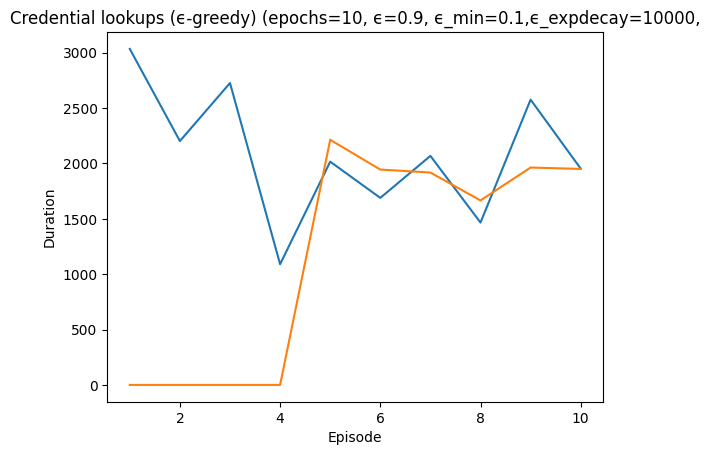

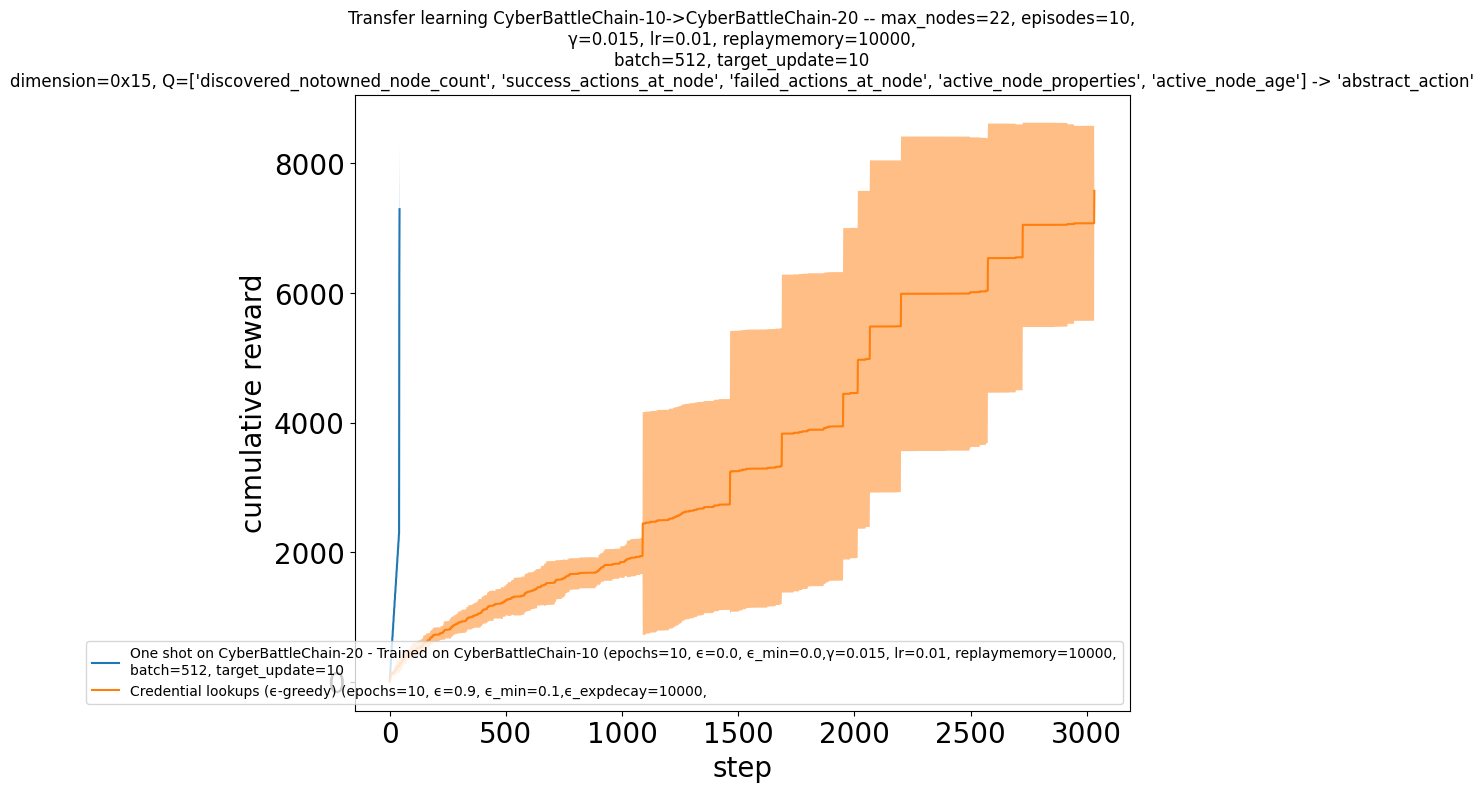

In [18]:
learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=best_dqn_learning_run_10,
    eval_env=cyberbattlechain_20,
    eval_epsilon=0.0,  # alternate with exploration to help generalization to bigger network
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count,
    benchmark_policy=rca.CredentialCacheExploiter(),
    benchmark_training_args={"epsilon": 0.90, "epsilon_exponential_decay": 10000, "epsilon_minimum": 0.10, "title": "Credential lookups (ϵ-greedy)"},
)

###### One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4
Learning with: episode_count=10,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5
  ## Episode: 1/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  362.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  362.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  462.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  462.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  476.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  476.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  482.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  482.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  582.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  582.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  596.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  596.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  696.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  696.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  710.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  710.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  810.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  810.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  816.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  816.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:  830.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:  830.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  930.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  930.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  944.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  944.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  950.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  950.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward: 1050.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward: 1050.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward: 1064.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward: 1064.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward: 1164.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward: 1164.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward: 1175.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward: 1175.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 31|reward: 1184.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 31|reward: 1184.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward: 6184.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward: 6184.0|last_reward_at:   32|Elapsed Time: 0:00:00||

  Episode 1 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 16/1 (0.94)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  362.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:  362.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  462.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  462.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  476.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  476.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  482.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  482.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  582.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  582.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  596.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  596.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  696.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  696.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  710.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:  710.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  716.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  716.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  816.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  816.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  830.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:  830.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  930.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  930.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  941.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  941.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  950.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  950.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward: 1050.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward: 1050.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward: 1056.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward: 1056.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward: 1070.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward: 1070.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward: 1170.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward: 1170.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward: 1184.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward: 1184.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward: 1190.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward: 1190.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward: 6190.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward: 6190.0|last_reward_at:   31|Elapsed Time: 0:00:00||

  Episode 2 ended at t=31 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 17/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/3 (0.79)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  362.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:  362.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  462.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  462.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  473.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  473.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  482.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:  482.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  582.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  582.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  596.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  596.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  696.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:  696.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  710.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  710.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  716.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward:  716.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  816.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:  816.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  822.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  822.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  836.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  836.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  936.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward:  936.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  950.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:  950.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  956.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  956.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward: 1056.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward: 1056.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward: 1070.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward: 1070.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward: 1170.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward: 1170.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward: 1184.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward: 1184.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward: 1190.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward: 1190.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward: 6190.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward: 6190.0|last_reward_at:   32|Elapsed Time: 0:00:00||

  Episode 3 ended at t=32 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 17/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  467.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  467.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  476.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  476.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  576.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  576.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  582.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  582.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  596.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  596.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  696.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  696.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  707.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:  707.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  716.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  716.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  816.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  816.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  822.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  822.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  836.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  836.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:  936.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:  936.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  950.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  950.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  956.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:  956.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward: 1056.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward: 1056.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward: 1062.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward: 1062.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward: 1068.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward: 1068.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward: 1082.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 36|reward: 1082.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward: 1182.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward: 1182.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward: 1196.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 4|Iteration 41|reward: 1196.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward: 1202.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward: 1202.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward: 6202.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward: 6202.0|last_reward_at:   44|Elapsed Time: 0:00:00||

  Episode 4 ended at t=44 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 19/7 (0.73)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/7 (0.61)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  362.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:  362.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  462.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:  462.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  473.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  473.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  482.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:  482.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  582.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  582.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  588.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:  588.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  602.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  602.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  608.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  608.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  708.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:  708.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  722.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  722.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  728.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward:  728.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  828.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  828.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  842.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  842.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  942.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  942.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  948.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:  948.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  962.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  962.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  968.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 30|reward:  968.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward: 1068.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward: 1068.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward: 1082.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward: 1082.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward: 1182.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward: 1182.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward: 1188.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward: 1188.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward: 1202.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward: 1202.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward: 1208.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward: 1208.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward: 6208.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward: 6208.0|last_reward_at:   39|Elapsed Time: 0:00:00||

  Episode 5 ended at t=39 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 20/2 (0.91)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/6 (0.65)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  362.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:  362.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  462.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  462.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  476.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:  476.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  482.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  482.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  582.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  582.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  588.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  588.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  602.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  602.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  702.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 17|reward:  702.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  716.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  716.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  722.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  722.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward:  822.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward:  822.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  828.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  828.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward:  842.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward:  842.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward:  942.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 23|reward:  942.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward:  956.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward:  956.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:  962.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:  962.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 27|reward: 1062.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 27|reward: 1062.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward: 1068.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward: 1068.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward: 1082.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward: 1082.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward: 1182.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward: 1182.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward: 1196.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward: 1196.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 33|reward: 6196.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 33|reward: 6196.0|last_reward_at:   33|Elapsed Time: 0:00:00||

  Episode 6 ended at t=33 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 18/2 (0.90)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  362.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  362.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  462.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 10|reward:  462.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  476.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:  476.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:  482.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:  482.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  582.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:  582.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  588.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  588.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  602.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  602.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  702.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:  702.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:  716.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward:  716.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:  722.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:  722.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:  822.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:  822.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward:  828.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 20|reward:  828.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:  842.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:  842.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward:  942.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 22|reward:  942.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 23|reward:  956.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 7|Iteration 23|reward:  956.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:  962.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:  962.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward:  962.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 34|reward:  968.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 34|reward:  968.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward: 1068.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward: 1068.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward: 1082.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward: 1082.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward: 1182.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward: 1182.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 39|reward: 1193.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 39|reward: 1193.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward: 1202.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward: 1202.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 42|reward: 6202.0|last_reward_at:   40|Elapsed Time: 0:00:01||

Episode 7|Iteration 42|reward: 6202.0|last_reward_at:   42|Elapsed Time: 0:00:01||

  Episode 7 ended at t=42 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 19/10 (0.66)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  362.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:  362.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  462.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  462.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  476.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:  476.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  482.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:  482.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  582.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  582.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  588.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 13|reward:  588.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  602.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  602.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  702.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:  702.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  716.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  716.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  816.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  816.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  822.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:  822.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  828.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:  828.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:  842.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:  842.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  942.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  942.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  956.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  956.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:  962.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:  962.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward: 1062.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward: 1062.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward: 1068.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward: 1068.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward: 1082.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward: 1082.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward: 1182.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward: 1182.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward: 1196.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward: 1196.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward: 6196.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward: 6196.0|last_reward_at:   35|Elapsed Time: 0:00:00||

  Episode 8 ended at t=35 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 18/3 (0.86)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/3 (0.79)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  348.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  362.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  362.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  462.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  462.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  476.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  476.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  482.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  482.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  582.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  582.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  588.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  588.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  602.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:  602.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  702.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  702.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  716.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  716.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:  722.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:  722.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward:  822.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward:  822.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  828.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  828.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  842.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  842.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  942.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 26|reward:  942.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  956.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 9|Iteration 27|reward:  956.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward: 1056.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward: 1056.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward: 1062.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward: 1062.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward: 1068.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward: 1068.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward: 1082.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward: 1082.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward: 1182.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 36|reward: 1182.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward: 1196.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward: 1196.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward: 1202.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward: 1202.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 42|reward: 1208.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 9|Iteration 42|reward: 1208.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 9|Iteration 45|reward: 6208.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 9|Iteration 45|reward: 6208.0|last_reward_at:   45|Elapsed Time: 0:00:01||

  Episode 9 ended at t=45 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/2 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 20/12 (0.62)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 2
  ## Episode: 10/10 'One shot on CyberBattleChain-10 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  348.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:  348.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  362.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  362.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  462.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:  462.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  476.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  476.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  482.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  482.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 22|reward:  488.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 22|reward:  488.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:  494.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:  494.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward:  496.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward:  496.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:  498.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward:  498.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 35|reward:  504.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 10|Iteration 35|reward:  504.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward:  506.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward:  506.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 45|reward:  506.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 49|reward:  506.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward:  508.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward:  508.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 10|Iteration 55|reward:  514.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 10|Iteration 55|reward:  514.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 10|Iteration 56|reward:  518.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 10|Iteration 56|reward:  518.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 10|Iteration 63|reward:  518.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 10|Iteration 69|reward:  524.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 10|Iteration 69|reward:  524.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 10|Iteration 77|reward:  524.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 10|Iteration 85|reward:  524.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 10|Iteration 87|reward:  624.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 10|Iteration 87|reward:  624.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 10|Iteration 88|reward:  638.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 10|Iteration 88|reward:  638.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 10|Iteration 89|reward:  738.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 10|Iteration 89|reward:  738.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 10|Iteration 90|reward:  752.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 10|Iteration 90|reward:  752.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 10|Iteration 91|reward:  758.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 10|Iteration 91|reward:  758.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 10|Iteration 98|reward:  758.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 10|Iteration 103|reward:  758.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 10|Iteration 104|reward:  762.0|last_reward_at:   91|Elapsed Time: 0:00:01||

Episode 10|Iteration 104|reward:  762.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 10|Iteration 109|reward:  762.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 10|Iteration 110|reward:  768.0|last_reward_at:  104|Elapsed Time: 0:00:01||

Episode 10|Iteration 110|reward:  768.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 10|Iteration 112|reward:  770.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 10|Iteration 112|reward:  770.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 10|Iteration 115|reward:  776.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 10|Iteration 115|reward:  776.0|last_reward_at:  115|Elapsed Time: 0:00:01||

Episode 10|Iteration 122|reward:  776.0|last_reward_at:  115|Elapsed Time: 0:00:02||

Episode 10|Iteration 129|reward:  776.0|last_reward_at:  115|Elapsed Time: 0:00:02||

Episode 10|Iteration 136|reward:  776.0|last_reward_at:  115|Elapsed Time: 0:00:02||

Episode 10|Iteration 139|reward:  778.0|last_reward_at:  115|Elapsed Time: 0:00:02||

Episode 10|Iteration 139|reward:  778.0|last_reward_at:  139|Elapsed Time: 0:00:02||

Episode 10|Iteration 146|reward:  778.0|last_reward_at:  139|Elapsed Time: 0:00:02||

Episode 10|Iteration 153|reward:  778.0|last_reward_at:  139|Elapsed Time: 0:00:02||

Episode 10|Iteration 160|reward:  778.0|last_reward_at:  139|Elapsed Time: 0:00:02||

Episode 10|Iteration 163|reward:  878.0|last_reward_at:  139|Elapsed Time: 0:00:02||

Episode 10|Iteration 163|reward:  878.0|last_reward_at:  163|Elapsed Time: 0:00:02||

Episode 10|Iteration 164|reward:  892.0|last_reward_at:  163|Elapsed Time: 0:00:02||

Episode 10|Iteration 164|reward:  892.0|last_reward_at:  164|Elapsed Time: 0:00:02||

Episode 10|Iteration 165|reward:  992.0|last_reward_at:  164|Elapsed Time: 0:00:02||

Episode 10|Iteration 165|reward:  992.0|last_reward_at:  165|Elapsed Time: 0:00:02||

Episode 10|Iteration 166|reward: 1006.0|last_reward_at:  165|Elapsed Time: 0:00:02||

Episode 10|Iteration 166|reward: 1006.0|last_reward_at:  166|Elapsed Time: 0:00:02||

Episode 10|Iteration 167|reward: 1012.0|last_reward_at:  166|Elapsed Time: 0:00:02||

Episode 10|Iteration 167|reward: 1012.0|last_reward_at:  167|Elapsed Time: 0:00:02||

Episode 10|Iteration 169|reward: 1112.0|last_reward_at:  167|Elapsed Time: 0:00:02||

Episode 10|Iteration 169|reward: 1112.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 10|Iteration 170|reward: 1126.0|last_reward_at:  169|Elapsed Time: 0:00:02||

Episode 10|Iteration 170|reward: 1126.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 10|Iteration 172|reward: 1226.0|last_reward_at:  170|Elapsed Time: 0:00:02||

Episode 10|Iteration 172|reward: 1226.0|last_reward_at:  172|Elapsed Time: 0:00:02||

Episode 10|Iteration 173|reward: 1240.0|last_reward_at:  172|Elapsed Time: 0:00:02||

Episode 10|Iteration 173|reward: 1240.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 10|Iteration 174|reward: 1246.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 10|Iteration 174|reward: 1246.0|last_reward_at:  174|Elapsed Time: 0:00:02||

Episode 10|Iteration 180|reward: 1246.0|last_reward_at:  174|Elapsed Time: 0:00:03||

Episode 10|Iteration 182|reward: 1252.0|last_reward_at:  174|Elapsed Time: 0:00:03||

Episode 10|Iteration 182|reward: 1252.0|last_reward_at:  182|Elapsed Time: 0:00:03||

Episode 10|Iteration 185|reward: 6252.0|last_reward_at:  182|Elapsed Time: 0:00:03||

Episode 10|Iteration 185|reward: 6252.0|last_reward_at:  185|Elapsed Time: 0:00:03||

  Episode 10 ended at t=185 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 18/35 (0.34)
    exploit-remote: 14/103 (0.12)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 0
simulation ended


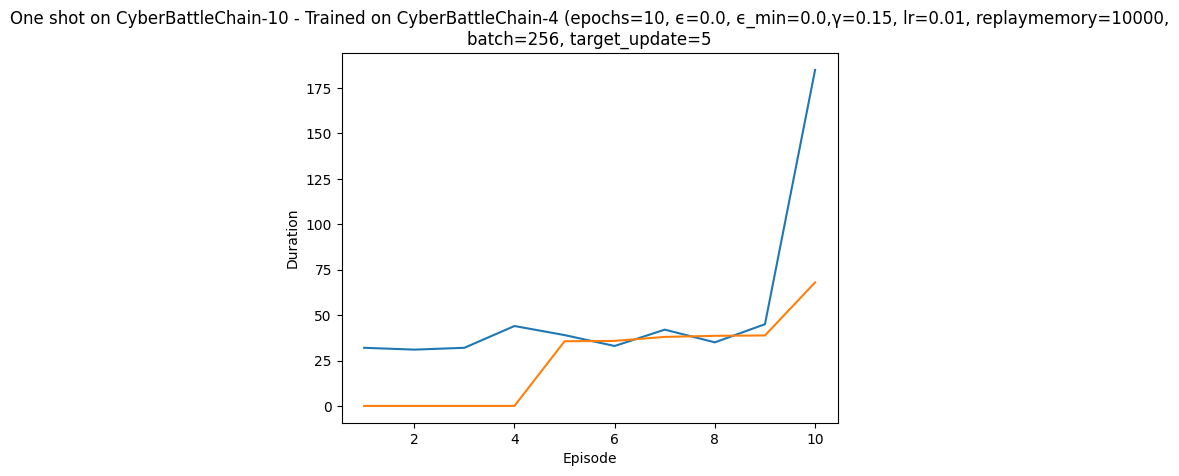

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:   20.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  120.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  134.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  134.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  142.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  142.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:  148.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:  148.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  154.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward:  154.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  254.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  254.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  268.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  268.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 64|reward:  272.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 1|Iteration 64|reward:  272.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:  278.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:  278.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 73|reward:  378.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 73|reward:  378.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 1|Iteration 82|reward:  392.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 1|Iteration 82|reward:  392.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:  398.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 1|Iteration 84|reward:  398.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 90|reward:  404.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 1|Iteration 90|reward:  404.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 1|Iteration 93|reward:  504.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 1|Iteration 93|reward:  504.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  510.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:  510.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 108|reward:  512.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 1|Iteration 108|reward:  512.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:  523.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:  523.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 1|Iteration 141|reward:  527.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 1|Iteration 141|reward:  527.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 1|Iteration 168|reward:  529.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 1|Iteration 168|reward:  529.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 1|Iteration 188|reward:  529.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 1|Iteration 189|reward:  538.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 1|Iteration 189|reward:  538.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 1|Iteration 194|reward:  638.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 1|Iteration 194|reward:  638.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 1|Iteration 213|reward:  638.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 1|Iteration 224|reward:  649.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 1|Iteration 224|reward:  649.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:  649.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 1|Iteration 254|reward:  657.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 1|Iteration 254|reward:  657.0|last_reward_at:  254|Elapsed Time: 0:00:00||

Episode 1|Iteration 259|reward:  666.0|last_reward_at:  254|Elapsed Time: 0:00:00||

Episode 1|Iteration 259|reward:  666.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 1|Iteration 266|reward:  766.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 1|Iteration 266|reward:  766.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 271|reward:  772.0|last_reward_at:  266|Elapsed Time: 0:00:00||

Episode 1|Iteration 271|reward:  772.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 1|Iteration 295|reward:  772.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 1|Iteration 302|reward:  786.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 1|Iteration 302|reward:  786.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 1|Iteration 304|reward:  886.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 1|Iteration 304|reward:  886.0|last_reward_at:  304|Elapsed Time: 0:00:01||

Episode 1|Iteration 305|reward:  888.0|last_reward_at:  304|Elapsed Time: 0:00:01||

Episode 1|Iteration 305|reward:  888.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 1|Iteration 329|reward:  888.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 1|Iteration 347|reward:  902.0|last_reward_at:  305|Elapsed Time: 0:00:01||

Episode 1|Iteration 347|reward:  902.0|last_reward_at:  347|Elapsed Time: 0:00:01||

Episode 1|Iteration 356|reward:  908.0|last_reward_at:  347|Elapsed Time: 0:00:01||

Episode 1|Iteration 356|reward:  908.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 1|Iteration 362|reward: 1008.0|last_reward_at:  356|Elapsed Time: 0:00:01||

Episode 1|Iteration 362|reward: 1008.0|last_reward_at:  362|Elapsed Time: 0:00:01||

Episode 1|Iteration 365|reward: 1010.0|last_reward_at:  362|Elapsed Time: 0:00:01||

Episode 1|Iteration 365|reward: 1010.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 1|Iteration 382|reward: 1010.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 1|Iteration 392|reward: 1016.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 1|Iteration 392|reward: 1016.0|last_reward_at:  392|Elapsed Time: 0:00:01||

Episode 1|Iteration 394|reward: 1022.0|last_reward_at:  392|Elapsed Time: 0:00:01||

Episode 1|Iteration 394|reward: 1022.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 1|Iteration 401|reward: 1028.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 1|Iteration 401|reward: 1028.0|last_reward_at:  401|Elapsed Time: 0:00:01||

Episode 1|Iteration 404|reward: 1042.0|last_reward_at:  401|Elapsed Time: 0:00:01||

Episode 1|Iteration 404|reward: 1042.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 1|Iteration 407|reward: 1142.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 1|Iteration 407|reward: 1142.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 1|Iteration 410|reward: 1144.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 1|Iteration 410|reward: 1144.0|last_reward_at:  410|Elapsed Time: 0:00:01||

Episode 1|Iteration 422|reward: 1146.0|last_reward_at:  410|Elapsed Time: 0:00:01||

Episode 1|Iteration 422|reward: 1146.0|last_reward_at:  422|Elapsed Time: 0:00:01||

Episode 1|Iteration 435|reward: 1152.0|last_reward_at:  422|Elapsed Time: 0:00:01||

Episode 1|Iteration 435|reward: 1152.0|last_reward_at:  435|Elapsed Time: 0:00:01||

Episode 1|Iteration 450|reward: 1152.0|last_reward_at:  435|Elapsed Time: 0:00:01||

Episode 1|Iteration 458|reward: 1166.0|last_reward_at:  435|Elapsed Time: 0:00:01||

Episode 1|Iteration 458|reward: 1166.0|last_reward_at:  458|Elapsed Time: 0:00:01||

Episode 1|Iteration 464|reward: 1172.0|last_reward_at:  458|Elapsed Time: 0:00:02||

Episode 1|Iteration 464|reward: 1172.0|last_reward_at:  464|Elapsed Time: 0:00:02||

Episode 1|Iteration 473|reward: 1272.0|last_reward_at:  464|Elapsed Time: 0:00:02||

Episode 1|Iteration 473|reward: 1272.0|last_reward_at:  473|Elapsed Time: 0:00:02||

Episode 1|Iteration 489|reward: 1286.0|last_reward_at:  473|Elapsed Time: 0:00:02||

Episode 1|Iteration 489|reward: 1286.0|last_reward_at:  489|Elapsed Time: 0:00:02||

Episode 1|Iteration 503|reward: 6286.0|last_reward_at:  489|Elapsed Time: 0:00:02||

Episode 1|Iteration 503|reward: 6286.0|last_reward_at:  503|Elapsed Time: 0:00:02||

  Episode 1 ended at t=503 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/173 (0.10)
    explore-remote: 19/281 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 52
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8608, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  132.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  132.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  140.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  140.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:  240.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  242.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  242.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  248.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:  248.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  259.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  259.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  268.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  268.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  368.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  368.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  379.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  379.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  385.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  385.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  394.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  394.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  396.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  396.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  496.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  496.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:  502.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:  502.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  516.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  516.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 91|reward:  520.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 91|reward:  520.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 2|Iteration 98|reward:  522.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 2|Iteration 98|reward:  522.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 2|Iteration 101|reward:  622.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 2|Iteration 101|reward:  622.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 2|Iteration 106|reward:  636.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 2|Iteration 106|reward:  636.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 2|Iteration 108|reward:  736.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 2|Iteration 108|reward:  736.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 2|Iteration 110|reward:  738.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 2|Iteration 110|reward:  738.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 112|reward:  744.0|last_reward_at:  110|Elapsed Time: 0:00:00||

Episode 2|Iteration 112|reward:  744.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 2|Iteration 117|reward:  750.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 2|Iteration 117|reward:  750.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 2|Iteration 124|reward:  756.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 2|Iteration 124|reward:  756.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 2|Iteration 145|reward:  756.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 2|Iteration 146|reward:  762.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 2|Iteration 146|reward:  762.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 2|Iteration 162|reward:  776.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 2|Iteration 162|reward:  776.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 2|Iteration 177|reward:  778.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 2|Iteration 177|reward:  778.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 2|Iteration 182|reward:  782.0|last_reward_at:  177|Elapsed Time: 0:00:00||

Episode 2|Iteration 182|reward:  782.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 2|Iteration 185|reward:  882.0|last_reward_at:  182|Elapsed Time: 0:00:00||

Episode 2|Iteration 185|reward:  882.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 2|Iteration 202|reward:  888.0|last_reward_at:  185|Elapsed Time: 0:00:00||

Episode 2|Iteration 202|reward:  888.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 2|Iteration 215|reward:  902.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 2|Iteration 215|reward:  902.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 2|Iteration 226|reward: 1002.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 2|Iteration 226|reward: 1002.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward: 1008.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward: 1008.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 2|Iteration 238|reward: 1014.0|last_reward_at:  228|Elapsed Time: 0:00:00||

Episode 2|Iteration 238|reward: 1014.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 2|Iteration 257|reward: 1014.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 2|Iteration 273|reward: 1028.0|last_reward_at:  238|Elapsed Time: 0:00:01||

Episode 2|Iteration 273|reward: 1028.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 2|Iteration 284|reward: 1034.0|last_reward_at:  273|Elapsed Time: 0:00:01||

Episode 2|Iteration 284|reward: 1034.0|last_reward_at:  284|Elapsed Time: 0:00:01||

Episode 2|Iteration 285|reward: 1134.0|last_reward_at:  284|Elapsed Time: 0:00:01||

Episode 2|Iteration 285|reward: 1134.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 2|Iteration 298|reward: 1140.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 2|Iteration 298|reward: 1140.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 2|Iteration 301|reward: 1142.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 2|Iteration 301|reward: 1142.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 2|Iteration 318|reward: 1142.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 2|Iteration 337|reward: 1142.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 2|Iteration 354|reward: 1144.0|last_reward_at:  301|Elapsed Time: 0:00:01||

Episode 2|Iteration 354|reward: 1144.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 2|Iteration 373|reward: 1144.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 2|Iteration 388|reward: 1155.0|last_reward_at:  354|Elapsed Time: 0:00:01||

Episode 2|Iteration 388|reward: 1155.0|last_reward_at:  388|Elapsed Time: 0:00:01||

Episode 2|Iteration 394|reward: 1161.0|last_reward_at:  388|Elapsed Time: 0:00:01||

Episode 2|Iteration 394|reward: 1161.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 2|Iteration 410|reward: 1161.0|last_reward_at:  394|Elapsed Time: 0:00:01||

Episode 2|Iteration 427|reward: 1161.0|last_reward_at:  394|Elapsed Time: 0:00:02||

Episode 2|Iteration 442|reward: 1161.0|last_reward_at:  394|Elapsed Time: 0:00:02||

Episode 2|Iteration 443|reward: 1170.0|last_reward_at:  394|Elapsed Time: 0:00:02||

Episode 2|Iteration 443|reward: 1170.0|last_reward_at:  443|Elapsed Time: 0:00:02||

Episode 2|Iteration 452|reward: 1176.0|last_reward_at:  443|Elapsed Time: 0:00:02||

Episode 2|Iteration 452|reward: 1176.0|last_reward_at:  452|Elapsed Time: 0:00:02||

Episode 2|Iteration 454|reward: 1276.0|last_reward_at:  452|Elapsed Time: 0:00:02||

Episode 2|Iteration 454|reward: 1276.0|last_reward_at:  454|Elapsed Time: 0:00:02||

Episode 2|Iteration 470|reward: 1276.0|last_reward_at:  454|Elapsed Time: 0:00:02||

Episode 2|Iteration 477|reward: 1282.0|last_reward_at:  454|Elapsed Time: 0:00:02||

Episode 2|Iteration 477|reward: 1282.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 2|Iteration 492|reward: 1282.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 2|Iteration 507|reward: 1282.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 2|Iteration 523|reward: 1282.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 2|Iteration 537|reward: 1282.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 2|Iteration 551|reward: 1282.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 2|Iteration 565|reward: 1282.0|last_reward_at:  477|Elapsed Time: 0:00:03||

Episode 2|Iteration 579|reward: 1282.0|last_reward_at:  477|Elapsed Time: 0:00:03||

Episode 2|Iteration 593|reward: 1282.0|last_reward_at:  477|Elapsed Time: 0:00:03||

Episode 2|Iteration 604|reward: 1282.0|last_reward_at:  477|Elapsed Time: 0:00:03||

Episode 2|Iteration 616|reward: 1282.0|last_reward_at:  477|Elapsed Time: 0:00:03||

Episode 2|Iteration 631|reward: 1282.0|last_reward_at:  477|Elapsed Time: 0:00:03||

Episode 2|Iteration 634|reward: 1293.0|last_reward_at:  477|Elapsed Time: 0:00:03||

Episode 2|Iteration 634|reward: 1293.0|last_reward_at:  634|Elapsed Time: 0:00:03||

Episode 2|Iteration 645|reward: 1293.0|last_reward_at:  634|Elapsed Time: 0:00:03||

Episode 2|Iteration 658|reward: 1302.0|last_reward_at:  634|Elapsed Time: 0:00:03||

Episode 2|Iteration 658|reward: 1302.0|last_reward_at:  658|Elapsed Time: 0:00:03||

Episode 2|Iteration 659|reward: 6302.0|last_reward_at:  658|Elapsed Time: 0:00:03||

Episode 2|Iteration 659|reward: 6302.0|last_reward_at:  659|Elapsed Time: 0:00:03||

  Episode 2 ended at t=659 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/247 (0.08)
    explore-remote: 20/360 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 87
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.8123, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:  118.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  129.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:  129.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  138.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:  138.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  146.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  146.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  152.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:  152.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  252.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward:  252.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  266.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  266.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  366.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  366.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  368.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  368.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  370.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  370.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  381.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  381.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 66|reward:  387.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 66|reward:  387.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  393.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  393.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 85|reward:  402.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 85|reward:  402.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 3|Iteration 88|reward:  502.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 3|Iteration 88|reward:  502.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 3|Iteration 104|reward:  516.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 3|Iteration 104|reward:  516.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 3|Iteration 105|reward:  522.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 3|Iteration 105|reward:  522.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 3|Iteration 108|reward:  526.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 3|Iteration 108|reward:  526.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 3|Iteration 123|reward:  626.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 3|Iteration 123|reward:  626.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 3|Iteration 126|reward:  628.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 3|Iteration 126|reward:  628.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 3|Iteration 140|reward:  639.0|last_reward_at:  126|Elapsed Time: 0:00:00||

Episode 3|Iteration 140|reward:  639.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 3|Iteration 142|reward:  647.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 3|Iteration 142|reward:  647.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 3|Iteration 149|reward:  653.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 3|Iteration 149|reward:  653.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 3|Iteration 154|reward:  659.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 3|Iteration 154|reward:  659.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 3|Iteration 155|reward:  668.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 3|Iteration 155|reward:  668.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 3|Iteration 160|reward:  768.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 3|Iteration 160|reward:  768.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 3|Iteration 185|reward:  768.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 3|Iteration 207|reward:  768.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 3|Iteration 228|reward:  768.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 3|Iteration 252|reward:  768.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 3|Iteration 267|reward:  782.0|last_reward_at:  160|Elapsed Time: 0:00:00||

Episode 3|Iteration 267|reward:  782.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 3|Iteration 271|reward:  882.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 3|Iteration 271|reward:  882.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 3|Iteration 282|reward:  896.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 3|Iteration 282|reward:  896.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 3|Iteration 287|reward:  996.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 3|Iteration 287|reward:  996.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 3|Iteration 289|reward: 1010.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 3|Iteration 289|reward: 1010.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 3|Iteration 292|reward: 1110.0|last_reward_at:  289|Elapsed Time: 0:00:01||

Episode 3|Iteration 292|reward: 1110.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 3|Iteration 294|reward: 1124.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 3|Iteration 294|reward: 1124.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 3|Iteration 295|reward: 1224.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 3|Iteration 295|reward: 1224.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 3|Iteration 296|reward: 1230.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 3|Iteration 296|reward: 1230.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 3|Iteration 299|reward: 1232.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 3|Iteration 299|reward: 1232.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 3|Iteration 303|reward: 1238.0|last_reward_at:  299|Elapsed Time: 0:00:01||

Episode 3|Iteration 303|reward: 1238.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 3|Iteration 314|reward: 1244.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 3|Iteration 314|reward: 1244.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 3|Iteration 315|reward: 1246.0|last_reward_at:  314|Elapsed Time: 0:00:01||

Episode 3|Iteration 315|reward: 1246.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 3|Iteration 324|reward: 1252.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 3|Iteration 324|reward: 1252.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 3|Iteration 325|reward: 1254.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 3|Iteration 325|reward: 1254.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 3|Iteration 335|reward: 1256.0|last_reward_at:  325|Elapsed Time: 0:00:01||

Episode 3|Iteration 335|reward: 1256.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 3|Iteration 343|reward: 1262.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 3|Iteration 343|reward: 1262.0|last_reward_at:  343|Elapsed Time: 0:00:01||

Episode 3|Iteration 348|reward: 1268.0|last_reward_at:  343|Elapsed Time: 0:00:01||

Episode 3|Iteration 348|reward: 1268.0|last_reward_at:  348|Elapsed Time: 0:00:01||

Episode 3|Iteration 364|reward: 1268.0|last_reward_at:  348|Elapsed Time: 0:00:01||

Episode 3|Iteration 372|reward: 1282.0|last_reward_at:  348|Elapsed Time: 0:00:01||

Episode 3|Iteration 372|reward: 1282.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 3|Iteration 374|reward: 6282.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 3|Iteration 374|reward: 6282.0|last_reward_at:  374|Elapsed Time: 0:00:01||

  Episode 3 ended at t=374 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/130 (0.13)
    explore-remote: 19/195 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 59
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.7862, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  129.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  129.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  135.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  135.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  144.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  144.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  244.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  244.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  250.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:  250.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  261.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  261.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:  263.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:  263.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 74|reward:  267.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 74|reward:  267.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 4|Iteration 83|reward:  276.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 4|Iteration 83|reward:  276.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  376.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:  376.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:  376.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 115|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 4|Iteration 115|reward:  390.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 118|reward:  490.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 118|reward:  490.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 4|Iteration 119|reward:  496.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 4|Iteration 119|reward:  496.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 4|Iteration 122|reward:  507.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 4|Iteration 122|reward:  507.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 4|Iteration 127|reward:  509.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 4|Iteration 127|reward:  509.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 4|Iteration 128|reward:  515.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 4|Iteration 128|reward:  515.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 4|Iteration 129|reward:  519.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 4|Iteration 129|reward:  519.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 4|Iteration 150|reward:  525.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 4|Iteration 150|reward:  525.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 4|Iteration 179|reward:  525.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 4|Iteration 197|reward:  534.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 4|Iteration 197|reward:  534.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 4|Iteration 203|reward:  634.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 4|Iteration 203|reward:  634.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 4|Iteration 211|reward:  645.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 4|Iteration 211|reward:  645.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 4|Iteration 213|reward:  653.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 4|Iteration 213|reward:  653.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 4|Iteration 214|reward:  659.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 4|Iteration 214|reward:  659.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 4|Iteration 215|reward:  668.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 4|Iteration 215|reward:  668.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 4|Iteration 220|reward:  768.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 4|Iteration 220|reward:  768.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 4|Iteration 226|reward:  782.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 4|Iteration 226|reward:  782.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 4|Iteration 233|reward:  882.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 4|Iteration 233|reward:  882.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 4|Iteration 245|reward:  893.0|last_reward_at:  233|Elapsed Time: 0:00:00||

Episode 4|Iteration 245|reward:  893.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 4|Iteration 251|reward:  899.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 4|Iteration 251|reward:  899.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 4|Iteration 254|reward:  908.0|last_reward_at:  251|Elapsed Time: 0:00:00||

Episode 4|Iteration 254|reward:  908.0|last_reward_at:  254|Elapsed Time: 0:00:00||

Episode 4|Iteration 255|reward: 1008.0|last_reward_at:  254|Elapsed Time: 0:00:00||

Episode 4|Iteration 255|reward: 1008.0|last_reward_at:  255|Elapsed Time: 0:00:00||

Episode 4|Iteration 264|reward: 1010.0|last_reward_at:  255|Elapsed Time: 0:00:00||

Episode 4|Iteration 264|reward: 1010.0|last_reward_at:  264|Elapsed Time: 0:00:00||

Episode 4|Iteration 272|reward: 1016.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 4|Iteration 272|reward: 1016.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 4|Iteration 286|reward: 1018.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 4|Iteration 286|reward: 1018.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 4|Iteration 291|reward: 1029.0|last_reward_at:  286|Elapsed Time: 0:00:01||

Episode 4|Iteration 291|reward: 1029.0|last_reward_at:  291|Elapsed Time: 0:00:01||

Episode 4|Iteration 293|reward: 1035.0|last_reward_at:  291|Elapsed Time: 0:00:01||

Episode 4|Iteration 293|reward: 1035.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 4|Iteration 311|reward: 1039.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 4|Iteration 311|reward: 1039.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 4|Iteration 331|reward: 1039.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 4|Iteration 342|reward: 1039.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 4|Iteration 358|reward: 1039.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 4|Iteration 373|reward: 1039.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 4|Iteration 389|reward: 1039.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 4|Iteration 398|reward: 1041.0|last_reward_at:  311|Elapsed Time: 0:00:01||

Episode 4|Iteration 398|reward: 1041.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 4|Iteration 415|reward: 1041.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 4|Iteration 431|reward: 1041.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 4|Iteration 446|reward: 1041.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 4|Iteration 456|reward: 1041.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 4|Iteration 475|reward: 1041.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 4|Iteration 495|reward: 1041.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 4|Iteration 513|reward: 1041.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 4|Iteration 532|reward: 1041.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 4|Iteration 549|reward: 1041.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 4|Iteration 566|reward: 1041.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 4|Iteration 583|reward: 1041.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 4|Iteration 601|reward: 1041.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 4|Iteration 618|reward: 1041.0|last_reward_at:  398|Elapsed Time: 0:00:03||

Episode 4|Iteration 634|reward: 1041.0|last_reward_at:  398|Elapsed Time: 0:00:03||

Episode 4|Iteration 650|reward: 1041.0|last_reward_at:  398|Elapsed Time: 0:00:03||

Episode 4|Iteration 657|reward: 1050.0|last_reward_at:  398|Elapsed Time: 0:00:03||

Episode 4|Iteration 657|reward: 1050.0|last_reward_at:  657|Elapsed Time: 0:00:03||

Episode 4|Iteration 665|reward: 1150.0|last_reward_at:  657|Elapsed Time: 0:00:03||

Episode 4|Iteration 665|reward: 1150.0|last_reward_at:  665|Elapsed Time: 0:00:03||

Episode 4|Iteration 682|reward: 1150.0|last_reward_at:  665|Elapsed Time: 0:00:03||

Episode 4|Iteration 688|reward: 1161.0|last_reward_at:  665|Elapsed Time: 0:00:03||

Episode 4|Iteration 688|reward: 1161.0|last_reward_at:  688|Elapsed Time: 0:00:03||

Episode 4|Iteration 703|reward: 1161.0|last_reward_at:  688|Elapsed Time: 0:00:03||

Episode 4|Iteration 704|reward: 1167.0|last_reward_at:  688|Elapsed Time: 0:00:03||

Episode 4|Iteration 704|reward: 1167.0|last_reward_at:  704|Elapsed Time: 0:00:03||

Episode 4|Iteration 720|reward: 1167.0|last_reward_at:  704|Elapsed Time: 0:00:03||

Episode 4|Iteration 736|reward: 1167.0|last_reward_at:  704|Elapsed Time: 0:00:03||

Episode 4|Iteration 748|reward: 1167.0|last_reward_at:  704|Elapsed Time: 0:00:03||

Episode 4|Iteration 761|reward: 1175.0|last_reward_at:  704|Elapsed Time: 0:00:04||

Episode 4|Iteration 761|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:04||

Episode 4|Iteration 774|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:04||

Episode 4|Iteration 787|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:04||

Episode 4|Iteration 798|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:04||

Episode 4|Iteration 812|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:04||

Episode 4|Iteration 826|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:04||

Episode 4|Iteration 842|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:04||

Episode 4|Iteration 858|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:04||

Episode 4|Iteration 875|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:04||

Episode 4|Iteration 893|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:04||

Episode 4|Iteration 910|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:05||

Episode 4|Iteration 926|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:05||

Episode 4|Iteration 942|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:05||

Episode 4|Iteration 959|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:05||

Episode 4|Iteration 975|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:05||

Episode 4|Iteration 986|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:05||

Episode 4|Iteration 1001|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:05||

Episode 4|Iteration 1016|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:05||

Episode 4|Iteration 1026|reward: 1175.0|last_reward_at:  761|Elapsed Time: 0:00:05||

Episode 4|Iteration 1033|reward: 1184.0|last_reward_at:  761|Elapsed Time: 0:00:05||

Episode 4|Iteration 1033|reward: 1184.0|last_reward_at: 1033|Elapsed Time: 0:00:05||

Episode 4|Iteration 1034|reward: 1284.0|last_reward_at: 1033|Elapsed Time: 0:00:05||

Episode 4|Iteration 1034|reward: 1284.0|last_reward_at: 1034|Elapsed Time: 0:00:05||

Episode 4|Iteration 1040|reward: 1298.0|last_reward_at: 1034|Elapsed Time: 0:00:05||

Episode 4|Iteration 1040|reward: 1298.0|last_reward_at: 1040|Elapsed Time: 0:00:05||

Episode 4|Iteration 1042|reward: 6298.0|last_reward_at: 1040|Elapsed Time: 0:00:05||

Episode 4|Iteration 1042|reward: 6298.0|last_reward_at: 1042|Elapsed Time: 0:00:05||

  Episode 4 ended at t=1042 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 20/423 (0.05)
    explore-remote: 20/568 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 250
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.7183, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:   16.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:  116.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  118.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  132.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward:  132.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  232.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 5|Iteration 34|reward:  232.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  238.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  238.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 46|reward:  244.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 46|reward:  244.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 50|reward:  250.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 50|reward:  250.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  264.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  264.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 62|reward:  266.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 62|reward:  266.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 70|reward:  366.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 70|reward:  366.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 5|Iteration 74|reward:  377.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 5|Iteration 74|reward:  377.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 5|Iteration 78|reward:  383.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 5|Iteration 78|reward:  383.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 5|Iteration 82|reward:  389.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 5|Iteration 82|reward:  389.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 97|reward:  391.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 5|Iteration 97|reward:  391.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 5|Iteration 100|reward:  400.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 5|Iteration 100|reward:  400.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 5|Iteration 105|reward:  500.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 5|Iteration 105|reward:  500.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 5|Iteration 106|reward:  506.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 5|Iteration 106|reward:  506.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 5|Iteration 139|reward:  506.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 5|Iteration 176|reward:  506.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 5|Iteration 210|reward:  506.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:  506.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 5|Iteration 239|reward:  517.0|last_reward_at:  106|Elapsed Time: 0:00:00||

Episode 5|Iteration 239|reward:  517.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 5|Iteration 244|reward:  521.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 5|Iteration 244|reward:  521.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 5|Iteration 255|reward:  530.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 5|Iteration 255|reward:  530.0|last_reward_at:  255|Elapsed Time: 0:00:00||

Episode 5|Iteration 258|reward:  630.0|last_reward_at:  255|Elapsed Time: 0:00:00||

Episode 5|Iteration 258|reward:  630.0|last_reward_at:  258|Elapsed Time: 0:00:00||

Episode 5|Iteration 267|reward:  641.0|last_reward_at:  258|Elapsed Time: 0:00:00||

Episode 5|Iteration 267|reward:  641.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 5|Iteration 273|reward:  647.0|last_reward_at:  267|Elapsed Time: 0:00:00||

Episode 5|Iteration 273|reward:  647.0|last_reward_at:  273|Elapsed Time: 0:00:00||

Episode 5|Iteration 281|reward:  649.0|last_reward_at:  273|Elapsed Time: 0:00:00||

Episode 5|Iteration 281|reward:  649.0|last_reward_at:  281|Elapsed Time: 0:00:00||

Episode 5|Iteration 300|reward:  658.0|last_reward_at:  281|Elapsed Time: 0:00:00||

Episode 5|Iteration 300|reward:  658.0|last_reward_at:  300|Elapsed Time: 0:00:00||

Episode 5|Iteration 303|reward:  758.0|last_reward_at:  300|Elapsed Time: 0:00:00||

Episode 5|Iteration 303|reward:  758.0|last_reward_at:  303|Elapsed Time: 0:00:00||

Episode 5|Iteration 326|reward:  758.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 5|Iteration 335|reward:  764.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 5|Iteration 335|reward:  764.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 5|Iteration 358|reward:  764.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 5|Iteration 382|reward:  764.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 5|Iteration 385|reward:  775.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 5|Iteration 385|reward:  775.0|last_reward_at:  385|Elapsed Time: 0:00:01||

Episode 5|Iteration 386|reward:  784.0|last_reward_at:  385|Elapsed Time: 0:00:01||

Episode 5|Iteration 386|reward:  784.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 5|Iteration 390|reward:  786.0|last_reward_at:  386|Elapsed Time: 0:00:01||

Episode 5|Iteration 390|reward:  786.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 5|Iteration 391|reward:  886.0|last_reward_at:  390|Elapsed Time: 0:00:01||

Episode 5|Iteration 391|reward:  886.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 5|Iteration 403|reward:  897.0|last_reward_at:  391|Elapsed Time: 0:00:01||

Episode 5|Iteration 403|reward:  897.0|last_reward_at:  403|Elapsed Time: 0:00:01||

Episode 5|Iteration 410|reward:  903.0|last_reward_at:  403|Elapsed Time: 0:00:01||

Episode 5|Iteration 410|reward:  903.0|last_reward_at:  410|Elapsed Time: 0:00:01||

Episode 5|Iteration 432|reward:  903.0|last_reward_at:  410|Elapsed Time: 0:00:01||

Episode 5|Iteration 442|reward:  911.0|last_reward_at:  410|Elapsed Time: 0:00:01||

Episode 5|Iteration 442|reward:  911.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 5|Iteration 456|reward:  911.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 5|Iteration 456|reward:  920.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 5|Iteration 456|reward:  920.0|last_reward_at:  456|Elapsed Time: 0:00:01||

Episode 5|Iteration 457|reward: 1020.0|last_reward_at:  456|Elapsed Time: 0:00:01||

Episode 5|Iteration 457|reward: 1020.0|last_reward_at:  457|Elapsed Time: 0:00:01||

Episode 5|Iteration 463|reward: 1031.0|last_reward_at:  457|Elapsed Time: 0:00:01||

Episode 5|Iteration 463|reward: 1031.0|last_reward_at:  463|Elapsed Time: 0:00:01||

Episode 5|Iteration 468|reward: 1035.0|last_reward_at:  463|Elapsed Time: 0:00:01||

Episode 5|Iteration 468|reward: 1035.0|last_reward_at:  468|Elapsed Time: 0:00:01||

Episode 5|Iteration 476|reward: 1037.0|last_reward_at:  468|Elapsed Time: 0:00:01||

Episode 5|Iteration 476|reward: 1037.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 5|Iteration 496|reward: 1037.0|last_reward_at:  476|Elapsed Time: 0:00:01||

Episode 5|Iteration 516|reward: 1037.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 5|Iteration 521|reward: 1046.0|last_reward_at:  476|Elapsed Time: 0:00:02||

Episode 5|Iteration 521|reward: 1046.0|last_reward_at:  521|Elapsed Time: 0:00:02||

Episode 5|Iteration 523|reward: 1146.0|last_reward_at:  521|Elapsed Time: 0:00:02||

Episode 5|Iteration 523|reward: 1146.0|last_reward_at:  523|Elapsed Time: 0:00:02||

Episode 5|Iteration 538|reward: 1148.0|last_reward_at:  523|Elapsed Time: 0:00:02||

Episode 5|Iteration 538|reward: 1148.0|last_reward_at:  538|Elapsed Time: 0:00:02||

Episode 5|Iteration 555|reward: 1148.0|last_reward_at:  538|Elapsed Time: 0:00:02||

Episode 5|Iteration 570|reward: 1148.0|last_reward_at:  538|Elapsed Time: 0:00:02||

Episode 5|Iteration 584|reward: 1148.0|last_reward_at:  538|Elapsed Time: 0:00:02||

Episode 5|Iteration 601|reward: 1148.0|last_reward_at:  538|Elapsed Time: 0:00:02||

Episode 5|Iteration 614|reward: 1162.0|last_reward_at:  538|Elapsed Time: 0:00:02||

Episode 5|Iteration 614|reward: 1162.0|last_reward_at:  614|Elapsed Time: 0:00:02||

Episode 5|Iteration 615|reward: 1262.0|last_reward_at:  614|Elapsed Time: 0:00:02||

Episode 5|Iteration 615|reward: 1262.0|last_reward_at:  615|Elapsed Time: 0:00:02||

Episode 5|Iteration 629|reward: 1262.0|last_reward_at:  615|Elapsed Time: 0:00:02||

Episode 5|Iteration 640|reward: 1268.0|last_reward_at:  615|Elapsed Time: 0:00:02||

Episode 5|Iteration 640|reward: 1268.0|last_reward_at:  640|Elapsed Time: 0:00:02||

Episode 5|Iteration 655|reward: 1268.0|last_reward_at:  640|Elapsed Time: 0:00:02||

Episode 5|Iteration 658|reward: 1274.0|last_reward_at:  640|Elapsed Time: 0:00:02||

Episode 5|Iteration 658|reward: 1274.0|last_reward_at:  658|Elapsed Time: 0:00:02||

Episode 5|Iteration 673|reward: 1280.0|last_reward_at:  658|Elapsed Time: 0:00:03||

Episode 5|Iteration 673|reward: 1280.0|last_reward_at:  673|Elapsed Time: 0:00:03||

Episode 5|Iteration 684|reward: 1280.0|last_reward_at:  673|Elapsed Time: 0:00:03||

Episode 5|Iteration 697|reward: 1291.0|last_reward_at:  673|Elapsed Time: 0:00:03||

Episode 5|Iteration 697|reward: 1291.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 5|Iteration 714|reward: 1291.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 5|Iteration 730|reward: 1291.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 5|Iteration 746|reward: 1291.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 5|Iteration 761|reward: 1291.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 5|Iteration 776|reward: 1291.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 5|Iteration 791|reward: 1291.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 5|Iteration 806|reward: 1300.0|last_reward_at:  697|Elapsed Time: 0:00:03||

Episode 5|Iteration 806|reward: 1300.0|last_reward_at:  806|Elapsed Time: 0:00:03||

Episode 5|Iteration 810|reward: 6300.0|last_reward_at:  806|Elapsed Time: 0:00:03||

Episode 5|Iteration 810|reward: 6300.0|last_reward_at:  810|Elapsed Time: 0:00:03||

  Episode 5 ended at t=810 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/325 (0.06)
    explore-remote: 20/433 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 217
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.6702, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 10|reward:   18.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  118.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  129.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:  129.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  138.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 19|reward:  138.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward:  144.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward:  144.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward:  146.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward:  146.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:  246.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 6|Iteration 32|reward:  246.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward:  252.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 6|Iteration 34|reward:  252.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward:  263.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward:  263.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 48|reward:  272.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 48|reward:  272.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 6|Iteration 50|reward:  276.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 6|Iteration 50|reward:  276.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 6|Iteration 51|reward:  376.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 6|Iteration 51|reward:  376.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 6|Iteration 53|reward:  390.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 6|Iteration 53|reward:  390.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 6|Iteration 55|reward:  490.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 6|Iteration 55|reward:  490.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 6|Iteration 63|reward:  496.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 6|Iteration 63|reward:  496.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 6|Iteration 69|reward:  502.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 6|Iteration 69|reward:  502.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 6|Iteration 70|reward:  504.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 6|Iteration 70|reward:  504.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 6|Iteration 76|reward:  510.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 6|Iteration 76|reward:  510.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 6|Iteration 79|reward:  524.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 6|Iteration 79|reward:  524.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 6|Iteration 87|reward:  530.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 6|Iteration 87|reward:  530.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 6|Iteration 90|reward:  630.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 6|Iteration 90|reward:  630.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:  630.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:  632.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:  632.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 6|Iteration 117|reward:  634.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 6|Iteration 117|reward:  634.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 6|Iteration 122|reward:  645.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 6|Iteration 122|reward:  645.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 6|Iteration 125|reward:  653.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 6|Iteration 125|reward:  653.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 6|Iteration 127|reward:  659.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 6|Iteration 127|reward:  659.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 6|Iteration 146|reward:  668.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 6|Iteration 146|reward:  668.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 6|Iteration 147|reward:  768.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 6|Iteration 147|reward:  768.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 6|Iteration 171|reward:  768.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 6|Iteration 175|reward:  782.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 6|Iteration 175|reward:  782.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 6|Iteration 178|reward:  882.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 6|Iteration 178|reward:  882.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 6|Iteration 181|reward:  884.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 6|Iteration 181|reward:  884.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 6|Iteration 192|reward:  886.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 6|Iteration 192|reward:  886.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 6|Iteration 212|reward:  886.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 6|Iteration 213|reward:  892.0|last_reward_at:  192|Elapsed Time: 0:00:00||

Episode 6|Iteration 213|reward:  892.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 6|Iteration 228|reward:  892.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 6|Iteration 243|reward:  906.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 6|Iteration 243|reward:  906.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 6|Iteration 244|reward: 1006.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 6|Iteration 244|reward: 1006.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 6|Iteration 265|reward: 1006.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 6|Iteration 272|reward: 1020.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 6|Iteration 272|reward: 1020.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 6|Iteration 274|reward: 1120.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 6|Iteration 274|reward: 1120.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 6|Iteration 282|reward: 1126.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 6|Iteration 282|reward: 1126.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 6|Iteration 298|reward: 1126.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 6|Iteration 300|reward: 1128.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 6|Iteration 300|reward: 1128.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 6|Iteration 302|reward: 1139.0|last_reward_at:  300|Elapsed Time: 0:00:01||

Episode 6|Iteration 302|reward: 1139.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 6|Iteration 309|reward: 1145.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 6|Iteration 309|reward: 1145.0|last_reward_at:  309|Elapsed Time: 0:00:01||

Episode 6|Iteration 326|reward: 1145.0|last_reward_at:  309|Elapsed Time: 0:00:01||

Episode 6|Iteration 330|reward: 1154.0|last_reward_at:  309|Elapsed Time: 0:00:01||

Episode 6|Iteration 330|reward: 1154.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 6|Iteration 338|reward: 1254.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 6|Iteration 338|reward: 1254.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 6|Iteration 339|reward: 1268.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 6|Iteration 339|reward: 1268.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 6|Iteration 341|reward: 6268.0|last_reward_at:  339|Elapsed Time: 0:00:01||

Episode 6|Iteration 341|reward: 6268.0|last_reward_at:  341|Elapsed Time: 0:00:01||

  Episode 6 ended at t=341 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/118 (0.14)
    explore-remote: 16/177 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 102
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.6510, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:   16.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:   16.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:  116.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:  118.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:  118.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward:  132.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward:  132.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward:  232.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward:  232.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 30|reward:  243.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 7|Iteration 30|reward:  243.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:  249.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 7|Iteration 33|reward:  249.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  253.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  253.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 42|reward:  259.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 42|reward:  259.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 7|Iteration 44|reward:  265.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 7|Iteration 44|reward:  265.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 7|Iteration 59|reward:  267.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 7|Iteration 59|reward:  267.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 7|Iteration 81|reward:  276.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 7|Iteration 81|reward:  276.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 7|Iteration 83|reward:  376.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 7|Iteration 83|reward:  376.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 7|Iteration 84|reward:  387.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 7|Iteration 84|reward:  387.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 7|Iteration 89|reward:  395.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 7|Iteration 89|reward:  395.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 7|Iteration 109|reward:  404.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 7|Iteration 109|reward:  404.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 7|Iteration 113|reward:  410.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 7|Iteration 113|reward:  410.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 7|Iteration 114|reward:  510.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 7|Iteration 114|reward:  510.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 7|Iteration 139|reward:  524.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 7|Iteration 139|reward:  524.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 7|Iteration 140|reward:  624.0|last_reward_at:  139|Elapsed Time: 0:00:00||

Episode 7|Iteration 140|reward:  624.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 7|Iteration 143|reward:  626.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 7|Iteration 143|reward:  626.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 7|Iteration 145|reward:  637.0|last_reward_at:  143|Elapsed Time: 0:00:00||

Episode 7|Iteration 145|reward:  637.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 7|Iteration 152|reward:  645.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 7|Iteration 152|reward:  645.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 7|Iteration 162|reward:  647.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 7|Iteration 162|reward:  647.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 7|Iteration 168|reward:  656.0|last_reward_at:  162|Elapsed Time: 0:00:00||

Episode 7|Iteration 168|reward:  656.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 7|Iteration 170|reward:  756.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 7|Iteration 170|reward:  756.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 7|Iteration 174|reward:  762.0|last_reward_at:  170|Elapsed Time: 0:00:00||

Episode 7|Iteration 174|reward:  762.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 7|Iteration 180|reward:  773.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 7|Iteration 180|reward:  773.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 7|Iteration 181|reward:  777.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 7|Iteration 181|reward:  777.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 7|Iteration 186|reward:  786.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 7|Iteration 186|reward:  786.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 7|Iteration 187|reward:  886.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 7|Iteration 187|reward:  886.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 7|Iteration 188|reward:  888.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 7|Iteration 188|reward:  888.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 7|Iteration 191|reward:  894.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 7|Iteration 191|reward:  894.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 7|Iteration 193|reward:  905.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 7|Iteration 193|reward:  905.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 7|Iteration 194|reward:  913.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 7|Iteration 194|reward:  913.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 7|Iteration 205|reward:  919.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 7|Iteration 205|reward:  919.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 7|Iteration 212|reward:  928.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 7|Iteration 212|reward:  928.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 7|Iteration 214|reward: 1028.0|last_reward_at:  212|Elapsed Time: 0:00:00||

Episode 7|Iteration 214|reward: 1028.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 7|Iteration 215|reward: 1042.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 7|Iteration 215|reward: 1042.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 7|Iteration 217|reward: 1142.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 7|Iteration 217|reward: 1142.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 7|Iteration 228|reward: 1142.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 7|Iteration 230|reward: 1144.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 7|Iteration 230|reward: 1144.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 7|Iteration 235|reward: 1158.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 7|Iteration 235|reward: 1158.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 7|Iteration 237|reward: 1258.0|last_reward_at:  235|Elapsed Time: 0:00:00||

Episode 7|Iteration 237|reward: 1258.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 7|Iteration 244|reward: 1264.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 7|Iteration 244|reward: 1264.0|last_reward_at:  244|Elapsed Time: 0:00:00||

Episode 7|Iteration 258|reward: 1264.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 7|Iteration 264|reward: 1270.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 7|Iteration 264|reward: 1270.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 7|Iteration 267|reward: 1272.0|last_reward_at:  264|Elapsed Time: 0:00:01||

Episode 7|Iteration 267|reward: 1272.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 7|Iteration 278|reward: 1278.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 7|Iteration 278|reward: 1278.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 7|Iteration 290|reward: 1278.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 7|Iteration 302|reward: 1278.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 7|Iteration 317|reward: 1278.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 7|Iteration 326|reward: 1284.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 7|Iteration 326|reward: 1284.0|last_reward_at:  326|Elapsed Time: 0:00:01||

Episode 7|Iteration 340|reward: 1284.0|last_reward_at:  326|Elapsed Time: 0:00:01||

Episode 7|Iteration 354|reward: 1284.0|last_reward_at:  326|Elapsed Time: 0:00:01||

Episode 7|Iteration 369|reward: 1284.0|last_reward_at:  326|Elapsed Time: 0:00:01||

Episode 7|Iteration 384|reward: 1284.0|last_reward_at:  326|Elapsed Time: 0:00:02||

Episode 7|Iteration 395|reward: 1284.0|last_reward_at:  326|Elapsed Time: 0:00:02||

Episode 7|Iteration 410|reward: 1295.0|last_reward_at:  326|Elapsed Time: 0:00:02||

Episode 7|Iteration 410|reward: 1295.0|last_reward_at:  410|Elapsed Time: 0:00:02||

Episode 7|Iteration 425|reward: 1295.0|last_reward_at:  410|Elapsed Time: 0:00:02||

Episode 7|Iteration 440|reward: 1295.0|last_reward_at:  410|Elapsed Time: 0:00:02||

Episode 7|Iteration 453|reward: 1295.0|last_reward_at:  410|Elapsed Time: 0:00:02||

Episode 7|Iteration 466|reward: 1295.0|last_reward_at:  410|Elapsed Time: 0:00:02||

Episode 7|Iteration 481|reward: 1295.0|last_reward_at:  410|Elapsed Time: 0:00:02||

Episode 7|Iteration 495|reward: 1295.0|last_reward_at:  410|Elapsed Time: 0:00:02||

Episode 7|Iteration 509|reward: 1295.0|last_reward_at:  410|Elapsed Time: 0:00:02||

Episode 7|Iteration 523|reward: 1295.0|last_reward_at:  410|Elapsed Time: 0:00:03||

Episode 7|Iteration 536|reward: 1295.0|last_reward_at:  410|Elapsed Time: 0:00:03||

Episode 7|Iteration 550|reward: 1295.0|last_reward_at:  410|Elapsed Time: 0:00:03||

Episode 7|Iteration 564|reward: 1295.0|last_reward_at:  410|Elapsed Time: 0:00:03||

Episode 7|Iteration 578|reward: 1295.0|last_reward_at:  410|Elapsed Time: 0:00:03||

Episode 7|Iteration 588|reward: 1304.0|last_reward_at:  410|Elapsed Time: 0:00:03||

Episode 7|Iteration 588|reward: 1304.0|last_reward_at:  588|Elapsed Time: 0:00:03||

Episode 7|Iteration 589|reward: 6304.0|last_reward_at:  588|Elapsed Time: 0:00:03||

Episode 7|Iteration 589|reward: 6304.0|last_reward_at:  589|Elapsed Time: 0:00:03||

  Episode 7 ended at t=589 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/234 (0.08)
    explore-remote: 20/303 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 224
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.6195, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:   16.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:   16.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:   20.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  120.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  120.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:  131.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:  131.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward:  139.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward:  139.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward:  145.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward:  145.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 79|reward:  154.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 79|reward:  154.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 8|Iteration 81|reward:  254.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 8|Iteration 81|reward:  254.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 8|Iteration 90|reward:  268.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 8|Iteration 90|reward:  268.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 8|Iteration 91|reward:  272.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 8|Iteration 91|reward:  272.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 8|Iteration 95|reward:  372.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 8|Iteration 95|reward:  372.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 8|Iteration 100|reward:  383.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 8|Iteration 100|reward:  383.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 8|Iteration 103|reward:  385.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 8|Iteration 103|reward:  385.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 8|Iteration 105|reward:  393.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 8|Iteration 105|reward:  393.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 8|Iteration 111|reward:  402.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 8|Iteration 111|reward:  402.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 8|Iteration 113|reward:  502.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 8|Iteration 113|reward:  502.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 8|Iteration 114|reward:  508.0|last_reward_at:  113|Elapsed Time: 0:00:00||

Episode 8|Iteration 114|reward:  508.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 8|Iteration 137|reward:  514.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 8|Iteration 137|reward:  514.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 8|Iteration 165|reward:  514.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 8|Iteration 193|reward:  514.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 8|Iteration 196|reward:  528.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 8|Iteration 196|reward:  528.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 8|Iteration 200|reward:  628.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 8|Iteration 200|reward:  628.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 8|Iteration 204|reward:  630.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 8|Iteration 204|reward:  630.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 8|Iteration 205|reward:  644.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 8|Iteration 205|reward:  644.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 8|Iteration 209|reward:  744.0|last_reward_at:  205|Elapsed Time: 0:00:00||

Episode 8|Iteration 209|reward:  744.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 8|Iteration 210|reward:  750.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 8|Iteration 210|reward:  750.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 8|Iteration 213|reward:  761.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 8|Iteration 213|reward:  761.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 8|Iteration 228|reward:  761.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 8|Iteration 229|reward:  763.0|last_reward_at:  213|Elapsed Time: 0:00:00||

Episode 8|Iteration 229|reward:  763.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 8|Iteration 231|reward:  765.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 8|Iteration 231|reward:  765.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 8|Iteration 237|reward:  771.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 8|Iteration 237|reward:  771.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 8|Iteration 238|reward:  780.0|last_reward_at:  237|Elapsed Time: 0:00:00||

Episode 8|Iteration 238|reward:  780.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 8|Iteration 239|reward:  880.0|last_reward_at:  238|Elapsed Time: 0:00:00||

Episode 8|Iteration 239|reward:  880.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 8|Iteration 254|reward:  882.0|last_reward_at:  239|Elapsed Time: 0:00:00||

Episode 8|Iteration 254|reward:  882.0|last_reward_at:  254|Elapsed Time: 0:00:00||

Episode 8|Iteration 264|reward:  896.0|last_reward_at:  254|Elapsed Time: 0:00:00||

Episode 8|Iteration 264|reward:  896.0|last_reward_at:  264|Elapsed Time: 0:00:00||

Episode 8|Iteration 265|reward:  996.0|last_reward_at:  264|Elapsed Time: 0:00:00||

Episode 8|Iteration 265|reward:  996.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 8|Iteration 278|reward: 1002.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 8|Iteration 278|reward: 1002.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 8|Iteration 294|reward: 1008.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 8|Iteration 294|reward: 1008.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 8|Iteration 302|reward: 1014.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 8|Iteration 302|reward: 1014.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 8|Iteration 320|reward: 1014.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 8|Iteration 335|reward: 1025.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 8|Iteration 335|reward: 1025.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 8|Iteration 351|reward: 1025.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 8|Iteration 363|reward: 1027.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 8|Iteration 363|reward: 1027.0|last_reward_at:  363|Elapsed Time: 0:00:01||

Episode 8|Iteration 366|reward: 1033.0|last_reward_at:  363|Elapsed Time: 0:00:01||

Episode 8|Iteration 366|reward: 1033.0|last_reward_at:  366|Elapsed Time: 0:00:01||

Episode 8|Iteration 382|reward: 1033.0|last_reward_at:  366|Elapsed Time: 0:00:01||

Episode 8|Iteration 401|reward: 1033.0|last_reward_at:  366|Elapsed Time: 0:00:01||

Episode 8|Iteration 417|reward: 1033.0|last_reward_at:  366|Elapsed Time: 0:00:01||

Episode 8|Iteration 436|reward: 1033.0|last_reward_at:  366|Elapsed Time: 0:00:01||

Episode 8|Iteration 452|reward: 1039.0|last_reward_at:  366|Elapsed Time: 0:00:02||

Episode 8|Iteration 452|reward: 1039.0|last_reward_at:  452|Elapsed Time: 0:00:02||

Episode 8|Iteration 470|reward: 1048.0|last_reward_at:  452|Elapsed Time: 0:00:02||

Episode 8|Iteration 470|reward: 1048.0|last_reward_at:  470|Elapsed Time: 0:00:02||

Episode 8|Iteration 472|reward: 1148.0|last_reward_at:  470|Elapsed Time: 0:00:02||

Episode 8|Iteration 472|reward: 1148.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 8|Iteration 484|reward: 1150.0|last_reward_at:  472|Elapsed Time: 0:00:02||

Episode 8|Iteration 484|reward: 1150.0|last_reward_at:  484|Elapsed Time: 0:00:02||

Episode 8|Iteration 502|reward: 1150.0|last_reward_at:  484|Elapsed Time: 0:00:02||

Episode 8|Iteration 505|reward: 1161.0|last_reward_at:  484|Elapsed Time: 0:00:02||

Episode 8|Iteration 505|reward: 1161.0|last_reward_at:  505|Elapsed Time: 0:00:02||

Episode 8|Iteration 506|reward: 1167.0|last_reward_at:  505|Elapsed Time: 0:00:02||

Episode 8|Iteration 506|reward: 1167.0|last_reward_at:  506|Elapsed Time: 0:00:02||

Episode 8|Iteration 522|reward: 1167.0|last_reward_at:  506|Elapsed Time: 0:00:02||

Episode 8|Iteration 532|reward: 1175.0|last_reward_at:  506|Elapsed Time: 0:00:02||

Episode 8|Iteration 532|reward: 1175.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 8|Iteration 549|reward: 1175.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 8|Iteration 564|reward: 1175.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 8|Iteration 580|reward: 1175.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 8|Iteration 596|reward: 1175.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 8|Iteration 601|reward: 1184.0|last_reward_at:  532|Elapsed Time: 0:00:02||

Episode 8|Iteration 601|reward: 1184.0|last_reward_at:  601|Elapsed Time: 0:00:02||

Episode 8|Iteration 602|reward: 1284.0|last_reward_at:  601|Elapsed Time: 0:00:02||

Episode 8|Iteration 602|reward: 1284.0|last_reward_at:  602|Elapsed Time: 0:00:02||

Episode 8|Iteration 617|reward: 1284.0|last_reward_at:  602|Elapsed Time: 0:00:03||

Episode 8|Iteration 623|reward: 1295.0|last_reward_at:  602|Elapsed Time: 0:00:03||

Episode 8|Iteration 623|reward: 1295.0|last_reward_at:  623|Elapsed Time: 0:00:03||

Episode 8|Iteration 638|reward: 1295.0|last_reward_at:  623|Elapsed Time: 0:00:03||

Episode 8|Iteration 653|reward: 1295.0|last_reward_at:  623|Elapsed Time: 0:00:03||

Episode 8|Iteration 660|reward: 1304.0|last_reward_at:  623|Elapsed Time: 0:00:03||

Episode 8|Iteration 660|reward: 1304.0|last_reward_at:  660|Elapsed Time: 0:00:03||

Episode 8|Iteration 664|reward: 6304.0|last_reward_at:  660|Elapsed Time: 0:00:03||

Episode 8|Iteration 664|reward: 6304.0|last_reward_at:  664|Elapsed Time: 0:00:03||

  Episode 8 ended at t=664 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 21/250 (0.08)
    explore-remote: 20/362 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 240
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.5861, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  134.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  134.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  234.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  234.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  245.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward:  245.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  247.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:  247.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  253.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  253.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  262.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  262.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 32|reward:  266.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 32|reward:  266.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:  272.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:  272.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  372.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 39|reward:  372.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward:  386.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward:  386.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 9|Iteration 42|reward:  486.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 9|Iteration 42|reward:  486.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 9|Iteration 45|reward:  492.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 9|Iteration 45|reward:  492.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 9|Iteration 50|reward:  498.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 9|Iteration 50|reward:  498.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 9|Iteration 75|reward:  504.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 9|Iteration 75|reward:  504.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:  518.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:  518.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 9|Iteration 77|reward:  618.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 9|Iteration 77|reward:  618.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 9|Iteration 78|reward:  620.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 9|Iteration 78|reward:  620.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 9|Iteration 80|reward:  626.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 9|Iteration 80|reward:  626.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 9|Iteration 91|reward:  628.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 9|Iteration 91|reward:  628.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 9|Iteration 96|reward:  634.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 9|Iteration 96|reward:  634.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 9|Iteration 114|reward:  634.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 9|Iteration 114|reward:  645.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 9|Iteration 114|reward:  645.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 9|Iteration 117|reward:  653.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 9|Iteration 117|reward:  653.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 9|Iteration 125|reward:  659.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 9|Iteration 125|reward:  659.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 9|Iteration 146|reward:  668.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 9|Iteration 146|reward:  668.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 9|Iteration 147|reward:  768.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 9|Iteration 147|reward:  768.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 9|Iteration 172|reward:  768.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 9|Iteration 196|reward:  768.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 9|Iteration 220|reward:  768.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 9|Iteration 243|reward:  768.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 9|Iteration 263|reward:  768.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 9|Iteration 268|reward:  782.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 9|Iteration 268|reward:  782.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 9|Iteration 270|reward:  786.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 9|Iteration 270|reward:  786.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 9|Iteration 272|reward:  886.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 9|Iteration 272|reward:  886.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 9|Iteration 291|reward:  886.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 9|Iteration 312|reward:  886.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 9|Iteration 335|reward:  886.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 9|Iteration 352|reward:  888.0|last_reward_at:  272|Elapsed Time: 0:00:01||

Episode 9|Iteration 352|reward:  888.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 9|Iteration 365|reward:  899.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 9|Iteration 365|reward:  899.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 9|Iteration 385|reward:  899.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 9|Iteration 387|reward:  905.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 9|Iteration 387|reward:  905.0|last_reward_at:  387|Elapsed Time: 0:00:01||

Episode 9|Iteration 389|reward:  913.0|last_reward_at:  387|Elapsed Time: 0:00:01||

Episode 9|Iteration 389|reward:  913.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 9|Iteration 408|reward:  913.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 9|Iteration 418|reward:  922.0|last_reward_at:  389|Elapsed Time: 0:00:01||

Episode 9|Iteration 418|reward:  922.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 9|Iteration 419|reward: 1022.0|last_reward_at:  418|Elapsed Time: 0:00:01||

Episode 9|Iteration 419|reward: 1022.0|last_reward_at:  419|Elapsed Time: 0:00:01||

Episode 9|Iteration 426|reward: 1036.0|last_reward_at:  419|Elapsed Time: 0:00:01||

Episode 9|Iteration 426|reward: 1036.0|last_reward_at:  426|Elapsed Time: 0:00:01||

Episode 9|Iteration 427|reward: 1136.0|last_reward_at:  426|Elapsed Time: 0:00:01||

Episode 9|Iteration 427|reward: 1136.0|last_reward_at:  427|Elapsed Time: 0:00:01||

Episode 9|Iteration 436|reward: 1142.0|last_reward_at:  427|Elapsed Time: 0:00:02||

Episode 9|Iteration 436|reward: 1142.0|last_reward_at:  436|Elapsed Time: 0:00:02||

Episode 9|Iteration 451|reward: 1144.0|last_reward_at:  436|Elapsed Time: 0:00:02||

Episode 9|Iteration 451|reward: 1144.0|last_reward_at:  451|Elapsed Time: 0:00:02||

Episode 9|Iteration 459|reward: 1146.0|last_reward_at:  451|Elapsed Time: 0:00:02||

Episode 9|Iteration 459|reward: 1146.0|last_reward_at:  459|Elapsed Time: 0:00:02||

Episode 9|Iteration 475|reward: 1160.0|last_reward_at:  459|Elapsed Time: 0:00:02||

Episode 9|Iteration 475|reward: 1160.0|last_reward_at:  475|Elapsed Time: 0:00:02||

Episode 9|Iteration 477|reward: 1260.0|last_reward_at:  475|Elapsed Time: 0:00:02||

Episode 9|Iteration 477|reward: 1260.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 9|Iteration 494|reward: 1260.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 9|Iteration 507|reward: 1266.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 9|Iteration 507|reward: 1266.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 9|Iteration 521|reward: 1266.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 9|Iteration 534|reward: 1266.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 9|Iteration 535|reward: 1272.0|last_reward_at:  507|Elapsed Time: 0:00:02||

Episode 9|Iteration 535|reward: 1272.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 9|Iteration 549|reward: 1272.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 9|Iteration 564|reward: 1272.0|last_reward_at:  535|Elapsed Time: 0:00:02||

Episode 9|Iteration 574|reward: 1286.0|last_reward_at:  535|Elapsed Time: 0:00:03||

Episode 9|Iteration 574|reward: 1286.0|last_reward_at:  574|Elapsed Time: 0:00:03||

Episode 9|Iteration 577|reward: 6286.0|last_reward_at:  574|Elapsed Time: 0:00:03||

Episode 9|Iteration 577|reward: 6286.0|last_reward_at:  577|Elapsed Time: 0:00:03||

  Episode 9 ended at t=577 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 19/223 (0.08)
    explore-remote: 19/305 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 253
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.5589, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:   16.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  118.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  129.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:  129.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  137.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward:  137.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward:  143.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward:  143.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 50|reward:  152.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 50|reward:  152.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward:  252.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward:  252.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 10|Iteration 69|reward:  266.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 10|Iteration 69|reward:  266.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 10|Iteration 75|reward:  366.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 10|Iteration 75|reward:  366.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 10|Iteration 77|reward:  368.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 10|Iteration 77|reward:  368.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 10|Iteration 80|reward:  370.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 10|Iteration 80|reward:  370.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 10|Iteration 82|reward:  384.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 10|Iteration 82|reward:  384.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 10|Iteration 84|reward:  484.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 10|Iteration 84|reward:  484.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 10|Iteration 95|reward:  495.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 10|Iteration 95|reward:  495.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 10|Iteration 97|reward:  501.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 10|Iteration 97|reward:  501.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 10|Iteration 98|reward:  505.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 10|Iteration 98|reward:  505.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 10|Iteration 100|reward:  514.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 10|Iteration 100|reward:  514.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 10|Iteration 101|reward:  614.0|last_reward_at:  100|Elapsed Time: 0:00:00||

Episode 10|Iteration 101|reward:  614.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 10|Iteration 103|reward:  616.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 10|Iteration 103|reward:  616.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 10|Iteration 107|reward:  622.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 10|Iteration 107|reward:  622.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 10|Iteration 127|reward:  636.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 10|Iteration 127|reward:  636.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 10|Iteration 128|reward:  736.0|last_reward_at:  127|Elapsed Time: 0:00:00||

Episode 10|Iteration 128|reward:  736.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 10|Iteration 129|reward:  742.0|last_reward_at:  128|Elapsed Time: 0:00:00||

Episode 10|Iteration 129|reward:  742.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 10|Iteration 144|reward:  756.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 10|Iteration 144|reward:  756.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 10|Iteration 145|reward:  856.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 10|Iteration 145|reward:  856.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 10|Iteration 147|reward:  858.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 10|Iteration 147|reward:  858.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 10|Iteration 154|reward:  864.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 10|Iteration 154|reward:  864.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 10|Iteration 168|reward:  866.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 10|Iteration 168|reward:  866.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 10|Iteration 172|reward:  872.0|last_reward_at:  168|Elapsed Time: 0:00:00||

Episode 10|Iteration 172|reward:  872.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 10|Iteration 176|reward:  883.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 10|Iteration 176|reward:  883.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 10|Iteration 183|reward:  889.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 10|Iteration 183|reward:  889.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 10|Iteration 195|reward:  898.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 10|Iteration 195|reward:  898.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 10|Iteration 196|reward:  998.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 10|Iteration 196|reward:  998.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 10|Iteration 209|reward: 1012.0|last_reward_at:  196|Elapsed Time: 0:00:00||

Episode 10|Iteration 209|reward: 1012.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 10|Iteration 210|reward: 1112.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 10|Iteration 210|reward: 1112.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 10|Iteration 211|reward: 1118.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 10|Iteration 211|reward: 1118.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 10|Iteration 216|reward: 1120.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 10|Iteration 216|reward: 1120.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 10|Iteration 217|reward: 1134.0|last_reward_at:  216|Elapsed Time: 0:00:00||

Episode 10|Iteration 217|reward: 1134.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 10|Iteration 218|reward: 1234.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 10|Iteration 218|reward: 1234.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 10|Iteration 223|reward: 1240.0|last_reward_at:  218|Elapsed Time: 0:00:00||

Episode 10|Iteration 223|reward: 1240.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 10|Iteration 224|reward: 1246.0|last_reward_at:  223|Elapsed Time: 0:00:00||

Episode 10|Iteration 224|reward: 1246.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 10|Iteration 226|reward: 1260.0|last_reward_at:  224|Elapsed Time: 0:00:00||

Episode 10|Iteration 226|reward: 1260.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 10|Iteration 228|reward: 6260.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 10|Iteration 228|reward: 6260.0|last_reward_at:  228|Elapsed Time: 0:00:00||

  Episode 10 ended at t=228 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 17/68 (0.20)
    explore-remote: 17/115 (0.13)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 93
simulation ended


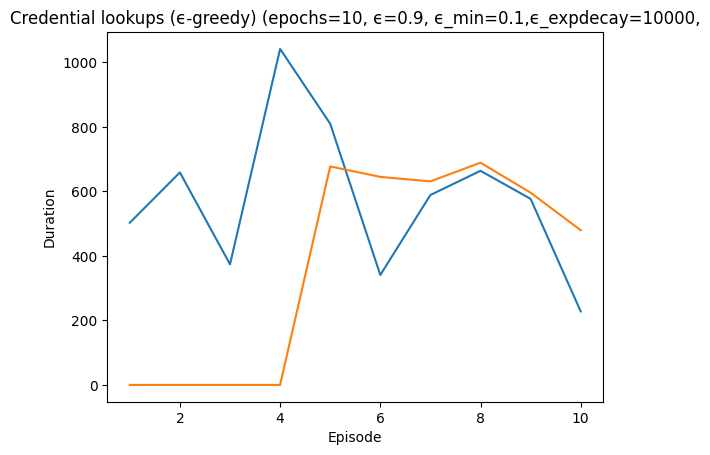

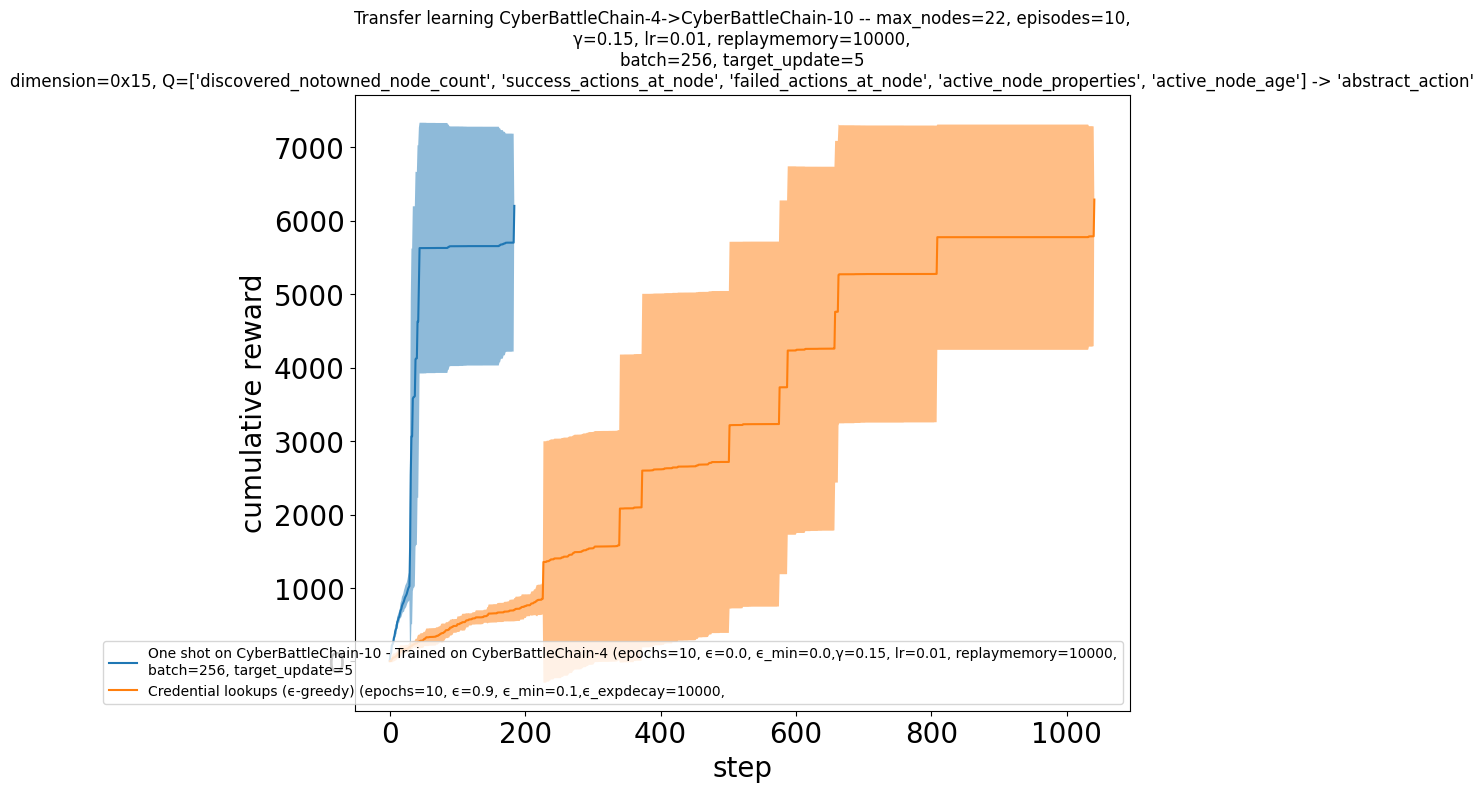

In [19]:
learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=best_dqn_4,
    eval_env=cyberbattlechain_10,
    eval_epsilon=0.0,  # exploit Q-matrix only
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count,
    benchmark_policy=rca.CredentialCacheExploiter(),
    benchmark_training_args={"epsilon": 0.90, "epsilon_exponential_decay": 10000, "epsilon_minimum": 0.10, "title": "Credential lookups (ϵ-greedy)"},
)

###### One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4
Learning with: episode_count=10,iteration_count=9000,ϵ=0.0,ϵ_min=0.0, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5
  ## Episode: 1/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:  342.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  356.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:  456.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  470.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:  570.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  584.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  584.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  684.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  684.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  698.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:  698.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  798.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  798.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  812.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward:  812.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  912.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  912.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:  926.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:  926.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward: 1026.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward: 1026.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward: 1040.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward: 1040.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward: 1140.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward: 1140.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward: 1154.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward: 1154.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward: 1254.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 1|Iteration 27|reward: 1254.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward: 1256.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward: 1256.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward: 1258.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward: 1258.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward: 1272.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward: 1272.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 31|reward: 1372.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 31|reward: 1372.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward: 1386.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward: 1386.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward: 1486.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward: 1486.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward: 1492.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward: 1492.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward: 1506.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward: 1506.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward: 1606.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward: 1606.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward: 1612.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward: 1612.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward: 1614.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward: 1614.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 44|reward: 1614.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward: 1620.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 1|Iteration 45|reward: 1620.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 1|Iteration 47|reward: 1626.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 1|Iteration 47|reward: 1626.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 1|Iteration 49|reward: 1632.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 1|Iteration 49|reward: 1632.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 1|Iteration 50|reward: 1634.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 1|Iteration 50|reward: 1634.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 1|Iteration 52|reward: 1640.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 1|Iteration 52|reward: 1640.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 1|Iteration 55|reward: 1640.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 1|Iteration 56|reward: 1642.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 1|Iteration 56|reward: 1642.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 1|Iteration 57|reward: 1656.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 1|Iteration 57|reward: 1656.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 1|Iteration 60|reward: 1756.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 1|Iteration 60|reward: 1756.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 1|Iteration 61|reward: 1770.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 1|Iteration 61|reward: 1770.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 1|Iteration 62|reward: 1870.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 1|Iteration 62|reward: 1870.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 1|Iteration 63|reward: 1884.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 1|Iteration 63|reward: 1884.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 1|Iteration 64|reward: 1984.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 1|Iteration 64|reward: 1984.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 1|Iteration 65|reward: 1998.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 1|Iteration 65|reward: 1998.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 1|Iteration 71|reward: 1998.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 1|Iteration 72|reward: 2098.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 1|Iteration 72|reward: 2098.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 1|Iteration 73|reward: 2112.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 1|Iteration 73|reward: 2112.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 1|Iteration 79|reward: 2112.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 1|Iteration 84|reward: 2112.0|last_reward_at:   73|Elapsed Time: 0:00:02||

Episode 1|Iteration 89|reward: 2112.0|last_reward_at:   73|Elapsed Time: 0:00:02||

Episode 1|Iteration 93|reward: 2212.0|last_reward_at:   73|Elapsed Time: 0:00:02||

Episode 1|Iteration 93|reward: 2212.0|last_reward_at:   93|Elapsed Time: 0:00:02||

Episode 1|Iteration 94|reward: 2226.0|last_reward_at:   93|Elapsed Time: 0:00:02||

Episode 1|Iteration 94|reward: 2226.0|last_reward_at:   94|Elapsed Time: 0:00:02||

Episode 1|Iteration 97|reward: 2326.0|last_reward_at:   94|Elapsed Time: 0:00:02||

Episode 1|Iteration 97|reward: 2326.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 1|Iteration 98|reward: 2340.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 1|Iteration 98|reward: 2340.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 1|Iteration 103|reward: 2346.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 1|Iteration 103|reward: 2346.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 1|Iteration 104|reward: 2352.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 1|Iteration 104|reward: 2352.0|last_reward_at:  104|Elapsed Time: 0:00:02||

Episode 1|Iteration 109|reward: 7352.0|last_reward_at:  104|Elapsed Time: 0:00:02||

Episode 1|Iteration 109|reward: 7352.0|last_reward_at:  109|Elapsed Time: 0:00:02||

  Episode 1 ended at t=109 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 23/5 (0.82)
    exploit-remote: 11/7 (0.61)
    exploit-connect: 21/42 (0.33)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:  244.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  246.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  246.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  252.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  252.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  352.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  352.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  366.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:  366.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  466.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:  466.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  480.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  480.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  486.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 37|reward:  486.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  586.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:  586.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  600.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  600.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  700.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  700.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  714.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  714.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  814.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:  814.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  828.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:  828.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  834.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  834.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 58|reward:  834.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  934.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  934.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  948.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  948.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 2|Iteration 68|reward:  948.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 2|Iteration 75|reward:  948.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 2|Iteration 82|reward:  948.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 2|Iteration 89|reward: 1048.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 2|Iteration 89|reward: 1048.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 2|Iteration 90|reward: 1062.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 2|Iteration 90|reward: 1062.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 2|Iteration 97|reward: 1062.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 2|Iteration 102|reward: 1062.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 2|Iteration 108|reward: 1062.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 2|Iteration 114|reward: 1062.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 2|Iteration 120|reward: 1062.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 2|Iteration 127|reward: 1062.0|last_reward_at:   90|Elapsed Time: 0:00:02||

Episode 2|Iteration 132|reward: 1162.0|last_reward_at:   90|Elapsed Time: 0:00:02||

Episode 2|Iteration 132|reward: 1162.0|last_reward_at:  132|Elapsed Time: 0:00:02||

Episode 2|Iteration 133|reward: 1176.0|last_reward_at:  132|Elapsed Time: 0:00:02||

Episode 2|Iteration 133|reward: 1176.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 2|Iteration 140|reward: 1176.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 2|Iteration 147|reward: 1176.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 2|Iteration 154|reward: 1176.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 2|Iteration 160|reward: 1176.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 2|Iteration 166|reward: 1176.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 2|Iteration 172|reward: 1176.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 2|Iteration 178|reward: 1276.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 2|Iteration 178|reward: 1276.0|last_reward_at:  178|Elapsed Time: 0:00:02||

Episode 2|Iteration 179|reward: 1290.0|last_reward_at:  178|Elapsed Time: 0:00:03||

Episode 2|Iteration 179|reward: 1290.0|last_reward_at:  179|Elapsed Time: 0:00:03||

Episode 2|Iteration 185|reward: 1290.0|last_reward_at:  179|Elapsed Time: 0:00:03||

Episode 2|Iteration 192|reward: 1290.0|last_reward_at:  179|Elapsed Time: 0:00:03||

Episode 2|Iteration 199|reward: 1290.0|last_reward_at:  179|Elapsed Time: 0:00:03||

Episode 2|Iteration 206|reward: 1290.0|last_reward_at:  179|Elapsed Time: 0:00:03||

Episode 2|Iteration 212|reward: 1290.0|last_reward_at:  179|Elapsed Time: 0:00:03||

Episode 2|Iteration 218|reward: 1290.0|last_reward_at:  179|Elapsed Time: 0:00:03||

Episode 2|Iteration 224|reward: 1290.0|last_reward_at:  179|Elapsed Time: 0:00:03||

Episode 2|Iteration 231|reward: 1290.0|last_reward_at:  179|Elapsed Time: 0:00:03||

Episode 2|Iteration 238|reward: 1290.0|last_reward_at:  179|Elapsed Time: 0:00:04||

Episode 2|Iteration 244|reward: 1290.0|last_reward_at:  179|Elapsed Time: 0:00:04||

Episode 2|Iteration 249|reward: 1390.0|last_reward_at:  179|Elapsed Time: 0:00:04||

Episode 2|Iteration 249|reward: 1390.0|last_reward_at:  249|Elapsed Time: 0:00:04||

Episode 2|Iteration 250|reward: 1404.0|last_reward_at:  249|Elapsed Time: 0:00:04||

Episode 2|Iteration 250|reward: 1404.0|last_reward_at:  250|Elapsed Time: 0:00:04||

Episode 2|Iteration 256|reward: 1404.0|last_reward_at:  250|Elapsed Time: 0:00:04||

Episode 2|Iteration 262|reward: 1404.0|last_reward_at:  250|Elapsed Time: 0:00:04||

Episode 2|Iteration 268|reward: 1404.0|last_reward_at:  250|Elapsed Time: 0:00:04||

Episode 2|Iteration 274|reward: 1404.0|last_reward_at:  250|Elapsed Time: 0:00:04||

Episode 2|Iteration 280|reward: 1404.0|last_reward_at:  250|Elapsed Time: 0:00:04||

Episode 2|Iteration 286|reward: 1404.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 2|Iteration 292|reward: 1404.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 2|Iteration 298|reward: 1404.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 2|Iteration 304|reward: 1404.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 2|Iteration 310|reward: 1404.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 2|Iteration 316|reward: 1404.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 2|Iteration 322|reward: 1404.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 2|Iteration 328|reward: 1404.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 2|Iteration 332|reward: 1410.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 2|Iteration 332|reward: 1410.0|last_reward_at:  332|Elapsed Time: 0:00:05||

Episode 2|Iteration 335|reward: 1412.0|last_reward_at:  332|Elapsed Time: 0:00:05||

Episode 2|Iteration 335|reward: 1412.0|last_reward_at:  335|Elapsed Time: 0:00:05||

Episode 2|Iteration 337|reward: 1418.0|last_reward_at:  335|Elapsed Time: 0:00:05||

Episode 2|Iteration 337|reward: 1418.0|last_reward_at:  337|Elapsed Time: 0:00:05||

Episode 2|Iteration 342|reward: 1418.0|last_reward_at:  337|Elapsed Time: 0:00:06||

Episode 2|Iteration 348|reward: 1418.0|last_reward_at:  337|Elapsed Time: 0:00:06||

Episode 2|Iteration 354|reward: 1418.0|last_reward_at:  337|Elapsed Time: 0:00:06||

Episode 2|Iteration 360|reward: 1418.0|last_reward_at:  337|Elapsed Time: 0:00:06||

Episode 2|Iteration 361|reward: 1518.0|last_reward_at:  337|Elapsed Time: 0:00:06||

Episode 2|Iteration 361|reward: 1518.0|last_reward_at:  361|Elapsed Time: 0:00:06||

Episode 2|Iteration 362|reward: 1518.0|last_reward_at:  361|Elapsed Time: 0:00:06||

Episode 2|Iteration 364|reward: 1524.0|last_reward_at:  361|Elapsed Time: 0:00:06||

Episode 2|Iteration 364|reward: 1524.0|last_reward_at:  364|Elapsed Time: 0:00:06||

Episode 2|Iteration 365|reward: 1530.0|last_reward_at:  364|Elapsed Time: 0:00:06||

Episode 2|Iteration 365|reward: 1530.0|last_reward_at:  365|Elapsed Time: 0:00:06||

Episode 2|Iteration 369|reward: 1530.0|last_reward_at:  365|Elapsed Time: 0:00:06||

Episode 2|Iteration 371|reward: 1536.0|last_reward_at:  365|Elapsed Time: 0:00:06||

Episode 2|Iteration 371|reward: 1536.0|last_reward_at:  371|Elapsed Time: 0:00:06||

Episode 2|Iteration 377|reward: 1538.0|last_reward_at:  371|Elapsed Time: 0:00:06||

Episode 2|Iteration 377|reward: 1538.0|last_reward_at:  377|Elapsed Time: 0:00:06||

Episode 2|Iteration 383|reward: 1538.0|last_reward_at:  377|Elapsed Time: 0:00:07||

Episode 2|Iteration 386|reward: 1544.0|last_reward_at:  377|Elapsed Time: 0:00:07||

Episode 2|Iteration 386|reward: 1544.0|last_reward_at:  386|Elapsed Time: 0:00:07||

Episode 2|Iteration 390|reward: 1546.0|last_reward_at:  386|Elapsed Time: 0:00:07||

Episode 2|Iteration 390|reward: 1546.0|last_reward_at:  390|Elapsed Time: 0:00:07||

Episode 2|Iteration 397|reward: 1546.0|last_reward_at:  390|Elapsed Time: 0:00:07||

Episode 2|Iteration 403|reward: 1546.0|last_reward_at:  390|Elapsed Time: 0:00:07||

Episode 2|Iteration 408|reward: 1546.0|last_reward_at:  390|Elapsed Time: 0:00:07||

Episode 2|Iteration 412|reward: 1548.0|last_reward_at:  390|Elapsed Time: 0:00:07||

Episode 2|Iteration 412|reward: 1548.0|last_reward_at:  412|Elapsed Time: 0:00:07||

Episode 2|Iteration 418|reward: 1550.0|last_reward_at:  412|Elapsed Time: 0:00:07||

Episode 2|Iteration 418|reward: 1550.0|last_reward_at:  418|Elapsed Time: 0:00:07||

Episode 2|Iteration 423|reward: 1550.0|last_reward_at:  418|Elapsed Time: 0:00:07||

Episode 2|Iteration 429|reward: 1550.0|last_reward_at:  418|Elapsed Time: 0:00:08||

Episode 2|Iteration 434|reward: 1550.0|last_reward_at:  418|Elapsed Time: 0:00:08||

Episode 2|Iteration 439|reward: 1550.0|last_reward_at:  418|Elapsed Time: 0:00:08||

Episode 2|Iteration 443|reward: 1550.0|last_reward_at:  418|Elapsed Time: 0:00:08||

Episode 2|Iteration 447|reward: 1550.0|last_reward_at:  418|Elapsed Time: 0:00:08||

Episode 2|Iteration 453|reward: 1564.0|last_reward_at:  418|Elapsed Time: 0:00:08||

Episode 2|Iteration 453|reward: 1564.0|last_reward_at:  453|Elapsed Time: 0:00:08||

Episode 2|Iteration 459|reward: 1564.0|last_reward_at:  453|Elapsed Time: 0:00:08||

Episode 2|Iteration 465|reward: 1564.0|last_reward_at:  453|Elapsed Time: 0:00:08||

Episode 2|Iteration 471|reward: 1564.0|last_reward_at:  453|Elapsed Time: 0:00:08||

Episode 2|Iteration 478|reward: 1564.0|last_reward_at:  453|Elapsed Time: 0:00:09||

Episode 2|Iteration 484|reward: 1564.0|last_reward_at:  453|Elapsed Time: 0:00:09||

Episode 2|Iteration 489|reward: 1664.0|last_reward_at:  453|Elapsed Time: 0:00:09||

Episode 2|Iteration 489|reward: 1664.0|last_reward_at:  489|Elapsed Time: 0:00:09||

Episode 2|Iteration 490|reward: 1678.0|last_reward_at:  489|Elapsed Time: 0:00:09||

Episode 2|Iteration 490|reward: 1678.0|last_reward_at:  490|Elapsed Time: 0:00:09||

Episode 2|Iteration 496|reward: 1678.0|last_reward_at:  490|Elapsed Time: 0:00:09||

Episode 2|Iteration 501|reward: 1678.0|last_reward_at:  490|Elapsed Time: 0:00:09||

Episode 2|Iteration 507|reward: 1678.0|last_reward_at:  490|Elapsed Time: 0:00:09||

Episode 2|Iteration 513|reward: 1678.0|last_reward_at:  490|Elapsed Time: 0:00:09||

Episode 2|Iteration 518|reward: 1678.0|last_reward_at:  490|Elapsed Time: 0:00:09||

Episode 2|Iteration 523|reward: 1678.0|last_reward_at:  490|Elapsed Time: 0:00:09||

Episode 2|Iteration 524|reward: 1778.0|last_reward_at:  490|Elapsed Time: 0:00:09||

Episode 2|Iteration 524|reward: 1778.0|last_reward_at:  524|Elapsed Time: 0:00:09||

Episode 2|Iteration 526|reward: 1778.0|last_reward_at:  524|Elapsed Time: 0:00:10||

Episode 2|Iteration 528|reward: 1778.0|last_reward_at:  524|Elapsed Time: 0:00:10||

Episode 2|Iteration 533|reward: 1778.0|last_reward_at:  524|Elapsed Time: 0:00:10||

Episode 2|Iteration 536|reward: 1792.0|last_reward_at:  524|Elapsed Time: 0:00:10||

Episode 2|Iteration 536|reward: 1792.0|last_reward_at:  536|Elapsed Time: 0:00:10||

Episode 2|Iteration 542|reward: 1792.0|last_reward_at:  536|Elapsed Time: 0:00:10||

Episode 2|Iteration 549|reward: 1792.0|last_reward_at:  536|Elapsed Time: 0:00:10||

Episode 2|Iteration 555|reward: 1792.0|last_reward_at:  536|Elapsed Time: 0:00:11||

Episode 2|Iteration 561|reward: 1792.0|last_reward_at:  536|Elapsed Time: 0:00:11||

Episode 2|Iteration 567|reward: 1792.0|last_reward_at:  536|Elapsed Time: 0:00:11||

Episode 2|Iteration 569|reward: 1798.0|last_reward_at:  536|Elapsed Time: 0:00:11||

Episode 2|Iteration 569|reward: 1798.0|last_reward_at:  569|Elapsed Time: 0:00:11||

Episode 2|Iteration 576|reward: 1804.0|last_reward_at:  569|Elapsed Time: 0:00:11||

Episode 2|Iteration 576|reward: 1804.0|last_reward_at:  576|Elapsed Time: 0:00:11||

Episode 2|Iteration 582|reward: 1804.0|last_reward_at:  576|Elapsed Time: 0:00:11||

Episode 2|Iteration 588|reward: 1804.0|last_reward_at:  576|Elapsed Time: 0:00:11||

Episode 2|Iteration 593|reward: 1804.0|last_reward_at:  576|Elapsed Time: 0:00:11||

Episode 2|Iteration 596|reward: 1806.0|last_reward_at:  576|Elapsed Time: 0:00:11||

Episode 2|Iteration 596|reward: 1806.0|last_reward_at:  596|Elapsed Time: 0:00:11||

Episode 2|Iteration 602|reward: 1806.0|last_reward_at:  596|Elapsed Time: 0:00:11||

Episode 2|Iteration 605|reward: 1906.0|last_reward_at:  596|Elapsed Time: 0:00:11||

Episode 2|Iteration 605|reward: 1906.0|last_reward_at:  605|Elapsed Time: 0:00:11||

Episode 2|Iteration 606|reward: 1920.0|last_reward_at:  605|Elapsed Time: 0:00:11||

Episode 2|Iteration 606|reward: 1920.0|last_reward_at:  606|Elapsed Time: 0:00:11||

Episode 2|Iteration 611|reward: 1920.0|last_reward_at:  606|Elapsed Time: 0:00:12||

Episode 2|Iteration 617|reward: 1920.0|last_reward_at:  606|Elapsed Time: 0:00:12||

Episode 2|Iteration 622|reward: 1920.0|last_reward_at:  606|Elapsed Time: 0:00:12||

Episode 2|Iteration 625|reward: 1922.0|last_reward_at:  606|Elapsed Time: 0:00:12||

Episode 2|Iteration 625|reward: 1922.0|last_reward_at:  625|Elapsed Time: 0:00:12||

Episode 2|Iteration 627|reward: 2022.0|last_reward_at:  625|Elapsed Time: 0:00:12||

Episode 2|Iteration 627|reward: 2022.0|last_reward_at:  627|Elapsed Time: 0:00:12||

Episode 2|Iteration 629|reward: 2022.0|last_reward_at:  627|Elapsed Time: 0:00:12||

Episode 2|Iteration 631|reward: 2022.0|last_reward_at:  627|Elapsed Time: 0:00:12||

Episode 2|Iteration 632|reward: 2036.0|last_reward_at:  627|Elapsed Time: 0:00:12||

Episode 2|Iteration 632|reward: 2036.0|last_reward_at:  632|Elapsed Time: 0:00:12||

Episode 2|Iteration 638|reward: 2044.0|last_reward_at:  632|Elapsed Time: 0:00:12||

Episode 2|Iteration 638|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:12||

Episode 2|Iteration 644|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:13||

Episode 2|Iteration 649|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:13||

Episode 2|Iteration 655|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:13||

Episode 2|Iteration 660|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:13||

Episode 2|Iteration 666|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:13||

Episode 2|Iteration 672|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:13||

Episode 2|Iteration 678|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:13||

Episode 2|Iteration 684|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:13||

Episode 2|Iteration 689|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:13||

Episode 2|Iteration 694|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:14||

Episode 2|Iteration 700|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:14||

Episode 2|Iteration 705|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:14||

Episode 2|Iteration 711|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:14||

Episode 2|Iteration 717|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:14||

Episode 2|Iteration 723|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:14||

Episode 2|Iteration 729|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:14||

Episode 2|Iteration 735|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:14||

Episode 2|Iteration 740|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:14||

Episode 2|Iteration 745|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:15||

Episode 2|Iteration 751|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:15||

Episode 2|Iteration 756|reward: 2044.0|last_reward_at:  638|Elapsed Time: 0:00:15||

Episode 2|Iteration 758|reward: 2050.0|last_reward_at:  638|Elapsed Time: 0:00:15||

Episode 2|Iteration 758|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:15||

Episode 2|Iteration 763|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:15||

Episode 2|Iteration 769|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:15||

Episode 2|Iteration 774|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:15||

Episode 2|Iteration 780|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:15||

Episode 2|Iteration 785|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:15||

Episode 2|Iteration 790|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:16||

Episode 2|Iteration 795|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:16||

Episode 2|Iteration 800|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:16||

Episode 2|Iteration 805|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:16||

Episode 2|Iteration 810|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:16||

Episode 2|Iteration 814|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:16||

Episode 2|Iteration 819|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:16||

Episode 2|Iteration 824|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:16||

Episode 2|Iteration 829|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:16||

Episode 2|Iteration 834|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:17||

Episode 2|Iteration 839|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:17||

Episode 2|Iteration 844|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:17||

Episode 2|Iteration 849|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:17||

Episode 2|Iteration 855|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:17||

Episode 2|Iteration 860|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:17||

Episode 2|Iteration 866|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:17||

Episode 2|Iteration 871|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:17||

Episode 2|Iteration 877|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:17||

Episode 2|Iteration 883|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:18||

Episode 2|Iteration 888|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:18||

Episode 2|Iteration 893|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:18||

Episode 2|Iteration 899|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:18||

Episode 2|Iteration 905|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:18||

Episode 2|Iteration 911|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:18||

Episode 2|Iteration 916|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:18||

Episode 2|Iteration 921|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:18||

Episode 2|Iteration 927|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:18||

Episode 2|Iteration 933|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:19||

Episode 2|Iteration 938|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:19||

Episode 2|Iteration 943|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:19||

Episode 2|Iteration 948|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:19||

Episode 2|Iteration 953|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:19||

Episode 2|Iteration 958|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:19||

Episode 2|Iteration 962|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:19||

Episode 2|Iteration 967|reward: 2050.0|last_reward_at:  758|Elapsed Time: 0:00:19||

Episode 2|Iteration 970|reward: 2150.0|last_reward_at:  758|Elapsed Time: 0:00:19||

Episode 2|Iteration 970|reward: 2150.0|last_reward_at:  970|Elapsed Time: 0:00:19||

Episode 2|Iteration 972|reward: 2150.0|last_reward_at:  970|Elapsed Time: 0:00:20||

Episode 2|Iteration 973|reward: 2164.0|last_reward_at:  970|Elapsed Time: 0:00:20||

Episode 2|Iteration 973|reward: 2164.0|last_reward_at:  973|Elapsed Time: 0:00:20||

Episode 2|Iteration 977|reward: 2264.0|last_reward_at:  973|Elapsed Time: 0:00:20||

Episode 2|Iteration 977|reward: 2264.0|last_reward_at:  977|Elapsed Time: 0:00:20||

Episode 2|Iteration 978|reward: 2264.0|last_reward_at:  977|Elapsed Time: 0:00:20||

Episode 2|Iteration 979|reward: 2278.0|last_reward_at:  977|Elapsed Time: 0:00:20||

Episode 2|Iteration 979|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:20||

Episode 2|Iteration 984|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:20||

Episode 2|Iteration 989|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:20||

Episode 2|Iteration 994|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:20||

Episode 2|Iteration 999|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:20||

Episode 2|Iteration 1004|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:21||

Episode 2|Iteration 1009|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:21||

Episode 2|Iteration 1014|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:21||

Episode 2|Iteration 1019|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:21||

Episode 2|Iteration 1024|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:21||

Episode 2|Iteration 1029|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:21||

Episode 2|Iteration 1034|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:21||

Episode 2|Iteration 1039|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:21||

Episode 2|Iteration 1044|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:21||

Episode 2|Iteration 1050|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:22||

Episode 2|Iteration 1055|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:22||

Episode 2|Iteration 1060|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:22||

Episode 2|Iteration 1065|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:22||

Episode 2|Iteration 1069|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:22||

Episode 2|Iteration 1074|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:22||

Episode 2|Iteration 1079|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:22||

Episode 2|Iteration 1085|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:22||

Episode 2|Iteration 1090|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:22||

Episode 2|Iteration 1095|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:23||

Episode 2|Iteration 1101|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:23||

Episode 2|Iteration 1106|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:23||

Episode 2|Iteration 1111|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:23||

Episode 2|Iteration 1116|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:23||

Episode 2|Iteration 1121|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:23||

Episode 2|Iteration 1126|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:23||

Episode 2|Iteration 1131|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:23||

Episode 2|Iteration 1136|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:23||

Episode 2|Iteration 1140|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:23||

Episode 2|Iteration 1144|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:24||

Episode 2|Iteration 1149|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:24||

Episode 2|Iteration 1154|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:24||

Episode 2|Iteration 1159|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:24||

Episode 2|Iteration 1163|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:24||

Episode 2|Iteration 1168|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:24||

Episode 2|Iteration 1173|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:24||

Episode 2|Iteration 1178|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:24||

Episode 2|Iteration 1183|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:24||

Episode 2|Iteration 1188|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:25||

Episode 2|Iteration 1193|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:25||

Episode 2|Iteration 1198|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:25||

Episode 2|Iteration 1203|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:25||

Episode 2|Iteration 1208|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:25||

Episode 2|Iteration 1213|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:25||

Episode 2|Iteration 1218|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:25||

Episode 2|Iteration 1223|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:25||

Episode 2|Iteration 1228|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:25||

Episode 2|Iteration 1234|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:26||

Episode 2|Iteration 1239|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:26||

Episode 2|Iteration 1244|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:26||

Episode 2|Iteration 1250|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:26||

Episode 2|Iteration 1254|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:26||

Episode 2|Iteration 1258|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:26||

Episode 2|Iteration 1263|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:26||

Episode 2|Iteration 1268|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:26||

Episode 2|Iteration 1273|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:26||

Episode 2|Iteration 1278|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:27||

Episode 2|Iteration 1283|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:27||

Episode 2|Iteration 1289|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:27||

Episode 2|Iteration 1294|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:27||

Episode 2|Iteration 1299|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:27||

Episode 2|Iteration 1304|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:27||

Episode 2|Iteration 1309|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:27||

Episode 2|Iteration 1314|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:27||

Episode 2|Iteration 1319|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:27||

Episode 2|Iteration 1324|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:28||

Episode 2|Iteration 1329|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:28||

Episode 2|Iteration 1334|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:28||

Episode 2|Iteration 1339|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:28||

Episode 2|Iteration 1344|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:28||

Episode 2|Iteration 1349|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:28||

Episode 2|Iteration 1354|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:28||

Episode 2|Iteration 1359|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:28||

Episode 2|Iteration 1364|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:28||

Episode 2|Iteration 1368|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:29||

Episode 2|Iteration 1372|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:29||

Episode 2|Iteration 1377|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:29||

Episode 2|Iteration 1382|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:29||

Episode 2|Iteration 1387|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:29||

Episode 2|Iteration 1392|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:29||

Episode 2|Iteration 1397|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:29||

Episode 2|Iteration 1402|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:29||

Episode 2|Iteration 1407|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:29||

Episode 2|Iteration 1412|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:30||

Episode 2|Iteration 1417|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:30||

Episode 2|Iteration 1422|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:30||

Episode 2|Iteration 1427|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:30||

Episode 2|Iteration 1432|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:30||

Episode 2|Iteration 1437|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:30||

Episode 2|Iteration 1442|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:30||

Episode 2|Iteration 1447|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:30||

Episode 2|Iteration 1452|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:30||

Episode 2|Iteration 1457|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:31||

Episode 2|Iteration 1462|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:31||

Episode 2|Iteration 1467|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:31||

Episode 2|Iteration 1472|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:31||

Episode 2|Iteration 1477|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:31||

Episode 2|Iteration 1482|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:31||

Episode 2|Iteration 1486|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:31||

Episode 2|Iteration 1491|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:31||

Episode 2|Iteration 1496|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:31||

Episode 2|Iteration 1501|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:31||

Episode 2|Iteration 1506|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:32||

Episode 2|Iteration 1511|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:32||

Episode 2|Iteration 1516|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:32||

Episode 2|Iteration 1521|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:32||

Episode 2|Iteration 1526|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:32||

Episode 2|Iteration 1531|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:32||

Episode 2|Iteration 1536|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:32||

Episode 2|Iteration 1541|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:32||

Episode 2|Iteration 1546|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:33||

Episode 2|Iteration 1551|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:33||

Episode 2|Iteration 1556|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:33||

Episode 2|Iteration 1561|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:33||

Episode 2|Iteration 1566|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:33||

Episode 2|Iteration 1572|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:33||

Episode 2|Iteration 1577|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:33||

Episode 2|Iteration 1582|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:33||

Episode 2|Iteration 1587|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:33||

Episode 2|Iteration 1592|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:34||

Episode 2|Iteration 1597|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:34||

Episode 2|Iteration 1602|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:34||

Episode 2|Iteration 1607|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:34||

Episode 2|Iteration 1612|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:34||

Episode 2|Iteration 1617|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:34||

Episode 2|Iteration 1621|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:34||

Episode 2|Iteration 1626|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:34||

Episode 2|Iteration 1631|reward: 2278.0|last_reward_at:  979|Elapsed Time: 0:00:34||

Episode 2|Iteration 1634|reward: 2286.0|last_reward_at:  979|Elapsed Time: 0:00:34||

Episode 2|Iteration 1634|reward: 2286.0|last_reward_at: 1634|Elapsed Time: 0:00:34||

Episode 2|Iteration 1635|reward: 2288.0|last_reward_at: 1634|Elapsed Time: 0:00:34||

Episode 2|Iteration 1635|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:34||

Episode 2|Iteration 1640|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:35||

Episode 2|Iteration 1645|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:35||

Episode 2|Iteration 1651|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:35||

Episode 2|Iteration 1656|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:35||

Episode 2|Iteration 1661|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:35||

Episode 2|Iteration 1666|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:35||

Episode 2|Iteration 1671|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:35||

Episode 2|Iteration 1676|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:35||

Episode 2|Iteration 1681|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:35||

Episode 2|Iteration 1686|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:36||

Episode 2|Iteration 1691|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:36||

Episode 2|Iteration 1696|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:36||

Episode 2|Iteration 1701|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:36||

Episode 2|Iteration 1706|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:36||

Episode 2|Iteration 1709|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:36||

Episode 2|Iteration 1712|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:36||

Episode 2|Iteration 1717|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:36||

Episode 2|Iteration 1722|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:36||

Episode 2|Iteration 1726|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:37||

Episode 2|Iteration 1730|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:37||

Episode 2|Iteration 1735|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:37||

Episode 2|Iteration 1739|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:37||

Episode 2|Iteration 1743|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:37||

Episode 2|Iteration 1747|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:37||

Episode 2|Iteration 1751|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:37||

Episode 2|Iteration 1756|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:37||

Episode 2|Iteration 1761|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:37||

Episode 2|Iteration 1766|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:38||

Episode 2|Iteration 1770|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:38||

Episode 2|Iteration 1775|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:38||

Episode 2|Iteration 1780|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:38||

Episode 2|Iteration 1785|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:38||

Episode 2|Iteration 1790|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:38||

Episode 2|Iteration 1795|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:38||

Episode 2|Iteration 1800|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:38||

Episode 2|Iteration 1805|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:38||

Episode 2|Iteration 1809|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:39||

Episode 2|Iteration 1815|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:39||

Episode 2|Iteration 1820|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:39||

Episode 2|Iteration 1826|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:39||

Episode 2|Iteration 1831|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:39||

Episode 2|Iteration 1836|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:39||

Episode 2|Iteration 1841|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:39||

Episode 2|Iteration 1846|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:39||

Episode 2|Iteration 1851|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:39||

Episode 2|Iteration 1856|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:40||

Episode 2|Iteration 1861|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:40||

Episode 2|Iteration 1866|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:40||

Episode 2|Iteration 1871|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:40||

Episode 2|Iteration 1876|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:40||

Episode 2|Iteration 1881|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:40||

Episode 2|Iteration 1886|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:40||

Episode 2|Iteration 1891|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:40||

Episode 2|Iteration 1896|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:40||

Episode 2|Iteration 1902|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:41||

Episode 2|Iteration 1906|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:41||

Episode 2|Iteration 1912|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:41||

Episode 2|Iteration 1917|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:41||

Episode 2|Iteration 1922|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:41||

Episode 2|Iteration 1927|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:41||

Episode 2|Iteration 1932|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:41||

Episode 2|Iteration 1937|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:41||

Episode 2|Iteration 1941|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:41||

Episode 2|Iteration 1946|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:42||

Episode 2|Iteration 1951|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:42||

Episode 2|Iteration 1956|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:42||

Episode 2|Iteration 1961|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:42||

Episode 2|Iteration 1966|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:42||

Episode 2|Iteration 1970|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:42||

Episode 2|Iteration 1975|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:42||

Episode 2|Iteration 1980|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:42||

Episode 2|Iteration 1985|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:42||

Episode 2|Iteration 1990|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:43||

Episode 2|Iteration 1995|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:43||

Episode 2|Iteration 1999|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:43||

Episode 2|Iteration 2004|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:43||

Episode 2|Iteration 2008|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:43||

Episode 2|Iteration 2012|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:43||

Episode 2|Iteration 2016|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:43||

Episode 2|Iteration 2021|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:43||

Episode 2|Iteration 2026|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:43||

Episode 2|Iteration 2031|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:44||

Episode 2|Iteration 2035|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:44||

Episode 2|Iteration 2040|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:44||

Episode 2|Iteration 2045|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:44||

Episode 2|Iteration 2050|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:44||

Episode 2|Iteration 2055|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:44||

Episode 2|Iteration 2059|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:44||

Episode 2|Iteration 2064|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:44||

Episode 2|Iteration 2069|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:44||

Episode 2|Iteration 2074|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:44||

Episode 2|Iteration 2079|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:45||

Episode 2|Iteration 2084|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:45||

Episode 2|Iteration 2088|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:45||

Episode 2|Iteration 2093|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:45||

Episode 2|Iteration 2098|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:45||

Episode 2|Iteration 2103|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:45||

Episode 2|Iteration 2107|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:45||

Episode 2|Iteration 2112|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:45||

Episode 2|Iteration 2117|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:45||

Episode 2|Iteration 2122|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:46||

Episode 2|Iteration 2127|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:46||

Episode 2|Iteration 2132|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:46||

Episode 2|Iteration 2137|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:46||

Episode 2|Iteration 2142|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:46||

Episode 2|Iteration 2146|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:46||

Episode 2|Iteration 2151|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:46||

Episode 2|Iteration 2156|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:46||

Episode 2|Iteration 2161|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:46||

Episode 2|Iteration 2165|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:47||

Episode 2|Iteration 2169|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:47||

Episode 2|Iteration 2174|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:47||

Episode 2|Iteration 2178|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:47||

Episode 2|Iteration 2183|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:47||

Episode 2|Iteration 2188|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:47||

Episode 2|Iteration 2193|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:47||

Episode 2|Iteration 2198|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:47||

Episode 2|Iteration 2203|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:47||

Episode 2|Iteration 2208|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:48||

Episode 2|Iteration 2213|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:48||

Episode 2|Iteration 2218|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:48||

Episode 2|Iteration 2223|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:48||

Episode 2|Iteration 2228|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:48||

Episode 2|Iteration 2233|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:48||

Episode 2|Iteration 2238|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:48||

Episode 2|Iteration 2243|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:48||

Episode 2|Iteration 2248|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:48||

Episode 2|Iteration 2253|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:49||

Episode 2|Iteration 2258|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:49||

Episode 2|Iteration 2263|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:49||

Episode 2|Iteration 2268|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:49||

Episode 2|Iteration 2272|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:49||

Episode 2|Iteration 2276|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:49||

Episode 2|Iteration 2279|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:49||

Episode 2|Iteration 2283|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:49||

Episode 2|Iteration 2288|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:49||

Episode 2|Iteration 2293|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:50||

Episode 2|Iteration 2298|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:50||

Episode 2|Iteration 2303|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:50||

Episode 2|Iteration 2308|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:50||

Episode 2|Iteration 2313|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:50||

Episode 2|Iteration 2318|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:50||

Episode 2|Iteration 2323|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:50||

Episode 2|Iteration 2327|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:50||

Episode 2|Iteration 2332|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:50||

Episode 2|Iteration 2337|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:51||

Episode 2|Iteration 2342|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:51||

Episode 2|Iteration 2347|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:51||

Episode 2|Iteration 2352|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:51||

Episode 2|Iteration 2357|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:51||

Episode 2|Iteration 2361|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:51||

Episode 2|Iteration 2366|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:51||

Episode 2|Iteration 2371|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:51||

Episode 2|Iteration 2376|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:51||

Episode 2|Iteration 2382|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:52||

Episode 2|Iteration 2387|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:52||

Episode 2|Iteration 2391|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:52||

Episode 2|Iteration 2396|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:52||

Episode 2|Iteration 2401|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:52||

Episode 2|Iteration 2404|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:52||

Episode 2|Iteration 2409|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:52||

Episode 2|Iteration 2413|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:52||

Episode 2|Iteration 2418|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:52||

Episode 2|Iteration 2423|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:53||

Episode 2|Iteration 2428|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:53||

Episode 2|Iteration 2433|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:53||

Episode 2|Iteration 2438|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:53||

Episode 2|Iteration 2442|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:53||

Episode 2|Iteration 2446|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:53||

Episode 2|Iteration 2451|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:53||

Episode 2|Iteration 2456|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:53||

Episode 2|Iteration 2461|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:53||

Episode 2|Iteration 2466|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:54||

Episode 2|Iteration 2471|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:54||

Episode 2|Iteration 2476|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:54||

Episode 2|Iteration 2481|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:54||

Episode 2|Iteration 2486|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:54||

Episode 2|Iteration 2490|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:54||

Episode 2|Iteration 2495|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:54||

Episode 2|Iteration 2500|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:54||

Episode 2|Iteration 2505|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:54||

Episode 2|Iteration 2510|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:55||

Episode 2|Iteration 2515|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:55||

Episode 2|Iteration 2520|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:55||

Episode 2|Iteration 2525|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:55||

Episode 2|Iteration 2530|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:55||

Episode 2|Iteration 2534|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:55||

Episode 2|Iteration 2538|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:55||

Episode 2|Iteration 2541|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:55||

Episode 2|Iteration 2542|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:56||

Episode 2|Iteration 2547|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:56||

Episode 2|Iteration 2551|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:56||

Episode 2|Iteration 2556|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:56||

Episode 2|Iteration 2560|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:56||

Episode 2|Iteration 2564|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:56||

Episode 2|Iteration 2568|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:56||

Episode 2|Iteration 2573|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:56||

Episode 2|Iteration 2578|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:57||

Episode 2|Iteration 2582|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:57||

Episode 2|Iteration 2586|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:57||

Episode 2|Iteration 2590|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:57||

Episode 2|Iteration 2595|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:57||

Episode 2|Iteration 2599|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:57||

Episode 2|Iteration 2603|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:57||

Episode 2|Iteration 2607|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:57||

Episode 2|Iteration 2611|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:57||

Episode 2|Iteration 2616|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:58||

Episode 2|Iteration 2621|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:58||

Episode 2|Iteration 2625|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:58||

Episode 2|Iteration 2629|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:58||

Episode 2|Iteration 2633|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:58||

Episode 2|Iteration 2638|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:58||

Episode 2|Iteration 2643|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:58||

Episode 2|Iteration 2647|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:58||

Episode 2|Iteration 2652|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:58||

Episode 2|Iteration 2657|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:59||

Episode 2|Iteration 2662|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:59||

Episode 2|Iteration 2667|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:59||

Episode 2|Iteration 2671|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:59||

Episode 2|Iteration 2676|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:59||

Episode 2|Iteration 2681|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:59||

Episode 2|Iteration 2686|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:59||

Episode 2|Iteration 2691|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:59||

Episode 2|Iteration 2695|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:00:59||

Episode 2|Iteration 2699|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:00||

Episode 2|Iteration 2703|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:00||

Episode 2|Iteration 2708|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:00||

Episode 2|Iteration 2713|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:00||

Episode 2|Iteration 2717|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:00||

Episode 2|Iteration 2721|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:00||

Episode 2|Iteration 2725|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:00||

Episode 2|Iteration 2729|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:00||

Episode 2|Iteration 2733|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:00||

Episode 2|Iteration 2738|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:01||

Episode 2|Iteration 2743|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:01||

Episode 2|Iteration 2748|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:01||

Episode 2|Iteration 2752|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:01||

Episode 2|Iteration 2756|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:01||

Episode 2|Iteration 2761|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:01||

Episode 2|Iteration 2765|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:01||

Episode 2|Iteration 2769|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:01||

Episode 2|Iteration 2772|reward: 2288.0|last_reward_at: 1635|Elapsed Time: 0:01:01||

Episode 2|Iteration 2776|reward: 2388.0|last_reward_at: 1635|Elapsed Time: 0:01:02||

Episode 2|Iteration 2776|reward: 2388.0|last_reward_at: 2776|Elapsed Time: 0:01:02||

Episode 2|Iteration 2779|reward: 2388.0|last_reward_at: 2776|Elapsed Time: 0:01:02||

Episode 2|Iteration 2780|reward: 2402.0|last_reward_at: 2776|Elapsed Time: 0:01:02||

Episode 2|Iteration 2780|reward: 2402.0|last_reward_at: 2780|Elapsed Time: 0:01:02||

Episode 2|Iteration 2785|reward: 2402.0|last_reward_at: 2780|Elapsed Time: 0:01:02||

Episode 2|Iteration 2790|reward: 2402.0|last_reward_at: 2780|Elapsed Time: 0:01:02||

Episode 2|Iteration 2792|reward: 7402.0|last_reward_at: 2780|Elapsed Time: 0:01:02||

Episode 2|Iteration 2792|reward: 7402.0|last_reward_at: 2792|Elapsed Time: 0:01:02||

  Episode 2 ended at t=2792 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 25/98 (0.20)
    exploit-remote: 20/335 (0.06)
    exploit-connect: 21/2293 (0.01)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  342.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  356.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  356.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  456.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  456.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  470.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  470.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  470.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  470.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  476.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:  476.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  476.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 3|Iteration 65|reward:  482.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 3|Iteration 65|reward:  482.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 3|Iteration 66|reward:  484.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 3|Iteration 66|reward:  484.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 3|Iteration 69|reward:  486.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 3|Iteration 69|reward:  486.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 3|Iteration 74|reward:  486.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 3|Iteration 81|reward:  486.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 3|Iteration 88|reward:  486.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 3|Iteration 95|reward:  486.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 3|Iteration 102|reward:  486.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 3|Iteration 109|reward:  486.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 3|Iteration 114|reward:  486.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 3|Iteration 120|reward:  486.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 3|Iteration 126|reward:  586.0|last_reward_at:   69|Elapsed Time: 0:00:02||

Episode 3|Iteration 126|reward:  586.0|last_reward_at:  126|Elapsed Time: 0:00:02||

Episode 3|Iteration 127|reward:  600.0|last_reward_at:  126|Elapsed Time: 0:00:02||

Episode 3|Iteration 127|reward:  600.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 3|Iteration 128|reward:  700.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 3|Iteration 128|reward:  700.0|last_reward_at:  128|Elapsed Time: 0:00:02||

Episode 3|Iteration 129|reward:  714.0|last_reward_at:  128|Elapsed Time: 0:00:02||

Episode 3|Iteration 129|reward:  714.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 3|Iteration 135|reward:  714.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 3|Iteration 140|reward:  814.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 3|Iteration 140|reward:  814.0|last_reward_at:  140|Elapsed Time: 0:00:02||

Episode 3|Iteration 142|reward:  828.0|last_reward_at:  140|Elapsed Time: 0:00:02||

Episode 3|Iteration 142|reward:  828.0|last_reward_at:  142|Elapsed Time: 0:00:02||

Episode 3|Iteration 147|reward:  928.0|last_reward_at:  142|Elapsed Time: 0:00:02||

Episode 3|Iteration 147|reward:  928.0|last_reward_at:  147|Elapsed Time: 0:00:02||

Episode 3|Iteration 148|reward:  942.0|last_reward_at:  147|Elapsed Time: 0:00:02||

Episode 3|Iteration 148|reward:  942.0|last_reward_at:  148|Elapsed Time: 0:00:02||

Episode 3|Iteration 154|reward:  942.0|last_reward_at:  148|Elapsed Time: 0:00:02||

Episode 3|Iteration 160|reward:  942.0|last_reward_at:  148|Elapsed Time: 0:00:02||

Episode 3|Iteration 166|reward:  942.0|last_reward_at:  148|Elapsed Time: 0:00:03||

Episode 3|Iteration 172|reward:  942.0|last_reward_at:  148|Elapsed Time: 0:00:03||

Episode 3|Iteration 178|reward:  942.0|last_reward_at:  148|Elapsed Time: 0:00:03||

Episode 3|Iteration 184|reward:  942.0|last_reward_at:  148|Elapsed Time: 0:00:03||

Episode 3|Iteration 190|reward:  942.0|last_reward_at:  148|Elapsed Time: 0:00:03||

Episode 3|Iteration 196|reward:  942.0|last_reward_at:  148|Elapsed Time: 0:00:03||

Episode 3|Iteration 197|reward: 1042.0|last_reward_at:  148|Elapsed Time: 0:00:03||

Episode 3|Iteration 197|reward: 1042.0|last_reward_at:  197|Elapsed Time: 0:00:03||

Episode 3|Iteration 198|reward: 1056.0|last_reward_at:  197|Elapsed Time: 0:00:03||

Episode 3|Iteration 198|reward: 1056.0|last_reward_at:  198|Elapsed Time: 0:00:03||

Episode 3|Iteration 204|reward: 1056.0|last_reward_at:  198|Elapsed Time: 0:00:03||

Episode 3|Iteration 210|reward: 1056.0|last_reward_at:  198|Elapsed Time: 0:00:03||

Episode 3|Iteration 215|reward: 1156.0|last_reward_at:  198|Elapsed Time: 0:00:04||

Episode 3|Iteration 215|reward: 1156.0|last_reward_at:  215|Elapsed Time: 0:00:04||

Episode 3|Iteration 216|reward: 1170.0|last_reward_at:  215|Elapsed Time: 0:00:04||

Episode 3|Iteration 216|reward: 1170.0|last_reward_at:  216|Elapsed Time: 0:00:04||

Episode 3|Iteration 222|reward: 1170.0|last_reward_at:  216|Elapsed Time: 0:00:04||

Episode 3|Iteration 228|reward: 1170.0|last_reward_at:  216|Elapsed Time: 0:00:04||

Episode 3|Iteration 233|reward: 1170.0|last_reward_at:  216|Elapsed Time: 0:00:04||

Episode 3|Iteration 236|reward: 1176.0|last_reward_at:  216|Elapsed Time: 0:00:04||

Episode 3|Iteration 236|reward: 1176.0|last_reward_at:  236|Elapsed Time: 0:00:04||

Episode 3|Iteration 240|reward: 1182.0|last_reward_at:  236|Elapsed Time: 0:00:04||

Episode 3|Iteration 240|reward: 1182.0|last_reward_at:  240|Elapsed Time: 0:00:04||

Episode 3|Iteration 245|reward: 1184.0|last_reward_at:  240|Elapsed Time: 0:00:04||

Episode 3|Iteration 245|reward: 1184.0|last_reward_at:  245|Elapsed Time: 0:00:04||

Episode 3|Iteration 251|reward: 1184.0|last_reward_at:  245|Elapsed Time: 0:00:04||

Episode 3|Iteration 256|reward: 1184.0|last_reward_at:  245|Elapsed Time: 0:00:04||

Episode 3|Iteration 261|reward: 1184.0|last_reward_at:  245|Elapsed Time: 0:00:04||

Episode 3|Iteration 266|reward: 1184.0|last_reward_at:  245|Elapsed Time: 0:00:05||

Episode 3|Iteration 272|reward: 1184.0|last_reward_at:  245|Elapsed Time: 0:00:05||

Episode 3|Iteration 277|reward: 1184.0|last_reward_at:  245|Elapsed Time: 0:00:05||

Episode 3|Iteration 282|reward: 1184.0|last_reward_at:  245|Elapsed Time: 0:00:05||

Episode 3|Iteration 288|reward: 1184.0|last_reward_at:  245|Elapsed Time: 0:00:05||

Episode 3|Iteration 293|reward: 1184.0|last_reward_at:  245|Elapsed Time: 0:00:05||

Episode 3|Iteration 296|reward: 1186.0|last_reward_at:  245|Elapsed Time: 0:00:05||

Episode 3|Iteration 296|reward: 1186.0|last_reward_at:  296|Elapsed Time: 0:00:05||

Episode 3|Iteration 301|reward: 1186.0|last_reward_at:  296|Elapsed Time: 0:00:05||

Episode 3|Iteration 305|reward: 1286.0|last_reward_at:  296|Elapsed Time: 0:00:05||

Episode 3|Iteration 305|reward: 1286.0|last_reward_at:  305|Elapsed Time: 0:00:05||

Episode 3|Iteration 306|reward: 1288.0|last_reward_at:  305|Elapsed Time: 0:00:05||

Episode 3|Iteration 306|reward: 1288.0|last_reward_at:  306|Elapsed Time: 0:00:05||

Episode 3|Iteration 307|reward: 1290.0|last_reward_at:  306|Elapsed Time: 0:00:05||

Episode 3|Iteration 307|reward: 1290.0|last_reward_at:  307|Elapsed Time: 0:00:05||

Episode 3|Iteration 309|reward: 1290.0|last_reward_at:  307|Elapsed Time: 0:00:06||

Episode 3|Iteration 311|reward: 1304.0|last_reward_at:  307|Elapsed Time: 0:00:06||

Episode 3|Iteration 311|reward: 1304.0|last_reward_at:  311|Elapsed Time: 0:00:06||

Episode 3|Iteration 316|reward: 1304.0|last_reward_at:  311|Elapsed Time: 0:00:06||

Episode 3|Iteration 321|reward: 1304.0|last_reward_at:  311|Elapsed Time: 0:00:06||

Episode 3|Iteration 326|reward: 1304.0|last_reward_at:  311|Elapsed Time: 0:00:06||

Episode 3|Iteration 332|reward: 1304.0|last_reward_at:  311|Elapsed Time: 0:00:06||

Episode 3|Iteration 338|reward: 1312.0|last_reward_at:  311|Elapsed Time: 0:00:06||

Episode 3|Iteration 338|reward: 1312.0|last_reward_at:  338|Elapsed Time: 0:00:06||

Episode 3|Iteration 339|reward: 1318.0|last_reward_at:  338|Elapsed Time: 0:00:06||

Episode 3|Iteration 339|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:06||

Episode 3|Iteration 345|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:06||

Episode 3|Iteration 350|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:06||

Episode 3|Iteration 355|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:07||

Episode 3|Iteration 361|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:07||

Episode 3|Iteration 366|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:07||

Episode 3|Iteration 371|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:07||

Episode 3|Iteration 376|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:07||

Episode 3|Iteration 381|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:07||

Episode 3|Iteration 386|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:07||

Episode 3|Iteration 391|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:07||

Episode 3|Iteration 396|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:07||

Episode 3|Iteration 401|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:08||

Episode 3|Iteration 407|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:08||

Episode 3|Iteration 412|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:08||

Episode 3|Iteration 417|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:08||

Episode 3|Iteration 423|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:08||

Episode 3|Iteration 428|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:08||

Episode 3|Iteration 434|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:08||

Episode 3|Iteration 440|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:08||

Episode 3|Iteration 446|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:08||

Episode 3|Iteration 452|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:09||

Episode 3|Iteration 456|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:09||

Episode 3|Iteration 461|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:09||

Episode 3|Iteration 467|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:09||

Episode 3|Iteration 473|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:09||

Episode 3|Iteration 479|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:09||

Episode 3|Iteration 485|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:09||

Episode 3|Iteration 490|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:09||

Episode 3|Iteration 495|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:09||

Episode 3|Iteration 500|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:09||

Episode 3|Iteration 505|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:10||

Episode 3|Iteration 510|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:10||

Episode 3|Iteration 515|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:10||

Episode 3|Iteration 521|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:10||

Episode 3|Iteration 527|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:10||

Episode 3|Iteration 533|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:10||

Episode 3|Iteration 539|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:10||

Episode 3|Iteration 544|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:10||

Episode 3|Iteration 549|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:10||

Episode 3|Iteration 554|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:11||

Episode 3|Iteration 560|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:11||

Episode 3|Iteration 565|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:11||

Episode 3|Iteration 570|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:11||

Episode 3|Iteration 574|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:11||

Episode 3|Iteration 580|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:11||

Episode 3|Iteration 586|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:11||

Episode 3|Iteration 591|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:11||

Episode 3|Iteration 597|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:11||

Episode 3|Iteration 602|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:12||

Episode 3|Iteration 607|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:12||

Episode 3|Iteration 612|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:12||

Episode 3|Iteration 617|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:12||

Episode 3|Iteration 622|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:12||

Episode 3|Iteration 627|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:12||

Episode 3|Iteration 632|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:12||

Episode 3|Iteration 637|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:12||

Episode 3|Iteration 642|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:12||

Episode 3|Iteration 647|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:13||

Episode 3|Iteration 652|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:13||

Episode 3|Iteration 657|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:13||

Episode 3|Iteration 663|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:13||

Episode 3|Iteration 669|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:13||

Episode 3|Iteration 674|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:13||

Episode 3|Iteration 679|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:13||

Episode 3|Iteration 684|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:13||

Episode 3|Iteration 687|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:13||

Episode 3|Iteration 692|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:14||

Episode 3|Iteration 697|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:14||

Episode 3|Iteration 703|reward: 1318.0|last_reward_at:  339|Elapsed Time: 0:00:14||

Episode 3|Iteration 708|reward: 1320.0|last_reward_at:  339|Elapsed Time: 0:00:14||

Episode 3|Iteration 708|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:14||

Episode 3|Iteration 714|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:14||

Episode 3|Iteration 720|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:14||

Episode 3|Iteration 726|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:14||

Episode 3|Iteration 731|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:14||

Episode 3|Iteration 737|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:14||

Episode 3|Iteration 742|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:14||

Episode 3|Iteration 747|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:15||

Episode 3|Iteration 752|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:15||

Episode 3|Iteration 758|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:15||

Episode 3|Iteration 763|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:15||

Episode 3|Iteration 768|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:15||

Episode 3|Iteration 773|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:15||

Episode 3|Iteration 778|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:15||

Episode 3|Iteration 783|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:15||

Episode 3|Iteration 788|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:15||

Episode 3|Iteration 793|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:16||

Episode 3|Iteration 798|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:16||

Episode 3|Iteration 803|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:16||

Episode 3|Iteration 809|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:16||

Episode 3|Iteration 815|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:16||

Episode 3|Iteration 821|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:16||

Episode 3|Iteration 827|reward: 1320.0|last_reward_at:  708|Elapsed Time: 0:00:16||

Episode 3|Iteration 830|reward: 1326.0|last_reward_at:  708|Elapsed Time: 0:00:16||

Episode 3|Iteration 830|reward: 1326.0|last_reward_at:  830|Elapsed Time: 0:00:16||

Episode 3|Iteration 835|reward: 1326.0|last_reward_at:  830|Elapsed Time: 0:00:16||

Episode 3|Iteration 838|reward: 1332.0|last_reward_at:  830|Elapsed Time: 0:00:16||

Episode 3|Iteration 838|reward: 1332.0|last_reward_at:  838|Elapsed Time: 0:00:16||

Episode 3|Iteration 843|reward: 1332.0|last_reward_at:  838|Elapsed Time: 0:00:17||

Episode 3|Iteration 849|reward: 1332.0|last_reward_at:  838|Elapsed Time: 0:00:17||

Episode 3|Iteration 850|reward: 1338.0|last_reward_at:  838|Elapsed Time: 0:00:17||

Episode 3|Iteration 850|reward: 1338.0|last_reward_at:  850|Elapsed Time: 0:00:17||

Episode 3|Iteration 855|reward: 1340.0|last_reward_at:  850|Elapsed Time: 0:00:17||

Episode 3|Iteration 855|reward: 1340.0|last_reward_at:  855|Elapsed Time: 0:00:17||

Episode 3|Iteration 859|reward: 1346.0|last_reward_at:  855|Elapsed Time: 0:00:17||

Episode 3|Iteration 859|reward: 1346.0|last_reward_at:  859|Elapsed Time: 0:00:17||

Episode 3|Iteration 860|reward: 1348.0|last_reward_at:  859|Elapsed Time: 0:00:17||

Episode 3|Iteration 860|reward: 1348.0|last_reward_at:  860|Elapsed Time: 0:00:17||

Episode 3|Iteration 862|reward: 1354.0|last_reward_at:  860|Elapsed Time: 0:00:17||

Episode 3|Iteration 862|reward: 1354.0|last_reward_at:  862|Elapsed Time: 0:00:17||

Episode 3|Iteration 867|reward: 1354.0|last_reward_at:  862|Elapsed Time: 0:00:17||

Episode 3|Iteration 868|reward: 1356.0|last_reward_at:  862|Elapsed Time: 0:00:17||

Episode 3|Iteration 868|reward: 1356.0|last_reward_at:  868|Elapsed Time: 0:00:17||

Episode 3|Iteration 874|reward: 1356.0|last_reward_at:  868|Elapsed Time: 0:00:17||

Episode 3|Iteration 878|reward: 1456.0|last_reward_at:  868|Elapsed Time: 0:00:17||

Episode 3|Iteration 878|reward: 1456.0|last_reward_at:  878|Elapsed Time: 0:00:17||

Episode 3|Iteration 880|reward: 1470.0|last_reward_at:  878|Elapsed Time: 0:00:17||

Episode 3|Iteration 880|reward: 1470.0|last_reward_at:  880|Elapsed Time: 0:00:17||

Episode 3|Iteration 881|reward: 1570.0|last_reward_at:  880|Elapsed Time: 0:00:17||

Episode 3|Iteration 881|reward: 1570.0|last_reward_at:  881|Elapsed Time: 0:00:17||

Episode 3|Iteration 882|reward: 1572.0|last_reward_at:  881|Elapsed Time: 0:00:18||

Episode 3|Iteration 882|reward: 1572.0|last_reward_at:  882|Elapsed Time: 0:00:18||

Episode 3|Iteration 883|reward: 1586.0|last_reward_at:  882|Elapsed Time: 0:00:18||

Episode 3|Iteration 883|reward: 1586.0|last_reward_at:  883|Elapsed Time: 0:00:18||

Episode 3|Iteration 888|reward: 1586.0|last_reward_at:  883|Elapsed Time: 0:00:18||

Episode 3|Iteration 894|reward: 1586.0|last_reward_at:  883|Elapsed Time: 0:00:18||

Episode 3|Iteration 899|reward: 1586.0|last_reward_at:  883|Elapsed Time: 0:00:18||

Episode 3|Iteration 904|reward: 1586.0|last_reward_at:  883|Elapsed Time: 0:00:18||

Episode 3|Iteration 909|reward: 1586.0|last_reward_at:  883|Elapsed Time: 0:00:18||

Episode 3|Iteration 914|reward: 1586.0|last_reward_at:  883|Elapsed Time: 0:00:18||

Episode 3|Iteration 919|reward: 1586.0|last_reward_at:  883|Elapsed Time: 0:00:18||

Episode 3|Iteration 921|reward: 1592.0|last_reward_at:  883|Elapsed Time: 0:00:18||

Episode 3|Iteration 921|reward: 1592.0|last_reward_at:  921|Elapsed Time: 0:00:18||

Episode 3|Iteration 922|reward: 1600.0|last_reward_at:  921|Elapsed Time: 0:00:19||

Episode 3|Iteration 922|reward: 1600.0|last_reward_at:  922|Elapsed Time: 0:00:19||

Episode 3|Iteration 927|reward: 1600.0|last_reward_at:  922|Elapsed Time: 0:00:19||

Episode 3|Iteration 932|reward: 1600.0|last_reward_at:  922|Elapsed Time: 0:00:19||

Episode 3|Iteration 937|reward: 1600.0|last_reward_at:  922|Elapsed Time: 0:00:19||

Episode 3|Iteration 942|reward: 1600.0|last_reward_at:  922|Elapsed Time: 0:00:19||

Episode 3|Iteration 947|reward: 1600.0|last_reward_at:  922|Elapsed Time: 0:00:19||

Episode 3|Iteration 952|reward: 1600.0|last_reward_at:  922|Elapsed Time: 0:00:19||

Episode 3|Iteration 955|reward: 1606.0|last_reward_at:  922|Elapsed Time: 0:00:19||

Episode 3|Iteration 955|reward: 1606.0|last_reward_at:  955|Elapsed Time: 0:00:19||

Episode 3|Iteration 960|reward: 1606.0|last_reward_at:  955|Elapsed Time: 0:00:19||

Episode 3|Iteration 965|reward: 1606.0|last_reward_at:  955|Elapsed Time: 0:00:19||

Episode 3|Iteration 970|reward: 1606.0|last_reward_at:  955|Elapsed Time: 0:00:20||

Episode 3|Iteration 974|reward: 1606.0|last_reward_at:  955|Elapsed Time: 0:00:20||

Episode 3|Iteration 978|reward: 1606.0|last_reward_at:  955|Elapsed Time: 0:00:20||

Episode 3|Iteration 982|reward: 1606.0|last_reward_at:  955|Elapsed Time: 0:00:20||

Episode 3|Iteration 987|reward: 1606.0|last_reward_at:  955|Elapsed Time: 0:00:20||

Episode 3|Iteration 992|reward: 1606.0|last_reward_at:  955|Elapsed Time: 0:00:20||

Episode 3|Iteration 997|reward: 1606.0|last_reward_at:  955|Elapsed Time: 0:00:20||

Episode 3|Iteration 1002|reward: 1606.0|last_reward_at:  955|Elapsed Time: 0:00:20||

Episode 3|Iteration 1007|reward: 1606.0|last_reward_at:  955|Elapsed Time: 0:00:20||

Episode 3|Iteration 1011|reward: 1606.0|last_reward_at:  955|Elapsed Time: 0:00:21||

Episode 3|Iteration 1016|reward: 1608.0|last_reward_at:  955|Elapsed Time: 0:00:21||

Episode 3|Iteration 1016|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:21||

Episode 3|Iteration 1021|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:21||

Episode 3|Iteration 1026|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:21||

Episode 3|Iteration 1030|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:21||

Episode 3|Iteration 1034|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:21||

Episode 3|Iteration 1039|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:21||

Episode 3|Iteration 1044|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:21||

Episode 3|Iteration 1049|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:21||

Episode 3|Iteration 1054|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:22||

Episode 3|Iteration 1059|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:22||

Episode 3|Iteration 1064|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:22||

Episode 3|Iteration 1069|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:22||

Episode 3|Iteration 1074|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:22||

Episode 3|Iteration 1080|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:22||

Episode 3|Iteration 1085|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:22||

Episode 3|Iteration 1090|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:22||

Episode 3|Iteration 1095|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:22||

Episode 3|Iteration 1100|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:23||

Episode 3|Iteration 1105|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:23||

Episode 3|Iteration 1110|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:23||

Episode 3|Iteration 1115|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:23||

Episode 3|Iteration 1120|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:23||

Episode 3|Iteration 1124|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:23||

Episode 3|Iteration 1129|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:23||

Episode 3|Iteration 1134|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:23||

Episode 3|Iteration 1139|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:23||

Episode 3|Iteration 1144|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:24||

Episode 3|Iteration 1149|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:24||

Episode 3|Iteration 1154|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:24||

Episode 3|Iteration 1158|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:24||

Episode 3|Iteration 1164|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:24||

Episode 3|Iteration 1169|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:24||

Episode 3|Iteration 1174|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:24||

Episode 3|Iteration 1179|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:24||

Episode 3|Iteration 1184|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:24||

Episode 3|Iteration 1188|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:25||

Episode 3|Iteration 1193|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:25||

Episode 3|Iteration 1198|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:25||

Episode 3|Iteration 1203|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:25||

Episode 3|Iteration 1208|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:25||

Episode 3|Iteration 1212|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:25||

Episode 3|Iteration 1216|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:25||

Episode 3|Iteration 1221|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:25||

Episode 3|Iteration 1225|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:25||

Episode 3|Iteration 1229|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:26||

Episode 3|Iteration 1234|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:26||

Episode 3|Iteration 1239|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:26||

Episode 3|Iteration 1244|reward: 1608.0|last_reward_at: 1016|Elapsed Time: 0:00:26||

Episode 3|Iteration 1245|reward: 1610.0|last_reward_at: 1016|Elapsed Time: 0:00:26||

Episode 3|Iteration 1245|reward: 1610.0|last_reward_at: 1245|Elapsed Time: 0:00:26||

Episode 3|Iteration 1250|reward: 1610.0|last_reward_at: 1245|Elapsed Time: 0:00:26||

Episode 3|Iteration 1254|reward: 1610.0|last_reward_at: 1245|Elapsed Time: 0:00:26||

Episode 3|Iteration 1258|reward: 1610.0|last_reward_at: 1245|Elapsed Time: 0:00:26||

Episode 3|Iteration 1261|reward: 1710.0|last_reward_at: 1245|Elapsed Time: 0:00:26||

Episode 3|Iteration 1261|reward: 1710.0|last_reward_at: 1261|Elapsed Time: 0:00:26||

Episode 3|Iteration 1262|reward: 1724.0|last_reward_at: 1261|Elapsed Time: 0:00:26||

Episode 3|Iteration 1262|reward: 1724.0|last_reward_at: 1262|Elapsed Time: 0:00:26||

Episode 3|Iteration 1267|reward: 1724.0|last_reward_at: 1262|Elapsed Time: 0:00:27||

Episode 3|Iteration 1272|reward: 1724.0|last_reward_at: 1262|Elapsed Time: 0:00:27||

Episode 3|Iteration 1277|reward: 1724.0|last_reward_at: 1262|Elapsed Time: 0:00:27||

Episode 3|Iteration 1282|reward: 1724.0|last_reward_at: 1262|Elapsed Time: 0:00:27||

Episode 3|Iteration 1287|reward: 1724.0|last_reward_at: 1262|Elapsed Time: 0:00:27||

Episode 3|Iteration 1291|reward: 1724.0|last_reward_at: 1262|Elapsed Time: 0:00:27||

Episode 3|Iteration 1296|reward: 1724.0|last_reward_at: 1262|Elapsed Time: 0:00:27||

Episode 3|Iteration 1300|reward: 1724.0|last_reward_at: 1262|Elapsed Time: 0:00:27||

Episode 3|Iteration 1305|reward: 1724.0|last_reward_at: 1262|Elapsed Time: 0:00:27||

Episode 3|Iteration 1310|reward: 1724.0|last_reward_at: 1262|Elapsed Time: 0:00:28||

Episode 3|Iteration 1315|reward: 1724.0|last_reward_at: 1262|Elapsed Time: 0:00:28||

Episode 3|Iteration 1320|reward: 1724.0|last_reward_at: 1262|Elapsed Time: 0:00:28||

Episode 3|Iteration 1321|reward: 1726.0|last_reward_at: 1262|Elapsed Time: 0:00:28||

Episode 3|Iteration 1321|reward: 1726.0|last_reward_at: 1321|Elapsed Time: 0:00:28||

Episode 3|Iteration 1326|reward: 1726.0|last_reward_at: 1321|Elapsed Time: 0:00:28||

Episode 3|Iteration 1330|reward: 1726.0|last_reward_at: 1321|Elapsed Time: 0:00:28||

Episode 3|Iteration 1335|reward: 1726.0|last_reward_at: 1321|Elapsed Time: 0:00:28||

Episode 3|Iteration 1336|reward: 1826.0|last_reward_at: 1321|Elapsed Time: 0:00:28||

Episode 3|Iteration 1336|reward: 1826.0|last_reward_at: 1336|Elapsed Time: 0:00:28||

Episode 3|Iteration 1337|reward: 1826.0|last_reward_at: 1336|Elapsed Time: 0:00:28||

Episode 3|Iteration 1340|reward: 1826.0|last_reward_at: 1336|Elapsed Time: 0:00:28||

Episode 3|Iteration 1343|reward: 1826.0|last_reward_at: 1336|Elapsed Time: 0:00:29||

Episode 3|Iteration 1345|reward: 1826.0|last_reward_at: 1336|Elapsed Time: 0:00:29||

Episode 3|Iteration 1346|reward: 1826.0|last_reward_at: 1336|Elapsed Time: 0:00:29||

Episode 3|Iteration 1347|reward: 1826.0|last_reward_at: 1336|Elapsed Time: 0:00:29||

Episode 3|Iteration 1349|reward: 1826.0|last_reward_at: 1336|Elapsed Time: 0:00:29||

Episode 3|Iteration 1352|reward: 1828.0|last_reward_at: 1336|Elapsed Time: 0:00:29||

Episode 3|Iteration 1352|reward: 1828.0|last_reward_at: 1352|Elapsed Time: 0:00:29||

Episode 3|Iteration 1354|reward: 1828.0|last_reward_at: 1352|Elapsed Time: 0:00:29||

Episode 3|Iteration 1356|reward: 1842.0|last_reward_at: 1352|Elapsed Time: 0:00:30||

Episode 3|Iteration 1356|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:30||

Episode 3|Iteration 1361|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:30||

Episode 3|Iteration 1366|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:30||

Episode 3|Iteration 1371|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:30||

Episode 3|Iteration 1375|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:30||

Episode 3|Iteration 1380|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:30||

Episode 3|Iteration 1385|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:30||

Episode 3|Iteration 1390|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:30||

Episode 3|Iteration 1395|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:31||

Episode 3|Iteration 1400|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:31||

Episode 3|Iteration 1405|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:31||

Episode 3|Iteration 1410|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:31||

Episode 3|Iteration 1415|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:31||

Episode 3|Iteration 1420|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:31||

Episode 3|Iteration 1425|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:31||

Episode 3|Iteration 1430|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:31||

Episode 3|Iteration 1435|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:31||

Episode 3|Iteration 1438|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:32||

Episode 3|Iteration 1442|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:32||

Episode 3|Iteration 1447|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:32||

Episode 3|Iteration 1452|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:32||

Episode 3|Iteration 1457|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:32||

Episode 3|Iteration 1462|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:32||

Episode 3|Iteration 1467|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:32||

Episode 3|Iteration 1472|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:32||

Episode 3|Iteration 1477|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:32||

Episode 3|Iteration 1482|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:33||

Episode 3|Iteration 1486|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:33||

Episode 3|Iteration 1491|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:33||

Episode 3|Iteration 1496|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:33||

Episode 3|Iteration 1501|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:33||

Episode 3|Iteration 1506|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:33||

Episode 3|Iteration 1511|reward: 1842.0|last_reward_at: 1356|Elapsed Time: 0:00:33||

Episode 3|Iteration 1514|reward: 1850.0|last_reward_at: 1356|Elapsed Time: 0:00:33||

Episode 3|Iteration 1514|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:33||

Episode 3|Iteration 1519|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:33||

Episode 3|Iteration 1523|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:34||

Episode 3|Iteration 1527|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:34||

Episode 3|Iteration 1530|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:34||

Episode 3|Iteration 1534|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:34||

Episode 3|Iteration 1539|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:34||

Episode 3|Iteration 1543|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:34||

Episode 3|Iteration 1548|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:34||

Episode 3|Iteration 1553|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:34||

Episode 3|Iteration 1557|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:35||

Episode 3|Iteration 1561|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:35||

Episode 3|Iteration 1566|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:35||

Episode 3|Iteration 1570|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:35||

Episode 3|Iteration 1575|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:35||

Episode 3|Iteration 1580|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:35||

Episode 3|Iteration 1585|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:35||

Episode 3|Iteration 1590|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:35||

Episode 3|Iteration 1595|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:35||

Episode 3|Iteration 1599|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:36||

Episode 3|Iteration 1604|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:36||

Episode 3|Iteration 1609|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:36||

Episode 3|Iteration 1614|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:36||

Episode 3|Iteration 1619|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:36||

Episode 3|Iteration 1624|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:36||

Episode 3|Iteration 1629|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:36||

Episode 3|Iteration 1633|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:36||

Episode 3|Iteration 1638|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:36||

Episode 3|Iteration 1643|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:37||

Episode 3|Iteration 1648|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:37||

Episode 3|Iteration 1653|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:37||

Episode 3|Iteration 1657|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:37||

Episode 3|Iteration 1662|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:37||

Episode 3|Iteration 1667|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:37||

Episode 3|Iteration 1672|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:37||

Episode 3|Iteration 1677|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:37||

Episode 3|Iteration 1682|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:37||

Episode 3|Iteration 1687|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:38||

Episode 3|Iteration 1692|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:38||

Episode 3|Iteration 1696|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:38||

Episode 3|Iteration 1701|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:38||

Episode 3|Iteration 1706|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:38||

Episode 3|Iteration 1711|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:38||

Episode 3|Iteration 1716|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:38||

Episode 3|Iteration 1720|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:38||

Episode 3|Iteration 1725|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:39||

Episode 3|Iteration 1730|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:39||

Episode 3|Iteration 1735|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:39||

Episode 3|Iteration 1740|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:39||

Episode 3|Iteration 1745|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:39||

Episode 3|Iteration 1749|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:39||

Episode 3|Iteration 1754|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:39||

Episode 3|Iteration 1759|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:39||

Episode 3|Iteration 1764|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:39||

Episode 3|Iteration 1769|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:40||

Episode 3|Iteration 1774|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:40||

Episode 3|Iteration 1779|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:40||

Episode 3|Iteration 1784|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:40||

Episode 3|Iteration 1789|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:40||

Episode 3|Iteration 1794|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:40||

Episode 3|Iteration 1799|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:40||

Episode 3|Iteration 1804|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:40||

Episode 3|Iteration 1809|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:40||

Episode 3|Iteration 1814|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:41||

Episode 3|Iteration 1819|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:41||

Episode 3|Iteration 1823|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:41||

Episode 3|Iteration 1827|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:41||

Episode 3|Iteration 1832|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:41||

Episode 3|Iteration 1837|reward: 1850.0|last_reward_at: 1514|Elapsed Time: 0:00:41||

Episode 3|Iteration 1838|reward: 1950.0|last_reward_at: 1514|Elapsed Time: 0:00:41||

Episode 3|Iteration 1838|reward: 1950.0|last_reward_at: 1838|Elapsed Time: 0:00:41||

Episode 3|Iteration 1840|reward: 1950.0|last_reward_at: 1838|Elapsed Time: 0:00:41||

Episode 3|Iteration 1843|reward: 1950.0|last_reward_at: 1838|Elapsed Time: 0:00:41||

Episode 3|Iteration 1846|reward: 1950.0|last_reward_at: 1838|Elapsed Time: 0:00:42||

Episode 3|Iteration 1850|reward: 1950.0|last_reward_at: 1838|Elapsed Time: 0:00:42||

Episode 3|Iteration 1851|reward: 1950.0|last_reward_at: 1838|Elapsed Time: 0:00:42||

Episode 3|Iteration 1852|reward: 1950.0|last_reward_at: 1838|Elapsed Time: 0:00:42||

Episode 3|Iteration 1854|reward: 1950.0|last_reward_at: 1838|Elapsed Time: 0:00:42||

Episode 3|Iteration 1856|reward: 1950.0|last_reward_at: 1838|Elapsed Time: 0:00:42||

Episode 3|Iteration 1859|reward: 1950.0|last_reward_at: 1838|Elapsed Time: 0:00:42||

Episode 3|Iteration 1860|reward: 1950.0|last_reward_at: 1838|Elapsed Time: 0:00:43||

Episode 3|Iteration 1862|reward: 1956.0|last_reward_at: 1838|Elapsed Time: 0:00:43||

Episode 3|Iteration 1862|reward: 1956.0|last_reward_at: 1862|Elapsed Time: 0:00:43||

Episode 3|Iteration 1863|reward: 1970.0|last_reward_at: 1862|Elapsed Time: 0:00:43||

Episode 3|Iteration 1863|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:43||

Episode 3|Iteration 1867|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:43||

Episode 3|Iteration 1871|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:43||

Episode 3|Iteration 1876|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:43||

Episode 3|Iteration 1881|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:43||

Episode 3|Iteration 1885|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:44||

Episode 3|Iteration 1890|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:44||

Episode 3|Iteration 1895|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:44||

Episode 3|Iteration 1899|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:44||

Episode 3|Iteration 1904|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:44||

Episode 3|Iteration 1908|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:44||

Episode 3|Iteration 1912|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:44||

Episode 3|Iteration 1916|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:44||

Episode 3|Iteration 1920|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:44||

Episode 3|Iteration 1924|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:45||

Episode 3|Iteration 1928|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:45||

Episode 3|Iteration 1932|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:45||

Episode 3|Iteration 1937|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:45||

Episode 3|Iteration 1941|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:45||

Episode 3|Iteration 1945|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:45||

Episode 3|Iteration 1949|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:45||

Episode 3|Iteration 1953|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:45||

Episode 3|Iteration 1958|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:45||

Episode 3|Iteration 1963|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:46||

Episode 3|Iteration 1968|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:46||

Episode 3|Iteration 1972|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:46||

Episode 3|Iteration 1977|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:46||

Episode 3|Iteration 1982|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:46||

Episode 3|Iteration 1987|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:46||

Episode 3|Iteration 1992|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:46||

Episode 3|Iteration 1997|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:46||

Episode 3|Iteration 2001|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:47||

Episode 3|Iteration 2005|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:47||

Episode 3|Iteration 2008|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:47||

Episode 3|Iteration 2011|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:47||

Episode 3|Iteration 2015|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:47||

Episode 3|Iteration 2019|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:47||

Episode 3|Iteration 2023|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:47||

Episode 3|Iteration 2027|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:47||

Episode 3|Iteration 2031|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:47||

Episode 3|Iteration 2035|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:48||

Episode 3|Iteration 2040|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:48||

Episode 3|Iteration 2044|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:48||

Episode 3|Iteration 2048|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:48||

Episode 3|Iteration 2051|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:48||

Episode 3|Iteration 2054|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:48||

Episode 3|Iteration 2058|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:48||

Episode 3|Iteration 2062|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:48||

Episode 3|Iteration 2066|reward: 1970.0|last_reward_at: 1863|Elapsed Time: 0:00:48||

Episode 3|Iteration 2071|reward: 1972.0|last_reward_at: 1863|Elapsed Time: 0:00:48||

Episode 3|Iteration 2071|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:48||

Episode 3|Iteration 2075|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:49||

Episode 3|Iteration 2080|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:49||

Episode 3|Iteration 2084|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:49||

Episode 3|Iteration 2089|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:49||

Episode 3|Iteration 2094|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:49||

Episode 3|Iteration 2098|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:49||

Episode 3|Iteration 2102|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:49||

Episode 3|Iteration 2106|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:49||

Episode 3|Iteration 2111|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:50||

Episode 3|Iteration 2116|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:50||

Episode 3|Iteration 2121|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:50||

Episode 3|Iteration 2126|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:50||

Episode 3|Iteration 2131|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:50||

Episode 3|Iteration 2136|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:50||

Episode 3|Iteration 2141|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:50||

Episode 3|Iteration 2145|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:50||

Episode 3|Iteration 2150|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:50||

Episode 3|Iteration 2155|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:51||

Episode 3|Iteration 2160|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:51||

Episode 3|Iteration 2165|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:51||

Episode 3|Iteration 2168|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:51||

Episode 3|Iteration 2173|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:51||

Episode 3|Iteration 2178|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:51||

Episode 3|Iteration 2183|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:51||

Episode 3|Iteration 2187|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:51||

Episode 3|Iteration 2191|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:51||

Episode 3|Iteration 2196|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:52||

Episode 3|Iteration 2201|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:52||

Episode 3|Iteration 2206|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:52||

Episode 3|Iteration 2211|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:52||

Episode 3|Iteration 2216|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:52||

Episode 3|Iteration 2221|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:52||

Episode 3|Iteration 2226|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:52||

Episode 3|Iteration 2231|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:52||

Episode 3|Iteration 2236|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:52||

Episode 3|Iteration 2241|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:53||

Episode 3|Iteration 2245|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:53||

Episode 3|Iteration 2250|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:53||

Episode 3|Iteration 2255|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:53||

Episode 3|Iteration 2260|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:53||

Episode 3|Iteration 2265|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:53||

Episode 3|Iteration 2270|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:53||

Episode 3|Iteration 2274|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:53||

Episode 3|Iteration 2278|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:54||

Episode 3|Iteration 2282|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:54||

Episode 3|Iteration 2287|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:54||

Episode 3|Iteration 2292|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:54||

Episode 3|Iteration 2297|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:54||

Episode 3|Iteration 2302|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:54||

Episode 3|Iteration 2307|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:54||

Episode 3|Iteration 2312|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:54||

Episode 3|Iteration 2317|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:55||

Episode 3|Iteration 2322|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:55||

Episode 3|Iteration 2327|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:55||

Episode 3|Iteration 2332|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:55||

Episode 3|Iteration 2337|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:55||

Episode 3|Iteration 2341|reward: 1972.0|last_reward_at: 2071|Elapsed Time: 0:00:55||

Episode 3|Iteration 2346|reward: 1974.0|last_reward_at: 2071|Elapsed Time: 0:00:55||

Episode 3|Iteration 2346|reward: 1974.0|last_reward_at: 2346|Elapsed Time: 0:00:55||

Episode 3|Iteration 2351|reward: 1974.0|last_reward_at: 2346|Elapsed Time: 0:00:55||

Episode 3|Iteration 2356|reward: 1974.0|last_reward_at: 2346|Elapsed Time: 0:00:55||

Episode 3|Iteration 2361|reward: 1974.0|last_reward_at: 2346|Elapsed Time: 0:00:56||

Episode 3|Iteration 2366|reward: 1974.0|last_reward_at: 2346|Elapsed Time: 0:00:56||

Episode 3|Iteration 2371|reward: 1974.0|last_reward_at: 2346|Elapsed Time: 0:00:56||

Episode 3|Iteration 2376|reward: 1974.0|last_reward_at: 2346|Elapsed Time: 0:00:56||

Episode 3|Iteration 2381|reward: 1974.0|last_reward_at: 2346|Elapsed Time: 0:00:56||

Episode 3|Iteration 2386|reward: 1974.0|last_reward_at: 2346|Elapsed Time: 0:00:56||

Episode 3|Iteration 2391|reward: 1978.0|last_reward_at: 2346|Elapsed Time: 0:00:56||

Episode 3|Iteration 2391|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:56||

Episode 3|Iteration 2396|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:56||

Episode 3|Iteration 2401|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:56||

Episode 3|Iteration 2406|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:57||

Episode 3|Iteration 2411|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:57||

Episode 3|Iteration 2415|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:57||

Episode 3|Iteration 2420|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:57||

Episode 3|Iteration 2425|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:57||

Episode 3|Iteration 2430|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:57||

Episode 3|Iteration 2434|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:57||

Episode 3|Iteration 2439|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:57||

Episode 3|Iteration 2444|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:57||

Episode 3|Iteration 2449|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:58||

Episode 3|Iteration 2454|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:58||

Episode 3|Iteration 2459|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:58||

Episode 3|Iteration 2463|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:58||

Episode 3|Iteration 2468|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:58||

Episode 3|Iteration 2473|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:58||

Episode 3|Iteration 2478|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:58||

Episode 3|Iteration 2483|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:58||

Episode 3|Iteration 2487|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:58||

Episode 3|Iteration 2491|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:59||

Episode 3|Iteration 2496|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:59||

Episode 3|Iteration 2500|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:59||

Episode 3|Iteration 2504|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:59||

Episode 3|Iteration 2509|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:59||

Episode 3|Iteration 2514|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:59||

Episode 3|Iteration 2519|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:59||

Episode 3|Iteration 2524|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:59||

Episode 3|Iteration 2528|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:00:59||

Episode 3|Iteration 2532|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:01:00||

Episode 3|Iteration 2536|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:01:00||

Episode 3|Iteration 2541|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:01:00||

Episode 3|Iteration 2546|reward: 1978.0|last_reward_at: 2391|Elapsed Time: 0:01:00||

Episode 3|Iteration 2547|reward: 2078.0|last_reward_at: 2391|Elapsed Time: 0:01:00||

Episode 3|Iteration 2547|reward: 2078.0|last_reward_at: 2547|Elapsed Time: 0:01:00||

Episode 3|Iteration 2549|reward: 2084.0|last_reward_at: 2547|Elapsed Time: 0:01:00||

Episode 3|Iteration 2549|reward: 2084.0|last_reward_at: 2549|Elapsed Time: 0:01:00||

Episode 3|Iteration 2551|reward: 2084.0|last_reward_at: 2549|Elapsed Time: 0:01:00||

Episode 3|Iteration 2553|reward: 2084.0|last_reward_at: 2549|Elapsed Time: 0:01:00||

Episode 3|Iteration 2555|reward: 2084.0|last_reward_at: 2549|Elapsed Time: 0:01:01||

Episode 3|Iteration 2558|reward: 2084.0|last_reward_at: 2549|Elapsed Time: 0:01:01||

Episode 3|Iteration 2559|reward: 2084.0|last_reward_at: 2549|Elapsed Time: 0:01:01||

Episode 3|Iteration 2560|reward: 2084.0|last_reward_at: 2549|Elapsed Time: 0:01:01||

Episode 3|Iteration 2561|reward: 2084.0|last_reward_at: 2549|Elapsed Time: 0:01:01||

Episode 3|Iteration 2563|reward: 2084.0|last_reward_at: 2549|Elapsed Time: 0:01:01||

Episode 3|Iteration 2564|reward: 2084.0|last_reward_at: 2549|Elapsed Time: 0:01:01||

Episode 3|Iteration 2566|reward: 2084.0|last_reward_at: 2549|Elapsed Time: 0:01:02||

Episode 3|Iteration 2568|reward: 2084.0|last_reward_at: 2549|Elapsed Time: 0:01:02||

Episode 3|Iteration 2570|reward: 2098.0|last_reward_at: 2549|Elapsed Time: 0:01:02||

Episode 3|Iteration 2570|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:02||

Episode 3|Iteration 2575|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:02||

Episode 3|Iteration 2580|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:02||

Episode 3|Iteration 2584|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:02||

Episode 3|Iteration 2589|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:02||

Episode 3|Iteration 2594|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:03||

Episode 3|Iteration 2598|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:03||

Episode 3|Iteration 2603|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:03||

Episode 3|Iteration 2608|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:03||

Episode 3|Iteration 2613|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:03||

Episode 3|Iteration 2617|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:03||

Episode 3|Iteration 2621|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:03||

Episode 3|Iteration 2625|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:03||

Episode 3|Iteration 2630|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:03||

Episode 3|Iteration 2634|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:04||

Episode 3|Iteration 2639|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:04||

Episode 3|Iteration 2644|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:04||

Episode 3|Iteration 2649|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:04||

Episode 3|Iteration 2654|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:04||

Episode 3|Iteration 2659|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:04||

Episode 3|Iteration 2664|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:04||

Episode 3|Iteration 2668|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:04||

Episode 3|Iteration 2673|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:04||

Episode 3|Iteration 2677|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:05||

Episode 3|Iteration 2682|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:05||

Episode 3|Iteration 2686|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:05||

Episode 3|Iteration 2690|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:05||

Episode 3|Iteration 2694|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:05||

Episode 3|Iteration 2699|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:05||

Episode 3|Iteration 2703|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:05||

Episode 3|Iteration 2708|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:05||

Episode 3|Iteration 2713|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:05||

Episode 3|Iteration 2716|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:06||

Episode 3|Iteration 2720|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:06||

Episode 3|Iteration 2725|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:06||

Episode 3|Iteration 2730|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:06||

Episode 3|Iteration 2735|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:06||

Episode 3|Iteration 2739|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:06||

Episode 3|Iteration 2744|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:06||

Episode 3|Iteration 2749|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:06||

Episode 3|Iteration 2754|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:06||

Episode 3|Iteration 2758|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:07||

Episode 3|Iteration 2762|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:07||

Episode 3|Iteration 2766|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:07||

Episode 3|Iteration 2770|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:07||

Episode 3|Iteration 2774|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:07||

Episode 3|Iteration 2778|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:07||

Episode 3|Iteration 2782|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:07||

Episode 3|Iteration 2786|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:07||

Episode 3|Iteration 2790|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:07||

Episode 3|Iteration 2794|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:08||

Episode 3|Iteration 2798|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:08||

Episode 3|Iteration 2803|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:08||

Episode 3|Iteration 2807|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:08||

Episode 3|Iteration 2811|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:08||

Episode 3|Iteration 2815|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:08||

Episode 3|Iteration 2819|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:08||

Episode 3|Iteration 2823|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:08||

Episode 3|Iteration 2827|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:08||

Episode 3|Iteration 2829|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:09||

Episode 3|Iteration 2831|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:09||

Episode 3|Iteration 2833|reward: 2098.0|last_reward_at: 2570|Elapsed Time: 0:01:09||

Episode 3|Iteration 2834|reward: 2198.0|last_reward_at: 2570|Elapsed Time: 0:01:09||

Episode 3|Iteration 2834|reward: 2198.0|last_reward_at: 2834|Elapsed Time: 0:01:09||

Episode 3|Iteration 2835|reward: 2198.0|last_reward_at: 2834|Elapsed Time: 0:01:09||

Episode 3|Iteration 2838|reward: 2198.0|last_reward_at: 2834|Elapsed Time: 0:01:09||

Episode 3|Iteration 2839|reward: 2198.0|last_reward_at: 2834|Elapsed Time: 0:01:09||

Episode 3|Iteration 2840|reward: 2198.0|last_reward_at: 2834|Elapsed Time: 0:01:09||

Episode 3|Iteration 2841|reward: 2198.0|last_reward_at: 2834|Elapsed Time: 0:01:09||

Episode 3|Iteration 2844|reward: 2198.0|last_reward_at: 2834|Elapsed Time: 0:01:10||

Episode 3|Iteration 2845|reward: 2198.0|last_reward_at: 2834|Elapsed Time: 0:01:10||

Episode 3|Iteration 2846|reward: 2198.0|last_reward_at: 2834|Elapsed Time: 0:01:10||

Episode 3|Iteration 2848|reward: 2198.0|last_reward_at: 2834|Elapsed Time: 0:01:10||

Episode 3|Iteration 2850|reward: 2198.0|last_reward_at: 2834|Elapsed Time: 0:01:10||

Episode 3|Iteration 2851|reward: 2198.0|last_reward_at: 2834|Elapsed Time: 0:01:10||

Episode 3|Iteration 2853|reward: 2198.0|last_reward_at: 2834|Elapsed Time: 0:01:11||

Episode 3|Iteration 2854|reward: 2204.0|last_reward_at: 2834|Elapsed Time: 0:01:11||

Episode 3|Iteration 2854|reward: 2204.0|last_reward_at: 2854|Elapsed Time: 0:01:11||

Episode 3|Iteration 2855|reward: 2204.0|last_reward_at: 2854|Elapsed Time: 0:01:11||

Episode 3|Iteration 2857|reward: 2204.0|last_reward_at: 2854|Elapsed Time: 0:01:11||

Episode 3|Iteration 2858|reward: 2204.0|last_reward_at: 2854|Elapsed Time: 0:01:11||

Episode 3|Iteration 2859|reward: 2210.0|last_reward_at: 2854|Elapsed Time: 0:01:12||

Episode 3|Iteration 2859|reward: 2210.0|last_reward_at: 2859|Elapsed Time: 0:01:12||

Episode 3|Iteration 2860|reward: 2210.0|last_reward_at: 2859|Elapsed Time: 0:01:12||

Episode 3|Iteration 2861|reward: 2210.0|last_reward_at: 2859|Elapsed Time: 0:01:12||

Episode 3|Iteration 2862|reward: 2210.0|last_reward_at: 2859|Elapsed Time: 0:01:12||

Episode 3|Iteration 2864|reward: 2210.0|last_reward_at: 2859|Elapsed Time: 0:01:12||

Episode 3|Iteration 2867|reward: 2210.0|last_reward_at: 2859|Elapsed Time: 0:01:12||

Episode 3|Iteration 2868|reward: 2216.0|last_reward_at: 2859|Elapsed Time: 0:01:12||

Episode 3|Iteration 2868|reward: 2216.0|last_reward_at: 2868|Elapsed Time: 0:01:12||

Episode 3|Iteration 2869|reward: 2216.0|last_reward_at: 2868|Elapsed Time: 0:01:12||

Episode 3|Iteration 2870|reward: 2230.0|last_reward_at: 2868|Elapsed Time: 0:01:13||

Episode 3|Iteration 2870|reward: 2230.0|last_reward_at: 2870|Elapsed Time: 0:01:13||

Episode 3|Iteration 2875|reward: 2230.0|last_reward_at: 2870|Elapsed Time: 0:01:13||

Episode 3|Iteration 2877|reward: 2330.0|last_reward_at: 2870|Elapsed Time: 0:01:13||

Episode 3|Iteration 2877|reward: 2330.0|last_reward_at: 2877|Elapsed Time: 0:01:13||

Episode 3|Iteration 2878|reward: 2330.0|last_reward_at: 2877|Elapsed Time: 0:01:13||

Episode 3|Iteration 2880|reward: 2330.0|last_reward_at: 2877|Elapsed Time: 0:01:13||

Episode 3|Iteration 2881|reward: 2344.0|last_reward_at: 2877|Elapsed Time: 0:01:13||

Episode 3|Iteration 2881|reward: 2344.0|last_reward_at: 2881|Elapsed Time: 0:01:13||

Episode 3|Iteration 2885|reward: 2344.0|last_reward_at: 2881|Elapsed Time: 0:01:13||

Episode 3|Iteration 2890|reward: 2344.0|last_reward_at: 2881|Elapsed Time: 0:01:13||

Episode 3|Iteration 2894|reward: 2344.0|last_reward_at: 2881|Elapsed Time: 0:01:14||

Episode 3|Iteration 2898|reward: 2344.0|last_reward_at: 2881|Elapsed Time: 0:01:14||

Episode 3|Iteration 2902|reward: 2344.0|last_reward_at: 2881|Elapsed Time: 0:01:14||

Episode 3|Iteration 2907|reward: 2344.0|last_reward_at: 2881|Elapsed Time: 0:01:14||

Episode 3|Iteration 2911|reward: 2344.0|last_reward_at: 2881|Elapsed Time: 0:01:14||

Episode 3|Iteration 2916|reward: 2344.0|last_reward_at: 2881|Elapsed Time: 0:01:14||

Episode 3|Iteration 2921|reward: 2344.0|last_reward_at: 2881|Elapsed Time: 0:01:14||

Episode 3|Iteration 2925|reward: 2344.0|last_reward_at: 2881|Elapsed Time: 0:01:14||

Episode 3|Iteration 2930|reward: 2344.0|last_reward_at: 2881|Elapsed Time: 0:01:14||

Episode 3|Iteration 2934|reward: 2344.0|last_reward_at: 2881|Elapsed Time: 0:01:15||

Episode 3|Iteration 2939|reward: 2344.0|last_reward_at: 2881|Elapsed Time: 0:01:15||

Episode 3|Iteration 2944|reward: 2344.0|last_reward_at: 2881|Elapsed Time: 0:01:15||

Episode 3|Iteration 2948|reward: 2344.0|last_reward_at: 2881|Elapsed Time: 0:01:15||

Episode 3|Iteration 2953|reward: 2350.0|last_reward_at: 2881|Elapsed Time: 0:01:15||

Episode 3|Iteration 2953|reward: 2350.0|last_reward_at: 2953|Elapsed Time: 0:01:15||

Episode 3|Iteration 2957|reward: 2450.0|last_reward_at: 2953|Elapsed Time: 0:01:15||

Episode 3|Iteration 2957|reward: 2450.0|last_reward_at: 2957|Elapsed Time: 0:01:15||

Episode 3|Iteration 2959|reward: 2450.0|last_reward_at: 2957|Elapsed Time: 0:01:15||

Episode 3|Iteration 2961|reward: 2450.0|last_reward_at: 2957|Elapsed Time: 0:01:15||

Episode 3|Iteration 2963|reward: 2450.0|last_reward_at: 2957|Elapsed Time: 0:01:16||

Episode 3|Iteration 2964|reward: 2456.0|last_reward_at: 2957|Elapsed Time: 0:01:16||

Episode 3|Iteration 2964|reward: 2456.0|last_reward_at: 2964|Elapsed Time: 0:01:16||

Episode 3|Iteration 2965|reward: 2470.0|last_reward_at: 2964|Elapsed Time: 0:01:16||

Episode 3|Iteration 2965|reward: 2470.0|last_reward_at: 2965|Elapsed Time: 0:01:16||

Episode 3|Iteration 2969|reward: 2470.0|last_reward_at: 2965|Elapsed Time: 0:01:16||

Episode 3|Iteration 2970|reward: 7470.0|last_reward_at: 2965|Elapsed Time: 0:01:16||

Episode 3|Iteration 2970|reward: 7470.0|last_reward_at: 2970|Elapsed Time: 0:01:16||

  Episode 3 ended at t=2970 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 24/95 (0.20)
    exploit-remote: 37/494 (0.07)
    exploit-connect: 21/2299 (0.01)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:  128.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  228.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  242.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:  242.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  342.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:  342.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  356.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:  356.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  456.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  456.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  470.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:  470.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  472.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 15|reward:  472.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  572.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  572.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  586.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  586.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  686.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  686.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  700.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:  700.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  702.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:  702.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:  802.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:  802.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  816.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:  816.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  816.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  816.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  816.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 49|reward:  816.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:  816.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 4|Iteration 61|reward:  816.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 4|Iteration 66|reward:  816.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 4|Iteration 71|reward:  916.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 4|Iteration 71|reward:  916.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 4|Iteration 72|reward:  930.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 4|Iteration 72|reward:  930.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 4|Iteration 73|reward:  932.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 4|Iteration 73|reward:  932.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 4|Iteration 77|reward:  932.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 4|Iteration 78|reward:  934.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 4|Iteration 78|reward:  934.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 4|Iteration 79|reward:  940.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 4|Iteration 79|reward:  940.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 4|Iteration 80|reward: 1040.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 4|Iteration 80|reward: 1040.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 4|Iteration 81|reward: 1046.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 4|Iteration 81|reward: 1046.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 4|Iteration 82|reward: 1060.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 4|Iteration 82|reward: 1060.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 4|Iteration 84|reward: 1160.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 4|Iteration 84|reward: 1160.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 4|Iteration 85|reward: 1174.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 4|Iteration 85|reward: 1174.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 4|Iteration 88|reward: 1176.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 4|Iteration 88|reward: 1176.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 4|Iteration 92|reward: 1176.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 4|Iteration 96|reward: 1176.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 4|Iteration 102|reward: 1176.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 4|Iteration 106|reward: 1176.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 4|Iteration 110|reward: 1176.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 4|Iteration 111|reward: 1276.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 4|Iteration 111|reward: 1276.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 4|Iteration 114|reward: 1276.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 4|Iteration 114|reward: 1290.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 4|Iteration 114|reward: 1290.0|last_reward_at:  114|Elapsed Time: 0:00:02||

Episode 4|Iteration 117|reward: 1290.0|last_reward_at:  114|Elapsed Time: 0:00:02||

Episode 4|Iteration 120|reward: 1290.0|last_reward_at:  114|Elapsed Time: 0:00:03||

Episode 4|Iteration 124|reward: 1290.0|last_reward_at:  114|Elapsed Time: 0:00:03||

Episode 4|Iteration 127|reward: 1290.0|last_reward_at:  114|Elapsed Time: 0:00:03||

Episode 4|Iteration 128|reward: 1296.0|last_reward_at:  114|Elapsed Time: 0:00:03||

Episode 4|Iteration 128|reward: 1296.0|last_reward_at:  128|Elapsed Time: 0:00:03||

Episode 4|Iteration 131|reward: 1296.0|last_reward_at:  128|Elapsed Time: 0:00:03||

Episode 4|Iteration 134|reward: 1296.0|last_reward_at:  128|Elapsed Time: 0:00:03||

Episode 4|Iteration 138|reward: 1302.0|last_reward_at:  128|Elapsed Time: 0:00:03||

Episode 4|Iteration 138|reward: 1302.0|last_reward_at:  138|Elapsed Time: 0:00:03||

Episode 4|Iteration 141|reward: 1302.0|last_reward_at:  138|Elapsed Time: 0:00:03||

Episode 4|Iteration 145|reward: 1302.0|last_reward_at:  138|Elapsed Time: 0:00:03||

Episode 4|Iteration 148|reward: 1304.0|last_reward_at:  138|Elapsed Time: 0:00:03||

Episode 4|Iteration 148|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:03||

Episode 4|Iteration 152|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:04||

Episode 4|Iteration 156|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:04||

Episode 4|Iteration 161|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:04||

Episode 4|Iteration 166|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:04||

Episode 4|Iteration 170|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:04||

Episode 4|Iteration 174|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:04||

Episode 4|Iteration 177|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:04||

Episode 4|Iteration 180|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:04||

Episode 4|Iteration 183|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:04||

Episode 4|Iteration 186|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:05||

Episode 4|Iteration 190|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:05||

Episode 4|Iteration 195|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:05||

Episode 4|Iteration 200|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:05||

Episode 4|Iteration 204|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:05||

Episode 4|Iteration 209|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:05||

Episode 4|Iteration 214|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:05||

Episode 4|Iteration 218|reward: 1304.0|last_reward_at:  148|Elapsed Time: 0:00:05||

Episode 4|Iteration 220|reward: 1310.0|last_reward_at:  148|Elapsed Time: 0:00:05||

Episode 4|Iteration 220|reward: 1310.0|last_reward_at:  220|Elapsed Time: 0:00:05||

Episode 4|Iteration 223|reward: 1310.0|last_reward_at:  220|Elapsed Time: 0:00:06||

Episode 4|Iteration 225|reward: 1318.0|last_reward_at:  220|Elapsed Time: 0:00:06||

Episode 4|Iteration 225|reward: 1318.0|last_reward_at:  225|Elapsed Time: 0:00:06||

Episode 4|Iteration 228|reward: 1318.0|last_reward_at:  225|Elapsed Time: 0:00:06||

Episode 4|Iteration 230|reward: 1318.0|last_reward_at:  225|Elapsed Time: 0:00:06||

Episode 4|Iteration 233|reward: 1324.0|last_reward_at:  225|Elapsed Time: 0:00:06||

Episode 4|Iteration 233|reward: 1324.0|last_reward_at:  233|Elapsed Time: 0:00:06||

Episode 4|Iteration 236|reward: 1324.0|last_reward_at:  233|Elapsed Time: 0:00:06||

Episode 4|Iteration 239|reward: 1324.0|last_reward_at:  233|Elapsed Time: 0:00:06||

Episode 4|Iteration 242|reward: 1324.0|last_reward_at:  233|Elapsed Time: 0:00:06||

Episode 4|Iteration 246|reward: 1324.0|last_reward_at:  233|Elapsed Time: 0:00:06||

Episode 4|Iteration 249|reward: 1324.0|last_reward_at:  233|Elapsed Time: 0:00:06||

Episode 4|Iteration 251|reward: 1424.0|last_reward_at:  233|Elapsed Time: 0:00:07||

Episode 4|Iteration 251|reward: 1424.0|last_reward_at:  251|Elapsed Time: 0:00:07||

Episode 4|Iteration 252|reward: 1435.0|last_reward_at:  251|Elapsed Time: 0:00:07||

Episode 4|Iteration 252|reward: 1435.0|last_reward_at:  252|Elapsed Time: 0:00:07||

Episode 4|Iteration 253|reward: 1437.0|last_reward_at:  252|Elapsed Time: 0:00:07||

Episode 4|Iteration 253|reward: 1437.0|last_reward_at:  253|Elapsed Time: 0:00:07||

Episode 4|Iteration 255|reward: 1437.0|last_reward_at:  253|Elapsed Time: 0:00:07||

Episode 4|Iteration 257|reward: 1437.0|last_reward_at:  253|Elapsed Time: 0:00:07||

Episode 4|Iteration 259|reward: 1437.0|last_reward_at:  253|Elapsed Time: 0:00:07||

Episode 4|Iteration 260|reward: 1446.0|last_reward_at:  253|Elapsed Time: 0:00:07||

Episode 4|Iteration 260|reward: 1446.0|last_reward_at:  260|Elapsed Time: 0:00:07||

Episode 4|Iteration 262|reward: 1546.0|last_reward_at:  260|Elapsed Time: 0:00:07||

Episode 4|Iteration 262|reward: 1546.0|last_reward_at:  262|Elapsed Time: 0:00:07||

Episode 4|Iteration 264|reward: 1546.0|last_reward_at:  262|Elapsed Time: 0:00:07||

Episode 4|Iteration 266|reward: 1552.0|last_reward_at:  262|Elapsed Time: 0:00:07||

Episode 4|Iteration 266|reward: 1552.0|last_reward_at:  266|Elapsed Time: 0:00:07||

Episode 4|Iteration 268|reward: 1566.0|last_reward_at:  266|Elapsed Time: 0:00:08||

Episode 4|Iteration 268|reward: 1566.0|last_reward_at:  268|Elapsed Time: 0:00:08||

Episode 4|Iteration 271|reward: 1566.0|last_reward_at:  268|Elapsed Time: 0:00:08||

Episode 4|Iteration 274|reward: 1572.0|last_reward_at:  268|Elapsed Time: 0:00:08||

Episode 4|Iteration 274|reward: 1572.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 4|Iteration 275|reward: 1574.0|last_reward_at:  274|Elapsed Time: 0:00:08||

Episode 4|Iteration 275|reward: 1574.0|last_reward_at:  275|Elapsed Time: 0:00:08||

Episode 4|Iteration 279|reward: 1574.0|last_reward_at:  275|Elapsed Time: 0:00:08||

Episode 4|Iteration 282|reward: 1580.0|last_reward_at:  275|Elapsed Time: 0:00:08||

Episode 4|Iteration 282|reward: 1580.0|last_reward_at:  282|Elapsed Time: 0:00:08||

Episode 4|Iteration 283|reward: 1582.0|last_reward_at:  282|Elapsed Time: 0:00:08||

Episode 4|Iteration 283|reward: 1582.0|last_reward_at:  283|Elapsed Time: 0:00:08||

Episode 4|Iteration 284|reward: 1588.0|last_reward_at:  283|Elapsed Time: 0:00:08||

Episode 4|Iteration 284|reward: 1588.0|last_reward_at:  284|Elapsed Time: 0:00:08||

Episode 4|Iteration 285|reward: 1590.0|last_reward_at:  284|Elapsed Time: 0:00:08||

Episode 4|Iteration 285|reward: 1590.0|last_reward_at:  285|Elapsed Time: 0:00:08||

Episode 4|Iteration 288|reward: 1590.0|last_reward_at:  285|Elapsed Time: 0:00:08||

Episode 4|Iteration 291|reward: 1590.0|last_reward_at:  285|Elapsed Time: 0:00:08||

Episode 4|Iteration 294|reward: 1590.0|last_reward_at:  285|Elapsed Time: 0:00:09||

Episode 4|Iteration 297|reward: 1690.0|last_reward_at:  285|Elapsed Time: 0:00:09||

Episode 4|Iteration 297|reward: 1690.0|last_reward_at:  297|Elapsed Time: 0:00:09||

Episode 4|Iteration 298|reward: 1704.0|last_reward_at:  297|Elapsed Time: 0:00:09||

Episode 4|Iteration 298|reward: 1704.0|last_reward_at:  298|Elapsed Time: 0:00:09||

Episode 4|Iteration 301|reward: 1704.0|last_reward_at:  298|Elapsed Time: 0:00:09||

Episode 4|Iteration 305|reward: 1704.0|last_reward_at:  298|Elapsed Time: 0:00:09||

Episode 4|Iteration 308|reward: 1704.0|last_reward_at:  298|Elapsed Time: 0:00:09||

Episode 4|Iteration 312|reward: 1704.0|last_reward_at:  298|Elapsed Time: 0:00:09||

Episode 4|Iteration 316|reward: 1704.0|last_reward_at:  298|Elapsed Time: 0:00:09||

Episode 4|Iteration 319|reward: 1804.0|last_reward_at:  298|Elapsed Time: 0:00:09||

Episode 4|Iteration 319|reward: 1804.0|last_reward_at:  319|Elapsed Time: 0:00:09||

Episode 4|Iteration 322|reward: 1804.0|last_reward_at:  319|Elapsed Time: 0:00:10||

Episode 4|Iteration 324|reward: 1818.0|last_reward_at:  319|Elapsed Time: 0:00:10||

Episode 4|Iteration 324|reward: 1818.0|last_reward_at:  324|Elapsed Time: 0:00:10||

Episode 4|Iteration 328|reward: 1818.0|last_reward_at:  324|Elapsed Time: 0:00:10||

Episode 4|Iteration 329|reward: 1918.0|last_reward_at:  324|Elapsed Time: 0:00:10||

Episode 4|Iteration 329|reward: 1918.0|last_reward_at:  329|Elapsed Time: 0:00:10||

Episode 4|Iteration 331|reward: 1918.0|last_reward_at:  329|Elapsed Time: 0:00:10||

Episode 4|Iteration 333|reward: 1920.0|last_reward_at:  329|Elapsed Time: 0:00:10||

Episode 4|Iteration 333|reward: 1920.0|last_reward_at:  333|Elapsed Time: 0:00:10||

Episode 4|Iteration 334|reward: 1934.0|last_reward_at:  333|Elapsed Time: 0:00:10||

Episode 4|Iteration 334|reward: 1934.0|last_reward_at:  334|Elapsed Time: 0:00:10||

Episode 4|Iteration 336|reward: 2034.0|last_reward_at:  334|Elapsed Time: 0:00:10||

Episode 4|Iteration 336|reward: 2034.0|last_reward_at:  336|Elapsed Time: 0:00:10||

Episode 4|Iteration 337|reward: 2034.0|last_reward_at:  336|Elapsed Time: 0:00:10||

Episode 4|Iteration 338|reward: 2048.0|last_reward_at:  336|Elapsed Time: 0:00:11||

Episode 4|Iteration 338|reward: 2048.0|last_reward_at:  338|Elapsed Time: 0:00:11||

Episode 4|Iteration 342|reward: 2048.0|last_reward_at:  338|Elapsed Time: 0:00:11||

Episode 4|Iteration 344|reward: 2148.0|last_reward_at:  338|Elapsed Time: 0:00:11||

Episode 4|Iteration 344|reward: 2148.0|last_reward_at:  344|Elapsed Time: 0:00:11||

Episode 4|Iteration 345|reward: 2150.0|last_reward_at:  344|Elapsed Time: 0:00:11||

Episode 4|Iteration 345|reward: 2150.0|last_reward_at:  345|Elapsed Time: 0:00:11||

Episode 4|Iteration 346|reward: 2164.0|last_reward_at:  345|Elapsed Time: 0:00:11||

Episode 4|Iteration 346|reward: 2164.0|last_reward_at:  346|Elapsed Time: 0:00:11||

Episode 4|Iteration 350|reward: 2164.0|last_reward_at:  346|Elapsed Time: 0:00:11||

Episode 4|Iteration 354|reward: 2164.0|last_reward_at:  346|Elapsed Time: 0:00:11||

Episode 4|Iteration 358|reward: 2164.0|last_reward_at:  346|Elapsed Time: 0:00:11||

Episode 4|Iteration 363|reward: 2164.0|last_reward_at:  346|Elapsed Time: 0:00:12||

Episode 4|Iteration 367|reward: 2164.0|last_reward_at:  346|Elapsed Time: 0:00:12||

Episode 4|Iteration 371|reward: 2164.0|last_reward_at:  346|Elapsed Time: 0:00:12||

Episode 4|Iteration 374|reward: 2164.0|last_reward_at:  346|Elapsed Time: 0:00:12||

Episode 4|Iteration 377|reward: 2164.0|last_reward_at:  346|Elapsed Time: 0:00:12||

Episode 4|Iteration 381|reward: 2164.0|last_reward_at:  346|Elapsed Time: 0:00:12||

Episode 4|Iteration 383|reward: 2264.0|last_reward_at:  346|Elapsed Time: 0:00:12||

Episode 4|Iteration 383|reward: 2264.0|last_reward_at:  383|Elapsed Time: 0:00:12||

Episode 4|Iteration 384|reward: 2264.0|last_reward_at:  383|Elapsed Time: 0:00:12||

Episode 4|Iteration 385|reward: 2264.0|last_reward_at:  383|Elapsed Time: 0:00:13||

Episode 4|Iteration 386|reward: 2264.0|last_reward_at:  383|Elapsed Time: 0:00:13||

Episode 4|Iteration 387|reward: 2264.0|last_reward_at:  383|Elapsed Time: 0:00:13||

Episode 4|Iteration 388|reward: 2270.0|last_reward_at:  383|Elapsed Time: 0:00:13||

Episode 4|Iteration 388|reward: 2270.0|last_reward_at:  388|Elapsed Time: 0:00:13||

Episode 4|Iteration 389|reward: 2270.0|last_reward_at:  388|Elapsed Time: 0:00:13||

Episode 4|Iteration 390|reward: 2270.0|last_reward_at:  388|Elapsed Time: 0:00:13||

Episode 4|Iteration 391|reward: 2270.0|last_reward_at:  388|Elapsed Time: 0:00:14||

Episode 4|Iteration 392|reward: 2270.0|last_reward_at:  388|Elapsed Time: 0:00:14||

Episode 4|Iteration 394|reward: 2270.0|last_reward_at:  388|Elapsed Time: 0:00:14||

Episode 4|Iteration 395|reward: 2272.0|last_reward_at:  388|Elapsed Time: 0:00:14||

Episode 4|Iteration 395|reward: 2272.0|last_reward_at:  395|Elapsed Time: 0:00:14||

Episode 4|Iteration 397|reward: 2272.0|last_reward_at:  395|Elapsed Time: 0:00:15||

Episode 4|Iteration 398|reward: 2286.0|last_reward_at:  395|Elapsed Time: 0:00:15||

Episode 4|Iteration 398|reward: 2286.0|last_reward_at:  398|Elapsed Time: 0:00:15||

Episode 4|Iteration 402|reward: 2286.0|last_reward_at:  398|Elapsed Time: 0:00:15||

Episode 4|Iteration 404|reward: 2292.0|last_reward_at:  398|Elapsed Time: 0:00:15||

Episode 4|Iteration 404|reward: 2292.0|last_reward_at:  404|Elapsed Time: 0:00:15||

Episode 4|Iteration 408|reward: 2292.0|last_reward_at:  404|Elapsed Time: 0:00:15||

Episode 4|Iteration 412|reward: 2292.0|last_reward_at:  404|Elapsed Time: 0:00:15||

Episode 4|Iteration 416|reward: 2292.0|last_reward_at:  404|Elapsed Time: 0:00:15||

Episode 4|Iteration 420|reward: 2292.0|last_reward_at:  404|Elapsed Time: 0:00:15||

Episode 4|Iteration 424|reward: 2292.0|last_reward_at:  404|Elapsed Time: 0:00:16||

Episode 4|Iteration 428|reward: 2292.0|last_reward_at:  404|Elapsed Time: 0:00:16||

Episode 4|Iteration 432|reward: 2292.0|last_reward_at:  404|Elapsed Time: 0:00:16||

Episode 4|Iteration 436|reward: 2292.0|last_reward_at:  404|Elapsed Time: 0:00:16||

Episode 4|Iteration 440|reward: 2292.0|last_reward_at:  404|Elapsed Time: 0:00:16||

Episode 4|Iteration 444|reward: 2292.0|last_reward_at:  404|Elapsed Time: 0:00:16||

Episode 4|Iteration 448|reward: 2292.0|last_reward_at:  404|Elapsed Time: 0:00:16||

Episode 4|Iteration 452|reward: 2292.0|last_reward_at:  404|Elapsed Time: 0:00:16||

Episode 4|Iteration 456|reward: 2292.0|last_reward_at:  404|Elapsed Time: 0:00:16||

Episode 4|Iteration 459|reward: 2292.0|last_reward_at:  404|Elapsed Time: 0:00:16||

Episode 4|Iteration 463|reward: 2298.0|last_reward_at:  404|Elapsed Time: 0:00:17||

Episode 4|Iteration 463|reward: 2298.0|last_reward_at:  463|Elapsed Time: 0:00:17||

Episode 4|Iteration 468|reward: 2298.0|last_reward_at:  463|Elapsed Time: 0:00:17||

Episode 4|Iteration 472|reward: 2298.0|last_reward_at:  463|Elapsed Time: 0:00:17||

Episode 4|Iteration 476|reward: 2298.0|last_reward_at:  463|Elapsed Time: 0:00:17||

Episode 4|Iteration 480|reward: 2298.0|last_reward_at:  463|Elapsed Time: 0:00:17||

Episode 4|Iteration 485|reward: 2398.0|last_reward_at:  463|Elapsed Time: 0:00:17||

Episode 4|Iteration 485|reward: 2398.0|last_reward_at:  485|Elapsed Time: 0:00:17||

Episode 4|Iteration 487|reward: 2398.0|last_reward_at:  485|Elapsed Time: 0:00:17||

Episode 4|Iteration 488|reward: 2398.0|last_reward_at:  485|Elapsed Time: 0:00:17||

Episode 4|Iteration 490|reward: 2404.0|last_reward_at:  485|Elapsed Time: 0:00:18||

Episode 4|Iteration 490|reward: 2404.0|last_reward_at:  490|Elapsed Time: 0:00:18||

Episode 4|Iteration 493|reward: 2404.0|last_reward_at:  490|Elapsed Time: 0:00:18||

Episode 4|Iteration 494|reward: 2404.0|last_reward_at:  490|Elapsed Time: 0:00:18||

Episode 4|Iteration 495|reward: 2404.0|last_reward_at:  490|Elapsed Time: 0:00:18||

Episode 4|Iteration 496|reward: 2404.0|last_reward_at:  490|Elapsed Time: 0:00:18||

Episode 4|Iteration 497|reward: 2418.0|last_reward_at:  490|Elapsed Time: 0:00:18||

Episode 4|Iteration 497|reward: 2418.0|last_reward_at:  497|Elapsed Time: 0:00:18||

Episode 4|Iteration 501|reward: 2418.0|last_reward_at:  497|Elapsed Time: 0:00:19||

Episode 4|Iteration 505|reward: 2418.0|last_reward_at:  497|Elapsed Time: 0:00:19||

Episode 4|Iteration 509|reward: 2418.0|last_reward_at:  497|Elapsed Time: 0:00:19||

Episode 4|Iteration 510|reward: 7418.0|last_reward_at:  497|Elapsed Time: 0:00:19||

Episode 4|Iteration 510|reward: 7418.0|last_reward_at:  510|Elapsed Time: 0:00:19||

  Episode 4 ended at t=510 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/4 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 23/31 (0.43)
    exploit-remote: 26/92 (0.22)
    exploit-connect: 21/312 (0.06)
  exploit deflected to exploration: 5
  ## Episode: 5/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  244.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward:  244.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  344.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:  344.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  358.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  358.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  458.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  458.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  472.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  472.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  472.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  572.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  572.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  578.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  578.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  580.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:  580.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward:  594.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 5|Iteration 39|reward:  594.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward:  600.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 5|Iteration 42|reward:  600.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:  700.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:  700.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  714.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  714.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 50|reward:  714.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 5|Iteration 55|reward:  714.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 5|Iteration 59|reward:  814.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 5|Iteration 59|reward:  814.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 5|Iteration 61|reward:  820.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 5|Iteration 61|reward:  820.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 5|Iteration 63|reward:  834.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 5|Iteration 63|reward:  834.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 5|Iteration 67|reward:  836.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 5|Iteration 67|reward:  836.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 5|Iteration 72|reward:  836.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 5|Iteration 77|reward:  836.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 5|Iteration 82|reward:  836.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 5|Iteration 84|reward:  936.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 5|Iteration 84|reward:  936.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 5|Iteration 85|reward:  950.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 5|Iteration 85|reward:  950.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 5|Iteration 90|reward:  950.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 5|Iteration 94|reward:  950.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 5|Iteration 99|reward:  950.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 5|Iteration 104|reward:  950.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 5|Iteration 109|reward:  950.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 5|Iteration 112|reward:  950.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 5|Iteration 117|reward:  950.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 5|Iteration 122|reward:  950.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 5|Iteration 127|reward:  950.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 5|Iteration 128|reward:  956.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 5|Iteration 128|reward:  956.0|last_reward_at:  128|Elapsed Time: 0:00:02||

Episode 5|Iteration 131|reward: 1056.0|last_reward_at:  128|Elapsed Time: 0:00:03||

Episode 5|Iteration 131|reward: 1056.0|last_reward_at:  131|Elapsed Time: 0:00:03||

Episode 5|Iteration 133|reward: 1058.0|last_reward_at:  131|Elapsed Time: 0:00:03||

Episode 5|Iteration 133|reward: 1058.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 5|Iteration 134|reward: 1072.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 5|Iteration 134|reward: 1072.0|last_reward_at:  134|Elapsed Time: 0:00:03||

Episode 5|Iteration 138|reward: 1080.0|last_reward_at:  134|Elapsed Time: 0:00:03||

Episode 5|Iteration 138|reward: 1080.0|last_reward_at:  138|Elapsed Time: 0:00:03||

Episode 5|Iteration 140|reward: 1180.0|last_reward_at:  138|Elapsed Time: 0:00:03||

Episode 5|Iteration 140|reward: 1180.0|last_reward_at:  140|Elapsed Time: 0:00:03||

Episode 5|Iteration 143|reward: 1194.0|last_reward_at:  140|Elapsed Time: 0:00:03||

Episode 5|Iteration 143|reward: 1194.0|last_reward_at:  143|Elapsed Time: 0:00:03||

Episode 5|Iteration 148|reward: 1194.0|last_reward_at:  143|Elapsed Time: 0:00:03||

Episode 5|Iteration 153|reward: 1194.0|last_reward_at:  143|Elapsed Time: 0:00:03||

Episode 5|Iteration 158|reward: 1194.0|last_reward_at:  143|Elapsed Time: 0:00:03||

Episode 5|Iteration 161|reward: 1196.0|last_reward_at:  143|Elapsed Time: 0:00:03||

Episode 5|Iteration 161|reward: 1196.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 5|Iteration 166|reward: 1196.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 5|Iteration 167|reward: 1198.0|last_reward_at:  161|Elapsed Time: 0:00:03||

Episode 5|Iteration 167|reward: 1198.0|last_reward_at:  167|Elapsed Time: 0:00:03||

Episode 5|Iteration 172|reward: 1198.0|last_reward_at:  167|Elapsed Time: 0:00:04||

Episode 5|Iteration 174|reward: 1200.0|last_reward_at:  167|Elapsed Time: 0:00:04||

Episode 5|Iteration 174|reward: 1200.0|last_reward_at:  174|Elapsed Time: 0:00:04||

Episode 5|Iteration 179|reward: 1200.0|last_reward_at:  174|Elapsed Time: 0:00:04||

Episode 5|Iteration 180|reward: 1202.0|last_reward_at:  174|Elapsed Time: 0:00:04||

Episode 5|Iteration 180|reward: 1202.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 5|Iteration 185|reward: 1202.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 5|Iteration 190|reward: 1202.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 5|Iteration 195|reward: 1202.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 5|Iteration 200|reward: 1202.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 5|Iteration 205|reward: 1202.0|last_reward_at:  180|Elapsed Time: 0:00:04||

Episode 5|Iteration 210|reward: 1202.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 5|Iteration 215|reward: 1202.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 5|Iteration 219|reward: 1202.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 5|Iteration 224|reward: 1202.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 5|Iteration 228|reward: 1202.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 5|Iteration 232|reward: 1202.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 5|Iteration 236|reward: 1202.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 5|Iteration 237|reward: 1204.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 5|Iteration 237|reward: 1204.0|last_reward_at:  237|Elapsed Time: 0:00:05||

Episode 5|Iteration 240|reward: 1204.0|last_reward_at:  237|Elapsed Time: 0:00:05||

Episode 5|Iteration 244|reward: 1204.0|last_reward_at:  237|Elapsed Time: 0:00:05||

Episode 5|Iteration 249|reward: 1204.0|last_reward_at:  237|Elapsed Time: 0:00:06||

Episode 5|Iteration 254|reward: 1204.0|last_reward_at:  237|Elapsed Time: 0:00:06||

Episode 5|Iteration 257|reward: 1210.0|last_reward_at:  237|Elapsed Time: 0:00:06||

Episode 5|Iteration 257|reward: 1210.0|last_reward_at:  257|Elapsed Time: 0:00:06||

Episode 5|Iteration 262|reward: 1210.0|last_reward_at:  257|Elapsed Time: 0:00:06||

Episode 5|Iteration 267|reward: 1210.0|last_reward_at:  257|Elapsed Time: 0:00:06||

Episode 5|Iteration 272|reward: 1210.0|last_reward_at:  257|Elapsed Time: 0:00:06||

Episode 5|Iteration 277|reward: 1210.0|last_reward_at:  257|Elapsed Time: 0:00:06||

Episode 5|Iteration 278|reward: 1310.0|last_reward_at:  257|Elapsed Time: 0:00:06||

Episode 5|Iteration 278|reward: 1310.0|last_reward_at:  278|Elapsed Time: 0:00:06||

Episode 5|Iteration 281|reward: 1310.0|last_reward_at:  278|Elapsed Time: 0:00:06||

Episode 5|Iteration 284|reward: 1310.0|last_reward_at:  278|Elapsed Time: 0:00:07||

Episode 5|Iteration 285|reward: 1310.0|last_reward_at:  278|Elapsed Time: 0:00:07||

Episode 5|Iteration 286|reward: 1324.0|last_reward_at:  278|Elapsed Time: 0:00:07||

Episode 5|Iteration 286|reward: 1324.0|last_reward_at:  286|Elapsed Time: 0:00:07||

Episode 5|Iteration 290|reward: 1324.0|last_reward_at:  286|Elapsed Time: 0:00:07||

Episode 5|Iteration 294|reward: 1324.0|last_reward_at:  286|Elapsed Time: 0:00:07||

Episode 5|Iteration 297|reward: 1330.0|last_reward_at:  286|Elapsed Time: 0:00:07||

Episode 5|Iteration 297|reward: 1330.0|last_reward_at:  297|Elapsed Time: 0:00:07||

Episode 5|Iteration 301|reward: 1330.0|last_reward_at:  297|Elapsed Time: 0:00:07||

Episode 5|Iteration 302|reward: 1336.0|last_reward_at:  297|Elapsed Time: 0:00:07||

Episode 5|Iteration 302|reward: 1336.0|last_reward_at:  302|Elapsed Time: 0:00:07||

Episode 5|Iteration 303|reward: 1436.0|last_reward_at:  302|Elapsed Time: 0:00:07||

Episode 5|Iteration 303|reward: 1436.0|last_reward_at:  303|Elapsed Time: 0:00:07||

Episode 5|Iteration 305|reward: 1436.0|last_reward_at:  303|Elapsed Time: 0:00:07||

Episode 5|Iteration 307|reward: 1436.0|last_reward_at:  303|Elapsed Time: 0:00:08||

Episode 5|Iteration 308|reward: 1450.0|last_reward_at:  303|Elapsed Time: 0:00:08||

Episode 5|Iteration 308|reward: 1450.0|last_reward_at:  308|Elapsed Time: 0:00:08||

Episode 5|Iteration 313|reward: 1450.0|last_reward_at:  308|Elapsed Time: 0:00:08||

Episode 5|Iteration 318|reward: 1450.0|last_reward_at:  308|Elapsed Time: 0:00:08||

Episode 5|Iteration 319|reward: 1550.0|last_reward_at:  308|Elapsed Time: 0:00:08||

Episode 5|Iteration 319|reward: 1550.0|last_reward_at:  319|Elapsed Time: 0:00:08||

Episode 5|Iteration 320|reward: 1550.0|last_reward_at:  319|Elapsed Time: 0:00:08||

Episode 5|Iteration 322|reward: 1550.0|last_reward_at:  319|Elapsed Time: 0:00:08||

Episode 5|Iteration 324|reward: 1550.0|last_reward_at:  319|Elapsed Time: 0:00:08||

Episode 5|Iteration 326|reward: 1550.0|last_reward_at:  319|Elapsed Time: 0:00:08||

Episode 5|Iteration 328|reward: 1550.0|last_reward_at:  319|Elapsed Time: 0:00:09||

Episode 5|Iteration 330|reward: 1550.0|last_reward_at:  319|Elapsed Time: 0:00:09||

Episode 5|Iteration 331|reward: 1564.0|last_reward_at:  319|Elapsed Time: 0:00:09||

Episode 5|Iteration 331|reward: 1564.0|last_reward_at:  331|Elapsed Time: 0:00:09||

Episode 5|Iteration 335|reward: 1564.0|last_reward_at:  331|Elapsed Time: 0:00:09||

Episode 5|Iteration 339|reward: 1564.0|last_reward_at:  331|Elapsed Time: 0:00:09||

Episode 5|Iteration 342|reward: 1564.0|last_reward_at:  331|Elapsed Time: 0:00:09||

Episode 5|Iteration 346|reward: 1564.0|last_reward_at:  331|Elapsed Time: 0:00:09||

Episode 5|Iteration 348|reward: 1664.0|last_reward_at:  331|Elapsed Time: 0:00:09||

Episode 5|Iteration 348|reward: 1664.0|last_reward_at:  348|Elapsed Time: 0:00:09||

Episode 5|Iteration 350|reward: 1664.0|last_reward_at:  348|Elapsed Time: 0:00:10||

Episode 5|Iteration 351|reward: 1678.0|last_reward_at:  348|Elapsed Time: 0:00:10||

Episode 5|Iteration 351|reward: 1678.0|last_reward_at:  351|Elapsed Time: 0:00:10||

Episode 5|Iteration 353|reward: 1684.0|last_reward_at:  351|Elapsed Time: 0:00:10||

Episode 5|Iteration 353|reward: 1684.0|last_reward_at:  353|Elapsed Time: 0:00:10||

Episode 5|Iteration 357|reward: 1684.0|last_reward_at:  353|Elapsed Time: 0:00:10||

Episode 5|Iteration 360|reward: 1784.0|last_reward_at:  353|Elapsed Time: 0:00:10||

Episode 5|Iteration 360|reward: 1784.0|last_reward_at:  360|Elapsed Time: 0:00:10||

Episode 5|Iteration 362|reward: 1798.0|last_reward_at:  360|Elapsed Time: 0:00:10||

Episode 5|Iteration 362|reward: 1798.0|last_reward_at:  362|Elapsed Time: 0:00:10||

Episode 5|Iteration 366|reward: 1798.0|last_reward_at:  362|Elapsed Time: 0:00:11||

Episode 5|Iteration 369|reward: 1898.0|last_reward_at:  362|Elapsed Time: 0:00:11||

Episode 5|Iteration 369|reward: 1898.0|last_reward_at:  369|Elapsed Time: 0:00:11||

Episode 5|Iteration 370|reward: 1898.0|last_reward_at:  369|Elapsed Time: 0:00:11||

Episode 5|Iteration 371|reward: 1898.0|last_reward_at:  369|Elapsed Time: 0:00:11||

Episode 5|Iteration 372|reward: 1912.0|last_reward_at:  369|Elapsed Time: 0:00:11||

Episode 5|Iteration 372|reward: 1912.0|last_reward_at:  372|Elapsed Time: 0:00:11||

Episode 5|Iteration 373|reward: 2012.0|last_reward_at:  372|Elapsed Time: 0:00:11||

Episode 5|Iteration 373|reward: 2012.0|last_reward_at:  373|Elapsed Time: 0:00:11||

Episode 5|Iteration 375|reward: 2012.0|last_reward_at:  373|Elapsed Time: 0:00:11||

Episode 5|Iteration 376|reward: 2018.0|last_reward_at:  373|Elapsed Time: 0:00:11||

Episode 5|Iteration 376|reward: 2018.0|last_reward_at:  376|Elapsed Time: 0:00:11||

Episode 5|Iteration 377|reward: 2020.0|last_reward_at:  376|Elapsed Time: 0:00:11||

Episode 5|Iteration 377|reward: 2020.0|last_reward_at:  377|Elapsed Time: 0:00:11||

Episode 5|Iteration 378|reward: 2020.0|last_reward_at:  377|Elapsed Time: 0:00:12||

Episode 5|Iteration 379|reward: 2026.0|last_reward_at:  377|Elapsed Time: 0:00:12||

Episode 5|Iteration 379|reward: 2026.0|last_reward_at:  379|Elapsed Time: 0:00:12||

Episode 5|Iteration 380|reward: 2026.0|last_reward_at:  379|Elapsed Time: 0:00:12||

Episode 5|Iteration 382|reward: 2040.0|last_reward_at:  379|Elapsed Time: 0:00:12||

Episode 5|Iteration 382|reward: 2040.0|last_reward_at:  382|Elapsed Time: 0:00:12||

Episode 5|Iteration 386|reward: 2042.0|last_reward_at:  382|Elapsed Time: 0:00:12||

Episode 5|Iteration 386|reward: 2042.0|last_reward_at:  386|Elapsed Time: 0:00:12||

Episode 5|Iteration 390|reward: 2042.0|last_reward_at:  386|Elapsed Time: 0:00:12||

Episode 5|Iteration 394|reward: 2042.0|last_reward_at:  386|Elapsed Time: 0:00:12||

Episode 5|Iteration 395|reward: 2142.0|last_reward_at:  386|Elapsed Time: 0:00:12||

Episode 5|Iteration 395|reward: 2142.0|last_reward_at:  395|Elapsed Time: 0:00:12||

Episode 5|Iteration 396|reward: 2142.0|last_reward_at:  395|Elapsed Time: 0:00:13||

Episode 5|Iteration 397|reward: 2148.0|last_reward_at:  395|Elapsed Time: 0:00:13||

Episode 5|Iteration 397|reward: 2148.0|last_reward_at:  397|Elapsed Time: 0:00:13||

Episode 5|Iteration 398|reward: 2150.0|last_reward_at:  397|Elapsed Time: 0:00:13||

Episode 5|Iteration 398|reward: 2150.0|last_reward_at:  398|Elapsed Time: 0:00:13||

Episode 5|Iteration 399|reward: 2150.0|last_reward_at:  398|Elapsed Time: 0:00:13||

Episode 5|Iteration 400|reward: 2156.0|last_reward_at:  398|Elapsed Time: 0:00:13||

Episode 5|Iteration 400|reward: 2156.0|last_reward_at:  400|Elapsed Time: 0:00:13||

Episode 5|Iteration 401|reward: 2156.0|last_reward_at:  400|Elapsed Time: 0:00:13||

Episode 5|Iteration 402|reward: 2156.0|last_reward_at:  400|Elapsed Time: 0:00:13||

Episode 5|Iteration 403|reward: 2156.0|last_reward_at:  400|Elapsed Time: 0:00:14||

Episode 5|Iteration 404|reward: 2170.0|last_reward_at:  400|Elapsed Time: 0:00:14||

Episode 5|Iteration 404|reward: 2170.0|last_reward_at:  404|Elapsed Time: 0:00:14||

Episode 5|Iteration 405|reward: 2270.0|last_reward_at:  404|Elapsed Time: 0:00:14||

Episode 5|Iteration 405|reward: 2270.0|last_reward_at:  405|Elapsed Time: 0:00:14||

Episode 5|Iteration 406|reward: 2284.0|last_reward_at:  405|Elapsed Time: 0:00:14||

Episode 5|Iteration 406|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:14||

Episode 5|Iteration 410|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:14||

Episode 5|Iteration 414|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:15||

Episode 5|Iteration 418|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:15||

Episode 5|Iteration 422|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:15||

Episode 5|Iteration 426|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:15||

Episode 5|Iteration 429|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:15||

Episode 5|Iteration 433|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:15||

Episode 5|Iteration 437|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:15||

Episode 5|Iteration 441|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:15||

Episode 5|Iteration 445|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:16||

Episode 5|Iteration 449|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:16||

Episode 5|Iteration 453|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:16||

Episode 5|Iteration 456|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:16||

Episode 5|Iteration 458|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:16||

Episode 5|Iteration 462|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:16||

Episode 5|Iteration 466|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:16||

Episode 5|Iteration 470|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:16||

Episode 5|Iteration 474|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:16||

Episode 5|Iteration 477|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:16||

Episode 5|Iteration 481|reward: 2284.0|last_reward_at:  406|Elapsed Time: 0:00:17||

Episode 5|Iteration 484|reward: 2384.0|last_reward_at:  406|Elapsed Time: 0:00:17||

Episode 5|Iteration 484|reward: 2384.0|last_reward_at:  484|Elapsed Time: 0:00:17||

Episode 5|Iteration 486|reward: 2384.0|last_reward_at:  484|Elapsed Time: 0:00:17||

Episode 5|Iteration 487|reward: 2384.0|last_reward_at:  484|Elapsed Time: 0:00:17||

Episode 5|Iteration 488|reward: 2384.0|last_reward_at:  484|Elapsed Time: 0:00:17||

Episode 5|Iteration 491|reward: 2384.0|last_reward_at:  484|Elapsed Time: 0:00:17||

Episode 5|Iteration 493|reward: 2384.0|last_reward_at:  484|Elapsed Time: 0:00:18||

Episode 5|Iteration 494|reward: 2384.0|last_reward_at:  484|Elapsed Time: 0:00:18||

Episode 5|Iteration 495|reward: 2384.0|last_reward_at:  484|Elapsed Time: 0:00:18||

Episode 5|Iteration 496|reward: 2384.0|last_reward_at:  484|Elapsed Time: 0:00:18||

Episode 5|Iteration 497|reward: 2398.0|last_reward_at:  484|Elapsed Time: 0:00:18||

Episode 5|Iteration 497|reward: 2398.0|last_reward_at:  497|Elapsed Time: 0:00:18||

Episode 5|Iteration 498|reward: 7398.0|last_reward_at:  497|Elapsed Time: 0:00:18||

Episode 5|Iteration 498|reward: 7398.0|last_reward_at:  498|Elapsed Time: 0:00:18||

  Episode 5 ended at t=498 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 21/25 (0.46)
    exploit-remote: 25/138 (0.15)
    exploit-connect: 21/268 (0.07)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  248.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  248.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward:  248.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  250.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward:  250.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:  250.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward:  250.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward:  250.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward:  252.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward:  252.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 43|reward:  252.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 45|reward:  258.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 6|Iteration 45|reward:  258.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 6|Iteration 51|reward:  258.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 6|Iteration 53|reward:  358.0|last_reward_at:   45|Elapsed Time: 0:00:01||

Episode 6|Iteration 53|reward:  358.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 6|Iteration 54|reward:  372.0|last_reward_at:   53|Elapsed Time: 0:00:01||

Episode 6|Iteration 54|reward:  372.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 6|Iteration 55|reward:  472.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 6|Iteration 55|reward:  472.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 6|Iteration 56|reward:  486.0|last_reward_at:   55|Elapsed Time: 0:00:01||

Episode 6|Iteration 56|reward:  486.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 6|Iteration 61|reward:  586.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 6|Iteration 61|reward:  586.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 6|Iteration 62|reward:  600.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 6|Iteration 62|reward:  600.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 6|Iteration 63|reward:  700.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 6|Iteration 63|reward:  700.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 6|Iteration 64|reward:  714.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 6|Iteration 64|reward:  714.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 6|Iteration 69|reward:  714.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 6|Iteration 70|reward:  720.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 6|Iteration 70|reward:  720.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 6|Iteration 71|reward:  820.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 6|Iteration 71|reward:  820.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 6|Iteration 72|reward:  834.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 6|Iteration 72|reward:  834.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 6|Iteration 73|reward:  934.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 6|Iteration 73|reward:  934.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 6|Iteration 74|reward:  948.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 6|Iteration 74|reward:  948.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 6|Iteration 76|reward:  954.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 6|Iteration 76|reward:  954.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 6|Iteration 77|reward: 1054.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 6|Iteration 77|reward: 1054.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 6|Iteration 78|reward: 1068.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 6|Iteration 78|reward: 1068.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 6|Iteration 79|reward: 1168.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 6|Iteration 79|reward: 1168.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 6|Iteration 80|reward: 1182.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 6|Iteration 80|reward: 1182.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 6|Iteration 83|reward: 1188.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 6|Iteration 83|reward: 1188.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 6|Iteration 84|reward: 1288.0|last_reward_at:   83|Elapsed Time: 0:00:01||

Episode 6|Iteration 84|reward: 1288.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 6|Iteration 85|reward: 1290.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 6|Iteration 85|reward: 1290.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 6|Iteration 86|reward: 1292.0|last_reward_at:   85|Elapsed Time: 0:00:02||

Episode 6|Iteration 86|reward: 1292.0|last_reward_at:   86|Elapsed Time: 0:00:02||

Episode 6|Iteration 88|reward: 1306.0|last_reward_at:   86|Elapsed Time: 0:00:02||

Episode 6|Iteration 88|reward: 1306.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 6|Iteration 89|reward: 1406.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 6|Iteration 89|reward: 1406.0|last_reward_at:   89|Elapsed Time: 0:00:02||

Episode 6|Iteration 90|reward: 1420.0|last_reward_at:   89|Elapsed Time: 0:00:02||

Episode 6|Iteration 90|reward: 1420.0|last_reward_at:   90|Elapsed Time: 0:00:02||

Episode 6|Iteration 95|reward: 1426.0|last_reward_at:   90|Elapsed Time: 0:00:02||

Episode 6|Iteration 95|reward: 1426.0|last_reward_at:   95|Elapsed Time: 0:00:02||

Episode 6|Iteration 97|reward: 1526.0|last_reward_at:   95|Elapsed Time: 0:00:02||

Episode 6|Iteration 97|reward: 1526.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 6|Iteration 98|reward: 1540.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 6|Iteration 98|reward: 1540.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 6|Iteration 103|reward: 1540.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 6|Iteration 108|reward: 1540.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 6|Iteration 111|reward: 1640.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 6|Iteration 111|reward: 1640.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 6|Iteration 112|reward: 1654.0|last_reward_at:  111|Elapsed Time: 0:00:02||

Episode 6|Iteration 112|reward: 1654.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 6|Iteration 117|reward: 1654.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 6|Iteration 120|reward: 1754.0|last_reward_at:  112|Elapsed Time: 0:00:03||

Episode 6|Iteration 120|reward: 1754.0|last_reward_at:  120|Elapsed Time: 0:00:03||

Episode 6|Iteration 121|reward: 1760.0|last_reward_at:  120|Elapsed Time: 0:00:03||

Episode 6|Iteration 121|reward: 1760.0|last_reward_at:  121|Elapsed Time: 0:00:03||

Episode 6|Iteration 124|reward: 1760.0|last_reward_at:  121|Elapsed Time: 0:00:03||

Episode 6|Iteration 125|reward: 1762.0|last_reward_at:  121|Elapsed Time: 0:00:03||

Episode 6|Iteration 125|reward: 1762.0|last_reward_at:  125|Elapsed Time: 0:00:03||

Episode 6|Iteration 126|reward: 1762.0|last_reward_at:  125|Elapsed Time: 0:00:03||

Episode 6|Iteration 127|reward: 1776.0|last_reward_at:  125|Elapsed Time: 0:00:03||

Episode 6|Iteration 127|reward: 1776.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 6|Iteration 131|reward: 1776.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 6|Iteration 136|reward: 1776.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 6|Iteration 141|reward: 1776.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 6|Iteration 142|reward: 1782.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 6|Iteration 142|reward: 1782.0|last_reward_at:  142|Elapsed Time: 0:00:03||

Episode 6|Iteration 147|reward: 1784.0|last_reward_at:  142|Elapsed Time: 0:00:04||

Episode 6|Iteration 147|reward: 1784.0|last_reward_at:  147|Elapsed Time: 0:00:04||

Episode 6|Iteration 152|reward: 1784.0|last_reward_at:  147|Elapsed Time: 0:00:04||

Episode 6|Iteration 156|reward: 1784.0|last_reward_at:  147|Elapsed Time: 0:00:04||

Episode 6|Iteration 157|reward: 1790.0|last_reward_at:  147|Elapsed Time: 0:00:04||

Episode 6|Iteration 157|reward: 1790.0|last_reward_at:  157|Elapsed Time: 0:00:04||

Episode 6|Iteration 159|reward: 1890.0|last_reward_at:  157|Elapsed Time: 0:00:04||

Episode 6|Iteration 159|reward: 1890.0|last_reward_at:  159|Elapsed Time: 0:00:04||

Episode 6|Iteration 163|reward: 1890.0|last_reward_at:  159|Elapsed Time: 0:00:04||

Episode 6|Iteration 166|reward: 1896.0|last_reward_at:  159|Elapsed Time: 0:00:04||

Episode 6|Iteration 166|reward: 1896.0|last_reward_at:  166|Elapsed Time: 0:00:04||

Episode 6|Iteration 170|reward: 1910.0|last_reward_at:  166|Elapsed Time: 0:00:04||

Episode 6|Iteration 170|reward: 1910.0|last_reward_at:  170|Elapsed Time: 0:00:04||

Episode 6|Iteration 175|reward: 1910.0|last_reward_at:  170|Elapsed Time: 0:00:04||

Episode 6|Iteration 179|reward: 2010.0|last_reward_at:  170|Elapsed Time: 0:00:04||

Episode 6|Iteration 179|reward: 2010.0|last_reward_at:  179|Elapsed Time: 0:00:04||

Episode 6|Iteration 180|reward: 2016.0|last_reward_at:  179|Elapsed Time: 0:00:05||

Episode 6|Iteration 180|reward: 2016.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 6|Iteration 183|reward: 2030.0|last_reward_at:  180|Elapsed Time: 0:00:05||

Episode 6|Iteration 183|reward: 2030.0|last_reward_at:  183|Elapsed Time: 0:00:05||

Episode 6|Iteration 187|reward: 2030.0|last_reward_at:  183|Elapsed Time: 0:00:05||

Episode 6|Iteration 192|reward: 2030.0|last_reward_at:  183|Elapsed Time: 0:00:05||

Episode 6|Iteration 197|reward: 2036.0|last_reward_at:  183|Elapsed Time: 0:00:05||

Episode 6|Iteration 197|reward: 2036.0|last_reward_at:  197|Elapsed Time: 0:00:05||

Episode 6|Iteration 201|reward: 2036.0|last_reward_at:  197|Elapsed Time: 0:00:05||

Episode 6|Iteration 205|reward: 2136.0|last_reward_at:  197|Elapsed Time: 0:00:05||

Episode 6|Iteration 205|reward: 2136.0|last_reward_at:  205|Elapsed Time: 0:00:05||

Episode 6|Iteration 206|reward: 2150.0|last_reward_at:  205|Elapsed Time: 0:00:05||

Episode 6|Iteration 206|reward: 2150.0|last_reward_at:  206|Elapsed Time: 0:00:05||

Episode 6|Iteration 208|reward: 2250.0|last_reward_at:  206|Elapsed Time: 0:00:05||

Episode 6|Iteration 208|reward: 2250.0|last_reward_at:  208|Elapsed Time: 0:00:05||

Episode 6|Iteration 209|reward: 2256.0|last_reward_at:  208|Elapsed Time: 0:00:05||

Episode 6|Iteration 209|reward: 2256.0|last_reward_at:  209|Elapsed Time: 0:00:05||

Episode 6|Iteration 213|reward: 2262.0|last_reward_at:  209|Elapsed Time: 0:00:06||

Episode 6|Iteration 213|reward: 2262.0|last_reward_at:  213|Elapsed Time: 0:00:06||

Episode 6|Iteration 215|reward: 2264.0|last_reward_at:  213|Elapsed Time: 0:00:06||

Episode 6|Iteration 215|reward: 2264.0|last_reward_at:  215|Elapsed Time: 0:00:06||

Episode 6|Iteration 216|reward: 2278.0|last_reward_at:  215|Elapsed Time: 0:00:06||

Episode 6|Iteration 216|reward: 2278.0|last_reward_at:  216|Elapsed Time: 0:00:06||

Episode 6|Iteration 220|reward: 2278.0|last_reward_at:  216|Elapsed Time: 0:00:06||

Episode 6|Iteration 224|reward: 2278.0|last_reward_at:  216|Elapsed Time: 0:00:06||

Episode 6|Iteration 228|reward: 2278.0|last_reward_at:  216|Elapsed Time: 0:00:06||

Episode 6|Iteration 231|reward: 2278.0|last_reward_at:  216|Elapsed Time: 0:00:06||

Episode 6|Iteration 233|reward: 2280.0|last_reward_at:  216|Elapsed Time: 0:00:06||

Episode 6|Iteration 233|reward: 2280.0|last_reward_at:  233|Elapsed Time: 0:00:06||

Episode 6|Iteration 236|reward: 2380.0|last_reward_at:  233|Elapsed Time: 0:00:07||

Episode 6|Iteration 236|reward: 2380.0|last_reward_at:  236|Elapsed Time: 0:00:07||

Episode 6|Iteration 238|reward: 2382.0|last_reward_at:  236|Elapsed Time: 0:00:07||

Episode 6|Iteration 238|reward: 2382.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 6|Iteration 241|reward: 2382.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 6|Iteration 242|reward: 2388.0|last_reward_at:  238|Elapsed Time: 0:00:07||

Episode 6|Iteration 242|reward: 2388.0|last_reward_at:  242|Elapsed Time: 0:00:07||

Episode 6|Iteration 243|reward: 2402.0|last_reward_at:  242|Elapsed Time: 0:00:07||

Episode 6|Iteration 243|reward: 2402.0|last_reward_at:  243|Elapsed Time: 0:00:07||

Episode 6|Iteration 247|reward: 2402.0|last_reward_at:  243|Elapsed Time: 0:00:07||

Episode 6|Iteration 249|reward: 2408.0|last_reward_at:  243|Elapsed Time: 0:00:07||

Episode 6|Iteration 249|reward: 2408.0|last_reward_at:  249|Elapsed Time: 0:00:07||

Episode 6|Iteration 250|reward: 2414.0|last_reward_at:  249|Elapsed Time: 0:00:07||

Episode 6|Iteration 250|reward: 2414.0|last_reward_at:  250|Elapsed Time: 0:00:07||

Episode 6|Iteration 254|reward: 2414.0|last_reward_at:  250|Elapsed Time: 0:00:07||

Episode 6|Iteration 257|reward: 2414.0|last_reward_at:  250|Elapsed Time: 0:00:07||

Episode 6|Iteration 259|reward: 7414.0|last_reward_at:  250|Elapsed Time: 0:00:07||

Episode 6|Iteration 259|reward: 7414.0|last_reward_at:  259|Elapsed Time: 0:00:07||

  Episode 6 ended at t=259 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/1 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 29/43 (0.40)
    exploit-remote: 17/12 (0.59)
    exploit-connect: 21/135 (0.13)
  exploit deflected to exploration: 2
  ## Episode: 7/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 42|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 47|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 7|Iteration 51|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 7|Iteration 55|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 7|Iteration 59|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 7|Iteration 60|reward:  348.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 7|Iteration 60|reward:  348.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 7|Iteration 61|reward:  362.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 7|Iteration 61|reward:  362.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 7|Iteration 62|reward:  462.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 7|Iteration 62|reward:  462.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 7|Iteration 63|reward:  476.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 7|Iteration 63|reward:  476.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 7|Iteration 64|reward:  482.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 7|Iteration 64|reward:  482.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 7|Iteration 69|reward:  582.0|last_reward_at:   64|Elapsed Time: 0:00:01||

Episode 7|Iteration 69|reward:  582.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 7|Iteration 70|reward:  596.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 7|Iteration 70|reward:  596.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 7|Iteration 72|reward:  696.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 7|Iteration 72|reward:  696.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 7|Iteration 73|reward:  710.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 7|Iteration 73|reward:  710.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 7|Iteration 76|reward:  716.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 7|Iteration 76|reward:  716.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 7|Iteration 77|reward:  816.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 7|Iteration 77|reward:  816.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 7|Iteration 78|reward:  830.0|last_reward_at:   77|Elapsed Time: 0:00:01||

Episode 7|Iteration 78|reward:  830.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 7|Iteration 79|reward:  930.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 7|Iteration 79|reward:  930.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 7|Iteration 80|reward:  944.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 7|Iteration 80|reward:  944.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 7|Iteration 84|reward:  950.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 7|Iteration 84|reward:  950.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 7|Iteration 87|reward:  952.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 7|Iteration 87|reward:  952.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 7|Iteration 91|reward:  952.0|last_reward_at:   87|Elapsed Time: 0:00:02||

Episode 7|Iteration 96|reward:  958.0|last_reward_at:   87|Elapsed Time: 0:00:02||

Episode 7|Iteration 96|reward:  958.0|last_reward_at:   96|Elapsed Time: 0:00:02||

Episode 7|Iteration 97|reward: 1058.0|last_reward_at:   96|Elapsed Time: 0:00:02||

Episode 7|Iteration 97|reward: 1058.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 7|Iteration 98|reward: 1072.0|last_reward_at:   97|Elapsed Time: 0:00:02||

Episode 7|Iteration 98|reward: 1072.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 7|Iteration 99|reward: 1172.0|last_reward_at:   98|Elapsed Time: 0:00:02||

Episode 7|Iteration 99|reward: 1172.0|last_reward_at:   99|Elapsed Time: 0:00:02||

Episode 7|Iteration 100|reward: 1186.0|last_reward_at:   99|Elapsed Time: 0:00:02||

Episode 7|Iteration 100|reward: 1186.0|last_reward_at:  100|Elapsed Time: 0:00:02||

Episode 7|Iteration 103|reward: 1192.0|last_reward_at:  100|Elapsed Time: 0:00:02||

Episode 7|Iteration 103|reward: 1192.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 7|Iteration 108|reward: 1192.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 7|Iteration 113|reward: 1194.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 7|Iteration 113|reward: 1194.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 7|Iteration 115|reward: 1196.0|last_reward_at:  113|Elapsed Time: 0:00:02||

Episode 7|Iteration 115|reward: 1196.0|last_reward_at:  115|Elapsed Time: 0:00:02||

Episode 7|Iteration 116|reward: 1202.0|last_reward_at:  115|Elapsed Time: 0:00:02||

Episode 7|Iteration 116|reward: 1202.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 7|Iteration 117|reward: 1302.0|last_reward_at:  116|Elapsed Time: 0:00:02||

Episode 7|Iteration 117|reward: 1302.0|last_reward_at:  117|Elapsed Time: 0:00:02||

Episode 7|Iteration 118|reward: 1316.0|last_reward_at:  117|Elapsed Time: 0:00:02||

Episode 7|Iteration 118|reward: 1316.0|last_reward_at:  118|Elapsed Time: 0:00:02||

Episode 7|Iteration 119|reward: 1416.0|last_reward_at:  118|Elapsed Time: 0:00:02||

Episode 7|Iteration 119|reward: 1416.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 7|Iteration 120|reward: 1430.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 7|Iteration 120|reward: 1430.0|last_reward_at:  120|Elapsed Time: 0:00:02||

Episode 7|Iteration 125|reward: 1430.0|last_reward_at:  120|Elapsed Time: 0:00:02||

Episode 7|Iteration 127|reward: 1436.0|last_reward_at:  120|Elapsed Time: 0:00:02||

Episode 7|Iteration 127|reward: 1436.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 7|Iteration 132|reward: 1436.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 7|Iteration 133|reward: 1536.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 7|Iteration 133|reward: 1536.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 7|Iteration 134|reward: 1550.0|last_reward_at:  133|Elapsed Time: 0:00:03||

Episode 7|Iteration 134|reward: 1550.0|last_reward_at:  134|Elapsed Time: 0:00:03||

Episode 7|Iteration 136|reward: 1650.0|last_reward_at:  134|Elapsed Time: 0:00:03||

Episode 7|Iteration 136|reward: 1650.0|last_reward_at:  136|Elapsed Time: 0:00:03||

Episode 7|Iteration 138|reward: 1664.0|last_reward_at:  136|Elapsed Time: 0:00:03||

Episode 7|Iteration 138|reward: 1664.0|last_reward_at:  138|Elapsed Time: 0:00:03||

Episode 7|Iteration 139|reward: 1764.0|last_reward_at:  138|Elapsed Time: 0:00:03||

Episode 7|Iteration 139|reward: 1764.0|last_reward_at:  139|Elapsed Time: 0:00:03||

Episode 7|Iteration 140|reward: 1778.0|last_reward_at:  139|Elapsed Time: 0:00:03||

Episode 7|Iteration 140|reward: 1778.0|last_reward_at:  140|Elapsed Time: 0:00:03||

Episode 7|Iteration 145|reward: 1778.0|last_reward_at:  140|Elapsed Time: 0:00:03||

Episode 7|Iteration 150|reward: 1878.0|last_reward_at:  140|Elapsed Time: 0:00:03||

Episode 7|Iteration 150|reward: 1878.0|last_reward_at:  150|Elapsed Time: 0:00:03||

Episode 7|Iteration 152|reward: 1884.0|last_reward_at:  150|Elapsed Time: 0:00:03||

Episode 7|Iteration 152|reward: 1884.0|last_reward_at:  152|Elapsed Time: 0:00:03||

Episode 7|Iteration 156|reward: 1898.0|last_reward_at:  152|Elapsed Time: 0:00:03||

Episode 7|Iteration 156|reward: 1898.0|last_reward_at:  156|Elapsed Time: 0:00:03||

Episode 7|Iteration 157|reward: 1904.0|last_reward_at:  156|Elapsed Time: 0:00:03||

Episode 7|Iteration 157|reward: 1904.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 7|Iteration 162|reward: 1904.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 7|Iteration 165|reward: 1910.0|last_reward_at:  157|Elapsed Time: 0:00:04||

Episode 7|Iteration 165|reward: 1910.0|last_reward_at:  165|Elapsed Time: 0:00:04||

Episode 7|Iteration 170|reward: 1910.0|last_reward_at:  165|Elapsed Time: 0:00:04||

Episode 7|Iteration 174|reward: 1910.0|last_reward_at:  165|Elapsed Time: 0:00:04||

Episode 7|Iteration 177|reward: 1916.0|last_reward_at:  165|Elapsed Time: 0:00:04||

Episode 7|Iteration 177|reward: 1916.0|last_reward_at:  177|Elapsed Time: 0:00:04||

Episode 7|Iteration 181|reward: 1916.0|last_reward_at:  177|Elapsed Time: 0:00:04||

Episode 7|Iteration 185|reward: 1916.0|last_reward_at:  177|Elapsed Time: 0:00:04||

Episode 7|Iteration 188|reward: 1922.0|last_reward_at:  177|Elapsed Time: 0:00:04||

Episode 7|Iteration 188|reward: 1922.0|last_reward_at:  188|Elapsed Time: 0:00:04||

Episode 7|Iteration 193|reward: 1922.0|last_reward_at:  188|Elapsed Time: 0:00:04||

Episode 7|Iteration 197|reward: 1922.0|last_reward_at:  188|Elapsed Time: 0:00:04||

Episode 7|Iteration 198|reward: 1924.0|last_reward_at:  188|Elapsed Time: 0:00:04||

Episode 7|Iteration 198|reward: 1924.0|last_reward_at:  198|Elapsed Time: 0:00:04||

Episode 7|Iteration 203|reward: 1924.0|last_reward_at:  198|Elapsed Time: 0:00:05||

Episode 7|Iteration 208|reward: 1924.0|last_reward_at:  198|Elapsed Time: 0:00:05||

Episode 7|Iteration 213|reward: 1924.0|last_reward_at:  198|Elapsed Time: 0:00:05||

Episode 7|Iteration 217|reward: 1924.0|last_reward_at:  198|Elapsed Time: 0:00:05||

Episode 7|Iteration 222|reward: 1924.0|last_reward_at:  198|Elapsed Time: 0:00:05||

Episode 7|Iteration 227|reward: 1924.0|last_reward_at:  198|Elapsed Time: 0:00:05||

Episode 7|Iteration 229|reward: 2024.0|last_reward_at:  198|Elapsed Time: 0:00:05||

Episode 7|Iteration 229|reward: 2024.0|last_reward_at:  229|Elapsed Time: 0:00:05||

Episode 7|Iteration 230|reward: 2038.0|last_reward_at:  229|Elapsed Time: 0:00:05||

Episode 7|Iteration 230|reward: 2038.0|last_reward_at:  230|Elapsed Time: 0:00:05||

Episode 7|Iteration 231|reward: 2138.0|last_reward_at:  230|Elapsed Time: 0:00:05||

Episode 7|Iteration 231|reward: 2138.0|last_reward_at:  231|Elapsed Time: 0:00:05||

Episode 7|Iteration 233|reward: 2152.0|last_reward_at:  231|Elapsed Time: 0:00:05||

Episode 7|Iteration 233|reward: 2152.0|last_reward_at:  233|Elapsed Time: 0:00:05||

Episode 7|Iteration 234|reward: 2158.0|last_reward_at:  233|Elapsed Time: 0:00:05||

Episode 7|Iteration 234|reward: 2158.0|last_reward_at:  234|Elapsed Time: 0:00:05||

Episode 7|Iteration 238|reward: 2158.0|last_reward_at:  234|Elapsed Time: 0:00:06||

Episode 7|Iteration 240|reward: 2164.0|last_reward_at:  234|Elapsed Time: 0:00:06||

Episode 7|Iteration 240|reward: 2164.0|last_reward_at:  240|Elapsed Time: 0:00:06||

Episode 7|Iteration 241|reward: 2264.0|last_reward_at:  240|Elapsed Time: 0:00:06||

Episode 7|Iteration 241|reward: 2264.0|last_reward_at:  241|Elapsed Time: 0:00:06||

Episode 7|Iteration 243|reward: 2278.0|last_reward_at:  241|Elapsed Time: 0:00:06||

Episode 7|Iteration 243|reward: 2278.0|last_reward_at:  243|Elapsed Time: 0:00:06||

Episode 7|Iteration 244|reward: 2378.0|last_reward_at:  243|Elapsed Time: 0:00:06||

Episode 7|Iteration 244|reward: 2378.0|last_reward_at:  244|Elapsed Time: 0:00:06||

Episode 7|Iteration 245|reward: 2392.0|last_reward_at:  244|Elapsed Time: 0:00:06||

Episode 7|Iteration 245|reward: 2392.0|last_reward_at:  245|Elapsed Time: 0:00:06||

Episode 7|Iteration 246|reward: 2398.0|last_reward_at:  245|Elapsed Time: 0:00:06||

Episode 7|Iteration 246|reward: 2398.0|last_reward_at:  246|Elapsed Time: 0:00:06||

Episode 7|Iteration 247|reward: 2400.0|last_reward_at:  246|Elapsed Time: 0:00:06||

Episode 7|Iteration 247|reward: 2400.0|last_reward_at:  247|Elapsed Time: 0:00:06||

Episode 7|Iteration 250|reward: 2402.0|last_reward_at:  247|Elapsed Time: 0:00:06||

Episode 7|Iteration 250|reward: 2402.0|last_reward_at:  250|Elapsed Time: 0:00:06||

Episode 7|Iteration 253|reward: 2408.0|last_reward_at:  250|Elapsed Time: 0:00:06||

Episode 7|Iteration 253|reward: 2408.0|last_reward_at:  253|Elapsed Time: 0:00:06||

Episode 7|Iteration 254|reward: 7408.0|last_reward_at:  253|Elapsed Time: 0:00:06||

Episode 7|Iteration 254|reward: 7408.0|last_reward_at:  254|Elapsed Time: 0:00:06||

  Episode 7 ended at t=254 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 35/86 (0.29)
    exploit-remote: 8/2 (0.80)
    exploit-connect: 21/101 (0.17)
  exploit deflected to exploration: 1
  ## Episode: 8/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 28|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 42|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 54|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 61|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 8|Iteration 68|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 8|Iteration 75|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 8|Iteration 82|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 8|Iteration 89|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 8|Iteration 95|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 8|Iteration 101|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 8|Iteration 107|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 8|Iteration 114|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 8|Iteration 120|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:01||

Episode 8|Iteration 122|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:02||

Episode 8|Iteration 122|reward:  114.0|last_reward_at:  122|Elapsed Time: 0:00:02||

Episode 8|Iteration 123|reward:  128.0|last_reward_at:  122|Elapsed Time: 0:00:02||

Episode 8|Iteration 123|reward:  128.0|last_reward_at:  123|Elapsed Time: 0:00:02||

Episode 8|Iteration 129|reward:  228.0|last_reward_at:  123|Elapsed Time: 0:00:02||

Episode 8|Iteration 129|reward:  228.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 8|Iteration 130|reward:  242.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 8|Iteration 130|reward:  242.0|last_reward_at:  130|Elapsed Time: 0:00:02||

Episode 8|Iteration 131|reward:  342.0|last_reward_at:  130|Elapsed Time: 0:00:02||

Episode 8|Iteration 131|reward:  342.0|last_reward_at:  131|Elapsed Time: 0:00:02||

Episode 8|Iteration 133|reward:  353.0|last_reward_at:  131|Elapsed Time: 0:00:02||

Episode 8|Iteration 133|reward:  353.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 8|Iteration 135|reward:  355.0|last_reward_at:  133|Elapsed Time: 0:00:02||

Episode 8|Iteration 135|reward:  355.0|last_reward_at:  135|Elapsed Time: 0:00:02||

Episode 8|Iteration 137|reward:  361.0|last_reward_at:  135|Elapsed Time: 0:00:02||

Episode 8|Iteration 137|reward:  361.0|last_reward_at:  137|Elapsed Time: 0:00:02||

Episode 8|Iteration 138|reward:  370.0|last_reward_at:  137|Elapsed Time: 0:00:02||

Episode 8|Iteration 138|reward:  370.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 8|Iteration 140|reward:  470.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 8|Iteration 140|reward:  470.0|last_reward_at:  140|Elapsed Time: 0:00:02||

Episode 8|Iteration 141|reward:  484.0|last_reward_at:  140|Elapsed Time: 0:00:02||

Episode 8|Iteration 141|reward:  484.0|last_reward_at:  141|Elapsed Time: 0:00:02||

Episode 8|Iteration 144|reward:  490.0|last_reward_at:  141|Elapsed Time: 0:00:02||

Episode 8|Iteration 144|reward:  490.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 8|Iteration 148|reward:  590.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 8|Iteration 148|reward:  590.0|last_reward_at:  148|Elapsed Time: 0:00:02||

Episode 8|Iteration 149|reward:  604.0|last_reward_at:  148|Elapsed Time: 0:00:02||

Episode 8|Iteration 149|reward:  604.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 8|Iteration 150|reward:  704.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 8|Iteration 150|reward:  704.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 8|Iteration 151|reward:  718.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 8|Iteration 151|reward:  718.0|last_reward_at:  151|Elapsed Time: 0:00:02||

Episode 8|Iteration 152|reward:  724.0|last_reward_at:  151|Elapsed Time: 0:00:02||

Episode 8|Iteration 152|reward:  724.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 8|Iteration 158|reward:  724.0|last_reward_at:  152|Elapsed Time: 0:00:03||

Episode 8|Iteration 164|reward:  724.0|last_reward_at:  152|Elapsed Time: 0:00:03||

Episode 8|Iteration 170|reward:  824.0|last_reward_at:  152|Elapsed Time: 0:00:03||

Episode 8|Iteration 170|reward:  824.0|last_reward_at:  170|Elapsed Time: 0:00:03||

Episode 8|Iteration 171|reward:  838.0|last_reward_at:  170|Elapsed Time: 0:00:03||

Episode 8|Iteration 171|reward:  838.0|last_reward_at:  171|Elapsed Time: 0:00:03||

Episode 8|Iteration 173|reward:  938.0|last_reward_at:  171|Elapsed Time: 0:00:03||

Episode 8|Iteration 173|reward:  938.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 8|Iteration 174|reward:  952.0|last_reward_at:  173|Elapsed Time: 0:00:03||

Episode 8|Iteration 174|reward:  952.0|last_reward_at:  174|Elapsed Time: 0:00:03||

Episode 8|Iteration 175|reward:  958.0|last_reward_at:  174|Elapsed Time: 0:00:03||

Episode 8|Iteration 175|reward:  958.0|last_reward_at:  175|Elapsed Time: 0:00:03||

Episode 8|Iteration 181|reward:  958.0|last_reward_at:  175|Elapsed Time: 0:00:03||

Episode 8|Iteration 184|reward: 1058.0|last_reward_at:  175|Elapsed Time: 0:00:03||

Episode 8|Iteration 184|reward: 1058.0|last_reward_at:  184|Elapsed Time: 0:00:03||

Episode 8|Iteration 185|reward: 1072.0|last_reward_at:  184|Elapsed Time: 0:00:03||

Episode 8|Iteration 185|reward: 1072.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 8|Iteration 186|reward: 1078.0|last_reward_at:  185|Elapsed Time: 0:00:03||

Episode 8|Iteration 186|reward: 1078.0|last_reward_at:  186|Elapsed Time: 0:00:03||

Episode 8|Iteration 187|reward: 1080.0|last_reward_at:  186|Elapsed Time: 0:00:03||

Episode 8|Iteration 187|reward: 1080.0|last_reward_at:  187|Elapsed Time: 0:00:03||

Episode 8|Iteration 188|reward: 1082.0|last_reward_at:  187|Elapsed Time: 0:00:03||

Episode 8|Iteration 188|reward: 1082.0|last_reward_at:  188|Elapsed Time: 0:00:03||

Episode 8|Iteration 189|reward: 1182.0|last_reward_at:  188|Elapsed Time: 0:00:03||

Episode 8|Iteration 189|reward: 1182.0|last_reward_at:  189|Elapsed Time: 0:00:03||

Episode 8|Iteration 190|reward: 1184.0|last_reward_at:  189|Elapsed Time: 0:00:03||

Episode 8|Iteration 190|reward: 1184.0|last_reward_at:  190|Elapsed Time: 0:00:03||

Episode 8|Iteration 192|reward: 1198.0|last_reward_at:  190|Elapsed Time: 0:00:03||

Episode 8|Iteration 192|reward: 1198.0|last_reward_at:  192|Elapsed Time: 0:00:03||

Episode 8|Iteration 193|reward: 1298.0|last_reward_at:  192|Elapsed Time: 0:00:03||

Episode 8|Iteration 193|reward: 1298.0|last_reward_at:  193|Elapsed Time: 0:00:03||

Episode 8|Iteration 194|reward: 1304.0|last_reward_at:  193|Elapsed Time: 0:00:03||

Episode 8|Iteration 194|reward: 1304.0|last_reward_at:  194|Elapsed Time: 0:00:03||

Episode 8|Iteration 197|reward: 1318.0|last_reward_at:  194|Elapsed Time: 0:00:04||

Episode 8|Iteration 197|reward: 1318.0|last_reward_at:  197|Elapsed Time: 0:00:04||

Episode 8|Iteration 201|reward: 1318.0|last_reward_at:  197|Elapsed Time: 0:00:04||

Episode 8|Iteration 204|reward: 1324.0|last_reward_at:  197|Elapsed Time: 0:00:04||

Episode 8|Iteration 204|reward: 1324.0|last_reward_at:  204|Elapsed Time: 0:00:04||

Episode 8|Iteration 209|reward: 1324.0|last_reward_at:  204|Elapsed Time: 0:00:04||

Episode 8|Iteration 212|reward: 1424.0|last_reward_at:  204|Elapsed Time: 0:00:04||

Episode 8|Iteration 212|reward: 1424.0|last_reward_at:  212|Elapsed Time: 0:00:04||

Episode 8|Iteration 213|reward: 1438.0|last_reward_at:  212|Elapsed Time: 0:00:04||

Episode 8|Iteration 213|reward: 1438.0|last_reward_at:  213|Elapsed Time: 0:00:04||

Episode 8|Iteration 214|reward: 1440.0|last_reward_at:  213|Elapsed Time: 0:00:04||

Episode 8|Iteration 214|reward: 1440.0|last_reward_at:  214|Elapsed Time: 0:00:04||

Episode 8|Iteration 215|reward: 1540.0|last_reward_at:  214|Elapsed Time: 0:00:04||

Episode 8|Iteration 215|reward: 1540.0|last_reward_at:  215|Elapsed Time: 0:00:04||

Episode 8|Iteration 216|reward: 1546.0|last_reward_at:  215|Elapsed Time: 0:00:04||

Episode 8|Iteration 216|reward: 1546.0|last_reward_at:  216|Elapsed Time: 0:00:04||

Episode 8|Iteration 218|reward: 1552.0|last_reward_at:  216|Elapsed Time: 0:00:04||

Episode 8|Iteration 218|reward: 1552.0|last_reward_at:  218|Elapsed Time: 0:00:04||

Episode 8|Iteration 219|reward: 1552.0|last_reward_at:  218|Elapsed Time: 0:00:04||

Episode 8|Iteration 221|reward: 1558.0|last_reward_at:  218|Elapsed Time: 0:00:04||

Episode 8|Iteration 221|reward: 1558.0|last_reward_at:  221|Elapsed Time: 0:00:04||

Episode 8|Iteration 224|reward: 1558.0|last_reward_at:  221|Elapsed Time: 0:00:04||

Episode 8|Iteration 225|reward: 1564.0|last_reward_at:  221|Elapsed Time: 0:00:05||

Episode 8|Iteration 225|reward: 1564.0|last_reward_at:  225|Elapsed Time: 0:00:05||

Episode 8|Iteration 226|reward: 1570.0|last_reward_at:  225|Elapsed Time: 0:00:05||

Episode 8|Iteration 226|reward: 1570.0|last_reward_at:  226|Elapsed Time: 0:00:05||

Episode 8|Iteration 227|reward: 1584.0|last_reward_at:  226|Elapsed Time: 0:00:05||

Episode 8|Iteration 227|reward: 1584.0|last_reward_at:  227|Elapsed Time: 0:00:05||

Episode 8|Iteration 231|reward: 1584.0|last_reward_at:  227|Elapsed Time: 0:00:05||

Episode 8|Iteration 235|reward: 1584.0|last_reward_at:  227|Elapsed Time: 0:00:05||

Episode 8|Iteration 238|reward: 1684.0|last_reward_at:  227|Elapsed Time: 0:00:05||

Episode 8|Iteration 238|reward: 1684.0|last_reward_at:  238|Elapsed Time: 0:00:05||

Episode 8|Iteration 239|reward: 1698.0|last_reward_at:  238|Elapsed Time: 0:00:05||

Episode 8|Iteration 239|reward: 1698.0|last_reward_at:  239|Elapsed Time: 0:00:05||

Episode 8|Iteration 242|reward: 1704.0|last_reward_at:  239|Elapsed Time: 0:00:05||

Episode 8|Iteration 242|reward: 1704.0|last_reward_at:  242|Elapsed Time: 0:00:05||

Episode 8|Iteration 246|reward: 1710.0|last_reward_at:  242|Elapsed Time: 0:00:05||

Episode 8|Iteration 246|reward: 1710.0|last_reward_at:  246|Elapsed Time: 0:00:05||

Episode 8|Iteration 247|reward: 1810.0|last_reward_at:  246|Elapsed Time: 0:00:05||

Episode 8|Iteration 247|reward: 1810.0|last_reward_at:  247|Elapsed Time: 0:00:05||

Episode 8|Iteration 248|reward: 1824.0|last_reward_at:  247|Elapsed Time: 0:00:05||

Episode 8|Iteration 248|reward: 1824.0|last_reward_at:  248|Elapsed Time: 0:00:05||

Episode 8|Iteration 250|reward: 1924.0|last_reward_at:  248|Elapsed Time: 0:00:05||

Episode 8|Iteration 250|reward: 1924.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 8|Iteration 251|reward: 1938.0|last_reward_at:  250|Elapsed Time: 0:00:05||

Episode 8|Iteration 251|reward: 1938.0|last_reward_at:  251|Elapsed Time: 0:00:05||

Episode 8|Iteration 253|reward: 1944.0|last_reward_at:  251|Elapsed Time: 0:00:06||

Episode 8|Iteration 253|reward: 1944.0|last_reward_at:  253|Elapsed Time: 0:00:06||

Episode 8|Iteration 256|reward: 2044.0|last_reward_at:  253|Elapsed Time: 0:00:06||

Episode 8|Iteration 256|reward: 2044.0|last_reward_at:  256|Elapsed Time: 0:00:06||

Episode 8|Iteration 259|reward: 2058.0|last_reward_at:  256|Elapsed Time: 0:00:06||

Episode 8|Iteration 259|reward: 2058.0|last_reward_at:  259|Elapsed Time: 0:00:06||

Episode 8|Iteration 260|reward: 2158.0|last_reward_at:  259|Elapsed Time: 0:00:06||

Episode 8|Iteration 260|reward: 2158.0|last_reward_at:  260|Elapsed Time: 0:00:06||

Episode 8|Iteration 261|reward: 2172.0|last_reward_at:  260|Elapsed Time: 0:00:06||

Episode 8|Iteration 261|reward: 2172.0|last_reward_at:  261|Elapsed Time: 0:00:06||

Episode 8|Iteration 262|reward: 2178.0|last_reward_at:  261|Elapsed Time: 0:00:06||

Episode 8|Iteration 262|reward: 2178.0|last_reward_at:  262|Elapsed Time: 0:00:06||

Episode 8|Iteration 265|reward: 2278.0|last_reward_at:  262|Elapsed Time: 0:00:06||

Episode 8|Iteration 265|reward: 2278.0|last_reward_at:  265|Elapsed Time: 0:00:06||

Episode 8|Iteration 268|reward: 2284.0|last_reward_at:  265|Elapsed Time: 0:00:06||

Episode 8|Iteration 268|reward: 2284.0|last_reward_at:  268|Elapsed Time: 0:00:06||

Episode 8|Iteration 269|reward: 2298.0|last_reward_at:  268|Elapsed Time: 0:00:06||

Episode 8|Iteration 269|reward: 2298.0|last_reward_at:  269|Elapsed Time: 0:00:06||

Episode 8|Iteration 270|reward: 2300.0|last_reward_at:  269|Elapsed Time: 0:00:06||

Episode 8|Iteration 270|reward: 2300.0|last_reward_at:  270|Elapsed Time: 0:00:06||

Episode 8|Iteration 274|reward: 2300.0|last_reward_at:  270|Elapsed Time: 0:00:06||

Episode 8|Iteration 275|reward: 2400.0|last_reward_at:  270|Elapsed Time: 0:00:06||

Episode 8|Iteration 275|reward: 2400.0|last_reward_at:  275|Elapsed Time: 0:00:06||

Episode 8|Iteration 276|reward: 2414.0|last_reward_at:  275|Elapsed Time: 0:00:06||

Episode 8|Iteration 276|reward: 2414.0|last_reward_at:  276|Elapsed Time: 0:00:06||

Episode 8|Iteration 277|reward: 2420.0|last_reward_at:  276|Elapsed Time: 0:00:06||

Episode 8|Iteration 277|reward: 2420.0|last_reward_at:  277|Elapsed Time: 0:00:06||

Episode 8|Iteration 280|reward: 7420.0|last_reward_at:  277|Elapsed Time: 0:00:06||

Episode 8|Iteration 280|reward: 7420.0|last_reward_at:  280|Elapsed Time: 0:00:06||

  Episode 8 ended at t=280 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/0 (1.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 33/65 (0.34)
    exploit-remote: 11/3 (0.79)
    exploit-connect: 21/144 (0.13)
  exploit deflected to exploration: 3
  ## Episode: 9/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  228.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  242.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:  242.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:  248.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  254.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:  254.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:  254.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward:  354.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward:  354.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  368.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  368.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward:  468.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 31|reward:  468.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 32|reward:  482.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 9|Iteration 32|reward:  482.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward:  488.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 9|Iteration 33|reward:  488.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 40|reward:  488.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 43|reward:  494.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 9|Iteration 43|reward:  494.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 9|Iteration 46|reward:  594.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 9|Iteration 46|reward:  594.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 9|Iteration 47|reward:  608.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 9|Iteration 47|reward:  608.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 9|Iteration 49|reward:  708.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 9|Iteration 49|reward:  708.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 9|Iteration 50|reward:  722.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 9|Iteration 50|reward:  722.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 9|Iteration 52|reward:  728.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 9|Iteration 52|reward:  728.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 9|Iteration 58|reward:  728.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 9|Iteration 59|reward:  828.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 9|Iteration 59|reward:  828.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 9|Iteration 60|reward:  842.0|last_reward_at:   59|Elapsed Time: 0:00:01||

Episode 9|Iteration 60|reward:  842.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 9|Iteration 61|reward:  942.0|last_reward_at:   60|Elapsed Time: 0:00:01||

Episode 9|Iteration 61|reward:  942.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 9|Iteration 62|reward:  956.0|last_reward_at:   61|Elapsed Time: 0:00:01||

Episode 9|Iteration 62|reward:  956.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 9|Iteration 63|reward:  962.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 9|Iteration 63|reward:  962.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 9|Iteration 66|reward:  962.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 9|Iteration 70|reward:  968.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 9|Iteration 70|reward:  968.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 9|Iteration 71|reward: 1068.0|last_reward_at:   70|Elapsed Time: 0:00:01||

Episode 9|Iteration 71|reward: 1068.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 9|Iteration 73|reward: 1082.0|last_reward_at:   71|Elapsed Time: 0:00:01||

Episode 9|Iteration 73|reward: 1082.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 9|Iteration 74|reward: 1182.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 9|Iteration 74|reward: 1182.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 9|Iteration 75|reward: 1196.0|last_reward_at:   74|Elapsed Time: 0:00:01||

Episode 9|Iteration 75|reward: 1196.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 9|Iteration 76|reward: 1202.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 9|Iteration 76|reward: 1202.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 9|Iteration 79|reward: 1302.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 9|Iteration 79|reward: 1302.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 9|Iteration 80|reward: 1316.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 9|Iteration 80|reward: 1316.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 9|Iteration 81|reward: 1416.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 9|Iteration 81|reward: 1416.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 9|Iteration 82|reward: 1430.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 9|Iteration 82|reward: 1430.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 9|Iteration 84|reward: 1436.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 9|Iteration 84|reward: 1436.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 9|Iteration 88|reward: 1438.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 9|Iteration 88|reward: 1438.0|last_reward_at:   88|Elapsed Time: 0:00:01||

Episode 9|Iteration 90|reward: 1440.0|last_reward_at:   88|Elapsed Time: 0:00:02||

Episode 9|Iteration 90|reward: 1440.0|last_reward_at:   90|Elapsed Time: 0:00:02||

Episode 9|Iteration 94|reward: 1440.0|last_reward_at:   90|Elapsed Time: 0:00:02||

Episode 9|Iteration 98|reward: 1440.0|last_reward_at:   90|Elapsed Time: 0:00:02||

Episode 9|Iteration 101|reward: 1442.0|last_reward_at:   90|Elapsed Time: 0:00:02||

Episode 9|Iteration 101|reward: 1442.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 9|Iteration 102|reward: 1542.0|last_reward_at:  101|Elapsed Time: 0:00:02||

Episode 9|Iteration 102|reward: 1542.0|last_reward_at:  102|Elapsed Time: 0:00:02||

Episode 9|Iteration 103|reward: 1556.0|last_reward_at:  102|Elapsed Time: 0:00:02||

Episode 9|Iteration 103|reward: 1556.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 9|Iteration 104|reward: 1656.0|last_reward_at:  103|Elapsed Time: 0:00:02||

Episode 9|Iteration 104|reward: 1656.0|last_reward_at:  104|Elapsed Time: 0:00:02||

Episode 9|Iteration 105|reward: 1670.0|last_reward_at:  104|Elapsed Time: 0:00:02||

Episode 9|Iteration 105|reward: 1670.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 9|Iteration 107|reward: 1676.0|last_reward_at:  105|Elapsed Time: 0:00:02||

Episode 9|Iteration 107|reward: 1676.0|last_reward_at:  107|Elapsed Time: 0:00:02||

Episode 9|Iteration 110|reward: 1676.0|last_reward_at:  107|Elapsed Time: 0:00:02||

Episode 9|Iteration 114|reward: 1676.0|last_reward_at:  107|Elapsed Time: 0:00:02||

Episode 9|Iteration 114|reward: 1776.0|last_reward_at:  107|Elapsed Time: 0:00:02||

Episode 9|Iteration 114|reward: 1776.0|last_reward_at:  114|Elapsed Time: 0:00:02||

Episode 9|Iteration 118|reward: 1790.0|last_reward_at:  114|Elapsed Time: 0:00:02||

Episode 9|Iteration 118|reward: 1790.0|last_reward_at:  118|Elapsed Time: 0:00:02||

Episode 9|Iteration 119|reward: 1890.0|last_reward_at:  118|Elapsed Time: 0:00:02||

Episode 9|Iteration 119|reward: 1890.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 9|Iteration 120|reward: 1904.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 9|Iteration 120|reward: 1904.0|last_reward_at:  120|Elapsed Time: 0:00:03||

Episode 9|Iteration 121|reward: 1910.0|last_reward_at:  120|Elapsed Time: 0:00:03||

Episode 9|Iteration 121|reward: 1910.0|last_reward_at:  121|Elapsed Time: 0:00:03||

Episode 9|Iteration 126|reward: 1910.0|last_reward_at:  121|Elapsed Time: 0:00:03||

Episode 9|Iteration 129|reward: 1912.0|last_reward_at:  121|Elapsed Time: 0:00:03||

Episode 9|Iteration 129|reward: 1912.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 9|Iteration 133|reward: 1912.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 9|Iteration 137|reward: 1912.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 9|Iteration 140|reward: 2012.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 9|Iteration 140|reward: 2012.0|last_reward_at:  140|Elapsed Time: 0:00:03||

Episode 9|Iteration 141|reward: 2026.0|last_reward_at:  140|Elapsed Time: 0:00:03||

Episode 9|Iteration 141|reward: 2026.0|last_reward_at:  141|Elapsed Time: 0:00:03||

Episode 9|Iteration 146|reward: 2126.0|last_reward_at:  141|Elapsed Time: 0:00:03||

Episode 9|Iteration 146|reward: 2126.0|last_reward_at:  146|Elapsed Time: 0:00:03||

Episode 9|Iteration 150|reward: 2126.0|last_reward_at:  146|Elapsed Time: 0:00:03||

Episode 9|Iteration 154|reward: 2126.0|last_reward_at:  146|Elapsed Time: 0:00:03||

Episode 9|Iteration 156|reward: 2132.0|last_reward_at:  146|Elapsed Time: 0:00:03||

Episode 9|Iteration 156|reward: 2132.0|last_reward_at:  156|Elapsed Time: 0:00:03||

Episode 9|Iteration 158|reward: 2146.0|last_reward_at:  156|Elapsed Time: 0:00:04||

Episode 9|Iteration 158|reward: 2146.0|last_reward_at:  158|Elapsed Time: 0:00:04||

Episode 9|Iteration 159|reward: 2148.0|last_reward_at:  158|Elapsed Time: 0:00:04||

Episode 9|Iteration 159|reward: 2148.0|last_reward_at:  159|Elapsed Time: 0:00:04||

Episode 9|Iteration 162|reward: 2154.0|last_reward_at:  159|Elapsed Time: 0:00:04||

Episode 9|Iteration 162|reward: 2154.0|last_reward_at:  162|Elapsed Time: 0:00:04||

Episode 9|Iteration 167|reward: 2160.0|last_reward_at:  162|Elapsed Time: 0:00:04||

Episode 9|Iteration 167|reward: 2160.0|last_reward_at:  167|Elapsed Time: 0:00:04||

Episode 9|Iteration 172|reward: 2160.0|last_reward_at:  167|Elapsed Time: 0:00:04||

Episode 9|Iteration 176|reward: 2160.0|last_reward_at:  167|Elapsed Time: 0:00:04||

Episode 9|Iteration 181|reward: 2160.0|last_reward_at:  167|Elapsed Time: 0:00:04||

Episode 9|Iteration 186|reward: 2160.0|last_reward_at:  167|Elapsed Time: 0:00:04||

Episode 9|Iteration 190|reward: 2160.0|last_reward_at:  167|Elapsed Time: 0:00:04||

Episode 9|Iteration 193|reward: 2166.0|last_reward_at:  167|Elapsed Time: 0:00:04||

Episode 9|Iteration 193|reward: 2166.0|last_reward_at:  193|Elapsed Time: 0:00:04||

Episode 9|Iteration 195|reward: 2168.0|last_reward_at:  193|Elapsed Time: 0:00:04||

Episode 9|Iteration 195|reward: 2168.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 9|Iteration 200|reward: 2168.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 9|Iteration 205|reward: 2168.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 9|Iteration 210|reward: 2168.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 9|Iteration 214|reward: 2168.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 9|Iteration 219|reward: 2168.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 9|Iteration 224|reward: 2168.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 9|Iteration 228|reward: 2168.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 9|Iteration 232|reward: 2168.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 9|Iteration 237|reward: 2168.0|last_reward_at:  195|Elapsed Time: 0:00:05||

Episode 9|Iteration 241|reward: 2168.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 9|Iteration 244|reward: 2268.0|last_reward_at:  195|Elapsed Time: 0:00:06||

Episode 9|Iteration 244|reward: 2268.0|last_reward_at:  244|Elapsed Time: 0:00:06||

Episode 9|Iteration 245|reward: 2270.0|last_reward_at:  244|Elapsed Time: 0:00:06||

Episode 9|Iteration 245|reward: 2270.0|last_reward_at:  245|Elapsed Time: 0:00:06||

Episode 9|Iteration 247|reward: 2276.0|last_reward_at:  245|Elapsed Time: 0:00:06||

Episode 9|Iteration 247|reward: 2276.0|last_reward_at:  247|Elapsed Time: 0:00:06||

Episode 9|Iteration 250|reward: 2276.0|last_reward_at:  247|Elapsed Time: 0:00:06||

Episode 9|Iteration 251|reward: 2290.0|last_reward_at:  247|Elapsed Time: 0:00:06||

Episode 9|Iteration 251|reward: 2290.0|last_reward_at:  251|Elapsed Time: 0:00:06||

Episode 9|Iteration 252|reward: 2390.0|last_reward_at:  251|Elapsed Time: 0:00:06||

Episode 9|Iteration 252|reward: 2390.0|last_reward_at:  252|Elapsed Time: 0:00:06||

Episode 9|Iteration 254|reward: 2404.0|last_reward_at:  252|Elapsed Time: 0:00:06||

Episode 9|Iteration 254|reward: 2404.0|last_reward_at:  254|Elapsed Time: 0:00:06||

Episode 9|Iteration 256|reward: 2410.0|last_reward_at:  254|Elapsed Time: 0:00:06||

Episode 9|Iteration 256|reward: 2410.0|last_reward_at:  256|Elapsed Time: 0:00:06||

Episode 9|Iteration 260|reward: 2410.0|last_reward_at:  256|Elapsed Time: 0:00:06||

Episode 9|Iteration 263|reward: 7410.0|last_reward_at:  256|Elapsed Time: 0:00:06||

Episode 9|Iteration 263|reward: 7410.0|last_reward_at:  263|Elapsed Time: 0:00:06||

  Episode 9 ended at t=263 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 34/97 (0.26)
    exploit-remote: 11/13 (0.46)
    exploit-connect: 21/87 (0.19)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'One shot on CyberBattleChain-20 - Trained on CyberBattleChain-4' ϵ=0.0000, γ=0.15, lr=0.01, replaymemory=10000,
batch=256, target_update=5


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  248.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:  248.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:  348.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 19|reward:  348.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:  354.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:  354.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 22|reward:  368.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 22|reward:  368.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:  468.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:  468.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward:  482.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward:  482.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 25|reward:  488.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 25|reward:  488.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:  488.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward:  488.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 10|Iteration 29|reward:  588.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 10|Iteration 29|reward:  588.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 10|Iteration 30|reward:  588.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 10|Iteration 31|reward:  588.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 10|Iteration 32|reward:  602.0|last_reward_at:   29|Elapsed Time: 0:00:01||

Episode 10|Iteration 32|reward:  602.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 10|Iteration 35|reward:  702.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 10|Iteration 35|reward:  702.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 10|Iteration 36|reward:  716.0|last_reward_at:   35|Elapsed Time: 0:00:01||

Episode 10|Iteration 36|reward:  716.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 10|Iteration 37|reward:  722.0|last_reward_at:   36|Elapsed Time: 0:00:01||

Episode 10|Iteration 37|reward:  722.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 10|Iteration 41|reward:  724.0|last_reward_at:   37|Elapsed Time: 0:00:01||

Episode 10|Iteration 41|reward:  724.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 10|Iteration 42|reward:  730.0|last_reward_at:   41|Elapsed Time: 0:00:01||

Episode 10|Iteration 42|reward:  730.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 10|Iteration 44|reward:  736.0|last_reward_at:   42|Elapsed Time: 0:00:01||

Episode 10|Iteration 44|reward:  736.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 10|Iteration 47|reward:  836.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 10|Iteration 47|reward:  836.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 10|Iteration 48|reward:  850.0|last_reward_at:   47|Elapsed Time: 0:00:01||

Episode 10|Iteration 48|reward:  850.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 10|Iteration 50|reward:  950.0|last_reward_at:   48|Elapsed Time: 0:00:01||

Episode 10|Iteration 50|reward:  950.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 10|Iteration 51|reward:  964.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 10|Iteration 51|reward:  964.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 10|Iteration 52|reward:  970.0|last_reward_at:   51|Elapsed Time: 0:00:01||

Episode 10|Iteration 52|reward:  970.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 10|Iteration 56|reward:  972.0|last_reward_at:   52|Elapsed Time: 0:00:01||

Episode 10|Iteration 56|reward:  972.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 10|Iteration 57|reward:  978.0|last_reward_at:   56|Elapsed Time: 0:00:01||

Episode 10|Iteration 57|reward:  978.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 10|Iteration 62|reward: 1078.0|last_reward_at:   57|Elapsed Time: 0:00:01||

Episode 10|Iteration 62|reward: 1078.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 10|Iteration 63|reward: 1092.0|last_reward_at:   62|Elapsed Time: 0:00:02||

Episode 10|Iteration 63|reward: 1092.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 10|Iteration 64|reward: 1192.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 10|Iteration 64|reward: 1192.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 10|Iteration 65|reward: 1206.0|last_reward_at:   64|Elapsed Time: 0:00:02||

Episode 10|Iteration 65|reward: 1206.0|last_reward_at:   65|Elapsed Time: 0:00:02||

Episode 10|Iteration 66|reward: 1212.0|last_reward_at:   65|Elapsed Time: 0:00:02||

Episode 10|Iteration 66|reward: 1212.0|last_reward_at:   66|Elapsed Time: 0:00:02||

Episode 10|Iteration 70|reward: 1218.0|last_reward_at:   66|Elapsed Time: 0:00:02||

Episode 10|Iteration 70|reward: 1218.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 10|Iteration 71|reward: 1224.0|last_reward_at:   70|Elapsed Time: 0:00:02||

Episode 10|Iteration 71|reward: 1224.0|last_reward_at:   71|Elapsed Time: 0:00:02||

Episode 10|Iteration 75|reward: 1324.0|last_reward_at:   71|Elapsed Time: 0:00:02||

Episode 10|Iteration 75|reward: 1324.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 10|Iteration 76|reward: 1338.0|last_reward_at:   75|Elapsed Time: 0:00:02||

Episode 10|Iteration 76|reward: 1338.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 10|Iteration 77|reward: 1438.0|last_reward_at:   76|Elapsed Time: 0:00:02||

Episode 10|Iteration 77|reward: 1438.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 10|Iteration 78|reward: 1452.0|last_reward_at:   77|Elapsed Time: 0:00:02||

Episode 10|Iteration 78|reward: 1452.0|last_reward_at:   78|Elapsed Time: 0:00:02||

Episode 10|Iteration 79|reward: 1454.0|last_reward_at:   78|Elapsed Time: 0:00:02||

Episode 10|Iteration 79|reward: 1454.0|last_reward_at:   79|Elapsed Time: 0:00:02||

Episode 10|Iteration 81|reward: 1460.0|last_reward_at:   79|Elapsed Time: 0:00:02||

Episode 10|Iteration 81|reward: 1460.0|last_reward_at:   81|Elapsed Time: 0:00:02||

Episode 10|Iteration 83|reward: 1560.0|last_reward_at:   81|Elapsed Time: 0:00:02||

Episode 10|Iteration 83|reward: 1560.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 10|Iteration 84|reward: 1566.0|last_reward_at:   83|Elapsed Time: 0:00:02||

Episode 10|Iteration 84|reward: 1566.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 10|Iteration 87|reward: 1566.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 10|Iteration 90|reward: 1566.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 10|Iteration 92|reward: 1568.0|last_reward_at:   84|Elapsed Time: 0:00:02||

Episode 10|Iteration 92|reward: 1568.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 10|Iteration 95|reward: 1570.0|last_reward_at:   92|Elapsed Time: 0:00:02||

Episode 10|Iteration 95|reward: 1570.0|last_reward_at:   95|Elapsed Time: 0:00:02||

Episode 10|Iteration 96|reward: 1576.0|last_reward_at:   95|Elapsed Time: 0:00:02||

Episode 10|Iteration 96|reward: 1576.0|last_reward_at:   96|Elapsed Time: 0:00:02||

Episode 10|Iteration 99|reward: 1576.0|last_reward_at:   96|Elapsed Time: 0:00:03||

Episode 10|Iteration 100|reward: 1582.0|last_reward_at:   96|Elapsed Time: 0:00:03||

Episode 10|Iteration 100|reward: 1582.0|last_reward_at:  100|Elapsed Time: 0:00:03||

Episode 10|Iteration 102|reward: 1584.0|last_reward_at:  100|Elapsed Time: 0:00:03||

Episode 10|Iteration 102|reward: 1584.0|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 10|Iteration 103|reward: 1586.0|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 10|Iteration 103|reward: 1586.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 10|Iteration 104|reward: 1600.0|last_reward_at:  103|Elapsed Time: 0:00:03||

Episode 10|Iteration 104|reward: 1600.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 10|Iteration 105|reward: 1700.0|last_reward_at:  104|Elapsed Time: 0:00:03||

Episode 10|Iteration 105|reward: 1700.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 10|Iteration 106|reward: 1714.0|last_reward_at:  105|Elapsed Time: 0:00:03||

Episode 10|Iteration 106|reward: 1714.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 10|Iteration 107|reward: 1720.0|last_reward_at:  106|Elapsed Time: 0:00:03||

Episode 10|Iteration 107|reward: 1720.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 10|Iteration 112|reward: 1720.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 10|Iteration 117|reward: 1720.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 10|Iteration 122|reward: 1720.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 10|Iteration 127|reward: 1720.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 10|Iteration 132|reward: 1722.0|last_reward_at:  107|Elapsed Time: 0:00:03||

Episode 10|Iteration 132|reward: 1722.0|last_reward_at:  132|Elapsed Time: 0:00:03||

Episode 10|Iteration 136|reward: 1724.0|last_reward_at:  132|Elapsed Time: 0:00:04||

Episode 10|Iteration 136|reward: 1724.0|last_reward_at:  136|Elapsed Time: 0:00:04||

Episode 10|Iteration 137|reward: 1730.0|last_reward_at:  136|Elapsed Time: 0:00:04||

Episode 10|Iteration 137|reward: 1730.0|last_reward_at:  137|Elapsed Time: 0:00:04||

Episode 10|Iteration 138|reward: 1736.0|last_reward_at:  137|Elapsed Time: 0:00:04||

Episode 10|Iteration 138|reward: 1736.0|last_reward_at:  138|Elapsed Time: 0:00:04||

Episode 10|Iteration 141|reward: 1736.0|last_reward_at:  138|Elapsed Time: 0:00:04||

Episode 10|Iteration 142|reward: 1742.0|last_reward_at:  138|Elapsed Time: 0:00:04||

Episode 10|Iteration 142|reward: 1742.0|last_reward_at:  142|Elapsed Time: 0:00:04||

Episode 10|Iteration 146|reward: 1742.0|last_reward_at:  142|Elapsed Time: 0:00:04||

Episode 10|Iteration 149|reward: 1742.0|last_reward_at:  142|Elapsed Time: 0:00:04||

Episode 10|Iteration 152|reward: 1742.0|last_reward_at:  142|Elapsed Time: 0:00:04||

Episode 10|Iteration 154|reward: 1742.0|last_reward_at:  142|Elapsed Time: 0:00:04||

Episode 10|Iteration 157|reward: 1742.0|last_reward_at:  142|Elapsed Time: 0:00:04||

Episode 10|Iteration 161|reward: 1742.0|last_reward_at:  142|Elapsed Time: 0:00:04||

Episode 10|Iteration 165|reward: 1742.0|last_reward_at:  142|Elapsed Time: 0:00:05||

Episode 10|Iteration 168|reward: 1742.0|last_reward_at:  142|Elapsed Time: 0:00:05||

Episode 10|Iteration 170|reward: 1748.0|last_reward_at:  142|Elapsed Time: 0:00:05||

Episode 10|Iteration 170|reward: 1748.0|last_reward_at:  170|Elapsed Time: 0:00:05||

Episode 10|Iteration 171|reward: 1848.0|last_reward_at:  170|Elapsed Time: 0:00:05||

Episode 10|Iteration 171|reward: 1848.0|last_reward_at:  171|Elapsed Time: 0:00:05||

Episode 10|Iteration 172|reward: 1862.0|last_reward_at:  171|Elapsed Time: 0:00:05||

Episode 10|Iteration 172|reward: 1862.0|last_reward_at:  172|Elapsed Time: 0:00:05||

Episode 10|Iteration 174|reward: 1962.0|last_reward_at:  172|Elapsed Time: 0:00:05||

Episode 10|Iteration 174|reward: 1962.0|last_reward_at:  174|Elapsed Time: 0:00:05||

Episode 10|Iteration 175|reward: 1976.0|last_reward_at:  174|Elapsed Time: 0:00:05||

Episode 10|Iteration 175|reward: 1976.0|last_reward_at:  175|Elapsed Time: 0:00:05||

Episode 10|Iteration 177|reward: 2076.0|last_reward_at:  175|Elapsed Time: 0:00:05||

Episode 10|Iteration 177|reward: 2076.0|last_reward_at:  177|Elapsed Time: 0:00:05||

Episode 10|Iteration 179|reward: 2082.0|last_reward_at:  177|Elapsed Time: 0:00:05||

Episode 10|Iteration 179|reward: 2082.0|last_reward_at:  179|Elapsed Time: 0:00:05||

Episode 10|Iteration 182|reward: 2082.0|last_reward_at:  179|Elapsed Time: 0:00:05||

Episode 10|Iteration 185|reward: 2082.0|last_reward_at:  179|Elapsed Time: 0:00:05||

Episode 10|Iteration 188|reward: 2082.0|last_reward_at:  179|Elapsed Time: 0:00:05||

Episode 10|Iteration 191|reward: 2082.0|last_reward_at:  179|Elapsed Time: 0:00:06||

Episode 10|Iteration 194|reward: 2082.0|last_reward_at:  179|Elapsed Time: 0:00:06||

Episode 10|Iteration 196|reward: 2093.0|last_reward_at:  179|Elapsed Time: 0:00:06||

Episode 10|Iteration 196|reward: 2093.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 10|Iteration 200|reward: 2099.0|last_reward_at:  196|Elapsed Time: 0:00:06||

Episode 10|Iteration 200|reward: 2099.0|last_reward_at:  200|Elapsed Time: 0:00:06||

Episode 10|Iteration 201|reward: 2107.0|last_reward_at:  200|Elapsed Time: 0:00:06||

Episode 10|Iteration 201|reward: 2107.0|last_reward_at:  201|Elapsed Time: 0:00:06||

Episode 10|Iteration 203|reward: 2107.0|last_reward_at:  201|Elapsed Time: 0:00:06||

Episode 10|Iteration 205|reward: 2116.0|last_reward_at:  201|Elapsed Time: 0:00:06||

Episode 10|Iteration 205|reward: 2116.0|last_reward_at:  205|Elapsed Time: 0:00:06||

Episode 10|Iteration 207|reward: 2216.0|last_reward_at:  205|Elapsed Time: 0:00:06||

Episode 10|Iteration 207|reward: 2216.0|last_reward_at:  207|Elapsed Time: 0:00:06||

Episode 10|Iteration 208|reward: 2230.0|last_reward_at:  207|Elapsed Time: 0:00:06||

Episode 10|Iteration 208|reward: 2230.0|last_reward_at:  208|Elapsed Time: 0:00:06||

Episode 10|Iteration 211|reward: 2236.0|last_reward_at:  208|Elapsed Time: 0:00:06||

Episode 10|Iteration 211|reward: 2236.0|last_reward_at:  211|Elapsed Time: 0:00:06||

Episode 10|Iteration 215|reward: 2236.0|last_reward_at:  211|Elapsed Time: 0:00:06||

Episode 10|Iteration 219|reward: 2236.0|last_reward_at:  211|Elapsed Time: 0:00:07||

Episode 10|Iteration 224|reward: 2236.0|last_reward_at:  211|Elapsed Time: 0:00:07||

Episode 10|Iteration 228|reward: 2236.0|last_reward_at:  211|Elapsed Time: 0:00:07||

Episode 10|Iteration 231|reward: 2236.0|last_reward_at:  211|Elapsed Time: 0:00:07||

Episode 10|Iteration 234|reward: 2236.0|last_reward_at:  211|Elapsed Time: 0:00:07||

Episode 10|Iteration 236|reward: 2238.0|last_reward_at:  211|Elapsed Time: 0:00:07||

Episode 10|Iteration 236|reward: 2238.0|last_reward_at:  236|Elapsed Time: 0:00:07||

Episode 10|Iteration 241|reward: 2238.0|last_reward_at:  236|Elapsed Time: 0:00:07||

Episode 10|Iteration 245|reward: 2238.0|last_reward_at:  236|Elapsed Time: 0:00:07||

Episode 10|Iteration 249|reward: 2338.0|last_reward_at:  236|Elapsed Time: 0:00:07||

Episode 10|Iteration 249|reward: 2338.0|last_reward_at:  249|Elapsed Time: 0:00:07||

Episode 10|Iteration 250|reward: 2338.0|last_reward_at:  249|Elapsed Time: 0:00:07||

Episode 10|Iteration 252|reward: 2340.0|last_reward_at:  249|Elapsed Time: 0:00:08||

Episode 10|Iteration 252|reward: 2340.0|last_reward_at:  252|Elapsed Time: 0:00:08||

Episode 10|Iteration 253|reward: 2342.0|last_reward_at:  252|Elapsed Time: 0:00:08||

Episode 10|Iteration 253|reward: 2342.0|last_reward_at:  253|Elapsed Time: 0:00:08||

Episode 10|Iteration 257|reward: 2342.0|last_reward_at:  253|Elapsed Time: 0:00:08||

Episode 10|Iteration 259|reward: 2342.0|last_reward_at:  253|Elapsed Time: 0:00:08||

Episode 10|Iteration 260|reward: 2348.0|last_reward_at:  253|Elapsed Time: 0:00:08||

Episode 10|Iteration 260|reward: 2348.0|last_reward_at:  260|Elapsed Time: 0:00:08||

Episode 10|Iteration 262|reward: 2348.0|last_reward_at:  260|Elapsed Time: 0:00:08||

Episode 10|Iteration 263|reward: 2354.0|last_reward_at:  260|Elapsed Time: 0:00:08||

Episode 10|Iteration 263|reward: 2354.0|last_reward_at:  263|Elapsed Time: 0:00:08||

Episode 10|Iteration 265|reward: 2368.0|last_reward_at:  263|Elapsed Time: 0:00:08||

Episode 10|Iteration 265|reward: 2368.0|last_reward_at:  265|Elapsed Time: 0:00:08||

Episode 10|Iteration 268|reward: 2468.0|last_reward_at:  265|Elapsed Time: 0:00:08||

Episode 10|Iteration 268|reward: 2468.0|last_reward_at:  268|Elapsed Time: 0:00:08||

Episode 10|Iteration 269|reward: 2482.0|last_reward_at:  268|Elapsed Time: 0:00:08||

Episode 10|Iteration 269|reward: 2482.0|last_reward_at:  269|Elapsed Time: 0:00:08||

Episode 10|Iteration 270|reward: 7482.0|last_reward_at:  269|Elapsed Time: 0:00:08||

Episode 10|Iteration 270|reward: 7482.0|last_reward_at:  270|Elapsed Time: 0:00:08||

  Episode 10 ended at t=270 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 37/78 (0.32)
    exploit-remote: 22/21 (0.51)
    exploit-connect: 21/89 (0.19)
  exploit deflected to exploration: 2
simulation ended


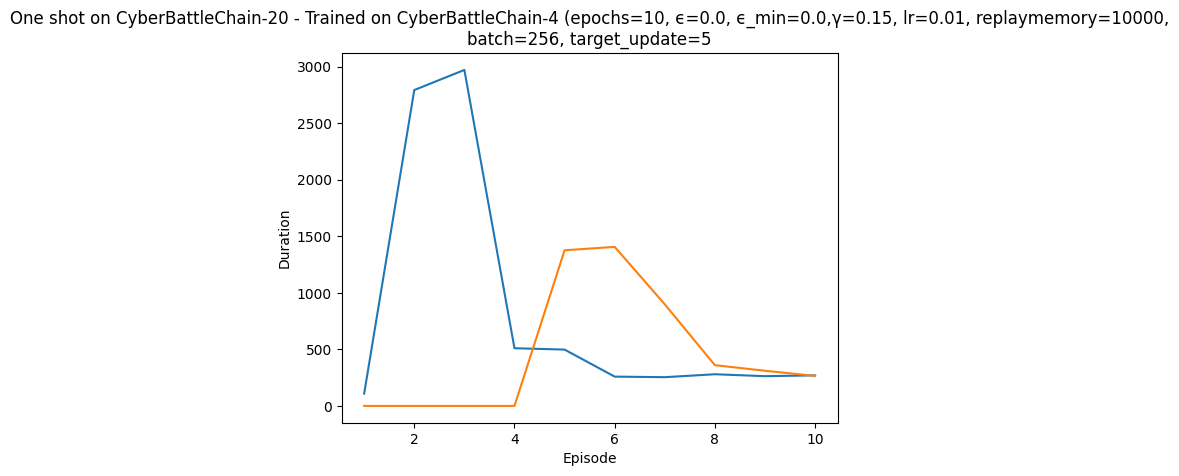

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=9000,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:   16.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   20.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   20.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:  131.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward:  131.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:  139.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:  139.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  148.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:  148.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  248.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  248.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  262.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  262.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  264.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  264.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward:  270.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward:  270.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:  274.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:  274.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 54|reward:  374.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 54|reward:  374.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 55|reward:  385.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 55|reward:  385.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  391.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  391.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward:  397.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward:  397.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 1|Iteration 97|reward:  406.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 1|Iteration 97|reward:  406.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 1|Iteration 109|reward:  506.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 1|Iteration 109|reward:  506.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 1|Iteration 125|reward:  520.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 1|Iteration 125|reward:  520.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 1|Iteration 132|reward:  620.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 1|Iteration 132|reward:  620.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 1|Iteration 138|reward:  631.0|last_reward_at:  132|Elapsed Time: 0:00:00||

Episode 1|Iteration 138|reward:  631.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 1|Iteration 145|reward:  633.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 1|Iteration 145|reward:  633.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 1|Iteration 146|reward:  642.0|last_reward_at:  145|Elapsed Time: 0:00:00||

Episode 1|Iteration 146|reward:  642.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:  648.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 1|Iteration 151|reward:  648.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 153|reward:  748.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 1|Iteration 153|reward:  748.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 165|reward:  750.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 1|Iteration 165|reward:  750.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 1|Iteration 191|reward:  756.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 1|Iteration 191|reward:  756.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 1|Iteration 202|reward:  762.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 1|Iteration 202|reward:  762.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 1|Iteration 222|reward:  762.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 1|Iteration 230|reward:  773.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 1|Iteration 230|reward:  773.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 1|Iteration 243|reward:  777.0|last_reward_at:  230|Elapsed Time: 0:00:00||

Episode 1|Iteration 243|reward:  777.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 1|Iteration 272|reward:  777.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 1|Iteration 276|reward:  779.0|last_reward_at:  243|Elapsed Time: 0:00:00||

Episode 1|Iteration 276|reward:  779.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 1|Iteration 294|reward:  788.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 1|Iteration 294|reward:  788.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 1|Iteration 302|reward:  888.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 1|Iteration 302|reward:  888.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 1|Iteration 303|reward:  894.0|last_reward_at:  302|Elapsed Time: 0:00:01||

Episode 1|Iteration 303|reward:  894.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 1|Iteration 327|reward:  894.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 1|Iteration 342|reward:  894.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 1|Iteration 367|reward:  894.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 1|Iteration 390|reward:  894.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 1|Iteration 413|reward:  894.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 1|Iteration 435|reward:  894.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 1|Iteration 452|reward:  894.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 1|Iteration 466|reward:  908.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 1|Iteration 466|reward:  908.0|last_reward_at:  466|Elapsed Time: 0:00:01||

Episode 1|Iteration 474|reward: 1008.0|last_reward_at:  466|Elapsed Time: 0:00:01||

Episode 1|Iteration 474|reward: 1008.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 1|Iteration 482|reward: 1014.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 1|Iteration 482|reward: 1014.0|last_reward_at:  482|Elapsed Time: 0:00:01||

Episode 1|Iteration 502|reward: 1014.0|last_reward_at:  482|Elapsed Time: 0:00:01||

Episode 1|Iteration 508|reward: 1028.0|last_reward_at:  482|Elapsed Time: 0:00:01||

Episode 1|Iteration 508|reward: 1028.0|last_reward_at:  508|Elapsed Time: 0:00:01||

Episode 1|Iteration 509|reward: 1034.0|last_reward_at:  508|Elapsed Time: 0:00:01||

Episode 1|Iteration 509|reward: 1034.0|last_reward_at:  509|Elapsed Time: 0:00:01||

Episode 1|Iteration 511|reward: 1040.0|last_reward_at:  509|Elapsed Time: 0:00:02||

Episode 1|Iteration 511|reward: 1040.0|last_reward_at:  511|Elapsed Time: 0:00:02||

Episode 1|Iteration 516|reward: 1140.0|last_reward_at:  511|Elapsed Time: 0:00:02||

Episode 1|Iteration 516|reward: 1140.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 1|Iteration 517|reward: 1142.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 1|Iteration 517|reward: 1142.0|last_reward_at:  517|Elapsed Time: 0:00:02||

Episode 1|Iteration 518|reward: 1148.0|last_reward_at:  517|Elapsed Time: 0:00:02||

Episode 1|Iteration 518|reward: 1148.0|last_reward_at:  518|Elapsed Time: 0:00:02||

Episode 1|Iteration 520|reward: 1150.0|last_reward_at:  518|Elapsed Time: 0:00:02||

Episode 1|Iteration 520|reward: 1150.0|last_reward_at:  520|Elapsed Time: 0:00:02||

Episode 1|Iteration 535|reward: 1150.0|last_reward_at:  520|Elapsed Time: 0:00:02||

Episode 1|Iteration 550|reward: 1150.0|last_reward_at:  520|Elapsed Time: 0:00:02||

Episode 1|Iteration 561|reward: 1161.0|last_reward_at:  520|Elapsed Time: 0:00:02||

Episode 1|Iteration 561|reward: 1161.0|last_reward_at:  561|Elapsed Time: 0:00:02||

Episode 1|Iteration 571|reward: 1169.0|last_reward_at:  561|Elapsed Time: 0:00:02||

Episode 1|Iteration 571|reward: 1169.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 1|Iteration 581|reward: 1175.0|last_reward_at:  571|Elapsed Time: 0:00:02||

Episode 1|Iteration 581|reward: 1175.0|last_reward_at:  581|Elapsed Time: 0:00:02||

Episode 1|Iteration 590|reward: 1184.0|last_reward_at:  581|Elapsed Time: 0:00:02||

Episode 1|Iteration 590|reward: 1184.0|last_reward_at:  590|Elapsed Time: 0:00:02||

Episode 1|Iteration 592|reward: 1284.0|last_reward_at:  590|Elapsed Time: 0:00:02||

Episode 1|Iteration 592|reward: 1284.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 605|reward: 1284.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 621|reward: 1284.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 637|reward: 1284.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 640|reward: 1295.0|last_reward_at:  592|Elapsed Time: 0:00:02||

Episode 1|Iteration 640|reward: 1295.0|last_reward_at:  640|Elapsed Time: 0:00:02||

Episode 1|Iteration 653|reward: 1295.0|last_reward_at:  640|Elapsed Time: 0:00:02||

Episode 1|Iteration 666|reward: 1295.0|last_reward_at:  640|Elapsed Time: 0:00:03||

Episode 1|Iteration 677|reward: 1299.0|last_reward_at:  640|Elapsed Time: 0:00:03||

Episode 1|Iteration 677|reward: 1299.0|last_reward_at:  677|Elapsed Time: 0:00:03||

Episode 1|Iteration 690|reward: 1308.0|last_reward_at:  677|Elapsed Time: 0:00:03||

Episode 1|Iteration 690|reward: 1308.0|last_reward_at:  690|Elapsed Time: 0:00:03||

Episode 1|Iteration 691|reward: 1310.0|last_reward_at:  690|Elapsed Time: 0:00:03||

Episode 1|Iteration 691|reward: 1310.0|last_reward_at:  691|Elapsed Time: 0:00:03||

Episode 1|Iteration 704|reward: 1410.0|last_reward_at:  691|Elapsed Time: 0:00:03||

Episode 1|Iteration 704|reward: 1410.0|last_reward_at:  704|Elapsed Time: 0:00:03||

Episode 1|Iteration 709|reward: 1421.0|last_reward_at:  704|Elapsed Time: 0:00:03||

Episode 1|Iteration 709|reward: 1421.0|last_reward_at:  709|Elapsed Time: 0:00:03||

Episode 1|Iteration 722|reward: 1421.0|last_reward_at:  709|Elapsed Time: 0:00:03||

Episode 1|Iteration 734|reward: 1430.0|last_reward_at:  709|Elapsed Time: 0:00:03||

Episode 1|Iteration 734|reward: 1430.0|last_reward_at:  734|Elapsed Time: 0:00:03||

Episode 1|Iteration 740|reward: 1530.0|last_reward_at:  734|Elapsed Time: 0:00:03||

Episode 1|Iteration 740|reward: 1530.0|last_reward_at:  740|Elapsed Time: 0:00:03||

Episode 1|Iteration 752|reward: 1530.0|last_reward_at:  740|Elapsed Time: 0:00:03||

Episode 1|Iteration 764|reward: 1530.0|last_reward_at:  740|Elapsed Time: 0:00:03||

Episode 1|Iteration 776|reward: 1530.0|last_reward_at:  740|Elapsed Time: 0:00:03||

Episode 1|Iteration 788|reward: 1530.0|last_reward_at:  740|Elapsed Time: 0:00:04||

Episode 1|Iteration 794|reward: 1536.0|last_reward_at:  740|Elapsed Time: 0:00:04||

Episode 1|Iteration 794|reward: 1536.0|last_reward_at:  794|Elapsed Time: 0:00:04||

Episode 1|Iteration 803|reward: 1536.0|last_reward_at:  794|Elapsed Time: 0:00:04||

Episode 1|Iteration 806|reward: 1536.0|last_reward_at:  794|Elapsed Time: 0:00:04||

Episode 1|Iteration 813|reward: 1547.0|last_reward_at:  794|Elapsed Time: 0:00:04||

Episode 1|Iteration 813|reward: 1547.0|last_reward_at:  813|Elapsed Time: 0:00:04||

Episode 1|Iteration 825|reward: 1547.0|last_reward_at:  813|Elapsed Time: 0:00:04||

Episode 1|Iteration 836|reward: 1547.0|last_reward_at:  813|Elapsed Time: 0:00:04||

Episode 1|Iteration 847|reward: 1547.0|last_reward_at:  813|Elapsed Time: 0:00:04||

Episode 1|Iteration 857|reward: 1547.0|last_reward_at:  813|Elapsed Time: 0:00:04||

Episode 1|Iteration 868|reward: 1547.0|last_reward_at:  813|Elapsed Time: 0:00:05||

Episode 1|Iteration 874|reward: 1553.0|last_reward_at:  813|Elapsed Time: 0:00:05||

Episode 1|Iteration 874|reward: 1553.0|last_reward_at:  874|Elapsed Time: 0:00:05||

Episode 1|Iteration 885|reward: 1557.0|last_reward_at:  874|Elapsed Time: 0:00:05||

Episode 1|Iteration 885|reward: 1557.0|last_reward_at:  885|Elapsed Time: 0:00:05||

Episode 1|Iteration 895|reward: 1557.0|last_reward_at:  885|Elapsed Time: 0:00:05||

Episode 1|Iteration 905|reward: 1566.0|last_reward_at:  885|Elapsed Time: 0:00:05||

Episode 1|Iteration 905|reward: 1566.0|last_reward_at:  905|Elapsed Time: 0:00:05||

Episode 1|Iteration 907|reward: 1666.0|last_reward_at:  905|Elapsed Time: 0:00:05||

Episode 1|Iteration 907|reward: 1666.0|last_reward_at:  907|Elapsed Time: 0:00:05||

Episode 1|Iteration 918|reward: 1666.0|last_reward_at:  907|Elapsed Time: 0:00:05||

Episode 1|Iteration 928|reward: 1666.0|last_reward_at:  907|Elapsed Time: 0:00:05||

Episode 1|Iteration 933|reward: 1680.0|last_reward_at:  907|Elapsed Time: 0:00:05||

Episode 1|Iteration 933|reward: 1680.0|last_reward_at:  933|Elapsed Time: 0:00:05||

Episode 1|Iteration 943|reward: 1780.0|last_reward_at:  933|Elapsed Time: 0:00:05||

Episode 1|Iteration 943|reward: 1780.0|last_reward_at:  943|Elapsed Time: 0:00:05||

Episode 1|Iteration 954|reward: 1782.0|last_reward_at:  943|Elapsed Time: 0:00:05||

Episode 1|Iteration 954|reward: 1782.0|last_reward_at:  954|Elapsed Time: 0:00:05||

Episode 1|Iteration 964|reward: 1782.0|last_reward_at:  954|Elapsed Time: 0:00:05||

Episode 1|Iteration 968|reward: 1788.0|last_reward_at:  954|Elapsed Time: 0:00:06||

Episode 1|Iteration 968|reward: 1788.0|last_reward_at:  968|Elapsed Time: 0:00:06||

Episode 1|Iteration 972|reward: 1794.0|last_reward_at:  968|Elapsed Time: 0:00:06||

Episode 1|Iteration 972|reward: 1794.0|last_reward_at:  972|Elapsed Time: 0:00:06||

Episode 1|Iteration 984|reward: 1794.0|last_reward_at:  972|Elapsed Time: 0:00:06||

Episode 1|Iteration 994|reward: 1794.0|last_reward_at:  972|Elapsed Time: 0:00:06||

Episode 1|Iteration 1005|reward: 1794.0|last_reward_at:  972|Elapsed Time: 0:00:06||

Episode 1|Iteration 1017|reward: 1794.0|last_reward_at:  972|Elapsed Time: 0:00:06||

Episode 1|Iteration 1026|reward: 1794.0|last_reward_at:  972|Elapsed Time: 0:00:06||

Episode 1|Iteration 1036|reward: 1794.0|last_reward_at:  972|Elapsed Time: 0:00:06||

Episode 1|Iteration 1047|reward: 1805.0|last_reward_at:  972|Elapsed Time: 0:00:06||

Episode 1|Iteration 1047|reward: 1805.0|last_reward_at: 1047|Elapsed Time: 0:00:06||

Episode 1|Iteration 1058|reward: 1805.0|last_reward_at: 1047|Elapsed Time: 0:00:06||

Episode 1|Iteration 1069|reward: 1805.0|last_reward_at: 1047|Elapsed Time: 0:00:06||

Episode 1|Iteration 1080|reward: 1805.0|last_reward_at: 1047|Elapsed Time: 0:00:07||

Episode 1|Iteration 1087|reward: 1809.0|last_reward_at: 1047|Elapsed Time: 0:00:07||

Episode 1|Iteration 1087|reward: 1809.0|last_reward_at: 1087|Elapsed Time: 0:00:07||

Episode 1|Iteration 1090|reward: 1811.0|last_reward_at: 1087|Elapsed Time: 0:00:07||

Episode 1|Iteration 1090|reward: 1811.0|last_reward_at: 1090|Elapsed Time: 0:00:07||

Episode 1|Iteration 1101|reward: 1811.0|last_reward_at: 1090|Elapsed Time: 0:00:07||

Episode 1|Iteration 1112|reward: 1811.0|last_reward_at: 1090|Elapsed Time: 0:00:07||

Episode 1|Iteration 1123|reward: 1811.0|last_reward_at: 1090|Elapsed Time: 0:00:07||

Episode 1|Iteration 1127|reward: 1817.0|last_reward_at: 1090|Elapsed Time: 0:00:07||

Episode 1|Iteration 1127|reward: 1817.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 1|Iteration 1137|reward: 1817.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 1|Iteration 1148|reward: 1817.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 1|Iteration 1156|reward: 1826.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 1|Iteration 1156|reward: 1826.0|last_reward_at: 1156|Elapsed Time: 0:00:07||

Episode 1|Iteration 1168|reward: 1826.0|last_reward_at: 1156|Elapsed Time: 0:00:07||

Episode 1|Iteration 1170|reward: 1926.0|last_reward_at: 1156|Elapsed Time: 0:00:07||

Episode 1|Iteration 1170|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:07||

Episode 1|Iteration 1180|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:08||

Episode 1|Iteration 1189|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:08||

Episode 1|Iteration 1199|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:08||

Episode 1|Iteration 1208|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:08||

Episode 1|Iteration 1219|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:08||

Episode 1|Iteration 1229|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:08||

Episode 1|Iteration 1239|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:08||

Episode 1|Iteration 1250|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:08||

Episode 1|Iteration 1261|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:08||

Episode 1|Iteration 1271|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:08||

Episode 1|Iteration 1281|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:09||

Episode 1|Iteration 1292|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:09||

Episode 1|Iteration 1303|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:09||

Episode 1|Iteration 1314|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:09||

Episode 1|Iteration 1325|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:09||

Episode 1|Iteration 1336|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:09||

Episode 1|Iteration 1347|reward: 1926.0|last_reward_at: 1170|Elapsed Time: 0:00:09||

Episode 1|Iteration 1352|reward: 1937.0|last_reward_at: 1170|Elapsed Time: 0:00:09||

Episode 1|Iteration 1352|reward: 1937.0|last_reward_at: 1352|Elapsed Time: 0:00:09||

Episode 1|Iteration 1362|reward: 1937.0|last_reward_at: 1352|Elapsed Time: 0:00:09||

Episode 1|Iteration 1372|reward: 1937.0|last_reward_at: 1352|Elapsed Time: 0:00:09||

Episode 1|Iteration 1382|reward: 1937.0|last_reward_at: 1352|Elapsed Time: 0:00:10||

Episode 1|Iteration 1392|reward: 1937.0|last_reward_at: 1352|Elapsed Time: 0:00:10||

Episode 1|Iteration 1403|reward: 1943.0|last_reward_at: 1352|Elapsed Time: 0:00:10||

Episode 1|Iteration 1403|reward: 1943.0|last_reward_at: 1403|Elapsed Time: 0:00:10||

Episode 1|Iteration 1412|reward: 1943.0|last_reward_at: 1403|Elapsed Time: 0:00:10||

Episode 1|Iteration 1422|reward: 1943.0|last_reward_at: 1403|Elapsed Time: 0:00:10||

Episode 1|Iteration 1433|reward: 1943.0|last_reward_at: 1403|Elapsed Time: 0:00:10||

Episode 1|Iteration 1444|reward: 1943.0|last_reward_at: 1403|Elapsed Time: 0:00:10||

Episode 1|Iteration 1455|reward: 1943.0|last_reward_at: 1403|Elapsed Time: 0:00:10||

Episode 1|Iteration 1465|reward: 1943.0|last_reward_at: 1403|Elapsed Time: 0:00:10||

Episode 1|Iteration 1472|reward: 1951.0|last_reward_at: 1403|Elapsed Time: 0:00:11||

Episode 1|Iteration 1472|reward: 1951.0|last_reward_at: 1472|Elapsed Time: 0:00:11||

Episode 1|Iteration 1482|reward: 1951.0|last_reward_at: 1472|Elapsed Time: 0:00:11||

Episode 1|Iteration 1491|reward: 1951.0|last_reward_at: 1472|Elapsed Time: 0:00:11||

Episode 1|Iteration 1502|reward: 1951.0|last_reward_at: 1472|Elapsed Time: 0:00:11||

Episode 1|Iteration 1512|reward: 1951.0|last_reward_at: 1472|Elapsed Time: 0:00:11||

Episode 1|Iteration 1522|reward: 1951.0|last_reward_at: 1472|Elapsed Time: 0:00:11||

Episode 1|Iteration 1532|reward: 1951.0|last_reward_at: 1472|Elapsed Time: 0:00:11||

Episode 1|Iteration 1542|reward: 1951.0|last_reward_at: 1472|Elapsed Time: 0:00:11||

Episode 1|Iteration 1553|reward: 1951.0|last_reward_at: 1472|Elapsed Time: 0:00:11||

Episode 1|Iteration 1559|reward: 1960.0|last_reward_at: 1472|Elapsed Time: 0:00:11||

Episode 1|Iteration 1559|reward: 1960.0|last_reward_at: 1559|Elapsed Time: 0:00:11||

Episode 1|Iteration 1568|reward: 2060.0|last_reward_at: 1559|Elapsed Time: 0:00:11||

Episode 1|Iteration 1568|reward: 2060.0|last_reward_at: 1568|Elapsed Time: 0:00:11||

Episode 1|Iteration 1578|reward: 2060.0|last_reward_at: 1568|Elapsed Time: 0:00:12||

Episode 1|Iteration 1588|reward: 2060.0|last_reward_at: 1568|Elapsed Time: 0:00:12||

Episode 1|Iteration 1595|reward: 2060.0|last_reward_at: 1568|Elapsed Time: 0:00:12||

Episode 1|Iteration 1603|reward: 2060.0|last_reward_at: 1568|Elapsed Time: 0:00:12||

Episode 1|Iteration 1612|reward: 2060.0|last_reward_at: 1568|Elapsed Time: 0:00:12||

Episode 1|Iteration 1620|reward: 2060.0|last_reward_at: 1568|Elapsed Time: 0:00:12||

Episode 1|Iteration 1630|reward: 2060.0|last_reward_at: 1568|Elapsed Time: 0:00:12||

Episode 1|Iteration 1640|reward: 2060.0|last_reward_at: 1568|Elapsed Time: 0:00:12||

Episode 1|Iteration 1650|reward: 2060.0|last_reward_at: 1568|Elapsed Time: 0:00:12||

Episode 1|Iteration 1659|reward: 2060.0|last_reward_at: 1568|Elapsed Time: 0:00:12||

Episode 1|Iteration 1669|reward: 2060.0|last_reward_at: 1568|Elapsed Time: 0:00:13||

Episode 1|Iteration 1671|reward: 2071.0|last_reward_at: 1568|Elapsed Time: 0:00:13||

Episode 1|Iteration 1671|reward: 2071.0|last_reward_at: 1671|Elapsed Time: 0:00:13||

Episode 1|Iteration 1681|reward: 2071.0|last_reward_at: 1671|Elapsed Time: 0:00:13||

Episode 1|Iteration 1690|reward: 2071.0|last_reward_at: 1671|Elapsed Time: 0:00:13||

Episode 1|Iteration 1699|reward: 2071.0|last_reward_at: 1671|Elapsed Time: 0:00:13||

Episode 1|Iteration 1700|reward: 2075.0|last_reward_at: 1671|Elapsed Time: 0:00:13||

Episode 1|Iteration 1700|reward: 2075.0|last_reward_at: 1700|Elapsed Time: 0:00:13||

Episode 1|Iteration 1709|reward: 2075.0|last_reward_at: 1700|Elapsed Time: 0:00:13||

Episode 1|Iteration 1714|reward: 2077.0|last_reward_at: 1700|Elapsed Time: 0:00:13||

Episode 1|Iteration 1714|reward: 2077.0|last_reward_at: 1714|Elapsed Time: 0:00:13||

Episode 1|Iteration 1723|reward: 2077.0|last_reward_at: 1714|Elapsed Time: 0:00:13||

Episode 1|Iteration 1732|reward: 2077.0|last_reward_at: 1714|Elapsed Time: 0:00:13||

Episode 1|Iteration 1741|reward: 2077.0|last_reward_at: 1714|Elapsed Time: 0:00:13||

Episode 1|Iteration 1750|reward: 2077.0|last_reward_at: 1714|Elapsed Time: 0:00:14||

Episode 1|Iteration 1758|reward: 2077.0|last_reward_at: 1714|Elapsed Time: 0:00:14||

Episode 1|Iteration 1767|reward: 2077.0|last_reward_at: 1714|Elapsed Time: 0:00:14||

Episode 1|Iteration 1776|reward: 2077.0|last_reward_at: 1714|Elapsed Time: 0:00:14||

Episode 1|Iteration 1784|reward: 2077.0|last_reward_at: 1714|Elapsed Time: 0:00:14||

Episode 1|Iteration 1792|reward: 2077.0|last_reward_at: 1714|Elapsed Time: 0:00:14||

Episode 1|Iteration 1796|reward: 2086.0|last_reward_at: 1714|Elapsed Time: 0:00:14||

Episode 1|Iteration 1796|reward: 2086.0|last_reward_at: 1796|Elapsed Time: 0:00:14||

Episode 1|Iteration 1805|reward: 2086.0|last_reward_at: 1796|Elapsed Time: 0:00:14||

Episode 1|Iteration 1806|reward: 2186.0|last_reward_at: 1796|Elapsed Time: 0:00:14||

Episode 1|Iteration 1806|reward: 2186.0|last_reward_at: 1806|Elapsed Time: 0:00:14||

Episode 1|Iteration 1815|reward: 2186.0|last_reward_at: 1806|Elapsed Time: 0:00:14||

Episode 1|Iteration 1823|reward: 2186.0|last_reward_at: 1806|Elapsed Time: 0:00:14||

Episode 1|Iteration 1831|reward: 2186.0|last_reward_at: 1806|Elapsed Time: 0:00:15||

Episode 1|Iteration 1840|reward: 2186.0|last_reward_at: 1806|Elapsed Time: 0:00:15||

Episode 1|Iteration 1849|reward: 2186.0|last_reward_at: 1806|Elapsed Time: 0:00:15||

Episode 1|Iteration 1858|reward: 2186.0|last_reward_at: 1806|Elapsed Time: 0:00:15||

Episode 1|Iteration 1867|reward: 2186.0|last_reward_at: 1806|Elapsed Time: 0:00:15||

Episode 1|Iteration 1875|reward: 2186.0|last_reward_at: 1806|Elapsed Time: 0:00:15||

Episode 1|Iteration 1883|reward: 2186.0|last_reward_at: 1806|Elapsed Time: 0:00:15||

Episode 1|Iteration 1886|reward: 2197.0|last_reward_at: 1806|Elapsed Time: 0:00:15||

Episode 1|Iteration 1886|reward: 2197.0|last_reward_at: 1886|Elapsed Time: 0:00:15||

Episode 1|Iteration 1894|reward: 2197.0|last_reward_at: 1886|Elapsed Time: 0:00:15||

Episode 1|Iteration 1902|reward: 2197.0|last_reward_at: 1886|Elapsed Time: 0:00:15||

Episode 1|Iteration 1910|reward: 2197.0|last_reward_at: 1886|Elapsed Time: 0:00:16||

Episode 1|Iteration 1918|reward: 2197.0|last_reward_at: 1886|Elapsed Time: 0:00:16||

Episode 1|Iteration 1926|reward: 2197.0|last_reward_at: 1886|Elapsed Time: 0:00:16||

Episode 1|Iteration 1935|reward: 2197.0|last_reward_at: 1886|Elapsed Time: 0:00:16||

Episode 1|Iteration 1944|reward: 2197.0|last_reward_at: 1886|Elapsed Time: 0:00:16||

Episode 1|Iteration 1953|reward: 2197.0|last_reward_at: 1886|Elapsed Time: 0:00:16||

Episode 1|Iteration 1960|reward: 2197.0|last_reward_at: 1886|Elapsed Time: 0:00:16||

Episode 1|Iteration 1968|reward: 2205.0|last_reward_at: 1886|Elapsed Time: 0:00:16||

Episode 1|Iteration 1968|reward: 2205.0|last_reward_at: 1968|Elapsed Time: 0:00:16||

Episode 1|Iteration 1977|reward: 2205.0|last_reward_at: 1968|Elapsed Time: 0:00:16||

Episode 1|Iteration 1986|reward: 2205.0|last_reward_at: 1968|Elapsed Time: 0:00:16||

Episode 1|Iteration 1995|reward: 2211.0|last_reward_at: 1968|Elapsed Time: 0:00:17||

Episode 1|Iteration 1995|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:17||

Episode 1|Iteration 2004|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:17||

Episode 1|Iteration 2012|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:17||

Episode 1|Iteration 2020|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:17||

Episode 1|Iteration 2028|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:17||

Episode 1|Iteration 2037|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:17||

Episode 1|Iteration 2045|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:17||

Episode 1|Iteration 2051|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:17||

Episode 1|Iteration 2058|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:17||

Episode 1|Iteration 2067|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:17||

Episode 1|Iteration 2076|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:18||

Episode 1|Iteration 2084|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:18||

Episode 1|Iteration 2092|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:18||

Episode 1|Iteration 2100|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:18||

Episode 1|Iteration 2108|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:18||

Episode 1|Iteration 2117|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:18||

Episode 1|Iteration 2124|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:18||

Episode 1|Iteration 2128|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:18||

Episode 1|Iteration 2133|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:18||

Episode 1|Iteration 2139|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:19||

Episode 1|Iteration 2142|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:19||

Episode 1|Iteration 2145|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:19||

Episode 1|Iteration 2149|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:19||

Episode 1|Iteration 2155|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:19||

Episode 1|Iteration 2160|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:19||

Episode 1|Iteration 2165|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:19||

Episode 1|Iteration 2172|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:19||

Episode 1|Iteration 2181|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:19||

Episode 1|Iteration 2190|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:19||

Episode 1|Iteration 2198|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:20||

Episode 1|Iteration 2207|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:20||

Episode 1|Iteration 2215|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:20||

Episode 1|Iteration 2224|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:20||

Episode 1|Iteration 2232|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:20||

Episode 1|Iteration 2240|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:20||

Episode 1|Iteration 2248|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:20||

Episode 1|Iteration 2256|reward: 2211.0|last_reward_at: 1995|Elapsed Time: 0:00:20||

Episode 1|Iteration 2264|reward: 2220.0|last_reward_at: 1995|Elapsed Time: 0:00:20||

Episode 1|Iteration 2264|reward: 2220.0|last_reward_at: 2264|Elapsed Time: 0:00:20||

Episode 1|Iteration 2266|reward: 2320.0|last_reward_at: 2264|Elapsed Time: 0:00:20||

Episode 1|Iteration 2266|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:20||

Episode 1|Iteration 2274|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:21||

Episode 1|Iteration 2283|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:21||

Episode 1|Iteration 2292|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:21||

Episode 1|Iteration 2300|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:21||

Episode 1|Iteration 2309|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:21||

Episode 1|Iteration 2318|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:21||

Episode 1|Iteration 2326|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:21||

Episode 1|Iteration 2335|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:21||

Episode 1|Iteration 2344|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:21||

Episode 1|Iteration 2352|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:22||

Episode 1|Iteration 2360|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:22||

Episode 1|Iteration 2369|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:22||

Episode 1|Iteration 2377|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:22||

Episode 1|Iteration 2385|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:22||

Episode 1|Iteration 2393|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:22||

Episode 1|Iteration 2400|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:22||

Episode 1|Iteration 2409|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:22||

Episode 1|Iteration 2418|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:22||

Episode 1|Iteration 2426|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:22||

Episode 1|Iteration 2434|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:23||

Episode 1|Iteration 2442|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:23||

Episode 1|Iteration 2450|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:23||

Episode 1|Iteration 2458|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:23||

Episode 1|Iteration 2466|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:23||

Episode 1|Iteration 2474|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:23||

Episode 1|Iteration 2482|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:23||

Episode 1|Iteration 2490|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:23||

Episode 1|Iteration 2497|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:23||

Episode 1|Iteration 2505|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:24||

Episode 1|Iteration 2514|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:24||

Episode 1|Iteration 2522|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:24||

Episode 1|Iteration 2530|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:24||

Episode 1|Iteration 2538|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:24||

Episode 1|Iteration 2547|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:24||

Episode 1|Iteration 2555|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:24||

Episode 1|Iteration 2563|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:24||

Episode 1|Iteration 2571|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:24||

Episode 1|Iteration 2579|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:25||

Episode 1|Iteration 2587|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:25||

Episode 1|Iteration 2595|reward: 2320.0|last_reward_at: 2266|Elapsed Time: 0:00:25||

Episode 1|Iteration 2603|reward: 2331.0|last_reward_at: 2266|Elapsed Time: 0:00:25||

Episode 1|Iteration 2603|reward: 2331.0|last_reward_at: 2603|Elapsed Time: 0:00:25||

Episode 1|Iteration 2611|reward: 2331.0|last_reward_at: 2603|Elapsed Time: 0:00:25||

Episode 1|Iteration 2616|reward: 2340.0|last_reward_at: 2603|Elapsed Time: 0:00:25||

Episode 1|Iteration 2616|reward: 2340.0|last_reward_at: 2616|Elapsed Time: 0:00:25||

Episode 1|Iteration 2617|reward: 2440.0|last_reward_at: 2616|Elapsed Time: 0:00:25||

Episode 1|Iteration 2617|reward: 2440.0|last_reward_at: 2617|Elapsed Time: 0:00:25||

Episode 1|Iteration 2624|reward: 2440.0|last_reward_at: 2617|Elapsed Time: 0:00:25||

Episode 1|Iteration 2632|reward: 2440.0|last_reward_at: 2617|Elapsed Time: 0:00:25||

Episode 1|Iteration 2640|reward: 2440.0|last_reward_at: 2617|Elapsed Time: 0:00:25||

Episode 1|Iteration 2648|reward: 2440.0|last_reward_at: 2617|Elapsed Time: 0:00:26||

Episode 1|Iteration 2655|reward: 2440.0|last_reward_at: 2617|Elapsed Time: 0:00:26||

Episode 1|Iteration 2663|reward: 2440.0|last_reward_at: 2617|Elapsed Time: 0:00:26||

Episode 1|Iteration 2668|reward: 2442.0|last_reward_at: 2617|Elapsed Time: 0:00:26||

Episode 1|Iteration 2668|reward: 2442.0|last_reward_at: 2668|Elapsed Time: 0:00:26||

Episode 1|Iteration 2676|reward: 2442.0|last_reward_at: 2668|Elapsed Time: 0:00:26||

Episode 1|Iteration 2684|reward: 2442.0|last_reward_at: 2668|Elapsed Time: 0:00:26||

Episode 1|Iteration 2688|reward: 2444.0|last_reward_at: 2668|Elapsed Time: 0:00:26||

Episode 1|Iteration 2688|reward: 2444.0|last_reward_at: 2688|Elapsed Time: 0:00:26||

Episode 1|Iteration 2695|reward: 2444.0|last_reward_at: 2688|Elapsed Time: 0:00:26||

Episode 1|Iteration 2703|reward: 2444.0|last_reward_at: 2688|Elapsed Time: 0:00:26||

Episode 1|Iteration 2711|reward: 2444.0|last_reward_at: 2688|Elapsed Time: 0:00:26||

Episode 1|Iteration 2718|reward: 2444.0|last_reward_at: 2688|Elapsed Time: 0:00:27||

Episode 1|Iteration 2724|reward: 2444.0|last_reward_at: 2688|Elapsed Time: 0:00:27||

Episode 1|Iteration 2732|reward: 2444.0|last_reward_at: 2688|Elapsed Time: 0:00:27||

Episode 1|Iteration 2740|reward: 2444.0|last_reward_at: 2688|Elapsed Time: 0:00:27||

Episode 1|Iteration 2747|reward: 2444.0|last_reward_at: 2688|Elapsed Time: 0:00:27||

Episode 1|Iteration 2753|reward: 2455.0|last_reward_at: 2688|Elapsed Time: 0:00:27||

Episode 1|Iteration 2753|reward: 2455.0|last_reward_at: 2753|Elapsed Time: 0:00:27||

Episode 1|Iteration 2760|reward: 2455.0|last_reward_at: 2753|Elapsed Time: 0:00:27||

Episode 1|Iteration 2767|reward: 2455.0|last_reward_at: 2753|Elapsed Time: 0:00:27||

Episode 1|Iteration 2769|reward: 2463.0|last_reward_at: 2753|Elapsed Time: 0:00:27||

Episode 1|Iteration 2769|reward: 2463.0|last_reward_at: 2769|Elapsed Time: 0:00:27||

Episode 1|Iteration 2776|reward: 2463.0|last_reward_at: 2769|Elapsed Time: 0:00:27||

Episode 1|Iteration 2784|reward: 2463.0|last_reward_at: 2769|Elapsed Time: 0:00:27||

Episode 1|Iteration 2791|reward: 2463.0|last_reward_at: 2769|Elapsed Time: 0:00:28||

Episode 1|Iteration 2798|reward: 2463.0|last_reward_at: 2769|Elapsed Time: 0:00:28||

Episode 1|Iteration 2805|reward: 2463.0|last_reward_at: 2769|Elapsed Time: 0:00:28||

Episode 1|Iteration 2813|reward: 2463.0|last_reward_at: 2769|Elapsed Time: 0:00:28||

Episode 1|Iteration 2820|reward: 2463.0|last_reward_at: 2769|Elapsed Time: 0:00:28||

Episode 1|Iteration 2827|reward: 2463.0|last_reward_at: 2769|Elapsed Time: 0:00:28||

Episode 1|Iteration 2834|reward: 2463.0|last_reward_at: 2769|Elapsed Time: 0:00:28||

Episode 1|Iteration 2842|reward: 2463.0|last_reward_at: 2769|Elapsed Time: 0:00:28||

Episode 1|Iteration 2849|reward: 2463.0|last_reward_at: 2769|Elapsed Time: 0:00:28||

Episode 1|Iteration 2851|reward: 2469.0|last_reward_at: 2769|Elapsed Time: 0:00:28||

Episode 1|Iteration 2851|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:28||

Episode 1|Iteration 2859|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:29||

Episode 1|Iteration 2866|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:29||

Episode 1|Iteration 2874|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:29||

Episode 1|Iteration 2882|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:29||

Episode 1|Iteration 2890|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:29||

Episode 1|Iteration 2898|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:29||

Episode 1|Iteration 2905|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:29||

Episode 1|Iteration 2913|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:29||

Episode 1|Iteration 2920|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:29||

Episode 1|Iteration 2928|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:30||

Episode 1|Iteration 2935|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:30||

Episode 1|Iteration 2943|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:30||

Episode 1|Iteration 2950|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:30||

Episode 1|Iteration 2957|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:30||

Episode 1|Iteration 2963|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:30||

Episode 1|Iteration 2970|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:30||

Episode 1|Iteration 2977|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:30||

Episode 1|Iteration 2985|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:30||

Episode 1|Iteration 2993|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:30||

Episode 1|Iteration 3001|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:31||

Episode 1|Iteration 3009|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:31||

Episode 1|Iteration 3015|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:31||

Episode 1|Iteration 3022|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:31||

Episode 1|Iteration 3029|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:31||

Episode 1|Iteration 3037|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:31||

Episode 1|Iteration 3044|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:31||

Episode 1|Iteration 3051|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:31||

Episode 1|Iteration 3059|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:31||

Episode 1|Iteration 3067|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:31||

Episode 1|Iteration 3075|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:32||

Episode 1|Iteration 3082|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:32||

Episode 1|Iteration 3090|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:32||

Episode 1|Iteration 3098|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:32||

Episode 1|Iteration 3106|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:32||

Episode 1|Iteration 3113|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:32||

Episode 1|Iteration 3119|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:32||

Episode 1|Iteration 3126|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:32||

Episode 1|Iteration 3133|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:32||

Episode 1|Iteration 3134|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:33||

Episode 1|Iteration 3140|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:33||

Episode 1|Iteration 3148|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:33||

Episode 1|Iteration 3156|reward: 2469.0|last_reward_at: 2851|Elapsed Time: 0:00:33||

Episode 1|Iteration 3161|reward: 2478.0|last_reward_at: 2851|Elapsed Time: 0:00:33||

Episode 1|Iteration 3161|reward: 2478.0|last_reward_at: 3161|Elapsed Time: 0:00:33||

Episode 1|Iteration 3163|reward: 2578.0|last_reward_at: 3161|Elapsed Time: 0:00:33||

Episode 1|Iteration 3163|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:33||

Episode 1|Iteration 3170|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:33||

Episode 1|Iteration 3177|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:33||

Episode 1|Iteration 3184|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:33||

Episode 1|Iteration 3190|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:34||

Episode 1|Iteration 3196|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:34||

Episode 1|Iteration 3203|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:34||

Episode 1|Iteration 3210|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:34||

Episode 1|Iteration 3218|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:34||

Episode 1|Iteration 3225|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:34||

Episode 1|Iteration 3232|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:34||

Episode 1|Iteration 3239|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:34||

Episode 1|Iteration 3246|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:34||

Episode 1|Iteration 3253|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:35||

Episode 1|Iteration 3260|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:35||

Episode 1|Iteration 3267|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:35||

Episode 1|Iteration 3274|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:35||

Episode 1|Iteration 3280|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:35||

Episode 1|Iteration 3286|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:35||

Episode 1|Iteration 3293|reward: 2578.0|last_reward_at: 3163|Elapsed Time: 0:00:35||

Episode 1|Iteration 3294|reward: 2592.0|last_reward_at: 3163|Elapsed Time: 0:00:35||

Episode 1|Iteration 3294|reward: 2592.0|last_reward_at: 3294|Elapsed Time: 0:00:35||

Episode 1|Iteration 3295|reward: 7592.0|last_reward_at: 3294|Elapsed Time: 0:00:35||

Episode 1|Iteration 3295|reward: 7592.0|last_reward_at: 3295|Elapsed Time: 0:00:35||

  Episode 1 ended at t=3295 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 40/1437 (0.03)
    explore-remote: 40/1757 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 712
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.6755, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  125.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  125.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  133.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:  133.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  135.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:  135.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  137.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward:  137.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  143.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:  143.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  152.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 40|reward:  152.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  252.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 2|Iteration 42|reward:  252.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 57|reward:  263.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 2|Iteration 57|reward:  263.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 2|Iteration 59|reward:  267.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 2|Iteration 59|reward:  267.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  269.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 2|Iteration 112|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 2|Iteration 134|reward:  278.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 2|Iteration 134|reward:  278.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 2|Iteration 136|reward:  378.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 2|Iteration 136|reward:  378.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 2|Iteration 148|reward:  389.0|last_reward_at:  136|Elapsed Time: 0:00:00||

Episode 2|Iteration 148|reward:  389.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 2|Iteration 149|reward:  397.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 2|Iteration 149|reward:  397.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 2|Iteration 176|reward:  403.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 2|Iteration 176|reward:  403.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 2|Iteration 207|reward:  403.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:  403.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 2|Iteration 265|reward:  403.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 2|Iteration 282|reward:  412.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 2|Iteration 282|reward:  412.0|last_reward_at:  282|Elapsed Time: 0:00:00||

Episode 2|Iteration 283|reward:  512.0|last_reward_at:  282|Elapsed Time: 0:00:00||

Episode 2|Iteration 283|reward:  512.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 2|Iteration 304|reward:  526.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 2|Iteration 304|reward:  526.0|last_reward_at:  304|Elapsed Time: 0:00:00||

Episode 2|Iteration 307|reward:  626.0|last_reward_at:  304|Elapsed Time: 0:00:00||

Episode 2|Iteration 307|reward:  626.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 2|Iteration 313|reward:  637.0|last_reward_at:  307|Elapsed Time: 0:00:00||

Episode 2|Iteration 313|reward:  637.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 2|Iteration 315|reward:  643.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 2|Iteration 315|reward:  643.0|last_reward_at:  315|Elapsed Time: 0:00:00||

Episode 2|Iteration 321|reward:  651.0|last_reward_at:  315|Elapsed Time: 0:00:00||

Episode 2|Iteration 321|reward:  651.0|last_reward_at:  321|Elapsed Time: 0:00:00||

Episode 2|Iteration 329|reward:  653.0|last_reward_at:  321|Elapsed Time: 0:00:00||

Episode 2|Iteration 329|reward:  653.0|last_reward_at:  329|Elapsed Time: 0:00:00||

Episode 2|Iteration 336|reward:  659.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 2|Iteration 336|reward:  659.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 2|Iteration 364|reward:  659.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 2|Iteration 370|reward:  661.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 2|Iteration 370|reward:  661.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 2|Iteration 393|reward:  661.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 2|Iteration 398|reward:  670.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 2|Iteration 398|reward:  670.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 2|Iteration 407|reward:  770.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 2|Iteration 407|reward:  770.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 2|Iteration 415|reward:  781.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 2|Iteration 415|reward:  781.0|last_reward_at:  415|Elapsed Time: 0:00:01||

Episode 2|Iteration 425|reward:  785.0|last_reward_at:  415|Elapsed Time: 0:00:01||

Episode 2|Iteration 425|reward:  785.0|last_reward_at:  425|Elapsed Time: 0:00:01||

Episode 2|Iteration 436|reward:  787.0|last_reward_at:  425|Elapsed Time: 0:00:01||

Episode 2|Iteration 436|reward:  787.0|last_reward_at:  436|Elapsed Time: 0:00:01||

Episode 2|Iteration 455|reward:  787.0|last_reward_at:  436|Elapsed Time: 0:00:01||

Episode 2|Iteration 478|reward:  787.0|last_reward_at:  436|Elapsed Time: 0:00:01||

Episode 2|Iteration 498|reward:  787.0|last_reward_at:  436|Elapsed Time: 0:00:01||

Episode 2|Iteration 511|reward:  796.0|last_reward_at:  436|Elapsed Time: 0:00:01||

Episode 2|Iteration 511|reward:  796.0|last_reward_at:  511|Elapsed Time: 0:00:01||

Episode 2|Iteration 515|reward:  896.0|last_reward_at:  511|Elapsed Time: 0:00:01||

Episode 2|Iteration 515|reward:  896.0|last_reward_at:  515|Elapsed Time: 0:00:01||

Episode 2|Iteration 537|reward:  896.0|last_reward_at:  515|Elapsed Time: 0:00:01||

Episode 2|Iteration 556|reward:  896.0|last_reward_at:  515|Elapsed Time: 0:00:02||

Episode 2|Iteration 570|reward:  896.0|last_reward_at:  515|Elapsed Time: 0:00:02||

Episode 2|Iteration 584|reward:  907.0|last_reward_at:  515|Elapsed Time: 0:00:02||

Episode 2|Iteration 584|reward:  907.0|last_reward_at:  584|Elapsed Time: 0:00:02||

Episode 2|Iteration 598|reward:  915.0|last_reward_at:  584|Elapsed Time: 0:00:02||

Episode 2|Iteration 598|reward:  915.0|last_reward_at:  598|Elapsed Time: 0:00:02||

Episode 2|Iteration 616|reward:  924.0|last_reward_at:  598|Elapsed Time: 0:00:02||

Episode 2|Iteration 616|reward:  924.0|last_reward_at:  616|Elapsed Time: 0:00:02||

Episode 2|Iteration 621|reward: 1024.0|last_reward_at:  616|Elapsed Time: 0:00:02||

Episode 2|Iteration 621|reward: 1024.0|last_reward_at:  621|Elapsed Time: 0:00:02||

Episode 2|Iteration 623|reward: 1030.0|last_reward_at:  621|Elapsed Time: 0:00:02||

Episode 2|Iteration 623|reward: 1030.0|last_reward_at:  623|Elapsed Time: 0:00:02||

Episode 2|Iteration 637|reward: 1044.0|last_reward_at:  623|Elapsed Time: 0:00:02||

Episode 2|Iteration 637|reward: 1044.0|last_reward_at:  637|Elapsed Time: 0:00:02||

Episode 2|Iteration 641|reward: 1144.0|last_reward_at:  637|Elapsed Time: 0:00:02||

Episode 2|Iteration 641|reward: 1144.0|last_reward_at:  641|Elapsed Time: 0:00:02||

Episode 2|Iteration 654|reward: 1146.0|last_reward_at:  641|Elapsed Time: 0:00:02||

Episode 2|Iteration 654|reward: 1146.0|last_reward_at:  654|Elapsed Time: 0:00:02||

Episode 2|Iteration 655|reward: 1152.0|last_reward_at:  654|Elapsed Time: 0:00:02||

Episode 2|Iteration 655|reward: 1152.0|last_reward_at:  655|Elapsed Time: 0:00:02||

Episode 2|Iteration 657|reward: 1166.0|last_reward_at:  655|Elapsed Time: 0:00:02||

Episode 2|Iteration 657|reward: 1166.0|last_reward_at:  657|Elapsed Time: 0:00:02||

Episode 2|Iteration 659|reward: 1266.0|last_reward_at:  657|Elapsed Time: 0:00:02||

Episode 2|Iteration 659|reward: 1266.0|last_reward_at:  659|Elapsed Time: 0:00:02||

Episode 2|Iteration 660|reward: 1268.0|last_reward_at:  659|Elapsed Time: 0:00:02||

Episode 2|Iteration 660|reward: 1268.0|last_reward_at:  660|Elapsed Time: 0:00:02||

Episode 2|Iteration 669|reward: 1274.0|last_reward_at:  660|Elapsed Time: 0:00:02||

Episode 2|Iteration 669|reward: 1274.0|last_reward_at:  669|Elapsed Time: 0:00:02||

Episode 2|Iteration 682|reward: 1280.0|last_reward_at:  669|Elapsed Time: 0:00:02||

Episode 2|Iteration 682|reward: 1280.0|last_reward_at:  682|Elapsed Time: 0:00:02||

Episode 2|Iteration 698|reward: 1280.0|last_reward_at:  682|Elapsed Time: 0:00:02||

Episode 2|Iteration 701|reward: 1286.0|last_reward_at:  682|Elapsed Time: 0:00:02||

Episode 2|Iteration 701|reward: 1286.0|last_reward_at:  701|Elapsed Time: 0:00:02||

Episode 2|Iteration 714|reward: 1286.0|last_reward_at:  701|Elapsed Time: 0:00:02||

Episode 2|Iteration 729|reward: 1286.0|last_reward_at:  701|Elapsed Time: 0:00:03||

Episode 2|Iteration 743|reward: 1286.0|last_reward_at:  701|Elapsed Time: 0:00:03||

Episode 2|Iteration 758|reward: 1286.0|last_reward_at:  701|Elapsed Time: 0:00:03||

Episode 2|Iteration 772|reward: 1286.0|last_reward_at:  701|Elapsed Time: 0:00:03||

Episode 2|Iteration 786|reward: 1286.0|last_reward_at:  701|Elapsed Time: 0:00:03||

Episode 2|Iteration 790|reward: 1297.0|last_reward_at:  701|Elapsed Time: 0:00:03||

Episode 2|Iteration 790|reward: 1297.0|last_reward_at:  790|Elapsed Time: 0:00:03||

Episode 2|Iteration 798|reward: 1297.0|last_reward_at:  790|Elapsed Time: 0:00:03||

Episode 2|Iteration 801|reward: 1301.0|last_reward_at:  790|Elapsed Time: 0:00:03||

Episode 2|Iteration 801|reward: 1301.0|last_reward_at:  801|Elapsed Time: 0:00:03||

Episode 2|Iteration 805|reward: 1303.0|last_reward_at:  801|Elapsed Time: 0:00:03||

Episode 2|Iteration 805|reward: 1303.0|last_reward_at:  805|Elapsed Time: 0:00:03||

Episode 2|Iteration 818|reward: 1303.0|last_reward_at:  805|Elapsed Time: 0:00:03||

Episode 2|Iteration 831|reward: 1303.0|last_reward_at:  805|Elapsed Time: 0:00:03||

Episode 2|Iteration 846|reward: 1303.0|last_reward_at:  805|Elapsed Time: 0:00:03||

Episode 2|Iteration 861|reward: 1303.0|last_reward_at:  805|Elapsed Time: 0:00:04||

Episode 2|Iteration 874|reward: 1303.0|last_reward_at:  805|Elapsed Time: 0:00:04||

Episode 2|Iteration 889|reward: 1312.0|last_reward_at:  805|Elapsed Time: 0:00:04||

Episode 2|Iteration 889|reward: 1312.0|last_reward_at:  889|Elapsed Time: 0:00:04||

Episode 2|Iteration 890|reward: 1412.0|last_reward_at:  889|Elapsed Time: 0:00:04||

Episode 2|Iteration 890|reward: 1412.0|last_reward_at:  890|Elapsed Time: 0:00:04||

Episode 2|Iteration 892|reward: 1423.0|last_reward_at:  890|Elapsed Time: 0:00:04||

Episode 2|Iteration 892|reward: 1423.0|last_reward_at:  892|Elapsed Time: 0:00:04||

Episode 2|Iteration 905|reward: 1429.0|last_reward_at:  892|Elapsed Time: 0:00:04||

Episode 2|Iteration 905|reward: 1429.0|last_reward_at:  905|Elapsed Time: 0:00:04||

Episode 2|Iteration 906|reward: 1437.0|last_reward_at:  905|Elapsed Time: 0:00:04||

Episode 2|Iteration 906|reward: 1437.0|last_reward_at:  906|Elapsed Time: 0:00:04||

Episode 2|Iteration 919|reward: 1437.0|last_reward_at:  906|Elapsed Time: 0:00:04||

Episode 2|Iteration 931|reward: 1437.0|last_reward_at:  906|Elapsed Time: 0:00:04||

Episode 2|Iteration 945|reward: 1437.0|last_reward_at:  906|Elapsed Time: 0:00:04||

Episode 2|Iteration 959|reward: 1437.0|last_reward_at:  906|Elapsed Time: 0:00:04||

Episode 2|Iteration 972|reward: 1437.0|last_reward_at:  906|Elapsed Time: 0:00:04||

Episode 2|Iteration 986|reward: 1437.0|last_reward_at:  906|Elapsed Time: 0:00:05||

Episode 2|Iteration 1001|reward: 1437.0|last_reward_at:  906|Elapsed Time: 0:00:05||

Episode 2|Iteration 1014|reward: 1446.0|last_reward_at:  906|Elapsed Time: 0:00:05||

Episode 2|Iteration 1014|reward: 1446.0|last_reward_at: 1014|Elapsed Time: 0:00:05||

Episode 2|Iteration 1015|reward: 1546.0|last_reward_at: 1014|Elapsed Time: 0:00:05||

Episode 2|Iteration 1015|reward: 1546.0|last_reward_at: 1015|Elapsed Time: 0:00:05||

Episode 2|Iteration 1017|reward: 1560.0|last_reward_at: 1015|Elapsed Time: 0:00:05||

Episode 2|Iteration 1017|reward: 1560.0|last_reward_at: 1017|Elapsed Time: 0:00:05||

Episode 2|Iteration 1020|reward: 1660.0|last_reward_at: 1017|Elapsed Time: 0:00:05||

Episode 2|Iteration 1020|reward: 1660.0|last_reward_at: 1020|Elapsed Time: 0:00:05||

Episode 2|Iteration 1032|reward: 1660.0|last_reward_at: 1020|Elapsed Time: 0:00:05||

Episode 2|Iteration 1034|reward: 1662.0|last_reward_at: 1020|Elapsed Time: 0:00:05||

Episode 2|Iteration 1034|reward: 1662.0|last_reward_at: 1034|Elapsed Time: 0:00:05||

Episode 2|Iteration 1036|reward: 1668.0|last_reward_at: 1034|Elapsed Time: 0:00:05||

Episode 2|Iteration 1036|reward: 1668.0|last_reward_at: 1036|Elapsed Time: 0:00:05||

Episode 2|Iteration 1048|reward: 1668.0|last_reward_at: 1036|Elapsed Time: 0:00:05||

Episode 2|Iteration 1061|reward: 1668.0|last_reward_at: 1036|Elapsed Time: 0:00:05||

Episode 2|Iteration 1073|reward: 1668.0|last_reward_at: 1036|Elapsed Time: 0:00:05||

Episode 2|Iteration 1085|reward: 1668.0|last_reward_at: 1036|Elapsed Time: 0:00:05||

Episode 2|Iteration 1095|reward: 1668.0|last_reward_at: 1036|Elapsed Time: 0:00:05||

Episode 2|Iteration 1102|reward: 1670.0|last_reward_at: 1036|Elapsed Time: 0:00:06||

Episode 2|Iteration 1102|reward: 1670.0|last_reward_at: 1102|Elapsed Time: 0:00:06||

Episode 2|Iteration 1113|reward: 1670.0|last_reward_at: 1102|Elapsed Time: 0:00:06||

Episode 2|Iteration 1125|reward: 1670.0|last_reward_at: 1102|Elapsed Time: 0:00:06||

Episode 2|Iteration 1137|reward: 1670.0|last_reward_at: 1102|Elapsed Time: 0:00:06||

Episode 2|Iteration 1149|reward: 1670.0|last_reward_at: 1102|Elapsed Time: 0:00:06||

Episode 2|Iteration 1150|reward: 1681.0|last_reward_at: 1102|Elapsed Time: 0:00:06||

Episode 2|Iteration 1150|reward: 1681.0|last_reward_at: 1150|Elapsed Time: 0:00:06||

Episode 2|Iteration 1162|reward: 1681.0|last_reward_at: 1150|Elapsed Time: 0:00:06||

Episode 2|Iteration 1173|reward: 1681.0|last_reward_at: 1150|Elapsed Time: 0:00:06||

Episode 2|Iteration 1174|reward: 1690.0|last_reward_at: 1150|Elapsed Time: 0:00:06||

Episode 2|Iteration 1174|reward: 1690.0|last_reward_at: 1174|Elapsed Time: 0:00:06||

Episode 2|Iteration 1176|reward: 1790.0|last_reward_at: 1174|Elapsed Time: 0:00:06||

Episode 2|Iteration 1176|reward: 1790.0|last_reward_at: 1176|Elapsed Time: 0:00:06||

Episode 2|Iteration 1187|reward: 1796.0|last_reward_at: 1176|Elapsed Time: 0:00:06||

Episode 2|Iteration 1187|reward: 1796.0|last_reward_at: 1187|Elapsed Time: 0:00:06||

Episode 2|Iteration 1199|reward: 1796.0|last_reward_at: 1187|Elapsed Time: 0:00:06||

Episode 2|Iteration 1209|reward: 1796.0|last_reward_at: 1187|Elapsed Time: 0:00:07||

Episode 2|Iteration 1217|reward: 1802.0|last_reward_at: 1187|Elapsed Time: 0:00:07||

Episode 2|Iteration 1217|reward: 1802.0|last_reward_at: 1217|Elapsed Time: 0:00:07||

Episode 2|Iteration 1229|reward: 1802.0|last_reward_at: 1217|Elapsed Time: 0:00:07||

Episode 2|Iteration 1241|reward: 1802.0|last_reward_at: 1217|Elapsed Time: 0:00:07||

Episode 2|Iteration 1253|reward: 1802.0|last_reward_at: 1217|Elapsed Time: 0:00:07||

Episode 2|Iteration 1259|reward: 1816.0|last_reward_at: 1217|Elapsed Time: 0:00:07||

Episode 2|Iteration 1259|reward: 1816.0|last_reward_at: 1259|Elapsed Time: 0:00:07||

Episode 2|Iteration 1267|reward: 1916.0|last_reward_at: 1259|Elapsed Time: 0:00:07||

Episode 2|Iteration 1267|reward: 1916.0|last_reward_at: 1267|Elapsed Time: 0:00:07||

Episode 2|Iteration 1278|reward: 1916.0|last_reward_at: 1267|Elapsed Time: 0:00:07||

Episode 2|Iteration 1288|reward: 1916.0|last_reward_at: 1267|Elapsed Time: 0:00:07||

Episode 2|Iteration 1289|reward: 1918.0|last_reward_at: 1267|Elapsed Time: 0:00:07||

Episode 2|Iteration 1289|reward: 1918.0|last_reward_at: 1289|Elapsed Time: 0:00:07||

Episode 2|Iteration 1300|reward: 1918.0|last_reward_at: 1289|Elapsed Time: 0:00:07||

Episode 2|Iteration 1305|reward: 1932.0|last_reward_at: 1289|Elapsed Time: 0:00:07||

Episode 2|Iteration 1305|reward: 1932.0|last_reward_at: 1305|Elapsed Time: 0:00:07||

Episode 2|Iteration 1307|reward: 2032.0|last_reward_at: 1305|Elapsed Time: 0:00:07||

Episode 2|Iteration 1307|reward: 2032.0|last_reward_at: 1307|Elapsed Time: 0:00:07||

Episode 2|Iteration 1316|reward: 2032.0|last_reward_at: 1307|Elapsed Time: 0:00:08||

Episode 2|Iteration 1325|reward: 2032.0|last_reward_at: 1307|Elapsed Time: 0:00:08||

Episode 2|Iteration 1334|reward: 2032.0|last_reward_at: 1307|Elapsed Time: 0:00:08||

Episode 2|Iteration 1336|reward: 2038.0|last_reward_at: 1307|Elapsed Time: 0:00:08||

Episode 2|Iteration 1336|reward: 2038.0|last_reward_at: 1336|Elapsed Time: 0:00:08||

Episode 2|Iteration 1341|reward: 2052.0|last_reward_at: 1336|Elapsed Time: 0:00:08||

Episode 2|Iteration 1341|reward: 2052.0|last_reward_at: 1341|Elapsed Time: 0:00:08||

Episode 2|Iteration 1344|reward: 2152.0|last_reward_at: 1341|Elapsed Time: 0:00:08||

Episode 2|Iteration 1344|reward: 2152.0|last_reward_at: 1344|Elapsed Time: 0:00:08||

Episode 2|Iteration 1353|reward: 2152.0|last_reward_at: 1344|Elapsed Time: 0:00:08||

Episode 2|Iteration 1354|reward: 2154.0|last_reward_at: 1344|Elapsed Time: 0:00:08||

Episode 2|Iteration 1354|reward: 2154.0|last_reward_at: 1354|Elapsed Time: 0:00:08||

Episode 2|Iteration 1356|reward: 2160.0|last_reward_at: 1354|Elapsed Time: 0:00:08||

Episode 2|Iteration 1356|reward: 2160.0|last_reward_at: 1356|Elapsed Time: 0:00:08||

Episode 2|Iteration 1365|reward: 2160.0|last_reward_at: 1356|Elapsed Time: 0:00:08||

Episode 2|Iteration 1374|reward: 2174.0|last_reward_at: 1356|Elapsed Time: 0:00:08||

Episode 2|Iteration 1374|reward: 2174.0|last_reward_at: 1374|Elapsed Time: 0:00:08||

Episode 2|Iteration 1375|reward: 2176.0|last_reward_at: 1374|Elapsed Time: 0:00:08||

Episode 2|Iteration 1375|reward: 2176.0|last_reward_at: 1375|Elapsed Time: 0:00:08||

Episode 2|Iteration 1377|reward: 2276.0|last_reward_at: 1375|Elapsed Time: 0:00:08||

Episode 2|Iteration 1377|reward: 2276.0|last_reward_at: 1377|Elapsed Time: 0:00:08||

Episode 2|Iteration 1385|reward: 2276.0|last_reward_at: 1377|Elapsed Time: 0:00:08||

Episode 2|Iteration 1391|reward: 2282.0|last_reward_at: 1377|Elapsed Time: 0:00:08||

Episode 2|Iteration 1391|reward: 2282.0|last_reward_at: 1391|Elapsed Time: 0:00:08||

Episode 2|Iteration 1392|reward: 2288.0|last_reward_at: 1391|Elapsed Time: 0:00:08||

Episode 2|Iteration 1392|reward: 2288.0|last_reward_at: 1392|Elapsed Time: 0:00:08||

Episode 2|Iteration 1396|reward: 2294.0|last_reward_at: 1392|Elapsed Time: 0:00:09||

Episode 2|Iteration 1396|reward: 2294.0|last_reward_at: 1396|Elapsed Time: 0:00:09||

Episode 2|Iteration 1404|reward: 2294.0|last_reward_at: 1396|Elapsed Time: 0:00:09||

Episode 2|Iteration 1412|reward: 2294.0|last_reward_at: 1396|Elapsed Time: 0:00:09||

Episode 2|Iteration 1414|reward: 2300.0|last_reward_at: 1396|Elapsed Time: 0:00:09||

Episode 2|Iteration 1414|reward: 2300.0|last_reward_at: 1414|Elapsed Time: 0:00:09||

Episode 2|Iteration 1418|reward: 2302.0|last_reward_at: 1414|Elapsed Time: 0:00:09||

Episode 2|Iteration 1418|reward: 2302.0|last_reward_at: 1418|Elapsed Time: 0:00:09||

Episode 2|Iteration 1427|reward: 2302.0|last_reward_at: 1418|Elapsed Time: 0:00:09||

Episode 2|Iteration 1435|reward: 2302.0|last_reward_at: 1418|Elapsed Time: 0:00:09||

Episode 2|Iteration 1444|reward: 2302.0|last_reward_at: 1418|Elapsed Time: 0:00:09||

Episode 2|Iteration 1452|reward: 2302.0|last_reward_at: 1418|Elapsed Time: 0:00:09||

Episode 2|Iteration 1453|reward: 2316.0|last_reward_at: 1418|Elapsed Time: 0:00:09||

Episode 2|Iteration 1453|reward: 2316.0|last_reward_at: 1453|Elapsed Time: 0:00:09||

Episode 2|Iteration 1456|reward: 2416.0|last_reward_at: 1453|Elapsed Time: 0:00:09||

Episode 2|Iteration 1456|reward: 2416.0|last_reward_at: 1456|Elapsed Time: 0:00:09||

Episode 2|Iteration 1459|reward: 2418.0|last_reward_at: 1456|Elapsed Time: 0:00:09||

Episode 2|Iteration 1459|reward: 2418.0|last_reward_at: 1459|Elapsed Time: 0:00:09||

Episode 2|Iteration 1466|reward: 2424.0|last_reward_at: 1459|Elapsed Time: 0:00:09||

Episode 2|Iteration 1466|reward: 2424.0|last_reward_at: 1466|Elapsed Time: 0:00:09||

Episode 2|Iteration 1467|reward: 2435.0|last_reward_at: 1466|Elapsed Time: 0:00:09||

Episode 2|Iteration 1467|reward: 2435.0|last_reward_at: 1467|Elapsed Time: 0:00:09||

Episode 2|Iteration 1474|reward: 2435.0|last_reward_at: 1467|Elapsed Time: 0:00:10||

Episode 2|Iteration 1482|reward: 2435.0|last_reward_at: 1467|Elapsed Time: 0:00:10||

Episode 2|Iteration 1489|reward: 2435.0|last_reward_at: 1467|Elapsed Time: 0:00:10||

Episode 2|Iteration 1494|reward: 2437.0|last_reward_at: 1467|Elapsed Time: 0:00:10||

Episode 2|Iteration 1494|reward: 2437.0|last_reward_at: 1494|Elapsed Time: 0:00:10||

Episode 2|Iteration 1502|reward: 2437.0|last_reward_at: 1494|Elapsed Time: 0:00:10||

Episode 2|Iteration 1507|reward: 2446.0|last_reward_at: 1494|Elapsed Time: 0:00:10||

Episode 2|Iteration 1507|reward: 2446.0|last_reward_at: 1507|Elapsed Time: 0:00:10||

Episode 2|Iteration 1509|reward: 2546.0|last_reward_at: 1507|Elapsed Time: 0:00:10||

Episode 2|Iteration 1509|reward: 2546.0|last_reward_at: 1509|Elapsed Time: 0:00:10||

Episode 2|Iteration 1517|reward: 2546.0|last_reward_at: 1509|Elapsed Time: 0:00:10||

Episode 2|Iteration 1524|reward: 2546.0|last_reward_at: 1509|Elapsed Time: 0:00:10||

Episode 2|Iteration 1531|reward: 2546.0|last_reward_at: 1509|Elapsed Time: 0:00:10||

Episode 2|Iteration 1538|reward: 2546.0|last_reward_at: 1509|Elapsed Time: 0:00:10||

Episode 2|Iteration 1545|reward: 2546.0|last_reward_at: 1509|Elapsed Time: 0:00:11||

Episode 2|Iteration 1546|reward: 2552.0|last_reward_at: 1509|Elapsed Time: 0:00:11||

Episode 2|Iteration 1546|reward: 2552.0|last_reward_at: 1546|Elapsed Time: 0:00:11||

Episode 2|Iteration 1554|reward: 2552.0|last_reward_at: 1546|Elapsed Time: 0:00:11||

Episode 2|Iteration 1558|reward: 2558.0|last_reward_at: 1546|Elapsed Time: 0:00:11||

Episode 2|Iteration 1558|reward: 2558.0|last_reward_at: 1558|Elapsed Time: 0:00:11||

Episode 2|Iteration 1565|reward: 2558.0|last_reward_at: 1558|Elapsed Time: 0:00:11||

Episode 2|Iteration 1571|reward: 2564.0|last_reward_at: 1558|Elapsed Time: 0:00:11||

Episode 2|Iteration 1571|reward: 2564.0|last_reward_at: 1571|Elapsed Time: 0:00:11||

Episode 2|Iteration 1578|reward: 2564.0|last_reward_at: 1571|Elapsed Time: 0:00:11||

Episode 2|Iteration 1585|reward: 2564.0|last_reward_at: 1571|Elapsed Time: 0:00:11||

Episode 2|Iteration 1592|reward: 2564.0|last_reward_at: 1571|Elapsed Time: 0:00:11||

Episode 2|Iteration 1599|reward: 2564.0|last_reward_at: 1571|Elapsed Time: 0:00:11||

Episode 2|Iteration 1606|reward: 2564.0|last_reward_at: 1571|Elapsed Time: 0:00:11||

Episode 2|Iteration 1613|reward: 2564.0|last_reward_at: 1571|Elapsed Time: 0:00:12||

Episode 2|Iteration 1618|reward: 2564.0|last_reward_at: 1571|Elapsed Time: 0:00:12||

Episode 2|Iteration 1625|reward: 2564.0|last_reward_at: 1571|Elapsed Time: 0:00:12||

Episode 2|Iteration 1632|reward: 2564.0|last_reward_at: 1571|Elapsed Time: 0:00:12||

Episode 2|Iteration 1639|reward: 2564.0|last_reward_at: 1571|Elapsed Time: 0:00:12||

Episode 2|Iteration 1647|reward: 2575.0|last_reward_at: 1571|Elapsed Time: 0:00:12||

Episode 2|Iteration 1647|reward: 2575.0|last_reward_at: 1647|Elapsed Time: 0:00:12||

Episode 2|Iteration 1654|reward: 2575.0|last_reward_at: 1647|Elapsed Time: 0:00:12||

Episode 2|Iteration 1661|reward: 2575.0|last_reward_at: 1647|Elapsed Time: 0:00:12||

Episode 2|Iteration 1669|reward: 2575.0|last_reward_at: 1647|Elapsed Time: 0:00:12||

Episode 2|Iteration 1676|reward: 2575.0|last_reward_at: 1647|Elapsed Time: 0:00:13||

Episode 2|Iteration 1683|reward: 2575.0|last_reward_at: 1647|Elapsed Time: 0:00:13||

Episode 2|Iteration 1690|reward: 2575.0|last_reward_at: 1647|Elapsed Time: 0:00:13||

Episode 2|Iteration 1698|reward: 2575.0|last_reward_at: 1647|Elapsed Time: 0:00:13||

Episode 2|Iteration 1705|reward: 2575.0|last_reward_at: 1647|Elapsed Time: 0:00:13||

Episode 2|Iteration 1709|reward: 2575.0|last_reward_at: 1647|Elapsed Time: 0:00:13||

Episode 2|Iteration 1715|reward: 2575.0|last_reward_at: 1647|Elapsed Time: 0:00:13||

Episode 2|Iteration 1722|reward: 2575.0|last_reward_at: 1647|Elapsed Time: 0:00:13||

Episode 2|Iteration 1729|reward: 2575.0|last_reward_at: 1647|Elapsed Time: 0:00:13||

Episode 2|Iteration 1736|reward: 2575.0|last_reward_at: 1647|Elapsed Time: 0:00:13||

Episode 2|Iteration 1743|reward: 2575.0|last_reward_at: 1647|Elapsed Time: 0:00:14||

Episode 2|Iteration 1744|reward: 2581.0|last_reward_at: 1647|Elapsed Time: 0:00:14||

Episode 2|Iteration 1744|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:14||

Episode 2|Iteration 1751|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:14||

Episode 2|Iteration 1756|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:14||

Episode 2|Iteration 1763|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:14||

Episode 2|Iteration 1770|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:14||

Episode 2|Iteration 1777|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:14||

Episode 2|Iteration 1784|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:14||

Episode 2|Iteration 1791|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:14||

Episode 2|Iteration 1799|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:14||

Episode 2|Iteration 1806|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:15||

Episode 2|Iteration 1813|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:15||

Episode 2|Iteration 1820|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:15||

Episode 2|Iteration 1827|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:15||

Episode 2|Iteration 1834|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:15||

Episode 2|Iteration 1841|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:15||

Episode 2|Iteration 1848|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:15||

Episode 2|Iteration 1855|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:15||

Episode 2|Iteration 1862|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:15||

Episode 2|Iteration 1869|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:15||

Episode 2|Iteration 1876|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:16||

Episode 2|Iteration 1883|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:16||

Episode 2|Iteration 1890|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:16||

Episode 2|Iteration 1897|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:16||

Episode 2|Iteration 1904|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:16||

Episode 2|Iteration 1911|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:16||

Episode 2|Iteration 1918|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:16||

Episode 2|Iteration 1923|reward: 2581.0|last_reward_at: 1744|Elapsed Time: 0:00:16||

Episode 2|Iteration 1929|reward: 2590.0|last_reward_at: 1744|Elapsed Time: 0:00:16||

Episode 2|Iteration 1929|reward: 2590.0|last_reward_at: 1929|Elapsed Time: 0:00:16||

Episode 2|Iteration 1931|reward: 7590.0|last_reward_at: 1929|Elapsed Time: 0:00:16||

Episode 2|Iteration 1931|reward: 7590.0|last_reward_at: 1931|Elapsed Time: 0:00:16||

  Episode 2 ended at t=1931 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 41/803 (0.05)
    explore-remote: 40/1026 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 701
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.5744, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:  116.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  118.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:  118.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  129.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward:  129.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  135.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward:  144.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  244.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  244.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:  250.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:  250.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  264.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:  264.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward:  364.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 34|reward:  364.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  366.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  366.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:  368.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward:  368.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  382.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 3|Iteration 41|reward:  382.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  482.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  482.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  488.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:  488.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  494.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:  494.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  500.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  500.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  514.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 62|reward:  514.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  520.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  520.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:  620.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:  620.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  622.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  622.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 78|reward:  628.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 3|Iteration 78|reward:  628.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 3|Iteration 79|reward:  630.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 3|Iteration 79|reward:  630.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 3|Iteration 92|reward:  641.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 3|Iteration 92|reward:  641.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 3|Iteration 108|reward:  647.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 3|Iteration 108|reward:  647.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 3|Iteration 120|reward:  656.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 3|Iteration 120|reward:  656.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 3|Iteration 121|reward:  756.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 3|Iteration 121|reward:  756.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 3|Iteration 134|reward:  762.0|last_reward_at:  121|Elapsed Time: 0:00:00||

Episode 3|Iteration 134|reward:  762.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 3|Iteration 156|reward:  762.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 3|Iteration 180|reward:  762.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 3|Iteration 186|reward:  776.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 3|Iteration 186|reward:  776.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 3|Iteration 188|reward:  876.0|last_reward_at:  186|Elapsed Time: 0:00:00||

Episode 3|Iteration 188|reward:  876.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 3|Iteration 193|reward:  882.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 3|Iteration 193|reward:  882.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 3|Iteration 198|reward:  884.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 3|Iteration 198|reward:  884.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 3|Iteration 200|reward:  886.0|last_reward_at:  198|Elapsed Time: 0:00:00||

Episode 3|Iteration 200|reward:  886.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 3|Iteration 221|reward:  886.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 3|Iteration 229|reward:  900.0|last_reward_at:  200|Elapsed Time: 0:00:00||

Episode 3|Iteration 229|reward:  900.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 3|Iteration 237|reward: 1000.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 3|Iteration 237|reward: 1000.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 3|Iteration 250|reward: 1014.0|last_reward_at:  237|Elapsed Time: 0:00:01||

Episode 3|Iteration 250|reward: 1014.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 3|Iteration 251|reward: 1114.0|last_reward_at:  250|Elapsed Time: 0:00:01||

Episode 3|Iteration 251|reward: 1114.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 3|Iteration 266|reward: 1114.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 3|Iteration 267|reward: 1120.0|last_reward_at:  251|Elapsed Time: 0:00:01||

Episode 3|Iteration 267|reward: 1120.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 3|Iteration 278|reward: 1126.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 3|Iteration 278|reward: 1126.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 3|Iteration 282|reward: 1128.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 3|Iteration 282|reward: 1128.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 3|Iteration 294|reward: 1142.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 3|Iteration 294|reward: 1142.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 3|Iteration 295|reward: 1242.0|last_reward_at:  294|Elapsed Time: 0:00:01||

Episode 3|Iteration 295|reward: 1242.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 3|Iteration 296|reward: 1248.0|last_reward_at:  295|Elapsed Time: 0:00:01||

Episode 3|Iteration 296|reward: 1248.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 3|Iteration 304|reward: 1259.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 3|Iteration 304|reward: 1259.0|last_reward_at:  304|Elapsed Time: 0:00:01||

Episode 3|Iteration 320|reward: 1259.0|last_reward_at:  304|Elapsed Time: 0:00:01||

Episode 3|Iteration 324|reward: 1265.0|last_reward_at:  304|Elapsed Time: 0:00:01||

Episode 3|Iteration 324|reward: 1265.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 3|Iteration 329|reward: 1271.0|last_reward_at:  324|Elapsed Time: 0:00:01||

Episode 3|Iteration 329|reward: 1271.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 3|Iteration 342|reward: 1271.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 3|Iteration 345|reward: 1277.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 3|Iteration 345|reward: 1277.0|last_reward_at:  345|Elapsed Time: 0:00:01||

Episode 3|Iteration 360|reward: 1277.0|last_reward_at:  345|Elapsed Time: 0:00:01||

Episode 3|Iteration 368|reward: 1279.0|last_reward_at:  345|Elapsed Time: 0:00:01||

Episode 3|Iteration 368|reward: 1279.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 3|Iteration 369|reward: 1288.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 3|Iteration 369|reward: 1288.0|last_reward_at:  369|Elapsed Time: 0:00:01||

Episode 3|Iteration 370|reward: 1388.0|last_reward_at:  369|Elapsed Time: 0:00:01||

Episode 3|Iteration 370|reward: 1388.0|last_reward_at:  370|Elapsed Time: 0:00:01||

Episode 3|Iteration 383|reward: 1388.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 3|Iteration 397|reward: 1388.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 3|Iteration 405|reward: 1390.0|last_reward_at:  370|Elapsed Time: 0:00:02||

Episode 3|Iteration 405|reward: 1390.0|last_reward_at:  405|Elapsed Time: 0:00:02||

Episode 3|Iteration 419|reward: 1390.0|last_reward_at:  405|Elapsed Time: 0:00:02||

Episode 3|Iteration 432|reward: 1390.0|last_reward_at:  405|Elapsed Time: 0:00:02||

Episode 3|Iteration 438|reward: 1404.0|last_reward_at:  405|Elapsed Time: 0:00:02||

Episode 3|Iteration 438|reward: 1404.0|last_reward_at:  438|Elapsed Time: 0:00:02||

Episode 3|Iteration 441|reward: 1504.0|last_reward_at:  438|Elapsed Time: 0:00:02||

Episode 3|Iteration 441|reward: 1504.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 3|Iteration 444|reward: 1506.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 3|Iteration 444|reward: 1506.0|last_reward_at:  444|Elapsed Time: 0:00:02||

Episode 3|Iteration 449|reward: 1512.0|last_reward_at:  444|Elapsed Time: 0:00:02||

Episode 3|Iteration 449|reward: 1512.0|last_reward_at:  449|Elapsed Time: 0:00:02||

Episode 3|Iteration 456|reward: 1512.0|last_reward_at:  449|Elapsed Time: 0:00:02||

Episode 3|Iteration 467|reward: 1512.0|last_reward_at:  449|Elapsed Time: 0:00:02||

Episode 3|Iteration 475|reward: 1518.0|last_reward_at:  449|Elapsed Time: 0:00:02||

Episode 3|Iteration 475|reward: 1518.0|last_reward_at:  475|Elapsed Time: 0:00:02||

Episode 3|Iteration 477|reward: 1524.0|last_reward_at:  475|Elapsed Time: 0:00:02||

Episode 3|Iteration 477|reward: 1524.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 3|Iteration 490|reward: 1524.0|last_reward_at:  477|Elapsed Time: 0:00:02||

Episode 3|Iteration 501|reward: 1524.0|last_reward_at:  477|Elapsed Time: 0:00:03||

Episode 3|Iteration 513|reward: 1524.0|last_reward_at:  477|Elapsed Time: 0:00:03||

Episode 3|Iteration 515|reward: 1530.0|last_reward_at:  477|Elapsed Time: 0:00:03||

Episode 3|Iteration 515|reward: 1530.0|last_reward_at:  515|Elapsed Time: 0:00:03||

Episode 3|Iteration 528|reward: 1530.0|last_reward_at:  515|Elapsed Time: 0:00:03||

Episode 3|Iteration 541|reward: 1530.0|last_reward_at:  515|Elapsed Time: 0:00:03||

Episode 3|Iteration 546|reward: 1541.0|last_reward_at:  515|Elapsed Time: 0:00:03||

Episode 3|Iteration 546|reward: 1541.0|last_reward_at:  546|Elapsed Time: 0:00:03||

Episode 3|Iteration 558|reward: 1541.0|last_reward_at:  546|Elapsed Time: 0:00:03||

Episode 3|Iteration 561|reward: 1543.0|last_reward_at:  546|Elapsed Time: 0:00:03||

Episode 3|Iteration 561|reward: 1543.0|last_reward_at:  561|Elapsed Time: 0:00:03||

Episode 3|Iteration 570|reward: 1543.0|last_reward_at:  561|Elapsed Time: 0:00:03||

Episode 3|Iteration 580|reward: 1543.0|last_reward_at:  561|Elapsed Time: 0:00:03||

Episode 3|Iteration 592|reward: 1543.0|last_reward_at:  561|Elapsed Time: 0:00:03||

Episode 3|Iteration 604|reward: 1543.0|last_reward_at:  561|Elapsed Time: 0:00:03||

Episode 3|Iteration 611|reward: 1547.0|last_reward_at:  561|Elapsed Time: 0:00:03||

Episode 3|Iteration 611|reward: 1547.0|last_reward_at:  611|Elapsed Time: 0:00:03||

Episode 3|Iteration 623|reward: 1547.0|last_reward_at:  611|Elapsed Time: 0:00:04||

Episode 3|Iteration 634|reward: 1547.0|last_reward_at:  611|Elapsed Time: 0:00:04||

Episode 3|Iteration 640|reward: 1556.0|last_reward_at:  611|Elapsed Time: 0:00:04||

Episode 3|Iteration 640|reward: 1556.0|last_reward_at:  640|Elapsed Time: 0:00:04||

Episode 3|Iteration 644|reward: 1656.0|last_reward_at:  640|Elapsed Time: 0:00:04||

Episode 3|Iteration 644|reward: 1656.0|last_reward_at:  644|Elapsed Time: 0:00:04||

Episode 3|Iteration 656|reward: 1656.0|last_reward_at:  644|Elapsed Time: 0:00:04||

Episode 3|Iteration 667|reward: 1656.0|last_reward_at:  644|Elapsed Time: 0:00:04||

Episode 3|Iteration 678|reward: 1656.0|last_reward_at:  644|Elapsed Time: 0:00:04||

Episode 3|Iteration 682|reward: 1667.0|last_reward_at:  644|Elapsed Time: 0:00:04||

Episode 3|Iteration 682|reward: 1667.0|last_reward_at:  682|Elapsed Time: 0:00:04||

Episode 3|Iteration 692|reward: 1676.0|last_reward_at:  682|Elapsed Time: 0:00:04||

Episode 3|Iteration 692|reward: 1676.0|last_reward_at:  692|Elapsed Time: 0:00:04||

Episode 3|Iteration 695|reward: 1776.0|last_reward_at:  692|Elapsed Time: 0:00:04||

Episode 3|Iteration 695|reward: 1776.0|last_reward_at:  695|Elapsed Time: 0:00:04||

Episode 3|Iteration 703|reward: 1782.0|last_reward_at:  695|Elapsed Time: 0:00:04||

Episode 3|Iteration 703|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:04||

Episode 3|Iteration 713|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:04||

Episode 3|Iteration 723|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:05||

Episode 3|Iteration 734|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:05||

Episode 3|Iteration 745|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:05||

Episode 3|Iteration 756|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:05||

Episode 3|Iteration 767|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:05||

Episode 3|Iteration 776|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:05||

Episode 3|Iteration 786|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:05||

Episode 3|Iteration 797|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:05||

Episode 3|Iteration 808|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:05||

Episode 3|Iteration 818|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:05||

Episode 3|Iteration 829|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:06||

Episode 3|Iteration 839|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:06||

Episode 3|Iteration 850|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:06||

Episode 3|Iteration 860|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:06||

Episode 3|Iteration 871|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:06||

Episode 3|Iteration 882|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:06||

Episode 3|Iteration 893|reward: 1782.0|last_reward_at:  703|Elapsed Time: 0:00:06||

Episode 3|Iteration 902|reward: 1788.0|last_reward_at:  703|Elapsed Time: 0:00:06||

Episode 3|Iteration 902|reward: 1788.0|last_reward_at:  902|Elapsed Time: 0:00:06||

Episode 3|Iteration 912|reward: 1788.0|last_reward_at:  902|Elapsed Time: 0:00:06||

Episode 3|Iteration 913|reward: 1802.0|last_reward_at:  902|Elapsed Time: 0:00:06||

Episode 3|Iteration 913|reward: 1802.0|last_reward_at:  913|Elapsed Time: 0:00:06||

Episode 3|Iteration 915|reward: 1902.0|last_reward_at:  913|Elapsed Time: 0:00:06||

Episode 3|Iteration 915|reward: 1902.0|last_reward_at:  915|Elapsed Time: 0:00:06||

Episode 3|Iteration 924|reward: 1902.0|last_reward_at:  915|Elapsed Time: 0:00:07||

Episode 3|Iteration 934|reward: 1902.0|last_reward_at:  915|Elapsed Time: 0:00:07||

Episode 3|Iteration 944|reward: 1902.0|last_reward_at:  915|Elapsed Time: 0:00:07||

Episode 3|Iteration 949|reward: 1913.0|last_reward_at:  915|Elapsed Time: 0:00:07||

Episode 3|Iteration 949|reward: 1913.0|last_reward_at:  949|Elapsed Time: 0:00:07||

Episode 3|Iteration 959|reward: 1913.0|last_reward_at:  949|Elapsed Time: 0:00:07||

Episode 3|Iteration 965|reward: 1915.0|last_reward_at:  949|Elapsed Time: 0:00:07||

Episode 3|Iteration 965|reward: 1915.0|last_reward_at:  965|Elapsed Time: 0:00:07||

Episode 3|Iteration 975|reward: 1923.0|last_reward_at:  965|Elapsed Time: 0:00:07||

Episode 3|Iteration 975|reward: 1923.0|last_reward_at:  975|Elapsed Time: 0:00:07||

Episode 3|Iteration 983|reward: 1923.0|last_reward_at:  975|Elapsed Time: 0:00:07||

Episode 3|Iteration 993|reward: 1923.0|last_reward_at:  975|Elapsed Time: 0:00:07||

Episode 3|Iteration 1003|reward: 1923.0|last_reward_at:  975|Elapsed Time: 0:00:07||

Episode 3|Iteration 1005|reward: 1929.0|last_reward_at:  975|Elapsed Time: 0:00:07||

Episode 3|Iteration 1005|reward: 1929.0|last_reward_at: 1005|Elapsed Time: 0:00:07||

Episode 3|Iteration 1014|reward: 1938.0|last_reward_at: 1005|Elapsed Time: 0:00:07||

Episode 3|Iteration 1014|reward: 1938.0|last_reward_at: 1014|Elapsed Time: 0:00:07||

Episode 3|Iteration 1016|reward: 2038.0|last_reward_at: 1014|Elapsed Time: 0:00:08||

Episode 3|Iteration 1016|reward: 2038.0|last_reward_at: 1016|Elapsed Time: 0:00:08||

Episode 3|Iteration 1025|reward: 2038.0|last_reward_at: 1016|Elapsed Time: 0:00:08||

Episode 3|Iteration 1034|reward: 2038.0|last_reward_at: 1016|Elapsed Time: 0:00:08||

Episode 3|Iteration 1043|reward: 2038.0|last_reward_at: 1016|Elapsed Time: 0:00:08||

Episode 3|Iteration 1052|reward: 2038.0|last_reward_at: 1016|Elapsed Time: 0:00:08||

Episode 3|Iteration 1061|reward: 2038.0|last_reward_at: 1016|Elapsed Time: 0:00:08||

Episode 3|Iteration 1070|reward: 2038.0|last_reward_at: 1016|Elapsed Time: 0:00:08||

Episode 3|Iteration 1079|reward: 2038.0|last_reward_at: 1016|Elapsed Time: 0:00:08||

Episode 3|Iteration 1088|reward: 2038.0|last_reward_at: 1016|Elapsed Time: 0:00:08||

Episode 3|Iteration 1096|reward: 2038.0|last_reward_at: 1016|Elapsed Time: 0:00:08||

Episode 3|Iteration 1105|reward: 2044.0|last_reward_at: 1016|Elapsed Time: 0:00:09||

Episode 3|Iteration 1105|reward: 2044.0|last_reward_at: 1105|Elapsed Time: 0:00:09||

Episode 3|Iteration 1115|reward: 2044.0|last_reward_at: 1105|Elapsed Time: 0:00:09||

Episode 3|Iteration 1124|reward: 2044.0|last_reward_at: 1105|Elapsed Time: 0:00:09||

Episode 3|Iteration 1133|reward: 2044.0|last_reward_at: 1105|Elapsed Time: 0:00:09||

Episode 3|Iteration 1134|reward: 2058.0|last_reward_at: 1105|Elapsed Time: 0:00:09||

Episode 3|Iteration 1134|reward: 2058.0|last_reward_at: 1134|Elapsed Time: 0:00:09||

Episode 3|Iteration 1136|reward: 2158.0|last_reward_at: 1134|Elapsed Time: 0:00:09||

Episode 3|Iteration 1136|reward: 2158.0|last_reward_at: 1136|Elapsed Time: 0:00:09||

Episode 3|Iteration 1142|reward: 2160.0|last_reward_at: 1136|Elapsed Time: 0:00:09||

Episode 3|Iteration 1142|reward: 2160.0|last_reward_at: 1142|Elapsed Time: 0:00:09||

Episode 3|Iteration 1150|reward: 2162.0|last_reward_at: 1142|Elapsed Time: 0:00:09||

Episode 3|Iteration 1150|reward: 2162.0|last_reward_at: 1150|Elapsed Time: 0:00:09||

Episode 3|Iteration 1158|reward: 2162.0|last_reward_at: 1150|Elapsed Time: 0:00:09||

Episode 3|Iteration 1160|reward: 2164.0|last_reward_at: 1150|Elapsed Time: 0:00:09||

Episode 3|Iteration 1160|reward: 2164.0|last_reward_at: 1160|Elapsed Time: 0:00:09||

Episode 3|Iteration 1169|reward: 2164.0|last_reward_at: 1160|Elapsed Time: 0:00:09||

Episode 3|Iteration 1177|reward: 2164.0|last_reward_at: 1160|Elapsed Time: 0:00:09||

Episode 3|Iteration 1185|reward: 2164.0|last_reward_at: 1160|Elapsed Time: 0:00:10||

Episode 3|Iteration 1194|reward: 2164.0|last_reward_at: 1160|Elapsed Time: 0:00:10||

Episode 3|Iteration 1203|reward: 2164.0|last_reward_at: 1160|Elapsed Time: 0:00:10||

Episode 3|Iteration 1212|reward: 2164.0|last_reward_at: 1160|Elapsed Time: 0:00:10||

Episode 3|Iteration 1221|reward: 2164.0|last_reward_at: 1160|Elapsed Time: 0:00:10||

Episode 3|Iteration 1230|reward: 2164.0|last_reward_at: 1160|Elapsed Time: 0:00:10||

Episode 3|Iteration 1231|reward: 2170.0|last_reward_at: 1160|Elapsed Time: 0:00:10||

Episode 3|Iteration 1231|reward: 2170.0|last_reward_at: 1231|Elapsed Time: 0:00:10||

Episode 3|Iteration 1239|reward: 2170.0|last_reward_at: 1231|Elapsed Time: 0:00:10||

Episode 3|Iteration 1246|reward: 2181.0|last_reward_at: 1231|Elapsed Time: 0:00:10||

Episode 3|Iteration 1246|reward: 2181.0|last_reward_at: 1246|Elapsed Time: 0:00:10||

Episode 3|Iteration 1254|reward: 2181.0|last_reward_at: 1246|Elapsed Time: 0:00:10||

Episode 3|Iteration 1255|reward: 2189.0|last_reward_at: 1246|Elapsed Time: 0:00:10||

Episode 3|Iteration 1255|reward: 2189.0|last_reward_at: 1255|Elapsed Time: 0:00:10||

Episode 3|Iteration 1262|reward: 2189.0|last_reward_at: 1255|Elapsed Time: 0:00:10||

Episode 3|Iteration 1270|reward: 2189.0|last_reward_at: 1255|Elapsed Time: 0:00:11||

Episode 3|Iteration 1279|reward: 2189.0|last_reward_at: 1255|Elapsed Time: 0:00:11||

Episode 3|Iteration 1280|reward: 2195.0|last_reward_at: 1255|Elapsed Time: 0:00:11||

Episode 3|Iteration 1280|reward: 2195.0|last_reward_at: 1280|Elapsed Time: 0:00:11||

Episode 3|Iteration 1288|reward: 2195.0|last_reward_at: 1280|Elapsed Time: 0:00:11||

Episode 3|Iteration 1290|reward: 2204.0|last_reward_at: 1280|Elapsed Time: 0:00:11||

Episode 3|Iteration 1290|reward: 2204.0|last_reward_at: 1290|Elapsed Time: 0:00:11||

Episode 3|Iteration 1291|reward: 2304.0|last_reward_at: 1290|Elapsed Time: 0:00:11||

Episode 3|Iteration 1291|reward: 2304.0|last_reward_at: 1291|Elapsed Time: 0:00:11||

Episode 3|Iteration 1299|reward: 2304.0|last_reward_at: 1291|Elapsed Time: 0:00:11||

Episode 3|Iteration 1307|reward: 2304.0|last_reward_at: 1291|Elapsed Time: 0:00:11||

Episode 3|Iteration 1315|reward: 2304.0|last_reward_at: 1291|Elapsed Time: 0:00:11||

Episode 3|Iteration 1322|reward: 2304.0|last_reward_at: 1291|Elapsed Time: 0:00:11||

Episode 3|Iteration 1329|reward: 2318.0|last_reward_at: 1291|Elapsed Time: 0:00:11||

Episode 3|Iteration 1329|reward: 2318.0|last_reward_at: 1329|Elapsed Time: 0:00:11||

Episode 3|Iteration 1331|reward: 2418.0|last_reward_at: 1329|Elapsed Time: 0:00:11||

Episode 3|Iteration 1331|reward: 2418.0|last_reward_at: 1331|Elapsed Time: 0:00:11||

Episode 3|Iteration 1333|reward: 2420.0|last_reward_at: 1331|Elapsed Time: 0:00:11||

Episode 3|Iteration 1333|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:11||

Episode 3|Iteration 1340|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:12||

Episode 3|Iteration 1348|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:12||

Episode 3|Iteration 1356|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:12||

Episode 3|Iteration 1364|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:12||

Episode 3|Iteration 1372|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:12||

Episode 3|Iteration 1380|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:12||

Episode 3|Iteration 1388|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:12||

Episode 3|Iteration 1396|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:12||

Episode 3|Iteration 1404|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:12||

Episode 3|Iteration 1411|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:13||

Episode 3|Iteration 1419|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:13||

Episode 3|Iteration 1427|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:13||

Episode 3|Iteration 1435|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:13||

Episode 3|Iteration 1443|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:13||

Episode 3|Iteration 1451|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:13||

Episode 3|Iteration 1459|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:13||

Episode 3|Iteration 1467|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:13||

Episode 3|Iteration 1474|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:13||

Episode 3|Iteration 1481|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:13||

Episode 3|Iteration 1489|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:14||

Episode 3|Iteration 1497|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:14||

Episode 3|Iteration 1504|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:14||

Episode 3|Iteration 1512|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:14||

Episode 3|Iteration 1520|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:14||

Episode 3|Iteration 1528|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:14||

Episode 3|Iteration 1536|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:14||

Episode 3|Iteration 1544|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:14||

Episode 3|Iteration 1551|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:14||

Episode 3|Iteration 1559|reward: 2420.0|last_reward_at: 1333|Elapsed Time: 0:00:15||

Episode 3|Iteration 1561|reward: 2422.0|last_reward_at: 1333|Elapsed Time: 0:00:15||

Episode 3|Iteration 1561|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:15||

Episode 3|Iteration 1569|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:15||

Episode 3|Iteration 1576|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:15||

Episode 3|Iteration 1583|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:15||

Episode 3|Iteration 1591|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:15||

Episode 3|Iteration 1599|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:15||

Episode 3|Iteration 1607|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:15||

Episode 3|Iteration 1615|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:15||

Episode 3|Iteration 1622|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:15||

Episode 3|Iteration 1630|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:16||

Episode 3|Iteration 1637|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:16||

Episode 3|Iteration 1645|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:16||

Episode 3|Iteration 1652|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:16||

Episode 3|Iteration 1660|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:16||

Episode 3|Iteration 1668|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:16||

Episode 3|Iteration 1675|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:16||

Episode 3|Iteration 1682|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:16||

Episode 3|Iteration 1689|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:16||

Episode 3|Iteration 1696|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:17||

Episode 3|Iteration 1703|reward: 2422.0|last_reward_at: 1561|Elapsed Time: 0:00:17||

Episode 3|Iteration 1707|reward: 2436.0|last_reward_at: 1561|Elapsed Time: 0:00:17||

Episode 3|Iteration 1707|reward: 2436.0|last_reward_at: 1707|Elapsed Time: 0:00:17||

Episode 3|Iteration 1708|reward: 2442.0|last_reward_at: 1707|Elapsed Time: 0:00:17||

Episode 3|Iteration 1708|reward: 2442.0|last_reward_at: 1708|Elapsed Time: 0:00:17||

Episode 3|Iteration 1709|reward: 2450.0|last_reward_at: 1708|Elapsed Time: 0:00:17||

Episode 3|Iteration 1709|reward: 2450.0|last_reward_at: 1709|Elapsed Time: 0:00:17||

Episode 3|Iteration 1710|reward: 2550.0|last_reward_at: 1709|Elapsed Time: 0:00:17||

Episode 3|Iteration 1710|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:17||

Episode 3|Iteration 1717|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:17||

Episode 3|Iteration 1724|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:17||

Episode 3|Iteration 1732|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:17||

Episode 3|Iteration 1739|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:17||

Episode 3|Iteration 1746|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:17||

Episode 3|Iteration 1753|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:17||

Episode 3|Iteration 1760|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:18||

Episode 3|Iteration 1767|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:18||

Episode 3|Iteration 1774|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:18||

Episode 3|Iteration 1781|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:18||

Episode 3|Iteration 1788|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:18||

Episode 3|Iteration 1795|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:18||

Episode 3|Iteration 1802|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:18||

Episode 3|Iteration 1809|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:18||

Episode 3|Iteration 1816|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:18||

Episode 3|Iteration 1823|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:19||

Episode 3|Iteration 1829|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:19||

Episode 3|Iteration 1837|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:19||

Episode 3|Iteration 1844|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:19||

Episode 3|Iteration 1851|reward: 2550.0|last_reward_at: 1710|Elapsed Time: 0:00:19||

Episode 3|Iteration 1857|reward: 2556.0|last_reward_at: 1710|Elapsed Time: 0:00:19||

Episode 3|Iteration 1857|reward: 2556.0|last_reward_at: 1857|Elapsed Time: 0:00:19||

Episode 3|Iteration 1864|reward: 2556.0|last_reward_at: 1857|Elapsed Time: 0:00:19||

Episode 3|Iteration 1871|reward: 2556.0|last_reward_at: 1857|Elapsed Time: 0:00:19||

Episode 3|Iteration 1877|reward: 2556.0|last_reward_at: 1857|Elapsed Time: 0:00:19||

Episode 3|Iteration 1884|reward: 2556.0|last_reward_at: 1857|Elapsed Time: 0:00:19||

Episode 3|Iteration 1891|reward: 2556.0|last_reward_at: 1857|Elapsed Time: 0:00:20||

Episode 3|Iteration 1898|reward: 2556.0|last_reward_at: 1857|Elapsed Time: 0:00:20||

Episode 3|Iteration 1905|reward: 2556.0|last_reward_at: 1857|Elapsed Time: 0:00:20||

Episode 3|Iteration 1912|reward: 2556.0|last_reward_at: 1857|Elapsed Time: 0:00:20||

Episode 3|Iteration 1919|reward: 2556.0|last_reward_at: 1857|Elapsed Time: 0:00:20||

Episode 3|Iteration 1926|reward: 2556.0|last_reward_at: 1857|Elapsed Time: 0:00:20||

Episode 3|Iteration 1933|reward: 2556.0|last_reward_at: 1857|Elapsed Time: 0:00:20||

Episode 3|Iteration 1938|reward: 2570.0|last_reward_at: 1857|Elapsed Time: 0:00:20||

Episode 3|Iteration 1938|reward: 2570.0|last_reward_at: 1938|Elapsed Time: 0:00:20||

Episode 3|Iteration 1939|reward: 7570.0|last_reward_at: 1938|Elapsed Time: 0:00:20||

Episode 3|Iteration 1939|reward: 7570.0|last_reward_at: 1939|Elapsed Time: 0:00:20||

  Episode 3 ended at t=1939 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 39/842 (0.04)
    explore-remote: 40/997 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 901
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.4908, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  120.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  131.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:  131.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  139.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:  139.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  148.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:  148.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  248.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  248.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  254.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:  254.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  268.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:  268.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  368.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 4|Iteration 34|reward:  368.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  370.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 4|Iteration 37|reward:  370.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  372.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  372.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward:  383.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward:  383.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:  392.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:  392.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:  492.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 4|Iteration 55|reward:  492.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  498.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  498.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 65|reward:  504.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 4|Iteration 65|reward:  504.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 4|Iteration 88|reward:  515.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 4|Iteration 88|reward:  515.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 4|Iteration 107|reward:  519.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 4|Iteration 107|reward:  519.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 4|Iteration 115|reward:  521.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 4|Iteration 115|reward:  521.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 122|reward:  530.0|last_reward_at:  115|Elapsed Time: 0:00:00||

Episode 4|Iteration 122|reward:  530.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 4|Iteration 123|reward:  630.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 4|Iteration 123|reward:  630.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 4|Iteration 142|reward:  641.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 4|Iteration 142|reward:  641.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 4|Iteration 146|reward:  647.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 4|Iteration 146|reward:  647.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 4|Iteration 170|reward:  647.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 4|Iteration 174|reward:  655.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 4|Iteration 174|reward:  655.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 4|Iteration 198|reward:  655.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 4|Iteration 214|reward:  664.0|last_reward_at:  174|Elapsed Time: 0:00:00||

Episode 4|Iteration 214|reward:  664.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 4|Iteration 215|reward:  764.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 4|Iteration 215|reward:  764.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 4|Iteration 228|reward:  764.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 4|Iteration 249|reward:  764.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 4|Iteration 256|reward:  778.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 4|Iteration 256|reward:  778.0|last_reward_at:  256|Elapsed Time: 0:00:01||

Episode 4|Iteration 258|reward:  878.0|last_reward_at:  256|Elapsed Time: 0:00:01||

Episode 4|Iteration 258|reward:  878.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 4|Iteration 267|reward:  880.0|last_reward_at:  258|Elapsed Time: 0:00:01||

Episode 4|Iteration 267|reward:  880.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 4|Iteration 269|reward:  882.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 4|Iteration 269|reward:  882.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 4|Iteration 291|reward:  882.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 4|Iteration 305|reward:  882.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 4|Iteration 324|reward:  882.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 4|Iteration 338|reward:  888.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 4|Iteration 338|reward:  888.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 4|Iteration 357|reward:  888.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 4|Iteration 367|reward:  899.0|last_reward_at:  338|Elapsed Time: 0:00:01||

Episode 4|Iteration 367|reward:  899.0|last_reward_at:  367|Elapsed Time: 0:00:01||

Episode 4|Iteration 390|reward:  899.0|last_reward_at:  367|Elapsed Time: 0:00:01||

Episode 4|Iteration 404|reward:  905.0|last_reward_at:  367|Elapsed Time: 0:00:01||

Episode 4|Iteration 404|reward:  905.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 4|Iteration 413|reward:  911.0|last_reward_at:  404|Elapsed Time: 0:00:01||

Episode 4|Iteration 413|reward:  911.0|last_reward_at:  413|Elapsed Time: 0:00:01||

Episode 4|Iteration 416|reward:  919.0|last_reward_at:  413|Elapsed Time: 0:00:01||

Episode 4|Iteration 416|reward:  919.0|last_reward_at:  416|Elapsed Time: 0:00:01||

Episode 4|Iteration 437|reward:  919.0|last_reward_at:  416|Elapsed Time: 0:00:02||

Episode 4|Iteration 456|reward:  919.0|last_reward_at:  416|Elapsed Time: 0:00:02||

Episode 4|Iteration 475|reward:  919.0|last_reward_at:  416|Elapsed Time: 0:00:02||

Episode 4|Iteration 496|reward:  919.0|last_reward_at:  416|Elapsed Time: 0:00:02||

Episode 4|Iteration 514|reward:  919.0|last_reward_at:  416|Elapsed Time: 0:00:02||

Episode 4|Iteration 533|reward:  919.0|last_reward_at:  416|Elapsed Time: 0:00:02||

Episode 4|Iteration 553|reward:  919.0|last_reward_at:  416|Elapsed Time: 0:00:02||

Episode 4|Iteration 570|reward:  919.0|last_reward_at:  416|Elapsed Time: 0:00:02||

Episode 4|Iteration 587|reward:  919.0|last_reward_at:  416|Elapsed Time: 0:00:02||

Episode 4|Iteration 601|reward:  928.0|last_reward_at:  416|Elapsed Time: 0:00:02||

Episode 4|Iteration 601|reward:  928.0|last_reward_at:  601|Elapsed Time: 0:00:02||

Episode 4|Iteration 602|reward: 1028.0|last_reward_at:  601|Elapsed Time: 0:00:02||

Episode 4|Iteration 602|reward: 1028.0|last_reward_at:  602|Elapsed Time: 0:00:02||

Episode 4|Iteration 611|reward: 1042.0|last_reward_at:  602|Elapsed Time: 0:00:03||

Episode 4|Iteration 611|reward: 1042.0|last_reward_at:  611|Elapsed Time: 0:00:03||

Episode 4|Iteration 613|reward: 1142.0|last_reward_at:  611|Elapsed Time: 0:00:03||

Episode 4|Iteration 613|reward: 1142.0|last_reward_at:  613|Elapsed Time: 0:00:03||

Episode 4|Iteration 614|reward: 1156.0|last_reward_at:  613|Elapsed Time: 0:00:03||

Episode 4|Iteration 614|reward: 1156.0|last_reward_at:  614|Elapsed Time: 0:00:03||

Episode 4|Iteration 617|reward: 1256.0|last_reward_at:  614|Elapsed Time: 0:00:03||

Episode 4|Iteration 617|reward: 1256.0|last_reward_at:  617|Elapsed Time: 0:00:03||

Episode 4|Iteration 618|reward: 1258.0|last_reward_at:  617|Elapsed Time: 0:00:03||

Episode 4|Iteration 618|reward: 1258.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 4|Iteration 620|reward: 1264.0|last_reward_at:  618|Elapsed Time: 0:00:03||

Episode 4|Iteration 620|reward: 1264.0|last_reward_at:  620|Elapsed Time: 0:00:03||

Episode 4|Iteration 633|reward: 1264.0|last_reward_at:  620|Elapsed Time: 0:00:03||

Episode 4|Iteration 648|reward: 1264.0|last_reward_at:  620|Elapsed Time: 0:00:03||

Episode 4|Iteration 654|reward: 1270.0|last_reward_at:  620|Elapsed Time: 0:00:03||

Episode 4|Iteration 654|reward: 1270.0|last_reward_at:  654|Elapsed Time: 0:00:03||

Episode 4|Iteration 660|reward: 1272.0|last_reward_at:  654|Elapsed Time: 0:00:03||

Episode 4|Iteration 660|reward: 1272.0|last_reward_at:  660|Elapsed Time: 0:00:03||

Episode 4|Iteration 673|reward: 1272.0|last_reward_at:  660|Elapsed Time: 0:00:03||

Episode 4|Iteration 684|reward: 1272.0|last_reward_at:  660|Elapsed Time: 0:00:03||

Episode 4|Iteration 693|reward: 1278.0|last_reward_at:  660|Elapsed Time: 0:00:03||

Episode 4|Iteration 693|reward: 1278.0|last_reward_at:  693|Elapsed Time: 0:00:03||

Episode 4|Iteration 707|reward: 1289.0|last_reward_at:  693|Elapsed Time: 0:00:03||

Episode 4|Iteration 707|reward: 1289.0|last_reward_at:  707|Elapsed Time: 0:00:03||

Episode 4|Iteration 713|reward: 1293.0|last_reward_at:  707|Elapsed Time: 0:00:03||

Episode 4|Iteration 713|reward: 1293.0|last_reward_at:  713|Elapsed Time: 0:00:03||

Episode 4|Iteration 717|reward: 1302.0|last_reward_at:  713|Elapsed Time: 0:00:03||

Episode 4|Iteration 717|reward: 1302.0|last_reward_at:  717|Elapsed Time: 0:00:03||

Episode 4|Iteration 718|reward: 1402.0|last_reward_at:  717|Elapsed Time: 0:00:03||

Episode 4|Iteration 718|reward: 1402.0|last_reward_at:  718|Elapsed Time: 0:00:03||

Episode 4|Iteration 730|reward: 1402.0|last_reward_at:  718|Elapsed Time: 0:00:03||

Episode 4|Iteration 743|reward: 1402.0|last_reward_at:  718|Elapsed Time: 0:00:04||

Episode 4|Iteration 747|reward: 1404.0|last_reward_at:  718|Elapsed Time: 0:00:04||

Episode 4|Iteration 747|reward: 1404.0|last_reward_at:  747|Elapsed Time: 0:00:04||

Episode 4|Iteration 751|reward: 1410.0|last_reward_at:  747|Elapsed Time: 0:00:04||

Episode 4|Iteration 751|reward: 1410.0|last_reward_at:  751|Elapsed Time: 0:00:04||

Episode 4|Iteration 765|reward: 1410.0|last_reward_at:  751|Elapsed Time: 0:00:04||

Episode 4|Iteration 779|reward: 1410.0|last_reward_at:  751|Elapsed Time: 0:00:04||

Episode 4|Iteration 792|reward: 1410.0|last_reward_at:  751|Elapsed Time: 0:00:04||

Episode 4|Iteration 804|reward: 1410.0|last_reward_at:  751|Elapsed Time: 0:00:04||

Episode 4|Iteration 816|reward: 1410.0|last_reward_at:  751|Elapsed Time: 0:00:04||

Episode 4|Iteration 828|reward: 1410.0|last_reward_at:  751|Elapsed Time: 0:00:04||

Episode 4|Iteration 841|reward: 1410.0|last_reward_at:  751|Elapsed Time: 0:00:04||

Episode 4|Iteration 855|reward: 1410.0|last_reward_at:  751|Elapsed Time: 0:00:04||

Episode 4|Iteration 868|reward: 1410.0|last_reward_at:  751|Elapsed Time: 0:00:05||

Episode 4|Iteration 880|reward: 1410.0|last_reward_at:  751|Elapsed Time: 0:00:05||

Episode 4|Iteration 886|reward: 1424.0|last_reward_at:  751|Elapsed Time: 0:00:05||

Episode 4|Iteration 886|reward: 1424.0|last_reward_at:  886|Elapsed Time: 0:00:05||

Episode 4|Iteration 888|reward: 1524.0|last_reward_at:  886|Elapsed Time: 0:00:05||

Episode 4|Iteration 888|reward: 1524.0|last_reward_at:  888|Elapsed Time: 0:00:05||

Episode 4|Iteration 893|reward: 1530.0|last_reward_at:  888|Elapsed Time: 0:00:05||

Episode 4|Iteration 893|reward: 1530.0|last_reward_at:  893|Elapsed Time: 0:00:05||

Episode 4|Iteration 896|reward: 1536.0|last_reward_at:  893|Elapsed Time: 0:00:05||

Episode 4|Iteration 896|reward: 1536.0|last_reward_at:  896|Elapsed Time: 0:00:05||

Episode 4|Iteration 910|reward: 1536.0|last_reward_at:  896|Elapsed Time: 0:00:05||

Episode 4|Iteration 922|reward: 1536.0|last_reward_at:  896|Elapsed Time: 0:00:05||

Episode 4|Iteration 934|reward: 1536.0|last_reward_at:  896|Elapsed Time: 0:00:05||

Episode 4|Iteration 946|reward: 1536.0|last_reward_at:  896|Elapsed Time: 0:00:05||

Episode 4|Iteration 953|reward: 1547.0|last_reward_at:  896|Elapsed Time: 0:00:05||

Episode 4|Iteration 953|reward: 1547.0|last_reward_at:  953|Elapsed Time: 0:00:05||

Episode 4|Iteration 956|reward: 1551.0|last_reward_at:  953|Elapsed Time: 0:00:05||

Episode 4|Iteration 956|reward: 1551.0|last_reward_at:  956|Elapsed Time: 0:00:05||

Episode 4|Iteration 957|reward: 1557.0|last_reward_at:  956|Elapsed Time: 0:00:05||

Episode 4|Iteration 957|reward: 1557.0|last_reward_at:  957|Elapsed Time: 0:00:05||

Episode 4|Iteration 969|reward: 1557.0|last_reward_at:  957|Elapsed Time: 0:00:05||

Episode 4|Iteration 980|reward: 1557.0|last_reward_at:  957|Elapsed Time: 0:00:06||

Episode 4|Iteration 988|reward: 1566.0|last_reward_at:  957|Elapsed Time: 0:00:06||

Episode 4|Iteration 988|reward: 1566.0|last_reward_at:  988|Elapsed Time: 0:00:06||

Episode 4|Iteration 989|reward: 1666.0|last_reward_at:  988|Elapsed Time: 0:00:06||

Episode 4|Iteration 989|reward: 1666.0|last_reward_at:  989|Elapsed Time: 0:00:06||

Episode 4|Iteration 1000|reward: 1666.0|last_reward_at:  989|Elapsed Time: 0:00:06||

Episode 4|Iteration 1010|reward: 1677.0|last_reward_at:  989|Elapsed Time: 0:00:06||

Episode 4|Iteration 1010|reward: 1677.0|last_reward_at: 1010|Elapsed Time: 0:00:06||

Episode 4|Iteration 1016|reward: 1683.0|last_reward_at: 1010|Elapsed Time: 0:00:06||

Episode 4|Iteration 1016|reward: 1683.0|last_reward_at: 1016|Elapsed Time: 0:00:06||

Episode 4|Iteration 1026|reward: 1683.0|last_reward_at: 1016|Elapsed Time: 0:00:06||

Episode 4|Iteration 1033|reward: 1685.0|last_reward_at: 1016|Elapsed Time: 0:00:06||

Episode 4|Iteration 1033|reward: 1685.0|last_reward_at: 1033|Elapsed Time: 0:00:06||

Episode 4|Iteration 1044|reward: 1685.0|last_reward_at: 1033|Elapsed Time: 0:00:06||

Episode 4|Iteration 1056|reward: 1685.0|last_reward_at: 1033|Elapsed Time: 0:00:06||

Episode 4|Iteration 1068|reward: 1685.0|last_reward_at: 1033|Elapsed Time: 0:00:06||

Episode 4|Iteration 1080|reward: 1685.0|last_reward_at: 1033|Elapsed Time: 0:00:07||

Episode 4|Iteration 1090|reward: 1685.0|last_reward_at: 1033|Elapsed Time: 0:00:07||

Episode 4|Iteration 1101|reward: 1685.0|last_reward_at: 1033|Elapsed Time: 0:00:07||

Episode 4|Iteration 1112|reward: 1685.0|last_reward_at: 1033|Elapsed Time: 0:00:07||

Episode 4|Iteration 1114|reward: 1694.0|last_reward_at: 1033|Elapsed Time: 0:00:07||

Episode 4|Iteration 1114|reward: 1694.0|last_reward_at: 1114|Elapsed Time: 0:00:07||

Episode 4|Iteration 1116|reward: 1794.0|last_reward_at: 1114|Elapsed Time: 0:00:07||

Episode 4|Iteration 1116|reward: 1794.0|last_reward_at: 1116|Elapsed Time: 0:00:07||

Episode 4|Iteration 1127|reward: 1794.0|last_reward_at: 1116|Elapsed Time: 0:00:07||

Episode 4|Iteration 1132|reward: 1800.0|last_reward_at: 1116|Elapsed Time: 0:00:07||

Episode 4|Iteration 1132|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:07||

Episode 4|Iteration 1140|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:07||

Episode 4|Iteration 1149|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:07||

Episode 4|Iteration 1160|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:07||

Episode 4|Iteration 1170|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:07||

Episode 4|Iteration 1180|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:08||

Episode 4|Iteration 1190|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:08||

Episode 4|Iteration 1200|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:08||

Episode 4|Iteration 1211|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:08||

Episode 4|Iteration 1221|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:08||

Episode 4|Iteration 1231|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:08||

Episode 4|Iteration 1241|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:08||

Episode 4|Iteration 1251|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:08||

Episode 4|Iteration 1262|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:08||

Episode 4|Iteration 1272|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:08||

Episode 4|Iteration 1282|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:09||

Episode 4|Iteration 1293|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:09||

Episode 4|Iteration 1303|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:09||

Episode 4|Iteration 1313|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:09||

Episode 4|Iteration 1323|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:09||

Episode 4|Iteration 1334|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:09||

Episode 4|Iteration 1343|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:09||

Episode 4|Iteration 1354|reward: 1800.0|last_reward_at: 1132|Elapsed Time: 0:00:09||

Episode 4|Iteration 1363|reward: 1811.0|last_reward_at: 1132|Elapsed Time: 0:00:09||

Episode 4|Iteration 1363|reward: 1811.0|last_reward_at: 1363|Elapsed Time: 0:00:09||

Episode 4|Iteration 1372|reward: 1813.0|last_reward_at: 1363|Elapsed Time: 0:00:10||

Episode 4|Iteration 1372|reward: 1813.0|last_reward_at: 1372|Elapsed Time: 0:00:10||

Episode 4|Iteration 1375|reward: 1817.0|last_reward_at: 1372|Elapsed Time: 0:00:10||

Episode 4|Iteration 1375|reward: 1817.0|last_reward_at: 1375|Elapsed Time: 0:00:10||

Episode 4|Iteration 1385|reward: 1817.0|last_reward_at: 1375|Elapsed Time: 0:00:10||

Episode 4|Iteration 1396|reward: 1817.0|last_reward_at: 1375|Elapsed Time: 0:00:10||

Episode 4|Iteration 1406|reward: 1817.0|last_reward_at: 1375|Elapsed Time: 0:00:10||

Episode 4|Iteration 1416|reward: 1817.0|last_reward_at: 1375|Elapsed Time: 0:00:10||

Episode 4|Iteration 1426|reward: 1817.0|last_reward_at: 1375|Elapsed Time: 0:00:10||

Episode 4|Iteration 1436|reward: 1817.0|last_reward_at: 1375|Elapsed Time: 0:00:10||

Episode 4|Iteration 1437|reward: 1826.0|last_reward_at: 1375|Elapsed Time: 0:00:10||

Episode 4|Iteration 1437|reward: 1826.0|last_reward_at: 1437|Elapsed Time: 0:00:10||

Episode 4|Iteration 1439|reward: 1926.0|last_reward_at: 1437|Elapsed Time: 0:00:10||

Episode 4|Iteration 1439|reward: 1926.0|last_reward_at: 1439|Elapsed Time: 0:00:10||

Episode 4|Iteration 1448|reward: 1926.0|last_reward_at: 1439|Elapsed Time: 0:00:10||

Episode 4|Iteration 1458|reward: 1926.0|last_reward_at: 1439|Elapsed Time: 0:00:10||

Episode 4|Iteration 1468|reward: 1926.0|last_reward_at: 1439|Elapsed Time: 0:00:11||

Episode 4|Iteration 1478|reward: 1926.0|last_reward_at: 1439|Elapsed Time: 0:00:11||

Episode 4|Iteration 1488|reward: 1926.0|last_reward_at: 1439|Elapsed Time: 0:00:11||

Episode 4|Iteration 1499|reward: 1926.0|last_reward_at: 1439|Elapsed Time: 0:00:11||

Episode 4|Iteration 1508|reward: 1926.0|last_reward_at: 1439|Elapsed Time: 0:00:11||

Episode 4|Iteration 1518|reward: 1926.0|last_reward_at: 1439|Elapsed Time: 0:00:11||

Episode 4|Iteration 1527|reward: 1926.0|last_reward_at: 1439|Elapsed Time: 0:00:11||

Episode 4|Iteration 1537|reward: 1926.0|last_reward_at: 1439|Elapsed Time: 0:00:11||

Episode 4|Iteration 1546|reward: 1926.0|last_reward_at: 1439|Elapsed Time: 0:00:11||

Episode 4|Iteration 1555|reward: 1926.0|last_reward_at: 1439|Elapsed Time: 0:00:11||

Episode 4|Iteration 1565|reward: 1926.0|last_reward_at: 1439|Elapsed Time: 0:00:12||

Episode 4|Iteration 1575|reward: 1926.0|last_reward_at: 1439|Elapsed Time: 0:00:12||

Episode 4|Iteration 1584|reward: 1926.0|last_reward_at: 1439|Elapsed Time: 0:00:12||

Episode 4|Iteration 1594|reward: 1926.0|last_reward_at: 1439|Elapsed Time: 0:00:12||

Episode 4|Iteration 1596|reward: 1937.0|last_reward_at: 1439|Elapsed Time: 0:00:12||

Episode 4|Iteration 1596|reward: 1937.0|last_reward_at: 1596|Elapsed Time: 0:00:12||

Episode 4|Iteration 1605|reward: 1937.0|last_reward_at: 1596|Elapsed Time: 0:00:12||

Episode 4|Iteration 1612|reward: 1943.0|last_reward_at: 1596|Elapsed Time: 0:00:12||

Episode 4|Iteration 1612|reward: 1943.0|last_reward_at: 1612|Elapsed Time: 0:00:12||

Episode 4|Iteration 1622|reward: 1943.0|last_reward_at: 1612|Elapsed Time: 0:00:12||

Episode 4|Iteration 1631|reward: 1943.0|last_reward_at: 1612|Elapsed Time: 0:00:12||

Episode 4|Iteration 1640|reward: 1943.0|last_reward_at: 1612|Elapsed Time: 0:00:12||

Episode 4|Iteration 1649|reward: 1943.0|last_reward_at: 1612|Elapsed Time: 0:00:13||

Episode 4|Iteration 1658|reward: 1943.0|last_reward_at: 1612|Elapsed Time: 0:00:13||

Episode 4|Iteration 1668|reward: 1943.0|last_reward_at: 1612|Elapsed Time: 0:00:13||

Episode 4|Iteration 1678|reward: 1943.0|last_reward_at: 1612|Elapsed Time: 0:00:13||

Episode 4|Iteration 1686|reward: 1951.0|last_reward_at: 1612|Elapsed Time: 0:00:13||

Episode 4|Iteration 1686|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:13||

Episode 4|Iteration 1695|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:13||

Episode 4|Iteration 1704|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:13||

Episode 4|Iteration 1713|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:13||

Episode 4|Iteration 1721|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:13||

Episode 4|Iteration 1730|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:13||

Episode 4|Iteration 1740|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:14||

Episode 4|Iteration 1750|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:14||

Episode 4|Iteration 1760|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:14||

Episode 4|Iteration 1770|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:14||

Episode 4|Iteration 1779|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:14||

Episode 4|Iteration 1789|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:14||

Episode 4|Iteration 1798|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:14||

Episode 4|Iteration 1807|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:14||

Episode 4|Iteration 1816|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:14||

Episode 4|Iteration 1823|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:14||

Episode 4|Iteration 1831|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:15||

Episode 4|Iteration 1840|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:15||

Episode 4|Iteration 1849|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:15||

Episode 4|Iteration 1859|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:15||

Episode 4|Iteration 1868|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:15||

Episode 4|Iteration 1877|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:15||

Episode 4|Iteration 1886|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:15||

Episode 4|Iteration 1896|reward: 1951.0|last_reward_at: 1686|Elapsed Time: 0:00:15||

Episode 4|Iteration 1900|reward: 1960.0|last_reward_at: 1686|Elapsed Time: 0:00:15||

Episode 4|Iteration 1900|reward: 1960.0|last_reward_at: 1900|Elapsed Time: 0:00:15||

Episode 4|Iteration 1901|reward: 2060.0|last_reward_at: 1900|Elapsed Time: 0:00:15||

Episode 4|Iteration 1901|reward: 2060.0|last_reward_at: 1901|Elapsed Time: 0:00:15||

Episode 4|Iteration 1902|reward: 2071.0|last_reward_at: 1901|Elapsed Time: 0:00:15||

Episode 4|Iteration 1902|reward: 2071.0|last_reward_at: 1902|Elapsed Time: 0:00:15||

Episode 4|Iteration 1911|reward: 2071.0|last_reward_at: 1902|Elapsed Time: 0:00:15||

Episode 4|Iteration 1920|reward: 2071.0|last_reward_at: 1902|Elapsed Time: 0:00:16||

Episode 4|Iteration 1928|reward: 2071.0|last_reward_at: 1902|Elapsed Time: 0:00:16||

Episode 4|Iteration 1937|reward: 2071.0|last_reward_at: 1902|Elapsed Time: 0:00:16||

Episode 4|Iteration 1944|reward: 2071.0|last_reward_at: 1902|Elapsed Time: 0:00:16||

Episode 4|Iteration 1953|reward: 2071.0|last_reward_at: 1902|Elapsed Time: 0:00:16||

Episode 4|Iteration 1961|reward: 2075.0|last_reward_at: 1902|Elapsed Time: 0:00:16||

Episode 4|Iteration 1961|reward: 2075.0|last_reward_at: 1961|Elapsed Time: 0:00:16||

Episode 4|Iteration 1971|reward: 2075.0|last_reward_at: 1961|Elapsed Time: 0:00:16||

Episode 4|Iteration 1980|reward: 2075.0|last_reward_at: 1961|Elapsed Time: 0:00:16||

Episode 4|Iteration 1981|reward: 2077.0|last_reward_at: 1961|Elapsed Time: 0:00:16||

Episode 4|Iteration 1981|reward: 2077.0|last_reward_at: 1981|Elapsed Time: 0:00:16||

Episode 4|Iteration 1990|reward: 2077.0|last_reward_at: 1981|Elapsed Time: 0:00:16||

Episode 4|Iteration 1999|reward: 2077.0|last_reward_at: 1981|Elapsed Time: 0:00:17||

Episode 4|Iteration 2008|reward: 2077.0|last_reward_at: 1981|Elapsed Time: 0:00:17||

Episode 4|Iteration 2017|reward: 2077.0|last_reward_at: 1981|Elapsed Time: 0:00:17||

Episode 4|Iteration 2026|reward: 2077.0|last_reward_at: 1981|Elapsed Time: 0:00:17||

Episode 4|Iteration 2035|reward: 2077.0|last_reward_at: 1981|Elapsed Time: 0:00:17||

Episode 4|Iteration 2044|reward: 2077.0|last_reward_at: 1981|Elapsed Time: 0:00:17||

Episode 4|Iteration 2051|reward: 2077.0|last_reward_at: 1981|Elapsed Time: 0:00:17||

Episode 4|Iteration 2059|reward: 2077.0|last_reward_at: 1981|Elapsed Time: 0:00:17||

Episode 4|Iteration 2068|reward: 2086.0|last_reward_at: 1981|Elapsed Time: 0:00:17||

Episode 4|Iteration 2068|reward: 2086.0|last_reward_at: 2068|Elapsed Time: 0:00:17||

Episode 4|Iteration 2069|reward: 2186.0|last_reward_at: 2068|Elapsed Time: 0:00:17||

Episode 4|Iteration 2069|reward: 2186.0|last_reward_at: 2069|Elapsed Time: 0:00:17||

Episode 4|Iteration 2075|reward: 2186.0|last_reward_at: 2069|Elapsed Time: 0:00:18||

Episode 4|Iteration 2083|reward: 2186.0|last_reward_at: 2069|Elapsed Time: 0:00:18||

Episode 4|Iteration 2091|reward: 2186.0|last_reward_at: 2069|Elapsed Time: 0:00:18||

Episode 4|Iteration 2097|reward: 2200.0|last_reward_at: 2069|Elapsed Time: 0:00:18||

Episode 4|Iteration 2097|reward: 2200.0|last_reward_at: 2097|Elapsed Time: 0:00:18||

Episode 4|Iteration 2099|reward: 2300.0|last_reward_at: 2097|Elapsed Time: 0:00:18||

Episode 4|Iteration 2099|reward: 2300.0|last_reward_at: 2099|Elapsed Time: 0:00:18||

Episode 4|Iteration 2103|reward: 2306.0|last_reward_at: 2099|Elapsed Time: 0:00:18||

Episode 4|Iteration 2103|reward: 2306.0|last_reward_at: 2103|Elapsed Time: 0:00:18||

Episode 4|Iteration 2111|reward: 2306.0|last_reward_at: 2103|Elapsed Time: 0:00:18||

Episode 4|Iteration 2119|reward: 2306.0|last_reward_at: 2103|Elapsed Time: 0:00:18||

Episode 4|Iteration 2127|reward: 2306.0|last_reward_at: 2103|Elapsed Time: 0:00:18||

Episode 4|Iteration 2135|reward: 2306.0|last_reward_at: 2103|Elapsed Time: 0:00:18||

Episode 4|Iteration 2143|reward: 2306.0|last_reward_at: 2103|Elapsed Time: 0:00:18||

Episode 4|Iteration 2148|reward: 2312.0|last_reward_at: 2103|Elapsed Time: 0:00:18||

Episode 4|Iteration 2148|reward: 2312.0|last_reward_at: 2148|Elapsed Time: 0:00:18||

Episode 4|Iteration 2156|reward: 2312.0|last_reward_at: 2148|Elapsed Time: 0:00:19||

Episode 4|Iteration 2163|reward: 2312.0|last_reward_at: 2148|Elapsed Time: 0:00:19||

Episode 4|Iteration 2170|reward: 2323.0|last_reward_at: 2148|Elapsed Time: 0:00:19||

Episode 4|Iteration 2170|reward: 2323.0|last_reward_at: 2170|Elapsed Time: 0:00:19||

Episode 4|Iteration 2177|reward: 2323.0|last_reward_at: 2170|Elapsed Time: 0:00:19||

Episode 4|Iteration 2184|reward: 2323.0|last_reward_at: 2170|Elapsed Time: 0:00:19||

Episode 4|Iteration 2191|reward: 2323.0|last_reward_at: 2170|Elapsed Time: 0:00:19||

Episode 4|Iteration 2199|reward: 2323.0|last_reward_at: 2170|Elapsed Time: 0:00:19||

Episode 4|Iteration 2202|reward: 2327.0|last_reward_at: 2170|Elapsed Time: 0:00:19||

Episode 4|Iteration 2202|reward: 2327.0|last_reward_at: 2202|Elapsed Time: 0:00:19||

Episode 4|Iteration 2210|reward: 2327.0|last_reward_at: 2202|Elapsed Time: 0:00:19||

Episode 4|Iteration 2217|reward: 2327.0|last_reward_at: 2202|Elapsed Time: 0:00:19||

Episode 4|Iteration 2223|reward: 2327.0|last_reward_at: 2202|Elapsed Time: 0:00:20||

Episode 4|Iteration 2230|reward: 2327.0|last_reward_at: 2202|Elapsed Time: 0:00:20||

Episode 4|Iteration 2237|reward: 2327.0|last_reward_at: 2202|Elapsed Time: 0:00:20||

Episode 4|Iteration 2245|reward: 2327.0|last_reward_at: 2202|Elapsed Time: 0:00:20||

Episode 4|Iteration 2253|reward: 2327.0|last_reward_at: 2202|Elapsed Time: 0:00:20||

Episode 4|Iteration 2260|reward: 2329.0|last_reward_at: 2202|Elapsed Time: 0:00:20||

Episode 4|Iteration 2260|reward: 2329.0|last_reward_at: 2260|Elapsed Time: 0:00:20||

Episode 4|Iteration 2267|reward: 2335.0|last_reward_at: 2260|Elapsed Time: 0:00:20||

Episode 4|Iteration 2267|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:20||

Episode 4|Iteration 2275|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:20||

Episode 4|Iteration 2283|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:20||

Episode 4|Iteration 2291|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:21||

Episode 4|Iteration 2298|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:21||

Episode 4|Iteration 2305|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:21||

Episode 4|Iteration 2313|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:21||

Episode 4|Iteration 2322|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:21||

Episode 4|Iteration 2330|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:21||

Episode 4|Iteration 2338|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:21||

Episode 4|Iteration 2345|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:21||

Episode 4|Iteration 2352|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:21||

Episode 4|Iteration 2360|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:21||

Episode 4|Iteration 2364|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:22||

Episode 4|Iteration 2372|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:22||

Episode 4|Iteration 2380|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:22||

Episode 4|Iteration 2387|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:22||

Episode 4|Iteration 2393|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:22||

Episode 4|Iteration 2400|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:22||

Episode 4|Iteration 2408|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:22||

Episode 4|Iteration 2416|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:23||

Episode 4|Iteration 2424|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:23||

Episode 4|Iteration 2432|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:23||

Episode 4|Iteration 2440|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:23||

Episode 4|Iteration 2448|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:23||

Episode 4|Iteration 2455|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:23||

Episode 4|Iteration 2463|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:23||

Episode 4|Iteration 2471|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:23||

Episode 4|Iteration 2478|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:23||

Episode 4|Iteration 2486|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:24||

Episode 4|Iteration 2493|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:24||

Episode 4|Iteration 2501|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:24||

Episode 4|Iteration 2507|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:24||

Episode 4|Iteration 2512|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:24||

Episode 4|Iteration 2520|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:24||

Episode 4|Iteration 2528|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:24||

Episode 4|Iteration 2536|reward: 2335.0|last_reward_at: 2267|Elapsed Time: 0:00:24||

Episode 4|Iteration 2542|reward: 2344.0|last_reward_at: 2267|Elapsed Time: 0:00:24||

Episode 4|Iteration 2542|reward: 2344.0|last_reward_at: 2542|Elapsed Time: 0:00:24||

Episode 4|Iteration 2543|reward: 2444.0|last_reward_at: 2542|Elapsed Time: 0:00:24||

Episode 4|Iteration 2543|reward: 2444.0|last_reward_at: 2543|Elapsed Time: 0:00:24||

Episode 4|Iteration 2551|reward: 2444.0|last_reward_at: 2543|Elapsed Time: 0:00:24||

Episode 4|Iteration 2558|reward: 2444.0|last_reward_at: 2543|Elapsed Time: 0:00:25||

Episode 4|Iteration 2565|reward: 2444.0|last_reward_at: 2543|Elapsed Time: 0:00:25||

Episode 4|Iteration 2573|reward: 2444.0|last_reward_at: 2543|Elapsed Time: 0:00:25||

Episode 4|Iteration 2580|reward: 2444.0|last_reward_at: 2543|Elapsed Time: 0:00:25||

Episode 4|Iteration 2581|reward: 2458.0|last_reward_at: 2543|Elapsed Time: 0:00:25||

Episode 4|Iteration 2581|reward: 2458.0|last_reward_at: 2581|Elapsed Time: 0:00:25||

Episode 4|Iteration 2582|reward: 2464.0|last_reward_at: 2581|Elapsed Time: 0:00:25||

Episode 4|Iteration 2582|reward: 2464.0|last_reward_at: 2582|Elapsed Time: 0:00:25||

Episode 4|Iteration 2584|reward: 2564.0|last_reward_at: 2582|Elapsed Time: 0:00:25||

Episode 4|Iteration 2584|reward: 2564.0|last_reward_at: 2584|Elapsed Time: 0:00:25||

Episode 4|Iteration 2591|reward: 2564.0|last_reward_at: 2584|Elapsed Time: 0:00:25||

Episode 4|Iteration 2598|reward: 2564.0|last_reward_at: 2584|Elapsed Time: 0:00:25||

Episode 4|Iteration 2606|reward: 2564.0|last_reward_at: 2584|Elapsed Time: 0:00:25||

Episode 4|Iteration 2613|reward: 2564.0|last_reward_at: 2584|Elapsed Time: 0:00:25||

Episode 4|Iteration 2620|reward: 2564.0|last_reward_at: 2584|Elapsed Time: 0:00:25||

Episode 4|Iteration 2627|reward: 2564.0|last_reward_at: 2584|Elapsed Time: 0:00:26||

Episode 4|Iteration 2634|reward: 2564.0|last_reward_at: 2584|Elapsed Time: 0:00:26||

Episode 4|Iteration 2641|reward: 2564.0|last_reward_at: 2584|Elapsed Time: 0:00:26||

Episode 4|Iteration 2648|reward: 2570.0|last_reward_at: 2584|Elapsed Time: 0:00:26||

Episode 4|Iteration 2648|reward: 2570.0|last_reward_at: 2648|Elapsed Time: 0:00:26||

Episode 4|Iteration 2650|reward: 2584.0|last_reward_at: 2648|Elapsed Time: 0:00:26||

Episode 4|Iteration 2650|reward: 2584.0|last_reward_at: 2650|Elapsed Time: 0:00:26||

Episode 4|Iteration 2651|reward: 7584.0|last_reward_at: 2650|Elapsed Time: 0:00:26||

Episode 4|Iteration 2651|reward: 7584.0|last_reward_at: 2651|Elapsed Time: 0:00:26||

  Episode 4 ended at t=2651 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 40/1170 (0.03)
    explore-remote: 39/1381 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1440
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.3998, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:   14.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  114.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:  114.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  116.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:  116.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  118.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  118.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  129.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:  129.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  138.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:  138.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  238.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:  238.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  244.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:  244.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:  258.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:  258.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  358.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 5|Iteration 45|reward:  358.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 46|reward:  360.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 5|Iteration 46|reward:  360.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  362.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 47|reward:  362.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  376.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 5|Iteration 52|reward:  376.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  476.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:  476.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 55|reward:  482.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 55|reward:  482.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  488.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 5|Iteration 59|reward:  488.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  499.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  499.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 62|reward:  505.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 62|reward:  505.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  507.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 5|Iteration 68|reward:  507.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 81|reward:  511.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 5|Iteration 81|reward:  511.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 5|Iteration 89|reward:  517.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 5|Iteration 89|reward:  517.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 5|Iteration 98|reward:  523.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 5|Iteration 98|reward:  523.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 5|Iteration 111|reward:  532.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 5|Iteration 111|reward:  532.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 5|Iteration 112|reward:  632.0|last_reward_at:  111|Elapsed Time: 0:00:00||

Episode 5|Iteration 112|reward:  632.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 5|Iteration 135|reward:  632.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 5|Iteration 157|reward:  632.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 5|Iteration 175|reward:  646.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 5|Iteration 175|reward:  646.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 5|Iteration 176|reward:  654.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 5|Iteration 176|reward:  654.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 5|Iteration 181|reward:  754.0|last_reward_at:  176|Elapsed Time: 0:00:00||

Episode 5|Iteration 181|reward:  754.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 5|Iteration 184|reward:  760.0|last_reward_at:  181|Elapsed Time: 0:00:00||

Episode 5|Iteration 184|reward:  760.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 5|Iteration 207|reward:  760.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 5|Iteration 226|reward:  760.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 5|Iteration 229|reward:  771.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 5|Iteration 229|reward:  771.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 5|Iteration 239|reward:  773.0|last_reward_at:  229|Elapsed Time: 0:00:01||

Episode 5|Iteration 239|reward:  773.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 5|Iteration 242|reward:  782.0|last_reward_at:  239|Elapsed Time: 0:00:01||

Episode 5|Iteration 242|reward:  782.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 5|Iteration 244|reward:  882.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 5|Iteration 244|reward:  882.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 5|Iteration 262|reward:  882.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 5|Iteration 281|reward:  882.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 5|Iteration 293|reward:  884.0|last_reward_at:  244|Elapsed Time: 0:00:01||

Episode 5|Iteration 293|reward:  884.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 5|Iteration 312|reward:  884.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 5|Iteration 332|reward:  884.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 5|Iteration 342|reward:  884.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 5|Iteration 352|reward:  898.0|last_reward_at:  293|Elapsed Time: 0:00:01||

Episode 5|Iteration 352|reward:  898.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 5|Iteration 353|reward:  998.0|last_reward_at:  352|Elapsed Time: 0:00:01||

Episode 5|Iteration 353|reward:  998.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 5|Iteration 372|reward:  998.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 5|Iteration 377|reward: 1004.0|last_reward_at:  353|Elapsed Time: 0:00:01||

Episode 5|Iteration 377|reward: 1004.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 5|Iteration 395|reward: 1004.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 5|Iteration 412|reward: 1010.0|last_reward_at:  377|Elapsed Time: 0:00:02||

Episode 5|Iteration 412|reward: 1010.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 5|Iteration 426|reward: 1010.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 5|Iteration 441|reward: 1010.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 5|Iteration 455|reward: 1010.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 5|Iteration 471|reward: 1010.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 5|Iteration 484|reward: 1010.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 5|Iteration 497|reward: 1024.0|last_reward_at:  412|Elapsed Time: 0:00:02||

Episode 5|Iteration 497|reward: 1024.0|last_reward_at:  497|Elapsed Time: 0:00:02||

Episode 5|Iteration 499|reward: 1124.0|last_reward_at:  497|Elapsed Time: 0:00:02||

Episode 5|Iteration 499|reward: 1124.0|last_reward_at:  499|Elapsed Time: 0:00:02||

Episode 5|Iteration 510|reward: 1126.0|last_reward_at:  499|Elapsed Time: 0:00:02||

Episode 5|Iteration 510|reward: 1126.0|last_reward_at:  510|Elapsed Time: 0:00:02||

Episode 5|Iteration 523|reward: 1137.0|last_reward_at:  510|Elapsed Time: 0:00:02||

Episode 5|Iteration 523|reward: 1137.0|last_reward_at:  523|Elapsed Time: 0:00:02||

Episode 5|Iteration 526|reward: 1139.0|last_reward_at:  523|Elapsed Time: 0:00:02||

Episode 5|Iteration 526|reward: 1139.0|last_reward_at:  526|Elapsed Time: 0:00:02||

Episode 5|Iteration 541|reward: 1139.0|last_reward_at:  526|Elapsed Time: 0:00:02||

Episode 5|Iteration 556|reward: 1145.0|last_reward_at:  526|Elapsed Time: 0:00:03||

Episode 5|Iteration 556|reward: 1145.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 5|Iteration 568|reward: 1151.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 5|Iteration 568|reward: 1151.0|last_reward_at:  568|Elapsed Time: 0:00:03||

Episode 5|Iteration 569|reward: 1160.0|last_reward_at:  568|Elapsed Time: 0:00:03||

Episode 5|Iteration 569|reward: 1160.0|last_reward_at:  569|Elapsed Time: 0:00:03||

Episode 5|Iteration 570|reward: 1166.0|last_reward_at:  569|Elapsed Time: 0:00:03||

Episode 5|Iteration 570|reward: 1166.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 5|Iteration 572|reward: 1266.0|last_reward_at:  570|Elapsed Time: 0:00:03||

Episode 5|Iteration 572|reward: 1266.0|last_reward_at:  572|Elapsed Time: 0:00:03||

Episode 5|Iteration 586|reward: 1266.0|last_reward_at:  572|Elapsed Time: 0:00:03||

Episode 5|Iteration 593|reward: 1280.0|last_reward_at:  572|Elapsed Time: 0:00:03||

Episode 5|Iteration 593|reward: 1280.0|last_reward_at:  593|Elapsed Time: 0:00:03||

Episode 5|Iteration 597|reward: 1380.0|last_reward_at:  593|Elapsed Time: 0:00:03||

Episode 5|Iteration 597|reward: 1380.0|last_reward_at:  597|Elapsed Time: 0:00:03||

Episode 5|Iteration 598|reward: 1382.0|last_reward_at:  597|Elapsed Time: 0:00:03||

Episode 5|Iteration 598|reward: 1382.0|last_reward_at:  598|Elapsed Time: 0:00:03||

Episode 5|Iteration 609|reward: 1388.0|last_reward_at:  598|Elapsed Time: 0:00:03||

Episode 5|Iteration 609|reward: 1388.0|last_reward_at:  609|Elapsed Time: 0:00:03||

Episode 5|Iteration 619|reward: 1390.0|last_reward_at:  609|Elapsed Time: 0:00:03||

Episode 5|Iteration 619|reward: 1390.0|last_reward_at:  619|Elapsed Time: 0:00:03||

Episode 5|Iteration 632|reward: 1404.0|last_reward_at:  619|Elapsed Time: 0:00:03||

Episode 5|Iteration 632|reward: 1404.0|last_reward_at:  632|Elapsed Time: 0:00:03||

Episode 5|Iteration 633|reward: 1504.0|last_reward_at:  632|Elapsed Time: 0:00:03||

Episode 5|Iteration 633|reward: 1504.0|last_reward_at:  633|Elapsed Time: 0:00:03||

Episode 5|Iteration 634|reward: 1510.0|last_reward_at:  633|Elapsed Time: 0:00:03||

Episode 5|Iteration 634|reward: 1510.0|last_reward_at:  634|Elapsed Time: 0:00:03||

Episode 5|Iteration 646|reward: 1510.0|last_reward_at:  634|Elapsed Time: 0:00:03||

Episode 5|Iteration 649|reward: 1516.0|last_reward_at:  634|Elapsed Time: 0:00:03||

Episode 5|Iteration 649|reward: 1516.0|last_reward_at:  649|Elapsed Time: 0:00:03||

Episode 5|Iteration 662|reward: 1516.0|last_reward_at:  649|Elapsed Time: 0:00:03||

Episode 5|Iteration 674|reward: 1516.0|last_reward_at:  649|Elapsed Time: 0:00:03||

Episode 5|Iteration 678|reward: 1530.0|last_reward_at:  649|Elapsed Time: 0:00:04||

Episode 5|Iteration 678|reward: 1530.0|last_reward_at:  678|Elapsed Time: 0:00:04||

Episode 5|Iteration 679|reward: 1630.0|last_reward_at:  678|Elapsed Time: 0:00:04||

Episode 5|Iteration 679|reward: 1630.0|last_reward_at:  679|Elapsed Time: 0:00:04||

Episode 5|Iteration 685|reward: 1632.0|last_reward_at:  679|Elapsed Time: 0:00:04||

Episode 5|Iteration 685|reward: 1632.0|last_reward_at:  685|Elapsed Time: 0:00:04||

Episode 5|Iteration 692|reward: 1638.0|last_reward_at:  685|Elapsed Time: 0:00:04||

Episode 5|Iteration 692|reward: 1638.0|last_reward_at:  692|Elapsed Time: 0:00:04||

Episode 5|Iteration 703|reward: 1638.0|last_reward_at:  692|Elapsed Time: 0:00:04||

Episode 5|Iteration 706|reward: 1652.0|last_reward_at:  692|Elapsed Time: 0:00:04||

Episode 5|Iteration 706|reward: 1652.0|last_reward_at:  706|Elapsed Time: 0:00:04||

Episode 5|Iteration 707|reward: 1752.0|last_reward_at:  706|Elapsed Time: 0:00:04||

Episode 5|Iteration 707|reward: 1752.0|last_reward_at:  707|Elapsed Time: 0:00:04||

Episode 5|Iteration 714|reward: 1766.0|last_reward_at:  707|Elapsed Time: 0:00:04||

Episode 5|Iteration 714|reward: 1766.0|last_reward_at:  714|Elapsed Time: 0:00:04||

Episode 5|Iteration 715|reward: 1866.0|last_reward_at:  714|Elapsed Time: 0:00:04||

Episode 5|Iteration 715|reward: 1866.0|last_reward_at:  715|Elapsed Time: 0:00:04||

Episode 5|Iteration 725|reward: 1866.0|last_reward_at:  715|Elapsed Time: 0:00:04||

Episode 5|Iteration 727|reward: 1868.0|last_reward_at:  715|Elapsed Time: 0:00:04||

Episode 5|Iteration 727|reward: 1868.0|last_reward_at:  727|Elapsed Time: 0:00:04||

Episode 5|Iteration 736|reward: 1868.0|last_reward_at:  727|Elapsed Time: 0:00:04||

Episode 5|Iteration 737|reward: 1874.0|last_reward_at:  727|Elapsed Time: 0:00:04||

Episode 5|Iteration 737|reward: 1874.0|last_reward_at:  737|Elapsed Time: 0:00:04||

Episode 5|Iteration 746|reward: 1874.0|last_reward_at:  737|Elapsed Time: 0:00:04||

Episode 5|Iteration 752|reward: 1880.0|last_reward_at:  737|Elapsed Time: 0:00:04||

Episode 5|Iteration 752|reward: 1880.0|last_reward_at:  752|Elapsed Time: 0:00:04||

Episode 5|Iteration 762|reward: 1886.0|last_reward_at:  752|Elapsed Time: 0:00:04||

Episode 5|Iteration 762|reward: 1886.0|last_reward_at:  762|Elapsed Time: 0:00:04||

Episode 5|Iteration 769|reward: 1888.0|last_reward_at:  762|Elapsed Time: 0:00:04||

Episode 5|Iteration 769|reward: 1888.0|last_reward_at:  769|Elapsed Time: 0:00:04||

Episode 5|Iteration 779|reward: 1888.0|last_reward_at:  769|Elapsed Time: 0:00:05||

Episode 5|Iteration 781|reward: 1894.0|last_reward_at:  769|Elapsed Time: 0:00:05||

Episode 5|Iteration 781|reward: 1894.0|last_reward_at:  781|Elapsed Time: 0:00:05||

Episode 5|Iteration 788|reward: 1908.0|last_reward_at:  781|Elapsed Time: 0:00:05||

Episode 5|Iteration 788|reward: 1908.0|last_reward_at:  788|Elapsed Time: 0:00:05||

Episode 5|Iteration 790|reward: 2008.0|last_reward_at:  788|Elapsed Time: 0:00:05||

Episode 5|Iteration 790|reward: 2008.0|last_reward_at:  790|Elapsed Time: 0:00:05||

Episode 5|Iteration 791|reward: 2019.0|last_reward_at:  790|Elapsed Time: 0:00:05||

Episode 5|Iteration 791|reward: 2019.0|last_reward_at:  791|Elapsed Time: 0:00:05||

Episode 5|Iteration 798|reward: 2019.0|last_reward_at:  791|Elapsed Time: 0:00:05||

Episode 5|Iteration 806|reward: 2019.0|last_reward_at:  791|Elapsed Time: 0:00:05||

Episode 5|Iteration 815|reward: 2019.0|last_reward_at:  791|Elapsed Time: 0:00:05||

Episode 5|Iteration 824|reward: 2019.0|last_reward_at:  791|Elapsed Time: 0:00:05||

Episode 5|Iteration 830|reward: 2021.0|last_reward_at:  791|Elapsed Time: 0:00:05||

Episode 5|Iteration 830|reward: 2021.0|last_reward_at:  830|Elapsed Time: 0:00:05||

Episode 5|Iteration 839|reward: 2021.0|last_reward_at:  830|Elapsed Time: 0:00:05||

Episode 5|Iteration 840|reward: 2023.0|last_reward_at:  830|Elapsed Time: 0:00:05||

Episode 5|Iteration 840|reward: 2023.0|last_reward_at:  840|Elapsed Time: 0:00:05||

Episode 5|Iteration 849|reward: 2023.0|last_reward_at:  840|Elapsed Time: 0:00:05||

Episode 5|Iteration 858|reward: 2023.0|last_reward_at:  840|Elapsed Time: 0:00:06||

Episode 5|Iteration 860|reward: 2027.0|last_reward_at:  840|Elapsed Time: 0:00:06||

Episode 5|Iteration 860|reward: 2027.0|last_reward_at:  860|Elapsed Time: 0:00:06||

Episode 5|Iteration 864|reward: 2033.0|last_reward_at:  860|Elapsed Time: 0:00:06||

Episode 5|Iteration 864|reward: 2033.0|last_reward_at:  864|Elapsed Time: 0:00:06||

Episode 5|Iteration 873|reward: 2033.0|last_reward_at:  864|Elapsed Time: 0:00:06||

Episode 5|Iteration 878|reward: 2039.0|last_reward_at:  864|Elapsed Time: 0:00:06||

Episode 5|Iteration 878|reward: 2039.0|last_reward_at:  878|Elapsed Time: 0:00:06||

Episode 5|Iteration 887|reward: 2039.0|last_reward_at:  878|Elapsed Time: 0:00:06||

Episode 5|Iteration 896|reward: 2039.0|last_reward_at:  878|Elapsed Time: 0:00:06||

Episode 5|Iteration 905|reward: 2039.0|last_reward_at:  878|Elapsed Time: 0:00:06||

Episode 5|Iteration 908|reward: 2045.0|last_reward_at:  878|Elapsed Time: 0:00:06||

Episode 5|Iteration 908|reward: 2045.0|last_reward_at:  908|Elapsed Time: 0:00:06||

Episode 5|Iteration 918|reward: 2045.0|last_reward_at:  908|Elapsed Time: 0:00:06||

Episode 5|Iteration 927|reward: 2045.0|last_reward_at:  908|Elapsed Time: 0:00:06||

Episode 5|Iteration 936|reward: 2045.0|last_reward_at:  908|Elapsed Time: 0:00:06||

Episode 5|Iteration 945|reward: 2045.0|last_reward_at:  908|Elapsed Time: 0:00:07||

Episode 5|Iteration 954|reward: 2045.0|last_reward_at:  908|Elapsed Time: 0:00:07||

Episode 5|Iteration 958|reward: 2051.0|last_reward_at:  908|Elapsed Time: 0:00:07||

Episode 5|Iteration 958|reward: 2051.0|last_reward_at:  958|Elapsed Time: 0:00:07||

Episode 5|Iteration 967|reward: 2051.0|last_reward_at:  958|Elapsed Time: 0:00:07||

Episode 5|Iteration 972|reward: 2057.0|last_reward_at:  958|Elapsed Time: 0:00:07||

Episode 5|Iteration 972|reward: 2057.0|last_reward_at:  972|Elapsed Time: 0:00:07||

Episode 5|Iteration 981|reward: 2057.0|last_reward_at:  972|Elapsed Time: 0:00:07||

Episode 5|Iteration 989|reward: 2057.0|last_reward_at:  972|Elapsed Time: 0:00:07||

Episode 5|Iteration 997|reward: 2057.0|last_reward_at:  972|Elapsed Time: 0:00:07||

Episode 5|Iteration 1005|reward: 2057.0|last_reward_at:  972|Elapsed Time: 0:00:07||

Episode 5|Iteration 1013|reward: 2057.0|last_reward_at:  972|Elapsed Time: 0:00:07||

Episode 5|Iteration 1020|reward: 2063.0|last_reward_at:  972|Elapsed Time: 0:00:08||

Episode 5|Iteration 1020|reward: 2063.0|last_reward_at: 1020|Elapsed Time: 0:00:08||

Episode 5|Iteration 1026|reward: 2063.0|last_reward_at: 1020|Elapsed Time: 0:00:08||

Episode 5|Iteration 1034|reward: 2063.0|last_reward_at: 1020|Elapsed Time: 0:00:08||

Episode 5|Iteration 1043|reward: 2063.0|last_reward_at: 1020|Elapsed Time: 0:00:08||

Episode 5|Iteration 1051|reward: 2063.0|last_reward_at: 1020|Elapsed Time: 0:00:08||

Episode 5|Iteration 1060|reward: 2063.0|last_reward_at: 1020|Elapsed Time: 0:00:08||

Episode 5|Iteration 1068|reward: 2063.0|last_reward_at: 1020|Elapsed Time: 0:00:08||

Episode 5|Iteration 1070|reward: 2072.0|last_reward_at: 1020|Elapsed Time: 0:00:08||

Episode 5|Iteration 1070|reward: 2072.0|last_reward_at: 1070|Elapsed Time: 0:00:08||

Episode 5|Iteration 1071|reward: 2172.0|last_reward_at: 1070|Elapsed Time: 0:00:08||

Episode 5|Iteration 1071|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:08||

Episode 5|Iteration 1079|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:08||

Episode 5|Iteration 1088|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:08||

Episode 5|Iteration 1097|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:08||

Episode 5|Iteration 1105|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:09||

Episode 5|Iteration 1113|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:09||

Episode 5|Iteration 1121|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:09||

Episode 5|Iteration 1130|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:09||

Episode 5|Iteration 1139|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:09||

Episode 5|Iteration 1148|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:09||

Episode 5|Iteration 1155|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:09||

Episode 5|Iteration 1163|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:09||

Episode 5|Iteration 1172|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:09||

Episode 5|Iteration 1180|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:09||

Episode 5|Iteration 1189|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:10||

Episode 5|Iteration 1197|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:10||

Episode 5|Iteration 1205|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:10||

Episode 5|Iteration 1213|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:10||

Episode 5|Iteration 1221|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:10||

Episode 5|Iteration 1229|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:10||

Episode 5|Iteration 1238|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:10||

Episode 5|Iteration 1247|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:10||

Episode 5|Iteration 1254|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:10||

Episode 5|Iteration 1261|reward: 2172.0|last_reward_at: 1071|Elapsed Time: 0:00:11||

Episode 5|Iteration 1266|reward: 2183.0|last_reward_at: 1071|Elapsed Time: 0:00:11||

Episode 5|Iteration 1266|reward: 2183.0|last_reward_at: 1266|Elapsed Time: 0:00:11||

Episode 5|Iteration 1274|reward: 2183.0|last_reward_at: 1266|Elapsed Time: 0:00:11||

Episode 5|Iteration 1282|reward: 2183.0|last_reward_at: 1266|Elapsed Time: 0:00:11||

Episode 5|Iteration 1287|reward: 2192.0|last_reward_at: 1266|Elapsed Time: 0:00:11||

Episode 5|Iteration 1287|reward: 2192.0|last_reward_at: 1287|Elapsed Time: 0:00:11||

Episode 5|Iteration 1288|reward: 2292.0|last_reward_at: 1287|Elapsed Time: 0:00:11||

Episode 5|Iteration 1288|reward: 2292.0|last_reward_at: 1288|Elapsed Time: 0:00:11||

Episode 5|Iteration 1296|reward: 2292.0|last_reward_at: 1288|Elapsed Time: 0:00:11||

Episode 5|Iteration 1303|reward: 2298.0|last_reward_at: 1288|Elapsed Time: 0:00:11||

Episode 5|Iteration 1303|reward: 2298.0|last_reward_at: 1303|Elapsed Time: 0:00:11||

Episode 5|Iteration 1310|reward: 2298.0|last_reward_at: 1303|Elapsed Time: 0:00:11||

Episode 5|Iteration 1316|reward: 2298.0|last_reward_at: 1303|Elapsed Time: 0:00:11||

Episode 5|Iteration 1324|reward: 2298.0|last_reward_at: 1303|Elapsed Time: 0:00:11||

Episode 5|Iteration 1329|reward: 2304.0|last_reward_at: 1303|Elapsed Time: 0:00:11||

Episode 5|Iteration 1329|reward: 2304.0|last_reward_at: 1329|Elapsed Time: 0:00:11||

Episode 5|Iteration 1337|reward: 2304.0|last_reward_at: 1329|Elapsed Time: 0:00:12||

Episode 5|Iteration 1345|reward: 2304.0|last_reward_at: 1329|Elapsed Time: 0:00:12||

Episode 5|Iteration 1352|reward: 2304.0|last_reward_at: 1329|Elapsed Time: 0:00:12||

Episode 5|Iteration 1360|reward: 2304.0|last_reward_at: 1329|Elapsed Time: 0:00:12||

Episode 5|Iteration 1365|reward: 2304.0|last_reward_at: 1329|Elapsed Time: 0:00:12||

Episode 5|Iteration 1367|reward: 2304.0|last_reward_at: 1329|Elapsed Time: 0:00:12||

Episode 5|Iteration 1370|reward: 2304.0|last_reward_at: 1329|Elapsed Time: 0:00:12||

Episode 5|Iteration 1373|reward: 2304.0|last_reward_at: 1329|Elapsed Time: 0:00:12||

Episode 5|Iteration 1376|reward: 2304.0|last_reward_at: 1329|Elapsed Time: 0:00:13||

Episode 5|Iteration 1379|reward: 2304.0|last_reward_at: 1329|Elapsed Time: 0:00:13||

Episode 5|Iteration 1383|reward: 2304.0|last_reward_at: 1329|Elapsed Time: 0:00:13||

Episode 5|Iteration 1388|reward: 2304.0|last_reward_at: 1329|Elapsed Time: 0:00:13||

Episode 5|Iteration 1394|reward: 2304.0|last_reward_at: 1329|Elapsed Time: 0:00:13||

Episode 5|Iteration 1401|reward: 2304.0|last_reward_at: 1329|Elapsed Time: 0:00:13||

Episode 5|Iteration 1404|reward: 2318.0|last_reward_at: 1329|Elapsed Time: 0:00:13||

Episode 5|Iteration 1404|reward: 2318.0|last_reward_at: 1404|Elapsed Time: 0:00:13||

Episode 5|Iteration 1405|reward: 2418.0|last_reward_at: 1404|Elapsed Time: 0:00:13||

Episode 5|Iteration 1405|reward: 2418.0|last_reward_at: 1405|Elapsed Time: 0:00:13||

Episode 5|Iteration 1412|reward: 2418.0|last_reward_at: 1405|Elapsed Time: 0:00:13||

Episode 5|Iteration 1419|reward: 2418.0|last_reward_at: 1405|Elapsed Time: 0:00:13||

Episode 5|Iteration 1427|reward: 2418.0|last_reward_at: 1405|Elapsed Time: 0:00:13||

Episode 5|Iteration 1435|reward: 2418.0|last_reward_at: 1405|Elapsed Time: 0:00:14||

Episode 5|Iteration 1436|reward: 2420.0|last_reward_at: 1405|Elapsed Time: 0:00:14||

Episode 5|Iteration 1436|reward: 2420.0|last_reward_at: 1436|Elapsed Time: 0:00:14||

Episode 5|Iteration 1444|reward: 2420.0|last_reward_at: 1436|Elapsed Time: 0:00:14||

Episode 5|Iteration 1451|reward: 2420.0|last_reward_at: 1436|Elapsed Time: 0:00:14||

Episode 5|Iteration 1459|reward: 2420.0|last_reward_at: 1436|Elapsed Time: 0:00:14||

Episode 5|Iteration 1466|reward: 2420.0|last_reward_at: 1436|Elapsed Time: 0:00:14||

Episode 5|Iteration 1472|reward: 2420.0|last_reward_at: 1436|Elapsed Time: 0:00:14||

Episode 5|Iteration 1479|reward: 2420.0|last_reward_at: 1436|Elapsed Time: 0:00:14||

Episode 5|Iteration 1486|reward: 2426.0|last_reward_at: 1436|Elapsed Time: 0:00:14||

Episode 5|Iteration 1486|reward: 2426.0|last_reward_at: 1486|Elapsed Time: 0:00:14||

Episode 5|Iteration 1487|reward: 2428.0|last_reward_at: 1486|Elapsed Time: 0:00:14||

Episode 5|Iteration 1487|reward: 2428.0|last_reward_at: 1487|Elapsed Time: 0:00:14||

Episode 5|Iteration 1488|reward: 2442.0|last_reward_at: 1487|Elapsed Time: 0:00:14||

Episode 5|Iteration 1488|reward: 2442.0|last_reward_at: 1488|Elapsed Time: 0:00:14||

Episode 5|Iteration 1492|reward: 2542.0|last_reward_at: 1488|Elapsed Time: 0:00:14||

Episode 5|Iteration 1492|reward: 2542.0|last_reward_at: 1492|Elapsed Time: 0:00:14||

Episode 5|Iteration 1498|reward: 2556.0|last_reward_at: 1492|Elapsed Time: 0:00:14||

Episode 5|Iteration 1498|reward: 2556.0|last_reward_at: 1498|Elapsed Time: 0:00:14||

Episode 5|Iteration 1501|reward: 7556.0|last_reward_at: 1498|Elapsed Time: 0:00:15||

Episode 5|Iteration 1501|reward: 7556.0|last_reward_at: 1501|Elapsed Time: 0:00:15||

  Episode 5 ended at t=1501 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 39/639 (0.06)
    explore-remote: 38/764 (0.05)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 892
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.3580, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  133.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:  133.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  135.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  135.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  137.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  137.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward:  143.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward:  143.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward:  152.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 6|Iteration 36|reward:  152.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward:  252.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 6|Iteration 37|reward:  252.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 48|reward:  263.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 6|Iteration 48|reward:  263.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 6|Iteration 53|reward:  267.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 6|Iteration 53|reward:  267.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 6|Iteration 83|reward:  269.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 6|Iteration 83|reward:  269.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 6|Iteration 105|reward:  278.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 6|Iteration 105|reward:  278.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 6|Iteration 107|reward:  378.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 6|Iteration 107|reward:  378.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 6|Iteration 118|reward:  389.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 6|Iteration 118|reward:  389.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 6|Iteration 120|reward:  395.0|last_reward_at:  118|Elapsed Time: 0:00:00||

Episode 6|Iteration 120|reward:  395.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 6|Iteration 125|reward:  403.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 6|Iteration 125|reward:  403.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 6|Iteration 154|reward:  403.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 6|Iteration 181|reward:  403.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 6|Iteration 208|reward:  412.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 6|Iteration 208|reward:  412.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 6|Iteration 210|reward:  512.0|last_reward_at:  208|Elapsed Time: 0:00:00||

Episode 6|Iteration 210|reward:  512.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 6|Iteration 220|reward:  526.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 6|Iteration 220|reward:  526.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 6|Iteration 221|reward:  626.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 6|Iteration 221|reward:  626.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 6|Iteration 226|reward:  628.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 6|Iteration 226|reward:  628.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 6|Iteration 234|reward:  630.0|last_reward_at:  226|Elapsed Time: 0:00:00||

Episode 6|Iteration 234|reward:  630.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 6|Iteration 258|reward:  630.0|last_reward_at:  234|Elapsed Time: 0:00:00||

Episode 6|Iteration 266|reward:  641.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 6|Iteration 266|reward:  641.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 6|Iteration 267|reward:  647.0|last_reward_at:  266|Elapsed Time: 0:00:01||

Episode 6|Iteration 267|reward:  647.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 6|Iteration 269|reward:  655.0|last_reward_at:  267|Elapsed Time: 0:00:01||

Episode 6|Iteration 269|reward:  655.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 6|Iteration 280|reward:  664.0|last_reward_at:  269|Elapsed Time: 0:00:01||

Episode 6|Iteration 280|reward:  664.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 6|Iteration 281|reward:  764.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 6|Iteration 281|reward:  764.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 6|Iteration 303|reward:  775.0|last_reward_at:  281|Elapsed Time: 0:00:01||

Episode 6|Iteration 303|reward:  775.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 6|Iteration 315|reward:  777.0|last_reward_at:  303|Elapsed Time: 0:00:01||

Episode 6|Iteration 315|reward:  777.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 6|Iteration 333|reward:  777.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 6|Iteration 351|reward:  777.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 6|Iteration 372|reward:  777.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 6|Iteration 391|reward:  777.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 6|Iteration 400|reward:  783.0|last_reward_at:  315|Elapsed Time: 0:00:01||

Episode 6|Iteration 400|reward:  783.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 6|Iteration 402|reward:  792.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 6|Iteration 402|reward:  792.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 6|Iteration 403|reward:  892.0|last_reward_at:  402|Elapsed Time: 0:00:01||

Episode 6|Iteration 403|reward:  892.0|last_reward_at:  403|Elapsed Time: 0:00:01||

Episode 6|Iteration 407|reward:  894.0|last_reward_at:  403|Elapsed Time: 0:00:01||

Episode 6|Iteration 407|reward:  894.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 6|Iteration 425|reward:  894.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 6|Iteration 439|reward:  905.0|last_reward_at:  407|Elapsed Time: 0:00:01||

Episode 6|Iteration 439|reward:  905.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 6|Iteration 440|reward:  913.0|last_reward_at:  439|Elapsed Time: 0:00:01||

Episode 6|Iteration 440|reward:  913.0|last_reward_at:  440|Elapsed Time: 0:00:01||

Episode 6|Iteration 456|reward:  913.0|last_reward_at:  440|Elapsed Time: 0:00:02||

Episode 6|Iteration 473|reward:  913.0|last_reward_at:  440|Elapsed Time: 0:00:02||

Episode 6|Iteration 490|reward:  913.0|last_reward_at:  440|Elapsed Time: 0:00:02||

Episode 6|Iteration 492|reward:  922.0|last_reward_at:  440|Elapsed Time: 0:00:02||

Episode 6|Iteration 492|reward:  922.0|last_reward_at:  492|Elapsed Time: 0:00:02||

Episode 6|Iteration 493|reward: 1022.0|last_reward_at:  492|Elapsed Time: 0:00:02||

Episode 6|Iteration 493|reward: 1022.0|last_reward_at:  493|Elapsed Time: 0:00:02||

Episode 6|Iteration 510|reward: 1022.0|last_reward_at:  493|Elapsed Time: 0:00:02||

Episode 6|Iteration 522|reward: 1033.0|last_reward_at:  493|Elapsed Time: 0:00:02||

Episode 6|Iteration 522|reward: 1033.0|last_reward_at:  522|Elapsed Time: 0:00:02||

Episode 6|Iteration 538|reward: 1033.0|last_reward_at:  522|Elapsed Time: 0:00:02||

Episode 6|Iteration 548|reward: 1039.0|last_reward_at:  522|Elapsed Time: 0:00:02||

Episode 6|Iteration 548|reward: 1039.0|last_reward_at:  548|Elapsed Time: 0:00:02||

Episode 6|Iteration 558|reward: 1041.0|last_reward_at:  548|Elapsed Time: 0:00:02||

Episode 6|Iteration 558|reward: 1041.0|last_reward_at:  558|Elapsed Time: 0:00:02||

Episode 6|Iteration 570|reward: 1041.0|last_reward_at:  558|Elapsed Time: 0:00:02||

Episode 6|Iteration 586|reward: 1041.0|last_reward_at:  558|Elapsed Time: 0:00:02||

Episode 6|Iteration 599|reward: 1045.0|last_reward_at:  558|Elapsed Time: 0:00:02||

Episode 6|Iteration 599|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:02||

Episode 6|Iteration 614|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 6|Iteration 628|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 6|Iteration 644|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 6|Iteration 661|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 6|Iteration 677|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 6|Iteration 693|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 6|Iteration 707|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 6|Iteration 724|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 6|Iteration 740|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 6|Iteration 756|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:03||

Episode 6|Iteration 773|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 6|Iteration 788|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 6|Iteration 798|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 6|Iteration 812|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 6|Iteration 826|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 6|Iteration 841|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 6|Iteration 855|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 6|Iteration 870|reward: 1045.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 6|Iteration 881|reward: 1054.0|last_reward_at:  599|Elapsed Time: 0:00:04||

Episode 6|Iteration 881|reward: 1054.0|last_reward_at:  881|Elapsed Time: 0:00:04||

Episode 6|Iteration 883|reward: 1154.0|last_reward_at:  881|Elapsed Time: 0:00:04||

Episode 6|Iteration 883|reward: 1154.0|last_reward_at:  883|Elapsed Time: 0:00:04||

Episode 6|Iteration 896|reward: 1154.0|last_reward_at:  883|Elapsed Time: 0:00:04||

Episode 6|Iteration 910|reward: 1154.0|last_reward_at:  883|Elapsed Time: 0:00:05||

Episode 6|Iteration 924|reward: 1154.0|last_reward_at:  883|Elapsed Time: 0:00:05||

Episode 6|Iteration 925|reward: 1168.0|last_reward_at:  883|Elapsed Time: 0:00:05||

Episode 6|Iteration 925|reward: 1168.0|last_reward_at:  925|Elapsed Time: 0:00:05||

Episode 6|Iteration 926|reward: 1268.0|last_reward_at:  925|Elapsed Time: 0:00:05||

Episode 6|Iteration 926|reward: 1268.0|last_reward_at:  926|Elapsed Time: 0:00:05||

Episode 6|Iteration 940|reward: 1268.0|last_reward_at:  926|Elapsed Time: 0:00:05||

Episode 6|Iteration 944|reward: 1274.0|last_reward_at:  926|Elapsed Time: 0:00:05||

Episode 6|Iteration 944|reward: 1274.0|last_reward_at:  944|Elapsed Time: 0:00:05||

Episode 6|Iteration 955|reward: 1285.0|last_reward_at:  944|Elapsed Time: 0:00:05||

Episode 6|Iteration 955|reward: 1285.0|last_reward_at:  955|Elapsed Time: 0:00:05||

Episode 6|Iteration 967|reward: 1287.0|last_reward_at:  955|Elapsed Time: 0:00:05||

Episode 6|Iteration 967|reward: 1287.0|last_reward_at:  967|Elapsed Time: 0:00:05||

Episode 6|Iteration 972|reward: 1293.0|last_reward_at:  967|Elapsed Time: 0:00:05||

Episode 6|Iteration 972|reward: 1293.0|last_reward_at:  972|Elapsed Time: 0:00:05||

Episode 6|Iteration 985|reward: 1293.0|last_reward_at:  972|Elapsed Time: 0:00:05||

Episode 6|Iteration 998|reward: 1293.0|last_reward_at:  972|Elapsed Time: 0:00:05||

Episode 6|Iteration 1013|reward: 1293.0|last_reward_at:  972|Elapsed Time: 0:00:05||

Episode 6|Iteration 1019|reward: 1302.0|last_reward_at:  972|Elapsed Time: 0:00:05||

Episode 6|Iteration 1019|reward: 1302.0|last_reward_at: 1019|Elapsed Time: 0:00:05||

Episode 6|Iteration 1020|reward: 1402.0|last_reward_at: 1019|Elapsed Time: 0:00:05||

Episode 6|Iteration 1020|reward: 1402.0|last_reward_at: 1020|Elapsed Time: 0:00:05||

Episode 6|Iteration 1033|reward: 1402.0|last_reward_at: 1020|Elapsed Time: 0:00:06||

Episode 6|Iteration 1044|reward: 1416.0|last_reward_at: 1020|Elapsed Time: 0:00:06||

Episode 6|Iteration 1044|reward: 1416.0|last_reward_at: 1044|Elapsed Time: 0:00:06||

Episode 6|Iteration 1045|reward: 1516.0|last_reward_at: 1044|Elapsed Time: 0:00:06||

Episode 6|Iteration 1045|reward: 1516.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 6|Iteration 1057|reward: 1516.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 6|Iteration 1059|reward: 1530.0|last_reward_at: 1045|Elapsed Time: 0:00:06||

Episode 6|Iteration 1059|reward: 1530.0|last_reward_at: 1059|Elapsed Time: 0:00:06||

Episode 6|Iteration 1060|reward: 1630.0|last_reward_at: 1059|Elapsed Time: 0:00:06||

Episode 6|Iteration 1060|reward: 1630.0|last_reward_at: 1060|Elapsed Time: 0:00:06||

Episode 6|Iteration 1062|reward: 1636.0|last_reward_at: 1060|Elapsed Time: 0:00:06||

Episode 6|Iteration 1062|reward: 1636.0|last_reward_at: 1062|Elapsed Time: 0:00:06||

Episode 6|Iteration 1070|reward: 1638.0|last_reward_at: 1062|Elapsed Time: 0:00:06||

Episode 6|Iteration 1070|reward: 1638.0|last_reward_at: 1070|Elapsed Time: 0:00:06||

Episode 6|Iteration 1074|reward: 1644.0|last_reward_at: 1070|Elapsed Time: 0:00:06||

Episode 6|Iteration 1074|reward: 1644.0|last_reward_at: 1074|Elapsed Time: 0:00:06||

Episode 6|Iteration 1084|reward: 1650.0|last_reward_at: 1074|Elapsed Time: 0:00:06||

Episode 6|Iteration 1084|reward: 1650.0|last_reward_at: 1084|Elapsed Time: 0:00:06||

Episode 6|Iteration 1095|reward: 1650.0|last_reward_at: 1084|Elapsed Time: 0:00:06||

Episode 6|Iteration 1099|reward: 1652.0|last_reward_at: 1084|Elapsed Time: 0:00:06||

Episode 6|Iteration 1099|reward: 1652.0|last_reward_at: 1099|Elapsed Time: 0:00:06||

Episode 6|Iteration 1100|reward: 1666.0|last_reward_at: 1099|Elapsed Time: 0:00:06||

Episode 6|Iteration 1100|reward: 1666.0|last_reward_at: 1100|Elapsed Time: 0:00:06||

Episode 6|Iteration 1101|reward: 1766.0|last_reward_at: 1100|Elapsed Time: 0:00:06||

Episode 6|Iteration 1101|reward: 1766.0|last_reward_at: 1101|Elapsed Time: 0:00:06||

Episode 6|Iteration 1110|reward: 1780.0|last_reward_at: 1101|Elapsed Time: 0:00:06||

Episode 6|Iteration 1110|reward: 1780.0|last_reward_at: 1110|Elapsed Time: 0:00:06||

Episode 6|Iteration 1111|reward: 1880.0|last_reward_at: 1110|Elapsed Time: 0:00:06||

Episode 6|Iteration 1111|reward: 1880.0|last_reward_at: 1111|Elapsed Time: 0:00:06||

Episode 6|Iteration 1116|reward: 1882.0|last_reward_at: 1111|Elapsed Time: 0:00:06||

Episode 6|Iteration 1116|reward: 1882.0|last_reward_at: 1116|Elapsed Time: 0:00:06||

Episode 6|Iteration 1121|reward: 1888.0|last_reward_at: 1116|Elapsed Time: 0:00:06||

Episode 6|Iteration 1121|reward: 1888.0|last_reward_at: 1121|Elapsed Time: 0:00:06||

Episode 6|Iteration 1127|reward: 1894.0|last_reward_at: 1121|Elapsed Time: 0:00:06||

Episode 6|Iteration 1127|reward: 1894.0|last_reward_at: 1127|Elapsed Time: 0:00:06||

Episode 6|Iteration 1137|reward: 1894.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 6|Iteration 1147|reward: 1894.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 6|Iteration 1156|reward: 1894.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 6|Iteration 1166|reward: 1894.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 6|Iteration 1174|reward: 1900.0|last_reward_at: 1127|Elapsed Time: 0:00:07||

Episode 6|Iteration 1174|reward: 1900.0|last_reward_at: 1174|Elapsed Time: 0:00:07||

Episode 6|Iteration 1183|reward: 1900.0|last_reward_at: 1174|Elapsed Time: 0:00:07||

Episode 6|Iteration 1191|reward: 1911.0|last_reward_at: 1174|Elapsed Time: 0:00:07||

Episode 6|Iteration 1191|reward: 1911.0|last_reward_at: 1191|Elapsed Time: 0:00:07||

Episode 6|Iteration 1198|reward: 1920.0|last_reward_at: 1191|Elapsed Time: 0:00:07||

Episode 6|Iteration 1198|reward: 1920.0|last_reward_at: 1198|Elapsed Time: 0:00:07||

Episode 6|Iteration 1201|reward: 2020.0|last_reward_at: 1198|Elapsed Time: 0:00:07||

Episode 6|Iteration 1201|reward: 2020.0|last_reward_at: 1201|Elapsed Time: 0:00:07||

Episode 6|Iteration 1204|reward: 2022.0|last_reward_at: 1201|Elapsed Time: 0:00:07||

Episode 6|Iteration 1204|reward: 2022.0|last_reward_at: 1204|Elapsed Time: 0:00:07||

Episode 6|Iteration 1212|reward: 2028.0|last_reward_at: 1204|Elapsed Time: 0:00:07||

Episode 6|Iteration 1212|reward: 2028.0|last_reward_at: 1212|Elapsed Time: 0:00:07||

Episode 6|Iteration 1221|reward: 2028.0|last_reward_at: 1212|Elapsed Time: 0:00:08||

Episode 6|Iteration 1229|reward: 2028.0|last_reward_at: 1212|Elapsed Time: 0:00:08||

Episode 6|Iteration 1238|reward: 2028.0|last_reward_at: 1212|Elapsed Time: 0:00:08||

Episode 6|Iteration 1243|reward: 2034.0|last_reward_at: 1212|Elapsed Time: 0:00:08||

Episode 6|Iteration 1243|reward: 2034.0|last_reward_at: 1243|Elapsed Time: 0:00:08||

Episode 6|Iteration 1252|reward: 2034.0|last_reward_at: 1243|Elapsed Time: 0:00:08||

Episode 6|Iteration 1261|reward: 2034.0|last_reward_at: 1243|Elapsed Time: 0:00:08||

Episode 6|Iteration 1266|reward: 2040.0|last_reward_at: 1243|Elapsed Time: 0:00:08||

Episode 6|Iteration 1266|reward: 2040.0|last_reward_at: 1266|Elapsed Time: 0:00:08||

Episode 6|Iteration 1274|reward: 2040.0|last_reward_at: 1266|Elapsed Time: 0:00:08||

Episode 6|Iteration 1283|reward: 2040.0|last_reward_at: 1266|Elapsed Time: 0:00:08||

Episode 6|Iteration 1292|reward: 2040.0|last_reward_at: 1266|Elapsed Time: 0:00:08||

Episode 6|Iteration 1299|reward: 2040.0|last_reward_at: 1266|Elapsed Time: 0:00:08||

Episode 6|Iteration 1308|reward: 2040.0|last_reward_at: 1266|Elapsed Time: 0:00:09||

Episode 6|Iteration 1317|reward: 2040.0|last_reward_at: 1266|Elapsed Time: 0:00:09||

Episode 6|Iteration 1326|reward: 2040.0|last_reward_at: 1266|Elapsed Time: 0:00:09||

Episode 6|Iteration 1332|reward: 2042.0|last_reward_at: 1266|Elapsed Time: 0:00:09||

Episode 6|Iteration 1332|reward: 2042.0|last_reward_at: 1332|Elapsed Time: 0:00:09||

Episode 6|Iteration 1340|reward: 2042.0|last_reward_at: 1332|Elapsed Time: 0:00:09||

Episode 6|Iteration 1348|reward: 2042.0|last_reward_at: 1332|Elapsed Time: 0:00:09||

Episode 6|Iteration 1357|reward: 2042.0|last_reward_at: 1332|Elapsed Time: 0:00:09||

Episode 6|Iteration 1365|reward: 2042.0|last_reward_at: 1332|Elapsed Time: 0:00:09||

Episode 6|Iteration 1373|reward: 2042.0|last_reward_at: 1332|Elapsed Time: 0:00:09||

Episode 6|Iteration 1382|reward: 2042.0|last_reward_at: 1332|Elapsed Time: 0:00:10||

Episode 6|Iteration 1391|reward: 2042.0|last_reward_at: 1332|Elapsed Time: 0:00:10||

Episode 6|Iteration 1400|reward: 2042.0|last_reward_at: 1332|Elapsed Time: 0:00:10||

Episode 6|Iteration 1408|reward: 2042.0|last_reward_at: 1332|Elapsed Time: 0:00:10||

Episode 6|Iteration 1417|reward: 2042.0|last_reward_at: 1332|Elapsed Time: 0:00:10||

Episode 6|Iteration 1425|reward: 2042.0|last_reward_at: 1332|Elapsed Time: 0:00:10||

Episode 6|Iteration 1432|reward: 2053.0|last_reward_at: 1332|Elapsed Time: 0:00:10||

Episode 6|Iteration 1432|reward: 2053.0|last_reward_at: 1432|Elapsed Time: 0:00:10||

Episode 6|Iteration 1437|reward: 2055.0|last_reward_at: 1432|Elapsed Time: 0:00:10||

Episode 6|Iteration 1437|reward: 2055.0|last_reward_at: 1437|Elapsed Time: 0:00:10||

Episode 6|Iteration 1445|reward: 2055.0|last_reward_at: 1437|Elapsed Time: 0:00:10||

Episode 6|Iteration 1446|reward: 2064.0|last_reward_at: 1437|Elapsed Time: 0:00:10||

Episode 6|Iteration 1446|reward: 2064.0|last_reward_at: 1446|Elapsed Time: 0:00:10||

Episode 6|Iteration 1448|reward: 2164.0|last_reward_at: 1446|Elapsed Time: 0:00:10||

Episode 6|Iteration 1448|reward: 2164.0|last_reward_at: 1448|Elapsed Time: 0:00:10||

Episode 6|Iteration 1457|reward: 2164.0|last_reward_at: 1448|Elapsed Time: 0:00:10||

Episode 6|Iteration 1465|reward: 2164.0|last_reward_at: 1448|Elapsed Time: 0:00:11||

Episode 6|Iteration 1474|reward: 2164.0|last_reward_at: 1448|Elapsed Time: 0:00:11||

Episode 6|Iteration 1482|reward: 2164.0|last_reward_at: 1448|Elapsed Time: 0:00:11||

Episode 6|Iteration 1490|reward: 2164.0|last_reward_at: 1448|Elapsed Time: 0:00:11||

Episode 6|Iteration 1498|reward: 2164.0|last_reward_at: 1448|Elapsed Time: 0:00:11||

Episode 6|Iteration 1505|reward: 2164.0|last_reward_at: 1448|Elapsed Time: 0:00:11||

Episode 6|Iteration 1513|reward: 2164.0|last_reward_at: 1448|Elapsed Time: 0:00:11||

Episode 6|Iteration 1521|reward: 2164.0|last_reward_at: 1448|Elapsed Time: 0:00:11||

Episode 6|Iteration 1529|reward: 2164.0|last_reward_at: 1448|Elapsed Time: 0:00:11||

Episode 6|Iteration 1536|reward: 2164.0|last_reward_at: 1448|Elapsed Time: 0:00:12||

Episode 6|Iteration 1545|reward: 2178.0|last_reward_at: 1448|Elapsed Time: 0:00:12||

Episode 6|Iteration 1545|reward: 2178.0|last_reward_at: 1545|Elapsed Time: 0:00:12||

Episode 6|Iteration 1546|reward: 2278.0|last_reward_at: 1545|Elapsed Time: 0:00:12||

Episode 6|Iteration 1546|reward: 2278.0|last_reward_at: 1546|Elapsed Time: 0:00:12||

Episode 6|Iteration 1553|reward: 2284.0|last_reward_at: 1546|Elapsed Time: 0:00:12||

Episode 6|Iteration 1553|reward: 2284.0|last_reward_at: 1553|Elapsed Time: 0:00:12||

Episode 6|Iteration 1561|reward: 2284.0|last_reward_at: 1553|Elapsed Time: 0:00:12||

Episode 6|Iteration 1569|reward: 2284.0|last_reward_at: 1553|Elapsed Time: 0:00:12||

Episode 6|Iteration 1576|reward: 2284.0|last_reward_at: 1553|Elapsed Time: 0:00:12||

Episode 6|Iteration 1584|reward: 2284.0|last_reward_at: 1553|Elapsed Time: 0:00:12||

Episode 6|Iteration 1592|reward: 2284.0|last_reward_at: 1553|Elapsed Time: 0:00:12||

Episode 6|Iteration 1600|reward: 2284.0|last_reward_at: 1553|Elapsed Time: 0:00:12||

Episode 6|Iteration 1605|reward: 2290.0|last_reward_at: 1553|Elapsed Time: 0:00:12||

Episode 6|Iteration 1605|reward: 2290.0|last_reward_at: 1605|Elapsed Time: 0:00:12||

Episode 6|Iteration 1612|reward: 2290.0|last_reward_at: 1605|Elapsed Time: 0:00:13||

Episode 6|Iteration 1620|reward: 2290.0|last_reward_at: 1605|Elapsed Time: 0:00:13||

Episode 6|Iteration 1623|reward: 2304.0|last_reward_at: 1605|Elapsed Time: 0:00:13||

Episode 6|Iteration 1623|reward: 2304.0|last_reward_at: 1623|Elapsed Time: 0:00:13||

Episode 6|Iteration 1624|reward: 2404.0|last_reward_at: 1623|Elapsed Time: 0:00:13||

Episode 6|Iteration 1624|reward: 2404.0|last_reward_at: 1624|Elapsed Time: 0:00:13||

Episode 6|Iteration 1627|reward: 2406.0|last_reward_at: 1624|Elapsed Time: 0:00:13||

Episode 6|Iteration 1627|reward: 2406.0|last_reward_at: 1627|Elapsed Time: 0:00:13||

Episode 6|Iteration 1629|reward: 2408.0|last_reward_at: 1627|Elapsed Time: 0:00:13||

Episode 6|Iteration 1629|reward: 2408.0|last_reward_at: 1629|Elapsed Time: 0:00:13||

Episode 6|Iteration 1637|reward: 2408.0|last_reward_at: 1629|Elapsed Time: 0:00:13||

Episode 6|Iteration 1645|reward: 2408.0|last_reward_at: 1629|Elapsed Time: 0:00:13||

Episode 6|Iteration 1649|reward: 2410.0|last_reward_at: 1629|Elapsed Time: 0:00:13||

Episode 6|Iteration 1649|reward: 2410.0|last_reward_at: 1649|Elapsed Time: 0:00:13||

Episode 6|Iteration 1656|reward: 2410.0|last_reward_at: 1649|Elapsed Time: 0:00:13||

Episode 6|Iteration 1662|reward: 2421.0|last_reward_at: 1649|Elapsed Time: 0:00:13||

Episode 6|Iteration 1662|reward: 2421.0|last_reward_at: 1662|Elapsed Time: 0:00:13||

Episode 6|Iteration 1669|reward: 2421.0|last_reward_at: 1662|Elapsed Time: 0:00:13||

Episode 6|Iteration 1676|reward: 2421.0|last_reward_at: 1662|Elapsed Time: 0:00:14||

Episode 6|Iteration 1680|reward: 2427.0|last_reward_at: 1662|Elapsed Time: 0:00:14||

Episode 6|Iteration 1680|reward: 2427.0|last_reward_at: 1680|Elapsed Time: 0:00:14||

Episode 6|Iteration 1687|reward: 2427.0|last_reward_at: 1680|Elapsed Time: 0:00:14||

Episode 6|Iteration 1693|reward: 2433.0|last_reward_at: 1680|Elapsed Time: 0:00:14||

Episode 6|Iteration 1693|reward: 2433.0|last_reward_at: 1693|Elapsed Time: 0:00:14||

Episode 6|Iteration 1700|reward: 2433.0|last_reward_at: 1693|Elapsed Time: 0:00:14||

Episode 6|Iteration 1707|reward: 2433.0|last_reward_at: 1693|Elapsed Time: 0:00:14||

Episode 6|Iteration 1714|reward: 2433.0|last_reward_at: 1693|Elapsed Time: 0:00:14||

Episode 6|Iteration 1718|reward: 2439.0|last_reward_at: 1693|Elapsed Time: 0:00:14||

Episode 6|Iteration 1718|reward: 2439.0|last_reward_at: 1718|Elapsed Time: 0:00:14||

Episode 6|Iteration 1720|reward: 2445.0|last_reward_at: 1718|Elapsed Time: 0:00:14||

Episode 6|Iteration 1720|reward: 2445.0|last_reward_at: 1720|Elapsed Time: 0:00:14||

Episode 6|Iteration 1726|reward: 2453.0|last_reward_at: 1720|Elapsed Time: 0:00:14||

Episode 6|Iteration 1726|reward: 2453.0|last_reward_at: 1726|Elapsed Time: 0:00:14||

Episode 6|Iteration 1734|reward: 2453.0|last_reward_at: 1726|Elapsed Time: 0:00:14||

Episode 6|Iteration 1741|reward: 2453.0|last_reward_at: 1726|Elapsed Time: 0:00:14||

Episode 6|Iteration 1748|reward: 2453.0|last_reward_at: 1726|Elapsed Time: 0:00:15||

Episode 6|Iteration 1755|reward: 2453.0|last_reward_at: 1726|Elapsed Time: 0:00:15||

Episode 6|Iteration 1762|reward: 2453.0|last_reward_at: 1726|Elapsed Time: 0:00:15||

Episode 6|Iteration 1769|reward: 2453.0|last_reward_at: 1726|Elapsed Time: 0:00:15||

Episode 6|Iteration 1776|reward: 2453.0|last_reward_at: 1726|Elapsed Time: 0:00:15||

Episode 6|Iteration 1783|reward: 2453.0|last_reward_at: 1726|Elapsed Time: 0:00:15||

Episode 6|Iteration 1791|reward: 2453.0|last_reward_at: 1726|Elapsed Time: 0:00:15||

Episode 6|Iteration 1798|reward: 2453.0|last_reward_at: 1726|Elapsed Time: 0:00:15||

Episode 6|Iteration 1805|reward: 2462.0|last_reward_at: 1726|Elapsed Time: 0:00:15||

Episode 6|Iteration 1805|reward: 2462.0|last_reward_at: 1805|Elapsed Time: 0:00:15||

Episode 6|Iteration 1807|reward: 2562.0|last_reward_at: 1805|Elapsed Time: 0:00:15||

Episode 6|Iteration 1807|reward: 2562.0|last_reward_at: 1807|Elapsed Time: 0:00:15||

Episode 6|Iteration 1814|reward: 2562.0|last_reward_at: 1807|Elapsed Time: 0:00:16||

Episode 6|Iteration 1818|reward: 2573.0|last_reward_at: 1807|Elapsed Time: 0:00:16||

Episode 6|Iteration 1818|reward: 2573.0|last_reward_at: 1818|Elapsed Time: 0:00:16||

Episode 6|Iteration 1823|reward: 2573.0|last_reward_at: 1818|Elapsed Time: 0:00:16||

Episode 6|Iteration 1829|reward: 2573.0|last_reward_at: 1818|Elapsed Time: 0:00:16||

Episode 6|Iteration 1836|reward: 2573.0|last_reward_at: 1818|Elapsed Time: 0:00:16||

Episode 6|Iteration 1843|reward: 2573.0|last_reward_at: 1818|Elapsed Time: 0:00:16||

Episode 6|Iteration 1850|reward: 2573.0|last_reward_at: 1818|Elapsed Time: 0:00:16||

Episode 6|Iteration 1857|reward: 2573.0|last_reward_at: 1818|Elapsed Time: 0:00:16||

Episode 6|Iteration 1864|reward: 2573.0|last_reward_at: 1818|Elapsed Time: 0:00:16||

Episode 6|Iteration 1871|reward: 2573.0|last_reward_at: 1818|Elapsed Time: 0:00:16||

Episode 6|Iteration 1878|reward: 2573.0|last_reward_at: 1818|Elapsed Time: 0:00:17||

Episode 6|Iteration 1884|reward: 2573.0|last_reward_at: 1818|Elapsed Time: 0:00:17||

Episode 6|Iteration 1890|reward: 2573.0|last_reward_at: 1818|Elapsed Time: 0:00:17||

Episode 6|Iteration 1897|reward: 2573.0|last_reward_at: 1818|Elapsed Time: 0:00:17||

Episode 6|Iteration 1904|reward: 2573.0|last_reward_at: 1818|Elapsed Time: 0:00:17||

Episode 6|Iteration 1909|reward: 2582.0|last_reward_at: 1818|Elapsed Time: 0:00:17||

Episode 6|Iteration 1909|reward: 2582.0|last_reward_at: 1909|Elapsed Time: 0:00:17||

Episode 6|Iteration 1910|reward: 7582.0|last_reward_at: 1909|Elapsed Time: 0:00:17||

Episode 6|Iteration 1910|reward: 7582.0|last_reward_at: 1910|Elapsed Time: 0:00:17||

  Episode 6 ended at t=1910 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 40/804 (0.05)
    explore-remote: 40/1005 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1236
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.3132, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  128.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  228.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:  228.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  239.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward:  239.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:  241.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:  241.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  247.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:  247.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:  249.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:  249.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:  253.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:  253.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  259.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward:  259.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward:  268.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 7|Iteration 35|reward:  268.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward:  368.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward:  368.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  382.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:  382.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward:  482.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward:  482.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:  484.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 7|Iteration 40|reward:  484.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:  490.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 7|Iteration 46|reward:  490.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 7|Iteration 50|reward:  496.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 7|Iteration 50|reward:  496.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 7|Iteration 51|reward:  502.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 7|Iteration 51|reward:  502.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 7|Iteration 65|reward:  513.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 7|Iteration 65|reward:  513.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 7|Iteration 73|reward:  519.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 7|Iteration 73|reward:  519.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 7|Iteration 83|reward:  528.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 7|Iteration 83|reward:  528.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 7|Iteration 84|reward:  628.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 7|Iteration 84|reward:  628.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 7|Iteration 104|reward:  628.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 7|Iteration 112|reward:  630.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 7|Iteration 112|reward:  630.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 7|Iteration 135|reward:  630.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 7|Iteration 152|reward:  632.0|last_reward_at:  112|Elapsed Time: 0:00:00||

Episode 7|Iteration 152|reward:  632.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 7|Iteration 157|reward:  643.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 7|Iteration 157|reward:  643.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 7|Iteration 161|reward:  651.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 7|Iteration 161|reward:  651.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 7|Iteration 178|reward:  657.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 7|Iteration 178|reward:  657.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 7|Iteration 200|reward:  657.0|last_reward_at:  178|Elapsed Time: 0:00:00||

Episode 7|Iteration 221|reward:  657.0|last_reward_at:  178|Elapsed Time: 0:00:01||

Episode 7|Iteration 241|reward:  666.0|last_reward_at:  178|Elapsed Time: 0:00:01||

Episode 7|Iteration 241|reward:  666.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 7|Iteration 242|reward:  766.0|last_reward_at:  241|Elapsed Time: 0:00:01||

Episode 7|Iteration 242|reward:  766.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 7|Iteration 260|reward:  766.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 7|Iteration 274|reward:  766.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 7|Iteration 277|reward:  780.0|last_reward_at:  242|Elapsed Time: 0:00:01||

Episode 7|Iteration 277|reward:  780.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 7|Iteration 278|reward:  880.0|last_reward_at:  277|Elapsed Time: 0:00:01||

Episode 7|Iteration 278|reward:  880.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 7|Iteration 280|reward:  891.0|last_reward_at:  278|Elapsed Time: 0:00:01||

Episode 7|Iteration 280|reward:  891.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 7|Iteration 282|reward:  900.0|last_reward_at:  280|Elapsed Time: 0:00:01||

Episode 7|Iteration 282|reward:  900.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 7|Iteration 283|reward: 1000.0|last_reward_at:  282|Elapsed Time: 0:00:01||

Episode 7|Iteration 283|reward: 1000.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 7|Iteration 285|reward: 1006.0|last_reward_at:  283|Elapsed Time: 0:00:01||

Episode 7|Iteration 285|reward: 1006.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 7|Iteration 287|reward: 1008.0|last_reward_at:  285|Elapsed Time: 0:00:01||

Episode 7|Iteration 287|reward: 1008.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 7|Iteration 296|reward: 1010.0|last_reward_at:  287|Elapsed Time: 0:00:01||

Episode 7|Iteration 296|reward: 1010.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 7|Iteration 298|reward: 1016.0|last_reward_at:  296|Elapsed Time: 0:00:01||

Episode 7|Iteration 298|reward: 1016.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 7|Iteration 315|reward: 1016.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 7|Iteration 319|reward: 1030.0|last_reward_at:  298|Elapsed Time: 0:00:01||

Episode 7|Iteration 319|reward: 1030.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 7|Iteration 321|reward: 1130.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 7|Iteration 321|reward: 1130.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 7|Iteration 330|reward: 1141.0|last_reward_at:  321|Elapsed Time: 0:00:01||

Episode 7|Iteration 330|reward: 1141.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 7|Iteration 331|reward: 1147.0|last_reward_at:  330|Elapsed Time: 0:00:01||

Episode 7|Iteration 331|reward: 1147.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 7|Iteration 342|reward: 1147.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 7|Iteration 347|reward: 1153.0|last_reward_at:  331|Elapsed Time: 0:00:01||

Episode 7|Iteration 347|reward: 1153.0|last_reward_at:  347|Elapsed Time: 0:00:01||

Episode 7|Iteration 351|reward: 1155.0|last_reward_at:  347|Elapsed Time: 0:00:01||

Episode 7|Iteration 351|reward: 1155.0|last_reward_at:  351|Elapsed Time: 0:00:01||

Episode 7|Iteration 365|reward: 1155.0|last_reward_at:  351|Elapsed Time: 0:00:01||

Episode 7|Iteration 367|reward: 1164.0|last_reward_at:  351|Elapsed Time: 0:00:01||

Episode 7|Iteration 367|reward: 1164.0|last_reward_at:  367|Elapsed Time: 0:00:01||

Episode 7|Iteration 368|reward: 1264.0|last_reward_at:  367|Elapsed Time: 0:00:01||

Episode 7|Iteration 368|reward: 1264.0|last_reward_at:  368|Elapsed Time: 0:00:01||

Episode 7|Iteration 369|reward: 1266.0|last_reward_at:  368|Elapsed Time: 0:00:02||

Episode 7|Iteration 369|reward: 1266.0|last_reward_at:  369|Elapsed Time: 0:00:02||

Episode 7|Iteration 375|reward: 1272.0|last_reward_at:  369|Elapsed Time: 0:00:02||

Episode 7|Iteration 375|reward: 1272.0|last_reward_at:  375|Elapsed Time: 0:00:02||

Episode 7|Iteration 387|reward: 1272.0|last_reward_at:  375|Elapsed Time: 0:00:02||

Episode 7|Iteration 401|reward: 1272.0|last_reward_at:  375|Elapsed Time: 0:00:02||

Episode 7|Iteration 409|reward: 1283.0|last_reward_at:  375|Elapsed Time: 0:00:02||

Episode 7|Iteration 409|reward: 1283.0|last_reward_at:  409|Elapsed Time: 0:00:02||

Episode 7|Iteration 423|reward: 1283.0|last_reward_at:  409|Elapsed Time: 0:00:02||

Episode 7|Iteration 429|reward: 1287.0|last_reward_at:  409|Elapsed Time: 0:00:02||

Episode 7|Iteration 429|reward: 1287.0|last_reward_at:  429|Elapsed Time: 0:00:02||

Episode 7|Iteration 438|reward: 1289.0|last_reward_at:  429|Elapsed Time: 0:00:02||

Episode 7|Iteration 438|reward: 1289.0|last_reward_at:  438|Elapsed Time: 0:00:02||

Episode 7|Iteration 451|reward: 1289.0|last_reward_at:  438|Elapsed Time: 0:00:02||

Episode 7|Iteration 462|reward: 1289.0|last_reward_at:  438|Elapsed Time: 0:00:02||

Episode 7|Iteration 476|reward: 1289.0|last_reward_at:  438|Elapsed Time: 0:00:02||

Episode 7|Iteration 485|reward: 1298.0|last_reward_at:  438|Elapsed Time: 0:00:02||

Episode 7|Iteration 485|reward: 1298.0|last_reward_at:  485|Elapsed Time: 0:00:02||

Episode 7|Iteration 486|reward: 1398.0|last_reward_at:  485|Elapsed Time: 0:00:02||

Episode 7|Iteration 486|reward: 1398.0|last_reward_at:  486|Elapsed Time: 0:00:02||

Episode 7|Iteration 498|reward: 1398.0|last_reward_at:  486|Elapsed Time: 0:00:03||

Episode 7|Iteration 510|reward: 1398.0|last_reward_at:  486|Elapsed Time: 0:00:03||

Episode 7|Iteration 524|reward: 1398.0|last_reward_at:  486|Elapsed Time: 0:00:03||

Episode 7|Iteration 536|reward: 1398.0|last_reward_at:  486|Elapsed Time: 0:00:03||

Episode 7|Iteration 547|reward: 1412.0|last_reward_at:  486|Elapsed Time: 0:00:03||

Episode 7|Iteration 547|reward: 1412.0|last_reward_at:  547|Elapsed Time: 0:00:03||

Episode 7|Iteration 549|reward: 1512.0|last_reward_at:  547|Elapsed Time: 0:00:03||

Episode 7|Iteration 549|reward: 1512.0|last_reward_at:  549|Elapsed Time: 0:00:03||

Episode 7|Iteration 551|reward: 1523.0|last_reward_at:  549|Elapsed Time: 0:00:03||

Episode 7|Iteration 551|reward: 1523.0|last_reward_at:  551|Elapsed Time: 0:00:03||

Episode 7|Iteration 553|reward: 1529.0|last_reward_at:  551|Elapsed Time: 0:00:03||

Episode 7|Iteration 553|reward: 1529.0|last_reward_at:  553|Elapsed Time: 0:00:03||

Episode 7|Iteration 556|reward: 1533.0|last_reward_at:  553|Elapsed Time: 0:00:03||

Episode 7|Iteration 556|reward: 1533.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 7|Iteration 564|reward: 1542.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 7|Iteration 564|reward: 1542.0|last_reward_at:  564|Elapsed Time: 0:00:03||

Episode 7|Iteration 566|reward: 1642.0|last_reward_at:  564|Elapsed Time: 0:00:03||

Episode 7|Iteration 566|reward: 1642.0|last_reward_at:  566|Elapsed Time: 0:00:03||

Episode 7|Iteration 571|reward: 1648.0|last_reward_at:  566|Elapsed Time: 0:00:03||

Episode 7|Iteration 571|reward: 1648.0|last_reward_at:  571|Elapsed Time: 0:00:03||

Episode 7|Iteration 581|reward: 1648.0|last_reward_at:  571|Elapsed Time: 0:00:03||

Episode 7|Iteration 584|reward: 1650.0|last_reward_at:  571|Elapsed Time: 0:00:03||

Episode 7|Iteration 584|reward: 1650.0|last_reward_at:  584|Elapsed Time: 0:00:03||

Episode 7|Iteration 596|reward: 1650.0|last_reward_at:  584|Elapsed Time: 0:00:03||

Episode 7|Iteration 606|reward: 1650.0|last_reward_at:  584|Elapsed Time: 0:00:04||

Episode 7|Iteration 617|reward: 1650.0|last_reward_at:  584|Elapsed Time: 0:00:04||

Episode 7|Iteration 628|reward: 1650.0|last_reward_at:  584|Elapsed Time: 0:00:04||

Episode 7|Iteration 635|reward: 1656.0|last_reward_at:  584|Elapsed Time: 0:00:04||

Episode 7|Iteration 635|reward: 1656.0|last_reward_at:  635|Elapsed Time: 0:00:04||

Episode 7|Iteration 645|reward: 1656.0|last_reward_at:  635|Elapsed Time: 0:00:04||

Episode 7|Iteration 648|reward: 1667.0|last_reward_at:  635|Elapsed Time: 0:00:04||

Episode 7|Iteration 648|reward: 1667.0|last_reward_at:  648|Elapsed Time: 0:00:04||

Episode 7|Iteration 660|reward: 1667.0|last_reward_at:  648|Elapsed Time: 0:00:04||

Episode 7|Iteration 663|reward: 1673.0|last_reward_at:  648|Elapsed Time: 0:00:04||

Episode 7|Iteration 663|reward: 1673.0|last_reward_at:  663|Elapsed Time: 0:00:04||

Episode 7|Iteration 669|reward: 1682.0|last_reward_at:  663|Elapsed Time: 0:00:04||

Episode 7|Iteration 669|reward: 1682.0|last_reward_at:  669|Elapsed Time: 0:00:04||

Episode 7|Iteration 670|reward: 1782.0|last_reward_at:  669|Elapsed Time: 0:00:04||

Episode 7|Iteration 670|reward: 1782.0|last_reward_at:  670|Elapsed Time: 0:00:04||

Episode 7|Iteration 679|reward: 1782.0|last_reward_at:  670|Elapsed Time: 0:00:04||

Episode 7|Iteration 689|reward: 1788.0|last_reward_at:  670|Elapsed Time: 0:00:04||

Episode 7|Iteration 689|reward: 1788.0|last_reward_at:  689|Elapsed Time: 0:00:04||

Episode 7|Iteration 699|reward: 1788.0|last_reward_at:  689|Elapsed Time: 0:00:05||

Episode 7|Iteration 709|reward: 1788.0|last_reward_at:  689|Elapsed Time: 0:00:05||

Episode 7|Iteration 719|reward: 1802.0|last_reward_at:  689|Elapsed Time: 0:00:05||

Episode 7|Iteration 719|reward: 1802.0|last_reward_at:  719|Elapsed Time: 0:00:05||

Episode 7|Iteration 720|reward: 1902.0|last_reward_at:  719|Elapsed Time: 0:00:05||

Episode 7|Iteration 720|reward: 1902.0|last_reward_at:  720|Elapsed Time: 0:00:05||

Episode 7|Iteration 725|reward: 1916.0|last_reward_at:  720|Elapsed Time: 0:00:05||

Episode 7|Iteration 725|reward: 1916.0|last_reward_at:  725|Elapsed Time: 0:00:05||

Episode 7|Iteration 726|reward: 2016.0|last_reward_at:  725|Elapsed Time: 0:00:05||

Episode 7|Iteration 726|reward: 2016.0|last_reward_at:  726|Elapsed Time: 0:00:05||

Episode 7|Iteration 735|reward: 2016.0|last_reward_at:  726|Elapsed Time: 0:00:05||

Episode 7|Iteration 744|reward: 2016.0|last_reward_at:  726|Elapsed Time: 0:00:05||

Episode 7|Iteration 751|reward: 2022.0|last_reward_at:  726|Elapsed Time: 0:00:05||

Episode 7|Iteration 751|reward: 2022.0|last_reward_at:  751|Elapsed Time: 0:00:05||

Episode 7|Iteration 756|reward: 2028.0|last_reward_at:  751|Elapsed Time: 0:00:05||

Episode 7|Iteration 756|reward: 2028.0|last_reward_at:  756|Elapsed Time: 0:00:05||

Episode 7|Iteration 764|reward: 2028.0|last_reward_at:  756|Elapsed Time: 0:00:05||

Episode 7|Iteration 772|reward: 2028.0|last_reward_at:  756|Elapsed Time: 0:00:05||

Episode 7|Iteration 780|reward: 2028.0|last_reward_at:  756|Elapsed Time: 0:00:05||

Episode 7|Iteration 783|reward: 2034.0|last_reward_at:  756|Elapsed Time: 0:00:05||

Episode 7|Iteration 783|reward: 2034.0|last_reward_at:  783|Elapsed Time: 0:00:05||

Episode 7|Iteration 792|reward: 2036.0|last_reward_at:  783|Elapsed Time: 0:00:06||

Episode 7|Iteration 792|reward: 2036.0|last_reward_at:  792|Elapsed Time: 0:00:06||

Episode 7|Iteration 795|reward: 2038.0|last_reward_at:  792|Elapsed Time: 0:00:06||

Episode 7|Iteration 795|reward: 2038.0|last_reward_at:  795|Elapsed Time: 0:00:06||

Episode 7|Iteration 804|reward: 2038.0|last_reward_at:  795|Elapsed Time: 0:00:06||

Episode 7|Iteration 805|reward: 2052.0|last_reward_at:  795|Elapsed Time: 0:00:06||

Episode 7|Iteration 805|reward: 2052.0|last_reward_at:  805|Elapsed Time: 0:00:06||

Episode 7|Iteration 806|reward: 2152.0|last_reward_at:  805|Elapsed Time: 0:00:06||

Episode 7|Iteration 806|reward: 2152.0|last_reward_at:  806|Elapsed Time: 0:00:06||

Episode 7|Iteration 814|reward: 2152.0|last_reward_at:  806|Elapsed Time: 0:00:06||

Episode 7|Iteration 823|reward: 2152.0|last_reward_at:  806|Elapsed Time: 0:00:06||

Episode 7|Iteration 832|reward: 2152.0|last_reward_at:  806|Elapsed Time: 0:00:06||

Episode 7|Iteration 837|reward: 2163.0|last_reward_at:  806|Elapsed Time: 0:00:06||

Episode 7|Iteration 837|reward: 2163.0|last_reward_at:  837|Elapsed Time: 0:00:06||

Episode 7|Iteration 840|reward: 2169.0|last_reward_at:  837|Elapsed Time: 0:00:06||

Episode 7|Iteration 840|reward: 2169.0|last_reward_at:  840|Elapsed Time: 0:00:06||

Episode 7|Iteration 848|reward: 2169.0|last_reward_at:  840|Elapsed Time: 0:00:06||

Episode 7|Iteration 855|reward: 2169.0|last_reward_at:  840|Elapsed Time: 0:00:06||

Episode 7|Iteration 859|reward: 2171.0|last_reward_at:  840|Elapsed Time: 0:00:06||

Episode 7|Iteration 859|reward: 2171.0|last_reward_at:  859|Elapsed Time: 0:00:06||

Episode 7|Iteration 867|reward: 2171.0|last_reward_at:  859|Elapsed Time: 0:00:07||

Episode 7|Iteration 873|reward: 2177.0|last_reward_at:  859|Elapsed Time: 0:00:07||

Episode 7|Iteration 873|reward: 2177.0|last_reward_at:  873|Elapsed Time: 0:00:07||

Episode 7|Iteration 881|reward: 2177.0|last_reward_at:  873|Elapsed Time: 0:00:07||

Episode 7|Iteration 886|reward: 2179.0|last_reward_at:  873|Elapsed Time: 0:00:07||

Episode 7|Iteration 886|reward: 2179.0|last_reward_at:  886|Elapsed Time: 0:00:07||

Episode 7|Iteration 894|reward: 2179.0|last_reward_at:  886|Elapsed Time: 0:00:07||

Episode 7|Iteration 896|reward: 2185.0|last_reward_at:  886|Elapsed Time: 0:00:07||

Episode 7|Iteration 896|reward: 2185.0|last_reward_at:  896|Elapsed Time: 0:00:07||

Episode 7|Iteration 904|reward: 2185.0|last_reward_at:  896|Elapsed Time: 0:00:07||

Episode 7|Iteration 911|reward: 2191.0|last_reward_at:  896|Elapsed Time: 0:00:07||

Episode 7|Iteration 911|reward: 2191.0|last_reward_at:  911|Elapsed Time: 0:00:07||

Episode 7|Iteration 919|reward: 2191.0|last_reward_at:  911|Elapsed Time: 0:00:07||

Episode 7|Iteration 927|reward: 2191.0|last_reward_at:  911|Elapsed Time: 0:00:07||

Episode 7|Iteration 935|reward: 2191.0|last_reward_at:  911|Elapsed Time: 0:00:07||

Episode 7|Iteration 943|reward: 2191.0|last_reward_at:  911|Elapsed Time: 0:00:08||

Episode 7|Iteration 951|reward: 2191.0|last_reward_at:  911|Elapsed Time: 0:00:08||

Episode 7|Iteration 959|reward: 2191.0|last_reward_at:  911|Elapsed Time: 0:00:08||

Episode 7|Iteration 967|reward: 2191.0|last_reward_at:  911|Elapsed Time: 0:00:08||

Episode 7|Iteration 975|reward: 2191.0|last_reward_at:  911|Elapsed Time: 0:00:08||

Episode 7|Iteration 983|reward: 2200.0|last_reward_at:  911|Elapsed Time: 0:00:08||

Episode 7|Iteration 983|reward: 2200.0|last_reward_at:  983|Elapsed Time: 0:00:08||

Episode 7|Iteration 984|reward: 2300.0|last_reward_at:  983|Elapsed Time: 0:00:08||

Episode 7|Iteration 984|reward: 2300.0|last_reward_at:  984|Elapsed Time: 0:00:08||

Episode 7|Iteration 988|reward: 2306.0|last_reward_at:  984|Elapsed Time: 0:00:08||

Episode 7|Iteration 988|reward: 2306.0|last_reward_at:  988|Elapsed Time: 0:00:08||

Episode 7|Iteration 996|reward: 2306.0|last_reward_at:  988|Elapsed Time: 0:00:08||

Episode 7|Iteration 1004|reward: 2306.0|last_reward_at:  988|Elapsed Time: 0:00:08||

Episode 7|Iteration 1009|reward: 2306.0|last_reward_at:  988|Elapsed Time: 0:00:09||

Episode 7|Iteration 1017|reward: 2306.0|last_reward_at:  988|Elapsed Time: 0:00:09||

Episode 7|Iteration 1025|reward: 2306.0|last_reward_at:  988|Elapsed Time: 0:00:09||

Episode 7|Iteration 1033|reward: 2306.0|last_reward_at:  988|Elapsed Time: 0:00:09||

Episode 7|Iteration 1041|reward: 2306.0|last_reward_at:  988|Elapsed Time: 0:00:09||

Episode 7|Iteration 1049|reward: 2306.0|last_reward_at:  988|Elapsed Time: 0:00:09||

Episode 7|Iteration 1057|reward: 2306.0|last_reward_at:  988|Elapsed Time: 0:00:09||

Episode 7|Iteration 1065|reward: 2306.0|last_reward_at:  988|Elapsed Time: 0:00:09||

Episode 7|Iteration 1068|reward: 2320.0|last_reward_at:  988|Elapsed Time: 0:00:09||

Episode 7|Iteration 1068|reward: 2320.0|last_reward_at: 1068|Elapsed Time: 0:00:09||

Episode 7|Iteration 1071|reward: 2420.0|last_reward_at: 1068|Elapsed Time: 0:00:09||

Episode 7|Iteration 1071|reward: 2420.0|last_reward_at: 1071|Elapsed Time: 0:00:09||

Episode 7|Iteration 1079|reward: 2420.0|last_reward_at: 1071|Elapsed Time: 0:00:09||

Episode 7|Iteration 1086|reward: 2420.0|last_reward_at: 1071|Elapsed Time: 0:00:10||

Episode 7|Iteration 1090|reward: 2426.0|last_reward_at: 1071|Elapsed Time: 0:00:10||

Episode 7|Iteration 1090|reward: 2426.0|last_reward_at: 1090|Elapsed Time: 0:00:10||

Episode 7|Iteration 1098|reward: 2426.0|last_reward_at: 1090|Elapsed Time: 0:00:10||

Episode 7|Iteration 1106|reward: 2426.0|last_reward_at: 1090|Elapsed Time: 0:00:10||

Episode 7|Iteration 1113|reward: 2426.0|last_reward_at: 1090|Elapsed Time: 0:00:10||

Episode 7|Iteration 1120|reward: 2428.0|last_reward_at: 1090|Elapsed Time: 0:00:10||

Episode 7|Iteration 1120|reward: 2428.0|last_reward_at: 1120|Elapsed Time: 0:00:10||

Episode 7|Iteration 1128|reward: 2428.0|last_reward_at: 1120|Elapsed Time: 0:00:10||

Episode 7|Iteration 1135|reward: 2428.0|last_reward_at: 1120|Elapsed Time: 0:00:10||

Episode 7|Iteration 1140|reward: 2428.0|last_reward_at: 1120|Elapsed Time: 0:00:10||

Episode 7|Iteration 1145|reward: 2439.0|last_reward_at: 1120|Elapsed Time: 0:00:10||

Episode 7|Iteration 1145|reward: 2439.0|last_reward_at: 1145|Elapsed Time: 0:00:10||

Episode 7|Iteration 1152|reward: 2439.0|last_reward_at: 1145|Elapsed Time: 0:00:11||

Episode 7|Iteration 1158|reward: 2447.0|last_reward_at: 1145|Elapsed Time: 0:00:11||

Episode 7|Iteration 1158|reward: 2447.0|last_reward_at: 1158|Elapsed Time: 0:00:11||

Episode 7|Iteration 1165|reward: 2447.0|last_reward_at: 1158|Elapsed Time: 0:00:11||

Episode 7|Iteration 1169|reward: 2453.0|last_reward_at: 1158|Elapsed Time: 0:00:11||

Episode 7|Iteration 1169|reward: 2453.0|last_reward_at: 1169|Elapsed Time: 0:00:11||

Episode 7|Iteration 1176|reward: 2453.0|last_reward_at: 1169|Elapsed Time: 0:00:11||

Episode 7|Iteration 1180|reward: 2455.0|last_reward_at: 1169|Elapsed Time: 0:00:11||

Episode 7|Iteration 1180|reward: 2455.0|last_reward_at: 1180|Elapsed Time: 0:00:11||

Episode 7|Iteration 1188|reward: 2455.0|last_reward_at: 1180|Elapsed Time: 0:00:11||

Episode 7|Iteration 1195|reward: 2455.0|last_reward_at: 1180|Elapsed Time: 0:00:11||

Episode 7|Iteration 1202|reward: 2455.0|last_reward_at: 1180|Elapsed Time: 0:00:11||

Episode 7|Iteration 1209|reward: 2455.0|last_reward_at: 1180|Elapsed Time: 0:00:11||

Episode 7|Iteration 1214|reward: 2464.0|last_reward_at: 1180|Elapsed Time: 0:00:11||

Episode 7|Iteration 1214|reward: 2464.0|last_reward_at: 1214|Elapsed Time: 0:00:11||

Episode 7|Iteration 1215|reward: 2564.0|last_reward_at: 1214|Elapsed Time: 0:00:11||

Episode 7|Iteration 1215|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:11||

Episode 7|Iteration 1222|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:12||

Episode 7|Iteration 1229|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:12||

Episode 7|Iteration 1236|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:12||

Episode 7|Iteration 1244|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:12||

Episode 7|Iteration 1251|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:12||

Episode 7|Iteration 1258|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:12||

Episode 7|Iteration 1265|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:12||

Episode 7|Iteration 1272|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:12||

Episode 7|Iteration 1279|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:12||

Episode 7|Iteration 1286|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:13||

Episode 7|Iteration 1292|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:13||

Episode 7|Iteration 1299|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:13||

Episode 7|Iteration 1307|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:13||

Episode 7|Iteration 1314|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:13||

Episode 7|Iteration 1321|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:13||

Episode 7|Iteration 1328|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:13||

Episode 7|Iteration 1335|reward: 2564.0|last_reward_at: 1215|Elapsed Time: 0:00:13||

Episode 7|Iteration 1336|reward: 2578.0|last_reward_at: 1215|Elapsed Time: 0:00:13||

Episode 7|Iteration 1336|reward: 2578.0|last_reward_at: 1336|Elapsed Time: 0:00:13||

Episode 7|Iteration 1337|reward: 7578.0|last_reward_at: 1336|Elapsed Time: 0:00:13||

Episode 7|Iteration 1337|reward: 7578.0|last_reward_at: 1337|Elapsed Time: 0:00:13||

  Episode 7 ended at t=1337 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 40/587 (0.06)
    explore-remote: 40/649 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 907
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.2865, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:   14.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  114.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward:  114.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  128.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  128.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  228.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:  228.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  242.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:  242.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  342.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:  342.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:  344.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:  344.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward:  350.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward:  350.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  356.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:  356.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  358.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 27|reward:  358.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:  372.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 8|Iteration 31|reward:  372.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:  472.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:  472.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:  478.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 33|reward:  478.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward:  492.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward:  492.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward:  592.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward:  592.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward:  594.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward:  594.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:  600.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 8|Iteration 39|reward:  600.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 42|reward:  602.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 8|Iteration 42|reward:  602.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 8|Iteration 50|reward:  604.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 8|Iteration 50|reward:  604.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 8|Iteration 53|reward:  610.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 8|Iteration 53|reward:  610.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 8|Iteration 54|reward:  616.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 8|Iteration 54|reward:  616.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 8|Iteration 67|reward:  630.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 8|Iteration 67|reward:  630.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 8|Iteration 68|reward:  730.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 8|Iteration 68|reward:  730.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 8|Iteration 75|reward:  744.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 8|Iteration 75|reward:  744.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 8|Iteration 76|reward:  750.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 8|Iteration 76|reward:  750.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 8|Iteration 77|reward:  752.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 8|Iteration 77|reward:  752.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 8|Iteration 78|reward:  852.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 8|Iteration 78|reward:  852.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 8|Iteration 87|reward:  858.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 8|Iteration 87|reward:  858.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 8|Iteration 88|reward:  860.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 8|Iteration 88|reward:  860.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 8|Iteration 98|reward:  862.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 8|Iteration 98|reward:  862.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 8|Iteration 99|reward:  868.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 8|Iteration 99|reward:  868.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 8|Iteration 109|reward:  879.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 8|Iteration 109|reward:  879.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 8|Iteration 119|reward:  885.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 8|Iteration 119|reward:  885.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 8|Iteration 133|reward:  891.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 8|Iteration 133|reward:  891.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 8|Iteration 134|reward:  897.0|last_reward_at:  133|Elapsed Time: 0:00:00||

Episode 8|Iteration 134|reward:  897.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 8|Iteration 140|reward:  906.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 8|Iteration 140|reward:  906.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 8|Iteration 141|reward: 1006.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 8|Iteration 141|reward: 1006.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 8|Iteration 153|reward: 1020.0|last_reward_at:  141|Elapsed Time: 0:00:00||

Episode 8|Iteration 153|reward: 1020.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 8|Iteration 154|reward: 1120.0|last_reward_at:  153|Elapsed Time: 0:00:00||

Episode 8|Iteration 154|reward: 1120.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 8|Iteration 161|reward: 1122.0|last_reward_at:  154|Elapsed Time: 0:00:00||

Episode 8|Iteration 161|reward: 1122.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 8|Iteration 163|reward: 1124.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 8|Iteration 163|reward: 1124.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 8|Iteration 176|reward: 1124.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 8|Iteration 189|reward: 1130.0|last_reward_at:  163|Elapsed Time: 0:00:01||

Episode 8|Iteration 189|reward: 1130.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 8|Iteration 194|reward: 1136.0|last_reward_at:  189|Elapsed Time: 0:00:01||

Episode 8|Iteration 194|reward: 1136.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 8|Iteration 203|reward: 1150.0|last_reward_at:  194|Elapsed Time: 0:00:01||

Episode 8|Iteration 203|reward: 1150.0|last_reward_at:  203|Elapsed Time: 0:00:01||

Episode 8|Iteration 205|reward: 1250.0|last_reward_at:  203|Elapsed Time: 0:00:01||

Episode 8|Iteration 205|reward: 1250.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 8|Iteration 215|reward: 1256.0|last_reward_at:  205|Elapsed Time: 0:00:01||

Episode 8|Iteration 215|reward: 1256.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 8|Iteration 225|reward: 1262.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 8|Iteration 225|reward: 1262.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 8|Iteration 239|reward: 1262.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 8|Iteration 252|reward: 1262.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 8|Iteration 266|reward: 1262.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 8|Iteration 279|reward: 1262.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 8|Iteration 291|reward: 1262.0|last_reward_at:  225|Elapsed Time: 0:00:01||

Episode 8|Iteration 303|reward: 1262.0|last_reward_at:  225|Elapsed Time: 0:00:02||

Episode 8|Iteration 315|reward: 1262.0|last_reward_at:  225|Elapsed Time: 0:00:02||

Episode 8|Iteration 327|reward: 1262.0|last_reward_at:  225|Elapsed Time: 0:00:02||

Episode 8|Iteration 335|reward: 1268.0|last_reward_at:  225|Elapsed Time: 0:00:02||

Episode 8|Iteration 335|reward: 1268.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 8|Iteration 348|reward: 1268.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 8|Iteration 361|reward: 1268.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 8|Iteration 374|reward: 1268.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 8|Iteration 385|reward: 1279.0|last_reward_at:  335|Elapsed Time: 0:00:02||

Episode 8|Iteration 385|reward: 1279.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 8|Iteration 395|reward: 1283.0|last_reward_at:  385|Elapsed Time: 0:00:02||

Episode 8|Iteration 395|reward: 1283.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 8|Iteration 401|reward: 1285.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 8|Iteration 401|reward: 1285.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 8|Iteration 414|reward: 1285.0|last_reward_at:  401|Elapsed Time: 0:00:02||

Episode 8|Iteration 428|reward: 1285.0|last_reward_at:  401|Elapsed Time: 0:00:03||

Episode 8|Iteration 433|reward: 1294.0|last_reward_at:  401|Elapsed Time: 0:00:03||

Episode 8|Iteration 433|reward: 1294.0|last_reward_at:  433|Elapsed Time: 0:00:03||

Episode 8|Iteration 435|reward: 1394.0|last_reward_at:  433|Elapsed Time: 0:00:03||

Episode 8|Iteration 435|reward: 1394.0|last_reward_at:  435|Elapsed Time: 0:00:03||

Episode 8|Iteration 447|reward: 1394.0|last_reward_at:  435|Elapsed Time: 0:00:03||

Episode 8|Iteration 456|reward: 1394.0|last_reward_at:  435|Elapsed Time: 0:00:03||

Episode 8|Iteration 456|reward: 1405.0|last_reward_at:  435|Elapsed Time: 0:00:03||

Episode 8|Iteration 456|reward: 1405.0|last_reward_at:  456|Elapsed Time: 0:00:03||

Episode 8|Iteration 461|reward: 1414.0|last_reward_at:  456|Elapsed Time: 0:00:03||

Episode 8|Iteration 461|reward: 1414.0|last_reward_at:  461|Elapsed Time: 0:00:03||

Episode 8|Iteration 462|reward: 1514.0|last_reward_at:  461|Elapsed Time: 0:00:03||

Episode 8|Iteration 462|reward: 1514.0|last_reward_at:  462|Elapsed Time: 0:00:03||

Episode 8|Iteration 473|reward: 1514.0|last_reward_at:  462|Elapsed Time: 0:00:03||

Episode 8|Iteration 485|reward: 1514.0|last_reward_at:  462|Elapsed Time: 0:00:03||

Episode 8|Iteration 496|reward: 1514.0|last_reward_at:  462|Elapsed Time: 0:00:03||

Episode 8|Iteration 509|reward: 1514.0|last_reward_at:  462|Elapsed Time: 0:00:03||

Episode 8|Iteration 511|reward: 1525.0|last_reward_at:  462|Elapsed Time: 0:00:03||

Episode 8|Iteration 511|reward: 1525.0|last_reward_at:  511|Elapsed Time: 0:00:03||

Episode 8|Iteration 522|reward: 1525.0|last_reward_at:  511|Elapsed Time: 0:00:03||

Episode 8|Iteration 531|reward: 1531.0|last_reward_at:  511|Elapsed Time: 0:00:04||

Episode 8|Iteration 531|reward: 1531.0|last_reward_at:  531|Elapsed Time: 0:00:04||

Episode 8|Iteration 538|reward: 1535.0|last_reward_at:  531|Elapsed Time: 0:00:04||

Episode 8|Iteration 538|reward: 1535.0|last_reward_at:  538|Elapsed Time: 0:00:04||

Episode 8|Iteration 543|reward: 1537.0|last_reward_at:  538|Elapsed Time: 0:00:04||

Episode 8|Iteration 543|reward: 1537.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 8|Iteration 555|reward: 1537.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 8|Iteration 566|reward: 1537.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 8|Iteration 577|reward: 1537.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 8|Iteration 588|reward: 1537.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 8|Iteration 599|reward: 1537.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 8|Iteration 610|reward: 1537.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 8|Iteration 622|reward: 1537.0|last_reward_at:  543|Elapsed Time: 0:00:04||

Episode 8|Iteration 633|reward: 1537.0|last_reward_at:  543|Elapsed Time: 0:00:05||

Episode 8|Iteration 644|reward: 1537.0|last_reward_at:  543|Elapsed Time: 0:00:05||

Episode 8|Iteration 655|reward: 1537.0|last_reward_at:  543|Elapsed Time: 0:00:05||

Episode 8|Iteration 666|reward: 1537.0|last_reward_at:  543|Elapsed Time: 0:00:05||

Episode 8|Iteration 678|reward: 1537.0|last_reward_at:  543|Elapsed Time: 0:00:05||

Episode 8|Iteration 686|reward: 1543.0|last_reward_at:  543|Elapsed Time: 0:00:05||

Episode 8|Iteration 686|reward: 1543.0|last_reward_at:  686|Elapsed Time: 0:00:05||

Episode 8|Iteration 698|reward: 1543.0|last_reward_at:  686|Elapsed Time: 0:00:05||

Episode 8|Iteration 709|reward: 1543.0|last_reward_at:  686|Elapsed Time: 0:00:05||

Episode 8|Iteration 720|reward: 1543.0|last_reward_at:  686|Elapsed Time: 0:00:05||

Episode 8|Iteration 731|reward: 1543.0|last_reward_at:  686|Elapsed Time: 0:00:05||

Episode 8|Iteration 741|reward: 1543.0|last_reward_at:  686|Elapsed Time: 0:00:06||

Episode 8|Iteration 753|reward: 1543.0|last_reward_at:  686|Elapsed Time: 0:00:06||

Episode 8|Iteration 763|reward: 1549.0|last_reward_at:  686|Elapsed Time: 0:00:06||

Episode 8|Iteration 763|reward: 1549.0|last_reward_at:  763|Elapsed Time: 0:00:06||

Episode 8|Iteration 774|reward: 1549.0|last_reward_at:  763|Elapsed Time: 0:00:06||

Episode 8|Iteration 786|reward: 1549.0|last_reward_at:  763|Elapsed Time: 0:00:06||

Episode 8|Iteration 798|reward: 1549.0|last_reward_at:  763|Elapsed Time: 0:00:06||

Episode 8|Iteration 806|reward: 1549.0|last_reward_at:  763|Elapsed Time: 0:00:06||

Episode 8|Iteration 817|reward: 1549.0|last_reward_at:  763|Elapsed Time: 0:00:06||

Episode 8|Iteration 826|reward: 1558.0|last_reward_at:  763|Elapsed Time: 0:00:06||

Episode 8|Iteration 826|reward: 1558.0|last_reward_at:  826|Elapsed Time: 0:00:06||

Episode 8|Iteration 829|reward: 1658.0|last_reward_at:  826|Elapsed Time: 0:00:06||

Episode 8|Iteration 829|reward: 1658.0|last_reward_at:  829|Elapsed Time: 0:00:06||

Episode 8|Iteration 839|reward: 1658.0|last_reward_at:  829|Elapsed Time: 0:00:06||

Episode 8|Iteration 850|reward: 1658.0|last_reward_at:  829|Elapsed Time: 0:00:07||

Episode 8|Iteration 860|reward: 1658.0|last_reward_at:  829|Elapsed Time: 0:00:07||

Episode 8|Iteration 869|reward: 1669.0|last_reward_at:  829|Elapsed Time: 0:00:07||

Episode 8|Iteration 869|reward: 1669.0|last_reward_at:  869|Elapsed Time: 0:00:07||

Episode 8|Iteration 872|reward: 1675.0|last_reward_at:  869|Elapsed Time: 0:00:07||

Episode 8|Iteration 872|reward: 1675.0|last_reward_at:  872|Elapsed Time: 0:00:07||

Episode 8|Iteration 882|reward: 1675.0|last_reward_at:  872|Elapsed Time: 0:00:07||

Episode 8|Iteration 891|reward: 1683.0|last_reward_at:  872|Elapsed Time: 0:00:07||

Episode 8|Iteration 891|reward: 1683.0|last_reward_at:  891|Elapsed Time: 0:00:07||

Episode 8|Iteration 901|reward: 1683.0|last_reward_at:  891|Elapsed Time: 0:00:07||

Episode 8|Iteration 912|reward: 1683.0|last_reward_at:  891|Elapsed Time: 0:00:07||

Episode 8|Iteration 922|reward: 1683.0|last_reward_at:  891|Elapsed Time: 0:00:07||

Episode 8|Iteration 932|reward: 1683.0|last_reward_at:  891|Elapsed Time: 0:00:07||

Episode 8|Iteration 942|reward: 1683.0|last_reward_at:  891|Elapsed Time: 0:00:08||

Episode 8|Iteration 952|reward: 1692.0|last_reward_at:  891|Elapsed Time: 0:00:08||

Episode 8|Iteration 952|reward: 1692.0|last_reward_at:  952|Elapsed Time: 0:00:08||

Episode 8|Iteration 955|reward: 1792.0|last_reward_at:  952|Elapsed Time: 0:00:08||

Episode 8|Iteration 955|reward: 1792.0|last_reward_at:  955|Elapsed Time: 0:00:08||

Episode 8|Iteration 966|reward: 1792.0|last_reward_at:  955|Elapsed Time: 0:00:08||

Episode 8|Iteration 976|reward: 1792.0|last_reward_at:  955|Elapsed Time: 0:00:08||

Episode 8|Iteration 986|reward: 1792.0|last_reward_at:  955|Elapsed Time: 0:00:08||

Episode 8|Iteration 996|reward: 1792.0|last_reward_at:  955|Elapsed Time: 0:00:08||

Episode 8|Iteration 1007|reward: 1792.0|last_reward_at:  955|Elapsed Time: 0:00:08||

Episode 8|Iteration 1017|reward: 1792.0|last_reward_at:  955|Elapsed Time: 0:00:08||

Episode 8|Iteration 1026|reward: 1792.0|last_reward_at:  955|Elapsed Time: 0:00:08||

Episode 8|Iteration 1035|reward: 1792.0|last_reward_at:  955|Elapsed Time: 0:00:09||

Episode 8|Iteration 1045|reward: 1792.0|last_reward_at:  955|Elapsed Time: 0:00:09||

Episode 8|Iteration 1055|reward: 1792.0|last_reward_at:  955|Elapsed Time: 0:00:09||

Episode 8|Iteration 1064|reward: 1792.0|last_reward_at:  955|Elapsed Time: 0:00:09||

Episode 8|Iteration 1073|reward: 1792.0|last_reward_at:  955|Elapsed Time: 0:00:09||

Episode 8|Iteration 1083|reward: 1792.0|last_reward_at:  955|Elapsed Time: 0:00:09||

Episode 8|Iteration 1087|reward: 1803.0|last_reward_at:  955|Elapsed Time: 0:00:09||

Episode 8|Iteration 1087|reward: 1803.0|last_reward_at: 1087|Elapsed Time: 0:00:09||

Episode 8|Iteration 1095|reward: 1803.0|last_reward_at: 1087|Elapsed Time: 0:00:09||

Episode 8|Iteration 1105|reward: 1803.0|last_reward_at: 1087|Elapsed Time: 0:00:09||

Episode 8|Iteration 1116|reward: 1803.0|last_reward_at: 1087|Elapsed Time: 0:00:09||

Episode 8|Iteration 1125|reward: 1803.0|last_reward_at: 1087|Elapsed Time: 0:00:10||

Episode 8|Iteration 1135|reward: 1803.0|last_reward_at: 1087|Elapsed Time: 0:00:10||

Episode 8|Iteration 1136|reward: 1805.0|last_reward_at: 1087|Elapsed Time: 0:00:10||

Episode 8|Iteration 1136|reward: 1805.0|last_reward_at: 1136|Elapsed Time: 0:00:10||

Episode 8|Iteration 1144|reward: 1805.0|last_reward_at: 1136|Elapsed Time: 0:00:10||

Episode 8|Iteration 1153|reward: 1805.0|last_reward_at: 1136|Elapsed Time: 0:00:10||

Episode 8|Iteration 1161|reward: 1805.0|last_reward_at: 1136|Elapsed Time: 0:00:10||

Episode 8|Iteration 1170|reward: 1805.0|last_reward_at: 1136|Elapsed Time: 0:00:10||

Episode 8|Iteration 1180|reward: 1805.0|last_reward_at: 1136|Elapsed Time: 0:00:10||

Episode 8|Iteration 1190|reward: 1805.0|last_reward_at: 1136|Elapsed Time: 0:00:10||

Episode 8|Iteration 1200|reward: 1805.0|last_reward_at: 1136|Elapsed Time: 0:00:10||

Episode 8|Iteration 1210|reward: 1805.0|last_reward_at: 1136|Elapsed Time: 0:00:10||

Episode 8|Iteration 1220|reward: 1805.0|last_reward_at: 1136|Elapsed Time: 0:00:11||

Episode 8|Iteration 1228|reward: 1814.0|last_reward_at: 1136|Elapsed Time: 0:00:11||

Episode 8|Iteration 1228|reward: 1814.0|last_reward_at: 1228|Elapsed Time: 0:00:11||

Episode 8|Iteration 1229|reward: 1914.0|last_reward_at: 1228|Elapsed Time: 0:00:11||

Episode 8|Iteration 1229|reward: 1914.0|last_reward_at: 1229|Elapsed Time: 0:00:11||

Episode 8|Iteration 1239|reward: 1914.0|last_reward_at: 1229|Elapsed Time: 0:00:11||

Episode 8|Iteration 1248|reward: 1914.0|last_reward_at: 1229|Elapsed Time: 0:00:11||

Episode 8|Iteration 1254|reward: 1914.0|last_reward_at: 1229|Elapsed Time: 0:00:11||

Episode 8|Iteration 1261|reward: 1914.0|last_reward_at: 1229|Elapsed Time: 0:00:11||

Episode 8|Iteration 1271|reward: 1914.0|last_reward_at: 1229|Elapsed Time: 0:00:11||

Episode 8|Iteration 1272|reward: 1928.0|last_reward_at: 1229|Elapsed Time: 0:00:11||

Episode 8|Iteration 1272|reward: 1928.0|last_reward_at: 1272|Elapsed Time: 0:00:11||

Episode 8|Iteration 1274|reward: 2028.0|last_reward_at: 1272|Elapsed Time: 0:00:11||

Episode 8|Iteration 1274|reward: 2028.0|last_reward_at: 1274|Elapsed Time: 0:00:11||

Episode 8|Iteration 1282|reward: 2028.0|last_reward_at: 1274|Elapsed Time: 0:00:11||

Episode 8|Iteration 1291|reward: 2028.0|last_reward_at: 1274|Elapsed Time: 0:00:11||

Episode 8|Iteration 1293|reward: 2034.0|last_reward_at: 1274|Elapsed Time: 0:00:11||

Episode 8|Iteration 1293|reward: 2034.0|last_reward_at: 1293|Elapsed Time: 0:00:11||

Episode 8|Iteration 1301|reward: 2034.0|last_reward_at: 1293|Elapsed Time: 0:00:12||

Episode 8|Iteration 1310|reward: 2034.0|last_reward_at: 1293|Elapsed Time: 0:00:12||

Episode 8|Iteration 1318|reward: 2034.0|last_reward_at: 1293|Elapsed Time: 0:00:12||

Episode 8|Iteration 1326|reward: 2034.0|last_reward_at: 1293|Elapsed Time: 0:00:12||

Episode 8|Iteration 1334|reward: 2034.0|last_reward_at: 1293|Elapsed Time: 0:00:12||

Episode 8|Iteration 1342|reward: 2034.0|last_reward_at: 1293|Elapsed Time: 0:00:12||

Episode 8|Iteration 1345|reward: 2036.0|last_reward_at: 1293|Elapsed Time: 0:00:12||

Episode 8|Iteration 1345|reward: 2036.0|last_reward_at: 1345|Elapsed Time: 0:00:12||

Episode 8|Iteration 1354|reward: 2036.0|last_reward_at: 1345|Elapsed Time: 0:00:12||

Episode 8|Iteration 1363|reward: 2036.0|last_reward_at: 1345|Elapsed Time: 0:00:12||

Episode 8|Iteration 1372|reward: 2036.0|last_reward_at: 1345|Elapsed Time: 0:00:12||

Episode 8|Iteration 1380|reward: 2036.0|last_reward_at: 1345|Elapsed Time: 0:00:13||

Episode 8|Iteration 1387|reward: 2050.0|last_reward_at: 1345|Elapsed Time: 0:00:13||

Episode 8|Iteration 1387|reward: 2050.0|last_reward_at: 1387|Elapsed Time: 0:00:13||

Episode 8|Iteration 1388|reward: 2150.0|last_reward_at: 1387|Elapsed Time: 0:00:13||

Episode 8|Iteration 1388|reward: 2150.0|last_reward_at: 1388|Elapsed Time: 0:00:13||

Episode 8|Iteration 1392|reward: 2156.0|last_reward_at: 1388|Elapsed Time: 0:00:13||

Episode 8|Iteration 1392|reward: 2156.0|last_reward_at: 1392|Elapsed Time: 0:00:13||

Episode 8|Iteration 1399|reward: 2158.0|last_reward_at: 1392|Elapsed Time: 0:00:13||

Episode 8|Iteration 1399|reward: 2158.0|last_reward_at: 1399|Elapsed Time: 0:00:13||

Episode 8|Iteration 1407|reward: 2158.0|last_reward_at: 1399|Elapsed Time: 0:00:13||

Episode 8|Iteration 1415|reward: 2158.0|last_reward_at: 1399|Elapsed Time: 0:00:13||

Episode 8|Iteration 1423|reward: 2158.0|last_reward_at: 1399|Elapsed Time: 0:00:13||

Episode 8|Iteration 1431|reward: 2158.0|last_reward_at: 1399|Elapsed Time: 0:00:13||

Episode 8|Iteration 1432|reward: 2169.0|last_reward_at: 1399|Elapsed Time: 0:00:13||

Episode 8|Iteration 1432|reward: 2169.0|last_reward_at: 1432|Elapsed Time: 0:00:13||

Episode 8|Iteration 1434|reward: 2175.0|last_reward_at: 1432|Elapsed Time: 0:00:13||

Episode 8|Iteration 1434|reward: 2175.0|last_reward_at: 1434|Elapsed Time: 0:00:13||

Episode 8|Iteration 1439|reward: 2177.0|last_reward_at: 1434|Elapsed Time: 0:00:13||

Episode 8|Iteration 1439|reward: 2177.0|last_reward_at: 1439|Elapsed Time: 0:00:13||

Episode 8|Iteration 1446|reward: 2177.0|last_reward_at: 1439|Elapsed Time: 0:00:13||

Episode 8|Iteration 1454|reward: 2177.0|last_reward_at: 1439|Elapsed Time: 0:00:14||

Episode 8|Iteration 1462|reward: 2177.0|last_reward_at: 1439|Elapsed Time: 0:00:14||

Episode 8|Iteration 1470|reward: 2177.0|last_reward_at: 1439|Elapsed Time: 0:00:14||

Episode 8|Iteration 1478|reward: 2177.0|last_reward_at: 1439|Elapsed Time: 0:00:14||

Episode 8|Iteration 1486|reward: 2177.0|last_reward_at: 1439|Elapsed Time: 0:00:14||

Episode 8|Iteration 1494|reward: 2177.0|last_reward_at: 1439|Elapsed Time: 0:00:14||

Episode 8|Iteration 1502|reward: 2177.0|last_reward_at: 1439|Elapsed Time: 0:00:14||

Episode 8|Iteration 1510|reward: 2177.0|last_reward_at: 1439|Elapsed Time: 0:00:14||

Episode 8|Iteration 1517|reward: 2183.0|last_reward_at: 1439|Elapsed Time: 0:00:14||

Episode 8|Iteration 1517|reward: 2183.0|last_reward_at: 1517|Elapsed Time: 0:00:14||

Episode 8|Iteration 1524|reward: 2183.0|last_reward_at: 1517|Elapsed Time: 0:00:14||

Episode 8|Iteration 1532|reward: 2183.0|last_reward_at: 1517|Elapsed Time: 0:00:15||

Episode 8|Iteration 1539|reward: 2191.0|last_reward_at: 1517|Elapsed Time: 0:00:15||

Episode 8|Iteration 1539|reward: 2191.0|last_reward_at: 1539|Elapsed Time: 0:00:15||

Episode 8|Iteration 1547|reward: 2191.0|last_reward_at: 1539|Elapsed Time: 0:00:15||

Episode 8|Iteration 1555|reward: 2191.0|last_reward_at: 1539|Elapsed Time: 0:00:15||

Episode 8|Iteration 1563|reward: 2191.0|last_reward_at: 1539|Elapsed Time: 0:00:15||

Episode 8|Iteration 1571|reward: 2191.0|last_reward_at: 1539|Elapsed Time: 0:00:15||

Episode 8|Iteration 1579|reward: 2191.0|last_reward_at: 1539|Elapsed Time: 0:00:15||

Episode 8|Iteration 1587|reward: 2191.0|last_reward_at: 1539|Elapsed Time: 0:00:15||

Episode 8|Iteration 1594|reward: 2191.0|last_reward_at: 1539|Elapsed Time: 0:00:15||

Episode 8|Iteration 1602|reward: 2191.0|last_reward_at: 1539|Elapsed Time: 0:00:16||

Episode 8|Iteration 1610|reward: 2191.0|last_reward_at: 1539|Elapsed Time: 0:00:16||

Episode 8|Iteration 1618|reward: 2191.0|last_reward_at: 1539|Elapsed Time: 0:00:16||

Episode 8|Iteration 1626|reward: 2191.0|last_reward_at: 1539|Elapsed Time: 0:00:16||

Episode 8|Iteration 1634|reward: 2191.0|last_reward_at: 1539|Elapsed Time: 0:00:16||

Episode 8|Iteration 1642|reward: 2191.0|last_reward_at: 1539|Elapsed Time: 0:00:16||

Episode 8|Iteration 1650|reward: 2191.0|last_reward_at: 1539|Elapsed Time: 0:00:16||

Episode 8|Iteration 1654|reward: 2200.0|last_reward_at: 1539|Elapsed Time: 0:00:16||

Episode 8|Iteration 1654|reward: 2200.0|last_reward_at: 1654|Elapsed Time: 0:00:16||

Episode 8|Iteration 1655|reward: 2300.0|last_reward_at: 1654|Elapsed Time: 0:00:16||

Episode 8|Iteration 1655|reward: 2300.0|last_reward_at: 1655|Elapsed Time: 0:00:16||

Episode 8|Iteration 1656|reward: 2306.0|last_reward_at: 1655|Elapsed Time: 0:00:16||

Episode 8|Iteration 1656|reward: 2306.0|last_reward_at: 1656|Elapsed Time: 0:00:16||

Episode 8|Iteration 1664|reward: 2306.0|last_reward_at: 1656|Elapsed Time: 0:00:16||

Episode 8|Iteration 1672|reward: 2306.0|last_reward_at: 1656|Elapsed Time: 0:00:16||

Episode 8|Iteration 1680|reward: 2306.0|last_reward_at: 1656|Elapsed Time: 0:00:17||

Episode 8|Iteration 1687|reward: 2306.0|last_reward_at: 1656|Elapsed Time: 0:00:17||

Episode 8|Iteration 1694|reward: 2306.0|last_reward_at: 1656|Elapsed Time: 0:00:17||

Episode 8|Iteration 1702|reward: 2306.0|last_reward_at: 1656|Elapsed Time: 0:00:17||

Episode 8|Iteration 1709|reward: 2306.0|last_reward_at: 1656|Elapsed Time: 0:00:17||

Episode 8|Iteration 1716|reward: 2306.0|last_reward_at: 1656|Elapsed Time: 0:00:17||

Episode 8|Iteration 1723|reward: 2306.0|last_reward_at: 1656|Elapsed Time: 0:00:17||

Episode 8|Iteration 1730|reward: 2320.0|last_reward_at: 1656|Elapsed Time: 0:00:17||

Episode 8|Iteration 1730|reward: 2320.0|last_reward_at: 1730|Elapsed Time: 0:00:17||

Episode 8|Iteration 1731|reward: 2420.0|last_reward_at: 1730|Elapsed Time: 0:00:17||

Episode 8|Iteration 1731|reward: 2420.0|last_reward_at: 1731|Elapsed Time: 0:00:17||

Episode 8|Iteration 1739|reward: 2420.0|last_reward_at: 1731|Elapsed Time: 0:00:17||

Episode 8|Iteration 1746|reward: 2420.0|last_reward_at: 1731|Elapsed Time: 0:00:18||

Episode 8|Iteration 1753|reward: 2420.0|last_reward_at: 1731|Elapsed Time: 0:00:18||

Episode 8|Iteration 1760|reward: 2420.0|last_reward_at: 1731|Elapsed Time: 0:00:18||

Episode 8|Iteration 1767|reward: 2420.0|last_reward_at: 1731|Elapsed Time: 0:00:18||

Episode 8|Iteration 1774|reward: 2420.0|last_reward_at: 1731|Elapsed Time: 0:00:18||

Episode 8|Iteration 1777|reward: 2426.0|last_reward_at: 1731|Elapsed Time: 0:00:18||

Episode 8|Iteration 1777|reward: 2426.0|last_reward_at: 1777|Elapsed Time: 0:00:18||

Episode 8|Iteration 1784|reward: 2426.0|last_reward_at: 1777|Elapsed Time: 0:00:18||

Episode 8|Iteration 1791|reward: 2426.0|last_reward_at: 1777|Elapsed Time: 0:00:18||

Episode 8|Iteration 1799|reward: 2426.0|last_reward_at: 1777|Elapsed Time: 0:00:18||

Episode 8|Iteration 1806|reward: 2426.0|last_reward_at: 1777|Elapsed Time: 0:00:18||

Episode 8|Iteration 1813|reward: 2428.0|last_reward_at: 1777|Elapsed Time: 0:00:19||

Episode 8|Iteration 1813|reward: 2428.0|last_reward_at: 1813|Elapsed Time: 0:00:19||

Episode 8|Iteration 1820|reward: 2428.0|last_reward_at: 1813|Elapsed Time: 0:00:19||

Episode 8|Iteration 1827|reward: 2428.0|last_reward_at: 1813|Elapsed Time: 0:00:19||

Episode 8|Iteration 1829|reward: 2439.0|last_reward_at: 1813|Elapsed Time: 0:00:19||

Episode 8|Iteration 1829|reward: 2439.0|last_reward_at: 1829|Elapsed Time: 0:00:19||

Episode 8|Iteration 1836|reward: 2439.0|last_reward_at: 1829|Elapsed Time: 0:00:19||

Episode 8|Iteration 1843|reward: 2439.0|last_reward_at: 1829|Elapsed Time: 0:00:19||

Episode 8|Iteration 1850|reward: 2439.0|last_reward_at: 1829|Elapsed Time: 0:00:19||

Episode 8|Iteration 1857|reward: 2439.0|last_reward_at: 1829|Elapsed Time: 0:00:19||

Episode 8|Iteration 1864|reward: 2439.0|last_reward_at: 1829|Elapsed Time: 0:00:19||

Episode 8|Iteration 1871|reward: 2439.0|last_reward_at: 1829|Elapsed Time: 0:00:19||

Episode 8|Iteration 1878|reward: 2439.0|last_reward_at: 1829|Elapsed Time: 0:00:20||

Episode 8|Iteration 1884|reward: 2439.0|last_reward_at: 1829|Elapsed Time: 0:00:20||

Episode 8|Iteration 1891|reward: 2439.0|last_reward_at: 1829|Elapsed Time: 0:00:20||

Episode 8|Iteration 1898|reward: 2439.0|last_reward_at: 1829|Elapsed Time: 0:00:20||

Episode 8|Iteration 1905|reward: 2439.0|last_reward_at: 1829|Elapsed Time: 0:00:20||

Episode 8|Iteration 1912|reward: 2439.0|last_reward_at: 1829|Elapsed Time: 0:00:20||

Episode 8|Iteration 1913|reward: 2441.0|last_reward_at: 1829|Elapsed Time: 0:00:20||

Episode 8|Iteration 1913|reward: 2441.0|last_reward_at: 1913|Elapsed Time: 0:00:20||

Episode 8|Iteration 1918|reward: 2449.0|last_reward_at: 1913|Elapsed Time: 0:00:20||

Episode 8|Iteration 1918|reward: 2449.0|last_reward_at: 1918|Elapsed Time: 0:00:20||

Episode 8|Iteration 1925|reward: 2449.0|last_reward_at: 1918|Elapsed Time: 0:00:20||

Episode 8|Iteration 1932|reward: 2449.0|last_reward_at: 1918|Elapsed Time: 0:00:20||

Episode 8|Iteration 1937|reward: 2449.0|last_reward_at: 1918|Elapsed Time: 0:00:20||

Episode 8|Iteration 1942|reward: 2458.0|last_reward_at: 1918|Elapsed Time: 0:00:21||

Episode 8|Iteration 1942|reward: 2458.0|last_reward_at: 1942|Elapsed Time: 0:00:21||

Episode 8|Iteration 1943|reward: 2558.0|last_reward_at: 1942|Elapsed Time: 0:00:21||

Episode 8|Iteration 1943|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:21||

Episode 8|Iteration 1950|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:21||

Episode 8|Iteration 1957|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:21||

Episode 8|Iteration 1964|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:21||

Episode 8|Iteration 1971|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:21||

Episode 8|Iteration 1978|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:21||

Episode 8|Iteration 1985|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:21||

Episode 8|Iteration 1992|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:21||

Episode 8|Iteration 1999|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:21||

Episode 8|Iteration 2006|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:22||

Episode 8|Iteration 2011|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:22||

Episode 8|Iteration 2018|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:22||

Episode 8|Iteration 2025|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:22||

Episode 8|Iteration 2032|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:22||

Episode 8|Iteration 2039|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:22||

Episode 8|Iteration 2045|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:22||

Episode 8|Iteration 2051|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:22||

Episode 8|Iteration 2057|reward: 2558.0|last_reward_at: 1943|Elapsed Time: 0:00:22||

Episode 8|Iteration 2064|reward: 2564.0|last_reward_at: 1943|Elapsed Time: 0:00:23||

Episode 8|Iteration 2064|reward: 2564.0|last_reward_at: 2064|Elapsed Time: 0:00:23||

Episode 8|Iteration 2070|reward: 2564.0|last_reward_at: 2064|Elapsed Time: 0:00:23||

Episode 8|Iteration 2076|reward: 2564.0|last_reward_at: 2064|Elapsed Time: 0:00:23||

Episode 8|Iteration 2077|reward: 2578.0|last_reward_at: 2064|Elapsed Time: 0:00:23||

Episode 8|Iteration 2077|reward: 2578.0|last_reward_at: 2077|Elapsed Time: 0:00:23||

Episode 8|Iteration 2078|reward: 7578.0|last_reward_at: 2077|Elapsed Time: 0:00:23||

Episode 8|Iteration 2078|reward: 7578.0|last_reward_at: 2078|Elapsed Time: 0:00:23||

  Episode 8 ended at t=2078 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 40/915 (0.04)
    explore-remote: 40/1062 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1499
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.2515, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  128.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:  128.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  228.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:  228.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  234.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward:  234.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  240.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:  240.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  242.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:  242.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  244.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward:  244.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  255.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward:  255.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  257.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:  257.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:  266.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward:  266.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  366.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  366.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 32|reward:  368.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 32|reward:  368.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 9|Iteration 35|reward:  374.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 9|Iteration 35|reward:  374.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 9|Iteration 55|reward:  388.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 9|Iteration 55|reward:  388.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 9|Iteration 56|reward:  488.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 9|Iteration 56|reward:  488.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 9|Iteration 57|reward:  502.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 9|Iteration 57|reward:  502.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 9|Iteration 58|reward:  602.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 9|Iteration 58|reward:  602.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 9|Iteration 60|reward:  604.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 9|Iteration 60|reward:  604.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 9|Iteration 71|reward:  610.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 9|Iteration 71|reward:  610.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 9|Iteration 77|reward:  616.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 9|Iteration 77|reward:  616.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 9|Iteration 79|reward:  618.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 9|Iteration 79|reward:  618.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 9|Iteration 101|reward:  618.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 9|Iteration 114|reward:  618.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 9|Iteration 123|reward:  624.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 9|Iteration 123|reward:  624.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 9|Iteration 144|reward:  624.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 9|Iteration 166|reward:  624.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 9|Iteration 187|reward:  624.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 9|Iteration 206|reward:  635.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 9|Iteration 206|reward:  635.0|last_reward_at:  206|Elapsed Time: 0:00:00||

Episode 9|Iteration 213|reward:  641.0|last_reward_at:  206|Elapsed Time: 0:00:01||

Episode 9|Iteration 213|reward:  641.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 9|Iteration 215|reward:  649.0|last_reward_at:  213|Elapsed Time: 0:00:01||

Episode 9|Iteration 215|reward:  649.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 9|Iteration 228|reward:  649.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 9|Iteration 234|reward:  658.0|last_reward_at:  215|Elapsed Time: 0:00:01||

Episode 9|Iteration 234|reward:  658.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 9|Iteration 235|reward:  758.0|last_reward_at:  234|Elapsed Time: 0:00:01||

Episode 9|Iteration 235|reward:  758.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 9|Iteration 253|reward:  769.0|last_reward_at:  235|Elapsed Time: 0:00:01||

Episode 9|Iteration 253|reward:  769.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 9|Iteration 270|reward:  775.0|last_reward_at:  253|Elapsed Time: 0:00:01||

Episode 9|Iteration 270|reward:  775.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 9|Iteration 274|reward:  779.0|last_reward_at:  270|Elapsed Time: 0:00:01||

Episode 9|Iteration 274|reward:  779.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 9|Iteration 293|reward:  779.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 9|Iteration 312|reward:  779.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 9|Iteration 333|reward:  779.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 9|Iteration 351|reward:  779.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 9|Iteration 357|reward:  781.0|last_reward_at:  274|Elapsed Time: 0:00:01||

Episode 9|Iteration 357|reward:  781.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 9|Iteration 373|reward:  781.0|last_reward_at:  357|Elapsed Time: 0:00:01||

Episode 9|Iteration 392|reward:  781.0|last_reward_at:  357|Elapsed Time: 0:00:02||

Episode 9|Iteration 395|reward:  790.0|last_reward_at:  357|Elapsed Time: 0:00:02||

Episode 9|Iteration 395|reward:  790.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 9|Iteration 396|reward:  890.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 9|Iteration 396|reward:  890.0|last_reward_at:  396|Elapsed Time: 0:00:02||

Episode 9|Iteration 409|reward:  904.0|last_reward_at:  396|Elapsed Time: 0:00:02||

Episode 9|Iteration 409|reward:  904.0|last_reward_at:  409|Elapsed Time: 0:00:02||

Episode 9|Iteration 410|reward: 1004.0|last_reward_at:  409|Elapsed Time: 0:00:02||

Episode 9|Iteration 410|reward: 1004.0|last_reward_at:  410|Elapsed Time: 0:00:02||

Episode 9|Iteration 416|reward: 1010.0|last_reward_at:  410|Elapsed Time: 0:00:02||

Episode 9|Iteration 416|reward: 1010.0|last_reward_at:  416|Elapsed Time: 0:00:02||

Episode 9|Iteration 426|reward: 1016.0|last_reward_at:  416|Elapsed Time: 0:00:02||

Episode 9|Iteration 426|reward: 1016.0|last_reward_at:  426|Elapsed Time: 0:00:02||

Episode 9|Iteration 442|reward: 1016.0|last_reward_at:  426|Elapsed Time: 0:00:02||

Episode 9|Iteration 456|reward: 1016.0|last_reward_at:  426|Elapsed Time: 0:00:02||

Episode 9|Iteration 471|reward: 1016.0|last_reward_at:  426|Elapsed Time: 0:00:02||

Episode 9|Iteration 485|reward: 1016.0|last_reward_at:  426|Elapsed Time: 0:00:02||

Episode 9|Iteration 500|reward: 1016.0|last_reward_at:  426|Elapsed Time: 0:00:02||

Episode 9|Iteration 514|reward: 1016.0|last_reward_at:  426|Elapsed Time: 0:00:02||

Episode 9|Iteration 520|reward: 1022.0|last_reward_at:  426|Elapsed Time: 0:00:02||

Episode 9|Iteration 520|reward: 1022.0|last_reward_at:  520|Elapsed Time: 0:00:02||

Episode 9|Iteration 528|reward: 1036.0|last_reward_at:  520|Elapsed Time: 0:00:02||

Episode 9|Iteration 528|reward: 1036.0|last_reward_at:  528|Elapsed Time: 0:00:02||

Episode 9|Iteration 529|reward: 1136.0|last_reward_at:  528|Elapsed Time: 0:00:02||

Episode 9|Iteration 529|reward: 1136.0|last_reward_at:  529|Elapsed Time: 0:00:02||

Episode 9|Iteration 537|reward: 1138.0|last_reward_at:  529|Elapsed Time: 0:00:03||

Episode 9|Iteration 537|reward: 1138.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 9|Iteration 548|reward: 1138.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 9|Iteration 556|reward: 1140.0|last_reward_at:  537|Elapsed Time: 0:00:03||

Episode 9|Iteration 556|reward: 1140.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 9|Iteration 564|reward: 1151.0|last_reward_at:  556|Elapsed Time: 0:00:03||

Episode 9|Iteration 564|reward: 1151.0|last_reward_at:  564|Elapsed Time: 0:00:03||

Episode 9|Iteration 578|reward: 1151.0|last_reward_at:  564|Elapsed Time: 0:00:03||

Episode 9|Iteration 579|reward: 1159.0|last_reward_at:  564|Elapsed Time: 0:00:03||

Episode 9|Iteration 579|reward: 1159.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 9|Iteration 581|reward: 1165.0|last_reward_at:  579|Elapsed Time: 0:00:03||

Episode 9|Iteration 581|reward: 1165.0|last_reward_at:  581|Elapsed Time: 0:00:03||

Episode 9|Iteration 594|reward: 1171.0|last_reward_at:  581|Elapsed Time: 0:00:03||

Episode 9|Iteration 594|reward: 1171.0|last_reward_at:  594|Elapsed Time: 0:00:03||

Episode 9|Iteration 608|reward: 1171.0|last_reward_at:  594|Elapsed Time: 0:00:03||

Episode 9|Iteration 622|reward: 1171.0|last_reward_at:  594|Elapsed Time: 0:00:03||

Episode 9|Iteration 635|reward: 1171.0|last_reward_at:  594|Elapsed Time: 0:00:03||

Episode 9|Iteration 648|reward: 1171.0|last_reward_at:  594|Elapsed Time: 0:00:03||

Episode 9|Iteration 662|reward: 1171.0|last_reward_at:  594|Elapsed Time: 0:00:03||

Episode 9|Iteration 676|reward: 1171.0|last_reward_at:  594|Elapsed Time: 0:00:04||

Episode 9|Iteration 684|reward: 1171.0|last_reward_at:  594|Elapsed Time: 0:00:04||

Episode 9|Iteration 698|reward: 1171.0|last_reward_at:  594|Elapsed Time: 0:00:04||

Episode 9|Iteration 711|reward: 1171.0|last_reward_at:  594|Elapsed Time: 0:00:04||

Episode 9|Iteration 718|reward: 1180.0|last_reward_at:  594|Elapsed Time: 0:00:04||

Episode 9|Iteration 718|reward: 1180.0|last_reward_at:  718|Elapsed Time: 0:00:04||

Episode 9|Iteration 719|reward: 1280.0|last_reward_at:  718|Elapsed Time: 0:00:04||

Episode 9|Iteration 719|reward: 1280.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 9|Iteration 731|reward: 1280.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 9|Iteration 745|reward: 1280.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 9|Iteration 759|reward: 1280.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 9|Iteration 772|reward: 1280.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 9|Iteration 785|reward: 1280.0|last_reward_at:  719|Elapsed Time: 0:00:04||

Episode 9|Iteration 798|reward: 1280.0|last_reward_at:  719|Elapsed Time: 0:00:05||

Episode 9|Iteration 804|reward: 1294.0|last_reward_at:  719|Elapsed Time: 0:00:05||

Episode 9|Iteration 804|reward: 1294.0|last_reward_at:  804|Elapsed Time: 0:00:05||

Episode 9|Iteration 806|reward: 1394.0|last_reward_at:  804|Elapsed Time: 0:00:05||

Episode 9|Iteration 806|reward: 1394.0|last_reward_at:  806|Elapsed Time: 0:00:05||

Episode 9|Iteration 813|reward: 1396.0|last_reward_at:  806|Elapsed Time: 0:00:05||

Episode 9|Iteration 813|reward: 1396.0|last_reward_at:  813|Elapsed Time: 0:00:05||

Episode 9|Iteration 825|reward: 1396.0|last_reward_at:  813|Elapsed Time: 0:00:05||

Episode 9|Iteration 827|reward: 1398.0|last_reward_at:  813|Elapsed Time: 0:00:05||

Episode 9|Iteration 827|reward: 1398.0|last_reward_at:  827|Elapsed Time: 0:00:05||

Episode 9|Iteration 839|reward: 1398.0|last_reward_at:  827|Elapsed Time: 0:00:05||

Episode 9|Iteration 840|reward: 1412.0|last_reward_at:  827|Elapsed Time: 0:00:05||

Episode 9|Iteration 840|reward: 1412.0|last_reward_at:  840|Elapsed Time: 0:00:05||

Episode 9|Iteration 843|reward: 1512.0|last_reward_at:  840|Elapsed Time: 0:00:05||

Episode 9|Iteration 843|reward: 1512.0|last_reward_at:  843|Elapsed Time: 0:00:05||

Episode 9|Iteration 854|reward: 1512.0|last_reward_at:  843|Elapsed Time: 0:00:05||

Episode 9|Iteration 865|reward: 1512.0|last_reward_at:  843|Elapsed Time: 0:00:05||

Episode 9|Iteration 866|reward: 1518.0|last_reward_at:  843|Elapsed Time: 0:00:05||

Episode 9|Iteration 866|reward: 1518.0|last_reward_at:  866|Elapsed Time: 0:00:05||

Episode 9|Iteration 877|reward: 1518.0|last_reward_at:  866|Elapsed Time: 0:00:05||

Episode 9|Iteration 880|reward: 1532.0|last_reward_at:  866|Elapsed Time: 0:00:05||

Episode 9|Iteration 880|reward: 1532.0|last_reward_at:  880|Elapsed Time: 0:00:05||

Episode 9|Iteration 881|reward: 1632.0|last_reward_at:  880|Elapsed Time: 0:00:05||

Episode 9|Iteration 881|reward: 1632.0|last_reward_at:  881|Elapsed Time: 0:00:05||

Episode 9|Iteration 891|reward: 1632.0|last_reward_at:  881|Elapsed Time: 0:00:05||

Episode 9|Iteration 901|reward: 1632.0|last_reward_at:  881|Elapsed Time: 0:00:06||

Episode 9|Iteration 909|reward: 1646.0|last_reward_at:  881|Elapsed Time: 0:00:06||

Episode 9|Iteration 909|reward: 1646.0|last_reward_at:  909|Elapsed Time: 0:00:06||

Episode 9|Iteration 911|reward: 1746.0|last_reward_at:  909|Elapsed Time: 0:00:06||

Episode 9|Iteration 911|reward: 1746.0|last_reward_at:  911|Elapsed Time: 0:00:06||

Episode 9|Iteration 913|reward: 1748.0|last_reward_at:  911|Elapsed Time: 0:00:06||

Episode 9|Iteration 913|reward: 1748.0|last_reward_at:  913|Elapsed Time: 0:00:06||

Episode 9|Iteration 917|reward: 1754.0|last_reward_at:  913|Elapsed Time: 0:00:06||

Episode 9|Iteration 917|reward: 1754.0|last_reward_at:  917|Elapsed Time: 0:00:06||

Episode 9|Iteration 926|reward: 1760.0|last_reward_at:  917|Elapsed Time: 0:00:06||

Episode 9|Iteration 926|reward: 1760.0|last_reward_at:  926|Elapsed Time: 0:00:06||

Episode 9|Iteration 936|reward: 1760.0|last_reward_at:  926|Elapsed Time: 0:00:06||

Episode 9|Iteration 942|reward: 1762.0|last_reward_at:  926|Elapsed Time: 0:00:06||

Episode 9|Iteration 942|reward: 1762.0|last_reward_at:  942|Elapsed Time: 0:00:06||

Episode 9|Iteration 944|reward: 1768.0|last_reward_at:  942|Elapsed Time: 0:00:06||

Episode 9|Iteration 944|reward: 1768.0|last_reward_at:  944|Elapsed Time: 0:00:06||

Episode 9|Iteration 953|reward: 1768.0|last_reward_at:  944|Elapsed Time: 0:00:06||

Episode 9|Iteration 963|reward: 1768.0|last_reward_at:  944|Elapsed Time: 0:00:06||

Episode 9|Iteration 974|reward: 1768.0|last_reward_at:  944|Elapsed Time: 0:00:06||

Episode 9|Iteration 979|reward: 1774.0|last_reward_at:  944|Elapsed Time: 0:00:06||

Episode 9|Iteration 979|reward: 1774.0|last_reward_at:  979|Elapsed Time: 0:00:06||

Episode 9|Iteration 990|reward: 1774.0|last_reward_at:  979|Elapsed Time: 0:00:06||

Episode 9|Iteration 1000|reward: 1774.0|last_reward_at:  979|Elapsed Time: 0:00:07||

Episode 9|Iteration 1010|reward: 1774.0|last_reward_at:  979|Elapsed Time: 0:00:07||

Episode 9|Iteration 1018|reward: 1774.0|last_reward_at:  979|Elapsed Time: 0:00:07||

Episode 9|Iteration 1026|reward: 1774.0|last_reward_at:  979|Elapsed Time: 0:00:07||

Episode 9|Iteration 1035|reward: 1774.0|last_reward_at:  979|Elapsed Time: 0:00:07||

Episode 9|Iteration 1045|reward: 1774.0|last_reward_at:  979|Elapsed Time: 0:00:07||

Episode 9|Iteration 1055|reward: 1774.0|last_reward_at:  979|Elapsed Time: 0:00:07||

Episode 9|Iteration 1064|reward: 1774.0|last_reward_at:  979|Elapsed Time: 0:00:07||

Episode 9|Iteration 1074|reward: 1774.0|last_reward_at:  979|Elapsed Time: 0:00:07||

Episode 9|Iteration 1084|reward: 1774.0|last_reward_at:  979|Elapsed Time: 0:00:07||

Episode 9|Iteration 1089|reward: 1780.0|last_reward_at:  979|Elapsed Time: 0:00:08||

Episode 9|Iteration 1089|reward: 1780.0|last_reward_at: 1089|Elapsed Time: 0:00:08||

Episode 9|Iteration 1099|reward: 1780.0|last_reward_at: 1089|Elapsed Time: 0:00:08||

Episode 9|Iteration 1109|reward: 1780.0|last_reward_at: 1089|Elapsed Time: 0:00:08||

Episode 9|Iteration 1120|reward: 1780.0|last_reward_at: 1089|Elapsed Time: 0:00:08||

Episode 9|Iteration 1131|reward: 1780.0|last_reward_at: 1089|Elapsed Time: 0:00:08||

Episode 9|Iteration 1140|reward: 1780.0|last_reward_at: 1089|Elapsed Time: 0:00:08||

Episode 9|Iteration 1148|reward: 1780.0|last_reward_at: 1089|Elapsed Time: 0:00:08||

Episode 9|Iteration 1158|reward: 1780.0|last_reward_at: 1089|Elapsed Time: 0:00:08||

Episode 9|Iteration 1168|reward: 1780.0|last_reward_at: 1089|Elapsed Time: 0:00:08||

Episode 9|Iteration 1169|reward: 1786.0|last_reward_at: 1089|Elapsed Time: 0:00:08||

Episode 9|Iteration 1169|reward: 1786.0|last_reward_at: 1169|Elapsed Time: 0:00:08||

Episode 9|Iteration 1179|reward: 1786.0|last_reward_at: 1169|Elapsed Time: 0:00:08||

Episode 9|Iteration 1185|reward: 1792.0|last_reward_at: 1169|Elapsed Time: 0:00:09||

Episode 9|Iteration 1185|reward: 1792.0|last_reward_at: 1185|Elapsed Time: 0:00:09||

Episode 9|Iteration 1195|reward: 1792.0|last_reward_at: 1185|Elapsed Time: 0:00:09||

Episode 9|Iteration 1204|reward: 1792.0|last_reward_at: 1185|Elapsed Time: 0:00:09||

Episode 9|Iteration 1213|reward: 1792.0|last_reward_at: 1185|Elapsed Time: 0:00:09||

Episode 9|Iteration 1223|reward: 1792.0|last_reward_at: 1185|Elapsed Time: 0:00:09||

Episode 9|Iteration 1232|reward: 1792.0|last_reward_at: 1185|Elapsed Time: 0:00:09||

Episode 9|Iteration 1241|reward: 1792.0|last_reward_at: 1185|Elapsed Time: 0:00:09||

Episode 9|Iteration 1251|reward: 1803.0|last_reward_at: 1185|Elapsed Time: 0:00:09||

Episode 9|Iteration 1251|reward: 1803.0|last_reward_at: 1251|Elapsed Time: 0:00:09||

Episode 9|Iteration 1260|reward: 1803.0|last_reward_at: 1251|Elapsed Time: 0:00:09||

Episode 9|Iteration 1269|reward: 1803.0|last_reward_at: 1251|Elapsed Time: 0:00:09||

Episode 9|Iteration 1279|reward: 1803.0|last_reward_at: 1251|Elapsed Time: 0:00:10||

Episode 9|Iteration 1289|reward: 1803.0|last_reward_at: 1251|Elapsed Time: 0:00:10||

Episode 9|Iteration 1299|reward: 1803.0|last_reward_at: 1251|Elapsed Time: 0:00:10||

Episode 9|Iteration 1309|reward: 1803.0|last_reward_at: 1251|Elapsed Time: 0:00:10||

Episode 9|Iteration 1314|reward: 1805.0|last_reward_at: 1251|Elapsed Time: 0:00:10||

Episode 9|Iteration 1314|reward: 1805.0|last_reward_at: 1314|Elapsed Time: 0:00:10||

Episode 9|Iteration 1324|reward: 1805.0|last_reward_at: 1314|Elapsed Time: 0:00:10||

Episode 9|Iteration 1334|reward: 1805.0|last_reward_at: 1314|Elapsed Time: 0:00:10||

Episode 9|Iteration 1344|reward: 1805.0|last_reward_at: 1314|Elapsed Time: 0:00:10||

Episode 9|Iteration 1345|reward: 1809.0|last_reward_at: 1314|Elapsed Time: 0:00:10||

Episode 9|Iteration 1345|reward: 1809.0|last_reward_at: 1345|Elapsed Time: 0:00:10||

Episode 9|Iteration 1354|reward: 1809.0|last_reward_at: 1345|Elapsed Time: 0:00:10||

Episode 9|Iteration 1363|reward: 1809.0|last_reward_at: 1345|Elapsed Time: 0:00:11||

Episode 9|Iteration 1369|reward: 1818.0|last_reward_at: 1345|Elapsed Time: 0:00:11||

Episode 9|Iteration 1369|reward: 1818.0|last_reward_at: 1369|Elapsed Time: 0:00:11||

Episode 9|Iteration 1370|reward: 1918.0|last_reward_at: 1369|Elapsed Time: 0:00:11||

Episode 9|Iteration 1370|reward: 1918.0|last_reward_at: 1370|Elapsed Time: 0:00:11||

Episode 9|Iteration 1380|reward: 1918.0|last_reward_at: 1370|Elapsed Time: 0:00:11||

Episode 9|Iteration 1390|reward: 1918.0|last_reward_at: 1370|Elapsed Time: 0:00:11||

Episode 9|Iteration 1397|reward: 1918.0|last_reward_at: 1370|Elapsed Time: 0:00:11||

Episode 9|Iteration 1407|reward: 1918.0|last_reward_at: 1370|Elapsed Time: 0:00:11||

Episode 9|Iteration 1416|reward: 1918.0|last_reward_at: 1370|Elapsed Time: 0:00:11||

Episode 9|Iteration 1425|reward: 1918.0|last_reward_at: 1370|Elapsed Time: 0:00:11||

Episode 9|Iteration 1434|reward: 1918.0|last_reward_at: 1370|Elapsed Time: 0:00:11||

Episode 9|Iteration 1444|reward: 1918.0|last_reward_at: 1370|Elapsed Time: 0:00:11||

Episode 9|Iteration 1453|reward: 1918.0|last_reward_at: 1370|Elapsed Time: 0:00:12||

Episode 9|Iteration 1456|reward: 1932.0|last_reward_at: 1370|Elapsed Time: 0:00:12||

Episode 9|Iteration 1456|reward: 1932.0|last_reward_at: 1456|Elapsed Time: 0:00:12||

Episode 9|Iteration 1458|reward: 2032.0|last_reward_at: 1456|Elapsed Time: 0:00:12||

Episode 9|Iteration 1458|reward: 2032.0|last_reward_at: 1458|Elapsed Time: 0:00:12||

Episode 9|Iteration 1465|reward: 2038.0|last_reward_at: 1458|Elapsed Time: 0:00:12||

Episode 9|Iteration 1465|reward: 2038.0|last_reward_at: 1465|Elapsed Time: 0:00:12||

Episode 9|Iteration 1473|reward: 2038.0|last_reward_at: 1465|Elapsed Time: 0:00:12||

Episode 9|Iteration 1481|reward: 2038.0|last_reward_at: 1465|Elapsed Time: 0:00:12||

Episode 9|Iteration 1490|reward: 2044.0|last_reward_at: 1465|Elapsed Time: 0:00:12||

Episode 9|Iteration 1490|reward: 2044.0|last_reward_at: 1490|Elapsed Time: 0:00:12||

Episode 9|Iteration 1499|reward: 2044.0|last_reward_at: 1490|Elapsed Time: 0:00:12||

Episode 9|Iteration 1508|reward: 2044.0|last_reward_at: 1490|Elapsed Time: 0:00:12||

Episode 9|Iteration 1516|reward: 2044.0|last_reward_at: 1490|Elapsed Time: 0:00:12||

Episode 9|Iteration 1525|reward: 2044.0|last_reward_at: 1490|Elapsed Time: 0:00:12||

Episode 9|Iteration 1533|reward: 2044.0|last_reward_at: 1490|Elapsed Time: 0:00:13||

Episode 9|Iteration 1541|reward: 2044.0|last_reward_at: 1490|Elapsed Time: 0:00:13||

Episode 9|Iteration 1549|reward: 2044.0|last_reward_at: 1490|Elapsed Time: 0:00:13||

Episode 9|Iteration 1557|reward: 2044.0|last_reward_at: 1490|Elapsed Time: 0:00:13||

Episode 9|Iteration 1564|reward: 2044.0|last_reward_at: 1490|Elapsed Time: 0:00:13||

Episode 9|Iteration 1573|reward: 2044.0|last_reward_at: 1490|Elapsed Time: 0:00:13||

Episode 9|Iteration 1581|reward: 2044.0|last_reward_at: 1490|Elapsed Time: 0:00:13||

Episode 9|Iteration 1589|reward: 2044.0|last_reward_at: 1490|Elapsed Time: 0:00:13||

Episode 9|Iteration 1595|reward: 2044.0|last_reward_at: 1490|Elapsed Time: 0:00:13||

Episode 9|Iteration 1603|reward: 2044.0|last_reward_at: 1490|Elapsed Time: 0:00:13||

Episode 9|Iteration 1612|reward: 2044.0|last_reward_at: 1490|Elapsed Time: 0:00:14||

Episode 9|Iteration 1621|reward: 2044.0|last_reward_at: 1490|Elapsed Time: 0:00:14||

Episode 9|Iteration 1628|reward: 2058.0|last_reward_at: 1490|Elapsed Time: 0:00:14||

Episode 9|Iteration 1628|reward: 2058.0|last_reward_at: 1628|Elapsed Time: 0:00:14||

Episode 9|Iteration 1629|reward: 2158.0|last_reward_at: 1628|Elapsed Time: 0:00:14||

Episode 9|Iteration 1629|reward: 2158.0|last_reward_at: 1629|Elapsed Time: 0:00:14||

Episode 9|Iteration 1637|reward: 2158.0|last_reward_at: 1629|Elapsed Time: 0:00:14||

Episode 9|Iteration 1645|reward: 2158.0|last_reward_at: 1629|Elapsed Time: 0:00:14||

Episode 9|Iteration 1653|reward: 2158.0|last_reward_at: 1629|Elapsed Time: 0:00:14||

Episode 9|Iteration 1656|reward: 2160.0|last_reward_at: 1629|Elapsed Time: 0:00:14||

Episode 9|Iteration 1656|reward: 2160.0|last_reward_at: 1656|Elapsed Time: 0:00:14||

Episode 9|Iteration 1660|reward: 2162.0|last_reward_at: 1656|Elapsed Time: 0:00:14||

Episode 9|Iteration 1660|reward: 2162.0|last_reward_at: 1660|Elapsed Time: 0:00:14||

Episode 9|Iteration 1668|reward: 2162.0|last_reward_at: 1660|Elapsed Time: 0:00:14||

Episode 9|Iteration 1676|reward: 2162.0|last_reward_at: 1660|Elapsed Time: 0:00:14||

Episode 9|Iteration 1684|reward: 2162.0|last_reward_at: 1660|Elapsed Time: 0:00:15||

Episode 9|Iteration 1692|reward: 2162.0|last_reward_at: 1660|Elapsed Time: 0:00:15||

Episode 9|Iteration 1700|reward: 2162.0|last_reward_at: 1660|Elapsed Time: 0:00:15||

Episode 9|Iteration 1708|reward: 2162.0|last_reward_at: 1660|Elapsed Time: 0:00:15||

Episode 9|Iteration 1716|reward: 2162.0|last_reward_at: 1660|Elapsed Time: 0:00:15||

Episode 9|Iteration 1723|reward: 2162.0|last_reward_at: 1660|Elapsed Time: 0:00:15||

Episode 9|Iteration 1725|reward: 2168.0|last_reward_at: 1660|Elapsed Time: 0:00:15||

Episode 9|Iteration 1725|reward: 2168.0|last_reward_at: 1725|Elapsed Time: 0:00:15||

Episode 9|Iteration 1733|reward: 2168.0|last_reward_at: 1725|Elapsed Time: 0:00:15||

Episode 9|Iteration 1737|reward: 2179.0|last_reward_at: 1725|Elapsed Time: 0:00:15||

Episode 9|Iteration 1737|reward: 2179.0|last_reward_at: 1737|Elapsed Time: 0:00:15||

Episode 9|Iteration 1741|reward: 2185.0|last_reward_at: 1737|Elapsed Time: 0:00:15||

Episode 9|Iteration 1741|reward: 2185.0|last_reward_at: 1741|Elapsed Time: 0:00:15||

Episode 9|Iteration 1749|reward: 2185.0|last_reward_at: 1741|Elapsed Time: 0:00:15||

Episode 9|Iteration 1757|reward: 2185.0|last_reward_at: 1741|Elapsed Time: 0:00:16||

Episode 9|Iteration 1765|reward: 2185.0|last_reward_at: 1741|Elapsed Time: 0:00:16||

Episode 9|Iteration 1773|reward: 2185.0|last_reward_at: 1741|Elapsed Time: 0:00:16||

Episode 9|Iteration 1777|reward: 2191.0|last_reward_at: 1741|Elapsed Time: 0:00:16||

Episode 9|Iteration 1777|reward: 2191.0|last_reward_at: 1777|Elapsed Time: 0:00:16||

Episode 9|Iteration 1785|reward: 2191.0|last_reward_at: 1777|Elapsed Time: 0:00:16||

Episode 9|Iteration 1792|reward: 2191.0|last_reward_at: 1777|Elapsed Time: 0:00:16||

Episode 9|Iteration 1800|reward: 2191.0|last_reward_at: 1777|Elapsed Time: 0:00:16||

Episode 9|Iteration 1808|reward: 2191.0|last_reward_at: 1777|Elapsed Time: 0:00:16||

Episode 9|Iteration 1813|reward: 2199.0|last_reward_at: 1777|Elapsed Time: 0:00:16||

Episode 9|Iteration 1813|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:16||

Episode 9|Iteration 1821|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:16||

Episode 9|Iteration 1829|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:16||

Episode 9|Iteration 1837|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:17||

Episode 9|Iteration 1845|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:17||

Episode 9|Iteration 1853|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:17||

Episode 9|Iteration 1861|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:17||

Episode 9|Iteration 1869|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:17||

Episode 9|Iteration 1876|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:17||

Episode 9|Iteration 1884|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:17||

Episode 9|Iteration 1892|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:17||

Episode 9|Iteration 1900|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:17||

Episode 9|Iteration 1908|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:18||

Episode 9|Iteration 1915|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:18||

Episode 9|Iteration 1923|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:18||

Episode 9|Iteration 1926|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:18||

Episode 9|Iteration 1934|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:18||

Episode 9|Iteration 1942|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:18||

Episode 9|Iteration 1950|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:18||

Episode 9|Iteration 1958|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:19||

Episode 9|Iteration 1966|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:19||

Episode 9|Iteration 1974|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:19||

Episode 9|Iteration 1982|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:19||

Episode 9|Iteration 1990|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:19||

Episode 9|Iteration 1998|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:19||

Episode 9|Iteration 2004|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:19||

Episode 9|Iteration 2012|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:19||

Episode 9|Iteration 2018|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:19||

Episode 9|Iteration 2026|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:20||

Episode 9|Iteration 2035|reward: 2199.0|last_reward_at: 1813|Elapsed Time: 0:00:20||

Episode 9|Iteration 2037|reward: 2208.0|last_reward_at: 1813|Elapsed Time: 0:00:20||

Episode 9|Iteration 2037|reward: 2208.0|last_reward_at: 2037|Elapsed Time: 0:00:20||

Episode 9|Iteration 2039|reward: 2308.0|last_reward_at: 2037|Elapsed Time: 0:00:20||

Episode 9|Iteration 2039|reward: 2308.0|last_reward_at: 2039|Elapsed Time: 0:00:20||

Episode 9|Iteration 2047|reward: 2308.0|last_reward_at: 2039|Elapsed Time: 0:00:20||

Episode 9|Iteration 2054|reward: 2308.0|last_reward_at: 2039|Elapsed Time: 0:00:20||

Episode 9|Iteration 2061|reward: 2308.0|last_reward_at: 2039|Elapsed Time: 0:00:20||

Episode 9|Iteration 2069|reward: 2308.0|last_reward_at: 2039|Elapsed Time: 0:00:20||

Episode 9|Iteration 2076|reward: 2308.0|last_reward_at: 2039|Elapsed Time: 0:00:20||

Episode 9|Iteration 2084|reward: 2308.0|last_reward_at: 2039|Elapsed Time: 0:00:20||

Episode 9|Iteration 2091|reward: 2308.0|last_reward_at: 2039|Elapsed Time: 0:00:20||

Episode 9|Iteration 2099|reward: 2308.0|last_reward_at: 2039|Elapsed Time: 0:00:21||

Episode 9|Iteration 2107|reward: 2308.0|last_reward_at: 2039|Elapsed Time: 0:00:21||

Episode 9|Iteration 2114|reward: 2308.0|last_reward_at: 2039|Elapsed Time: 0:00:21||

Episode 9|Iteration 2121|reward: 2308.0|last_reward_at: 2039|Elapsed Time: 0:00:21||

Episode 9|Iteration 2126|reward: 2322.0|last_reward_at: 2039|Elapsed Time: 0:00:21||

Episode 9|Iteration 2126|reward: 2322.0|last_reward_at: 2126|Elapsed Time: 0:00:21||

Episode 9|Iteration 2127|reward: 2422.0|last_reward_at: 2126|Elapsed Time: 0:00:21||

Episode 9|Iteration 2127|reward: 2422.0|last_reward_at: 2127|Elapsed Time: 0:00:21||

Episode 9|Iteration 2134|reward: 2422.0|last_reward_at: 2127|Elapsed Time: 0:00:21||

Episode 9|Iteration 2141|reward: 2422.0|last_reward_at: 2127|Elapsed Time: 0:00:21||

Episode 9|Iteration 2147|reward: 2422.0|last_reward_at: 2127|Elapsed Time: 0:00:21||

Episode 9|Iteration 2154|reward: 2422.0|last_reward_at: 2127|Elapsed Time: 0:00:21||

Episode 9|Iteration 2155|reward: 2424.0|last_reward_at: 2127|Elapsed Time: 0:00:21||

Episode 9|Iteration 2155|reward: 2424.0|last_reward_at: 2155|Elapsed Time: 0:00:21||

Episode 9|Iteration 2162|reward: 2424.0|last_reward_at: 2155|Elapsed Time: 0:00:22||

Episode 9|Iteration 2169|reward: 2424.0|last_reward_at: 2155|Elapsed Time: 0:00:22||

Episode 9|Iteration 2176|reward: 2424.0|last_reward_at: 2155|Elapsed Time: 0:00:22||

Episode 9|Iteration 2183|reward: 2424.0|last_reward_at: 2155|Elapsed Time: 0:00:22||

Episode 9|Iteration 2191|reward: 2424.0|last_reward_at: 2155|Elapsed Time: 0:00:22||

Episode 9|Iteration 2198|reward: 2424.0|last_reward_at: 2155|Elapsed Time: 0:00:22||

Episode 9|Iteration 2203|reward: 2426.0|last_reward_at: 2155|Elapsed Time: 0:00:22||

Episode 9|Iteration 2203|reward: 2426.0|last_reward_at: 2203|Elapsed Time: 0:00:22||

Episode 9|Iteration 2209|reward: 2426.0|last_reward_at: 2203|Elapsed Time: 0:00:22||

Episode 9|Iteration 2216|reward: 2426.0|last_reward_at: 2203|Elapsed Time: 0:00:22||

Episode 9|Iteration 2222|reward: 2432.0|last_reward_at: 2203|Elapsed Time: 0:00:22||

Episode 9|Iteration 2222|reward: 2432.0|last_reward_at: 2222|Elapsed Time: 0:00:22||

Episode 9|Iteration 2229|reward: 2432.0|last_reward_at: 2222|Elapsed Time: 0:00:23||

Episode 9|Iteration 2236|reward: 2432.0|last_reward_at: 2222|Elapsed Time: 0:00:23||

Episode 9|Iteration 2242|reward: 2443.0|last_reward_at: 2222|Elapsed Time: 0:00:23||

Episode 9|Iteration 2242|reward: 2443.0|last_reward_at: 2242|Elapsed Time: 0:00:23||

Episode 9|Iteration 2244|reward: 2452.0|last_reward_at: 2242|Elapsed Time: 0:00:23||

Episode 9|Iteration 2244|reward: 2452.0|last_reward_at: 2244|Elapsed Time: 0:00:23||

Episode 9|Iteration 2246|reward: 2552.0|last_reward_at: 2244|Elapsed Time: 0:00:23||

Episode 9|Iteration 2246|reward: 2552.0|last_reward_at: 2246|Elapsed Time: 0:00:23||

Episode 9|Iteration 2253|reward: 2552.0|last_reward_at: 2246|Elapsed Time: 0:00:23||

Episode 9|Iteration 2260|reward: 2552.0|last_reward_at: 2246|Elapsed Time: 0:00:23||

Episode 9|Iteration 2267|reward: 2552.0|last_reward_at: 2246|Elapsed Time: 0:00:23||

Episode 9|Iteration 2271|reward: 2558.0|last_reward_at: 2246|Elapsed Time: 0:00:23||

Episode 9|Iteration 2271|reward: 2558.0|last_reward_at: 2271|Elapsed Time: 0:00:23||

Episode 9|Iteration 2278|reward: 2558.0|last_reward_at: 2271|Elapsed Time: 0:00:23||

Episode 9|Iteration 2282|reward: 2569.0|last_reward_at: 2271|Elapsed Time: 0:00:23||

Episode 9|Iteration 2282|reward: 2569.0|last_reward_at: 2282|Elapsed Time: 0:00:23||

Episode 9|Iteration 2289|reward: 2569.0|last_reward_at: 2282|Elapsed Time: 0:00:24||

Episode 9|Iteration 2296|reward: 2569.0|last_reward_at: 2282|Elapsed Time: 0:00:24||

Episode 9|Iteration 2303|reward: 2569.0|last_reward_at: 2282|Elapsed Time: 0:00:24||

Episode 9|Iteration 2310|reward: 2569.0|last_reward_at: 2282|Elapsed Time: 0:00:24||

Episode 9|Iteration 2312|reward: 2578.0|last_reward_at: 2282|Elapsed Time: 0:00:24||

Episode 9|Iteration 2312|reward: 2578.0|last_reward_at: 2312|Elapsed Time: 0:00:24||

Episode 9|Iteration 2314|reward: 7578.0|last_reward_at: 2312|Elapsed Time: 0:00:24||

Episode 9|Iteration 2314|reward: 7578.0|last_reward_at: 2314|Elapsed Time: 0:00:24||

  Episode 9 ended at t=2314 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 41/990 (0.04)
    explore-remote: 39/1223 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1729
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.2202, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  125.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:  125.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  131.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:  131.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  133.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:  133.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  135.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 10|Iteration 7|reward:  135.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  143.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:  143.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:  152.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward:  152.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:  252.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 10|Iteration 27|reward:  252.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 37|reward:  263.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 10|Iteration 37|reward:  263.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 10|Iteration 42|reward:  265.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 10|Iteration 42|reward:  265.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 10|Iteration 46|reward:  269.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 10|Iteration 46|reward:  269.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 10|Iteration 48|reward:  278.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 10|Iteration 48|reward:  278.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 10|Iteration 49|reward:  378.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 10|Iteration 49|reward:  378.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 75|reward:  378.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 100|reward:  378.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 114|reward:  378.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 136|reward:  378.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 137|reward:  389.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 137|reward:  389.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 10|Iteration 140|reward:  397.0|last_reward_at:  137|Elapsed Time: 0:00:00||

Episode 10|Iteration 140|reward:  397.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 10|Iteration 157|reward:  403.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 10|Iteration 157|reward:  403.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 10|Iteration 184|reward:  403.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 10|Iteration 194|reward:  412.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 10|Iteration 194|reward:  412.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 10|Iteration 195|reward:  512.0|last_reward_at:  194|Elapsed Time: 0:00:00||

Episode 10|Iteration 195|reward:  512.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 10|Iteration 203|reward:  523.0|last_reward_at:  195|Elapsed Time: 0:00:00||

Episode 10|Iteration 203|reward:  523.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 10|Iteration 210|reward:  525.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 10|Iteration 210|reward:  525.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 10|Iteration 219|reward:  534.0|last_reward_at:  210|Elapsed Time: 0:00:00||

Episode 10|Iteration 219|reward:  534.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 10|Iteration 220|reward:  634.0|last_reward_at:  219|Elapsed Time: 0:00:00||

Episode 10|Iteration 220|reward:  634.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 10|Iteration 240|reward:  634.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 10|Iteration 260|reward:  634.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 10|Iteration 268|reward:  636.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 10|Iteration 268|reward:  636.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 10|Iteration 289|reward:  636.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 10|Iteration 307|reward:  650.0|last_reward_at:  268|Elapsed Time: 0:00:01||

Episode 10|Iteration 307|reward:  650.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 10|Iteration 308|reward:  750.0|last_reward_at:  307|Elapsed Time: 0:00:01||

Episode 10|Iteration 308|reward:  750.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 10|Iteration 309|reward:  764.0|last_reward_at:  308|Elapsed Time: 0:00:01||

Episode 10|Iteration 309|reward:  764.0|last_reward_at:  309|Elapsed Time: 0:00:01||

Episode 10|Iteration 310|reward:  864.0|last_reward_at:  309|Elapsed Time: 0:00:01||

Episode 10|Iteration 310|reward:  864.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 10|Iteration 325|reward:  864.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 10|Iteration 329|reward:  870.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 10|Iteration 329|reward:  870.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 10|Iteration 335|reward:  884.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 10|Iteration 335|reward:  884.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 10|Iteration 336|reward:  984.0|last_reward_at:  335|Elapsed Time: 0:00:01||

Episode 10|Iteration 336|reward:  984.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 10|Iteration 351|reward:  984.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 10|Iteration 358|reward:  990.0|last_reward_at:  336|Elapsed Time: 0:00:01||

Episode 10|Iteration 358|reward:  990.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 10|Iteration 359|reward:  996.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 10|Iteration 359|reward:  996.0|last_reward_at:  359|Elapsed Time: 0:00:01||

Episode 10|Iteration 365|reward: 1002.0|last_reward_at:  359|Elapsed Time: 0:00:01||

Episode 10|Iteration 365|reward: 1002.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 10|Iteration 367|reward: 1004.0|last_reward_at:  365|Elapsed Time: 0:00:01||

Episode 10|Iteration 367|reward: 1004.0|last_reward_at:  367|Elapsed Time: 0:00:01||

Episode 10|Iteration 379|reward: 1010.0|last_reward_at:  367|Elapsed Time: 0:00:01||

Episode 10|Iteration 379|reward: 1010.0|last_reward_at:  379|Elapsed Time: 0:00:01||

Episode 10|Iteration 393|reward: 1010.0|last_reward_at:  379|Elapsed Time: 0:00:01||

Episode 10|Iteration 398|reward: 1021.0|last_reward_at:  379|Elapsed Time: 0:00:01||

Episode 10|Iteration 398|reward: 1021.0|last_reward_at:  398|Elapsed Time: 0:00:01||

Episode 10|Iteration 413|reward: 1027.0|last_reward_at:  398|Elapsed Time: 0:00:02||

Episode 10|Iteration 413|reward: 1027.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 10|Iteration 415|reward: 1029.0|last_reward_at:  413|Elapsed Time: 0:00:02||

Episode 10|Iteration 415|reward: 1029.0|last_reward_at:  415|Elapsed Time: 0:00:02||

Episode 10|Iteration 417|reward: 1035.0|last_reward_at:  415|Elapsed Time: 0:00:02||

Episode 10|Iteration 417|reward: 1035.0|last_reward_at:  417|Elapsed Time: 0:00:02||

Episode 10|Iteration 429|reward: 1039.0|last_reward_at:  417|Elapsed Time: 0:00:02||

Episode 10|Iteration 429|reward: 1039.0|last_reward_at:  429|Elapsed Time: 0:00:02||

Episode 10|Iteration 441|reward: 1048.0|last_reward_at:  429|Elapsed Time: 0:00:02||

Episode 10|Iteration 441|reward: 1048.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 10|Iteration 442|reward: 1148.0|last_reward_at:  441|Elapsed Time: 0:00:02||

Episode 10|Iteration 442|reward: 1148.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 10|Iteration 456|reward: 1148.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 10|Iteration 457|reward: 1159.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 10|Iteration 457|reward: 1159.0|last_reward_at:  457|Elapsed Time: 0:00:02||

Episode 10|Iteration 461|reward: 1165.0|last_reward_at:  457|Elapsed Time: 0:00:02||

Episode 10|Iteration 461|reward: 1165.0|last_reward_at:  461|Elapsed Time: 0:00:02||

Episode 10|Iteration 474|reward: 1165.0|last_reward_at:  461|Elapsed Time: 0:00:02||

Episode 10|Iteration 488|reward: 1165.0|last_reward_at:  461|Elapsed Time: 0:00:02||

Episode 10|Iteration 502|reward: 1165.0|last_reward_at:  461|Elapsed Time: 0:00:02||

Episode 10|Iteration 516|reward: 1174.0|last_reward_at:  461|Elapsed Time: 0:00:02||

Episode 10|Iteration 516|reward: 1174.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 10|Iteration 517|reward: 1274.0|last_reward_at:  516|Elapsed Time: 0:00:02||

Episode 10|Iteration 517|reward: 1274.0|last_reward_at:  517|Elapsed Time: 0:00:02||

Episode 10|Iteration 530|reward: 1274.0|last_reward_at:  517|Elapsed Time: 0:00:02||

Episode 10|Iteration 542|reward: 1274.0|last_reward_at:  517|Elapsed Time: 0:00:03||

Episode 10|Iteration 555|reward: 1280.0|last_reward_at:  517|Elapsed Time: 0:00:03||

Episode 10|Iteration 555|reward: 1280.0|last_reward_at:  555|Elapsed Time: 0:00:03||

Episode 10|Iteration 557|reward: 1282.0|last_reward_at:  555|Elapsed Time: 0:00:03||

Episode 10|Iteration 557|reward: 1282.0|last_reward_at:  557|Elapsed Time: 0:00:03||

Episode 10|Iteration 570|reward: 1282.0|last_reward_at:  557|Elapsed Time: 0:00:03||

Episode 10|Iteration 582|reward: 1282.0|last_reward_at:  557|Elapsed Time: 0:00:03||

Episode 10|Iteration 594|reward: 1282.0|last_reward_at:  557|Elapsed Time: 0:00:03||

Episode 10|Iteration 608|reward: 1282.0|last_reward_at:  557|Elapsed Time: 0:00:03||

Episode 10|Iteration 621|reward: 1293.0|last_reward_at:  557|Elapsed Time: 0:00:03||

Episode 10|Iteration 621|reward: 1293.0|last_reward_at:  621|Elapsed Time: 0:00:03||

Episode 10|Iteration 633|reward: 1293.0|last_reward_at:  621|Elapsed Time: 0:00:03||

Episode 10|Iteration 645|reward: 1293.0|last_reward_at:  621|Elapsed Time: 0:00:03||

Episode 10|Iteration 650|reward: 1295.0|last_reward_at:  621|Elapsed Time: 0:00:03||

Episode 10|Iteration 650|reward: 1295.0|last_reward_at:  650|Elapsed Time: 0:00:03||

Episode 10|Iteration 662|reward: 1295.0|last_reward_at:  650|Elapsed Time: 0:00:04||

Episode 10|Iteration 674|reward: 1295.0|last_reward_at:  650|Elapsed Time: 0:00:04||

Episode 10|Iteration 684|reward: 1295.0|last_reward_at:  650|Elapsed Time: 0:00:04||

Episode 10|Iteration 684|reward: 1304.0|last_reward_at:  650|Elapsed Time: 0:00:04||

Episode 10|Iteration 684|reward: 1304.0|last_reward_at:  684|Elapsed Time: 0:00:04||

Episode 10|Iteration 686|reward: 1404.0|last_reward_at:  684|Elapsed Time: 0:00:04||

Episode 10|Iteration 686|reward: 1404.0|last_reward_at:  686|Elapsed Time: 0:00:04||

Episode 10|Iteration 698|reward: 1404.0|last_reward_at:  686|Elapsed Time: 0:00:04||

Episode 10|Iteration 709|reward: 1404.0|last_reward_at:  686|Elapsed Time: 0:00:04||

Episode 10|Iteration 710|reward: 1406.0|last_reward_at:  686|Elapsed Time: 0:00:04||

Episode 10|Iteration 710|reward: 1406.0|last_reward_at:  710|Elapsed Time: 0:00:04||

Episode 10|Iteration 712|reward: 1420.0|last_reward_at:  710|Elapsed Time: 0:00:04||

Episode 10|Iteration 712|reward: 1420.0|last_reward_at:  712|Elapsed Time: 0:00:04||

Episode 10|Iteration 713|reward: 1520.0|last_reward_at:  712|Elapsed Time: 0:00:04||

Episode 10|Iteration 713|reward: 1520.0|last_reward_at:  713|Elapsed Time: 0:00:04||

Episode 10|Iteration 724|reward: 1520.0|last_reward_at:  713|Elapsed Time: 0:00:04||

Episode 10|Iteration 725|reward: 1526.0|last_reward_at:  713|Elapsed Time: 0:00:04||

Episode 10|Iteration 725|reward: 1526.0|last_reward_at:  725|Elapsed Time: 0:00:04||

Episode 10|Iteration 736|reward: 1526.0|last_reward_at:  725|Elapsed Time: 0:00:04||

Episode 10|Iteration 746|reward: 1526.0|last_reward_at:  725|Elapsed Time: 0:00:04||

Episode 10|Iteration 749|reward: 1532.0|last_reward_at:  725|Elapsed Time: 0:00:04||

Episode 10|Iteration 749|reward: 1532.0|last_reward_at:  749|Elapsed Time: 0:00:04||

Episode 10|Iteration 760|reward: 1532.0|last_reward_at:  749|Elapsed Time: 0:00:05||

Episode 10|Iteration 772|reward: 1532.0|last_reward_at:  749|Elapsed Time: 0:00:05||

Episode 10|Iteration 783|reward: 1532.0|last_reward_at:  749|Elapsed Time: 0:00:05||

Episode 10|Iteration 794|reward: 1532.0|last_reward_at:  749|Elapsed Time: 0:00:05||

Episode 10|Iteration 805|reward: 1532.0|last_reward_at:  749|Elapsed Time: 0:00:05||

Episode 10|Iteration 807|reward: 1546.0|last_reward_at:  749|Elapsed Time: 0:00:05||

Episode 10|Iteration 807|reward: 1546.0|last_reward_at:  807|Elapsed Time: 0:00:05||

Episode 10|Iteration 808|reward: 1646.0|last_reward_at:  807|Elapsed Time: 0:00:05||

Episode 10|Iteration 808|reward: 1646.0|last_reward_at:  808|Elapsed Time: 0:00:05||

Episode 10|Iteration 818|reward: 1646.0|last_reward_at:  808|Elapsed Time: 0:00:05||

Episode 10|Iteration 827|reward: 1646.0|last_reward_at:  808|Elapsed Time: 0:00:05||

Episode 10|Iteration 835|reward: 1660.0|last_reward_at:  808|Elapsed Time: 0:00:05||

Episode 10|Iteration 835|reward: 1660.0|last_reward_at:  835|Elapsed Time: 0:00:05||

Episode 10|Iteration 836|reward: 1760.0|last_reward_at:  835|Elapsed Time: 0:00:05||

Episode 10|Iteration 836|reward: 1760.0|last_reward_at:  836|Elapsed Time: 0:00:05||

Episode 10|Iteration 839|reward: 1762.0|last_reward_at:  836|Elapsed Time: 0:00:05||

Episode 10|Iteration 839|reward: 1762.0|last_reward_at:  839|Elapsed Time: 0:00:05||

Episode 10|Iteration 849|reward: 1768.0|last_reward_at:  839|Elapsed Time: 0:00:05||

Episode 10|Iteration 849|reward: 1768.0|last_reward_at:  849|Elapsed Time: 0:00:05||

Episode 10|Iteration 850|reward: 1770.0|last_reward_at:  849|Elapsed Time: 0:00:05||

Episode 10|Iteration 850|reward: 1770.0|last_reward_at:  850|Elapsed Time: 0:00:05||

Episode 10|Iteration 851|reward: 1776.0|last_reward_at:  850|Elapsed Time: 0:00:05||

Episode 10|Iteration 851|reward: 1776.0|last_reward_at:  851|Elapsed Time: 0:00:05||

Episode 10|Iteration 859|reward: 1782.0|last_reward_at:  851|Elapsed Time: 0:00:06||

Episode 10|Iteration 859|reward: 1782.0|last_reward_at:  859|Elapsed Time: 0:00:06||

Episode 10|Iteration 869|reward: 1782.0|last_reward_at:  859|Elapsed Time: 0:00:06||

Episode 10|Iteration 879|reward: 1782.0|last_reward_at:  859|Elapsed Time: 0:00:06||

Episode 10|Iteration 889|reward: 1782.0|last_reward_at:  859|Elapsed Time: 0:00:06||

Episode 10|Iteration 894|reward: 1788.0|last_reward_at:  859|Elapsed Time: 0:00:06||

Episode 10|Iteration 894|reward: 1788.0|last_reward_at:  894|Elapsed Time: 0:00:06||

Episode 10|Iteration 903|reward: 1788.0|last_reward_at:  894|Elapsed Time: 0:00:06||

Episode 10|Iteration 912|reward: 1788.0|last_reward_at:  894|Elapsed Time: 0:00:06||

Episode 10|Iteration 921|reward: 1788.0|last_reward_at:  894|Elapsed Time: 0:00:06||

Episode 10|Iteration 922|reward: 1799.0|last_reward_at:  894|Elapsed Time: 0:00:06||

Episode 10|Iteration 922|reward: 1799.0|last_reward_at:  922|Elapsed Time: 0:00:06||

Episode 10|Iteration 923|reward: 1801.0|last_reward_at:  922|Elapsed Time: 0:00:06||

Episode 10|Iteration 923|reward: 1801.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 10|Iteration 925|reward: 1810.0|last_reward_at:  923|Elapsed Time: 0:00:06||

Episode 10|Iteration 925|reward: 1810.0|last_reward_at:  925|Elapsed Time: 0:00:06||

Episode 10|Iteration 926|reward: 1910.0|last_reward_at:  925|Elapsed Time: 0:00:06||

Episode 10|Iteration 926|reward: 1910.0|last_reward_at:  926|Elapsed Time: 0:00:06||

Episode 10|Iteration 936|reward: 1910.0|last_reward_at:  926|Elapsed Time: 0:00:06||

Episode 10|Iteration 945|reward: 1910.0|last_reward_at:  926|Elapsed Time: 0:00:06||

Episode 10|Iteration 954|reward: 1910.0|last_reward_at:  926|Elapsed Time: 0:00:07||

Episode 10|Iteration 963|reward: 1910.0|last_reward_at:  926|Elapsed Time: 0:00:07||

Episode 10|Iteration 972|reward: 1910.0|last_reward_at:  926|Elapsed Time: 0:00:07||

Episode 10|Iteration 982|reward: 1910.0|last_reward_at:  926|Elapsed Time: 0:00:07||

Episode 10|Iteration 991|reward: 1910.0|last_reward_at:  926|Elapsed Time: 0:00:07||

Episode 10|Iteration 1000|reward: 1910.0|last_reward_at:  926|Elapsed Time: 0:00:07||

Episode 10|Iteration 1009|reward: 1910.0|last_reward_at:  926|Elapsed Time: 0:00:07||

Episode 10|Iteration 1018|reward: 1910.0|last_reward_at:  926|Elapsed Time: 0:00:07||

Episode 10|Iteration 1026|reward: 1910.0|last_reward_at:  926|Elapsed Time: 0:00:07||

Episode 10|Iteration 1029|reward: 1921.0|last_reward_at:  926|Elapsed Time: 0:00:07||

Episode 10|Iteration 1029|reward: 1921.0|last_reward_at: 1029|Elapsed Time: 0:00:07||

Episode 10|Iteration 1035|reward: 1927.0|last_reward_at: 1029|Elapsed Time: 0:00:08||

Episode 10|Iteration 1035|reward: 1927.0|last_reward_at: 1035|Elapsed Time: 0:00:08||

Episode 10|Iteration 1044|reward: 1927.0|last_reward_at: 1035|Elapsed Time: 0:00:08||

Episode 10|Iteration 1053|reward: 1929.0|last_reward_at: 1035|Elapsed Time: 0:00:08||

Episode 10|Iteration 1053|reward: 1929.0|last_reward_at: 1053|Elapsed Time: 0:00:08||

Episode 10|Iteration 1062|reward: 1929.0|last_reward_at: 1053|Elapsed Time: 0:00:08||

Episode 10|Iteration 1071|reward: 1929.0|last_reward_at: 1053|Elapsed Time: 0:00:08||

Episode 10|Iteration 1080|reward: 1929.0|last_reward_at: 1053|Elapsed Time: 0:00:08||

Episode 10|Iteration 1089|reward: 1929.0|last_reward_at: 1053|Elapsed Time: 0:00:08||

Episode 10|Iteration 1098|reward: 1929.0|last_reward_at: 1053|Elapsed Time: 0:00:08||

Episode 10|Iteration 1106|reward: 1937.0|last_reward_at: 1053|Elapsed Time: 0:00:08||

Episode 10|Iteration 1106|reward: 1937.0|last_reward_at: 1106|Elapsed Time: 0:00:08||

Episode 10|Iteration 1115|reward: 1937.0|last_reward_at: 1106|Elapsed Time: 0:00:08||

Episode 10|Iteration 1124|reward: 1937.0|last_reward_at: 1106|Elapsed Time: 0:00:09||

Episode 10|Iteration 1133|reward: 1937.0|last_reward_at: 1106|Elapsed Time: 0:00:09||

Episode 10|Iteration 1140|reward: 1937.0|last_reward_at: 1106|Elapsed Time: 0:00:09||

Episode 10|Iteration 1148|reward: 1937.0|last_reward_at: 1106|Elapsed Time: 0:00:09||

Episode 10|Iteration 1157|reward: 1937.0|last_reward_at: 1106|Elapsed Time: 0:00:09||

Episode 10|Iteration 1166|reward: 1937.0|last_reward_at: 1106|Elapsed Time: 0:00:09||

Episode 10|Iteration 1175|reward: 1937.0|last_reward_at: 1106|Elapsed Time: 0:00:09||

Episode 10|Iteration 1184|reward: 1937.0|last_reward_at: 1106|Elapsed Time: 0:00:09||

Episode 10|Iteration 1185|reward: 1943.0|last_reward_at: 1106|Elapsed Time: 0:00:09||

Episode 10|Iteration 1185|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:09||

Episode 10|Iteration 1194|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:09||

Episode 10|Iteration 1203|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:10||

Episode 10|Iteration 1210|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:10||

Episode 10|Iteration 1219|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:10||

Episode 10|Iteration 1228|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:10||

Episode 10|Iteration 1236|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:10||

Episode 10|Iteration 1245|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:10||

Episode 10|Iteration 1254|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:10||

Episode 10|Iteration 1262|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:10||

Episode 10|Iteration 1271|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:10||

Episode 10|Iteration 1280|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:10||

Episode 10|Iteration 1289|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:11||

Episode 10|Iteration 1298|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:11||

Episode 10|Iteration 1307|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:11||

Episode 10|Iteration 1316|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:11||

Episode 10|Iteration 1325|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:11||

Episode 10|Iteration 1334|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:11||

Episode 10|Iteration 1342|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:11||

Episode 10|Iteration 1351|reward: 1943.0|last_reward_at: 1185|Elapsed Time: 0:00:11||

Episode 10|Iteration 1358|reward: 1952.0|last_reward_at: 1185|Elapsed Time: 0:00:11||

Episode 10|Iteration 1358|reward: 1952.0|last_reward_at: 1358|Elapsed Time: 0:00:11||

Episode 10|Iteration 1359|reward: 2052.0|last_reward_at: 1358|Elapsed Time: 0:00:11||

Episode 10|Iteration 1359|reward: 2052.0|last_reward_at: 1359|Elapsed Time: 0:00:11||

Episode 10|Iteration 1367|reward: 2052.0|last_reward_at: 1359|Elapsed Time: 0:00:12||

Episode 10|Iteration 1375|reward: 2052.0|last_reward_at: 1359|Elapsed Time: 0:00:12||

Episode 10|Iteration 1384|reward: 2052.0|last_reward_at: 1359|Elapsed Time: 0:00:12||

Episode 10|Iteration 1393|reward: 2052.0|last_reward_at: 1359|Elapsed Time: 0:00:12||

Episode 10|Iteration 1401|reward: 2052.0|last_reward_at: 1359|Elapsed Time: 0:00:12||

Episode 10|Iteration 1409|reward: 2052.0|last_reward_at: 1359|Elapsed Time: 0:00:12||

Episode 10|Iteration 1411|reward: 2063.0|last_reward_at: 1359|Elapsed Time: 0:00:12||

Episode 10|Iteration 1411|reward: 2063.0|last_reward_at: 1411|Elapsed Time: 0:00:12||

Episode 10|Iteration 1413|reward: 2072.0|last_reward_at: 1411|Elapsed Time: 0:00:12||

Episode 10|Iteration 1413|reward: 2072.0|last_reward_at: 1413|Elapsed Time: 0:00:12||

Episode 10|Iteration 1414|reward: 2172.0|last_reward_at: 1413|Elapsed Time: 0:00:12||

Episode 10|Iteration 1414|reward: 2172.0|last_reward_at: 1414|Elapsed Time: 0:00:12||

Episode 10|Iteration 1422|reward: 2172.0|last_reward_at: 1414|Elapsed Time: 0:00:12||

Episode 10|Iteration 1430|reward: 2172.0|last_reward_at: 1414|Elapsed Time: 0:00:12||

Episode 10|Iteration 1438|reward: 2172.0|last_reward_at: 1414|Elapsed Time: 0:00:12||

Episode 10|Iteration 1446|reward: 2172.0|last_reward_at: 1414|Elapsed Time: 0:00:13||

Episode 10|Iteration 1454|reward: 2172.0|last_reward_at: 1414|Elapsed Time: 0:00:13||

Episode 10|Iteration 1462|reward: 2172.0|last_reward_at: 1414|Elapsed Time: 0:00:13||

Episode 10|Iteration 1470|reward: 2172.0|last_reward_at: 1414|Elapsed Time: 0:00:13||

Episode 10|Iteration 1478|reward: 2172.0|last_reward_at: 1414|Elapsed Time: 0:00:13||

Episode 10|Iteration 1482|reward: 2174.0|last_reward_at: 1414|Elapsed Time: 0:00:13||

Episode 10|Iteration 1482|reward: 2174.0|last_reward_at: 1482|Elapsed Time: 0:00:13||

Episode 10|Iteration 1490|reward: 2174.0|last_reward_at: 1482|Elapsed Time: 0:00:13||

Episode 10|Iteration 1498|reward: 2174.0|last_reward_at: 1482|Elapsed Time: 0:00:13||

Episode 10|Iteration 1501|reward: 2188.0|last_reward_at: 1482|Elapsed Time: 0:00:13||

Episode 10|Iteration 1501|reward: 2188.0|last_reward_at: 1501|Elapsed Time: 0:00:13||

Episode 10|Iteration 1502|reward: 2288.0|last_reward_at: 1501|Elapsed Time: 0:00:13||

Episode 10|Iteration 1502|reward: 2288.0|last_reward_at: 1502|Elapsed Time: 0:00:13||

Episode 10|Iteration 1510|reward: 2288.0|last_reward_at: 1502|Elapsed Time: 0:00:13||

Episode 10|Iteration 1517|reward: 2288.0|last_reward_at: 1502|Elapsed Time: 0:00:14||

Episode 10|Iteration 1524|reward: 2294.0|last_reward_at: 1502|Elapsed Time: 0:00:14||

Episode 10|Iteration 1524|reward: 2294.0|last_reward_at: 1524|Elapsed Time: 0:00:14||

Episode 10|Iteration 1531|reward: 2294.0|last_reward_at: 1524|Elapsed Time: 0:00:14||

Episode 10|Iteration 1538|reward: 2296.0|last_reward_at: 1524|Elapsed Time: 0:00:14||

Episode 10|Iteration 1538|reward: 2296.0|last_reward_at: 1538|Elapsed Time: 0:00:14||

Episode 10|Iteration 1545|reward: 2296.0|last_reward_at: 1538|Elapsed Time: 0:00:14||

Episode 10|Iteration 1553|reward: 2296.0|last_reward_at: 1538|Elapsed Time: 0:00:14||

Episode 10|Iteration 1561|reward: 2296.0|last_reward_at: 1538|Elapsed Time: 0:00:14||

Episode 10|Iteration 1566|reward: 2302.0|last_reward_at: 1538|Elapsed Time: 0:00:14||

Episode 10|Iteration 1566|reward: 2302.0|last_reward_at: 1566|Elapsed Time: 0:00:14||

Episode 10|Iteration 1574|reward: 2302.0|last_reward_at: 1566|Elapsed Time: 0:00:14||

Episode 10|Iteration 1581|reward: 2302.0|last_reward_at: 1566|Elapsed Time: 0:00:14||

Episode 10|Iteration 1589|reward: 2302.0|last_reward_at: 1566|Elapsed Time: 0:00:15||

Episode 10|Iteration 1595|reward: 2302.0|last_reward_at: 1566|Elapsed Time: 0:00:15||

Episode 10|Iteration 1602|reward: 2302.0|last_reward_at: 1566|Elapsed Time: 0:00:15||

Episode 10|Iteration 1610|reward: 2302.0|last_reward_at: 1566|Elapsed Time: 0:00:15||

Episode 10|Iteration 1614|reward: 2308.0|last_reward_at: 1566|Elapsed Time: 0:00:15||

Episode 10|Iteration 1614|reward: 2308.0|last_reward_at: 1614|Elapsed Time: 0:00:15||

Episode 10|Iteration 1622|reward: 2319.0|last_reward_at: 1614|Elapsed Time: 0:00:15||

Episode 10|Iteration 1622|reward: 2319.0|last_reward_at: 1622|Elapsed Time: 0:00:15||

Episode 10|Iteration 1629|reward: 2319.0|last_reward_at: 1622|Elapsed Time: 0:00:15||

Episode 10|Iteration 1636|reward: 2319.0|last_reward_at: 1622|Elapsed Time: 0:00:15||

Episode 10|Iteration 1643|reward: 2328.0|last_reward_at: 1622|Elapsed Time: 0:00:15||

Episode 10|Iteration 1643|reward: 2328.0|last_reward_at: 1643|Elapsed Time: 0:00:15||

Episode 10|Iteration 1645|reward: 2428.0|last_reward_at: 1643|Elapsed Time: 0:00:15||

Episode 10|Iteration 1645|reward: 2428.0|last_reward_at: 1645|Elapsed Time: 0:00:15||

Episode 10|Iteration 1652|reward: 2428.0|last_reward_at: 1645|Elapsed Time: 0:00:15||

Episode 10|Iteration 1658|reward: 2428.0|last_reward_at: 1645|Elapsed Time: 0:00:16||

Episode 10|Iteration 1665|reward: 2428.0|last_reward_at: 1645|Elapsed Time: 0:00:16||

Episode 10|Iteration 1672|reward: 2428.0|last_reward_at: 1645|Elapsed Time: 0:00:16||

Episode 10|Iteration 1677|reward: 2430.0|last_reward_at: 1645|Elapsed Time: 0:00:16||

Episode 10|Iteration 1677|reward: 2430.0|last_reward_at: 1677|Elapsed Time: 0:00:16||

Episode 10|Iteration 1681|reward: 2432.0|last_reward_at: 1677|Elapsed Time: 0:00:16||

Episode 10|Iteration 1681|reward: 2432.0|last_reward_at: 1681|Elapsed Time: 0:00:16||

Episode 10|Iteration 1688|reward: 2432.0|last_reward_at: 1681|Elapsed Time: 0:00:16||

Episode 10|Iteration 1695|reward: 2432.0|last_reward_at: 1681|Elapsed Time: 0:00:16||

Episode 10|Iteration 1702|reward: 2432.0|last_reward_at: 1681|Elapsed Time: 0:00:16||

Episode 10|Iteration 1709|reward: 2432.0|last_reward_at: 1681|Elapsed Time: 0:00:16||

Episode 10|Iteration 1715|reward: 2443.0|last_reward_at: 1681|Elapsed Time: 0:00:16||

Episode 10|Iteration 1715|reward: 2443.0|last_reward_at: 1715|Elapsed Time: 0:00:16||

Episode 10|Iteration 1722|reward: 2443.0|last_reward_at: 1715|Elapsed Time: 0:00:17||

Episode 10|Iteration 1729|reward: 2443.0|last_reward_at: 1715|Elapsed Time: 0:00:17||

Episode 10|Iteration 1736|reward: 2443.0|last_reward_at: 1715|Elapsed Time: 0:00:17||

Episode 10|Iteration 1738|reward: 2451.0|last_reward_at: 1715|Elapsed Time: 0:00:17||

Episode 10|Iteration 1738|reward: 2451.0|last_reward_at: 1738|Elapsed Time: 0:00:17||

Episode 10|Iteration 1745|reward: 2451.0|last_reward_at: 1738|Elapsed Time: 0:00:17||

Episode 10|Iteration 1752|reward: 2451.0|last_reward_at: 1738|Elapsed Time: 0:00:17||

Episode 10|Iteration 1759|reward: 2451.0|last_reward_at: 1738|Elapsed Time: 0:00:17||

Episode 10|Iteration 1763|reward: 2457.0|last_reward_at: 1738|Elapsed Time: 0:00:17||

Episode 10|Iteration 1763|reward: 2457.0|last_reward_at: 1763|Elapsed Time: 0:00:17||

Episode 10|Iteration 1770|reward: 2457.0|last_reward_at: 1763|Elapsed Time: 0:00:17||

Episode 10|Iteration 1777|reward: 2457.0|last_reward_at: 1763|Elapsed Time: 0:00:17||

Episode 10|Iteration 1784|reward: 2457.0|last_reward_at: 1763|Elapsed Time: 0:00:18||

Episode 10|Iteration 1791|reward: 2457.0|last_reward_at: 1763|Elapsed Time: 0:00:18||

Episode 10|Iteration 1798|reward: 2457.0|last_reward_at: 1763|Elapsed Time: 0:00:18||

Episode 10|Iteration 1799|reward: 2466.0|last_reward_at: 1763|Elapsed Time: 0:00:18||

Episode 10|Iteration 1799|reward: 2466.0|last_reward_at: 1799|Elapsed Time: 0:00:18||

Episode 10|Iteration 1801|reward: 2566.0|last_reward_at: 1799|Elapsed Time: 0:00:18||

Episode 10|Iteration 1801|reward: 2566.0|last_reward_at: 1801|Elapsed Time: 0:00:18||

Episode 10|Iteration 1808|reward: 2566.0|last_reward_at: 1801|Elapsed Time: 0:00:18||

Episode 10|Iteration 1815|reward: 2566.0|last_reward_at: 1801|Elapsed Time: 0:00:18||

Episode 10|Iteration 1822|reward: 2566.0|last_reward_at: 1801|Elapsed Time: 0:00:18||

Episode 10|Iteration 1829|reward: 2566.0|last_reward_at: 1801|Elapsed Time: 0:00:18||

Episode 10|Iteration 1836|reward: 2566.0|last_reward_at: 1801|Elapsed Time: 0:00:18||

Episode 10|Iteration 1843|reward: 2566.0|last_reward_at: 1801|Elapsed Time: 0:00:18||

Episode 10|Iteration 1850|reward: 2566.0|last_reward_at: 1801|Elapsed Time: 0:00:19||

Episode 10|Iteration 1857|reward: 2566.0|last_reward_at: 1801|Elapsed Time: 0:00:19||

Episode 10|Iteration 1864|reward: 2566.0|last_reward_at: 1801|Elapsed Time: 0:00:19||

Episode 10|Iteration 1871|reward: 2566.0|last_reward_at: 1801|Elapsed Time: 0:00:19||

Episode 10|Iteration 1878|reward: 2566.0|last_reward_at: 1801|Elapsed Time: 0:00:19||

Episode 10|Iteration 1885|reward: 2566.0|last_reward_at: 1801|Elapsed Time: 0:00:19||

Episode 10|Iteration 1892|reward: 2566.0|last_reward_at: 1801|Elapsed Time: 0:00:19||

Episode 10|Iteration 1893|reward: 2580.0|last_reward_at: 1801|Elapsed Time: 0:00:19||

Episode 10|Iteration 1893|reward: 2580.0|last_reward_at: 1893|Elapsed Time: 0:00:19||

Episode 10|Iteration 1894|reward: 7580.0|last_reward_at: 1893|Elapsed Time: 0:00:19||

Episode 10|Iteration 1894|reward: 7580.0|last_reward_at: 1894|Elapsed Time: 0:00:19||

  Episode 10 ended at t=1894 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 40/791 (0.05)
    explore-remote: 40/1002 (0.04)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 21/0 (1.00)
  exploit deflected to exploration: 1505
simulation ended


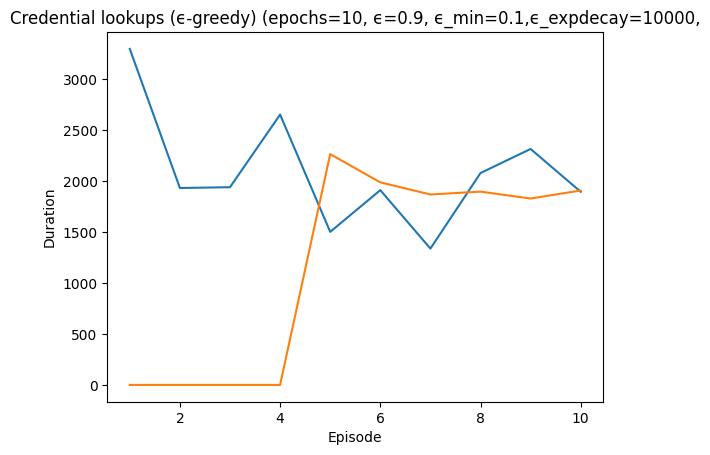

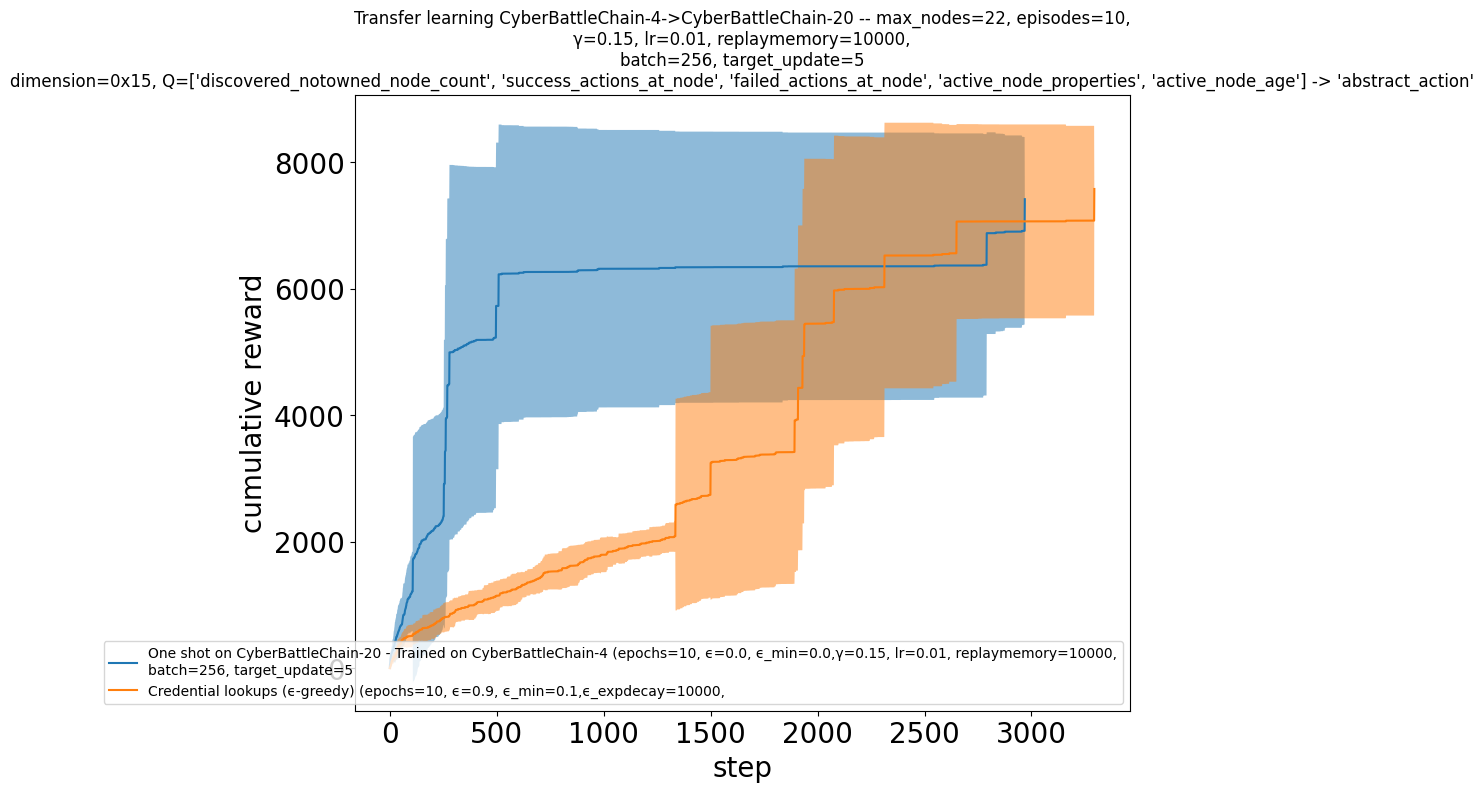

In [20]:
learner.transfer_learning_evaluation(
    environment_properties=ep,
    trained_learner=best_dqn_4,
    eval_env=cyberbattlechain_20,
    eval_epsilon=0.0,  # exploit Q-matrix only
    eval_episode_count=eval_episode_count,
    iteration_count=iteration_count,
    benchmark_policy=rca.CredentialCacheExploiter(),
    benchmark_training_args={"epsilon": 0.90, "epsilon_exponential_decay": 10000, "epsilon_minimum": 0.10, "title": "Credential lookups (ϵ-greedy)"},
)